In [1]:
import geopandas as gpd, folium, requests, pandas as pd, json, numpy as np

import os
import shutil
from geopandas import GeoDataFrame
from shapely.geometry import Point


# If needed
pd.set_option('display.max_columns', None)

In [2]:
from platform import python_version

print(python_version())

3.9.7


## Data Retrieval

In [5]:

import psycopg2 as ps

# conn = ps.connect(
#     host=os.environ["db_host"],
#     port=os.environ["db_port"],
#     dbname=os.environ["db_name"],
#     user=os.environ["db_user"],
#     password=os.environ["db_password"])

ModuleNotFoundError: No module named 'psycopg2'

In [3]:
counties = 'BOUNDARIES_counties.geojson' #Source: https://gis-data-portal-austin.hub.arcgis.com/datasets/boundaries-counties/explore

In [4]:
districts = gpd.read_file('/Users/valhalla/data_science/ayrw/aisd_district/20_21_high_updt_v2.shp') #https://www.austinisd.org/planning-asset-management/school-maps-gis

In [5]:
recharge_zone = pd.read_csv('/Users/valhalla/data_science/ayrw/ed_aq_recharge_zone.csv') #https://data.austintexas.gov/dataset/Edwards-Aquifer-Recharge-Zone/ahuv-whai

In [6]:
council_districts = gpd.read_file('/Users/valhalla/data_science/ayrw/council_districts/BOUNDARIES_single_member_districts.shp')

In [7]:
df_markers = pd.read_csv('test_water_data_clean.csv')

In [8]:
# A column can be added which has the number of students from each district

districts

OBJECTID                HIGH_NAME                        CAMPUS  \
0      10346                    AKINS                    AKINS HIGH   
1      10347                 ANDERSON                 ANDERSON HIGH   
2      10348                   AUSTIN                   AUSTIN HIGH   
3      10349                    BOWIE                    BOWIE HIGH   
4      10350                 CROCKETT                 CROCKETT HIGH   
5      10351        EASTSIDE MEMORIAL        EASTSIDE MEMORIAL HIGH   
6      10352                      LBJ                      LBJ HIGH   
7      10353                 MCCALLUM                 MCCALLUM HIGH   
8      10354                  NAVARRO                  NAVARRO HIGH   
9      10355  NORTHEAST EARLY COLLEGE  NORTHEAST EARLY COLLEGE HIGH   
10     10356                   TRAVIS                   TRAVIS HIGH   

           ISD SCHL_YEAR  SHAPE_STAr  SHAPE_STLe CAMPUS_ID  \
0   AUSTIN ISD   2020-21    0.007490    0.622507       017   
1   AUSTIN ISD   2020-21    0.006103    0.435110       009   
2   AUSTIN ISD   2020-21    0.009399    0.921963       002   
3   AUSTIN ISD   2020-21    0.012544    0.703607       013   
4   AUSTIN ISD   2020-21    0.003567    0.424755       008   
5   AUSTIN ISD   2020-21    0.002070    0.498336       019   
6   AUSTIN ISD   2020-21    0.002352    0.329631       014   
7   AUSTIN ISD   2020-21    0.005429    0.581179       005   
8   AUSTIN ISD   2020-21    0.001771    0.231863       004   
9   AUSTIN ISD   2020-21    0.002586    0.351390       006   
10  AUSTIN ISD   2020-21    0.002791    0.277712       007   

                                             geometry  
0   POLYGON ((-97.79410 30.18596, -97.79408 30.185...  
1   POLYGON ((-97.72660 30.43806, -97.72656 30.438...  
2   POLYGON ((-97.73228 30.31584, -97.73232 30.315...  
3   MULTIPOLYGON (((-97.92263 30.28653, -97.92210 ...  
4   POLYGON ((-97.78244 30.23582, -97.78170 30.235...  
5   POLYGON ((-97.70033 30.27686, -97.69844 30.274...  
6   POLYGON ((-97.64658 30.32991, -97.64673 30.329...  
7   POLYGON ((-97.80709 30.37952, -97.80671 30.379...  
8   POLYGON ((-97.67723 30.38737, -97.67712 30.387...  
9   POLYGON ((-97.67128 30.38823, -97.67119 30.388...  
10  POLYGON ((-97.72704 30.24024, -97.72702 30.240...

In [9]:
council_districts.head()

OBJECTID  SINGLE_MEM  CREATED_DA CREATED_BY  MODIFIED_D MODIFIED_B  \
0      3535   400378068  2022-02-25    RPARKER  2022-02-25    RPARKER   
1      3536   400378084  2022-02-25    RPARKER  2022-02-25    RPARKER   
2      3841   400378078  2022-02-25    RPARKER  2022-02-25    RPARKER   
3      3842   400378082  2022-02-25    RPARKER  2022-02-25    RPARKER   
4      3843   400378080  2022-02-25    RPARKER  2022-02-25    RPARKER   

   COUNCIL_DI                                         COUNCIL__1  \
0           5   http://www.austintexas.gov/department/district-5   
1           4   http://www.austintexas.gov/department/district-4   
2          10  http://www.austintexas.gov/department/district-10   
3           7   http://www.austintexas.gov/department/district-7   
4           6   http://www.austintexas.gov/department/district-6   

     Shape__Are     Shape__Len  \
0  6.575722e+08  335449.972059   
1  3.943131e+08  113143.696080   
2  1.599595e+09  698153.073157   
3  7.352296e+08  292550.402145   
4  9.084747e+08  416204.137032   

                                            geometry  
0  MULTIPOLYGON (((3093635.808 10008560.656, 3093...  
1  POLYGON ((3131645.007 10082117.137, 3131354.86...  
2  MULTIPOLYGON (((3105218.296 10072633.584, 3105...  
3  POLYGON ((3114301.648 10087972.831, 3114009.53...  
4  MULTIPOLYGON (((3103149.813 10114993.460, 3103...

In [10]:
recharge_zone.head()

the_geom  Object ID  GIS_ID  \
0  MULTIPOLYGON (((-97.790664379233 30.2978290394...          3       3   
1  MULTIPOLYGON (((-97.648566947903 30.6164947826...          2       2   
2  MULTIPOLYGON (((-97.754626674149 30.3294793822...          1       1   

  RECHARGE_ZONE  
0         SOUTH  
1         NORTH  
2       CENTRAL

In [11]:
#districts.geometry.centroid

In [12]:
#df_markers.head(1)

## Base Map Creation 

In [13]:
# it is hard to determine what level the zoom should be, 12, focuses on the points and shows most of the school districts. 11 shows all of the school districts, but is less focused on the area. The 
# thickness of the district lines hosuld be updated when this i

m=folium.Map(location=(30.263, -97.75196987), zoom_start=12.0, tiles=None)# tiles='stamenterrain')

In [14]:
folium.raster_layers.TileLayer(tiles='stamenterrain', name='Austin Water Qualtiy Data Map', opacity=.45, control=False).add_to(m)

## Title

In [15]:
title_html = '''
             <h3 align="left" style="font-size:30px"><b>Program Impact Map</b></h3>
             '''

In [16]:
m.get_root().html.add_child(folium.Element(title_html))


## Water Quality Site Data

In [17]:
df_wqs = df_markers[df_markers.type == 'WQS'].reset_index()
#df_wqs

In [18]:
df_wqs.head()

index type                                    name   latitude  \
0      0  WQS  Boggy Creek at Sustainable Food Center  30.278708   
1      1  WQS                    Lower McKinney Falls  30.189269   
2      6  WQS        Williamson Creek at Dove Springs  30.190456   
3      9  WQS                Colorado at Hornsby Bend  30.229662   
4     11  WQS    Blunn Creek and Blunn Creek Preserve  30.232773   

      longitude information                                   lcra_website  \
0  -97.70990354         NaN  https://crwn.lcra.org/events.aspx?qrySite=407   
1  -97.72096987         NaN   http://crwn.lcra.org/events.aspx?qrySite=112   
2    -97.721142         NaN   http://crwn.lcra.org/events.aspx?qrySite=330   
3    -97.595019         NaN   http://crwn.lcra.org/events.aspx?qrySite=154   
4    -97.747164         NaN    http://crwn.lcra.org/events.aspx?qrySite=77   

   lcra_voluteer_site_number     date   time  air_temp  water_temp  \
0                      407.0  1/10/23  16:57      12.0        14.0   
1                      112.0  7/20/21  10:00      27.5        26.0   
2                      330.0  10/6/22  17:32      31.6        24.0   
3                      154.0  1/13/23  13:09      14.0        15.0   
4                       77.0   4/4/22  17:00      24.5        22.0   

   flow_severity    ph gtlt_nitrates  nitrates  do_avg  do_percentage_sat  \
0            3.0  7.91             <       1.0     7.4              72.52   
1            5.0  7.80             <       2.0     5.3              64.66   
2            3.0  7.30             =       1.0     NaN                NaN   
3            3.0  7.90             <      10.0    10.1             101.00   
4            2.0  7.80             <       2.0     6.2              70.68   

   spec_cond  last_rain  field_rain_gauge_in gtlt  secchi gtlt_transparency  \
0      360.0        0.0                 0.70  NaN     NaN                 =   
1      300.0        1.0                 1.39  NaN     NaN                 =   
2     1030.0        7.0                 0.41  NaN     NaN                 >   
3      720.0       24.0                  NaN  NaN     NaN                 =   
4      620.0        7.0                  NaN  NaN     NaN               NaN   

   transparency  e_coli  
0          0.58     NaN  
1          0.15     NaN  
2          1.22     NaN  
3          1.22     NaN  
4           NaN     NaN

In [19]:
#creating a function for the tooltip for the wqs's

#LCRA data link can be replaced with other datain the future

def tooltip_wqs(row):

    i = row
    site = df_wqs.name.iloc[i]
    sample_dt = df_wqs.date.iloc[i]
    sample_air_temp = df_wqs.air_temp.iloc[i]
    sample_water_temp = df_wqs.water_temp.iloc[i]
    sample_flow = df_wqs.flow_severity.iloc[i]
    sample_ph = df_wqs.ph.iloc[i]
    sample_nitrates = df_wqs.nitrates.iloc[i]
    sample_do_avg = df_wqs.do_avg.iloc[i]
    sample_do_percentage_sat = df_wqs.do_percentage_sat.iloc[i]
    sample_cond = df_wqs.spec_cond.iloc[i]
    sample_last_rain = df_wqs.last_rain.iloc[i]
    sample_field_rain_gauge_in = df_wqs.field_rain_gauge_in.iloc[i]
    sample_secchi = df_wqs.secchi.iloc[i]
    sample_trans = df_wqs.transparency.iloc[i]
    sample_e_coli = df_wqs.e_coli.iloc[i]
    
    lcra_data = df_wqs.lcra_website.iloc[i]

    left_col_color = "#f2f0d3" #change these
    right_col_color = "#39AADD"

    #source: https://towardsdatascience.com/folium-map-how-to-create-a-table-style-pop-up-with-html-code-76903706b88a

    html = """<!DOCTYPE html>
    <html>
        <head>
            <h3 style="font-size:20px; margin-bottom:10"; width="200px", font='Arial'>{}</h4>""".format(site) + """
        </head>
        <table style="font-size:18px; width: 400px;"> <!--,'font-family:"Courier New", Courier, monospace; font-size:200%'>-->
        
            <tbody>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Date of Last Sample</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_dt) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Air Temp, C&deg</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_air_temp) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Water temp, C&deg </span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_water_temp) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Flow Severity</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_flow) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">pH, SU</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_ph) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Nitrates, mg/L</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_nitrates) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Dissolved Oxygen, mg/L</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_do_avg) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Dissolved Oxygen % Saturation</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_do_percentage_sat) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Conductivity, &microS/cm </span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_cond) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Last Rain, days</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_last_rain) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Field Rain Gauge, in</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_field_rain_gauge_in) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Secchi</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_secchi) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">Transparency</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_trans) + """
                </tr>
                <tr>
                    <td style="background-color: """+ left_col_color +""";">E Coli</span></td>
                    <td style="width: 150px;background-color: """+ right_col_color +""";"><span style="color: #ffffff;">{}</td>""".format(sample_e_coli) + """
                </tr>
            </tbody>
        </table>
        <body>
            <br>
            <font size="4">
            <a href="""+ lcra_data +""" target="_blank"><b>LCRA Data Link</b></a> 
        </body>
    </html>
    """
    return html
    
    

In [20]:
#df_wqs

In [21]:
# icons: https://getbootstrap.com/docs/3.3/components/

feature_group_wqs = folium.FeatureGroup('Water Quality Sites')
for i in range(len(df_wqs)):
    #print(i)
    
    html = tooltip_wqs(i)
    tooltips = folium.features.Tooltip(text=df_wqs.name[i], sticky=True, style="font-size:18px")
    popup = folium.Popup(folium.Html(html, script=True), max_width=500)
    folium.Marker(
                location=[df_wqs.latitude[i], df_wqs.longitude[i]],popup=popup, tooltip=tooltips,
                icon=folium.Icon(icon="tint", color='blue')).add_to(feature_group_wqs)
    
    #print(feature_group_wqs)
    
    feature_group_wqs.add_to(m)

## Restoration Site Data

In [22]:
df_rs = df_markers[df_markers.type == 'RS'].reset_index()
#df_rs

In [23]:
#creating a function for the tooltip for the wqs's

def tooltip_rs(row):

    i = row
    site = df_rs.name.iloc[i]
    info = df_rs.information.iloc[i]

    html = """<!DOCTYPE html>
    <html>
        <head>
            <h3 width="200px">{}</h3>""".format(site) + """
        </head>

        <body>
            <br>
            <font size="4">
            <p style="margin-bottom:10"; width="200px">{}</h4>""".format(info) + """
        </body>
    </html>
    """
    return html
    
    

In [24]:
feature_group_rs = folium.FeatureGroup('Restoration Sites')

for i in range(len(df_rs)):

    html = tooltip_rs(i)
    tooltips = folium.features.Tooltip(text=df_rs.name[i], sticky=True, style="font-size:18px")
    popup = folium.Popup(folium.Html(html, script=True), max_width=500)
    folium.Marker(
                location=[df_rs.latitude[i], df_rs.longitude[i]],popup=popup, tooltip=tooltips,
                icon=folium.Icon(icon="tree-deciduous", color='green')).add_to(feature_group_rs),
    #print(feature_group_rs)
    feature_group_rs.add_to(m)

## Site of Interest Data

In [25]:
df_soi = df_markers[df_markers.type == 'SOI'].reset_index()

In [26]:
#creating a function for the tooltip for the soi's

def tooltip_soi(row):

    i = row
    site = df_soi.name.iloc[i]
    info = df_soi.information.iloc[i]

    html = """<!DOCTYPE html>
    <html>
        <head>
            <h3 width="200px">{}</h3>""".format(site) + """
        </head>

        <body>
            <br>
            <font size="4">
            <p style="margin-bottom:10"; width="200px">{}</h4>""".format(info) + """
        </body>
    </html>
    """
    return html

In [27]:
feature_group_soi = folium.FeatureGroup('Sites of Interest')

for i in range(len(df_soi)):

    html = tooltip_soi(i)
    tooltips = folium.features.Tooltip(text=df_soi.name[i], sticky=True, style="font-size:18px")
    popup = folium.Popup(folium.Html(html, script=True), max_width=500)
    folium.Marker(
                location=[df_soi.latitude[i], df_soi.longitude[i]],popup=popup, tooltip=tooltips,
                icon=folium.Icon(icon="globe", color='purple')).add_to(feature_group_soi)
    #print(feature_group_rs)
    feature_group_soi.add_to(m)

## HS Attendance District Data 

In [28]:
districts = districts.rename(columns={'HIGH_NAME':'ATTENDANCE_DISTRICT'})

In [29]:
folium.GeoJson(districts[['geometry','ATTENDANCE_DISTRICT']],
               name='Austin High School Attendance Districts',
              style_function=lambda feature: {
        'fillColor': '#F0712A',#'#F1B123',
        'color': '#F0712A',
        'weight': 3},
        tooltip=folium.features.GeoJsonTooltip(fields = ['ATTENDANCE_DISTRICT'], style="font-size:16px",aliases= ['Attendance District:'])
    ).add_to(m)

## Council District Data

In [30]:
folium.GeoJson(council_districts[['geometry','COUNCIL_DI']],
               name='City Council Districts',
               show = False,
              style_function=lambda feature: {
        'fillColor': '#F1B123',
        'color': '#F1B123',
        'weight': 3},
        tooltip=folium.features.GeoJsonTooltip(fields = ['COUNCIL_DI'])
    ).add_to(m)

## Counties Data

In [31]:
#Unsure that I want to use this

#folium.GeoJson(counties, show=False, name='Counties').add_to(m)


In [32]:
#folium.GeoJson(recharge_zone[['the_geom','RECHARGE_ZONE']], show=False, name='Recharge Zone').add_to(m)

## Layer Control

In [33]:
#SHould this be collapsed? especially if there is a legend



folium.LayerControl(collapsed=True).add_to(m)


## Legend


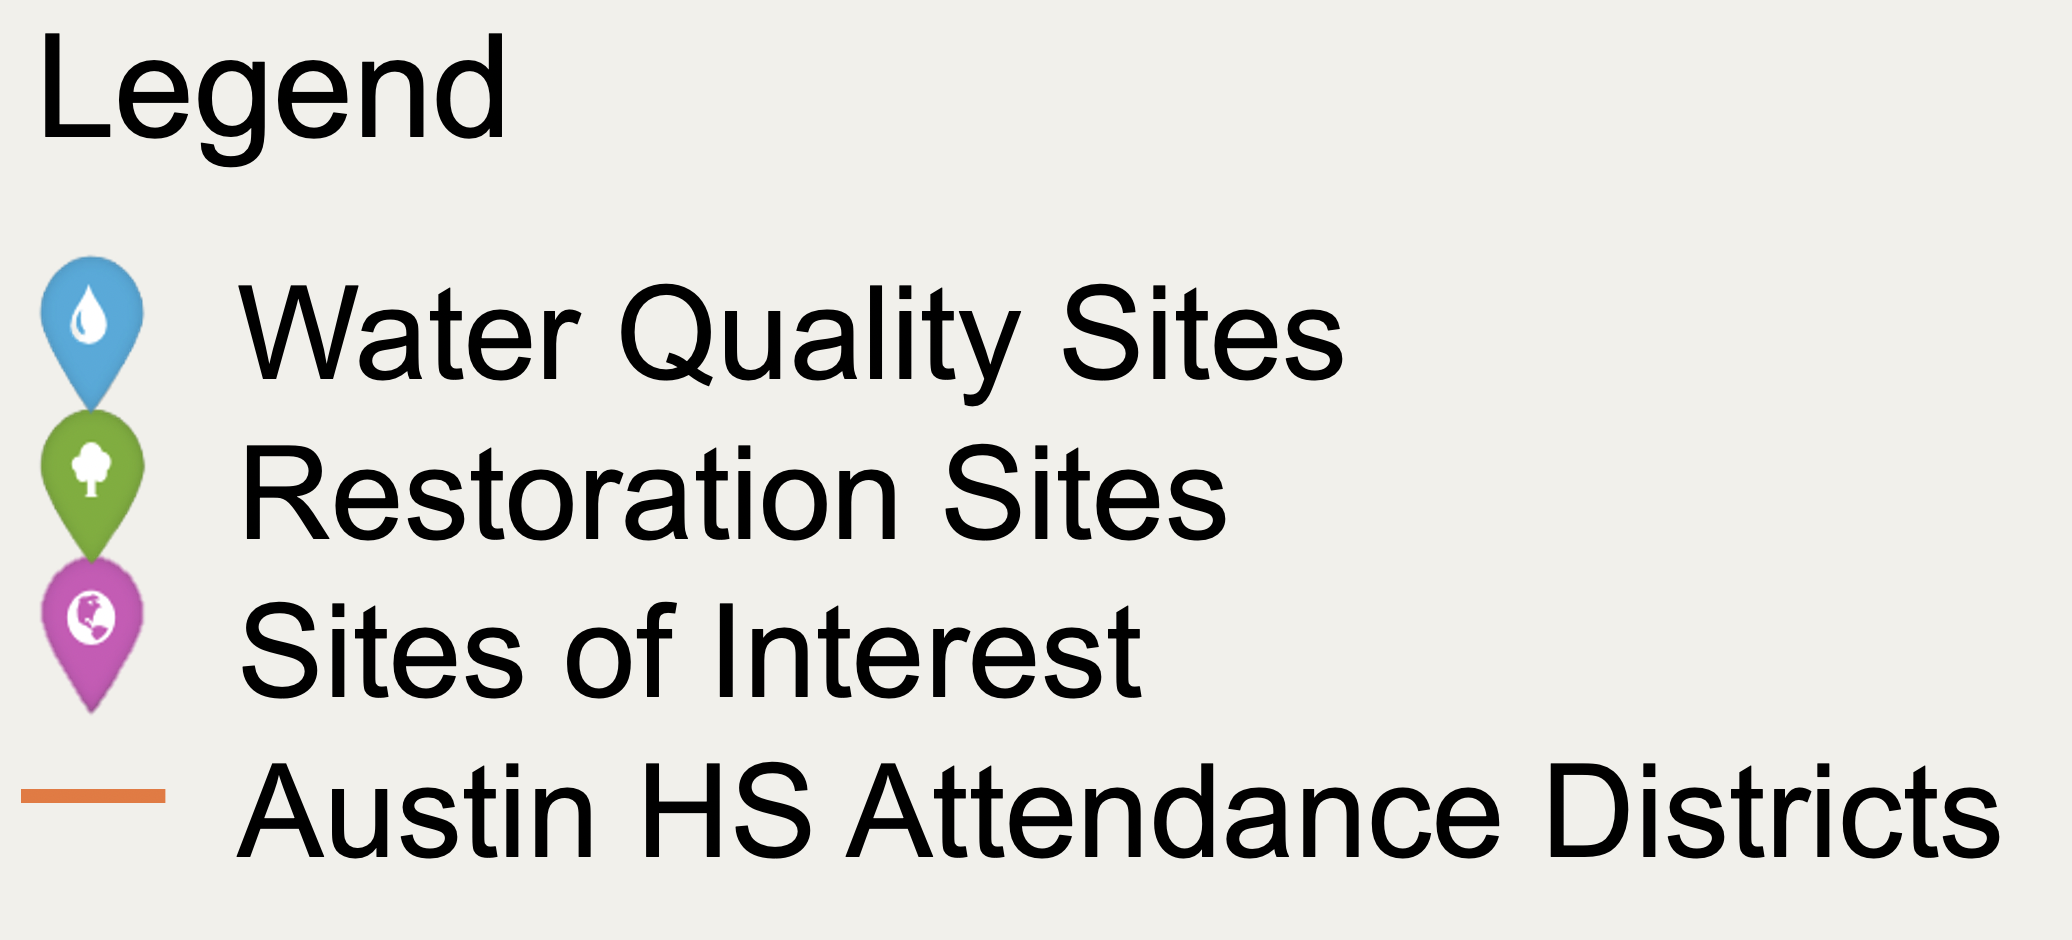

In [34]:
from branca.element import Template, MacroElement

#from: https://nbviewer.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:#F1F0EA;
     border-radius:6px; padding: 6px; right: 20px; bottom: 20px;'>
     
<!-- <div class='legend-title'>Legend</div> -->
<div class='legend-scale'>
  <ul class='legend-labels'>
     <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACBgAAAOsCAYAAADqB5dDAAAMYmlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSSWiBCEgJvYnSCSAlhBZBQKogKiEJJJQYE4KKDdFlFVy7iGJZ0VURRVdXQNaCiN1FsffFgsrKuriKDZU3IQFdfeV7h2/u/Dlz5j+FmXtnANDp4MtkeaguAPnSAnl8RAhrfGoai/QEIPCPDjDgxhcoZJy4uGgAZbD/p7y+Bm2hXHZRcX07/l9FXyhSCABA0iHOFCoE+RA3A4CXCGTyAgCIoVBvPa1ApsJiiA3kMECIZ6lwthovU+FMNd46YJMYz4W4EQAyjc+XZwOg3Qr1rEJBNuTRfgSxq1QokQKgYwBxoEDMF0KcCPGI/PwpKlwMsQO0l0G8A2J25hec2f/gzxzi5/Ozh7A6rwEhh0oUsjz+jP+zNP9b8vOUgz7sYKOJ5ZHxqvxhDW/kTolSYRrE3dLMmFhVrSF+KxGq6w4AShUrI5PU9qipQMGF9QNMiF2F/NAoiE0hDpfmxURr9JlZknAexHC1oNMlBbxEzdyFIkVYgoZzvXxKfOwgzpJzOZq5dXz5gF+VfasyN4mj4b8hFvEG+V8ViRNTIKYCgFELJckxEGtDbKDITYhS22BWRWJuzKCNXBmvit8GYrZIGhGi5sfSs+Th8Rp7Wb5iMF+sVCzhxWhwZYE4MVJdH2yngD8QvxHE9SIpJ2mQR6QYHz2Yi1AUGqbOHWsTSZM0+WL3ZAUh8Zq5PbK8OI09ThblRaj0VhCbKAoTNHPx0QVwcar58WhZQVyiOk48I4c/Jk4dD14IogEXhAIWUMKWCaaAHCBp627ohr/UI+GAD+QgG4iAi0YzOCNlYEQKnwmgCPwJkQgohuaFDIyKQCHUfxzSqp8uIGtgtHBgRi54DHE+iAJ58LdyYJZ0yFsyeAQ1km+8C2CsebCpxr7VcaAmWqNRDvKydAYtiWHEUGIkMZzoiJvggbg/Hg2fwbC542zcdzDaz/aEx4R2wgPCVUIH4eZkSYn8q1jGgg7IH67JOPPLjHE7yOmFh+ABkB0y40zcBLjgntAPBw+Cnr2glquJW5U769/kOZTBFzXX2FFcKShlGCWY4vD1TG0nba8hFlVFv6yPOtbMoapyh0a+9s/9os5C2Ed9bYktxPZjp7Bj2BnsENYAWNhRrBE7jx1W4aE19GhgDQ16ix+IJxfySL7xx9f4VFVS4Vrr2uX6QTMGCkTTC1QbjDtFNkMuyRYXsDjwKyBi8aSCkSNY7q7uHgCovinq19RL5sC3AmGe/aybbwlAwIz+/v5Dn3VRFwHYfxhu81ufdfad8HVwFoDTawRKeaFah6seBPg20IE7yhiYA2vgADNyB97AHwSDMDAGxIJEkAomwTqL4XqWg2lgFpgHSkE5WAZWg3VgE9gCdoDdYB9oAIfAMXASnAMXwVVwG66fTvAM9IDXoA9BEBJCRxiIMWKB2CLOiDvCRgKRMCQaiUdSkQwkG5EiSmQWMh8pR1Yg65DNSA3yM3IQOYacQdqRm8h9pAv5G3mPYigNNUDNUDt0FMpGOWgUmohORLPRqWgRugBdglai1egutB49hp5Dr6Id6DO0FwOYFsbELDEXjI1xsVgsDcvC5NgcrAyrwKqxOqwJ/qcvYx1YN/YOJ+IMnIW7wDUciSfhAnwqPgdfjK/Dd+D1eCt+Gb+P9+CfCHSCKcGZ4EfgEcYTsgnTCKWECsI2wgHCCbibOgmviUQik2hP9IG7MZWYQ5xJXEzcQNxDbCa2Ex8Se0kkkjHJmRRAiiXxSQWkUtJa0i7SUdIlUifpLVmLbEF2J4eT08hScgm5gryTfIR8ifyE3EfRpdhS/CixFCFlBmUpZSuliXKB0knpo+pR7akB1ERqDnUetZJaRz1BvUN9qaWlZaXlqzVOS6JVrFWptVfrtNZ9rXc0fZoTjUtLpylpS2jbac20m7SXdDrdjh5MT6MX0JfQa+jH6ffob7UZ2iO1edpC7bnaVdr12pe0n+tQdGx1ODqTdIp0KnT261zQ6dal6NrpcnX5unN0q3QP6l7X7dVj6Lnpxerl6y3W26l3Ru+pPknfTj9MX6i/QH+L/nH9hwyMYc3gMgSM+YytjBOMTgOigb0BzyDHoNxgt0GbQY+hvqGnYbLhdMMqw8OGHUyMacfkMfOYS5n7mNeY74eZDeMMEw1bNKxu2KVhb4yGGwUbiYzKjPYYXTV6b8wyDjPONV5u3GB81wQ3cTIZZzLNZKPJCZPu4QbD/YcLhpcN3zf8lilq6mQabzrTdIvpedNeM3OzCDOZ2Vqz42bd5kzzYPMc81XmR8y7LBgWgRYSi1UWRy3+YBmyOKw8ViWrldVjaWoZaam03GzZZtlnZW+VZFVitcfqrjXVmm2dZb3KusW6x8bCZqzNLJtam1u2FFu2rdh2je0p2zd29nYpdt/bNdg9tTey59kX2dfa33GgOwQ5THWodrjiSHRkO+Y6bnC86IQ6eTmJnaqcLjijzt7OEucNzu0jCCN8R0hHVI+47kJz4bgUutS63B/JHBk9smRkw8jno2xGpY1aPurUqE+uXq55rltdb7vpu41xK3Frcvvb3cld4F7lfsWD7hHuMdej0eOFp7OnyHOj5w0vhtdYr++9Wrw+evt4y73rvLt8bHwyfNb7XGcbsOPYi9mnfQm+Ib5zfQ/5vvPz9ivw2+f3l7+Lf67/Tv+no+1Hi0ZvHf0wwCqAH7A5oCOQFZgR+GNgR5BlED+oOuhBsHWwMHhb8BOOIyeHs4vzPMQ1RB5yIOQN1487m9scioVGhJaFtoXphyWFrQu7F24Vnh1eG94T4RUxM6I5khAZFbk88jrPjCfg1fB6xviMmT2mNYoWlRC1LupBtFO0PLppLDp2zNiVY+/E2MZIYxpiQSwvdmXs3Tj7uKlxv44jjosbVzXucbxb/Kz4UwmMhMkJOxNeJ4YkLk28neSQpExqSdZJTk+uSX6TEpqyIqVj/Kjxs8efSzVJlaQ2ppHSktO2pfVOCJuwekJnuld6afq1ifYTp088M8lkUt6kw5N1JvMn788gZKRk7Mz4wI/lV/N7M3mZ6zN7BFzBGsEzYbBwlbBLFCBaIXqSFZC1IutpdkD2yuwucZC4Qtwt4UrWSV7kROZsynmTG5u7Pbc/LyVvTz45PyP/oFRfmittnWI+ZfqUdpmzrFTWMdVv6uqpPfIo+TYFopioaCwwgIf380oH5XfK+4WBhVWFb6clT9s/XW+6dPr5GU4zFs14UhRe9NNMfKZgZsssy1nzZt2fzZm9eQ4yJ3NOy1zruQvmdhZHFO+YR52XO++3EteSFSWv5qfMb1pgtqB4wcPvIr6rLdUulZde/97/+00L8YWShW2LPBatXfSpTFh2tty1vKL8w2LB4rM/uP1Q+UP/kqwlbUu9l25cRlwmXXZtedDyHSv0VhSteLhy7Mr6VaxVZaterZ68+kyFZ8WmNdQ1yjUdldGVjWtt1i5b+2GdeN3VqpCqPetN1y9a/2aDcMOljcEb6zaZbSrf9P5HyY83Nkdsrq+2q67YQtxSuOXx1uStp35i/1SzzWRb+baP26XbO3bE72it8amp2Wm6c2ktWqus7dqVvuvi7tDdjXUudZv3MPeU7wV7lXv/+Dnj52v7ova17Gfvr/vF9pf1BxgHyuqR+hn1PQ3iho7G1Mb2g2MOtjT5Nx34deSv2w9ZHqo6bHh46RHqkQVH+o8WHe1tljV3H8s+9rBlcsvt4+OPX2kd19p2IurE6ZPhJ4+f4pw6ejrg9KEzfmcOnmWfbTjnfa7+vNf5A795/Xagzbut/oLPhcaLvheb2ke3H7kUdOnY5dDLJ6/wrpy7GnO1/VrStRvX06933BDeeHoz7+aLW4W3+m4X3yHcKbure7finum96t8df9/T4d1x+H7o/fMPEh7cfih4+OyR4tGHzgWP6Y8rnlg8qXnq/vRQV3jXxT8m/NH5TPasr7v0T70/1z93eP7LX8F/ne8Z39P5Qv6i/+/FL41fbn/l+aqlN6733uv8131vyt4av93xjv3u1PuU90/6pn0gfaj86Pix6VPUpzv9+f39Mr6cP3AUwGBDs7IA+Hs7APRUABjwDEGdoL7zDQiivqcOIPCfsPpeOCDeANTBTnVc5zYDsBc2u2LIDXvVUT0xGKAeHkNNI4osD3c1Fw3eeAhv+/tfmgFAagLgo7y/v29Df/9HeEfFbgLQPFV911QJEd4NflTddcHNlROLwVeivod+kePXPVBF4Am+7v8FteGKtZFVOvgAAACKZVhJZk1NACoAAAAIAAQBGgAFAAAAAQAAAD4BGwAFAAAAAQAAAEYBKAADAAAAAQACAACHaQAEAAAAAQAAAE4AAAAAAAAAkAAAAAEAAACQAAAAAQADkoYABwAAABIAAAB4oAIABAAAAAEAAAgYoAMABAAAAAEAAAOsAAAAAEFTQ0lJAAAAU2NyZWVuc2hvdHn7+bcAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAHXaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA1LjQuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjIwNzI8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+OTQwPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CrJnCT8AAAAcaURPVAAAAAIAAAAAAAAB1gAAACgAAAHWAAAB1gACRpnqspxBAABAAElEQVR4Aezdd2AWRd7A8V+AhBOxCyq2u7NjrygJHSyAggVU7MBZORUkCCQKKmDvvZ+9gugBd2IBNcQGSLH3AoIEXgsieCq8v9nd2fKUPM+TPCHPY76rPDs7O7sz+5l5nvwxszMFP/5QtUbYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBagQKGGBQjQ6nEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMARYIABDQEBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEUgowwCAlEQkQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAgAEGtAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSCnAAIOURCRAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQYY0AYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIKUAAwxSEpEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBhgQBtAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgZQCDDBISUQCBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEGCAAW0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFIKMMAgJREJEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQIABBrQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEgpwACDlEQkQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEGGNAGEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCClAAMMUhKRAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQYYEAbQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGUAgwwSElEAgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBggAFtAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRSCjDAICURCRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECAAQa0AQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIKcAAg5REJEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBhjQBhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgpQADDFISkQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEGGBAG0AAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBlAIMMEhJRAIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQYIABbQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEUgowwCAlEQkQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAgAEGtAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSCnAAIOURCRAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQYY0AYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIKUAAwxSEpEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBhgQBtAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgZQCeTnA4IYbb5aZM2frw62RAv3P/L9mje50r1HesXfOEHjnTznlROnWtYuJYUMAAQQQQCCnBRYv/k5KS4cHf9OcP3Lu37tkf//W32B9ufWWG3P6uSgcAggggAACCCCAAAIIIIAAAggggAACCCCAAAII5K9AXg4w6NGjl1TMqFR1d0SBHVcQrYboOXNUVj5CSocOiSbjCAEEEEAAgRwUeOedOdKxUzf7p84pYfD3Lvo3zha/sLBQllZ9aw/ZI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJZFcjLAQbddYDBDGeAQaxF0PXinDFve5qpDbytrGy4DCu9wB6yRwABBBBAIGcF/AEGTgn171mB/j0L/qTFlNv9+1dYpAMMljDAIAaHQwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiSQF4OMHBmMKg0Mxh4m3a42KEFdm9POXsvsrxMZzAoZQaDiA0HCCCAAAI5KRAdYOAW0flzZj7sFvP3r3GTQlm2lAEGloc9AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZFcgfwcYeDMYJBpQYOPs3pKVs0SCpWCPAAIIIJDjAu/MmatLJHSNTFwQ/rsWDttHKdIlEqpYIsFysEcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEsC+TnAIOevaSiws5gUODNXmDmjbbdLXZvtIJwuS6RUMoSCVluQtwOAQQQQKAuBGa/M0c6depWza3j//4V6gCDpQwwqMaMUwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFAbgfwcYNCjt1TMmJHguU1ny5pgiepgbIGTlgEGCciIQgABBBDISYHoDAbuH7SYv3KhcrtnzAADZjAIsRBEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBrArk6QADncGgslKnjXaHE8R1uMQMLLBiF5WPlKFDB9tD9ggggAACCOSswDs6g0HHzjqDgZmgx9m8P266S/b3r7BIZzBY8q29gD0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkFWB/B1gMMMskRCMJHBCwWHoTJCsvGyELpEwJKuA3AwBBBBAAIG6EJg9+x3p1Plg/09d6E+cZhcchf/+sURCXdQE90QAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAErkJcDDLr36CUznAEG7mME3Sz+Y2nAfeXTPed+MoOB9WGPAAIIIJDrAnEzGMT/sQsNM3CfhgEGuV6rlA8BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgfwWyMsBBj166hIJFa9rx8qaYOZorx4S9L/4NVReNlxnMLjAPyaAAAIIIIBArgo4Aww66QwG+pcu+rctbmEg5xFMmiaFukRCFUsk5GqdUi4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPJdIC8HGAQzGES7XGxlxHW9eMnKy3WJhKEskWCd2COAAAII5K6AO8CgW5ICJv77xwwGSbiIRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgawI5OUAgx66REKFLpEQ7V4JHdmgs7cHIuVlOsCglAEGWWk53AQBBBBAoE4FYmcwMH/01rir/yT9+1dYpDMYLGEGgzqtGG6OAAIIIIAAAggggAACCCCAAAIIIIAAAggggEADFsjLAQbBDAYiBaEOF6ce4yKC2mUGg8CCEAIIIIBAbgs4Aww6u0skuOsBBQPmTMnj/txpRGGTJiyRkNvVSukQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMhrgbwcYNCjp85gUFGZBD6mA8ZLtUajy0cyg0ESNKIRQAABBHJMINESCXGDCiJlLpAmTRrLsqWLIrEcIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALZEvhTDDDwhxR4gaADxj/jeJWVDZdhpRdky477IIAAAgggUGcCsUskmNURgr9vbrb+XzkvUFRUJFVLFtZZmbgxAggggAACCCCAAAIIIIAAAggggAACCCCAAAIINGyB/Bxg0ENnMJgRzGBQoKtRr3Hnj47UptMRY2J0+gKToqxcZzAYOiSShgMEEEAAAQRyUWD2O3OkU6du+vfLHT1gBhjEbrF//wqLCmXpkm9jk3GMAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGRFIC8HGHTXJRIqdYkE29kS+wane+zHulB6WF7GAIOstBpuggACCCBQ5wLvzJkrHTt2dfOxf9J0X6B//JL9/Sss1AEGVQwwqPPKIQMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBqoQF4OMOihAwwqKl5P8E6n1wMT6ojxe2G0glkioYG2ch4bAQQQyEMBd4mEbk7J3T9rdnRBojkN3BQMMMjDiqbICCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjkkUB+DjCIWSIhztsOMDAnbH+MBstZIiGOiggEEEAAgdwU8AcY6Ho/BWsSLQQUX+4mhU1kWdWi+BPEIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJZEMjfAQaVlc4c0eGxBGGP2HhzXF4+UoYOHRxORhgBBBBAAIGcFDADDDp17iY6tiC6eX/gYv/OmURFRYVStYQlEqJgHCGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEC2BPJygEF3ncFgxgwdYOBsoS6WUDByzosvLxsupaUXeNexQwABBBBAIHcF/BkM/CLG/pELHXtBlkjwsQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAHQjk5QCDHqmWSDDrIoh55dOsUx1MK32RLpEwdOiQOmDklggggAACCGRXIDzAwP5VS5VDUWGRVFUtTJWM8wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAjQTycoBBdAaD4Ll1mWp/KuloZ4x7VF42QmcwYIBBIEYIAQQQQCBXBewAg+hQucSltX//CgubyNKqRYkTEYsAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII1FIgLwcY9OipSyRUvB6amyCkYMYSmC12zWqNYoCBI8MHAggggEAeCMyZM1c6dOwaLan+jStYE56bJ3RazxU2YYBBSIQgAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZFkgPwcYOEskvG56WRIOJEhmxBIJyWSIRwABBBDINQE7g4FTLmdggf2TFzmIFLuoSJdIWMISCREUDhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBrAnk8wKAyQNC5oQvWuFMW6IudtgdGnKB/XCBlZRfKsNILgusIIYAAAgggkKMC77wzVzp2Cs9g4P9BC0oc8/evsEmhLpHwbXCeEAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQRYE8HmAQnsEgQaeLItl1q+3Z8vIRUjp0SBb5uJURWLFihVS+/oYsWLBQli5dKkuWVMmS75bI0mXL9E1aDS9ZIr/9/rts2mJT2axlC9lkk010v5m0aLmptGzRUrbYYnMpKWkrG264YYMBXaMDYj759FOZPfsdmTXrHVmodj/88IP8+NNP8v3338vy5T9Lo0YFarOF86+V2bfaXFq1aiXbbL21tGtXLE2bNm0wXske9OefV8jr2vYWLlwoS6qqtGN1qXynba6qSttflbY/bY//+9+vsumm2tZattT21kLD2v42M+2vhdP2itu2lY02ajhtL5mljTff53nz3pVvv10oixYtlkWLF2t4kYbNv8XOd7xZs3XVs4XjuJm6braZ2urxX/+6rbRv306aN29ub/en2v/xxx/y/vsfON/ZWbNny2K1+f77H5zvrtmvXPmLtqWN9Xu6hWy91VbSastWsqWGzX7vvfaSbbbZOiMPZwaDzt38QXPmYvfvmX76M/jYv3DurQsLGWCQETKJEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAICOBvBxg0L3HETJjhg4wMFuon8XvZvEDbhL7WVY2nBkMLEYt959//oU8//xUmfrCi1JRUamduP/zOr70xkn8bZZxp/UN3MaNGkmbNvvLIYccLIcdeojstNOONvmfZv/TT8vlmYnPyjMTJsrbM2fJzz//7D6bPr94M3C4eBrtdB66UoGXhky8bus1X0969jhM+vQ9Rjpoh24TXXc9ne07HfhhOkjdHktzZ92CDGSN/mcG5pj/zSCIrbbcUnbccQc3XY58fvb55zL1+Rfl+alTZUbl6/Lbr//TUoceI/Q8iYoce7qx2rXZfz85VNvdIYd0k5133inRZfUa98EHHzqd2aYQ9lndAnlP47ehAmnUuJGUFLeVxo0bp11m03H+yiuvyeNPPCmTJk2RFb+s0IzcewdeGvLan1MIc3cvypbJ7IuaFkn7diXS/bBDpXv3w5xBHGkXJAcT/qSDfsaPf0ae1n9mUMHKlSvdSjBlTfD8Js73CT1PgdZRSUmxnHRiPzn88B7SrFmz0NnEwTlzdAaDjl2926XpX1SoA7uYwSCxKLEIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQW4G8HGDQo0cvqZhhlkjwenISduiEIr1+mTJmMKhVe3n33ffksceekP/qwIJPP/0sY3/TdR3XQRncJVK2v267jRx8cDc57bRTpHXrXSLn8u3g5WnT5dFHHpNJk/8jK1dp56TZTE+st4Vaqo2yLds/tgG/H9mJcK80b+T37t1L+qvVrru2tkkT7i8bM06uufb6tPM3HdWTJz+b8F5rM3K+aXuPPu4MaPnkk0+9rD25RIBhQT3vvuztBczV1fibt/CdtnfqyTnT9tq176yzCsyXRPUfflRbJ5UzXknZFkxac88nnnhKnn56giz+7jt7eaJbOufSzd//bdar9t57Tznu2L4yYMBpYt6uz5dt+vRX5MGHHtHv7RT5ddWvNX5+gxnb/pqv21yOOrKXnHjiCc7AqmQmzgwGnXQGA29Lx98MNlq2dJG9hD0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkFWBvBxg0F0HGMxwBhioRcLORdcofMqEy8p0iYRSlkjItAWZpQ8uu2ysPPnUeFm9enX08jBy9EykasLJ/LAf8C6MPdY7mGUCTtQ3fkeOGOYsFRCTRU4fmuUPRoy8SN54483EFrHPG3tsr/Li406bpw9FmjfW/znobBmhVn/5y18S2pgBBtdec73bvx661kkce6w3Ly4+SKbU4wCDbxYskLFjL5fHH3tKi2jmV4jZ4socnA+fShgOR5rLYo4bNWosJ5xwnJTr78bmm28W3LgeQmaAwXwdDJDu86caYPDll1/JmWedo8tLvBk8Tczz+yBefNxpc2XCSPeW4VMm/Ne//U0uu3SU8/a+myI3P02nfln5KG+WHBX3HiT8PH7JE0a6Z8OnEoa9yL59jpZrrrlSNthgA/+2NhBeIiF8D3vels0/1gBLJIQ1CCOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEC2BfJ2gEFlZaVO4R7ucvHCzi5BWOXKdYmE0tILsm34p73fjz/+JNddf4PcccfdsurXVdq/60ye73Tzum/SZuYfvH1rr4vu7VEAGsSY6cQHnXOWnH/+P2XdddcNkuRgaOHChTL6kjH6VrgZkGEK6HYL1+b53Y7E9Pz//re/y803X+9Mkx/L48xgcM0NXpmsr7u3R8E1Zkr3g2TypLU/g8GPOi39ddfdqG3vLlm1StueU7j0nt9O7W+vqa1/s2br6MCNc+TccwdJ8+b10/bad+gic+fqDAZOzelcIBqo7vevcsb0pDMYPPzwozLswpGyYsUvkXaQqP6tnbVMN3/nOidxcFfb/s0yAWPHXip77blH0NRyILRAB7NccslYeUq/t2Z5EH9kgSmb9yzZeP7gvtamQFq12lxuveVG6dy5U0TCn8Egg/wLmxTK0iqWSIhAcoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJZE8jLAQY9evaWiooZMQi2syaI9mOcni0dYFCuAwyGMoNBIJQ49Ntvv8ldd98rV199rXz//Q+JE8XF+tr+GT/G83dPBG8E+wnDAf+icGQQbtmypc5EMVxOPeWkIDKHQv+eNFnOPvtcMeu2+4+SxedP/qh+bk4Ss977aTrF/6X6xvh6663nX5ZoiQT/pAlEb+MMUlibSyT8/vvvcuedd8vVOsvC999/Hyla9QcxBQ8/Spb8W7RsIeUjte2p69re2usMBnN1BoPkW/T5Z1RMl9122zWSfNmy/5Pzzhsi/5482R83EElgDqK3iTudPCL+Qj8mgX+jgkZywZDz9Td5RPJbrsUz5nt71ln/lOU/L09uU215/Kf1U/kxCZ4/fioK97J//KO/XHrJKDEDqszmDzBwT1fz6ecmhUVFsnTJwmrScgoBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqLlAfg4w0CUSKpwlEtxOlaBrJQwRPWeOyrQziwEGYaP48A8//CgnnXyavPrqa15no6cbQg6Cbig4Dt8vei5IE4TCqaNhL42zC4fdVCbmuOP66lv6N+TMmu5//LHamcr/2uvM7ABmc8vtlT7Ub2tj3FSJP700zi4cdlMHd3BDwXH4bm7sDjtspzMQPCebbdbSOXnZmMt1OvbrwgkThL076q6kbbFMnjwxQZrsR5kZM0448WR57bVKvbkdiBKUxXbKejGaxg0Fx+EyRc8FaYJQOHU07KVxduGwm+q4Y/vKrbfeKGat+7W1uTMYzHOyC57ADQXHQWliBxi89NLLctbZ/5TvvqvSRO6MGkHq2FD4mcNhN12QnxsKjsP3iZ4L0gQhk9oMMrj44rLwhWs1/Mcffzizjdx00y2hfL0yOrtw2E0SPIEbCo5Dt4hpm0GaIBROHQ63bt1a/jPlWdlwww2DAQahy4KgGwqO3buwREJYkzACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkWyAvBxh01wEGM5wBBrEcMV0tzpujQWeaefN9GEskxKL5x2a9+z7HHC8ffvih3wUZFdWjAvUMSP1r3UA0tTePe0ya2MPgGltdQYztQrbXRPPv2LGDPPTgfbL++uvbBPWyX758uZx8cn95edormn8Ixz5QtaUKntYmD2Kqf/7424av1LPeDXfeeSdnmYNNN91E3CUSrg9dGlyTKP+SkrZrZYmEb77Rttf3OPngg49CgzGy8/yhh00QrP75g7PmUj3y2n+HDu3lkYf/FZkdIsHNsxbVTmcwmDfvXT//xDcOSls54xV/iYRJk6fISSedpst1OOt1xFwaXJOo/oOz5jI9qoPvf+nQwfUyk4EZTHV8v5OksvJ1x6S+nt/+ZoTz32///eTfz03Q3+KPpGOnbl6dpedfWKRLJCxhiQQPjR0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkWSAvBxj0MDMYVJq3nL1N+3RtR5jd21PO3ossL9MZDEpZIiFi4x3Mmz9f+vTpJ4sXL9aYhIr+Zc5Z82G3NP0T3lUjgz5Lm8LubQbRvXPWfOjWepdd5OmnHpctt2zlRqzlz5UrV0rvI/vIm2+86QwtSFhyLzLZudo8v/O4afjvpm9F//vfE+XW227XGQxCAwy0UNXlX1zcVqZMfrZOVefp1P99+pq2953mYwZoJJTyy+CcNR92S+P5zW0T3lUjq3t+m0V4b/PfZZedZfxTT6yVtucOMHCXSLD5+2UKPZt9RjvAYM6cuXJYjyPklxW/ZP35q8vfP2cCXqFs2WLPGf8RIy6UCy8cGjlVlwcrVqyQI3odLTNnzapx/fvlS+DvnzOBNJ5fbxEk9C7o1rWL8/fq4EN6OGfth3M782G3mPwbNymUZUsZYGB52COAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB2BfJ3gIE3g0GiTisbZ/eWzKz3zRIJViPYv/DiS3LKKf2dTsg1XsdVgQbWOJ29mk7jgk5Yv7/MuUGssYm0cXbvJPQ/7M3cs86nl9APm3tkkP8WrbaQJ598VHbfbTc/l7UR+O2336Rfv5Nl6gsvRrLzHsd3iJz0Md1U/jPbTkIToVsmz+92TrrXOdfqh4mz5bBn9th9d9n/gP3k3vvu1wTp5V9SokskTKq7JRJeNG3v1IHy888/u+Wtw+d3HTQDpzGn9/zONfYSD9K90j1opW3vqScfk91229U7Wze7Dh26yJy5sUskxNexyd2Ur6JiumyyySbSsXM3WbzIDBqym30Y9ymcTzdY7/7TXp4q++yzty1one1//fVX6XvsCTJ9+ivBM6+F75/7QJn5b7/9dvLpZ59l9PtbVFgoVVUMMKizBsSNEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBo4AL5OcCgp85gUGFnMChwO4kiXapej5lTuUG4XJdIKGWJhEiTf+aZZ2XAwDPErEVesy19//D97XTgibtIwylThd38m6/XXF5+6XnZcccdUl2QlfPGa+A/zpQJE55Nu/2FM87287uDQWxbt3uTYzgclCDd/OtyBoMJz0yUgQPP0rb3e1CwjEP13/420CU6XnzxP3Xa9trrEglzdaaH+C3x8099fpL+1g3Xa3RZBTtQKHRxuvUfuiRJMHH+QZ7pt7+6bGu28GaZiBNPOlWmTPmPrHFG5iQun02fep+950+dV6IU8fkX6gCDpQwwSIRFHAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGRBID8HGPToLRUzZiR4fNPZ4r93H9e3ygCDKNmnn34m7fXNaDNdeMJuNhupe3cGAzciRjl00wLZYIP1pFOnjmI6C1ttsYW0aLGp/mshRU2LZOnSZfKdToO/aPEiWfDNQnl+6gu6rnxo2vfQnZxghvmbt8jNIIOmTZvG3inrxzfeeLNcPOrSmPvGyNjyx6RKdFigPb4HHthG2rUrllatWjl2m23eUlb/sVoWfvut8xb6ggUL5aWXp8m7898Lt/LQ7WqRv97F6W8N3c00ipLiupnB4LPPPte211lnLljh5JiQykbqPp32t/76G0jnzh2knc66sNlmm+m/lrLppptqe3DbnlmCwSwB8vU338gLL7wkc70ZAUwBbFbhx/cj08h/t91aa9ubWmdtz3xP584135U1WqzIr1yoyMGZbbbZ2nnO+EoNJQ8FEz3/RhttKC1bGsNNZOONN5ZVq36VBQsWON/d5T8vD11tg0H+Tkyim9qkMXub9JFHHpCePbrHnM3e4Q033CSjRl8Wd0Obf+SEjdR9svZnOvO7dO4k++63j2yp31szm0oLbXNmRo5vFy2ShQu/la++/Eom6YCG6EwSkZy0RhN//5z6qyb/2LuYlmHKxAwGURmOEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIHsCeTrAQGcwqKzUTh+3oy2mWytJb6HIReUjZejQwdnTy+M7rVq1Srp0PVTefe89r2fL6+KK6elyDiNxQTrr32yddeTU006Rw3v2kAN0Cv4mTZqkLfPFF1/KxGef05kAJrqDDSJ5eVUZiYvPP1z//fufKtdfd3Xa+dck4fvvfyAdOnWV3379TbvzEnT4Rsobk4Oes27mzO577CbHHdtXjuzdS7bcslVM4sSHH3/8iZiZJ5548ikxHfXh53euyCD/oGfTuyjm2hIdKDJ58rOJC1LDWL/tvattz88vcf5OrJ/GZBikM45/Waep9D/tVDn88B6y//6Ztb3PP//CaXvGcp590z+SV2btry7bnjvAwCyREH3+2rY/eztz3+bNm0m79u2kc8cO0qFDe9lppx2T1vAPP/wg7733gTz40MMyUf1W6bID/hZj6MebgJ4Lt/9w/uaHyCwJ8NabM6Rx48aRy7JxEPu9de7plzVw1WL4mxPrpzHR7kHb4oPk2D7HSK9eR4gZiJFqMzMnzKh8XZdyeVqenfic/PjTT+4l/r29gH8cOh2JC9JZx9jvf2GRzmCwhCUSUtUJ5xFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBmAvk7wGCGWSIh6HlxQsFh6EyQrLxshE4bPqRmUn+yq4YOvVDuvuc+dYp/G9plDGGaZ/cOw7FNmhTKqaeeJKVDh8jmm29Wa6Enn3paysoulqolVU63feSd3gT5+4WyxfPSPPjAfdrxd3ity5PoBv/73//0LfmDZb7pHLcoNhTCCQVDyYKH2GjDjeSyy0bLiSccL2b2gppsZpmGO+68W8aOvUJ+0VkotL/dJwsFE+ZvO1FT1X+xdqROmfxcTYqX9Jqhpdr27r7POZ8qf/8mAZ1TdPOW9ikna9sbpm1PZyuo7fbkU+Nl5MhyffN7qVerEUHfMBobHDkh/Xjg/nuld+8jalucuOvb6WwP83QGgyBHkyQ4svkH9eo3hVAyL31wmd6hQDbaeCM588x/yBmnD5QNN0zdWR5buKVLl8qDDz4i99x3nyxc4HZsh7JImX9ozhnn1g8+qN/fI7L7/f3999+lY6duMn++LhkRKlym7c/8zl1zzZXOYKpYh3SPly1bpu12hIwf/4zjH/v8bvFChTQ39g6jscGRE/IOWSIh3ZogHQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCNREIC8HGHTv0UtmOAMM3EcOulksQRDjhtxPZjBwfZ577t9y0sn99UBd3Lm/LVx0bxnt3pz1wm3a7C9333WHbLvtNtFrann0448/ymidwvxfDzwkq9esdntJE+QfziZ82sSvv8EGUvHay7LtNtktm7n3ZWPGaQfj9Sbob7H5+0iawj0XpDChvn37yLhxlzrT9/s3qUXALJ1w4fCRMmnSFO8u0fzMHAu2uzkImaR6lKL+nRkMJmVvBoNnte2d7LS99PJ3OszDhdbwAfvvL/fcfbu2vW3NTbK2mbfKTdu7//4HZM0afY3d5mv3Jqdw2Ms5HLXB+uvLa69Ny/r3ol17HWBglhMJZ5YgfzcqSOSGYo/dVE2b/kVGjiiV03VgQbNmzby71Xy3fPlynclkoLz44jS9iTsNQHX5Ow+ToP317XuM/rbcXvOCJLjyyiuvkXGXXxnDp6VLkL9/uWUzyfS/U04+UcaMuUTWW289P0ltAv/971QZckGps4xCwvuE8rcDR2IewLnMJrP3YICBlWCPAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACdSGQlwMMevTUJRIqXte+lth3P50uK78vJhasvGy4zmBwQWx0gzr+6quvpaRdJ/nJm6Lbdk7F7i2KGx/+FDnllJPkWn2L13Rk1dX20ksvywknniKrVq7S+ozm7+aZ6N3joP733Xcfmfr85IyWa0j1LN99953ssed+uhb9Kk1aff6J7mVmKrjqqsvl9H8MSHS61nE333KbLgMyKmn7dzKwFe3lZg9j97Yw2Vwi4cuvvpL22lH+44/e9PCaSWy+9tjm7x4HnydrJ++1115Vp23v5ZenyfH9TnbqOcjZtsKgZMl+f/apg7ZnBhjM1wEGbre9KUPm7c8puQe88047yX333SW77traPlBW9mZWjZFlF8kdd9yd+H5e/vakPQzvN9QlBz795IOsfXfNcg677b63LF/+c9DgvAKE8zW29jhcvoJGjeT666+RU/V3L9ub+R0+6ui+MvPtWU7dJsrftrzoueT130R/l5dWsURCtuuK+yGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggIArkJcDDIIZDKJdLrZS47pevGTl5bpEgk7n35C3vn37yfNTX/AJfEEzTb95a1s3E2c+naPQG75mXfQrrxgr/6ijDnIn29DHK6++Jscdd4L88svKUGw46Jc+HOl3vZq3oM3b0Nnahum05nfedU/odtXn7yfUZI0KGsmNN1yrb++f6EfXRcC8fT9kyDB39gebQeJiOmf9U0nqv6TkIJmcpRkM+vQ9XqZOfdGWKq387RvmTZo0kcsvH1NngzMihdKDV7Xt9T32RFm56hf7Mn5sEj329SLnzO/PXXfdltW2589gEJNTosIl+/2zl/Y7/ji59rqrpNk669iorO9vvfUOZ6CBc+PETNFTMe1v0qSJUlJSnJVyXX7FVXLFFVcnvJdftJj87e+ffm3lxuuvdQZVJbxBFiLNzA9HHtVX3n57pnM3Uyabv23/TlTch1/6yBlmMIhwcIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJZFsjLAQY9dImECl0iIdq9EjqyQWdvD0TKy3SAQWnDHWDw4YcfSZsD22kT0ndiPZbgjehQyzLnvM0dX+AmNm+ODxxwmj21VvZmKYw+ffrJil9WOPVtPrxxECnrf6+99pBXpr+UlXIuWrRI9tprf/n1f7+mnb9bwAJp3LiR3H77zXKsLo2wNrYnnnhKzj7nXPn9j98Vy607k28Q0rB3kKr+S9q2lcmTa79EwocffSQHattzlh4wZUkzf9v+rr3mChk40CzrsfY28xvTt8/x2vbMABf3PfJ0299ee+6pbS86mKI2JbczGKSbf/A6fFDrJnToYYfKY48+qP7mqG43O9OMsTNbUJLU9X/2WWfI5ePG1LqApvN+19321lkzfswof6e8anTDdTpzwakn17ocqW5gZjI48sg+MnPWbBfKu8C2/0zaX2GRzmCwhBkMUplzHgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGomkJcDDIIZDNyOKtvh7BCYjrNIRADT0GcwOPe8wfLgAw8n6O6zfVrxk747nYJqevo/+svVV10RYK7F0PTprzhv+K5evVpzDXdTpq7/yVl6E7p02HB9K/3ejPM3TMOHl8qI4cNMcK1tN918q1x00ehofkoXTEgR4+ikjK//bC2RcO55Q+SBBx/KOH9TyoE6Y8Y1V9df2+utb5evWaNtz53SQ0sUDMuI+7kJRZi38Ntl6S389h26yNy58zTvmHrTw8jPXSh/p0pDH7vssrO8+MJ/pXnzdUOxdRd8/4MPpF27zvL77zrQxWxa1nTb3+677yYVr01zr6vF57XX3SCXXjrWvUMG+ZsLTj99oP7mXV6L3DO71AwyOKhtB1mwYIF/oVPbpk5Nm0uz/RXqbB8skeATEkAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEsC+TlAAP3zdjKJBReZ4x31hyZzbzIXT6y4c5gsHTpUudN3lWrVrkgiT49OmfnhU2yTp06yNNPPZ61NdETZZ0q7sILR8odd7rrulfTh6q3CRVcjw479BB5/PGHU92+2vMrVqyQ7XdorUs16HT5umWS/5577C4vvfS8mGnL1+ZmBmOYgThvvP6Gk21oIoPkxUhQ/9kYYFBVVSW77bGPrFpZTdszpUqQf6eOHWT8+Cd0FojGyctdx2cuHF4md9xxl59LuvV/2GHa9h6rXduzmYaXSEg3f3OtITXbhhttJNNenip/+9tf9WjtbcM9u0zb31+arSOLFn5Vq5kWzGwZe+65r3z99TfhiTySP3yo/W22xeby9puVsv766yVPXwdnnn/+BTn22H7VljdV/Tdp0liWLV1UB6XjlggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICA9j/9+ENV8DpunojEDjDw+oWCDkqNcN/q9c84T1ZWNlyGlV6QJ0+Z3WImW4c8br12k22oo63ZuuvKnHfelpYtW2S3QBnebeXKlVJc3EE++/yLuA5+v5ZtuXVv6990xs18+3XZfvvtMswxSP7oo4/LWWf/07KknX9RUVOdJv8Fad16l+BmazH05ZdfSls1W7HCHRiRKOtU9V9cokskTKrdEgmXX36VXHHl1YmyV9P4WRMs9LrNmsmcuTOlZYv6bXu/6BIJxe06yheffe68RB7bwZus/TVq1EjefquyVm3PorXv0FnmzZ2fUf7+F1lvUl/LwyxcuFBa77qXfYy4fXX1/8nH79fqd+ett96Wbgd3j8szHJEs/wcfuE96HXF4OOlaC5962kB55pln3a+B07jcFmbbWar2V1RUJFVLFq618pIRAggggAACCCCAAAIIIIAAAggggAACCCCAAAIINCyB/BxgoG9mm/XR7Zawk0hPOh0xJpG+Pmu6McvKdQaDoUPsZQ1m/+uvv2on956ydNmycJ+j+/y210qP4hz13IWlQ2XkyAtzwmr8hGekf//T48oSV24vha3/gQP6y7XXXBl3XboRvXofrQMFXtPka5wO3tjrkuWfCwNa7rvvXzJ4yDCn/SeYYT3SHuKeQ+u/uO1BMmXyc7GPnPbxqlW/ym67761Ttle5dqH25twkdBybf30sLZHswcaPf0YGDDg9o/o37a9//9PkumuvSnbbtOPbt+8i8+bNyzh/U+dNm/5F3ps/W1rU00CNEl0m4d357uAIt9c89NjV1P8bb7wmu+y8cyhxZsHSUl3W5B5d1sT7/U+3/Wdj1pPMShpN/d13S+SANsXyw48/mJ8cZzPfjXR/fwqLCmXpkm+jN+UIAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiSQF4OMOjes5dUVlTavpegz8rrrHJ3oZ4rg6WHzlu8DXCAwQMPPiznnjfYW/88guTZheKMldcht0mLTWWuzl7QvHlzE1vv22+//Sa777GvLFq8KLSWe6iPPPQYa4JWIeuss4589umHsu66zTJ+hm+/XaRLS+wlZskB/5aaT7CWfBBtz5tirKtmH3/0rua5dta7T/ZgZpr4vfbeX7786quM699Ma19SXKwzGExMdvuU8Q9q2/vnuYMdJNcsUklJ218LbXvvzH5L1lsvd9qeWeZh8aLFoWdxH997Ir8huMfuZzOd6v+Tjz/Q71Dt2oGzRIJ20js/enrrVO0v3P6PO7aP3HnnbSnrqq4SjBhRLrfdcWfG7e+5fz8j7duV1KhYf/zxh+y8yx6yZMkSv5LSbX8vvvBf2X+/fWuUb7YuuuWW26TsolHOb7Fb6Xpn29BS1L9ZjmVpFQMMslUX3AcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSiAnk5wMBdIuF1r7/Fe8XTeS6vBybUEeOPQtDzufBGeZR/7RwdeVRfefnlaX5mLk+Mld975SeTKy4fI2eddUYQkQOhq666VsZefoU3CMJ0vaVX/xMnPi2dOnbI+AluvOkWufjiS5zrfDenpzLRO8WB6SknnyQ33XhdxvnVxQXXX3+jjL5kjH9r/zmMnVfkUMBPZ86VtNUlEibXfImE2LZnbp5O/ldcMVbOOjN+toqgcGs/dPXV18qYsToTRhr17zRLz/ZZbXsda9D2wk9oBhjMn2dmAdCbZpj/9GkvyN57J1+mIJxPXYQfevhRGTToPP/W6dS/SfzIww9Iz57VL3Hg3zQm8Oqrr8nhvY7y++bDp6vLf7u//11mz34znLxewlVVS3WAxG7yx++rtc7d3zi/3CnqnwEG9VJlZIoAAggggAACCCCAAAIIIIAAAggggAACCCCAQIMRyM8BBjFLJMTVltsT40Zr2OmP0aPyBrhEgnmTd9u/7iDLly93e3bVwXo4QM46AuGOZpetceNGzlv/G220kRuRI59mRoFdWu9RfWkS1P/wEcNk+IWl1V+X4OyRR/XRwRnTFU0HFOhsAG5XX4KE4SjNf9pLU2WfffYOx9ZbeIkuT2CWyPjt99+cMqRT/7awxcVtdYmEmg0wMG1vm223lxU//+y6mXrRLVX+jRs3lk8/eV823nhj94Ic+Uyr7TkPqB+2oegzjxhes7YXfux2HbrI/LmJl0gIp3PCofa/3XbaYT6rfjvMZ89+Rzp1Pjij3x/zHPfec6ccc4wOEqjBNnbcFWIGI/njMcw90mh/Tl0Nz/x3ogZFTHlJ37795PmpL7jpMvj9aVLYRJZVLUp5fxIggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjURyN8BBpWVTideqC8t8vyx8ea4vHykDB06OJLuz34wf/67UtKuU/St8QQPHXiZN/PX6DUlMkmnKM/FzaxP/tHHH2dU/507dZRnnnkqo8f5/ffftYN8O/nll19ExxZENw8scAtO77H7bvLaa9OCiBwInXLKAJn47L+1JLEP4hYueA63/td4A09KSnQGg0k1G2Bg257Jwb1/kIuba/AZnCmQdu2Kc7ftHeC1Pa/AQbmDZzGhcHxN2l70biLOEgk6g4G/pZm/6aA3HfX1uVXpAJcddmitLS+sEi1RcCZofzffdL2cfNIJ0YRpHvXs2Vteq5jhp3bvH+Tin/AC9oxZluPvf/9b7Ol6OR4//hkZMEBn8dDCZfL7U1RUKFVLvq2XMpMpAggggAACCCCAAAIIIIAAAggggAACCCCAAAII/PkF8nKAQXedwWDGDB1g4Gy2a0gPQsHIOS++vGy4lJZe4J5qIJ933XWvlF44PGG/chxXyORKnaL+zBybot4Wr3TYCLnrrnu8w9BThILuSS9Cd83XbS5ff/WpmLfj093eeutt6XZw7BTtsZmEjr3guLGXyjnnnJVuNmsl3YsvvSxHH31sJK9QySPx5sCeq80MBnfdrW2vVNuevVlMLkmiJX/aXlgqhOY/p/uEzdfTtvdlZm3Pv4UXaK9LJMx1BhjEqoWOQ0H3sgIZO/YSGVTPbdHMZLHJpq20k3x15LHiihs6a85deeXlcsYZA0Ox6QXNwKCttv67rFy5Si/QATVJMoqN3m+/feWlF/+bXiZrIdXKlStlu+13kRUrVoRyiy116NgLskRCiIsgAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZF0gLwcY9Ei1RILfo+S9DeuxXaRLJAwdOiTriLl8Q/MG7NP6JqyzhfqiIhFefPj0u/Pfka233ionH23S5ClywgmnVFM2+yTR+jezCpjZBdLdrrv+Rrn0kjH+O//2rqmuN52UprMyl7aVq1Zpff5Nfvvt91CxohWf6PlKdImEyTVcIqH/gDNkwvgJvp//tfRLkDj/9959R7baKl/bnnk4Kxm0v9defVn22GN3/8kzDbRrr0skzEtziYRQ/lOmPCvFbQ/KNLusp99u+51l6bJlMQOdEte/zfyKy8fIWWedYQ/T3s+aNVs6dzlE0wf+zsW2Wvw7RfMffP65Mnr0Rf7ZXAgMGHiGPP30hMTFT1LAosIiqapamOQs0QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA7QTycoBBdAaDAMCb1d2JiPYluUflZSP0jeqGNcCg9a57ycKFZrpsMzW+OjgUyd/qNQlatNhEPv3kgwA2x0LffrtIdmm9R1ypUtX/1VddIaefPiDuumQRfY/VNdCfd9dAj+mqTHiJyb9x4yay4JvPZZ111kmYpj4j2xZ3lPfef1+bQvX1X1Cwxp+SvTYzGOyqbW/BQtPR6X7/0ml/LVq00LanZczRbdGiRbLzLvFtzxS3uvZ39VXjtO1l/ja+ZWivAwzm6gCD6rbY/AsaNZJvtC02X3fd6i5bK+f22nt/+eKLr7ymkF77GzPmEvnnoLMzLt9tt90pI0eWBwNb0mx/d999u/Ttc0zG+dXlBbfccruUlV+sT2AWrjG/4ck3W/+FhU1kadWi5Ak5gwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjUQiAvBxj06KlLJFS8nrjDxfRlmi1BX0xDG2CwYMFC2XW3vVyPuE/b6asnQkGT7MA2B2jH+uS4K3IlYo12kG+xxbayctXK+CJVU/9HH32k3HfvXfHXJInZe+8D5PMvvog/q3kUrEnc4bfbbrtq25wef00OxAwadJ489PCjXklClR4KmpPuodulWVxSLJMnTcy49N98s0B2233vaq4LZRoKtjlgf5k6dUo119XvKafttdpGVq38NaPfn2O07d2bQduLfcp27TrJvPnvutHqlaz9OZVnUunv3/bbby+zZr4ee6t6OT6gTbF89NHHobxDlR4KmgTuYYFcorMJnH/+P0PXpBe8YOgwueee+1MkDmXqBSsrX5FdW7dOcd3aPT39lVelV6+jo5lqeaur/8ImDDCIgnGEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC2RTIzwEGzhIJ2nGmb1onGkiQDKihLZEwfsIz0r//6T6HfcM1iNCQEpot1N0mxx3bR+688zb3RI5+HnhQe/ngQ51lwSt/OsXcZeed5I03KtJJKmbd+JabbSVmPXd/czr2bJaRAz/JiSf0k1tvvdE/zqXAvff9S4YMKQ2KFKr0UDA4r6GaLpEQ2/bMTdNpf8dq27srx9veQdr23v/gw4x+f3bWtvdmmm0vUgHegTODwfx5oZ+8xO0vfO2BB7aR5/87KRxVb+F27TvL/Pnz/ZkxnIKEGl0o6Jdx9KiLZPDgc/3jdANHH3OsvPjiy3HJq2t/TZsWycIFX0phYWHcdfUZUVW1VLbfYRe3CJEqjxxEilhUpEskLGGJhAgKBwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJA1gTweYFAZIGjPUYGZ9l03fbHc9gC7neb+cYGUlV0ow0ovcNI1hI8bbrhJRl1ymedhIUzHlDFa43X4evHOzg33P+1UbykJk6aRD+oI64fbUWfPGcmgl9+rBi8Pmzbx3l5pco2GdXYA50Y2D69uvUQm/1NOHShvvvmWe2Ga9d+yZQv55OP33GtSfH7++Rey9z4HJEjlGkVOhPK/5porZeDA/pHTuXIw+5050qnTwV7dJK9/v/K04CU1nMHAtL3Roy8LfR+tm+6dYOL8+592sgwbNjRl/Zv24bZNo7t2299p/QfqQBWv7ZnsQ/Wf7Pdns802k48/8mYgMNdkuLXXDvq58+brVdYxdIMk+R/cras89dRjoYT1F+zc5RCZNWu2W/5q6t+tS/cZR11crgNizsu40Pvs20Y+++zzuN9//94J8s/lmUd22LG1LFlS5Tmkrv/CJoW6RMK3GbtxAQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQjkAeDzAIz2CQoNNFn96uW23PlpePkNKhQ9Jx+VOkGTXqMrnhxpsiXZLWItEDxp7zj/2Ae5V7qJ/+DBIxCbybx/qb6MQpw/f1Lg6njbnIPdTPDPNv2rSpLPluQZBBNSHzBvQx+ia003WdQf5PP/24dOvapZo719+pVatWyeabbx3qjo+WJeYxnbqq6RIJF198idx0062alw4E0GzsEIBwOJp7fNvw0/oB9wr3UD8zrH9zdcytIkWIPecf+4Ga519Yy7fKzQwA85wBBvYZtFApnv+Yo4/SZRnujDxjfR106XqIzJw5OyP/0aPKdQaDzAYYrF69WjbTNv6///1P83KXMQlXXzgctujb5xi5++7bw1E5Ez7yqL7y8svT/PK4z5C8/s0sDAww8LkIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQJYF8nKAQfceR8iMGd7a4qF+Fr/zyA9EtcrKhjeoGQzOPW+IPPDAQ1EEPYrj0Tegg7nLzVmTSLuEvdexg/QaMvFmC/UY235OP50fcJPGfsadXov5L/r2K2nWrFlskeKO77n3frngggs1PtxBnvr5n586RdocsH/c/XIlomXLLZ3OV1t9Trmq8S8paSuTJ03MuPjJ2p65UX3Wf33mn27bS4TtLJFgBhhk8P079dST5cYbrk10u7Ue16XroTrAYJaTb7r178xgkOEAgwULFsquu+8V/D4leNJE+f/znLNkzJhLEqSu/6iysovlllvN4ActeRr1X1RUqEskMINB/dccJUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4M8pZP3YxAAAQABJREFUkJcDDHr06CUVM8wSCV5XUVyPkamsUKTXL1PWwGYwOPnk/vLsc//2+6WcrvLYDqqolIFztpCejXLj9YS/DII1Tpg4FKlBdxCCFzB3CvVwh1L6eSWKMycjfeE1yP+D9+dKq1Zb+PkkC1x//Y0y+pIxcadT5f/mGxWy8847xV2XKxFmPfeqpUvT9i8p1gEGk5/NuPh+2zNX5lD9x3XQusULN0fnWeui/X3wwTzZYovUbc8pQMyHncEgVfsLLiuQc/95tlx22eggqh5DXXWAwds6g0Em/hfrDAZDMhxg8N5770vb4g76pKEaTKP9DR8+TIYPL61HoeRZX3vdDXLppWOdBOnUf5MmTWTZ0kXJb8gZBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKAWAnk5wKC7DjCY4Qww0CcP9SPFOoRPmXBZmS6RUNpwlkg44oij5JVXX3NYYi2c/v1wpEkVe2wjvPi40wmvcbJzPsLpE4bDkQnv5SWI7oIMEl4TnA7f3oZfr3xVWrfeJUiUJDRmzOVy9TXX61mVyiD/99+bK1tu2SrJXes/2qxP/7muT59u/RcXHyRTajDAwLS9V7XtOfnoY1t/I+CH/YDnEntsU3rxcacjN/PuEdqF0ycMhyMT3stLEN2FctBg7D1CZ8OnTLgyzbYXuoUfNAMM5usMBtbTPxHOxI90A7k0Y0vCGQxiyx5zPHrURbpEwrkxT1X94Vtvz5Ru3Q5zEoVvlzAcihw79lIZpLMY5OJ29933ytDS4YmbWugZbNlZIsFKsEcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG6EMjbAQaVlZX6Jn24d8ULO7sEYdUr1yUSSksvqAvHnLyn+9bzu1o2t1syePvVukX39ih4mFCMEzSrmpu76VwIGsjUPxfynzL5OWnb9qDgEZOERo68SG69zaxf73Xppvn833z9may//vpJ7lr/0Z06HyyzZ8/xnsutTdtLbo+CUhZISclBukRC5jMYlLTrJPPf1bYX+o7mQv27s2/YJ43u7VH4+TOtf/cL4t3J2QV3NQM1inVGiJps7Tt0kblz52f0/Rs75hIZNOjsmmSX9WvMAINZs2Z5s59Yk+jeHtnMR4/WAQbnZzbAYNq0V6T3kX30Fvq9dW4Y3LW69nfTjdfKKaecZLPOqf2jjz0hZ509yPkuuU9T/e9vYZNCWVrFEgk5VYkUBgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBP5FAXg4w6NGzt1RUzIiphqAjyZ7wY5yeJR1gUK4DDIY2nBkMdt99H/n6m2+0o00l/FefbcebVYrZ+2gx8SkP4y/0Y3Io/8cefUC6d3ffcK7ukc49d7A88ODD1SWJOec+7Q/fL1FuE87NrVfvY2T6K6+E2kNMOf1Kc+NrukTCbrvvLQu+WeA2uxyq/6DjOea57WHM89vo1Pv4C/0Y7/kfe/RBbXuHpr5VghTtdQaDuTqDQfLNz81Pkktv5XfpcqjMnKVLJPgd/34xo4HQY4yqwRIJU/7zXzn+eHeggH+rNNrffffeJUcffWS0LDly9Nxzk+Skk09LURr/aaWwqEiWLlmYIj2nEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaCeTnAANdIqHCWSLB7VQJulbCCNFz5qisXJdIaEADDLba5u/y80/LnU7ewCgIhbWiYS+NswuH3VTBHdxQcBy+S/RckCYIhVNHw14aZxcO1z7/W2+9SU484fhodgmOBg48U54aP177QzPL/8cfqhLcLXeijjvuRPnPf59PUaDgmUvaFsvkyRNTpI8/vdXWf5fly5d7b9zbORJMOu/e8ZeEYoL8M/UPbuLew+Zm9/WZ/y1ptr3gGYKQO4PBPCci9lmC4yC9ec6xY3UGgxyZ9r9rt0Pl7bdnaQETlzZccpumJgMMnn56ggwYeIafj83N7u29o/mJPPnEo3LIId1io3PieNq06dL7KJ2VITyZilMy96mCZ3OLyxIJOVFtFAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgT+tQF4OMOiuAwxmOAMMYuslpqvFeXPVf3VfcmlN8tiSZ/v4jz/+kI033UI7pYLnT5xHYGa5gpjY7jg9U6D3S3rL8JWam71h4oy92OAamzyIyX7+1193tfTvf2q1JTInTz/jbHniiadiukO1ZCmef9G3X0qzZs1S3r++EjgzGEx/JZS9PpNXoYn8S0raZrxEwurVq2WjjTfLyfoPPbgXrP75g7MmuR6lqH9r6dzcgno5Xadtb0D/U72jzHb+cicZ5D9u7GVyzjlnZpZRHaU2SyTMnGkGGMRugbDlsjGjR+kSCYMzWyLhkUcek7PP8a6xN4zNMnLs5nbvPXfKMcccFTmTKwezdOaHzl0O0eJoWdOo/8IiXSJhCUsk5Er9UQ4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBP5sAnk5wKCHmcGgsjKoC+3wtp1Sdh+c1JAXWV6mMxiUNowlEkwn78abbK7jCwKcZDZBn5VNYfcRRf/AOWs+7BZkYantGXfv3S7hXTVybeZ/443XpbXWeumwEXLXXfdEn8M7cp7DfNgt9PyffPyetGzZ0p7JuX2nzgfL7NnvBOVK4V9c3FamTH42SJ9GyAxu2bRFKzFt0NkcMP9rGL1DivyjiUO3S+LvZRW9LEfyvynNthctvHvkDjBwl0hwHieN5x875lIZNOisRLdb63Fdux6mAwxmxo9N0udI9v0fPVoHGJyf2QCDCRMmymn9/xF9vjTq/7HHHpbDDjOd+Lm3zX/3XSkp6eQXzHkc82G30O+PiW7cpFCWLWWAgeVhjwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAtkVyN8BBt4MBk5nS4yJjbN7e7q8gS2RsM0228mPP/1kH9/bq4rTo+fqOJ8elB/WlAW6NMAa2x2oJ4JOQA3ree3TcrZw2Ivyzyc651xdj/nfdtvNckK/42xRk+4vv/wqueLKq93zGTz/rFlvyPbbbZf0vvV9Yr/928onn36iFejWjvPpVZQf1kLa+i8p0SUSJtVsiYSfdYkE206C59Zc6rH+67P93a5tr18abS+wCkIdOnSROXNjl0hwnibO2KtOGTdOZzA4O0dmMOiiMxjM8pZISLP+zRIJmc5g8PzUF+TYvv0cE+sQKJpQ4vZ35x23ynHH9o0mzZGjt956Ww4+uLtfz+HnCodtcYsKC6WqigEG1oM9AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZFcgPwcY9NQZDCrsDAYFXoe26cq03S12b7CCcHnZcJ3B4ILsCubw3fbYY1/56utvtIQJunmVxV09IfCxj7L55jq9vbo5sx94kWa28fBmzhVopLlHo0aN3LfVNY1zNy879xrv/ibtavcaUx5z7Wp7bGdZMBnYaqyj/M0SCT16HBZ+lIThO++8W4ZdODLhuWhktP29Mv0F2WuvPaNJcuhop513l8WLF4dWr/DqJ0kZazKDgbnV7tr2vv76aw0lvr9pG4na3+abmaUVzB3+fO3v2quvlJ49u5uHy3hr376zzJ3nzmAQvTja/oIv0BoZN/ZSXSIhR2Yw6HaovP12sERCsvoPP5sZYDBk8HnhqJThiooZ0qPnkZrO/ual1/6uufoK+cc/BqS8f30keOmll+Woo49NknV8/RfqAIOlDDBI4kU0AggggAACCCCAAAIIIIAAAggggAACCCCAAAII1FYgPwcY9OgtFTNmJHh209niv3cf17fZ0AYYdOjYVebMmZvAKT7KdsPtvfdeMn3aC/EJGljME088JaefebbfX+vO4OAqxbSykEyBTPr3BGnXriQUl1vBLVptK7/88ktcoWz9R05oZElxzWYwaN++i8ydr2/c237eyI3jD0z+pu1No+3F42hMe53BYO5cM8BAB+dEf+VC6aNncmmAQZeuOoPBzGCAQajQTjBR+6vJEgnvvDNHOnbq5t4+0U1jM/aOR11cJkOGnJ/kbP1GP/PMs3LaaQOdmk+n/s0AA2YwqN86I3cEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBP7MAnk6wEBnMKis9Kdxj3araXUl6Vi6qHykDB06+M9cn5Fn69X7aJk+/dVInLGx0987J3wrN7DpppvIZ59+GL2mAR5Nnfqi9Ol7vNuUfCMD4R3ozjqG299DD90vRxzeMyfFVq9eLRttsplfbqeQ/rMFzxUeFFBS3FYmT3424+fp1fsYbXuvxF8XcovN3217H8RfQ4w3wMAskRDUU6L2FzYdO+YSGTRIB8nkwNal6yE6wGC2U3xb7nBZw89l299oZ4mEzGYw+PjjT2T/Nm2TD2xJ0v4Gn3+umAENubg98ODDcu659u9W6vovLNIZDJawREIu1iVlQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDgzyCQvwMMZpglErzOFhsKDkNn7EmR8rIRukTCkD9DvaX1DKecOkAmTnwuxBR0TtlOvHDnuL3p4kVfyzrrrGMPG+T+7bdnStduoaUU4unUJWhwTkg/ykYOl2E5ugzHJ598Kvvtf1C42PoEkTk/nLp2n8r9LC4+SKZM1jaU4ea3PXOde6sg4B+bU9H8aXuJodt16CzzdAaDEF3gaUOhkyY4RpdIGJQjSyS4MxjoAAPzwxMpZ7T+NYF3ukDcAQbnmqi0t6qqKtl+h9bhLOwN9R5exgnyHzDgVLnu2qvTzmdtJrz11ttlZPnFsXRahOBBnJB3yBIJa7N2yAsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYYnkJcDDLr36CUznAEGboUF3Sy2AoMYN+R+NrQZDAYPGSr33/eAdunFeoSc3Ln/bYSzf+utGbLTjjtG4hraweeffyF773uA+yZ0wBfu0/NJwqd7HdFTHnzwfv9cLgXGj39GBgw43Y4t0aJpyRPUv19mPe3MYDAp8xkMBg8plfvu+5fX8gKhIGRyic//7bcqZccdd/CLQMAVaNdeBxjM0yUSooDOyfgoNya3lkhwZzCIllWPqml/NVkiwYBsvc128tNPP4VsglyDkDkd5N+pYwcdjPW0c02ufYwdd4VcddW1brGiD+DExUYxwCDXapDyIIAAAggggAACCCCAAAIIIIAAAggggAACCCDw5xLIywEGPXrqEgkVr2v30JpQZ6lbMbGdLeHqKi8brjMYXBCO+lOHL7lkjFx3/Y3RZ4wBsofh/YQJT0rnzp2i1zWwI7OcwDbaUfnzzz/7AzSskUsR++69G7vd3/8ms2e/lZNaF108Wm66+dbI9PH2mWL39gFqukTCJZeOleuuu8HeJtjbjLwYe2j3E8Y/KV26dArSE3IEzACD+TrAQN//97bE7c86mkRjx+TSEgmH6hIJs+IGSNjyxu5N+WuyRIK5rkPHrjJnzlwTjN9sRt4Ze7jxRhvJF198HJ8+B2JOOXWgDn541gyHSKv+mxTqEglVLJGQA1VHERBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ+FMK5OUAg2AGg2iXi62huK43L1l5uS6RMLThLJFgOpMvumh0XKeedTJ7X7BAQ2vc7stLL7lYzjvvn+FkDTLc+8g+Mm369HCvXoyDr+fHF6jjgm8+l+bNm/txuRLo3fsYfZ5XIsXxnyBU/ybOtAzTGkpKDpLJNZjBwG977q2SGsbmf+mlo+S8cweZq9hCAv4MBqG40Lc3JtYdejU255ZI0AEGMVts/ZvTtv1dPKpMhgw+L+aK1IcDBp4hTz89IUjoZxJE2ZB/Stv//LmzdFDR1vZUzuz32nt/HfzwZYLy+KWPnGMGgwgHBwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBlgbwcYNBDl0io0CUSot0roSMbdPb2QKS8TAcYlDacAQYvvvSyHH30cdpk3IEDgYR24nkHwRvRQcvq0KGdPPdsqIMuONWgQpdfcZVcecXVqudimU8T9MZhJG1/U5+fLG3a6PIKObb97e87yf/93/85paqu/p0H88pe0ratTJ6c+RIJL2nbO+qYYxXLa2h6vyCUvP116NBe2974HJOr/+LYGQzSaX8WOtcGGMzSGQzs70067W/UxeU1GmBwuX5nr9DvrusQtLoglLj9PfLwA9KzZ/f6r+xQCcxSD9tsu4P+5qx2Hied+i8s0hkMljCDQYiRIAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGRRIC8HGAQzGLgdRbbD13ExPVeRiECroc1gsHz5ctnmr9vL6j9WuwhKEyx5Hu5uc/vizKdZdKJp06by1ZefyDrrrBPgNcDQtGnT5UidxWBNpDc0xi22uWnasZeNlkGDzs4psS+//Er23Hu/tOo/XPCaLpHgtL1tte3pUhP+lkb7K2paRNvzwYJA+w5dZO7ceRqRuv3Z379cG2Awc9asjNrf6NEXyeDzzw0Q0gxNmDBRTuv/j/jUKdrfUF0+xyyjk0tbRUWl9Di8txZJh2Y4ozNS139hkyYskZBLlUhZEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBD4kwnk5QCDHj11BgPteEm8xXTAeInMi9TlIxvWDAbm0du16yTz578bfpE8MZuJ9ejM7qmnHpNu3bomT9sAzvz003LZ1gzQCHeSGyYFSjKGxZyVPfbYTV579eWcErrq6mtl7Ngrqi9TqP7txAM1HWBgMvLfutewvV+1BfDyH//049K1a5dqkza0k+ElElK1P68nWsbpEgnnnHNWTlB16XaozHw7fomESOFi2l9NZzBYvHix7LTz7s6tzS3Nlk7769Klk0wY/6R7QY583nrbHTJy5EWR0qSq/yZNGsuypYsi13CAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGRL4E8xwMDrlwo6yDXC7QD2zzheZfp26jB9S7UhbcMuHCl33nl30kcu8GYtiCRQtrPPPEMuv3xMJDqXDm659Xb5+quvZWtdM31b/bf11lvr+unbyCabbJzVYhaXdJR3331f72kXSogfYOC3Mi9gOgArKqbLbrvumtWy1PRma/TLsOde+8tXX30Vd4tk9W/eljaPU1yiSyRMynyJBJPRhdr27qim7Zk0ifI/+2xte+Nyt+3dpp2+n3/xpfx1222cNrf11lvVSdszPnZr36GzzJs733mJPbaD2Wt2cb9/48ZepgMMzrS3qNd9l646wECXSIjdEtW/0/C0/Y0eVS6DB58Xe0lax23alMiHH32saZ3X/pNeE86/qKhIPnh/nmy66SZJ06/tEyedfJo899xk5zlsPaeqf/McVUsWru2ikh8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgg0EIH8HGDQQ2cwmBHMYBDuJArXm9MRYyL09VUz+X9Zuc5gMHRIOMmfPjxx4nNyyqkDnedPMMO23ylpIMKOW265pXZozpQmOt12rm3vf/ChHHRQO79Y4XI3a9ZMO3vNYAP9p4MOnAEI226rYdMJvLW0aNHCvy6dwNChF8rd99zn2JjOykTdleH87T3POftMGTfuMntYr/tXX6uQIw4/0i277aW0JQodxz2Hnitue5BMmfycTZ3R/plnnpVT+w/0v3/ptr9WrVrJ/HmzcrLtfaBt78BQ2zMg1s1pe2agizPwQNveVlvJtho2/7baaktp2bJlRn7hxO3bd5F58+al3f7MtWPHXJIzS3V06XKIzJw1O/J74zxfNe2vpkskmPsOu3CE3HXXPa6X9/ufTvsbM1bNcmTWh++//1522HFX+e233zL6/SksKpSlS751ePlAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBLItkJcDDLrrEgmVukSC7ez1+6i8gLvzY10zPSwva3gDDL777jvZcafdnI69AgXz38NPZGXizOZ1yN18yw1y0oknuHE59Dl4SKncf9+/Mq7/dZutK98u/DKjJ5n9zhzp1Kmbe41tUrp3LaPR2gtogJ3dpjqQ4aMP50vjxo0zyq8uEg8ceKY8NX68V+ZQIb2yRtqEKYDtkNWkJcXFOoPBxBoVy2975mrfLL38b9W2d+KJ/WqUb11eNETb3r33/ytl/fumXmHWba5tb8GXNS6as0TC/PlO+wos3dt5om7DC9XpOO0sz5UlErp6SyT4LpFmEDowj+S1v4t1BoMhNZzBYMqU/8rx/U4KvDWLdH7/dtllZ3mj8rXgunoM3X77nTJ8hFkeQSvVbLai/WeJRtvzhYU6wKCKAQauDp8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQbYG8HGDQQwcYVFS87vWneJ0vjkyoo8pE2w4ZT60hLpFgHn2vvfeXL3RKd7u5LDFWsViaeLvt/q7rpr8ujRo1spfW+/6nn36SnXfZXVasWJlx/ffufYQ88K97M34GM8DADDTw3ZyeSvPeuun6S97+brvtJjmh3/EZ55fNC7755hvZb/+DZNWqX/3b+s9hR0M4j+C1Bz+VBjSqpK0ukTC5ZkskmFvttfcB2va+CN81cKwm/9xse8tl55217a1c4XWCV1//3oM6z17TtmfhzACD+fPMEglaKWm2v7FjL82Zt/H9GQz0gdJtf6NqMcDA/E5st0Nr+d+vQbu3lqnyf+ml52W/ffexyett37a4g7z/3gda5+5vjF/uFPXPAIN6qzIyRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgQQjk5wCDmCUS4mrK7YlxozXsvrmqMxg0wCUSDILz1rW+8e/07Omx9TDnxC7oHTZzTrgf9917lxx99JGhmPoNXnHl1XL55VdVX4jws4Tq/5GHH5CePbtXf22Csw89/KgM+uf56ma7+hIkCkd5+W+80Uby5psVtZoaP3zbTMNrtLy9eh8jr77yqttFacqlWyb1X1zcVpdIqPkAg8hsExnmf/99d8tRR/V2C50Dn1deeY2Mu/zK1CXx6t9JqGHj/XAN257NrF2HLjJ/buIlEmwaf+/lP04HGOTKDAZduh6qSyTMcknUw+0y18Nqfn9qs0SCyWjgwDN05o4JQXtPs/31O/44uf32m52y1tfHO3PmSseOXYPs1Snd358mhU1kWdWi4FpCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAWBfJ3gEFlpdNLFe7LC7vExpvj8vKRMnTo4HCyBhH+6KOP5cADS2S106vnd+1Fnj3w8laU9zr+zJThr0x/SZo2LYqkr4+DRYsWy977HCArV67UjkktgT5KUO5oiWLjN1h/ffn00w+kqCjz51i5apXz5voPP/wQZJJm/ocf3kMefuhfwXVrMXTPvffLBRcMc3J0ixurEhQmOBOt/5ISncFgUs0HGNi2ZwY7+NPjB9n6oUT577KzaXsvaNtr6qerr8C3ixbJvvseKL/88otbBK/AQbmjJQvH16bt2bs6SyToDAb+lkb+ZgaDXBlg0FUHGLw9c7YWP/3fn9E6g8Hg88/1HznTwGuvVUjPw93BUS5XuFaidwvOFEgj/e2bNOkZMYNr6mvre+wJ8vzzU90xYVo4/fpEN6/AQbmD00VFhVK15NsgghACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkEWBvBxg0F1nMJgxo9JjCHWxhILuyWgvTHnZcCktvSCLfPlzqz59+8nUqS9EChzHFTobPjdgwGly3bUpZg0IXVtXwdPPOFueeOJpvX24ty1U0lDQLYMXoTvnreTbav5W8siyi+TWW+/Q28ZmEjoOBcP533efzgJxlNvR6cbX/adZEqO4pKMuJaHT+ceVK1y6xGWxl9R2BgNz9z7Hatt7Ptr2TLzNw4RjN3sut9reU1pMWzJb4tBxKOiedSP6naBvxN9a87Zn7tVel0iY6wwwiM0kdBwKmmvGjb1MBxicaYL1vnXucqjM8mYwsIWJKa6NdvbmnFkiYfDg8yLxmRyYQS377NtGPjdLdIR/MrybVJf/3/72V3m98lVZZ511MskyK2kfe+wJOeusQYmKrPePLXXo2AuyREJWqoGbIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBKBvBxg0CPVEgl+J4z3Nrb38BfpEglDhw5JQvHnjjYDMrr37BXT0eb1SEV3EQjbfXXP3XdInz5HR86tzYNp016RI4/qo2/yJugpjCuILXVQ/xPGPyldunSKS5luxKeffib77X9QjfLfYMMN5dmJT8tee+2Zbna1Svd///d/0luXRpg77139JoSWdbAs/t29iOjOP2sCJfoW9+RaLJFg7uG0Pf3O+l9LE+ls0YzjiqdpTNzd9dz2Xp42XZdqOFa/O6uTdPq6TxN82idx29/4WrY9c9927XWJhHlpLpHgQZsZDAadc1ZQrHoM+UskRL6+1dd/bZdIMI97/fU3yuhLxrhPbqvFd6g+/7PPOkOXY/Gu9a+p28Dixd9JG51txs6WEi5yOFxdKYoKi6SqamF1STiHAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCNRYIC8HGERnMAie3ZvV34mIdsa4R+VlI3QGg4Y5wMCgdOp8sMx+Z452lGovXxQoQNQTBbpofGw//rrrrisvv/S8LhWwUyjt2gkuWLBA3+DuIsu047y6LVn9t27dWmZUTJNGjRpVd3nKc2eceY48/viTSdMly99gr7dec3nqycfkoIPaJL0+GyfMVP5H9u4jH330Uagz3Fa27p1g+vWfjRkMzHM5bW+2tr0M8zfXrttc296L9dP2vv76G+nYqav837Lvw0M1TLHitkT1b5YYMW/CF5iTtdhM+5+rAwyq22LzH5NrAwzMEgkZ1P/oURfpDAY1XyLBWJmO+j332t/rsNfMM8jf/F4888xT0rFD++rYs3qu3wmnyJQpU+J+f4OhUsmzs/VfWNhEllYtSp6QMwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBALQTycoBBD30Tf0bF64k7/Gw/XuRNWVeooQ8wmDjxOTnl1AFec3F62txwKGgi3MP4Lq1tt91Gnn7qcdlxxx28e9T97tdff5WDD+khc+bMDTLTAhasibybHznnHITq//HHHpLDDjs0SFPDkJkZwMxiYAY6ZJK/za5Zs3Xk0UcelE6dOtqorO6/+uorObzX0WL2odEFSfIIVXooaBK7h279F5cUy+RJE5PcI/3oaNsLcnHuUE3+thq32XprmTDhSdlhh+3Tz7SWKVetWiWHHna4vGMG5YQ3LW+69f/44w/LYYceEr66RuF27TrJvPnvutemmf84HWBwTi7NYDBzVujZQ5UeCpoE7mGBLpFQJkNqsUSCzezGG2+Wi0ddag+9fSjTUNCctPmbX5h1mjWTJ594RNq1K4m5PruHZmaWC4ePlDvvvCeSv23/kdy0gNW1v8ImDDCIeHGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACWRXIzwEGzhIJr5teljQ6UgOvhrxEglH444/Vuib5AfLll1+5KKGOtVAwAIsNaaINN9hQHn7o/jrvcDNZL1++XPr1O1lefa3CLYnmH1R55CC2pP5xmzb7y9Tnp/jHtQ2YGQzMTAZON2RQmLRua94wNuujDxl8vgwZcp40bdo0retSJTKdk48/8aSUl4+SpUuXJU1u33D2E2h57ECEUNA/bQLZWCLB3Gf1atP22sgXX3xpDt0tlGkoaM/G7TfYYH155OEHte0Vx53LdoTT9k7Qtveq1/ZMBlrIoMojBwmzb9PmAG17kxOeyzTSmcFg/ryM8h839jIdYHBmplnVSfquXQ+VmbNmRd/MD1V6KOjnn40ZDMzNzECRffc7UBYuXJhR/rYg6/zlLzpzySPSsWPdzGRgvr8XXDBM7r3vXzbLxPtIk4scRNIXFekSCUtYIiGCwgECCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkTSCPBxhUBgjac1rgzemvL7ZHO0394wIpK7tQhpVeEFzXAENTX3hR+h7bT5eTX6PTtiuVBXOcLJbdJwIq0E7yJnLTjddp5/9xiRJkJc6sRX70McfKu+++F3O/BGWrpv6n/Off0vagA2PuUbvDXr2PkenTXwluUk3+ltfpnXZ687X8+v/f/rqtXH31FdKta5fgPjUIvf/+B3LB0At1Gn4dcKNbkJ+Xo+blDiKwAd07wfTqvyRLMxiYsk2d+oL0Pe5EbXNmYFB6+ZvrwluTJoVy883XS7/jjw1HZzX83XffyVFHJ2p7JhvrGMoySf3/Z8pz0rbtQaGENQ+2b99Zl0iYn1H+Y8dcKoMGnVXzTLN4ZRczwMCZwSD99jfq4nJnIE42ivHoY0/IWWcNcv0yaP8277/8pancf/890j0LM6HYe5r977//LueeN0QeefSx0Jc3QRvzL0pwLqb9/T979wEYR3Evfvx3d+qy5V7hYYpNSWhJSCAE44TeCf2FTl5I+EMKJSSQBGJCSSWkPpKQQkxJpRichBZ6yaOGbnoJ7rIty5JV7+7/+83s7u2dTrZsnyzp/F3Q7e7s7MzsZ/ckWfO7mUp9jzQumR+dwQYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUEqBIRxgEB/BoEiniyqFg/yHR0ePHi3bbrO1ZFznpqXaknWfanV7wYt1gCa108Z1hOraL+Fg1blS7bg/qq/6v9sP8se3rQI72+Zht/ylqP9nP/uJbLXVlkHb1m41c+alctWPftLjJGtbeJV2MNqPNvwpfjchBx98gFwy8+KSD1v/l7/cpMEgF8vixYvz+8Z99UG7tBXRx8kLGhjks6HpbYj6Ui/2KfyP7j5D2tpXBWDF6889KTnXwpw2v/tRRx0hhxxykNjz2ZfFPpF9993/lFtunS2zZ9+unZRpPS1+53wpfak/Xl9h22y/VFMkhPV861uXyZU//HG4m7cuVr+7qoIDtnvwIQfLzG9+o/TP3l9vkgsvvEiWLFmyxud/dc/f/vvvq0Pr35h3feuzM10DDJ5zAQbh+1IV1vD8D6YRDPbeZ38NMHg6Z1oEo+A2u/t7TgmmSLCqbASNQw49Qh595NEi7xTfmML6o/1oQ1xQlbmOGjWyyBWsXdLTTz8jX9LggnDqi1g1rqBoP9qIt1MTe7n/NkoKAQZrdy/IjQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAn0XGJIBBgcdfJg88oj/xLb1WIX9LFE/TLRRHKLHYQsK0CAAv9hRXVyhPmcuv25Zui2x7ANR/5zbb5Xp+unydVnS6bTvbAs+9R4MZRAUtXbXX6GjGZx6ysly4QXny9ixY9elOdE51uE285LL5IEHHlpv/4njJ8hDD90n48ePi8ov5YYFaFigRqmev4pUSvbUed730OH/J0+eLJMmTZQJ48e7KRXsE/UL9WvBgoXuU+B33nm3rFqlwQ22BI+kPY7RcxptuBw9XnocXs3zv8ceu8vf5tzao4x1TbBn79DDjsi9f62g1dRvb7Rce3Ur9v6r0LnmTzv1ZPnqV8+XcePW/9m7RJ+9++3Zc21S0WA4iN7q9/l8k+L+E/XePfTAvSV99twUCRZgELv+3uoPwS6/XEcwOGuwjWCgl6AND799+mvQlCLff90IBiUKMLB65s2brwEzM6RpeVOf6u/t/o8fN06+/71vyyc/ebhr/tq+tLS0yKWXXiG/uuY3LvBhXZ9/V2/wlog/f1VVlTpFAiMYrO19IT8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgj0TWBIBhgcfPDh8rB+EjXqqurRY2UXH0uMOmGCDTsc6+GK5bQjbimWZgfy+kLDOopmjiXqpg9CCDasoPWs3zp9bfj6dV2ss3r6np/QT2o3hleRV1Ss9fnpeiDqCwzP1LTamlo3R7mNGrDffvtoB/mkvPN625m/YIHOU3+3m388/IS25V3b+uOeKe2s//vfZstuu+3aW7XrnW4jVJx55hflxj/8sZfGxq5AN0t9//0FBHXEqspdWCxxPerf42MaYKCWpVwWLlyogRT+2bNyYy2NqimW5vLqgcLnr7a2Rp+9GWLPno0cMHHixKic1W3Ys3fnHXfJtdfOkn8/+1xe1rWpP34BFvQw5/Zb5KMlnpYjHMFgbb7/XH75JYMmwGAfnSLhCR3BoEeAhKoXs7a0i3WEinNLGGBgN/hvf/+HHH/Cyev9/dfK2mKLLeSYY46U4449RqZO3cqSel1sKoT7739Qbrr5Zrl9zt9lZfPKKG9v1x/7EZHLq5kLn/9CQHsGlzYuiM5hAwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAopcCQDDA4SAMMHnEBBkpRrHcmEIofKrodT7RzCvfDhCC9x+Gi5wSVFxQXPzfajjaCcwr3V1P/3+bM1gCD3XOVrcPW/fc/IEcceaz/FK2dvxb1R9X1OEeLSSRlxx3er51uU90nyydMnCDjdHSDRDIpTU1NsqJphbz2+uvy+BNPyrz35kVFlar+K664VM4684xcuf20ZZ/G//T/fFZuvfW2ojXEaYpuxxOthML9MCFI73G46Dm5psTzF92OJxYtKyEzZkyX22bflCu0RFs9nr1e6nc9wUE7C5vrmlKQmEwmZPvtd5BpU7fUEQTGyzgdwcI+cZ7UZ2+5Pnv2/L3xxpvy+P89Ie/N12cv3otbUFZ0Q9ai/m/rs3dmPzx7FmDwvI5gEG9useuP354rdASDswbzCAaF3gX7M795kZxzzhfjl1SS7a985UL55a9+Hd3eqNCC+qMMfbj/O+ywvZuuY5NNJssmm2widbW1sqSxUb+/zZcFCxfI448/IUuXLnNVRdVEG0ELCvfX8f3PFAnRHWUDAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE+kFgyAYYPPqozqUdDGHuXeK9QEW2NVPu079hT07+OtzLOcdS3KbNam99kjpsu24MZP1zdASDdZ0iIXd9In6o/8vcVcWuNsgSS3Gbg+f6e/P/5CcPk99f+5v4JfbrdldXt5x00inyjzvudob+AQncArOwF3sgn7/Pfe4zrmP9nnvu1XaG9zV/He7lwBJuNIq//PnGXFIJt666SqeZuESnmQjaU6z+0C509XkG/v1X7Pk7Qp+9a6/Vjut+WPacsbc8++zzgVTfrn+wBRg89dRTwafvwzudvw73Qr6ZMzXA4OzSBxhYYNCpp31Gbrvtb1qVhWz4mgvrD9Nde9zBgfn+N23aVBeQZVM2+Dau/v5XVlRK4xKmSAifI9YIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQWoEhGWBw8CGflIcffqRAYjXdQ643MMyuHUo9s4YHV38sl6vIVs9Co5R+qH/O7RpgMH3dp0iIX8B1190g55x7vnR1dQ2Z64+3328n5MgjD5df/uLnUlVV1fNwP6Z0dHTIMcceLw888GBeLf15//MqcjtRbdGhMOWLX/y8XPqtb6rPsfLPe+9b/T0OTwpKOfSQg+X666+Nyiz1xvU33Chnf+k86dIh5N1SUH/f6+t5YpTSD++/wnYdccThcs2vrhb79Hh/LHvqCAbP6ggGvS/R1UZZLtcRDD4/WEYw2PsAefIpnSLBOvR7NjVqc/zYN/thioSwIvted+JJp8kdd9wZJvn16tqWn7Ngr+eJUcp6PH8WtLK/Tv1xxhlnFdRXuBvVJpX6/a9xcWxkmMKs7COAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC6yEwNAMMdIqEh90UCb5TJde1EpfIP5bLk9uK587fDvK4VXzb58qV4Ldy+/FS8o/l8uS24rnzt4M8bhXfztU/pwRTJMTrfEgDNk4++dOybJkN4x2vM76dq98+9xvmC3L4g9GrTw2PhevwnChb0Y0gt1vFt33mwrJs//TT/0e++90r3FD4RYvs58TW1lY57r9PkIceCgNffCvDtobr/rp+fz/iF+lrPP/L58o3vnGhO3D4J4/SeeAf0u2eueNnRm3UIo468kj57W9+mX+4xHsWLGSdvcuXLw9KDrTcKr7tDwcpuuO3cvvxhuUfy+XJbcVz528Hedwqvu1z5UrwW5/77Gfk29++XFKpZH4xJdzzIxg850osrD+3H68wIZdffsmgCTDYZ98D5IknntIGFm9tvOVhnv4MMLD6LDDohBNOkbvv+Wd+9WEbXVOD9saandv0W7n9eDH5x3J5clvx3PnbPo9Nu3D3XX/XkRbmyGfPODN62+ZK8Fu5fV8KUyTka7KHAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACpRUYkgEGB2mAwSMuwKAQo6CrxX1ytI+dqVpUmD1eSnzbdXwltLxei8zPHRVY2My8/dw5a1N/KUcwCJtjc9Mfe9zx8sbrb0SXmGud5dK9QXL9YZttffHFX5fzzj07njQg25lMRq759W/lssuukObmlbkHarWtyQmvzf0vXmSurOrqarE57M8883NR1jWN/FGs/uOP/2+5+n9/GpXRXxvhs/e6Pnu5q3BPXPQsDsbn7+KLvibnnXdOf7FE5U7XEQyee+6FtXr/XXH5pXLWWWdEZQzkxt776AgGT1qAQeGSu9uFz589v+ecU/opEuItsCCDr17wdfnd734ffbvOtWjgnr8xY8fIA/ffI5tuuqn8+c9/ldM/+/+02dqyPnz/razSKRIWM0VC/D6zjQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqUTGJIBBgfbCAaPPppT0A7/sFMoXOcO6laQ2NuxXJ9NmCNc55US7bij9hIuA1D/nDm3yh57lGaKhPAybL1ixQr3afIHH7RPuhdfBsP163TkMmb0aPn+974jRx11RPGGDlDq/PkLtNPya+6Tx64JDix6DPNbpcdK/fzN+PgMueqH35ctt9wir64DDzxUHn3sX3lp+X2WQUPDN4zmPPXUk+XHP7oy/5x+2mtqWqGjaJwmDzz4sNbQaxSPb501NVwG4P03WjuAv//db2+wZ88HGPgpEtxd6sP1X36ZTpHweeuYHvhln30O1ACDJ3veVb2O3p7/mTM1wODs/g0wCGWsE//sc74sNhJJL+/UMGu/P3/jx4+X66+7Vnbd9cOuzj/96S/y2c/pCAbBsqb7n6qolKWNBBiEXqwRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgtAJDN8AgGMHAdbYUmIRp4Tr/sKa6Hi1/1L0GGaNtPSGhPdjZsDtMD+Q6wfK7n4JT86oI08J13sGoR9cfda9Bxmi7D/WXeoqEeBvT6bT84Y9/lu997wfyzjvvugseTNef1I86n3Di8fKtSy6W0RpkMFiXf/zjTjnvy1+RefPinX16l/vp+Rs3bqxcccWlcuwxRxcl2Xe/g+Txx59cq/rP+NzpbuqJogX2Q6J/9v4k3/vulfLOu/rs2RKS+T3fwVtkO0iKjgdvqzA5d8b6+Ouzd9IJn5JLL50po0aNKii7/3ZnzNhb/v1s4RQJjib8LhVVHl63PQtnnTlIRjDYW0cweCqYIqGP/jZFQn+PYBCh6cbLL8+V0z59urw8d+6Aff/fZ9+93Ygh48aNi5pmAQaf0wCDMOQmvL+WIb4dnlBVWSlLlsS/54RHWCOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC6y8wNAMMDtERDB5+NLj6RNDJYt0vYXdLuLYs8e3gFEvV5KzrsSl+PJdzTVsDU/+c22+R6dP3WFPj1ut4Z2en/H7W9fL97/9QFi1a1EtZG/b6t9tuW/nRVT+Q3XbbtZf2DK7k1tZV8pe//FVuu32OPPDAg9LdnXYNLOXzN2HCeDn66CPlK+efKyNHjuwVYPePzZAXX3xprer/whfOlMsuvaTXMvvrQFdXl/z+99fJ91b77FntG+75G8hnb0+dIuHZ5/wIBvnmvV//FZd/S6dIGCQjGOx7gDzxRG6KhL48/xZgcO45X8q/3H7e6+7udtMlfOc735fGpUv7UFvv/v7k4j9fCq+/qqrKBUydccZn9WeTnZNbCkcwyB2xrZ71V2qAQSMBBvlM7CGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEDJBIZmgMHBn5SHH3mkCIJ1tkTjDvQWW1DkvF6yhn1Duvaf4PcJBbXEyis4Ep4fy9HbZtGsYaKuC+ufM+eWfpkioVj72tra5de//o388KqfyLJly1yXVkw5dkr/XL91uM2YMV1OPulEOfzwQ6WioiJW59DZXL58ufxdRzWYfettcv8DD0lHR3vU+PBWRwm2ESYWuf9jxo6Www47RI484pPysY/tLslkMu/UYjs7f+DD8tZbbxc7FFWVd1Drvfiir8t5556dl7whd9rb2+VX1/xGg0p+IkuXLdeqsxv0+Usmki6Q55RTTpTDDj1ErPN2IJY9dQSDZ5+1AIO+X/9gCjDYex8dweDJXIBBoWH4qMfTN+QUCfF6bbu5uVl+cOVV8otfXCMdnR09vv+W8vvfNttsLb++5hey4447FDbD7f/pzzqCwWdtBAOvVPBdNnaOP2LPKCMYxFjYRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgZIKDMkAg2OO/ZTcdfc90TDWPTpcivVWhWx6rHD6A+250SU4qeBct5uXlssXljMQ9d9/393ygQ/sHF7VBlmvXNkid6v7fffdL/fef7/M+898pSvS4ZnnVdA0PRa6uSNR3pyrvx8ikyZOlBNP/JR+nSCbbz6loKChvdvcvFJH4XhE5s+fL4sXL5GFOkKEjRKxcOEit7948WINpEjJxAkTZNLkSTJp0iS3PVFNdtppB9lzz+l9CiqIK2277Q6yYNHCPvvbuT//+Y/lxBOOjxczINstLa36nr9b7r1Xnz39mjd/XnQd/fH+M2d79k4aJM/eAQceKo899i+1z71PwvdRb9d/lY708enTThmQ+1VY6aGHHSkPPviQa37YbpdnNe//73332zo1wGcKi9qg+xYU9Oe/3CTXX3+jPOdGkOi7f9GG6ul2/bV1tXLIIQfJ8cf/t3x8xp49Ri2In3v7nL/ps3hqkLTm+keMHCHvvv16vAi2EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGSCQzJAIOSXT0FrZfAq6++JvdasME/73Od5a1tq+wD1m6J+g1tL9rJdY7l8vkxJ2yUgqlTt5JddvmQ7PKhD7rgiZ133llSqTV/Mt/XyOuaBCZvsrm0trbG7odt5o354Yrwd8m//vWvf5R999l7TUVv8OPu2bv3Pvf8PfTQI9K2apVov+06PX/2fNqz9yF97nb50Id0/QEN4thRn73UBr8uKhy8AjZFhY0+8vjjT8hTzzwjq1rbogfOPXpreP7se9wee3xMjv/UcW4klvr6+sF7sbQMAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOhFgACDXmBIXjuBrq5u/eT9YmlsbJSlS5fp11JZYtuNS932Up1awTpsRzQ0yMiRI6VhRIOMGDFCt0fIhPHjXYdugx5j6R+BtrY2mThps1ysh6tGe0T93BvFK9XDjzx0v2y//fuLHx8kqV1dXcGz55+1Rnv+9Nlr1GfPpvSw5zGRTLjnbmTw3Nmz16BfEyfw7A2S2zikmpFOp+Xll+e6UQ3s+1zT8iax0Q6ampr0OhI64shE97XJJpvo+26ibBKMQlJdXT2krpPGIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKFAgQYFIqwj0AZCrz77n9khx0/mDd6gV1m+KHrwnVI8PprL8u4cWPDXdYIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILARCxBgsBHffC594xGwYd333e+gHhccBhboJPA6vYCf38LSLPQgVZGSxiXzVzs/fI8CSUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbIVIMCgbG8tF4ZATuC662+UL3z+S+JDCDR8IIgsCPdzOXXLRxjI5MmT5eUXn807xA4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGy8AgQYbLz3nivvg0Br6yq5/4EHZPjw4TJ1qy11XvVJQ/IT/Rdc+A25+he/lIRGFOTGKciFF4SjFmSjEASRffbZS27665/6oEQWBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDYGAQIMNgY7jLXuM4Cb731tuz8gQ9H59fV1cpWGmgwdaupMnXqVrLVVNveSqZNmyojR46M8g2mje7ubtlxp11k3rx5q29WMKqBW+nLl889Ry666GurP4ejCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCw0QgQYLDR3GoudF0EljQ2aiDB+/TUrJs5wD7zb9MLZHMf/o/SR48Z7YINdtv1I3LppTPXpbp+Oefmm2+V0z59etGyE9r6+KgFLlMQaHDD9dfKIYccXPQ8EhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYOMTIMBg47vnXPFaCGQyGRk7brJk0hk9q0dXvCupsJM+kUzIyy8+p9MpTFyLmvov6777HSRPPP6En/wgCB6IaovtF17Hiy/+WzbdZJMoKxsIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILBxCxBgsHHff66+DwJbb/N+WbRosQ5doJndEAa6qetwEIMwOTxu+z/+8Q/llFNO6kPp/ZvlySefkr33OcC13bc5aG3eKrZjzckmZIyOxvDmG3P7t3GUjgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACQ0qAAIMhdbto7EAI7DH9E/L88y8E8QPaGe966u3z/oVjGuQ66g8+6EC58YZZA9HcvDo//T+flZtuuiUvzbcy19ZiQxscqlMjXH/9tXnnsYMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAhu3AAEGG/f95+r7IHDkUcfJP++9T+MKik+R0KMI7buvr62Tt956Taqrq3oc3lAJL730skzf8xOS7k7nYgi08vjoC5LQxup1haMvhG2bNeu3cvhhh4a7rBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEhwICHAIE1CHz5y1+Va3792/xchQMA5B91/fVXXfUDOe20UwqObJjdN998Sw448BA/tYNW6ZsbNLpIE3JHEjJq5Ah59dUXpapq4IIjijSRJAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGGABAgwG+AZQ/eAXuOeee+Woo48LGprrivcJsf3Yph2rqqqW2267ST66267BuRtmNW/efNlv/4Pkvffma4U9RycIW1HQ3DBZTj31ZPnxj66M9tlAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEETIAAA54DBNYg0NnZKVtN3U5WNjf7qQbWkD8cL8DWY8aMlvvuvUumTNlsjWeVIsPixUvkwAMPldffeEOLS+h/sWkdekQUBAn5K/nnPXfILrt8qBTNoQwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEECgjAQIMyuhmcin9J3D66WfIn/9y02orSGhHfVYHDLAl3pf/vu22k9mzb5Lx48f5g/30umDhQjnqyOPkxZdeyqs/1xptlWtY76MaHHHE4XLt737dTy2kWAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGMoCBBgM5btH2zeYwOzZt8vJp3za12f99Nm8sQFy7bAOfFuCQAO/IzKioUG+9vUL5PTPfFpSqVSYXJK1jbDws59fLVde+SNpaW3xZRbU37MiFxOvws8AAEAASURBVGngk4PNurpaeeLxx2TTTTfpmZ0UBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDY6AUIMNjoHwEA+iLQ2dklu39sT3n9tdeD2AEXZdAjkGB1ZdkIB9tsvY2ceupJcvTRR8m4cWNXl32Nx9555x35i46qMGvWDfLOu++uMX98hAWXuSDG4Otfv1DOP//cNZZDBgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2DgFCDDYOO87V70OAg8//IgcfMgRembB8ADac58I5kbQgQ2iw24z2g83dK3/V+goBnt9YoZ8ZNePyI477iA76dfEiRN7bVVXV5e8qsENL77worygXw9pW55++hmffx3qt7kcfMCBb9fuu+8ms2+9SaqqqnptAwcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDjFiDAYOO+/1z9Wgqc9fkvyQ3X36ghBhYooIEGLtbAd9IXFqVhB3rY5fTZNEPxnP7MmppqGT68QRqGD5f6YfXS2dEhK1ta3FfLyhbJZDIuoy+jdPVP2Wwzue++u2TMmDGFl8A+AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEAkQYBBRsIHAmgWWLVsmu3z4o7J06TKfOdbPHwUPRBvFy+txOG/uAjuqiwte8Dlz+XXL0m0JB1EIkmw3yhdtuJw9XuKHhw8bJvfcc4dsu+02PfKRgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMQFCDCIa7CNQB8E/u//npBjjv2UrFjRrLm1az/eYx+dH0vUTT/YQbBhecIAAd2M5Sx2dpRmG3mxCOGZxQoIj7mTitc/evRo+cMfrpPddJoGFgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBNAgQYrEmI4wgUEXjhhRfliCOPkcVLluQFC8Szxvv9i27HE+3Ewv0wIUjvcbjoObkWxPMXbk/ZfIrc9Nc/ydSpW+VOYAsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBYjQABBqvB4RACqxN4/fU35PBPHi3vvfeeZotHARTZthyanHUjF4Td/fnrcC9XZyzFbSaCWrJBWbHja1H/Rz7yEfnDjb+XsWPH5qpiCwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEFiDAAEGawDiMAKrE5g3f76cd95X5R//uFOzxeY90L2o+99FFoSl9DalQnA8OinM39d1zxOjlKD+urpaufDCr8hZZ54hqVSqrwWTDwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEHACBBjwICBQAoE777pbLrjg6/Lmm28Fpfnu/bCTP1zHwg5WU2uQ263i2/6UwrJy+/EifWp4bK9PzJCrrrpSNtepEVgQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBdREgwGBd1DgHgSICHR2d8tOf/Vx++MMfS2tra3xOhCK5w6QwBCCXPZdSGI6gRxI6AoL+X3yJn6k5dOSCPafvIV/4/Jmy3377FD+FVAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCPAgQY9BGKbAj0VWDlyhaZPfs2ueHGP8pjj/5LskFQQEH3vy8uL2YgzBGui9fojtpLuGjAQXiGrZOpCjnyyMNdYMFOO+0Y5mKNAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIrJcAAQbrxcfJCKxe4O133pE//fEvcsutt8mrr7wi6YxFA9goBD4kwL0G0QHRthaZ0OPZcKgCPRAfuCDI7ioOt8eOGyv77buP7L/fvrLXXh+XhoYGd5wXBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoFQCBBiUSpJyEFiDgE2b8OKLL8kz/35WnnvuOXn66X/LO++866dTWMO54eFkMimbbbaZTJs2VbbdZmvZeuutZaeddpAdd9xBZ0SwcAMWBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoH8ECDDoH1dKRaDPAul0Wpqbm2XFiuZobcEIlVWVMqy+XuqHDfNr3R4xokGqqqr6XDYZEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVIJEGBQKknKQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoIwFCDAo45vLpSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFAqAQIMSiVJOQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCJSxAAEGZXxzuTQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRKJUCAQakkKQcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEyFiDAoIxvLpeGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAqQQIMCiVJOUggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQxgIEGJTxzeXSEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKJUAAQalkqQcBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEyliAAIMyvrlcGgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqUSIMCgVJKUgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBkLEGBQxjeXS0MAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBUAgQYlEqSchBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEChjAQIMyvjmcmkIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiUSoAAg1JJUg4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJlLECAQRnfXC4NAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBUgkQYFAqScpBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgjAUIMCjjm8ulIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUCoBAgxKJUk5CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIlLEAAQZlfHO5NAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEolQIBBqSQpBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTIWIMCgjG8ul4YAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECpBAgwKJUk5SCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFDGAgQYlPHN5dIQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAolQABBqWSpBwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTKWIAAgzK+uVwaAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACpRIgwKBUkpSDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAGQsQYFDGN5dLQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoFQCBBiUSpJyEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKGMBAgzK+OZyaQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCJRKgACDUklSDgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAmUsQIBBGd9cLg0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFSCRBgUCpJykEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCMBQgwKOOby6UhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQKgECDEolSTkIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiUsQABBmV8c7k0BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEESiVAgEGpJCkHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMhYgwKCMby6XhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQKkECDAolSTlIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUMYCBBiU8c3l0hBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEECiVAAEGpZKkHAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBMpYgACDMr65XBoCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKlEiDAoFSSlIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAZCxBgUMY3l0tDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgVAIEGJRKknIQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoYwECDMr45nJpCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIlEqAAINSSVIOAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACZSxAgEEZ31wuDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVIJEGBQKknKQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoIwFCDAo45vLpSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFAqAQIMSiVJOQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCJSxAAEGZXxzuTQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRKJUCAQakkKQcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEyFiDAoIxvLpeGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAqQQIMCiVJOUggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQxgIEGJTxzeXSEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKJUAAQalkqQcBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEyliAAIMyvrlcGgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqUSIMCgVJKUgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBkLEGBQxjeXS0MAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBUAgQYlEqSchBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEChjAQIMyvjmcmkIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiUSoAAg1JJUg4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJlLECAQRnfXC4NAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBUgkQYFAqScpBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgjAUIMCjjm8ulIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUCoBAgxKJUk5CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIlLEAAQZlfHO5NAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEolQIBBqSQpBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTIWIMCgjG8ul4YAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECpBAgwKJUk5SCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFDGAgQYlPHN5dIQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAolQABBqWSpBwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTKWIAAgzK+uVwaAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACpRIgwKBUkpSDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAGQsQYFDGN5dLQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoFQCBBiUSpJyEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKGMBAgzK+OZyaQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCJRKgACDUklSDgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAmUsQIBBGd9cLg0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFSCRBgUCpJykEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCMBQgwKOOby6UhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQKgECDEolSTkIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiUsQABBmV8c7k0BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEESiVAgEGpJCkHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMhYgwKAfb242K5JIiOgqf3EJWT2mB2NLVk8oTIsdZhMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEBEyDAoMT0LqAgkxULFuhMZ6Q7rdtahwUbJDWeIKkZkrqRSGSlIpGUVCqhx/MDDUrcJIpDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgvQUIMFhPQj9KgQ8YEA0syGhCt647u9OyqjMjqzq6XJCBxRBYYEG1BhRUVVS4YIOqyqTUpFJSWaEHLTJBv6w8FgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBAabAAEGa3FH0joiQVojALp0VAILIrCvru6MjlSga91O234mo2ki3VkNLuhMS3uXjWKQlqyNWCBJqdQAg8qKpI5eoOvKlAYcpDTgQEc1CAYxsGMpbVOVrqv0WCqp23pOSjeSGnxg+y4YYS3aTVYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTWV4AAgz4J6iQGGlhgAQMtOipBi45KsHxVp6xoy0hzR7es6NDRCvSrSwMALPggrcMVZDTAQOMRRGMLJKuRAWkNREgmNWBAAw3cFAk6MYKtK5IWUKAnZjWIQIMMqqtE6jS4oKG6QkbU6FetrVO6rpK6qpTUVlW4KReKNdumZUjYSAgsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIlFiAAINeQK2z3mYrsCCBbp3uoF03VrZ1yrJV3bKsRddtaVms66UaaLBUt9t01IJOPSGTTQYDDOh0B3p+Ul8zGnBga+3+96MPaNnhktVABJ1gQUcwsC8b5aBbhlenZKQGFYyuq5SxtZUybniljBlWJSOqKmVYTaUGGejoBjr6gQ1m4IoMC2ONAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAPwkQYFAMVgMAWnVEgmYdqaBZIwdspIKmdt3W0QqaNb1Fv1bq9iqd/mClbqcTNZLR6QzCkQusyGxGgwlsTgOdNiFviY0wkNVRC2wUAx0eQYMFNMxAN1OZtI5okJaKbJfUahBBgwYTDNORDOoqbVSDSqmvSrgRDRo0zQIQbJQDO+6CF/IqYgcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHSCRBgUMSyQ0csWLB8lSxs7pT/rOiQhTZSQWuXtOgcCB3plJ/+QKMBMjq6gXXsZxM2aoHu20gEWp6FFGjsQLBlAQS6qXkTGkjgAwHCoAMfVOBOCLNnbU4FPSHbLSkNPrBT7cumVqjSgIVanT5hrI5uMKGhSjYbVa1fNTK2vlrqdGQDFgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPpLgACDQDatUyC0d2ektbNbFq/slAXNHbJgRacsbtX91k5Z1Z2Q7mSVG6Ugq5EFGRuZQDv9ExpcEIYL2GAEFg5gaz/xgZ8ewZItjztsr3qej0CwkQuyOgKCpumoCS45mJrBb2c0m+W3AIOkVGrBFXqgsrtNxtZVyCQNMthUgwzGDqvRKRUqZERthQzXdWXKTZ5gjWFBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgJAIEGBijduC365QHby9rk1cWt2hwQZcsa89Kc2dap0GwUQts5IGUZHUaBMuc0SAAd5oLDPCjELhQgnDfRRoEYQc2GkFChy+wSsIwAzukMQBWjKVasiVZLX7DDujICP6QBh5YekKsered7pQqLbNep02oq0y4qROGVYgbzWDnTYfLhJE1WrYr2UpnQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYL0FNvoAg24diaCjKy2NK9vlxYWt8vT8lTJ/RZesyui0BxWVrqM+qcEAyaDD36ZCcNvhfhQ4oPfCpkqwW6LH3KIrF0Tg4wP8MXfAQgeCPC6DBiloko5X4IIKLIjA5dDEbBCbkNB2usAGS9Djtp3VL8tboeMqVEm3TB1TJ9O3HC3bTqyXmqqUTrFgUzf4pvCKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA+ghsvAEG2oPf2NIhi/RrycpuWdDSKfOaOuRdnRqhLZOSTKJCO/mTGkygHfnWSa/9+ho/4KZESFg0gPXc6wEXCOAO+6kRXOCAHirar6+Zs0ktNWsTI9iZulhGS7dKNFhAD/qgAk301djYCHrIjaJgW9qITNoiHnStX7pboW1Jaq66TLtMG18rU0bXyIRhOnVCfaWMH14tNZU28gILAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC6y6w0QYYdOj0B3MXtchLC1rkzeXtsqC1W9q6tSM/mfIjFCR1zoHg4/82aoF16Ourftmrbfi1CxOwkQRc9IE7EAQG+HgBv2PbfpQCO91iCdxUB1aMhgbYSAQuTffDUQmyVp4LQtBjFnjgohBcBt3Xte3bqAZundFyLF9aJ3LIyJjqlGwxqkpHNKiVbSYOl01H19oJLAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCKyzwEYXYGDTITS3d8kCHanglQWt8tqyNnmvuUvakzUiqZSOHpBxAQYujsACAWxDgwkSFgEQBBlYanyxvazlcYlFjrkjNvqAz+MCBPxJWqamW9nBomECfktXNtpBQg9ndCiDhA5a4IIVbKVfLuhAC3LTJmibbW2BEAm9hlS6S8ZUdWuQQY1sPa5ettBAgzE6mkF9dWUYF+Hr4BUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE+CpRtgIF14geDDEQU2XRG5q/skOfmrZTXNbBgUYsFG3TLqrSOFpCq1A59CyQIggVcn7+NL6BjA1hB/v9grfk1KCChvf82doAtPmggISktIOOOaZr+ZyEFFjLgc7nTwjiBKN211QrxlbvzbNfOspEOLP7AjWygKb5M3dDAg4RGHVhddixj0yZoO23cA93RuIUuaagSnSqhUjYZXiXbjq+XbScOk/oanfrBGhQsrtxCqPAgawQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBAKBsg0wKLzDNnJBS0eXvN7YJg+/uVzmLlkl6US1dspbcIF+JS2UwIIGwq+km34gqUEHLgAg6IS3kAEXdKAVWP6gpz/kdAEASZv2wEcAaLpFOtgqCjHQHZeg5fqAAOvvdyMgBD3/YUiCTX+QsIAFCybQPLb4YAUNM9C8Vr9Ni+DS7Vz9yqTTLj2d6dbRDzJSV5mSEalu2WnScPnI5iNkQkO1VFUkpcKumQUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE+CpRdgIH1s8c/kJ/NZDWwoFunRGiXd5Z1yOtL29xXS7ZSQwBSOgKA9d4HwQU6JYFGGvipEFyPvr5kLOBAAwZ0tIIw+MDqsC5/FyYQnOIr1bKyer4bicCyaA4LLNB9y2b5bcOSNG7Bb7vCdMdl0BdLd8eCM9J+7er3JbjgAivKAhGs+b4+CzpI65dL1XQ7LyvVOjJDRaZDJtaJbDW21k2bMEWnThgzrEoqK1JWDAsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJrFCj7AINVnd0yb9kqeXlxqzy7sFUWrMxIh8UBJFIaV2BfFhBgQQRqZaMZ2CrYd6MVaId9xvJoZ70fMUBfXSCCdeDrWAUueEBPdkEFurasQae/dfbbf9GieRIuACBK0Q0tJ8piIxJoHtvXtcUIWFUZm7rB8lm7rUwNdrDz7LibksHtWrCBPyGrQQl61JVh5YiOapCStNRXZWTr0bWyy2bDZcvR9TKqvkoHbvDXHG8R2wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBQKlF2AQXiBGe1sb+3MyPymVfK6Bhe8trxd5i7uEKkdLt3dXUFnvHaua2e+jVBgQQWuo1878G1aBNfLr33zPkNYqnbza5BAUvP64AHNEJ7nstgJYYSB77i3uAOLDbCBDXzggWW0RIsi0C2XIdjTbRuRwJVvx9y5+hLksaEPLHTAHbdgAlvcSlMts35ZGIS4aRN8Wjad0WkTMlJZUylV2tZh0iY7TKqVaRpoMGVMvYwdVq1BClqOXQcLAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACvQiUTYCB9bPHu8iXt3TKu03t8qoGF7zS2CqLWrPSpr38iYoq98n/hPu0vwYTWLBA2LkeBBokNMDARgPwHf3Wqe/LduMIaCX2oX8LMLAlPOY2giACHRzBH9BgA9/lH+bya/caJVkOX5IfI0G3tehc/RYooEkFAQo++CCs3+dxgQg2pYIFKgQBB+mMTu2gUQsuiEJrSna3y8ialGw+sko+uImOZDCmRkcyqJaKlFXgFz+KQlwzPMIaAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBjFSibAIP4DezW4IA3FrfIC/NXyMtL2uXNprSIBRZYB7tOi2CBAzY1guvQD/rVNdTAdcLnohS0g931sftIAHdcz3BxBfYS9r9bf77+l9FpC1wAgjbEBkCwjBYU4AIBgiMZ3XEjJQSNtZJdiIDLZGf7EQrCsAHd9QW46tyOtUBHQgjz6XEd8cDOyyTSfm11aECBFZkIAg1sygQdxkBnStA8Gkhg+RtSHbLLpsPl/eNrZTOdLmG0TpfAggACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQG8CZRdg0N7ZLUtWdsjzi1rl2fkt8t6KTh25oEqyqQqdCsC6562DXTvhtaPdRiFI2nAE1nevi41c4JeU2AgH2ZSFAFiaTw9fLTUcm8Dy++5+K0ePWJma0YIXfHSBptkICfa/HXbpLirAHbZgBxtMwUcKaCZbbKQFCxJI+vLcYT3ZDbRgSfqlZ7n2W/aEJrhy7fpc0bavi45eYAm2ndF1QqdKyLpRGjShq00m1idkm7H1svOmw2Ta2GFSU61DL7gT7WQWBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEcgJlFWBgHfULm9rkjcaV8vT8VnmpsUM6s5XaA6+f2deRCyyAwPf1WzCAfmk3vZ/OwHr/rVNfC/AZIqGkpmeDwIHCQAILB7DuexuVwI5ZYIBLcbEGVqbuxjrs/aaFAtgB/bL6oiACTbV9W+ywLm6qAt0JwgWCLS08aYED/nwbFcHqyNWfds3QARU00QIO9MuKtUAD3chaBIILPNDEdLeMq8vKHluMlA9MHiZjh9VIdaXN78CCAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAvkBZBRg0reqSuQtXygsLVsqryztk8SoNDqiskAq9ZpsSwcUO2IgF2ree0cABCx5wgQWuh9564XXf99a7lQ868Mn2yf+kddbrri3WaW9TEOir+09fosX6/t0hPWzBCT6gwA67k1wggZ9QQZOsUT4CwHZ8Hn21JZ6c1XxJCxCwA+4UK9cCBoLz7VRbwjrtZG2vH78gyGPBBZrBRmewaSRsFIdk5yrZfkKNbD++RqaNGyaTR9ZKhaazIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEBcomwCDNp0a4b3lbfLY2yvc9AgaXyDdyUpJpnTkAu2c11ftmNeOc/3fdfm7Dnn9tL4ec8EAQZ+65XWLrv0IApbFjQ+gJQTHrBc/2LYUFwjgNqJkd9QNIuAK09zW8W+prjJL9GW411xxQW5dRfXrWW7b6rGMtuRO8EEGmhQ0xOXQF0t3oyvotrsOXWtMgS46woGNYKDHrbhsd6fU6XAHm45Mya6bjZJd/qtBGmoqNDDCCmRBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAC5RFgEFHV1qWrGyX1xvb5CENMHijSccHqKx0ffnWT56oSGlcgW1Yp7lFEti2brmOe9vQJOts17Wl2ZLQkQFch77tW8e8Ta/gN3THMuv/esgHHViGYN9v6mELJ9ACbWoCOzdI9xn11Z2rhy3dqtS1L8/l8El2MKjfjllZucaG+YOTtQKXx6II7H/NG9VvWTTdByi4gz7IQAMNbAoF80l0rJLdNhsme2w5QiY1VEt9dYWkbLQHFgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFSgLAIMlrd2ynPvNcuLi1rklaWdsiJdJclKDSnQDno/DYJ28FtHvXW0J3TUAutj105/F3Rgj0HQjx4FC7ggA82sPfZ2igsW0DTbdqMCuC07UQuy7WDl1pZsaToqgK39+S5RX8L8Fgzgj7kj8UwuqMBSLdG/Wv1hWWkXOGDH7CsYI8EO2zXYuf5/f0y3w6JdcIEFO1iartPumJasQQYJHeUh29Euk+pEth1bIztMHibbTBguNVVqxYIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggIAKDPEAA+0g157yt3RqhH++0igvLGqTVdkK6dJu9YpURTDqgHbka1CB9qdrqoYUpHzHve951+1g149QYH30Sd20Lv14cIAGKuh/1knvRxLw0xYUPkEJO08z2NkWvOC7/61mPddKtJPDQAAb0sAVpoeDTWuK1Wv120AEft9q6b1+PyqB5dH8rt2W2+ryUyLY2kpyIxq4evSomyLBRi/QvBZ0kLbAg26p1qCL2kSX7L55g+y99RgZM6xa062AEMnKYkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2BgFhnSAQWd3Rppa2+XVpW1y32vL5b02DSRIVkh3d1oSOry/jfBvwQV+0S5/69x3L9axbvuu913X2oHu+tF1rZ3uNtqBjTDgwwL8ofDhcNMk2OgDGQ0g0N77eNd7WITLqzvW0e/65zXBAg5cr787w9I1xXr/7SRrVzAYge1r8brbt/qjCrQIK8pfnm4FwQOaogd03wUzWCW2m5GMtt9lcsEGGtCgZlU11SKdHbLtKJEZW42SLcbUSkOdjgZhDWJBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENioBYZ0gMGKti55aV6TvLSkTeY2tsvyrkrtrNcgA/34fyJlAQTaMe6jClw/u5suwTrarWPfOs0tAME64MPOfdvTXb/YRtAxH2y6/L7v3s5yZVrnvYUZuMADn+pP19e0HQuqsnJTlkv3o0CDsNx4mgsTsCKCg669umt5rL26jjXXogXy6o9GNAiCF+yo+1/zWaBARkd8SCTSrh3umFplNMggaSMZmFV3p0yozch242vlfRPq5X2TRkhNZRikYe1iQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDYGAWGdIDBf5avkkfeXC4vL26TxraMtOn0CImUdoZrn3pS19apn9Egg6R27bveebvDmuhGLtBeeo1F0Kw2fIBfwukRwn1bW7++dfXntmwv7OLPHfV5NJfVqZ321plfYQEBVoeOFqADBOi0B9a5b0EMep4WYe2wOl3Zep5Nr+ADFaw+v+RqCLdWX7+GCfgAC6tbt21fh1rQwnQvmHfBTd7gtoORDCy4QL/S3Zo33SV1FRkZX5uQnTepl+lbjZHR9TqyAQsCCCCAAAIIILAagZbWVmlubpbmFc2yQtcr9as7nZbhw4bLyJEjpKFhuIwYMUKGDRumo0zlfv9aTZEcQgABBBBAYIMLtLe3y5IlS2Tx4iXS2dkptbW1UldX577q6+ukvr5eqqqqNni7qBABBBBAAAEEEEAAAQQQQACBwSIwJAMMrOPcpkd4fuFKNzXCa0s7pVunRkhnUxo0YFMPWCe+/eFav9z/eoauLdTAOvdt+oOwK9/yungBO6p53Kf6ddsWe7Vu/dyGBQFokXrARi3IalluoAA3yoBGDFhmLS+tnfcVmmmcdsyPrktKc3taFrZ0SFe3uKADy2OLyx5u6NqS17d+N72DNTJqvG7rflhuwoIJrG6X5jb88bS1X4MM0t1uxILKTLvsOKFO9t56jEwZVeMCNqypLAgggAACCCCw8QrYqEevvPKqvPDCi/L88y/I8y+8oNsvybKlS10wgcn437HsNyX91SKgytvWX3gs0GDatKmy0047yk477uDW2267jVRXE9QYkLFCAAEEEOgngaamJrnvvgfk5blzpXFJoyxavNitLaBgSWOjrGxZmfsBpm3wP8P01f3jX1f6t4YJE8bJlClTZIstNpfNN58i226zjey++26aPqGfWk2xCCCAAAIIIIAAAggggAACCAwegSEZYNDR2S1NbZ3y7/kr5f63WmRJu/1j3yYg0L8DaJSAmxpBtxM2fID12uuX+1uACzLQQALdD8cg0IPuf3uxwAVbu1dNtn56+8uClug65K2ccMaC+F/ME66z3s73sQpdOg1BdYXI9hOHyTaja+TtFR3y3PxWWantrtSRFVKa0Q0gYCfYEtRVivpdk6087QBwBeuFuzSt0P5LBKMk+AADd8SlZ4MAA3ee/sEkme6QaSMrZK+pI2WrMXUyvLZKKqzhLINC4IYb/yD33HOvPpLhw+OfUXeH7Dn1D687bpv2bM34+Aw55eQTB0X7Cxvxn/+8J9/85iXaSlv0veQuS59Xt+FzB0+y3wlew+s/7rhjZf/99807Nlh2br75Vpkz52/Btbl3ZbRtbQyDguzehdd/6qknyYw9pw+WS6AdCCCwkQu8N2+e3HbbHPf1zDPPSHt7h/tmFvSzuN9/3Pev3DeyomI9Doc/w1zuhFRWVsj73redHLD/fnLUUUfINttsXbQcEhEoV4EvnX2eGwWkL7//1Ggwzk9/+iNJ2eht67HMmnW93Hf/A1pC337/OuecL8qOO+ywHjVyKgIDIzB37ity1113y5133i3/evwJ6e7qChpiP510cT/U/E+q3M8r3bJ0W4KV/dBb3c+/LbbYXD760d1kj4/tLgcddICMGjXKzh5Uy6zr9H2vARbx61zdv7/OOVvf9xoMyIIAAggggAACCCCAAAIIIIBAKDAkAwyW6mgAbyxZKS8s7pCn57VKa6JKgwYsDED/sW/DC9i2frm/Ati2ptl/NgWBpMJOS/0LgZueIDcigUOxPxxYQe4vCLoR7IfJdigMDnBp9qJTHVjkgW3aktYAg3qNMJi++TD5oAYZvLasXR58u1kaW7o1DsJ3k1pQQlCRtUz/c5VG9UUbQbYw9+rqd5UHL+5aRedlsL8U6F9AEhpvYO2O/kCiAQi+D1oT3RQJekzXGQs00HOyOlXCxJqMfGhSvWw7oV6mjKmXYTUaNcEyKAS+9vWL5Oc//6W2Re+fPRR2b/OWWKJ/BOQDH/yg3HfvnXm5BsvONdf8Rr58/gVRc2Ktj9JsI68vKrxwzXzwgQfKjTfOyss7WHaOPPo4uVeDQdx7vPAPlHZN+lV4+37+sx/LiSceP1gugXYggMBGKPDuu+/K7NlzZPZtt8mTTz6tAvq7SvTNKvjOVewbWPy7mh73nTDBhjlGZRT//hcvcrvttpWjjjxCjjjicJk6dauN8C5wyRubwOgxE/XfEfr7e8HS2+8/C+e/64ZuL8i+VrunnPo/cuutt7lz4u+/eCHx+n99zS/kmGOOih9mG4FBKWBTGzz44MNy5113aWDBPfL22+9E7Sz2rBdLsxPiz3/0k6to5liibtrPv0qdRmGfffaSY489WoPn9tf3a03UhoHcOO20z8jNt8zOa0Ks9fnpeuBXv7zaXUPeAXYQQAABBBBAAAEEEEAAAQQ2aoEhGWDw2uIWeeztFfLa0lWyaFVWuoIAg6R+wt594seCC/QvAS6owK1t1/6Vr3/X1nVS+9BtbUv4CSE3MoEl6R8C7G/fwVGfEEvxoQAWrGDn+oxuW/dtzAAX36Dr0XUVcsDWo2W3/xourzaukrtea5L/6EgGbTq1Q8b+buhGU9C1LVanluXKs21NWpf6g5NckVaKXX9aG2cBDFa2lZvRfXf9uuc/5a6pzsNeNE2jEGz446z+cXNYKi2T61Ly/on1susWDTKhoTYom9VAC9x99z1y9DGf8g+K3dgiiz1D4SHbrqislP+8+8Z6/yG6SFXrnXTcf58gd9x5V67BrsTgCvJX+XUFx2we1LffenXQzYXa3d0tUzafJq0tLXn3wt2XoO3RBcX2X3rxWdlkk8nRITb6R8A6cW688Y+y116fwLt/iCl1CAo8+eRT8v0fXCV33KEBaX34/lvsEmPfzsIiXLYoPdoIzi7cD88K0m314Y/sIl/9ype1o2bvYlWShkBZCIwePcFNteZ+IYo9/+Hvc9FFBscWaIBBXd36/X5+qnY03pLX0ZhfcbAXVX3NrzZ8R6P7ef2HP8ree+0lkydPitrCBgLFBOzfuH/+81/lW9+6XGwEHlui5zjaCM4s3A9zBuk9DucVFpQRW8XzF24Pb2iQM844Xc468wwZOXJk7KwNvxkFFsUb6ZoRJOSvZKDe93/4w5/kE5/4OL+nb/hHhBoRQAABBBBAAAEEEEAAgTUKDLkAA/2QvTz+n+Vy19ylsrAtKR3d2iGeTElShwd1cQU6RYJkdahQ+9S+T1AE/bOc7if1mOtUt+OaZsd9wIB3yhtJwB2xURFc77sLCLBNC0jQGv3aogL0Dxj2dwjXja+Nq9Cia1MVssmIStl/mg8weHN5uwYYLJc3dSSDxa2d0q6jMVqHv03VUKr6XSNcA+3S1MC2tWF+JAPb1hYajQsiCNptqQaqx+w6bFQFCy5wAQaZbqmprJKGyqxMqRfZd7sxMnVcnStTX1gGWGDlyhbZYsutpStvaE//LLpoFbunepujbd20Z+72226R6dP3GODW51ff0dGp1zJNVrWuslbHFncBfj+4Fp9i7117ZGPH9WLn3H7zoLu2p5/5t/5RzE/d4NtslxO2O38d7m299dbyxOOPxBzY7A+Bx594Us477yvy3HMvyHWzfiuHHXZIf1RDmQgMGYFHH31Mvvf9K92QybnvU9p8983JQhbtt4Xi33/tSJivx7YVoSfbr0u5csPveH4d7lkOv8RS3Gau/g9/+EPytQsv0MCgj/usvCJQRgJjxk6Ubg1Gdu8ju66C57/w95+SBBjoCAa3BCMYeMre339W/4b+JPPjOpT9eed9VZ57/nmZpT+vDz/sUN9MXhEoImAjFnzjom/Ks88+546W8udP4fsv+pkWvE/7+vOvoWG4Bhp8VgMNPjdggQannPoZHblkdvCzPQ5Z/P3/q1/97wYdwYDf0+P3hG0EEEAAAQQQQAABBBBAYHAKDKkAg6x+9L+5rVsee6dZ7nltmbRIrXTrJ1BtNIJEssIHGOjQAAkLJNB/LttoArYWHdnA9b1bgv0R3HVM2h+8g327N24IAV27sXwtPX+xv4v7VB8SkMth+3q6duqntXO+tiIpk0ZUybQxtTJ9s+Gy9dg6WdLeLY+/0yIvLGnV0Qxa9RrSktLO/pQFQ7izbaUlWqHrWL9erS8r11AtzgIGtFALLNCRCdz0EVn1sjzOwVau9TY7gk/TaRUyOsVDVq+lsqJCqtRuQmWHHLjtaHmfjmRQW1UZtthOYBlAgQMOPFQee+xfQQvs4XE3NmpRlOL+GuaTv/H1C+T888+N8gyGjfsfeFAOPzwYajdq9Nq2LCFf+tLn5VuXXLy2J/Zr/p/89Ody0cWXxG6N3qPVXaMe+3+f+6x85zuX92u7NubCGxsbZeYll8r11/9Bv/359wwdFhvzE8G1W+fdN2deKo8+9ljse9XauPT8phalxH7+uMKjA0XKX92xItk/oiMafOMbX5MZe04vcpQkBIamQG9TJPR2NQvmv6MjGFgA8Lov7pPMs3WKhPxfI3stcEN9knmJ/ry+5JLL9Of1jfy87vVucCAUeOWVV+Wii2bqVAh3+0e5H3/+hHUW+6U++lHWh/rHjR0rP/npVXLQgQfkitxAW9EIBlZf1OjeK99QU6O439NnXibXXX9D1JjrZv2OQOBIgw0EEEAAAQQQQAABBBBAYPAIDKkAg5WrOuS95a3y1Lw2+b95rbIqU+065G1kAosmcNMfJHQkA/sHvXWv6zqpHfZZPe7GKtAggDDwIHcL7K9plt8vPnzAOut1mgBNDz8z57IEf3jLxQD4f43bq/bJS5cGOwyvqZQdJtTJztoZv+34Opk8vEpaOjPylk7n8NTCVfLYuy3S2NIhldpxnwoDHkpQvzXNtz1+LcajIxJo+eFYDe4SfDRB8IdETfGJ+sc7vWY7Zkk6gkHWhjzQT1FNqO6WT0wdITtMrJOR9dU6skGFx+J1QAW++90fyBXf/m780Yy1J/ds2u31e+KGlr7pr3+M5Rv4TeuA/8lPfhZrSNBat4pv+yzhtYRXFe6///3vk0cfeSBWzsBv/rdO/fCPO+6K/MM2r65ldn8YAnx1Qut2zEZm+d21s+RSHS53eVNTXiEEGORxsLORCNjc1Jde9m352c/+141c5C87/j03vp13VHf8sSBHgVj+sVye3FbBCbHdII9bxbd9llwJfsteTzjxePmuBmUNGzYsVg6bCAxNATeCgf57wgUe2y/kuYc+tpl7/ufPX/8Ag9wUCUFlbhXf9pZBSr8PlW4/r6/Vn9eX6M/rphX689r9O8VTzLpOOxoPZcShofl091+r7d8RMzUYJZ32o3+Ez2q4znsj9dqM+DMf385//sOycmXHC/Sp4bFwHZ4TzxnfPtH9HLtCf47psIEbaDlVRzC4RUcwyC1Ba90qvu1z9HdgkQX92vvegoCbmpq10tz3P35Pz90lthBAAAEEEEAAAQQQQACBwSQwZAIM7G9Lby3RUQAWNstLi9rk9WXdkk5VuVEA3FQI1lmvUyUktPffBwX4oANNsP/dYkOq26YPQNB/ttq/W/Wgm/LAjthB+6S/SwtDDfza6rfAgnCgAPePXpeoJ+na/pzRrVEGo+sr5GNThsuukxtk05HVUl9lIxtkpXFVlzw1f5Xc+1aTzG/qsFPc4ttiIQDrV79ru78AX7CNiGBxElpR+Cld11xLCkct0ASrN6ujFrigCcsc/GEmo4EG1u6sziE/siKrQRNVsv2kep0mYZiMGaaBHSwDLmCfOt13v4Ni7bAH2O5ysNiDH3xCO0xq0Lk/333n9eg9EKYP5HrX3faQuXNf0Tb55savIr7t3qD+Qe2luQl5+aV/69y8k3s5vmGT7X1m01gsX57fmZ3fitwV2vVXVVXJ22+9tt6fRsyvg72nn35Gzj3vfHnmmWcLMLz/rN/rkMuHM+RyAQ67ZSxg74Uz/t9Z7nuvXWYpvv+u6edPT87873/udzLNFP4Uyx11LfS/hIUHCwqbMmWK/OLqn8ruu3+04Ai7CAwtgXAEg74+/wsXvCu1tbXrdZHhJ5njdca3C3//6s9PMvuf11+Rf+sUU7m3u7Ym+P2Pjsb1utVlebIFW1vQdbSEP9CihGIbuSc8zJ5LcU980eevWEmFuaMfqMUzB6m52sL6t9xyC7n1lr/KlCmbrfbMUh2M3vfalL78/L3ml1f32xQJ4fv+GX3f25LT8XvXzfqNjmDA7+kOhxcEEEAAAQQQQAABBBBAYBAJDJkAAzN7+I2lcp9OjTC/uVs6dKQCqaiSpAYWWIBBUv91ntE0W7t/ltrKFnfc/uUc/mPV8vtDPiXctrXl01AB++S+nmB/2LLu9zBkwafp+XbAsgSL+0e5vtiUqZMaqmS/aaNkjykN0lBtmXxlFnzw/KIWuev1FfLGslXS1uXz2+FcUetWvzU0DJNwLfcN1+baAV+/myJBG27XYtfhrsVWtli+cGUjF1hpOh2FfYIom+6WlE6rMK4mK9uOrZU9po6RrcZtuE9XuIbxUlSgq6tLNtcO7JaVLdFdDe9u3glBYnjskYfvl+23f39eloHaee+9edqWnd0T6d8r9iyGLS3eKnfUXsJFTwnP+NlPfyQnnXRCeGRA18+/8ILssccnosaFbcxrlCbmYiYSMmPGdLlt9k15WdhZd4Fly5brJyAv0zmbr3fTvoTf8qISA38+ERmJsFHmAvZz43vfu1Ku/OGPNIgwDC60iw6/Q4Xr4hDuqL2ES+z7b9Ezg8TejsW///nfTYrmDGvzrbQs4RKr36ad+vwXzpSLdNqEysrKMAdrBIaUwKjRE2IjiuQ33b07Cp7/UgQY9BjBIL/aaC+svz86Gpt0ZCH7BPrvfvf7qL7CDaufn9eFKhv3/kUXz9RR0H4e/QTL03APbO6nW+GxUv78CarKqyJsVG/HitU/ceJ4/XfAzbLNNlvnl9UPe7kRDMIWhuvilfXHCAbh+/73v79Ov+/Zb+k9flN3jWGKhOL3hFT4QHO8AABAAElEQVQEEEAAAQQQQAABBBBAYKAFhkyAQWd3Vv7+0iL520uNUlE/Ujo7Ol3wQDKVclMgWJCBfRrfggPctAhuX8cm0A52Czqwf64m7FP9lsv1wnt61zFvnfCaIalfOouCy5vUvG66ADtXD7tjQYe9leL65N1fBhL6+X+NddDzaioSMmVUrRwwbYR8eJMGV4Gr1/Lr1zs6csHDbzfLy0tWycKWTmntTGtwgVXsK12X+u2abfQEW4KrdGsfFBGNzeDqDxptEK5B9glrOztjF2RxFbpv/2UsXf+Rn9HggqwGGVRoLEddKiljkm1y8I4T5IP/NcrVx8vACxynQ/DfoUPwxxf3fGpCuI4fs9Qf/OA7cvpnPp2fPEB7s667Qb7wxbPd8+jaay+62HvVnkW/Y/v+PeSO6UtwpMc12qfQ7dPog2H55S+vka989WsFTdELDL5v2FVE16wXZNszZ14kZ5/9xYJz2F1bAfveZnO3fvOb3xILMsgtxf1nXcsIBjkjtspVoK2tTU48+TS55+579RJ7fv9xvyLpkXX9/mtu7ntabG1puaX4+8++obvz7EWX9a1/5w/sLDff9CcZPXq0L5BXBIaQwJgxk3REtG7f4vAtE7TfvU8KthfMX/8pEk455X/k1ttucyX35f1Xyo5G+3ltQYAzNRhw2bJla3z/z5rFXOzBI7BRr+y5Of/8C+SaX+d+5w/fH+E6Hyh8M/mj7jXIGG3rCX15/q3c4NS8KsK0cJ130M5Yze//8Z+/Y8aMlptv/rPstNOO+UWUeC8MLHLttRddVnf9pX7fX6f/BrxYf09vWr7czwizmvoZaczdHl4QQAABBBBAAAEEEEAAgUEnMGQCDJrbujS4YLHcOXe5VA4fJZluDTCwYAKdFiGpHfRZ/Ud7QkcwcNMgWId9+Bdr7cJPJKz33DrxLY/vzLeIgXDKBMvq/lIQ3h7NpxndXnQo2ggz+bVNk2od8vU1Sdl8VJ28b2yN7LLpMNliVI3P4M7zJze1d8ncxe06ksEq+feilbKwuUtSWk+lTe8Q/MPeV6r5+1i//YvcsloogSuksJ32Fwu7/uBPIXZp7nrd9VttmmCHde2OuX0dvcDl0+AD/YSjtbEiVSHDMy1y5E7j5aNbjAry2nksAylw9dW/kgsv/IbdPW2GPUTxtbUsTLNtvxxzzFFiw9sOhuXkUz4ts2ffvh5NcWFF0fU3NAyXt958RSoqKtajzNKcevLJem23zdHC7J7kL+4965Lz789DD94rO+64Q35m9tZa4IILvi5X/+JXel6+b1hQoT9DLocyrMtVoGnFCjnuuBPkX//6P/87Q5HvP2t/7fnff4v9/KmsrHDDt7e0tESfyi58/619veEZvddvn/6cfetNMmnSxDAzawSGhMCYMRM1wMBCl9e0+Od//vy313tapdwnmddUpz9eyo7GCy7Un9f6u2xfFzoa+ypV3vm+8MVz5LpZN0S//xf7+bM2v3+vvVbvP398WX37/bO3esePHy8PP3SfTJgwvrcs650eTpHQ14KuuUanSDjm6L5mX22+C/Tfrldf/cvV5okfZASDuAbbCCCAAAIIIIAAAggggMDgERgSAQZdXWlZtLJD/vlakzz41gpJVNdpB7f+dVw75i3AIGEd9NqR5EYx0L9c+8/laZqPKbAQAz8Kgf1V2y32l/Vg28rR9PBDBeERt9Ys4YwJdjzsprcz7bh16qY1sVtfJjRUy8c2a5APTqyXySOqZESN7+B05bgXkS6dJqGpvVsDDFrlzjea5M3GNq03K5U6RMC61h/+ecNdlhkEbXP71n6tOyzbjtniRmawnO6ADyywGAS7HvvPTsrohdvoBmmd98HOS6jRcB3B4JPvHycf27xB21zhynYF8jJgAi/PnSu77TY9qN/uv7uDft9unD17Bct//dem8sLzzxSkbvjd7u5u2WLLbaS5udk9Yz2aGrY/fFSDXAVXGWu4P3LHHXPUZNdY+sBsbjVtu//P3lUAWFV0/7Nd5AYl0h0iJSVIKlJKid2S9qd/u/uzO1A/FZSUUEFBFERCKaWUbliaJbbr/zszd2682H27+3b3LczAvuk5cWfu3Jk5cw4dPXLUJ+BManxCAm3dslGMNZ8q6UJeOTBy1FiaMnWax/7vqZI+sPDEFZ12tnDg8OEjNHjIcNqwYaNHktSr1pGpEn14//Ih/qV9+lDz5k2pSpUEio+Px6FIVfhxVLlyZfFO42+206dP04kTSXT06FH6+++1tAa2ltne8ibMY9n8MWV3BYAvq7nMDKhf6/zzhZAB27XWTnOgrHAgFgIGbL5EfL/5MP4SE/dQdFRUkchzEzDIZ/z586BxFObryVMwX9tdHvBZIHDQoAH20jp8jnHg668n0dhxdm1f7u9/T+sfT2xSXY0vK9StU4eaNmtKzZo1ofi4OIopV47KxcRQOfjR0VGUlpYu5jFet5zCfMZz2caN/9Datevp0MGDFkjVqCeALmkeixqJXbp0ou+/m0kh0NZYHI7H/axZsy28FRCFFHyxVWCsv4pj3CtQCrTwVaIN/gQ97h0s0hHNAc0BzQHNAc0BzQHNAc0BzQHNAc2BQOFAwAsYZOFQ/mRKGu05nkbL9pyi1ftSicIjKSgEmwmswYCFA4QGA9ZUwCtSOOHzqtSIGgGx/YCb+8Gwg2Aew3IZcbKJAJ/GG8oPRE1EuSmhtlBIF3BBrosIMoTwAVLYPEKt2CjqXa8SXVgtmspHhohb/6IN+w+qZ6HStqMZNHf7cfoXggYpmawlgAtBWIIR8RG+oJXRETUt4QczwcgTcfWDtFzQHwSbCIJ+3jVg+viiFJcXBCEH6guEAAcjhrQcphjBaEqlXvUqUkcIUsSXj6Bw3EzUrnQ5wM+padMLKBEbW6Yz+7SZYgWQx+ovN278m847r4aVXgqh5cv/oL79Bsq+J8ao7I+iLxr4CFIc9BgRgw7uxy7bivTAf+6jJ554tBQoskBu3ryFLurQxUpQIRveIsmkLYiuumoo8a1A7YrOgVGjxuHAYqp7Q174r29GubNKp5wdHNi7dy8NumIo7dixU8z3ruqP5fvWeBGZ7yNJu4g60mSEDztawwzBZZf1ob6XXUotW7awvr8Kwbbk5GT6Yc6PNHnyFFq8eAmx8Bk7b/A5Q9Hh+v5XU4lCoypugc6cOQ3CD81UkvY1BwKaA0LAABoMfO3/iYm7hZaQohAlBAxmzza+x2RLecEf/zFuMl/ln5vMo0Zjvp6M+VoAtKjwBn/CBJhIGKgFDCxOnVuhgwcPUdu2HegM5o383v8OzqBDqXlDpCNev149GjJkMPXr15eaNmlcpHHEgnx/r11L30Fz2cyZs4m19jicB/i+zL9333UnPffsU46m/BWRJhLYNIpv66/xn3zgx3EPwaLJLFgkRrrpKdpEqpHFaVoQWHFG+5oDmgOaA5oDmgOaA5oDmgOaA5oDmgOBxYGAFzDIyMqm3UeTafOhM7T2UCrtSMqm3JBwobWAbxsI0wc47BdhaDJQZg+kVgNmNi+aZTprMuD/wmoACxPAiWN9hEWaSEGaiNtO+rmoERVrXcRZJoAPdyPDgik2KpQaJ0RTt7oVqXFclCiq1stoTLQqjkE5iAYSz2TQnxCW2HA4hfadzKKklAzCmb80lcBFfICv2hfCDygvBA6YNsAQcgNGWEY4HdswBnwWGGAYnMD050B6QGRxGv+JOPMMvEY8FzcLuURkbjq1TIigFlWiqGG1clS9UoygTf+ULgdGjhxDU6dOl4Iw/CDh8PjFM3VGjFR4//tsPDbVrhTZpfXz/Asv0Wuvvgk8DaQNRCSWDgpMgpypVkyEjOiFF7ai3xYtKC2yBNzPPv+C7r//QYmDiaYRMONMliHsg5IffvgeXXvNiFLF+2wB7rgRafLbO//1xuXZ8uQ1HXYO8MF9z96X0aZ/NyPZe/+315GlzEEjs4xoxQoV6N5776Ibb7xBaCew1/NX+NChw0L7yHvvfUiHDh1ywHdiZcVEyIoqSs26sZVjadHC+VS7dm1/oanb0RwoNg4oAQMTgNG3bV0cWVYs8QA0GOB2dVHcTTfdRrNmf2e0arUt2vQA358mEoTGIUODgQSVN3x5kxnCqdqdkxwYd+fdNHHiZNAu1w6it9i6jC1oGyZGKrxgXE64+aYbMI9dLwTlioOJKamp0J7zHX3+vy9oxYpVAGHBV0se+/e/wkGWMsoaibyfsejXn4nXNv52rppLPMG3o/4JhKD9JljkQRA4L/haENjfT1+3pzmgOaA5oDmgOaA5oDmgOaA5oDmgOeAfDgS8gEEazCOs3ZdE6/edph0nM+lwGhT3B4cKgQJlEkFqMMBSndUN8B+cOnAXi1VoLGCRAFGejzOVNAH7wXxLX9bherxdoWK5fACPPFGcJQpUBoLZuOXPLi46jOrHRVCzKjHUpkYMVYkJF+nuP1bLZ9JZi0EK/Xs4jf4+cpr2JmWI9kJZQAIVFZi84Nvb5/ISG3uqDMs8/pUEMATWRmACAf2suEA0wMIESsgAPosVwFaCMJeQC1MJ4UGZVD06iOpVCqN2tStTsxoVJRD9W6oc+OabyTRm7F02HKweYT1/2UNUzqhRt9N/X3nJVqfkg5d07y1u++TTeUVfjYqMpNTUNNlvXTq7oklRwON865YNlACTA6Xlbr9jNE2b9q0YZizGo0aoFWLMEGOpH4OeLZs3Fqut1dLiRWnAHY0bkZNwI1Ly2+K6FXLyX29clsZT0jCLmwOO24kA5q3/e8RDFYYfHhZOt99+K/3fg/cLkwcey/s5MSUlhT6Afea33npXqKQWzSucbLDck6wUGZK/rGXh5/lzi3RD1QZWBzUHio0DriYS1DeCywAW8Ll3JybuKXK/HjnSMCukqFLDSPmcbgt/+cVndOWVg1TpIvmmBgN7KwqW8jnPCLOJhCsGaQEDO7vOlfC6deuJ1w4sGM/O3j0kD6wUGXLGW7dpTW++8WqxHNZL+O6/X02YSE8++SwlnThhDmWBue37362WQtvwu3TuTHPnQsOIn90dhoC6W7Mu8EU+0r7436c0+Mor3IoXJsHjuFcNeYCvNZco5mhfc0BzQHNAc0BzQHNAc0BzQHNAc0BzILA4EPACBqkwIfDnjhO0ck8SHUjOplNZIdBgAAEDCqFgmCTMxWEiCxPwGR0LGuCMHmH8CGEDeUOf84T2AvhCWMA40BN1jOch17JcXrZlJMvDPyG0oI4JZS3W4BuMw/naMI3QuVZ5apYQRedVjKSoUG6J/4yqNl+l5eDQ/mRaFm2D2YfFu0/RPzCVkJ6JdrHZIDQNyOpc3Ct8JiQoSOgikMVYMAB4SgMOTAVXtehRTSr6OU/moxzqin0O9rkefPUXhE2cbMRzsrMoNCeTokNzqHpMMPVokEAd6laSfBYY6J/S4sC+ffupeYsLBXj53PPAxCjQqtUFtPi3X/IoWLxZR44coYaNWxjaMuSIUeORfeUYXR7XTzz+CD377Avos8rJkWrFZbqi/6OP3qdrrr5KFS5xv2mzC+jAgUR3uApBI0dFmzdrRsuW/eZeXqcUigNeNy4Vw134rwUMCsVmXSmAOcAH8089/awTQy/9XyUrX1ViE1TDhg2lx/H+rV27lkouUf8EDmVeePEV+uzTzyHsqN74eb//vSF41YhhxKrdtdMcCGQOKA0GcjzafxXWzv7PAgbRUUXTYJCWlgaV7lA5D3BC0NhYx8i4gmt98leuXFlqjrOyCh1S87Xr+8dOuT1Pz9eFZnWZr3jViOto3ryf0Tt5Bet09j7izJGxxx57WJhQExoPPRUoxjTWzHPv/f+huXN+MqEofF19VUCmW78TJ35BAwb0V9l+8dW45x0DXonlN/7j4mJRhnEqunMd95JSq12Lcrk38dVXMI0ySJtGsTikQ5oDmgOaA5oDmgOaA5oDmgOaA5oDmgOBwYGAFzBIzsimRVuP0vKdJ+lkdiidycJCExoMhDABSxhgUcw3lnlVLAQNsCKFmIHYehDpnC+kDtSCWC6iuR4f5kuBBMS4vrF5LUtCU4JoW5ZTtfnOhNCHgLIRIUHUvFo09W8UR43iIykUB6GqdbVYl4/ZSrXSc+ngmUxauOMkrdx/ho6nZlEmtASwYgQ0C+cZvmpJ+fb2uA5vuUj6GVNuCCWFpyhQNVkzAcoimX1evgcZWhnAGFTLhWABtD4gR5hQYHuwOdkUER5GEZmnqH+LqtS7cendEGcOaWdxoF37TrR16zaRgCeJp8bP2XBGN1BR9tmG9p7d26lcudIxc8H2dnlzyURN7moJFGVPZRrgIPnStEkT+ubrr6h1m4tEvvVj1raSuAr+DRl6JX3+2SeO9JKK7Ny5iy5s3d4C5xlNka+y7rprHD3/3NNWHR0qEgc8m0hwb1LxX9+McueNTim7HFi4cBENHXY1ZWPetl6y7vSo/s/fT2LeRxFO49/4hHioof6COnZwfe+KAiX+M2/efBo95i46fvy4AdvE3oFLfvPfyy+9QGPGjHTU0RHNgUDiQFxcdcoSY5e/xb1hZvX/g4lF12DgDUpJpI8ecydNmjRFgFLvH/X954l+LWBQEk8l8GDs33+AWrS8EGtS7h1W/7dj6u39//LLeO+PLt33Pq+lWWPA9OkzBMomBR7mX0/9v2nTJvTH8t/t5JbpsGkaxUf6teaSMv24NfKaA5oDmgOaA5oDmgOaA5oDmgOaA2cxBwJewOBkaib9svkYLdt5gtJDYyglk1UHWCYSxCYDn5LjWJ1v9EOaQEgAsGkDsWmeg/RgedzKpXizirNEFQ6L3SskiP0K8SP3LVQ6n9PzRgba5o0Lvs3Pt3tiwkOpWvlwalUthrrXq2CYRjDqcxUXZ+YgIFBDfkZ2DoQLTtNfiSkwmZBGR5LTsamIw19oQZDHq4DrAp9REbeLRCO2xjhDFGZcEVQAczhuUinSFf1SSwGLURhVjUqyNBDh5rMlvbnZmeAwUVhEOOWeOUEDW1Shvk2r4AYTV9autDnwwAMP0/hPP5No2J8/P2z5hM1uwYV4P2fWzOnUvfslsk4J/95hmBAQfc8VNqNsONasccutNwuVphe0akt79uxR52AOeqxOj4qoHxcbS9u2/uu3G3YKH1/8iRO/oXF33mOgxMRIKq2Q5L8YX0aDs2ZOox49uvvSvC7jAweEiYQpU8F6i+tWyJ3/euPSB6bqImWCA4cOHaJOnbvRMT6I97H/OwjDQGnSuDFNm/oN1apVy5FV2pHExES67bZRtHTZ8jzf/+KVKwa8NepViIXr5vwwizp16lja5Gj4mgMeORAbX00IB/H3Dwv/ql8OsvwvO9WfOZx4YDdFR0dzsEy6UXZb7EyY4bzRPwEmEgZpEwmKTeeM/+prb9Dzz0vTbvb+7xgNKkP4MvLCC8/SnePGBASfsqD+8LbbR9HsWd8ZKwMXtBhlw3nq//PnzaWLLrIJMKvCZdBXGgwcqOdBv9Zg4OCUjmgOaA5oDmgOaA5oDmgOaA5oDmgOaA4EDAcCXsDgeHIGzd90hJbtOkU5EeUoJT2LgrBBHMwSAtBgIAQFcPQtbuDzllsothqMTXW+y89H9XyYKhxW65xn7M95eAjIw+6dKs/lIJtAOQAiaiGcBlMGIThUrxUbQW2ql6cWVSKpfmw0BA6QyBUYlvD5mJ7r2Z0qINNYWOFIciZtP5ZGS/aepvUHUigVAhQRYdKgA5d2hS9NKHCObD8YNHGaAMo+H/izUAKnu8J3oZ9L8G6lEFhAFT6MkLU4nbUpoAXcuGAZhVy2CYF4aGg4BaedpIHN46lP43gKC9USBsy60nZz5syla6+7Cc+dHxb3Dw8OWegC/NThgujhhx6gRx75Pw8FizeJb/E0aNiMjh07ZgICanCy/5mJIoUgOPERDYea7nvuuZ+++HIiUi363Mi1Jfyy4Cdq166tvbkSCY8Zexd9881kd1gu/Fd0REZG0u5d2ygyMsK9jk4pFAccBxaqBS/852x9I1IxSftlnQP228AOWvLo//b3b08IOn355WdUoUIFR/VAibBWhnHj7qZJ0IJje91L9NwSbFjb6G/UqBEtW7qIwsLCbAV0UHMgMDgQCw0G2TBLxuOStauJbwXx2WOEDTRVdy/rGgz4oHHK5Gli/WF/At7o1xqH7Fw6d8Kt23SgHTt2mASr/u89gYTgLgvwBpJjIYPefS6nv/76W6DF/dzb+sd1/F9//TX0/ntvixpl/Ud9p/tKv/5OL+tPXOOvOaA5oDmgOaA5oDmgOaA5oDmgOXC2ciCgBQzYSEDiqTT6efNxWrE3hXLCoyk1IwNyBTCRAE0FbCZB2gLE8lRswsFjswmsyYBP2rEhxwtXIR5gHrzzo+SdOrmkFYfsogQnIYaqbHdYndlzaS4vawRRJrQOREIAoGW1ctSjTkWqFxtJFSJDYB6B21PtKl9U9pAs8/mXD/cPQcjgl+0naemeU5SEcAjagv4AISsgW+CS7OQBrMBPJMl2ZB7/ctxBqKQSybmOZFlPaDBg2hDllgX9AMykwDCCwC2XGcJCBvhjwYVgCBSEZpyhyyFc0AemIaIiIdHBZSQkRkK7UuBA0smTVK9eY2xK87Pg5yud7OVIUd1TZcDv3r0bbtF8a0spmeCaNX9Rj56XugMzcBSeDd/Nm9ZTtWrVaBZu/Nx0823uh0qOlqyKDz/8ID3ycMkLULS8oA00LewVWDE27DzxX+YQ9ezZg2bOwG177fzGAaV61Rf+M1B9I9JvrNcNlSIHVq1aTb169zUx8LX/iwoofPNNN9Ibr/9XmNAxGwnAAH+PsCDFlCmuB0dMsW/z34u41TouQG61BiCLNUqlyIHYOKnBwBMKboeqKHQ2CBhMFhqH5Eoir+8lpv+rL7Utdk9942xOY/MIzZq38vn7n3lRvlw5+uOPJVSz5nkBx5q//14r5moWNhDOmLqE55zGHLjHxETT1i3/UExM6Zi3cyBTxIjQNAZBQeF8oF8LGBSR4bq65oDmgOaA5oDmgOaA5oDmgOaA5oDmQDFxIHAFDMQt7Fzal5RO8zYfpTUH0ig3LJrSMzOhwUAJF+DUHLtNQk8A7zqxpgHsTAVBxkDc6keYRQPE2b84AOeNZ3GULm5yc5K1jueSoiWRmAsbj+IgHzXY3CMfxnM8AuYLEsqFU2uYRuhWtyJVQ5g1GphOgnCJOhNFzJaUkplDq2AqYcX+M7T7RDodh1mIDKSFMZ1AUAgAKEQZZyONgZjNcMAQImArEYJ9glamSpWSvvjFj6RY+lKggPmHdljQAgfVrB1BmIQAA3JzIHnAPIH2iNCMZOrVqBL1aRhLlaLCpMIERkq7UuVArz59adXK1bb+oTqNZ7TKly+Pm/NbS/ww6b+vvk4vvPCyQIpHHPdDhzPQZq9R40a04s+lIjspKYnq1W8CYZdso3/LWiaVqh587v/t27WjBQt+dDRd3BHeBG3eopU5/nh05eWY/ueef5ruunNsXsV0XgE5IG9G8eFj/vzn/qc3LgvIYF084DjA3yi9IVywes2aAr1/1Pv3nrvvpGeffSrg6PKGkBIymAohAzHKXd7/9q87T21UrFiRVq9aTgkJCZ6ydZrmQKlxgAUMcqCpQx60y45tdG/b951Ej9MTE/dQVFRUqeFbVMAOVelqHKNRb/R/+cXndMUVA4sKVtcvQxzwJmCsxgU+pcXnnrU+DqLbb7uZXofAXKC6hx56lD76eLwTPUUHUr31/ylTvqHLLu3jrFcGY0qDgQP1POjXJhIcnNIRzQHNAc0BzQHNAc0BzQHNAc0BzQHNgYDhQMAKGPBmeRYOufeeSKWFO07Smv2plBseJQQMWIIgOARHc6zFgP/Bz8FhOPu8+xbEp+RYmbN2Az5olOVwhI6I1Hgg+c+b0uJcnAvJlrBRzWEZlxsWnAKNAjhfD4PgQtXyYVS/UhRdWCMGf+Uomk0EYEEsS6mjfNTnnQFeKNsc02SHr7KycBtv78kM2nwkjf46eIY2HUmGKYgcmCMIhsyAhZuE4tI2osyDHGhtYF+WlmXsggac40q/jDMWhgYC2EJgjQX8J9f4oEpoMIAvpCzABDAsJCOFejWoRJfgLyEmAlojJK8VPdovHQ4899yL9Nrrb5rAuW9zfxBjASERlg/WLLP4t1+oVasLzHhJBPpc2o9WrFgpQdnwkf1XYGnmjbz9Nnr1VSmMwImsVnTlylUy3/h1q2eksxmV7ds2UWxsrKN8cUb4Ri3fnmfnC/95oC1fupiaNWtanGidc23zxuWUqVPz7f/Giw43IvWBxTnXSc4ygtksC5tnUc7X9w8Pkk6dOtKcH2aVuLCZwrWwPptLGDp0BC1c9JtbE77Qf+ON19O771hzplsjOkFzoBQ4IEwk5LBZMgmcv3Hk9787Mpx34MAuio6Ods8sIymj8M00Zcp0kOv8/lNRV/q1QGAZebB+RPPRx56k99//0K1Fb9///P5f8HPpmElzQ9JLwunTp6lJ05Z05kwyRjGv0n3r//+5/1568snHvLRadpLtgkW+0K8FDMrOs9WYag5oDmgOaA5oDmgOaA5oDmgOaA6cWxwIWAEDPvxOTc+ifSfT6ZetJ2jtoTQKioikLNzsz8XN/hDePWABA/7DMxN2Cvmgm/8hgYUCxLk5h2BKgaNC7oADfGjOHtbySksB1+A04WBPIAiZucH4E1cICDf5iWIigqlJfDRdCO0FTeMj6fxKkaoCfFXZSGJP7BVwuy55nC7gWwIHp0Hr/lMZtOLAGfpzTzJMJWSAThQ04HNzSnCCq7PggaBRNGWEGQyDE54AYCQgzP+5OQFY0p/DGgmAWy5niPbgCUEC8JDNIkBoQcoXoDwH8BcEyCGZyXRJ3QrUtV5FCFxEwY5xiICJ2tqVIgeWLFlK/QdcKZ6F7Bv8XA1nf/5WJ6H/vvIijRp1hypV7H5SEkw51IcpB9aIYe+rKsIYsHAQ90fgPOnrCdSvn6Xy+6WXX6WXX/mv0ZcluijGtVXHd9D/2acf07BhQ2TBEvi9+577cVg9AfiYWEmoXvhfHaYfNsEEhHb+5YB941K07IX/8ikFGSYSBvgXCd2a5kAJcSA5OYVat2lPhw4ddrz/TPB59P+4+Hha8vtCql69mlm8LAUOHz5MF3ftQYfgq2nE1/dvML4NFy38ucSF7MoSfzWuJc+BOGgwyBLfSHKGEhiooDmWJV6cnJi4FxoM1Hqk5PEtKkShKp1NJLCzff+Jj0D5dWd+3/ELTggEDtIaDCTDzo3fEddcTz/9OM+2lpV0q2GhPrllPIhq1KhG//6zLuCZM2bMXfTNpMmyfzO2PvT/Th060E8//RDwtOWHIAsWTYZgkTlxc4U86J+gTaPkx1KdrzmgOaA5oDmgOaA5oDmgOaA5oDmgOVAqHAhYAYNsHHCfhqmA3SfSaPGOJFp/OIOCwiNxMAk+iRvzuN0P4QKsRYWTZ/g46MZheS40DbCpBLFi50NM44BfHrfy1rPKQwqECLgRkcoSB+yMNjnIAgbcJgsyxEaHUsdaFalbnXJULSacWHmBUUNWMSJ8YC9hcAuWk9m2PE5AWQbIv8nQWrBi32lavPskhA3SKQ3CFIJeLgGcxKErDvjl6aqEABEA5BotQDCCpSrYE/QzHTKbixhBBR+tgceCfpGHwkK4gCvgjwUs2EeRnFxWSQ/hAvzlEkwkZCVTl1rlwYvyVKNCBEVHhhPfFteudDmQnp5Odeo2opTUFPmwXZ6/wk4my9/Bg6+gL/73qcoqdn/GzFl06y13oB8ZyJk4mgEThxCY49i1cwtVqFDBTPvzz5V0ad9+oE/2f9FHzVyXNhG9esRV9PFH75slijvQrn0n2rptm8/8v/baEfThB+8VN1rnXPtCwMCw6exKvOwlzr6iNRi4cknHyxIHPvnkU3rw/x4Fypizja5t+i6E2Ps/fxvN+HYK9ezZw6VU2Yr++utCGjL0avGdYtKt+OBCip1+LjtwQH+aOOELl1I6qjlQehxgEwkshMnf8eobx+y3vGZw+f5JTNxD0WXYRMJI1jikBAwU20GwN/qFBoOBWiBQsepc8Pv2HUDL/1jBncKt/0v65QhR7//OXTrRj3O+C3jWLF68hAYOYiFo0GV3efT/SOyF7N+/E1oOQ+01ylzYEgQ2np2dAg/0aw0GdgbpsOaA5oDmgOaA5oDmgOaA5oDmgOaA5kDgcCBgBQwycbJ+MiWddh5Npd93n6aNRzMpJCxCqvnHrTPcvcehNvYacPAv1uV8wI3Nct4wlwfsYDKr/MdmBAsiSMeb7yiDw3NpUACpiPNhumzEucjlQ1C+uI9zTooKC6bzyofj5n4l6lqngtSgILb+uD63I5tSLbDP6U5hA6OgUU+U4XLCybx/j6TQ0j2naOuxNDp8JgNaHIApC1TgL1gc+hulUVxoNGDAqlnVEpKE3ALS3eDb6Bd0M/1C1QO2MbFpKTUVcEWOc5S3N6HNAKWCseHJPAnPSqN2NaOp4/nlqGblaCoXGUoh/DC0K3UODB5yFf26cCEenIGK0RdElB81nNifk0E677wa9M/GtUas+L1xd95DX0/8xkTPHH+Mm8LZQKPDRe1p/vy5DqRYJXbdeo3p5MmTjnRHxNZWQpUE2rp5I8AYxDsK+jfCt4cbNW4OBqNdRQvCJr8NFMw4in06/iMaPnyofxHRrUErxzjcjMKNyHz4r/qfVrmsO01Z5QCbXrqoQxfasmWrJKEA75///Oc+evIJFkwo++6JJ5+hd96BsFYB6OfxH4oPvPXrVuPGa42yzwRNwVnBgdi4qjDLxl/dhjO+29VnhUpWfuIBCBhER6lomfOtg0YvqLvQ/9VXMGmkNRh4YdbZmdy+fWfastWY4/Ii0Xj/D4fmsk+hwSzQHc/fLVq2pn379ntH1aX/c0Fet/H6rSw7c9zb52xPBBn0f6lNmXnijk7THNAc0BzQHNAc0BzQHNAc0BzQHNAcKHUOBKyAQUZWDiWlZND2Y8m0FAIG/x7JhAYDbKDxTXo+zMYf32EWKv55103coJcH8eJQCUk5xi0fPlyUh3pYxXJAOPb5dpCRxAtcu0OdbD5cx+I/MiyI6laOpKZVoqh1tfLUCOYRuG5KBg7ekY//2KQmCgdOISFWQxKC0ShH2JnZMlf82goeTcmkLUdS6e/DqbRm/2k6CVMJoVCVwHRazqrAqQxftKt8I8rbk6qWJ/q5nqyCXxQU7YhETgX/oOGAtRZwKTanwLxgF5adSq2rR9NFNWOoFgQMKpeLlOwXufqnNDnAByx80CL6hQ0RGXdNlQXWrV1NtWvXspUuvmDjJi3p4MGDbgAszHhUo6+hvz/2yEP0f//3H7eyN954K83+/nvRea16zmL29N8WLaALL2zlLFAMMdbOcAu0M7Czw7fizlR+L23b+i/Fx8eJOqXxwwIbJ5KSKOlEEh0/cYKOHz8uwscMPzs7i6JjYigGf+UMn8OVYytTg/r1KDY2tjTQzhemKWBglJScd/Lf3sgEHFgMKkMHFmy798iRo8Tq4Y8ePSb8w4ePUEZGBsXGxVIC1N5XqVIFfwmUkBBPcXFxmJswSZ0DLjMzk3bu3EXbt2+nrVu30Qn07YoVK1IcxllV8KRt29aCH2cLKxYtWkxXXOkUUnLt6Z76f7t2bWn+vDlnTb9gO9YXtm6PcXHEp/ev/fk/+OD99Phjj9iTdLiMcYDnMjbBlIT57NixY2I+47F/AnPZCcxt/D0fDTMCYi4rX45iojGvlcNcVqkSNWhQP6Dmstj46pSdlSX6Mf8Yn97WEzEGuBrnB6HBIKoMazAwDxpBrPr+Y6KZPk/0a4FAqyucK6HGTVpg7XBIkuvS/115wNlDhg6mzz/7xDUrIOMF7f88Jn5dMA/fMm0Ckh5fkVJ0G48T1fIe/2VNsEh9p/M3ifpeF9/pmRlUuXJl+X0en0BVquIvIeGs/U5PS0ujzRCAPXb0qFhvnjx5SqwzT2EdExERTnFYR/Iahf9isbZUflme03wdA7qc5oDmgOaA5oDmgOaA5oDmgObA2cKBABYwyKZjZ9JoBzQYLNmdTP8egwaDiEhjw4kXofjHN/uFdgI+IMe2FN/y5xL4jyNKHI7jQEWoIECqPBuXz43DspjcuDNWt3yBn4Ps2OcNyWy0WD48SJgDuOi8aKpTKZIqRIZRelYuHYEwAKtLCAcYFkKICgtBWLZggBA7g3xYqtoVjdt/VEH4DD87O5dOpGXRqv1n6KctJ+gATCWEoH4w2pXiEKwpgAvL8rJlbsSIy6CkH7gz/cwXT/Qz8WLjUpiJkHoMWLuD2NiDzwIGojn4HOI83vILzU6jVlUjqS2EDOrGR1Ns+QiYi9AaDMRDKOWftevWUbduvQwsuNfhCRqeK2oquaRu0W/YuJG6dOluoqHgmwm2AOctWPAT8SGYq/viywl0zz33G8m2VmxBmSkTHn/8EXrwAVXetTX/xR/8v0eIVZVbzkDIDS9Z4oKWLej33xdaxUsgtGnTZlqyZBn+ltLy5ctht/wIhrsY5Q7oXlBGGWcObwQ1bNiAmjRpRJd06wZV692pEg5sitsxzvx+sjsW2FC08MbltGkzkJ1//+c2vvjiUxqUj8pl1T7bbedwSbrdu/fQvPk/07x5P9PSZcsoNSXVAG97HragzDQS4PHM2KJFM7rs0j7Ut+9l4pCd6Shtx89LPTPle8KJ+Z0fvjt27KT/vvo6TZ8+g1jIwOyrbnwhaty4EXXrejFdd9011Lr1hZ5Alpm0a6+7kebM+dEk10Lcev48DFzdlMkTRV9wTS/L8fHjP6MHHnzYICFv+u3dgoVxNm74i8LDw4tMPr+XWCBTviM8MN6AwK9dNi2VX78uMkJ5NODr+OMmfBmDeYDye5aYy5Yuwxy6hP74408IWR1xmRN8f/6MHM9ljRo1wB/PZV2pV68eJTKXeWJMbKw0keCeZ++1nCvj/hAw4L7gOqfa4fPzV+/ogvYFsZbgDm9zHOVplNsaPfpOmjJ1mpnrSqWZYdD75Ref0cCB/a1khOz4ybZlK97maxZIYcf12CnaRMTDj7d2PBQt0STFW2/025HhMqX5vrHjUtDwBa3a0u7de1HN3o9sPcUW5La7Yn7/4fuZBQVTKuXfe+9DeuzxJ03YLqSY6eitCEv6v574JQ0YAHNxRXRqDsiv/6v+VRBBVdU3PaHIY3TM2Dtp6tTpbtkWlc4sNuc3aNAAx1hXJRR+HOe2Q0JK/jt91+7d0Lq3gH76aT7WV39QSgrMFXohxlMy49ysmfpOv1QIkJTF8bp9+w5asWIlrVy1mlbhb8OGf7C3laUelfA90a8KqDwWDO4CUyfdu19C3S/pJr7bVRntaw5oDmgOaA5oDmgOaA5oDmgOaA4EFgcCVsAgPTObjkLAYBsEDFiDwdbjOOoPj8BijTduQ8QCk/eFHCYSsJLjRSZ+8IfDJxz+80JFxAXfeWGOFKw+HYf+XEiu2eXKlIsYbQUDVgUoLOhdrwJ1gUmAuJhwoU1g78kM4JROEVgQ1q4YQXFRoRQRGgRTAQKiACNAOn68wLeXAW68Ob3mYArN23aCdsJUQjo2wrJg7kGIFjD9kioDaYGshKdo4Hym3yhpJgsiubykX6zCGbYhYMCLcgDHDwL8nxO4LAspwGcBAzaSEJqdTi2qREgBg7gYqlYpWmswYD4GgOMNnYYNm9FR3OCTzx/PT+HFXdOMcKJMuO22W+iN1/+rShWb/za0KzwJ7QqWMxByeiKbb8bv2L5Jjmerggjt2buXWrbM6+aO0aDo/7nUsVMH+unHH1xa8X+0U6eu9M+/m9CwE77JcpVsgL733rvomaetTUX/Y0S0Y8dOWrhwkRAoWILDGD6EsZyT8S7oiWL2NHvYasMZ4s1HNm0xEJuAN990A9Q2RzsL+CHGfbxGjdqUilsxnp3ClN+U+fd/9bhULXub9jQVvuiidvTzfBzoFrPjDcq5c3+in+bNF+rvFfz8waqS3ulnrQa9e/eiyy+/jPr3u7zUbPl2ubg7seARv5cU1nb6VFpkJGwO7/Nsc5i1FbzwwsvEGkTkoZGq5Z1+CUOWa9GiOd1x+610/fXXlhof7DQXJLxv3z66oFU7g25VM3/6WSho5YplHt+vqpWy6LNgyUUXdaEdO3cCfd+ev+p4n0Gd9jCo1S6qO79WfTp16pRP8CMiw2nv7u24xYdv21Jww4ZfTT8v+CXf8ceoca+aN28udejQvhQw5blsB+ay3+h3CMct+X0pHcFtSM8u//4v6xnlnJ7ZZCjUkrVv104caN18843FMpeZwFwCsXEQMMB3v6KEs+1hl+KUeGB3kfEbM+Yu+mbSZEfTdpj2MBf6eqJvB5xivj7PmK/NjyFuwWjR6XGG6eww7WGzgMeAKinHf3t8j/zsYmqLbxM3hDmrXF7v+Aif1dFvWP9XQB3Qs6YO1gomBeoUM5z0myxHcmhIKO3auYXKly+vCpcZv2u3nrRu3Xof8JX0V6xUkbZDQ1hYWJgPdUq3CL/XBg8e5lyeASX1JBk7e5jjb775Gt16y00cLJIbPeZOmjRpilv73KgdpgpPnPgFDRzgFO7xhIAc93UoNdUQhlUNmIWNBKdn5nLAXsUedhRyi8iSF3kY925F/ZDA3+lz8J0+HwLAmzdvQYsK04J9f6hadpRYu12fPr3pcggF9+9fet/pdpy8hfft3y+Ee2fMmEVr164TfPD3+qta9WpC+O8SCBtcccVAoY3IGz46XXNAc0BzQHNAc0BzQHNAc0BzQHOgZDkQsAIGmbA/mpiUIgQM/tifTFuPQl1oWAQ2d5hBWLgZt0iFQIFI4jQOBEN4IBe/QTYTCUjDvyBWESBO6bHlgjJCZQBXMYJygScXhdk4TGfbvJHhYVQ1Joj61q9EHc+LkSYQUH5FYgr9tjOJEmAeoFfdClS7Em8QIwNw5a+KMQDDqQwRtUUQtGtP4Oztx9No+Z7TtAkCFgdPp1FyOpcHDSzAwIf9LETh4oJAUy4aYloF/ciX2Himn5U7SIcaknhuGnXlDTyOsAkIysVGJ7eLzTiuEgINBs0SIqk1hAzqVYmh8yqDL0qwQjWp/VLjwM233E6zZs4W/VAiYTxc9Ab+Lx6ySkK0efNmtGzpb8WO74CBg8XhgCt8J2CMP/TjIUPyVm/Kh0ibt/BmjuV4SHB3ZWcjTxwasrAC34YoLsemBeo3aCKEg1zhW9gAK4EYkIT//eyZ0DZxcbGgtBTCBG+9/S79/PMvBk+YMU74tg5iw0HyX/FRZci3osFclejiu/I/FjdC7xw3mkaNusOvG0F88MIHMK7OFb6FrWA6ivuHfj6QXrpkkSt4v8VXr15DTzzxNDQVLDfbLAz/faW/UcOG9PTTT4gNTBNgCQVat+kgDg4tcN773+HD+9xumC/G7eUbbrhFqEUv6vNnNelPPfm4OFC08Ans0HPPv0ivvfamQLIg9L/22itCqCKwqSscdtOmfUt33DHa9nrzbfx37tyRfpz7feGA2mrxuykH7yhfx58/bp/bwBco2K//IFq61HrP8DtSfkc6m1Hvn9mzvsVtwm7OzGKO8Xvw7bfepfk/L8BcZnHVFWxB+j9PBbYHZGvKM/3xmMvGjRtDI0feRuXKlbOVL55gHEwkZMFEgnKK/yru6ice2AMBA5iQK4K7+ebbaeas7/J8/vbmP/nkQxpx1TB7kscwHzRWjq2KPP/Mvx6BcOtoXnUP++Nt2bIlBFJ+davWpm0HmNHZ4ZLu+fkr/vONeL4ZHyiONWax5ix23ugXfBedPYhatMS3y+8LAwX9AuExEOsHnu+9OU/0z541Xdx+9lYnUNKPQliqfoOmEIYIh+r8ihQfF48xU0mo0WfNKqxCns2SseB1LFTr88Fz/fr1oXUltsgk8HpxJtaL0uXd/7nMeIz7q3wY99Z3uhqNJTv++Tt9STF+p6/i7/THn6JlEDBg56n/iQxzsika/Q0a1qdnnnlSCATLdgPj918I1b/51jv07bczzTlLPXF/0s/7WnbHY+G+++6mkXfcRiyArJ3mgOaA5oDmgOaA5oDmgOaA5oDmQOlyIGAFDDKysulgUhoO2lNp+d4ztAUmEoLCI2EuAIuM4BBcusehOYQFgnlVxw4+ayVglbPmek6sR3jBjHxxgs8JcumTy9oNuC1OYqEDPjmXWSIpB5FImD6IjQmjOpUjqHudcri1H4NCRGcyc2jBjiT6dftJqlkpiq5uEQ/TCRHGFo4oYvwoeCrNivNGmMQLeQZcu384OYs2H0qhDUdSaP3hFGhzyBDlQxlXVAyCRoMc4M9VlROtqwSOmBgh4oF+QTSXC8EP6BdVWLUvQvAgVACBAkbU8KVGgxwKzcmkxpVDqVW1aGpYNYZqagED9QgCwneaEPCGkup06P4Q1tm9aytVqFDBW+Eip585c4bq1G1ku2llwTf7vQGFc957721xo9gb4Iceeow++tiDfVVH/7dqf/Xl5+LGg5Xi39APP8yl666/SY5lbloMJu8w2A403yTzh0puBYXHJ+Px1tvvQC3lGpXsxc+b//wW4PeARzJQVQgcecr1wP9KEOwYC0GDu+4cW+RblkwMb1zGxVX3jJ0H+J4ZUHj6W2KTfsnvizw3W4RUvon/zLPPG8JB/uO/Z5Tc6e/cqSM9//wzJWrXt3Wbi+Rtc1tHk5i503/0yAHHbUQWnrnm2hts7xRQ6ofnz+YyBl95hWe2BVhqx45d6d9NmyysfKC/Em52/vvP+iIfSFpAAyvEt3n5Vi/f7vXu3Ps/z4Pbtv4jVOV7r5d/jrp9nndJC35iIg6Ho4p2OJw3LO+5/fpBwACmcuyvcomZ+/jjVkrqwI4PpXkue+fd92nlylVOAoBgQeYfZ2UVs/gv3hk+vH+4Jpv/GTt2FATnxkJozv/aeRR2bCIhJ8cupKJy4HugP/FA0TUY3HTzbTSLBQwAwpf5/5NPPvDpoJEFJVhgwukKx3/Rhgf6zba5WXa25+lNIPC119+k5557Uc4ZtvJ50X8DtNzwt2mguB49L6U1a/6y0PFAv5VJ9NKLz6H/jrYnlZnw2HF309dfT/LY/00iXOhns1cTJvzPzA7kQArMXhVVSKgw9Klxr+rm1f+5zPjxEDAYXhDBItWy3ZdQRIotyPH84Ht6/5ktc2V2GM8tW7bAd/pCGffjL3+nP/vsC0JjlluzNvhueY4EG9G2IBeRUc/zL+ezIOTzz5XsdzrDdXVJSUlCEHoixiTP18KVAP2uz786tBrcf989dAu0eZQFbSWufNRxzQHNAc0BzQHNAc0BzQHNAc2Bs4UDAStgkJ6VQ0dPpdFWHLAv33uKNh+FiYQoCBiA8zlQVSDkCPAjF2MsLIAMpEsTCcbjEdfykYxMdatf3HBhwQKxSoHHQRE10hBh4QLeYIPlA2oaF0nNq0TRBdXLU0JMKKVmBdH2Yym0ZM8Z+isxmerERtD1F1SBBgO23atWVwi6ONW6E5a9kCrBPlFKZi40F6TTephKWLT7FO2FqYRgmGAIB81KFkKAA0FqMzBv+FKrgZ1+cXwowOEHPGHtByxMIK4BIUmYRhDrRphIgMQBa4ZgyYOgnHRqBr60qR5F9eKiqUblKGh7YMkH7QKBA7wBcmFrdzXGPEbE81dIcncVz59oxrdTYHO4p8rxu//jj/NwGHi9V/g2VATszZvWU7Vq1bziwXYuh4+4xsTfa0Ej44YbrqP33n0rv2KFzn/00Sfo/Q8+yrO+nf+XXtqbpk3FZqmfXGLiQXFrl9VHe3N2+KKMjem2oLfq8pXJ7wVVmd8HRv/xXsnKufDCVjRl8td4rnybsfBO3ozCgUUB4fuL/uZ+1mBw+vRpevHFV2j8p587D8tdWYSHZJHsiLiW9Bj3lf4hQ66kV//7Em7JxXtsx5+JQsBgx045leXT8JHD+02BnPXrN9DluH19+tTpfGpZ2b7QH4JD5n/+WVfkPmpBLb7Q/v0HqFnzVj4DUPTfffed9NyzT/lcrywWfPSxJ+n99z90oK7oNxNtLz0V/PTTj2j4sKFmkcIEXG+fqza8wffH7XMFo6C+EDCAhgBFf571Ueg7aDBg9cTF6cRcNnIM/e56WxnwS+L955U2G/xWrS4Q83fVqlW8Fi9KhkchFRt8l8mY/CGkchM0GMyapW4ye8DeBf6nOGgcPjz/saJuMnvr/wwJTef/KeEC39YZPCBrJbVo0QIahxZaCUZo/4ED1KJFa3E45iv8ihUq0pbNG3FjFovDUnZbt26jdu07+YxFOLTxsWAZ334vi278+M/owQcfLvD35/fQOtEtgLROBBrvWcBgNgSL8v2UN8Yfay7xRYOBpblEUlzS49/fAgan8K350kvqOx3aZazJyKdH6m/6hw69kl55+QVKSEjwCb4/C63D9/dVI66FaZ5En5v1N/2u/D+/Zk0If71F3btf4jNOuqDmgOaA5oDmgOaA5oDmgOaA5oDmgP84ELACBhkQMDh2OpV2wFTAkt0wFXAkk4IjIg0BAhxyC2ECrPHg4wo+fCyPeQWDA3i+yctCBZyEi/5QUCCu/Yt0LiPK4uA8KJgP1TmP6+IXB+wsWpCD8miBqkQFUff6Faht1SiqUR4CBGh754ks+udIMq0/kk47jyZTwyrRdN0FCVSLpREMp+Bzu9wOmpYOYIQiAY4hLBC0cmUZ45c1CKRBU8LaQ8n0/abjtPVwMiNM4UKFAZ/6c6uiEVFDwZAyAgb9yGf6hWkIlBcaCGz0Q1JA0g+fm8tBYdZagETxx+WVBgMWNuB05lFoDkwkxEdS2+rRVC8+hqpBi4OWLzAeXIB4rS5sD60Eu0R/E93E3l9E1+E+wo9UROiBB+6DusdHiw37++9/kD77/Au0D3ge4Ms0iUuzZk1p+bLFeeKSkpJCdaERIS09He1xv+WxAHpkEyIsgka8Ro0a2FxdK9KL4+eS7r1o7d/rvMI3iAZoIIT/L7/0PI0ZPdIvqLDq6DGj7xQ3dr3R7wqfx7L9+dv5b5X1hJ7BUHuWD/xXbZ5/fk2aOvUbata0qb2FAoXVgYVZqQDwBR6ChMLT37JFM7+pXj2AQ45hw6+hjf/8Y+u8HnhsEYuQ7OtWUv79X/HfV/pr164Fe6qTiM0nFKczTSQIkhXdyndCVgIGfHOqc5dLiA/YhfPj8+/duyd9O91ph9yJReDETE01BaA/FPao//5rBfFm7Nns/vn3X+rcqZvtfaz6FHwR9Dz+r7nmKvrow/eKxBp1OCzAKLASKNp1h38wcTdFlZYGg/5XwETCMoMnClnlu7NhFlSO9yjGDXyey0Ybc5k7dE7xgFsB+r8n/ov3qWhWta18TxhYeTyXsZBg06ZNPBUsUprqQ+6NWPDNPNB/8EDR+5AlYOABhgUMITn/fDoewjg+CxhAIFDUQ9uiec/jzyzjOsd5gG8l5T3/tWzuXVX6kKEj6JdffvW5/3PBL6Hh5sorB5ngSyvw7HMv0OuvQ2jWx/5/+eWX0eRJE0oL3SLDZdNRPXv1RTsF+/6pXasW/Tx/LlWtWjTB1iITEKANCNMosyFYZC4e8h7/433UXCK+0+MhJC4el2qz5MZ/Sz+aSBDf6cP4O/3fAve/4qS/Tp3aNH3aZGrYsEGJ9a7Fi3+na6+7iVgwWjgf3z/mu70Y3//hEeF4P39O/K7TTnNAc0BzQHNAc0BzQHNAc0BzQHOgZDkQsAIGmdk5lJScRjuOpdPvu07iUF8KGPBaVZhFYMEC8Z8PzqHXIBgH4Nj8YTW3YgOL+ZjDYePmPksbIIMFCLC1xbli3SdCxn4F1kkiNwcCC1ymZrlgGtC4El10Xow42OdD/1WJKbRyfzLtOplDx5NTqDlMBFzTsgrVrBiKymhfNi3aNwFI0DLN9utINiNmQJTcdCSVZm8+RhuhLSELCDBekHOAAyWgickSh8QsJICw0OCgYPCGgSrjgX4WHpDogQEb1gAAQABJREFUMkzppCABwnxgiz8uwyIXkD6AFgOYTADfwzLTqBWEC9rWiKK6sdEUVyGSQiVSqhntlzIH7r77Pvrqq6/x7OQzVk+Yn7cK21HsenEXqCSeZU/ya7jlBW1oz569or95gs/AFG533TVWqIDMD4FBVwyh33773VbTWcM+2hnmsqW/UfPmzZyF/BDjjZbadRtSNsy62J0rfM5TNK5csYwaNSra4S0LAD3x5DO4tfEhhiq//5wuL/jOkjKmcFN5ZtwM2MshUbx8OM2lgNGAN/hsw3rGjKl00UXuWjaMqnl67hoMCgY/v/6ngJutmgGZ0xI3Ipd4uBGp6vnqb9iwkYZfdQ0dMG4BuYCxuOqSIaP4LST/faW/MtSBT548kTp27OArSQUupzQYcEUXMq24kaEEDG67bSRN/xbvqmKg/7PPP6GhQwYXmI7SqHDtdTfSnDk/euCcxMbT+Lu4S2fUyeOWcmkQUkwwe/a8jFavWWP1I6+cUvwiSqhSBTeUNzi/owqInzoc9sR/1z7OTSceKLp6+wKiaBZXGgw4wRU3M24GYCJh9rfUvRg0GPBc9iTmsnff+wBzmXxDmWDNgERbRvFbDOPf/m40wZoBd/jly5WHQNIU6tChcHOZbNH9l7VgZMO0gMAnD/iqgD+EVG7GTeaZuMmsnAnWDMgcGQ0iNpEwokC22N37mILFvgsYK+6SoeD7+vy9mUhgmDNmzKJbbr2DgxY8EbPFXeD379eXvvmmdA/qeYw0b3GhIWTngqCJv7Xa5X709cQvacCAfkZu2fOk6ZsWdPzYcbmqKcD4b4bv/jk/zKbKlSuVPcKLGeObboJplNnKNIoFzOxVZkDmSc0l+ZtIyMZ+QWxsVce4cmnKAoaQa54ZNwOyuIziN5/n7y8NBuvxnX6V23d6/vB9nf8VE1zItPjhkiGjFvzKlSsLwaHi/E5XOM6YOYtGjxpH6RmZ+fK/pOh37TlsJmE8tGwMHlw2zJwp3mpfc0BzQHNAc0BzQHNAc0BzQHOgrHMgYAUM+DD9VEo67T6RRr/tTIKpgHRoMIjGUTf0C7AQAZZfQosBDraFPVac7EvzCFh4cTZvUgrtBFyUyyCKH4TEwo2FBZAsHXwuztsx/AtjDKKt8yuE0bDmlahNNbaPi3Rkz9txihbuPEUnUuSheysIH4xoEQcNB5YGA9mobIvDIoQfBV/mO39lafuvrLfnZBot2HaS1ieeoZPp2ZTGSMAxicKJdaY8RmZyRK4IyLa4jAjhR8HnbKbfKI3GUJ/jgmfSY0MMOSzQgIPLYKQLe7CcD36HZKZSuxoxELwoR7XioqhidAQ0GHCr2gUKB2bOnE0333K7R3TMfqJyMRDYBvTePdspNBSCMn52W7dBlWs7S5WrJ/iyAzLgIMPOc7d8sXj7nffoyaeeMfeZzHbNgLOJZ555ku695y5noh9iwlwDNqBMsGbAc+M1a55HGzf87TmzAKkPPfQoffTJeJ/pV027occvQvEC4BKcy554YSBgF1BBHqezMzwuLooiiWuKZDPABd0dZ9etV5f+WP47RUS4vjfdy7umODQYFBK+Ql+0XUD6W+BG5NIli1zRKlD8118X0g033UpnTp8B40BECfPfV/ojoyLo4w/fL7Ybm0KDwc6dPtHPAgbfffcD3XbHqCL3P0/0V6xYwVB/HVmgZ1kahfmwpQ40uJxJPlOg8XfffXfT0089URoolzjMN996h55++jk3uG6vJ5fx9/viX+iCC1q61fM1IS6hOmVlQoWyF+cK/2DintLTYNBvEC1d/odP44/f8LNnTSsWFcQPPfwYffTRJ+AYc4c9jFDjRq3FL4T8NP94Gv8GYMPzHX79unVpeSHnMgnM/TcON3+zoMWNX3S+0J/ohz4kbjIrAQMf+M+HOL6oSnfM16DIoseg22X8iVQf4MtyRlext+sCIK+DxrS0dGrctCUlnTihkJF+HvDDcYC1edMGHJ7GGnVK3lsM8yEDB0IQzhgS3J9Nss2AhVdcXBxwXl/mbZT/54GH6NPPPi/U/M8aDN5841Xq3/9yizE6JNaJvF6UjjsPXB79f/zHhRv3smFbPzUTALMYvn+9mUZRYH3xFy5cRDfccCudPsO39YEn84WdmkCMpPzGn6wkf5nDqrpI8cP7LyIyEvPnezT4yuI7VF++/E/qB7NkOSzMrggIEPpd+R8SHEIffPAOXT3iKjvrdVhzQHNAc0BzQHNAc0BzQHNAc0BzoBg5ELACBtk43E5Nz4SAQSr9si2J1h2GgEF4FNahOPiG4EBwCK9s2PgBfHHajh8s1KSQAXMM6WLRijQhhMBRLmusjIw8WVIe0Isc/ARBgIFtMdepGEZDm1aiZlVw4ICqmbig/N2WJPppy0lKgQB3REgutcEh+/CWcVTTTcCAW1bLHg7n5WzlzKAMHD6TCRMRJ2ndoRRKPJ1Jp9OyiHkTCvpFCf5hmsRmrB0GEGbNA2JRjF8u4kK/WtMHsakElBNxtC3wBp85Lm6TIcy3EYL4D3CDM1KpU+1y1KVWBapeIYJiosKlVgk7eB0uVQ4cOXKUGjZqJp8fuoJ4/qIv8POFMzwOck/h6K+/zKO2bdtwkl/dhzg4eAQHCGKr3HWDBpAUfAbKgg67d28zba3nhQirle/c+RJnA2YFW6sG/V27dqXvv59hlvBX4Kmnn6W33nrXpTl3+Ir+G2+4nt59502X8gWLvvkmDs+eeR6V8ORsoKxWbIkG/Qq+KOPh+Vt1vTSJAo69MAXYBspqw5boBf5DDz1Ajz7ykFXFx5B1YGHAsIGymrAleoGvytpKqiRFmRlXAaa/eXPPNp1Vmfz8iRO/oXvu/Q8OkOQhZEHhq/e2+ZQ8NWCnAPm+jH873vYmeU5lW6+jRsmbnvZyRQ2zBoOdO3baX0eiSTt8BWPrFoz3Lt2I323SGaU8FS4E/TfddAO98/YbClxA+0uWLKX+A1jTQsHG/6RJX1G/y1nN9NnvpEptqMpF/yhI/3/maQii3Vt4QbTKuLXJwpnmJJsP/IOJeyFgUDpCLXxgsGzpcp/GH/eY76DB4BI/azB4C4IgT7kIgngc0oDvz/mH6WHnCZanNFEWGZ7evw/9X+HmMoGAhx+lBcM1yxv9Bw8UXUiFbbHPMgQMfKG/ICYS4uKqoY+h1Xy+/xS9vsA3n5zHwlZiXgIGDO/BBx+mT8Z/pkAL36rtSDb73xuv/5duu+0WZ2YJxsaOu5u+/noyIPr2/h898g565ZUXSxDD4gG1atVq6tVbzV/GU/L4sGyJCNrf/1deMYjuv+8eatXqguJBsoy1egsE0WeYAgYSeRv3HNTw++eTggoYuPBfNFgC64+imjKbMPFrfAc8YH6nM97e3r9uE6h9Vikh+nmf65WXX6RRIz1fLHA8yAJGzpw5g2/v7tBCuNvj/BcI9DtJCoIwVSitWrmc2IyEdpoDmgOaA5oDmgOaA5oDmgOaA5oDxc+BgBUw4IPtTKgc35eUTj9vPU5/Q4NBLgQMsjIzcKCOW9YQAGBTCbyo4oNz/se36y0BA95U4Hv4Ilnkqy1ft/N4ZPDZu1jz4ocXJuUiwqh2eZhIaFSRGsWGo5VcaA8IohmbT9CCrScpOTMYAgY51Pr8cjSieTzVxkG7WFO6PDNu0xAFEDkiLhOtkogzfPy3yhjhE6mZtBomGdYfSqYdx9PpaEqGWOAJ2rkC4436Yt9ONWC0wjyRIga8tSexYNCKfqWKlhvIQV1RHRvjQtwCaVxWmkyAUAdMVgRlZ1NuCIQvMpOpR73K1LVueUooF4nD4FBZV8DVP4HCgW7detHadesEOvxs+XmyM8NmQKa/9NLzNHYMbgf72Q0bdjUtWPBLvvAZsT69ewmbkr6gwP23UeMWdPjwYY/F7eRxmO2P79q5hcpBRb8/Xe8+l9PKlavcmnSFr/gvbfgW/qbJtm3bqWOnrsS3mK2H6QbekeURFyORb243adKYqlWrRjHR0RQD/oRBk0VKSiolnUwStjb379tPWwGXD/cdzt6wI8OJmr2YCoeHh+Fwa3GB7YdaAgYAqBpzgc1Re5bHsD3RtYJozyjg9CgvlcuiWh4/v/22mAYPGQ4+4s1cSPj25qtWrSJsgMfHx1OVhASKxvM7duwYJR48SIcOHqZt27eL52cHZYbNgNGia1whiHQW5Js9ewZ163axHXyRw3YTCQqc1aiBkOHdeuvN9PnnX1jZHDLynIkyZs/yGLYnosr8eXOg6vwiT00FXNr7739Ijz72ZIHp37b1X0pIiA84eooDIX5P1KrdgHhz3P6ozbAZMKAb8aFDB9Pnn/Ft+sI5dThsb95j2EhMPFB6JhIuhwaDZcuWS0LtSIoUI8HmzZo1nbp3v6RwjPFQi+eyDh0vloc4PsBXc6jZlEudSpUqUuPGmMtwWzmmXIyYz8LCwyklORlz2Sk6deoUTFIcoM1btjpvYnKDLm2ZCTb6vcEPBww2weQvW9isWpwFicVXmw/wEyFgEB3NmtYK71jjlXWTmdtxAnZlj68aDHIMVemKd2Y7ZsDA2TWeD3xRy62O0ZaFPeUnYLDmr7+pR48+JrluLRgw7KB4nuD5ojRcSkoKhIebi/eaYpEnPOz4Lv7tl7PmQD3vd5bFCTv9nsLt27elkXfcLrQz8fg9V50pWGRnkmCGkeD0hPr5gmousTdths2AwXnXuOrcRrpbNlfzmCjby2/cG1A9eosW8Xf6VUJzo4LhEZTHRNmkPatatapiXuJvr6owwxQJgcJjMPVxMPEgHTx0iLZv3yG1JKiXpGjCaMHpOfG1A0EOa/ecjTm6W7euznJFjN151700cQKbXHRxLvDtufYsFa5RowY1adyQatasaczPMQLnxMRE2os15u7du4XZl4wM7PO5MF61YYehijjSjAiXv2rEcAjEfOApW6dpDmgOaA5oDmgOaA5oDmgOaA5oDviZAwErYMB0BuEAcR9MBPy86RitPJBKuWHRlAHVs2z5ICQkBAVCxPpCiJVDmwFvxgXhANxcmPCpPUpADkHmISAP1WVZzhOH6ZwNx3l8FB8TGUaVYyKoTrkg6l0vhupWlJsPZzJz6Ietp2k+TBakZodQcE42taoZQ9e2jKd6lfkGGi+/BDBuzsWpPOXLbGfMXkXiciotk/45mEobj+LvcAodOp0BUw05FAY6hUYC4CxBMlx1aMX0SdECmclQQJkL/VxViBFwAE5wQwQ5IxstoE3AYtsQ0GFABJWtwSGhFJp5mno1qkw9IWQQFxOO58HwtAs0DrD5gLfffh9oGc+XH6cIcl/hgNMfNLA/TZjwBdL959LS0qh23YaUlpomxmFe8BkbvmVVkJvSo8fcSZMmTUFNgxbheQhzCSR/8zVu8Pbzn4rU1NRUqlWrvngvCZ7mA5/NuuzYsZnYvn1h3dBhI+iXX36V4994tr7Sz/xnm52XX34ZDRo4gNq0aU18SO2LO3MmWQissDDFtGnTacOGf1FN9q2CwDfL4pldd93V9MH77/gC3lHmw48+ptSUNJlmPG6OyLdmEE38+hvavmMHEqxMfv7e+l///n2pHWvvMN6RQlBNQTSGCs8PLKjFN2KGDLlS5frssyDMxV170KFDRwSmdj4w5hamqklbiggydKJ27dtQf/ThPn16C2EHVdqTz0Iov/66SNjYnTNnLp3EIZsrXBW3QTOasqUgWLVKVWEawp8H1G3adsDm6k7A851+8YyBj5j/itj/GC7TX69eHfprzQqD7sD37r77Pvryq68F3yS2xrMSnocwCtWtW4f+/mulLH6O/A6/6lqaP/9nQW1e49/e/4oiQMSAlICBHNDGs0C6N/ilaiKh/xW0FBoM7PQzDdJZuCta/G0igYUPf17wK8AVbvyzQAGrPB/Qvx+0L/FcVlUhn6fPc9k6CF+uxI3oqVN5LtsoSXTUcqdfpgBXBFzfP4WdyxwgjYjdRIJIEoDl+9/T+88vAgbQYDBTmUiwgEqMPMD39SYzN8BarPhgXFAgeMfPGwHRLon5egcO2dTXhA2oLWjRz8+8Xdu2tjwZVPO/iHHbcHVq5z9fd+rcjf7951+f4fPz//uvVVQat2O5v44cNcat//EYkvw0mCq8IGrWrAktX7ZYMuMs+OXvzz6XXu4z/YIvoNvb+5fNR/Tr11do9unZsztFQt38ueRuuvl2aC6ZrYaijXSjH3GK0ZfY++STD3wyjcLV2OwNj3t28ksLLeC/+pb++ptJtG0bvtORK0CIkurHliKCQfju7Utt27URZSVSKGsrZh//depi3A8u7Hd6T3yns+C68UYy4EtQnt//oqxRjsPt27cT3+m9+/Skli1aKKI8+hkZmcTmGGbN/o7mzPkR3+knnYQVAH61qtVoye8L/SZIyuuHwUOHgyTr/etp/nOln59LpYqVMK6w1rxiIF3cpTOVL1/eI/32RBZIY97//vsS+u+rr9PWrdsc/c/T/Gd2Ahv/GX4w9giXLlmId2BTOwgd1hzQHNAc0BzQHNAc0BzQHNAc0BwoBg4EtIAB03v0dDr9BAGDP/ecopzwcpSGA5Nc2FdjEwbC9AEWEbl8vxILCeU4nZ1Ya0AagdX65+I2kDw0woG5uSIVJURZXjxxDqsCKA/tBdXKhVGDymF0cc1oqlEeggw4GDyVAQGDbafolx3JMJEAUwG5WXRBjWga0TKBGscZt4fkKlq2yYtTPuDCfz7Y4kWZWIQ54BtpRjkrXzZxOj2bth9LpX+OpEKLQzLtSUrFzaYgCgdN0vFyi0EYQhM2+FJgAOVYy4MH+rkoCxCIQzeGzy2BfpYpYG4IYQxk8oKP/4KQIQQMMs7QZU0q06UN42EeIVTW57a0CygOsJ13voUhOp542IweP2PpuSLLB81bNm90TS5S/JdfFtIQHIiLTipa8g6fs1ev+oMaNKjvM8xp076l2+8YjfLuRJkpYjdENnnrLTfSm2++5nP7+RVctOg3uuLKYT7Db9PmQlr46/z8mvWa/9NP82jE1dd7yDepNfPMFIP+KlUS6PHHHqZrr73aL7Z4V6xYSeM//ZymT5/hVAluYOAKXyY7n3/lypWIVd+HQbuEP93IUWNp6pRpstvZnr+3/v/VV5/TFYMG+hMFR1v8/hw6dAT9ik1ED13VKmsyzUpSoXbt2tJTTz5eaC0CLGzAqqBfeOFlSsaNXo8uD/hcvnevnnjek4251GMLBUqUAga8wWy4fOCrYu6+e0VOYa0lzHuhMUJUcvY/1c5jjz5M//d//1HRgPcvvbQf/YnxZznP9INa8/0/YsSwc+4219vvvEdPPvWsz/MPj83IiEjcct8tbtZZ/PU9FBdfXdzIN59IPu8fhsWaR0rD9RMCBsss0CbSVpI9NHvWt9Bg0M2eVOjwjz/Oo6uvcZnL8oGvgLG2lscef4SuK5a5TKwEFCgf/SAI7vFcttEvc5kppOIjdH/0IXGTGQdc1rda3sB91WCQdysyd9SocTR5ytS850ZbQ/6er99770P0pyd9hs+olNacMWToVRAwXWjjBgfdB45KefGF52jcOP5GPnuceeveJElRayZYHMnn/WvVgIm2mGjq2aM7DRjQT/i+CizZ2yhrYQcv3dnoRo6vplHcKnpIGD16HE2ajHGvXD7wJ3z1Pxo0aIAq7Xef9zwGDx5OC7GuK5izEGfNGE88/hhMCRVOiwDf3ud1VZ7f6W7IWfA5q1evHvTt9Cl++U63C2m6gTUTnPBDoQFvzOiRxGbwfBEqMJtxCfC3+/RvZ9Crr75BW6B1yLtzwudyKoUvFEz65ivvVXWO5oDmgOaA5oDmgOaA5oDmgOaA5oBfOBDwAgYnU7NoweajEDCAWYLcCErlW/QwkRAUykIF/McLCdzmR4A309XNU/ZZJl4cuyOMEiLOabKk4p+oJSKskZRLVY4Kp/qVQ6lhbAS1rhJJCTGAA4GGJBz2z4UGg4U7zlBKTig0GGRRCwgYDG8WT80SopQsgWoYLVmLHAM7M80s5JIisZRLI8Y1JSMXQgVptOlYCq3Yd4Z2QtiABQBCQ7mMLCd/Je5Sxly2zvCZbtZE4Il+hsWaDrCmlpuK8EUaCxtAeIK3WYPAlFxoahCmErDYC4UqyaCUkzSgeQJd1jReaFJAMe0CkAN8c6ROnYaUjg0L1UdUn/GG7l9/raB6det6yy5w+iOPPE4ffPixT/Br165F69auLhCMo0ePQl1sM+OA215VUqzoVv75559PG9avsRcsUpg3gV7FLQseQk7nGf6DD96PQ/5HnEV9jKWnpwt10rt27jLgOWE4m3HmsUrTN9941e/mIRjmwoW/0Zixd1Ii1H1azglfxjjXCqmyM2dOE5u5Ku4PXx1YKGjK9wSf4fn7wMKVhjfeeIueefYFJFuYuJax4kYZ4QVRbGwlevfdt8QtXatM4UMHoCL8/x56jL7//gcvjTjhi8nBhvYzTz8B27R3e6lbsOQ2baDBYMcOl0p5w7dQkSErThQPUxG8scmCPI0aNaLzzqtB6ekZtHPnTtyU20abNm2hb3BrbgfGkHKsVnbd2lXE74ay4mrXaUBJSayNgr8SxBNyQd3JG4699vordPttt7qUO7ujrOllCAR7LB5ZIe+UB+F2+yqqXauW9yJ55MjDYf56sp6NBdUKqSZKV4PBIEODgcKGfQNH4dnDhJuu06mHH0wk8CHKRR26YFzusgM2wnaY9rDMHj58KL315uuYy2I81C1aEguAjRt3D/E7UrLBHb6RAkAyZMWJZs6YSj179igaEqgtNBiwOSJT8BeJxkeGBc+Cf+BA0YVULBMJBgTh2cOSLCPFZ1XpvjBjFA4aJ5sHjXaY9rAF/6sJOGiEBiZ/ucOHj1DT5q1ggg9mp/Lo/wxP0c/zy8oVS/2Fgk/t8DdW8xYXGqaqJCYKH2cDMjU0NASaGdYTC5eeTS4pKUnYhN+/f7/5PJz0OXlj8cgKOcvbY0YZeA0bNKSuF3emrl0vps6dO8GMmG8aUuytBXr4ZmgwmAkNBpaz6Pf0/vGrYJFj3CsMvMMv7u/0115/k5577iUggpetQMOOi8TPSEFEhlQ8NjaW3nnnDRo4oL8ipEj+/v0HcED/KH3/wxwFSrSn4KlEK24HF0TyO/0ue2KBw2xqrXlzvG+wB5TX/GNf/zIfpk+bBI1C0AjnJ8eCH5999j964MGHgYfcucqPfkZY8Ya1GLTIR4uEn1DVzWgOaA5oDmgOaA5oDmgOaA5oDpyzHAh4AYNkaA1YvPUoLd+VREfTgiidNRWwgAEkB4IhOCDNJIgIHiL8IN7YZcdCAcjndSKXg+NFkAyJqDhYl4IIfASPO/tcDgfqCTFh1Cw+nJrERVCjuDCqFMHtBkGDQRDN3X6Kft1xmtJzQ2EyIIOaVouhAQ1jqXnVaIoKCwZOxlLL1EggYXn65YN9BsnLJVMwQCUaqemZ2XTgdCb9Cw0Gy/acoe3Hk3GYSjjYR4uCINGAQRhTZ9DP8IG2KGMAd6U/B7AkydnQTsB14UA/u1w2kYBgMPsIsD3jYJSPiAyl8IzT1L9FFerT6OzatBKEn2U/AwcNocWLf8+DKn7u8plzX/jgg3fp2muuzqN8wbLaX9TZ55sHt9x8I7311usFA4DS3WE/9y/Y0ZWDQNIiGhGDyxY3Wl65YhkOHxsasaJ5Dnuw4u1ig+cB/o8/fk+dO3UsFNA333qHnn7mOfW4PLRhPUuRacC//fZb6bVXXzbfgx4qFjmJN3yvueZGWrbcsOfNLXqg3x1QEN188w30diGeu3tbVooQMJg6jV9kVqLHkOTZV19CgwHUeBaH++OPFdR/wBXSzrgbAOuZKXZZKSRMILBZDxa+8bebAJuqd9/zH7zfsXkI5wm+HRcxvjC/hcJMzryffiDWqFBU1xoCBjsMAQNf4dvnNAW/fLlydOddY2nc2NH53pjizUpWQ8uCT6we/mIcIMz5YZZqKuD9g9j0bdykpQc8nU/LfKBGyUWLfqbWF17ood7Zm7Rr1y5qdWH7PAi0eGbvf1OnTqJLL+2dRz3vWbHx1Sg7C2NKNei9KHKChLaE6GhDA1aeZf2feTk0GCxbKjUYKHQtjogRbxtuQbDvPA0aDC4pMiJvvPk2PfPM84J+NaH5Av/2228pobnsBsxlf7jM6OAMf997nVJ4Lrsec9kbReaP0mBgfxbiaXiB7w8hFXWT2Q7THnaF78+bzKOgcWgK5mueru0w7WE7/OI4aLzm2hto7tyffIKvHvCihXinti65d6rQyPLkMwq8i+/kFr9/Lr/sUghuTHQpd3ZEWYMWf39nZWUZBLnT7+v3Hzfgy/unQYN61AWq3vkbvnPnjjCP5v/vspJ+Oua4B/t8GX/jP/7QZxMJ+dFiFyzyhf8TvvoMGgyK6zv9T3ynX4m5G2Y4DcSdPQoxL+/fFs2bQ3C1+L7T77r7fjwbfjniTyHnxlwntqy9az6+04ty0P/GG5inn+V5mp13+lV+uXLR9Osv86lx40Yyyc+/L7/yKr300n+9tOqk3xzQKP3E44/SAw/c56WeTtYc0BzQHNAc0BzQHNAc0BzQHNAc8AcHAl7AIDUjm1buTqLVe0/R/jNZdAKH/BQcJjUY4OahEB7A4bgQFIDUgZAp4AUYAkJrAEsi8LqM/2FxZsk0M/t4QWK5HMKpPdQDVCsfRm2rR1FTCBicXyGIYqAtgIUVTsMsAptI+HXbacoIiaAgCBjUi4ukHnUqUssqURQbE06RrFmA4YumzYCRZotbYJ0hsYiUeHHpDGxUH07Ooi1H0+g38GHz4VQhQxAaZsMdBZlWqakAoBQYW1uCBy70czFGTCxcRQRtQnpBBMEHobUAAgbZEDDIFQIGWTAfEUpxIRnUs0kV6ly3suS/aEf/BCIHXn3tDXr+BdzIwEPlHiOfuQ1TJFp7Fv497N2zZw+1vACHkAbg/OB/PfFLoZrUhp1PQT6oeBMHFkybNxh2+v2lMpY1CtSqXZ/S0tJNuHnB50PQnTu3FFqFslInL2Dwj3K2Z+sKv2/fy2hKCW0wHz9+Aqo5L8Pt8J0KM+kbSLniJjKRWKN6ddyyW+esU8SYfeNSPRxv8Ln/+/tGpB39zhdfQhs3/KPQsGeJDmsff3KESkz7w674+PEfUkwxqk+fNGkKbuzejXc8C6YpDinfiaqKcW7PXj1oxrc21bYqs4B+6zYX0c4dO433koKrfM+NiVz+MRzb2P5x7ndUo0YNleSzv3bdegrHRmzTpk18rlPaBVlgbOAVQyw08hj/opDBTjZ/w2ZwziXHh09Vq53vNFlgZwB442n8PffcU3T3XePsJX0Ox8ZCwMAQ2hGVDP4bnrMdJB48sIeiokpHwKAfDuiWLVvu8/jzl4mE1m0hWLR9R57vPyejSNhInzRpgmtyscSPHTtOvfv0hfCTy1wGaOI58o9ytvFXo4Z/5rLKsVXxKc7vZHfnCb4/BAzcNBi4gxYpCr4/DxqlqnQIBHr/ijOxYfjFMV+z0Nm1192I1gWFJjzXgKKf01lbzssvsWaiknGdu1xC/2z8R14sVyBt/c8V8+IUnFTgS9NnsxpjxtyJZTuv7b08OYMprrwReCPR0/vfw0rJJFO0wz9w/O3asUMHIWzAGg7Y1ru60CBLBP6vpcFAcUj5nnH3rwYDCBZNNkyZmePOO/ziNJHQ5eIetGHDBhDtHT5zROTyj+H6Xd6XPvv042I1cyS+0++8R1z0cIXPHV9hrHyFG5v7YA1xhXUdOl4MrV+bHdXzgv/xR+/T1VfDLGMxultvG0nfzphpQciDflEICF/SrRt9N/tbq44OaQ5oDmgOaA5oDmgOaA5oDmgOaA74nQMBL2CQkZVLGxNP0j+JybTpaCrtT4aIQCjU9ENwgGUHgvGTwwGIv7NwASfyYXsufNYmIHQTQACBNx+ExgNeilk7CqKs0FwgFikwJICmasSEUqea5ahxbChVg3mEyNBcUTc5K4jmQIPBwp0plEERlJOZSudVhBmF6uWoeUI01Y8Lp4qRYYDE0BgZK2SliGTbD2+MyLLy16rDkgKwykBHUzJoy5E0WgQtDpuhyYD3HcNCJB0sOKG2ISWVnCLbZF/qZrC1ybAM+mUp2KdmbNAISBc1WeAgKBt1eZOceQhhg2xoUgjNyaC4yFxqUDmCOtaJpZbnV7LRoYOByIFVq1ZTr959baip58+9zRC3kUHRCxvh5sGKP/2j9vV///uS7r3vARtsDnqGHxIcgoPGLVSxYgWX8vlHl+IGJtuSVs4gR9DD487pgqhHj240a+Z0Z3IhYnz7uX//QeCi03mD369fX9iCLNwByebNW4RKaYak2ncNKyxUfkJCPC1ftpgSYK+6pBwffg6C1gz1vnPljbfnv3/vTr+abxiJG5FTp6iNSzv14I54/0kuiV/8fPVF8WgwYFuuV145zIaAZ/jMMIULF+54UQf64YeZhRZGsQHMNzh12rfEN0hzMbEoRTas0YbnB+EUykZLAk+EuW/xhnpRnBCaYQ0GLvT7Ap/hsgmEn378ATcJzy8KGmWq7oSJ39Cd2Gxmp56FnQCVpnyVd/jQPoqIiFDRc8ZnIRbroBhc8TD+XfvfmFGj6OWX1c29grEqLq4aZUEg05X/shV3+ImJpSdg0B/z5pJl0GDg4/jzh4kEPrDo0LEr2OH+/eHt/ZMQh7lseUnPZUto4KDBYpAZn8ziEdqfqz2sesmB/bsoJiZGRQvlx8VVRx8ybmarLmO0ZIepwokHim4i4aabbqNZ330noPjy/vXnQaM5XzNBcPnB/+or/9tiz4R5hKbNLqAjMLuVH3xjZhSmBzZv2gCzfbx6Kl63DsJwXbv1dLxX1PO3Q1ZpcXGxtOlfCNDBrN3Z7Ni0xpixd5kCOYp+5TtpR6oP739fn78rjLj4OOrapQtd3LULdb+kGzVs2MAJPgBjSrBI0MI/cHnR789xLwSLICTi6/xTXAIzbOZt8OBhBfr+ZT517Ijv9O9L6Dt96nQaxcI0+LZQ7x/X/ieeHX44X+UV9judBdyqVDmPMjEP+TL/sVZA1g5Y3C4tLU2s91evXmPSaIep6FY+5/F3794928/J7187b3RYc0BzQHNAc0BzQHNAc0BzQHOgODkQ8AIGmdk5dOBEKm07mkxrElNo05EMyg2LZHkC/EGoAFoHgsRhO9gEoQKxQmRJA5GPNLFjKZdbXEdkcDQYxyfIE0nGaiwHrbGrUT6EOtYsTw0rhVKNckEUDQEDBpiRE0QL96bQb7vSKCU3nFJSkql8eCjVj42gplUiqT3qVIMWA9moaMpY6RkA1LLPiKpUlWzUQB0Jj+MpmTmUeCqDNh1OoWX7T9N2CFngsoYUMOACTAOIYFECkzZBFGfCMf3CbAQn2gAH54h2RCo3yI7hsuODJoRZgwGbUeCDJ1b5GxmcQU1iw6lFArQ7VC9PNePKyfL6N2A5wKYt6tRtRKdOnXLgKPqMeNyqX8hsHlM7d2ymypUrO8oXJsK3webM+QlVjX5la8QVfqdOHcRBoa2Iz0G+pVq7TkM6cybZgGWnyR6WTfJmw+5dW4t8a/TVV1k7BEwPCKhMo4KlfIZnhdlMwR133MaJBXavv/4WPfucp5ty8h0mD4MVLOl/9OF7MFswosCwilrhku696e+/1xrNKJycrbo+/z//WEJNmjR2FipCTJhI4I1LG//tzbnCLw6Vywxv2LBr6OcFC+ygRdgVvr0Aq91dtHA+xcXF2ZOLNey9f3kHe8P119F7773lvYAPOXYTCT4UdxRh/rCphrKwie9AvIiRDz/6hB5++DGjFe/jXxaQ4y8yKpIOJe4tIuSyWX3osBG0YMGvDuTzGn9c8MYbr6d333nTUcfXiFJvL8vn//5LTMThcGlpMICAAQvo+er8ocGA3zXPPf+C8bnpmT+u+HyIuezaUp/LXLHiuPv488dcpoRUPEF0pkn4Bw7sKvINWusmsxOCt5g/DxodGoe8AbSlF9dB46OPPkHvf/CRDVJ+wSBo8pkCzU098itY5PxHHwNu77vi5t7/1DfPSHxrvopvznPBzZw1m8aOvRtr8hSQa3+n2MMWJ/J7/1sl8wt55z/XPP/880Xf6NO7F3Xr1pUqVCifX4Mlnq9MJPgKmLVqXTXcLjTra033cgUd98WlwcDTN4I7ts4U/k5f+Os8io+Pd2YUY+z1N7AOfNa+Dsy7//FYuOH6a/Cd/naBsdq//wA1a94qn3oW/MdhhuDBEjJDMHfuj3TNtTcCNwu+Ne7tY94Kf/fdDGgyYMFG7TQHNAc0BzQHNAc0BzQHNAc0BzQHioMDAS9gwGffKWmZdOAUTATsOEXL95ymoAjcDsLhN6ssCGGhAvh8MEosbABP3IviNJY3QP0gCAbwObvUYMBsVIeBHOQCKAsvGz7nVI0OpQuqReMwPYzqVgyiCpAZ4GLZEEBYfTCDVh3KpCPpIXQw6aSQ9K8UGUyNq0TTZQ1iqSFMJtgdt8dtiz0PM8OWYMBXWSpH+afSsmn78VQIVqTSmoPJtC8pTWgwCIVQBR8qquWVrO+MMUzRPBoTcgYGEGH6gDOFWDoLEiAIduYizoIFnMCCBawbIReaDLg8q9COpky6pG45an9eOapaIZJiosAY7QKeA9dddxP9MGdunniiN4i+z4WmTP6a+va9NM/y+WXybbC69RrT6dOn8ysq8h9/7GF68MH/+FTWUyFpP3ce+iyPCsPZiVJphj992mTq06eXS2rBolfixgvffLEcjz/v8Nes/pPq169nFS9AqGfPS2n1mr9RQ455GxRbKxb8mjXPo7VrV1NoSIgtv2SCX3w5ge655375zjMfRt6wWcU9q5j1l+MbkWzT2eoMebdcHAcWrHWCVYyKd2re4PltLFDl24Zs17l582b51PBvNgvp9OlzOa35i/uY4RRS8MVUYWCpehkL6mxY/5e4xamqFNRXt8sVKEd9legF/osvPkfjxo52VDkXIlKwCWZv3Jx6MkaG4h+ibBqBTSSci240bv2xiuG8nI1VotjgwVfQF//7NK8qXvPi4nH7HOPJHNReS8oMf6i3zweE12y2Yc4mElzpFxVUInw1/mfPmk7du3fz2p4vGT169qE1Yi6zSitQVgpCRmLN82vSur9XUUhpzWX33m/S78v8+//sXQdgFcXWPqlA6KEXRUB6UXpRAUGlqOhv9/kQsGHvXVEUFbs+O2ADLIAoRUWpSpEqKCggLaFIgtI7pPF/Z2Znd/bevTc3uRsgYQZyp58z8+3Mzu7OmXN++OFb6gAb7dE4IaTCGsR4/dTwD8U/HVowohVSCRIwUBclBH9fNxqxXo+GxiGXC8OfBQJ7977IVdyPyJ8wP3AWzBAIF4a//vzFm62MRUE6FhRu2Kg5/fvvvxgOrqdMja07h58jWrQ4U8sv2sHVa9bS9X360V947hJOXb8Iuu1ZVCXCV/e/UPNPMXRdGVXf4p+YmAAhg07CDNxFF/Y8pprFwkHA834CBDSCHtVV+wP6XxDzXrFytVMlavxHFcC8D/mc7sFfXf8EXMtZP0+PWoOXq78RRLJw0ON8mO5xPafb9dzzX62f+X1OX7hwEV3Q/cKI1h9uwscfDaPLL4fGn2Pg2Dxh7Tr16cABFihSzrv/KvfBB+6jgQMfV1HjGwQMAgYBg4BBwCBgEDAIGAQMAj4jcMILGPDmTCz+th3IoilrttOMtXsoNqkU5AtYBS2bSWBTCGwmATEhIICXDNZgAKd8sbvOcf4wA80FsbCDYH8gUi+RyBMH+SGUUDEpAWYAEmEiIZEaVYgjKCiA4033GErZe5RWbc+i1buOUOqOw9BqQJQImrUgWNDj9PJ0RtVSVDKRzTR4OLzB8yY+t8PTWR8T7TzE9xzOomX/HKAVWyFksOMg/bs/C+2AuYI4lp6QJZkamuFQtftkU5IB5o+2CoELrsxfTeDYfqXACEIEQrMD4kIIgePAXvxDsHTMYerZsDx1rFWWykC44CjwNu7ER2D48I/owYcelQ3FJQtUfynHkTVo4N137z006Okno+rYnLm/4EPapcE0QvCP9mPohx99Qg888LDdRzU3ghpg8b/55huiOt3FG0innlqXDuDEVMBnDTkR5dSy2deqdSotx4Z/flz61q34kHWGpQLWuU7qOnrxf2nIC3TrrTfnh13UdXRzDkHEQlz/Lz4fCXMTPYOK5zfB0WAQQCEE/4I4GXXX3ffRyJGfuRsQgr8aNLffPoCGvJA/1exuRnmPrVy5ijqe3VmuB1Z1MdrEj6JnRax+PPzIA/T4Y4+ozDz7LVpBff36VNRz6OpzV6RaWZK4jLD65z+W/wZV5El55lnYKzz11DP0v7ffse/jXvNfx5D726CBf6ZvCht+92Nd+Ajrg3AYPuq+qeKB6x/HWfiMhdDy45IrVhUanzzrevDfmnb8TCT0hImfeTD1E+n8Y9NC557b2bNrkSRuxVrWsNEZ8vmSK9hz2wrYcUmNoy++hLVswPFZy4Q5hw5n4zlYtsduMBqmxlHg/PNjLVNaMAQcLkysSAD/9PSNUWtkEgIGEydqfbV6G4L/8KE4yXyVzyeZXbxC8x81CiYSLvZfwICvcpdzz6ffLEE70RxXm6wIPHX9S8Ecxtq1K6PWIKFGmJc/bdp0uuLKa5EVzD9w/HGRhg0a0sIFc7xIFek0fh5/6qlB9PHHI2yTCa4Oa9dNpFtw6rg6cz30+GOM1fX3wl+n4cU/Fu/vXbueS337/pd69uhO8fHxrmLHMiJNJLBpFNzkbDxkC0TUlRZDw4e95+O8h2DRaBYsspi4eFmpWlpBCALfDWHoESP4OT2y/nM5FmxlAdfj4fg5/ayzu4jndP42E8n4e+ThB+nxx/P2nD5u3Dd0000D5OezCNa/N15/hW64od8xg0QJxEXSf25Ut25dhbaZY9ZAw8ggYBAwCBgEDAIGAYOAQcAgcJIhcMILGKjrcSgjm75buY1+WLmdEstUoMzMw8jCRj5e1PkFIwY23FmTAZs9ECnW/rvYA2fBAyud32PFaX5snLPj0sIcAKdbL1HJJRKoerkSVK9sLJ1ZOZaqlZRlwIT2ZxLBUgPN33KIFmzcT5nxJYgyD1GVUvHUomYpalYpiWqXK04VSibweygYSKLiNVDErWSRKVvAQdEmjrLjhlib99sPZoLPXvpz20HatDuDdh+CgAEEAOLYLIRVj8sLDQ5WH5glVxf9EREOIwH13P1HHAksYMD/+D8iaDJMI4ggbP3BRAXbF02AKYgSGXvp/5pVorNql5N4o4xxJz4Ca9euo9Zt+HQ4xgBfZMvjlge9nCOtI07f8Sm8aNzTg56lN998W5Kw+XnzZ7ula9esiMqObUpKKvFmpRjD4Gqz5BbYEYd/ndp16LelC2X78vG7ePGvdN75vVCTJ43FwuajsbQyb+jXl95441VRNq8/vDl2/4MQnnBfOsVVkBOsLf58Cn79ur+OmzpWvp+yyYo9e/bIrtq4WAE7zjjh/oN/w4d/ALWrl+cVmpDlB+gnIm1+ofn7/eFy27Zt1LRZCzp8+Ig2GELz546ULlWKli9fSsnJ5UP2q6AzLrv8apo5YyauiA2aZBncdKTHwIxDMq1auSzftk1btmxH61NSXN2SrMLzf+LxR+nhh/Ov8cTFsJBF7r//Ifro40/RagcjEXKiWo4s1rZNG5o2dXIh66k/zX1y4CB6++13HbxcOMn7j86Js9u1bw/zG/lbA3lzOEezk+xcDItxAP/09Og3h/X25yXcqxdMJMxzm0iQzdMayQStqNRg0DkvLFxlhSCgtZZJst74q/tPQkKCMNlUuvTxUS3Oa9lpWMt278VaFuH6++GHQ+nKKy5z9TuvESVgYNez8HdfFSeWDiGVpCS8i0Th+va9kSZMnGRdaoe2IOnB308TCULjkKXBQLIKz1+eZL44it6Grvrhhx/TAw+yQK58tgvVf3tSoMCwoe/R1VdfGZpolDn9b7iZvvlmgpqGFjUHIxFyojT42UF09913RMm18FZftmw5PfTwo7Rw4WLtMlkAaTip50+9pzJbK8SZwVWdRBXSqmhBu64d0DKZf8VKFajv9X3orrtup3LlyjG3Y+rURq1iKpunNZIzrCh7w4b5KFg04A5oLmFTZo4Lx99vQeBt27Zbz+n8PUm6cPw5j9eiZct+xXN6sqpyzH1+Tp8x4yfwlfco0WbZcNEWLSiuXYXkCnl+Tv/88y/p9jvuln2zCLroqkGBEpx+w4396PXXXpHlj8HvuK/H04033iI4iXbhp3ix4liva1Ht006j2rW1vzq16VSYK+F3Y+MMAgYBg4BBwCBgEDAIGAQMAgaBgkGg0AgYZGKjewoEDCav2kFHk8pQRgZv3MAkAgQLeANcbODzrjr+5GY7wnD8As+CAXzGPwa++JypdvPZj8VWOvtcAu9q/LpWrmQJqlquJNUodpg6Vi9Gp5RGPmeAdhx47c+KodmbDtDU9fvpIJWgnIzD0FpAVKtcMWpQsQS1rlma6pR3m0qwCDAbJyhoyiT1qyfxxts/kGiYkbKb/oRUwzYIGxxglQlwlpIGEebWcz0vJ/P4F+YOUEjELSaQIwAhqGGVJJEPjvhjAQNhFgGaEmAbAcIMsVQqPoHK0gHq3awKtTy1DCoyJeMKCwKNcAI+LS1NXn+70biGLIASMHhYpeLfm1Oiehk/+5xz6Y8//rT4iVEnuDohjkr+V1x+GX2Ej/LRujPPbEOpGzZIulanJD+HqxMiIWBQp06dfLF9839v09NPPyvq6jQlMSdFhmJo1Cio9M3nibuBOJE1dOiHxGohAy6gJ/8T4aRG5y7n0e+/L4vo+vOleuftN6lPn+vydS28Kt166x305eixEfP3+8PlsGEf4gP3YxHz5z48BfWdD0CN5/F0U6dOpyuvulY2QQ1j5XOqHrYa+mMUKsEdDQYWMd1TvJTPeQizxqKU9X9R+fLHTxBDb+axDt9886009quvbbY6PDLRSZGhGLrggm701dgv7TonU+DFF1+hIS++LLrsIMNRxDzWP85p2rQJ/TL3Zw7m2SVXqEbZ2TCRAKfwV4usF//jqcGgFzQY/CI0GHh0UzVW+SgyaeLX1LlzJ4/CkSXx6eIPhg7HWpaBCiAcAn9BDdnnde1KX8PG/fF0nTp3w4bSctkEDQvVpsAkP9ayQBMJ9jNaIDM0gpPS06PXgiFPMk9U3VKD1/E5R+Pvq6p0rNejsV67nOKlfI0/m0i4pHfBCBjs3LmLGjZsSkcyMUatd6Xc8O/areBOx+7Zs5fqN2gcIKzoIKXDw6lxcfH016plMF1U2Sl0Eob4XZZV/7/66pv05wppHsiNFWK53H8ivf7uVyiHiwwFxtXFcPPn55l77r6TBgy4qUC1YSjuyu/bD4JFE1iDQYBTzVY+ZyNcIJpLAliLqOKrfCT6rblkKJ7TH8ZzuqdTfJXPhRB+8onH6KEH7/escqwS9ed0vXmSv5MiQ/J3yo/fUfv27SJu4qxZc6j3JZe57vn6/V8RUtySkpKIzQBWq1ZVZRWov3//fnrv/aFUo3p1qgMBAhYsqFq1qvz+V6CcDXGDgEHAIGAQMAgYBAwCBgGDgEHAC4FCI2DAm+MLU3fRnPU76O/92bQ/GyoFYZOVBQxYcEB8BxLmEtBNxNlJOQKEWeiAk+GLNOtrgKgjSsp3qGzeXMc/tmVatlQSVY4/SD1OKwFhAWhH4AawA41YCDYs35ZBC6DFYP2uLNp9OJMSoeKwWulEalghkdqeUhaCBsVd3yaYPzudpx4OzpUpm3cfoe/X7qbl6RBmyMiCSQYWArC0NMRAEED0jJsHatw2pECUQqSygAKHFB8hQICG8DcVbkmO6C8HJZUcCBaI7y2WgEEOTCTkwOZfIoQQkuOzqR7MQJxTrwLVq3x8TpNJRMxvfhDgkwh8IsEaGDYJ9XEg0J865Xtq1w4aAfLhWKV/w4bNvGsqRlYuR9977236z3+u8S6fh1RWhf0xTvuL4R2qnsb/lVdepFtuvjFUybDpV131H5o6dVoQL428XZ9tR29IXQONAiyYkz/Hczc9PZ1SUzdof6mUwnEIVezetVsQZv6sKaF//775Y+RTrd69L6NZs+cEUwsASEVfeRnX4pb8XYtgJkQDvDYsuKBiaFVSUb8FDPr1v5nGj58Q3DTFMIA/C66tXr0CdnkrBtc5hik8zpo0PZO2bEkTXGVz9V/VGLmy8Fx7ZtBTdO+9d6mMPPktW7aFBoNU+7IEwGOlu/k3adIYat1n5YlPUSp87X/60OTJU4ANr/BuF4ifyr0S2kE+hJaQk9H97613oDb7Gdn1AIBUNNDnj9XLfv81X3AFnT7XqShGVhpH09KiP32us8hLWAkYqGYpX9GQced3woRx1KVLZ5WdL1+uZVuxjqWKtSwF/gasY7yWsb9rt1zLmPibJ8JadsnlNGvWbPseJTvt3P90EBipl18egrXsJj05z2E1hhzk5TO6M9/d/FnAgN9bonG80TgRG40OD7Vc6q1QHPxWlS4FDCQnxSM0f7/Xa4ejDClhC73n7ra58ednvL9W/YFN/UqBpKKOjxz1OU633xvx+Dv/gvNOWmGyUGDPmPETffLpCPpxylTKzIAaQsupaxrou/P1UeDk5GX9VbUCLqId1flXrlqFBj/zdIFqxLDbg4A+71U7VL7ec5Xnp7Yx9ZyuaCs/FP+RI2Eapbd/plH697+Jvhk/Meg6hOLPJjlZ217FiifAc3qTM2hLWrpqqvAD8dMzBw0aCPOHlkYCPSNEeOPGTXTGGa2wHkiqbtru+58icdlll+IdfJj41qbSjG8QMAgYBAwCBgGDgEHAIGAQMAicHAgUGgED3gzftGM/rcJG+4pth2jNzhzKikvEi8xRaDBgIQO8/rBgAbxY3mbnnXIrLvJYskA4vC4JAQRrox7J/EHtKOrHgAe7+IRESkgoTpUTMujSRknUODkBlgNgLsDK5/p7cLhly4EcmC7IoF/TDkCZQnGqWiqOTi+fQO1qlKG6EDSQn8eYItN1+Muw5M/NZqeXkCkybe2OQ/QNtDas3HqAMrO57YqOoqhqSp+3HET/hVoCLot04eFziGi/FUc65AdQFiWQLmoLwQKEOI6/LBYwwEm8shAuaJKcSI2rFKcGVcpQ5bLRfchU/TP+sUNgDNTPshraQGeNEIwRhMT4kMPl2Wfzr2L1Mwgy3KFUKzJDm0kgd86Kwcbqn1SlSvSnrSZP/pF48y3o00cI/t0vOJ/Gjv0iuFG5pLDgDZsA2Lt3H0ryzHG7QP5t27aGevIf3IV8ju3evUds2GzavJm64IRp2bJlfeaQN3L/7dOPvv32e1kpBP6cqbJe8tnOtreJhOA+KP5+n4xq2Ki5EAgRHBWTYPZ2/zue1ZF++F47PepR9lgl3X77XfTFF2PkyBYSZ6E4y451734BjR3zeahCYdNbtGiLjcVUDATQ0u4/PDLEzPLg37//9dh4fC0s3aKceaUl3OTMHndvA+8/PMiuveZq+uD9d9wFT5LYG2/8jwY985xnb+2pGTD+Tj31VJgrWeJZJ7dEXYOBKGszCa7JWX6cPg+mHFlKz169ad68+RHPv2hNJETSqt0QMGBBuhNlLevTpz9N+vY7j6Z7X9gXhzxPt912i0f5yJMqQAtGFsxsSInfUPUc/lvTo9dgoJtICHf/Va3x00TCrbfdSV9+KTVVcK9y41/QAgbTp8+ky6+4JmL8ucVDhjxHt982gIO+OiUEFEzUuf563ohPP6JLL+2tJ5mwhcD27dsh+DmRvv1uMjS3zKPsrCzrOQNYRvj84YDpjb/X+uvxmiDI2BQC1h8e/xdjI50FrNgMVUE6ocFgIswBRdh/NpFw9VVX+NIk2zSKR/+9nv/81lzSsFEzrL9bAXdk179Dh/bEGrtOBHf77Tg08MWXQU0JNf569LiAxoyO/Dk9C3OjSrVTKCtTamMKYnb0Xg4AAEAASURBVGS/vbhzrr7qShwaeIvicejGOIOAQcAgYBAwCBgEDAIGAYOAQeDkQaDQCBjwhvcBaApI33uYFv+9j37ZcICOxJXAOzE23WEvgIUMxMc4bJlznF/QhR2BHI7LbUBOFS/6XJ4jeIO1ttatAvxKiwyomDwKepUSs6l77ZLUqmoxSsK70lE2GSAc6uPESibF08ptR2he2iHaD+3lFZNiqTbMJDSvXppOLcMCBo6zKEueYCHaIrKtHOHZpcTm/t4jEGDYepCmrN9N63ccQN0Yio+zBAWUKgbhMyGmyLYOLOKKVA7HWVsB5+CH/8dCCAHJR5HI+HEaF2DdB+zYlwIVKJSVQ5WKZdHZtUpR86olhXBB8UTz4iiAKkQ/fPq9ETY9+VKz4+8pHFFxkah+kNerZw/68otRKiVPvrIXK4akEOyRXCyWgpbi3yQKVdSBjWKVibVq1yP+MCI6Jhg6XJ2Q7D/b0tyQuhaKUHDvyINjdcmsNlmnx7PLRlMFhR9Djz32ED36yEN54FD4i9588200dtw4QKLAcCEUNP5eeH4whFJu9a3jwkQC23aNkL+fHy43bdpMzZq3tDp8fPofDZCjIYw04FYpjCT392Uf+JeHufUd2h7xyVDtm5KyGtdUlMgT6xbQYJCSkuquo5Hx4v/eu/5oPHEzLTwx9+la1W4Gzbqbq6DwZeTCXj0hNDJSFT6pfNZewFoMFCzcebX+hFr/GtSvT4sW/pIvnJIrwkQCr0Ea/oInfhQ/nb8fm8P5aigq9YKAwS8sYKA7brflAuffhAlfQ4NBJ5V9Uvg3wSTJVzBJImDBT+D9T4IgLrYIDnlhMN1+e3RrWXLFqjCzkW3JF0ja4finp22MWq26uq/Ijlq9woDVT7Bynuo/a0RhzSh+uAG6LXbR0fD8R8FEQu8CMpHAnBn7Js1a0FacEA7Vf3lVVO9jqMWZzennn6erBF/8jRs30hlntgXmrJcOTsM/kD9fqXLlyuKE9cqozJv50vBCQGTXrl00+YcpQhB25syfpAkyC2PV/MD7X274i3rqwghfRazlwCKs3/8VL9vnKparXKkSDf3gPeratYuV4r9nz3tFWuPv1f9hQ9+nq3wSMFAaDBRr4Yfh76cGg80Qxm7aDM/pgS4M/xd8uLcHsstvfOzYcXTzLbdZ1bnRoZ//uBCb4EjN43P6mWe2hoa8TYK2gAU/6v6vcUS+FkPwrI4d6fnnnqEWLc5k1sYZBAwCBgGDgEHAIGAQMAgYBAwCJwEChUjAgE/bH6W9h7JpNkwl/Lh6J2UUK0tHszMoG/visVBdx5LbFAdpAt5UxyY6SxbwpodI5zd6vC3HiA15hD2dtXkPWvxRqUwC1EVXKkaNKhWnhuVjqawmM8B2LiFlQLsO5dCm/USHYUogAfFyJeKpBkwlJJeEkILkrHHiF8BQvGUxVWLHwUxa/s9BWvnPIVqx/RDtPAAJBmSy/WnW2sARph+LMJtMEJnso/tSzkDmixz7jVD2X2h34BosdYA8KWTANLkqhChY2AAaG1hoIwE8KiUeoZ4NkqlZ1VJUsjj6Lb6OiOLmpxAh0L7DOVDj+hcPIzhrzFjt5xin8ahhxyog169bJcJ5+eEPs3XqNiQ+hRjkwER+sOIcyf+ee+6iZ595KqhofhN6XXiJOJnkWd+D/4zpP1Lr1q08i4dKfO+9ofTY40+KbJ4Kanp5J5DQXsBaDE4m52nX1QN/hclzgwdBDfAdKhq179qwUNTC8PfzROTYr/DhDwIWQS4M/9+WLhJ2RIPqHIeErf/8Qw0aNBWc0WSh3Qe/4r+at6pZavwvWvQL8aZsXp0SMGA++v1H0fHiv+TX+XT66XVVkZPOvxPqskdBbTY7hb8NQlCCzDnrrA40+ftJdrGTKcDqxVnNOC85geuPwiFw/LU480xsFk5T2XnylXr7oEoh+KenRb85HMQrwgSlwSCw/6o6p7N2LzX/J06EgAE05JxMrm+/m2jCRGiXEY9GFhYWAEHTDQnPPft01GuZ0oIRiL8YxNYzGjdB8fdDSKUf+jkeNut1F46/nxoMeKNxzOiv0DP5/KnaEIq/3xqHFD/df3bw8/T6a2+6xn8o/FW9xYvnUf169VQ0av/ll1+j54e8BDrh11/F6MYb+6PNL6uo8SNE4MCBAzR37jxhCmX27Ln054qVeK6XQh36/S+3629PSC++GMyRrj+qOo//OJwEf/ed/9E111ylkn31lYkE7lsk82/4sPf8EzCwBIu4n5Hw9/U5Xdugj5T/778totq1a/uKf36Jbd36DzVs1DTX90+bPjq5eCHuT/Ujvz9JQfGvQSKy+0/g+GdzFrfdegu1b99OfKOz22ICBgGDgEHAIGAQMAgYBAwCBgGDQJFDoNAIGOjI/5Kykyat2E4H4krREdhT5H1yto0nTlDGsLkEkSDiUrwAL8688S6EC1BWvE3KV0r5Qi1EEJCBGIQVEBAyCiUTE6h6cmmqAlMJ7avGU/1kedJZCC1g8z0uNl5oMogBzxxs/B/KZJWmsVQiPoaKJ2in/NEckJQfKAVblcBJAWIIvFuJBq6CGYjp0FywDiYS9kJzw+EsWUeYhEC+3NR06HCrJQNbwsBKQhn+ryfHcCdBgwUJhFkExATfbJhE4MJsPiGbEnGyuzi6fEqJTOrVpDI1qlJa0jS/hRKBRx97kt5/f2jotltjVHj4+XXRfKpX7/TQ5T1yFi1aTOdf0MvOEcMdMSUDY2dYgW+/HU+dzjk7MDnf8VdffYMGP/eCXT83/nm1S8mEr/tvX/oOKla9nUDPzioHUwV8ujuvWhJsAoUwsG79erHBvnTpb+K2x10Idf1V957Fpsw9d9+polH7SvVqbtdfMfLzROT99z9EH338qSAdCf8SsJ2dnrZRrFeqPcfbr1O3Ae3YsdOzGbx+yvXHyX777Tfo+j7/dRIiDLVs1Y7Wr0+Rpa2pIzwrHEgmOTlZnMIKTD+Z4o8/MZDeffeDEF12A8cxdn5qipEUC8/vddddT99NhokaflwK5yzo2GsfhSrk8slV8PwkHiQjuv/5sTkcrlvh8lwCeVr/Q92vj4WJhHDtPdZ5fG+6GRoMlmAtU87r/qfy+LmaBSbvuSe6tSykkAoYefH3YwwpoUAxDKyx4PTLCSn+w4fjJPOV/qhKFyeZhcYhRjD88wLzHznCX1vsTu+c0Nq166h1mw5OghVS/Q/KQMKDD95PA598zCsrX2mu9dGiEI7/zBlTqFUrj1PZ+eJ+8lZiUwqz58yl2bPmEAscrE+xnlEASTj8rdFrA8djmV2o+6nMtX6tOec1/pnnc4OfoTvvlJqlXPWijAgBKhYsCsNfZ+HnvBeaxkaPleQj4O+ngIH+nC4akAv/4sWLE99n86OpS8fPzzAL8+/YsUMjaXXCSuEYOzX+3n4Lz+nXR/6cvmTJUurarbskYv3mZ/xXrFyJLjjvPGIzDawBqUyZMi6aJmIQMAgYBAwCBgGDgEHAIGAQMAgUfgQKpYDBivR9NGP1dtqwJ5P2ZkHbQAw287EZHgu9/6yhIAZaDMS2PTb7+ZuyPPGvTv5zeVZwgB/53/ru7Gz1i+/Q2EEpnlgMauXKUsKRvdS+RiI1rZhAlWArIc4SYIiPTxCn/OMgbBDDvEAvB9oT2IyBegkV/GUr7NEi0mSGncZfv7nNWdjg/+dABv2Wtp8WQDXClr1HKANpqji/3OkveCpdFLCECNAUawMIghLiFIYqBR/1RUwIFyCEfnIcqiCkoAbKc51s2N1LghaIsgk50OCQRF2hwaBm+SStvSZY2BD44ccpOAXj/riAkYrrL0aA0x2MEU565+03qU+f65z0CEJDhrxML738ij3+5GjzrliqVCmxWZiYqKkG8S4acepvv/1O53Y9PyL+TLRr13Np/DfWB64IuLC2j7qn80cdZ/PVgkvMLcbNmZ8x1PviC3Ha+JMIKBfeImya4tdfl9K06dNpyo/TaN36dRHjr8bfYAgY3O2jgIHUYPAVQA0Y2wEwK/5+frg86+zO9OefK8HJHhkBXJ0o82/UqCHNnz/bSTwBQued34N+XbzE+jAp+6F644xv2VBOv+6//xGn7PLadKXBwFXPYiQ850egeUH3C2jsGHl631XnJIq8gBOtL730qt1jCy57uDnXx86hmjVq0IoVv9t1TqaAOqXv1Wc1/115gK0b1oVvvo58XdDrV4CJBGGmJ8L5n5YODQYQMjoeLqSJBF7H0CB+prV+RLyom0iQa9kSmjZtBk2ZMpXWQlhO7z+vJs78klfMnmVWYDC08dwdpTYeFjDIgTaoQPxD8U/HxhcLqkXjbFXpVj+cSy8TrGS7/35uNLpUpUfAf8SnH9Mll1wcTXcjqtu9x0W0YMEilOW3M/4Nf/1PO7UW/f77YmDEpaNzQli3e6+Ix1/Dhg1o4YK50TE1tT0R2LIlDRoOfoF2tPkwKTOP1q3DfcFyalyoAeLcH+wcVTTID7X+8EATtZ0fEX/xpRfo1gE3B9GJJsEWMFBErGY7rGWClUy+znvdNEoE/P00kdDxrM60csUqQM2zWnMh+t+4UaMT8Dm9J57Tf5U9UO2GLwWA1RVz+nbdddfSe+++5SREEDr//F60aDHuaSib2/2PC+Q2/uOhkaNtm9Y4iHAedT23C51xRnNf7pcRdMUUMQgYBAwCBgGDgEHAIGAQMAgYBAoQgUIpYLBlN0wHpO2jVdsP05qdmXQwOwECBhAagBYD1iAAOQM4CBxgo1+YD8AbD5sSEOf2xduPKCDehDgq38b4VV9ttvIrJ+pAUIFNIRSjLGpYsRg1hqmE+uXjqEqSFChg1YVsRiAWGgz47Ys/KnG9OG6AJcCgXzvenPT+8CRe20TR9H0Z9Hv6flq57SCt3XmE9sBUAhOPkw0FfZTVafMLHf7lQCuBbD/HZRkWNLAO0ok0iA7INvLbJ//n9ohAjoQAcdZcwKfvcmB3Irk4NlPLxFOTyknU/JSyMPvg30awjosJHxsE9u7dB/MF9SkTwiO2E+NfxpzxL+N9+vwHQgb/s4tGEuDTDnzqgZ2YahzAeFUzCwEx9ji5Z8/uNPrLzzjom+Oxe3r9xrRj+45c+TPTpJJJtHnjeuKPHpG4VTAxwaYmdKf1Tk8W/N94/VXq37+vK70wR45kZNA6nOz7/fdltBgfthbhjzFRJ3b1vuV2/UVZazw8+ww0GER56lPnzQIGY8aO5btbyPGn8x85wp8NCzYRUrFydXH/jLT/F13Yiz7/bITe/OMevsXCTwIo1xieuALPgNbx+D/33M40fjwLdOTN6QIGQfNIu1dwHvPvf0M/euP1V/LGpIiVfuvtd2ngwEF2r4Jws3L08VcK97ktWzbYdU6mQPsOnWAaiDcS4LQxJTDQ4jqOF198EX026pN8wZRcsSplw2SWjr/X+qf4b02LfnM4Xw1FpZ4X9qZ52DRjp/ffSrDXajX/JkwYhxOInUV2Yf/JwFq2Zu1aWvb7clq06Fexnq36S1vLAsZGuPuffmf0Q1hOmEjIwXOadcNV+FtRF/Scl5a2gZKSklzpeY2E2mhkOl78/d1ovJ3GjBmH7mo9DIO/nwKB4XAaOfIzuuvu+zz7r+oxNnq7p/z4nVAJrvLz69//wMP00UefiOpe+Cu6iv8zg56ie++9SyUbvwAR2Lp1qxA2mAMtBz9Dy0FqamoQt0jv/2rIq+toE/IY//zNgbXInH32WXaxaAPKNEok/Hl2+m0aZbSlwSAS/n4JGPBzeqXKNWBeE1onrVtObvwvvKjnCficfjsEbgPum9aA8Bp/3brlXXDym/ET6Ib+t4CqfpdzRl0QbmH441Zp4y2KIV6xQkWYXTqHunXrisMBXaha1aoWBeMZBAwCBgGDgEHAIGAQMAgYBAwChQmBQilgsA8mA9J2HqQ//jlE8zfvpz05EDDgtyn+LwQMWJsAhADElcDbIwseiP/8IQipOL3PHgsfsDCAfL+UabIKtB3wZjtO8Gdnx1AC5AeqlClGtcvGUZOKxaluuTgqXyKBEqDBIB60Y0CD+Qqi+I0VbWEGTI3pypZwTDhOF/ylwEGWpU1gH0wsrPz3EC1NO0Cbdh6mfw9l0OGMo2g+C0gwGVREm7k662YQfRGkrDCzYXbCEwzQR4hViPbI0tzno/xSzfXBl9uawwIHED7IgRYDrn8UWhhisrKoWqmj1KZ6SaoPAYNTypegksUi24QFMeNOUATkiayFapA4Y0UNHG63JRBQF3bOl/y6IOKe8Kn+0+s1wviBwIpF2a7M45fHlkpH/OWXhtCAW26yi/gVuOmmAfTVuPEgx+Pach78VZd//PF7fBBuq0qG9T/86BN64MGHrb7IoiAtOVkB6cnfP5YvpVNPPSUszRMxc+/evZS6YQM0TGwg3nRhIYKV2KRLTdkILSuZEfff7hvgCLz+Cn8eE4MHQ4NBlKc+bV4IuE5EckYu/KWJhIt0EvkKs7rSulBbao9zRSUX/m3btLLHkLply9nC93s5jvmXP+YJx/dsa11Ry4u4jWvpijVLj/EaxWQkJUVCtpLpMFWRx8WwZCz5FaeiRKKdIzAUhZAkr6WkwyVaQi0zq2fOq5MCBhtQjftj1bbuP178H7jvXnrqqSfyyqZIlf/kkxF0330P2tfSvkJWQHp2quw7oju2bYUgFR5mTjJXr34T+nfbv2HvP4Hjr3+/PvTmm6/lC6kKOH2eBQFNa0ZJGsA/1P0vDQIGSUnRnT7PV0NRSWow4DU+svk3cfzXEDDolF92x6Uer2UbNm6klPWpWMtWQ9hErmVs/kBoCVB3P54y7MLcf0Ld/9S9k/P9EDAQY0hsfmnzWAXtsSSby8np6ZuhwaC4TMjnr9BgwKrSI+z/sGEwkXCVPyYShKp0NpHALgL+QiCwd8FrMNi3bz/Va9CYDh08FHb906//DRAofeMNR8OM7FTefo8cyaD64Lt7914GRFYOc/1543nFn79RVbM5lzegfSq9efNm+vnn2RA2wN9Ps2i70HBmXTfmYc9Z6yK6PC3CZXMZ/xUrVgCP6XTKKTW5dNTOFiziZrDLhb/fgkWjsUEuxngE/Ef5ZBqF31XZDJhEPnL827RuLSASJzIK8Plbkubn8/DP/yzkbbXevj+5+iRba4+/Fi1b0k8z8/acztqYOnTsJITxIln/wvG334s0yF1paG/DBg2hQaoLTDOcK8wn+qnhUMFhfIOAQcAgYBAwCBgEDAIGAYOAQcB/BAqlgEE2Pt7uO5JFSzfvo+nrdtKuo0mQRIdaf5gSEBoC4rEhDw0GYlNFvH7hbYZfaHiTBW9IMUctYQDejIEQAZfmXxYqEI6LwXGMN+RZ+0HJYglUtlgMVS2ZQLUgYFAvOYnqlC9GxRKQL7QYcA02wwAPP3LLhtMcJ6kLTjIRCVCCSrsOZdFmmHvYtOsQpew6TJv3ZtDuQ5l0JIs1CqAoaAoBA5SFSADiqCg+ArBYgKQqxA5Ev5AiijgvpqInKCbK8mYTE0R9IWgQCwYQKGAhg6OQ6meG8ZCoiIV/WukcOrd2WaoHAYPSxSFMAY0OxhVuBF6ACYOXX4IJAx4DPHYsTws4HUTe+rWrqGLFik5amNBX474h3ty3adq03ZVkcgz9tnQh1alT253pQ+yLL0fTbbfhJFcu/FX/n3ziMXoItnMjcf3630zjJ0wQ80eSl/NP1rUYWl7dunVo6RIIc5yAjk/w/L1lC23YsJE24i81dYPYhNm4YRPSNtCOnTABgX6wyRm1wS27JRIj6n+k+PMw9F2Dwa130GjLpnMg/HY/tPHvlwaDlJRUatEKwio8LCSjQPZWspVpl7EDTnkkHSv8PRubB/61a59Gv/+22Gl7hCFHg0Fk/R8MO8R33XV7hNSLZrHvvvseJin6W+Mo9P0ncPylrP+LKlSoUDRBCdMrPqnIp9WVkyPNGm/2sLMDothTA5+gBx64V1XJk680GATir4gE8j+eGgx6QYMBq/2OdP6fiCYSxFr29xbauBFrFwQJ+DQxr2MsIMfr205eyzQXiL+4V3tdLBTMz/33WZj7uefuOzWOeQ+yiQQ+XRsp//R0CKlEaSKhb78bacKESU5jc+n/8GHv+SZgIDTmKAED1YIw/IUGA2gZORZO2Ym3x432/qWejWQ7ZInyyeVo7eqVlJAAwfd8ukmTvqU+fW+I+Pqfd15X+nrcmHxyM9X8RIC1eS1Z+htNnTqNfvxxKi1f/oeLvD2OtOfPSO+/4r0N4+/Cnj3piy9GuujmNyJNo/C8158lEA0x/4YPx7y/0h/BIkcQWKLi6oMHf780GLBwWctW7TTYI+Ov8FffX7zmv72UeJDk/slkK9MuYwccCJAU6f1fVgqg6UGy9ml4TocJl7w6fq/pdl53rKW7uVG+v/8pVFztQvuTiidRZ2g34Ptbjx7dqWbNGq4iJmIQMAgYBAwCBgGDgEHAIGAQMAicOAgUSgEDho9PSS+HKYHvV+6gf44k0hHEM1gtLWsUwEZ4LDQKCMEBvKQI7QLs8/44b/7znjpykSTj7HvuCKGEtVHEZ/4hS4CN9kRKLhFLTWEuoW2NklS9dCI0HICX2HuHD/pcRWgxEO9h1oY+s1DE4HMqFAjQ7sPY6Nt9GNoYDtCqbYdo+4EjdDAzh7LQRqbF73Lc0KMIx7IQgKCDOAJCo4HIlGWsLH73RQdRgP9DgED0lMPW0dgY5LHcgiQCD9gxIjlgykIHxRITKPFoJjWuEE/n1UumuhVxug78RUO4nnGFFoH58xfANMHF9jgS11UMJnQJYyTQff75CGIV7pE4afcep9B4qChaCIvvEUyA09lDXq3TakE18a8yweff9PR0atiouaQagr9qHve/c6dzaNLEryNqhTgN+++/4cta/b/l5hvplVdeDF/2GOSmpaVB/fMS+nPFClqzZi2tWb2G1uEDm9h043kd5vrbzUM5FsCycbMzPAJW/0VOBPgzfz9Ofeot0cei1/iz+2H13y+Vy2wepCs+xNlARdh/15zRO6LCBYx/tPzLly9HG1LXqtZG7Ldo2Y5SUlLc9wyv2lb/33rrDbr++v96lThp0ngOt2nbMXR/Q8y/BfPnUKNGDUPXK4I5+/cfwEfp0+R0ZFzg7PuBiCDR4/734fAP6MorLxfl8/pTvkIVYSJF1Itg/ksBg+hOn+e1jap8rwsvgYDBvIjn3/jx44Q5FFX/WPtsC/3XX7GW/SnXstVr1hBvFukCJK57WQT4e13/oH7l4f7rh7BcMsYQC1LbLhf+6T5owejbFwIGEzUBA5s5Ah78h2OOXJXPOaKT5rCz0RiYY8UD+I8cCZNGx0CDAXNnNfgX9b4sT88/X3w+ki7s1TNEZ3JPvvY/fWjy5B+dggH9dzJk6JOPh9Nll10amGziJwACfH9iNfNsbmMTNB1Esv4ENdvj+k+a+I3YfA0qm8cER3NJmIoa/wIxkcBrs/1Q7tEOi/8In0yZied0mPPL7f3XbonWfzstVEDvy3FYf8Ktf+XLl6cNKWtCtTxs+ty58+jS/7sCJhYzw5YLx58rRjP+mzVvRr169qCLLu5FzZo2Dd8Ok2sQMAgYBAwCBgGDgEHAIGAQMAgcUwQKrYABo5Sy/QDN/GsHrd5xmPZmx1FGDgQLoAI4loUMeMcfx/7F5jq/HOIfb9JLQQBUFi+zUhiApcTtdAU/yh7Fh2dRAmE+3M/CC2zLuEyJeEqOO0J1yydSFWg0KJEQT0mQPigeF0fFi8UhHEfFIHRQDG1JQDNYO0AWtBEcxvfCDBDKwIfDw6yFAcIFWw9kU/reI7QBQgbpe47QgQxoYkB5IVCAl1OhW0G0RTWMfW48v8XKX/4+LqLK5wwk8udJKYQAn4UKhOSB6DiyOZfT0EcmgDh/0GQtBiUT0YeYDGpZoxR1rVeeKpc+Ph+/uRvG+YsAf4g/rXZ9OnDggIuw801EzBQx/ngM3XXn7fTcc8+4ynpFeK7UF6qot4lsh54sLeNO6k039afXXn3Zi5QvaR07dqYVK1fatAL52xkIFC9enDZtXEfFihXTk4PC69evx6mX9jLd6orTI3dxTv/yy1EQ5ujhzjgGMT5BNQuqWseMHSf8tLR06/YQqrXO7YNDfM/j+w9ff67BP3yLcDmLlOW5sjgSmC7jgalONT9OfTrUsGExwNJgYCXmxl+aSIhe5fL06TPp8iuuznP/HWSOD/7R8o/Ferdz+1asN0wpcqc0GETK/7PPPqWLL7owcgZFsCSrrK1a7VTxodfBzd3RwHSOv/POW/Tf/17rLljEY3x69JxOXa35GIiK03knR86/H6fAbE67yMzmOFRkqELFapSNa6TfMiV9h4teJz1tI0wkJOlJxywsTSTM1+5X4e8/bP+7S5fOx6x9rJ1g9uw5NAZqtGfNnk28lglnQemNaN7XH4dO+P7bHQ/Df/DgQVGb+0m2xhCz4YuT2/q7FRoMSkSpwUDaYp8EdpGt/8OH+mciwREwiAx/vwQC7esZJsDPtmec2QYaMjY6pcJcfy506SW9acSIj5zyeQix+vYGjZpRJp7VI7n+ZcuVhdDoilyfX/PQBFO0ABDg5/Lvvp+Mdfh9WrhwkYuDNZyQFtn454HRpHFjmjvnJ/G9w0UsjxEWLJoIwSK5XuXOvyAEDCLtv1+CRTNmzKTLLr/aRipS/oEVnHp2jggEpst4YKpTx8nJHX+dgVPPocWhwHQZZ22bMbRzR96f0xX1zz//km6/426bQSAfVS4wXfHHSqaKuHynfOT9P71uXbr00t70n2uvhlm6ui56JmIQMAgYBAwCBgGDgEHAIGAQMAgcewQKtYBB+t7DtGzTHvpr20FK2ZtNezNhGAG2KFnAgN+wYmIse8OsYUC8cgFgTpc/2FhnIQJOk7m8/84vOuzY5w9LnMfvRLAigLSjFBcHUwEgH49wMUgPJCXGE5QYUDmYEKiQlEDli8fCj0c8Hn4ilUThTJTdfyRb/O05nEW7DmbTzsOZtP1gFqXvz6SdMJFwKCObMiEEwDwFW9EKh79sGzcWzLlB/F+0SbRUluY4F4HLgcAAa3BgzQTCZALkCUR/mLiQPOCC4MU8uQyEC9jMRAzsq5dJOEqnlE6g5tVLUpta5akc+mVc0UHgyqv+I9R3OiMnuG8qj21OTp/+Q3CBgJRly5ZTpy7dxLh0siwqipiTQV9+MQr2nwtu8/3JgU/T22+/D44Y5x78uSl68uTvJ9FZZ3XQWhgcHDnqM6hnZ1MK1iQTRTQqWjAe96GNG9ZSqVKlggkVUMoq2Jb+DB+Axo37mrZu/QdcrAZp7dJZh0gWRULnBeZocS0o+VgJQemuXBHxY1NGUpW/twy4XWxKRXr9R436hHr7oHJ5HMyE3HjTAKspkfdfbzuHQ0DmkaOV1IKS3rHlv3nTeipTpoxkHeGvEjAILB7UFavA999NoLPPPiuw+EkXb9/+HNiT/wv91pDSghIQ9/Xv0+c6euftN08qrN597wN6/ImB7lu2hUAQXBoyq1Yup+rVq2kpkQdtEwnq2oRgpJL92ByOvHXukkrAwJ3qGlWurIkTvoaAQSdXWkFEVq5cBRXgo2nsV1/TP//wWqacQs0jHpgVIf6Kku4HkbIzA3O0uBX0QxtPcrI0kWCztQMaP5Em436MIdsWO+gGcrHZaznDhr1PV1/lj6p0ZYZA8cmNv1/rteKXm/8izIoNgXmxYGS0lmpBFlZdB/NiZcqUzo10UP7QYR/SIw8/5nrKdAppTERiDPXvfz29+carThETOuER+O67yfTkk08LMy5ejQ28yk4Zd843X4+lbt3OdbLzEZImEia6arq56Fkx5KdpFEewSOcRPMtUrl+CRfyczub89Dc5xYP9cP13P0xoJbWgpGUlBKW7cmUk4DdEFZQKzNHiWtDFISCdhenLli0bwDHyKJuee+yxgZbpIY24FgzHX3EKKq4y4IfOC8yR8fbt2xE/315x+f+JAwMaKRM0CBgEDAIGAYOAQcAgYBAwCBgEjhEChVrAYB826VOhxWD1vwfp17SDtP1IPMwjxOHlBC8dsTh9C0EDaR6BX0L4jz3OxaY65/EOvZ0mg87uvszjX96C5/ocZu0CHBZne0ErHnSg0IBKQdAguUQcBAzwVwKCBkmxCCdA+CBOCA7sgwDB/iNZwiTCbggUbMcf+zsOZsIkAtQjoC3xcbJtLNOg2hvIH6IAVku4jGyL8oTPyaJ9oMklIXHApUSzWWsBRyBIILrOifiDcQQhYMDCCTkZh6lG6ThqXLkENalSiupVKUkl0Dfjig4CYtPlcWy6YHyIAeH2XB1NhLmMzZtScn1pf/W1N2jw4BesuhZBMVLl+BMZVjLbpt3Am+8lS7p4+Rn5+edZdMmlV4qZwENeONUsFdf6/+jDD+KjySN2jlfglltuE1oBvPLcaTHUsUM7+uGHb93JBRRjtdHPPDNYbMYIISLVrxD4O81wX/ggeFBQT9PDDg2vkCpp3WtVEZWs4oo60p8d9BTdc89ddk60Afnh8itwCB5/Dm2rQfBGfgqVy5dEr8Fg+PCP6MGHHgMLHnWR95+LB8EjKEhK3GavfE4PdqrkseW/fNmvVKtWreDmhElhO7jrU1L025CrtOoJJ3J47tyfqWnTJq4yJ2Pketjnnjgx1P1Foea+/o0aNaAF8+eeVHBdey1Ujf9gqRpXsNgIWAluj0pCm8Dff6fm+2RohQrVKCs7C1zc+AdPYMk4Pe04ajBgEwnzYCIhwvvPhALWYLBlyxZ65tnnaSy07/Bapl8yPWxfQs+AKhkZ/oqJqqWT1NP0sF4mMDz4WWgwuPuOwOQ8xZMrQMAA2ht0nno4kJgfY0hqMAi90RjIPxozIoHtZ4HAsWO+Equmnqfz1MN+nWTWeYULb9q0mZqf0UqMyXDlZJ5sKQtz8aZXXt25XS+gpUt/E9X0Puthneb06T9Sm9at9CQTLgQIHDlyhFgQehieGSO9//JTpe7YLAabx4jG9e0H0ygTWHOJ86yp6OlpKuy7BgNsWEfa/5EjIQjc+yLVvHz7H374MT3w4KOyx1bHVP90onqaHtbLBIdVyeOz/jhvCt78ly9bguf0U4ObnYeUf//dRg89/KgYN8HVjl//+f3jxSHPFejhheD+mhSDgEHAIGAQMAgYBAwCBgGDgEGAESjUAgYZWWxmIIP+goDBjLW7aWtmAgQAYvFxNxPWEeKEEEEs79bD/gG/mMOAAhE28cVuO4JSwIDj+A+Py/InzVjstONgv/bCfVTU5Q+e2KKXH5nYpgLKcx3WaMCmEIrDTEIxCDgkxsdA6CAGfiwlQnsC08qEhoAMmEk4ko2/rGw6zH+ZMJuQmYP2ogDqx4m2xsAPzV8JBnipohbCBCjA2gu4XUIYgftmtVn0V0gRoBcxyIV3FMIGOWwaAf/i0PacjCPUtEIcdapblk6rAHMQxRMpgTEzrsggsGLFSup4dmc5MIJ6hY8SGCMse6Icb5R37GCZBlCJAX7PnhfT/AUL7Ho8YhwSKgYf/8/q2IEmf+/+kB1ALuoom4I4tVZdOnToMGi5+YtGqiSLU0e06YfJIewPW2WaNm1Bm//+O2TbePoq3AYOfJwefOC+kGX9yNi3bx+9+b+36d13P0A/D/HtyObv7p6KwRdBXBmVFNSQ4OvPRQI+VQXVEmVAU/XfTV7F4ItgMH+/TSS4T0Tmzt+vDYtXXnmdnnt+SAC8ufN3AD0++PvBf87smdQcNlLz4lq0bEcpLGBgu/D9X7BgLjVq2MAufbIG+DQtn6rVXW7zn58ZWKtKNKfXdH4nephVUrM5oD179qKpvBqFvv84fYmBhowO9P13+V+feHM4B5vDoda/wPXHj9PnTvvzFup1YW/65Zf5WqXw86+gNBjs27ffWsvep8OHD9nriGpYQa8/io9Y6QKefzgvL/z9WMvYzAabQlEuN/7paZtgZqOEKp4v3zaREGH//dRgMAACBqMhYBAp/sdagwED2rv3ZTDTMScktoH3X9a08x007uTFrV27jtq07RDx+K9fvx4tXgQBIeMKLQJ8mn7ArbdjvmuHApzFQ/Qr1Pxn825sHqNs2bxpjtLBcmswAKdc5r/vAgajIWBgu/D8/dJg8MqreE5/bojN1QmE5++UCw4Fzn/nEp5Yz/+zf55OZ5zRPLgD+Uhhkx8PPvgIpaez2YX8v/85rP3B/7xuXemll16g0083phMcbE3IIGAQMAgYBAwCBgGDgEHAIFCwCBRqAQMBDXa01u04SN//uZ3W4jtydmwcZWRkYsM+Ttibg0oD8eLDO/gsE6A+Mh+FIAKUD+CNCG9F7LPkgPj+zC84HGUDA/L0q/OiyEUQQ4EY2EzIwYs4itqOy3Fd4UQxkYIo6AgbC1oc/PlFXnyF1vhb5PPNXxLkFjAva6OYd/2kZAJnIAyhApYxABchXIA4m0hIgKaCnIP76OzaZalnowpUpWwiPnQJ0GQ981skEGBBmfoNmtK///4r+8NjloeL5WQUY5zHD9KefupJuv/+e1R2kM8b3byRIz6Ia+M/qKCV8PTToHdfaHqh6uU1/YorrqFp02eEqKZ1GsFiicWw+bYOdoyLe5bnE2zNmreUeSgvzKvooKlaVv9nzphKrVq2UKm+++vXp9DlV1xNqakb3LQt/l5NCy5oXXSuE+b6u+shFqb/bA+4V88eNGnSd3TgwIGgqk6CxhTBwc88jVOfdzrZUYakiQTesAjl3PxHjfDnZNTTg54VG2U6nt4tcPPXy8scZ/4F1UeB3MafTi+ovkjwn//sWTPy/OFSmEhITY14/C2YP4caNWro3aWTKJVPHPLJwyDHl5WdNp9lgvz9etxoOu88mLI5Cdzvvy+jzl3OC9HT0OP/vnvvpkGDWMNP/pw6fR6+tsM/PR2bwyWi2xwOzyt0rjCRMB8CBtp4kS3zvv9MLAANBoFrWTj+oicocCzuf7xpd9GFPWnipG9p/35tLcuF/7NYy+6Jci1jEwk5ObqQinYNPfinp0WvBcN9ktn7+uv4Dxv2Hl3lk4kEXVV6JNffr/VaQzXXIGvVuBlarMI9/3CecJhPbKrvzz+WUo0aNXKlrQo88+xz9Mbr/8N0zB1/fjofhGfp+47Bs7Rqn/ELBoGvYAqGn1lZKC6S8a/f/z79ZDj93/9dmu+GqXmvCOTGf/jw9+mqK/0xjSLmvaXBIBL+o0Z+DEGf6DWNPT1oML355luSpeywYp9n/O2KHNDmvys9KKIx1YKKRKTz35MsJ2rreWCZWbOm05lnnBGYnO84a+Lg59FPPhlB8xculHTC8JcFtE5rQc6T0cjuf5KW9suV2YF/YmIiPTf4GRow4CaZZn4NAgYBg4BBwCBgEDAIGAQMAgaBAkWg8AsYAJ70vYdo1pqdtDz9AO3KjKUjOdi8hw302Fi8bQipAvblBx+x0c4vISwkwPm88c4vQ7zZj0K2gID1mmOX52zstXMxSxaBi2MDnrUN8MsQNunhs7YCdjJdhuUvNASAHwsaxMB8g9CsAHqxoi5KWPxlY7gGNxLEuH1W0Is/GKEU82fG+GVhAnaCnmyHIIN00V1xSAIfLpk018UHjWxogoDeB0qkbKpYLIfOql2eOterYEwjSCSL5O9NN99KX437WgwxMVzwY42coP52v+B8qCz+IihdJfBmcp/r+6toSJ/nFo+7/GxEhiQaJuP994fSo489aZdQ/J0EhNR0QXDixK+pc+dOdrYe4NN1fMqIp5WswvPSjuhFqUKFZGF/lz8wF4RbuHAxXXPtf2nnrp2qMRGxya3/FhShabm67EQqVqwIoYLuMDHQG/idQ2wC49r/QDX55B9dtMLxHzwYaqXvik6ttM5M37BQ6eH4fzbqE7r44uhVr7700qv0wpCXFEuXH44/0FRD0VXHFXEgR7Ir4ioWKlLQ/H+Zm3fzBULAICWVexNR/xdCxX9Do8GAduzYQfXqNxFq1ENd78B0vv4PPfQAPfH4o4FZRTL+zjvv0xNPPmX3LdLx//lnI+iii3rZ9fIaCDx9ruqH4p/uw+lzxSOvvhAwmDc/4vk3aULoNTKvvLm8Wst27dwZ0fx3ltyCuf/Za9mlWMs6dcJaFk+2mQ0XS1fE1XU/1jJPIRUXS1cEJ0ijF1Lp2+8mbBSF0dzhYhlDH2Kj8corL3f1Pb8Rt8ahEFQ0/n5pHArByTP54MGDWHua0Z69rBFFa4xnaZnIgkossBSJ483lps1aEJu88nQultB0B+14f/7xG1WvXs2zuEksXAg8/MjjNHRoGHMHAddfvX/cccdt9MLzz+a7syxgMBEbxJE+/7PmEr8Fi9C1iPgLDQZ+PKe/bD2nW52OlH9Brz9hL2KI6x+2jpapnj/mzv2JmjVtquX4F2TtiF9+OYbGYx35++8tLsKKv52oga4F7eygQD77/zZM1VyfD1M1QfxNgkHAIGAQMAgYBAwCBgGDgEHAIBAWgSIhYLDnUCYt37yXVv5zgNbtyaRth7CZn5CIDXVsoGOTL5bi8D3I2uxDnF90+G0WSg7gOZuALCDAm/C64/dPmaRCHFMiBirNqcE5RyFlwOqIedNfaDlgIQHwEZv/nI52wUIBlCugvtAQAB9FmL8UFHDoORxUyJs/p7ITxg6YP7rFtCx5ApHH7WI+ov1sliEmGxsUiOGkFGVn0Cml4qlBcgI1rVmGGlctDdMIDjaCgPkpMgh89vmXdOedd4sxx7NAjAsxTtU4Y1+6SpUqig1zFQ/0777nfho5YpRItkkgxkPNiYsYVa5cGSo9/xTzI5CO3/HVq9dQ2/Znie5ZrZGtEk3hOSrnnOr/gw/cTwOffMyzGfegj5+KPsp+uArxnGbJCTju7/9degl9+smHriJ+RSZMnIQTGXdAjTSbfrBcAH++nOxES+3mqgB8EQzuv3OxVFlJR/9lMyqNcYK8TZvW1K5dW2rbtjXVqVNHLyLCLGDwAwQMAq+/YO7Bf/Cz/mowYAGDMVC9Gil/v1SvDhv2IWyTyjEkumlDqQLwRTB/+FuV3Xgfw+sfjv+ixfOofr167rblErNNJAhMNIzUIA6obzQYOICcd14PWvzrElwS9/1HQeeCVA46OvfczjRh/DiHSBEOXXXVf2jKtGkR3//VzYLXpypVquQbGbU57IW/mD8iw5n/W9M3QnPO8dFg0L3HRbRgAU4duhorIp79nwANBud26eyZl9fEiRO/Fad2xVoWIf9w9x/m79zvA7pkjX8d//j4OGrYqBG1w1rWButY2zZtqG5d77XMEZbzwCZg/vmiwQBmNrL54TzIefPfmhb9GHIEDDx42O1w8j4c/oFvAgZSIJA1DvHDi8PDZmsHZN7IER9DoDH6k8w22QgD/Kw7wnrWtasEXH/9/tu4SWOa98ssu2i4wOzZc+himGGIpP9Mp1u3c+mbr3X18uGoF528zEy842/bRtshZLd923b6B/bgtyNeokQS3XRT/0Lb0e3bd9CZLVrTvn2sLcV6iA/qTfDcaN++HU358bugkpEmCNMoEyFYZN88g3k4tGJoeEFoLhEsFV/lO1xVyK95P2zYR/TwI49G9P6reEvfo21h5r8NqX1PQ31Bwln/xbUWaYq28t2c/eK/eNEvxKZVCtLxt65FixYTm1DgtXPduhSws+7tx7j/sfgYxu/jx2O9KEiMDW2DgEHAIGAQMAgYBAwCBgGDwImGQJEQMDicmU1/7zxAa7YfpCVpByl1D17eIGAQwxvtcWzqAJv7eAnkD/GsOUCF+eVPaBJgqQC89XER8fInf+R7oMyy3/d5H1FoAkDuURYUQJwFA4TEAMIsWGA7kW6V4YKow5v+SBFFZAqCHIDjqpzL5UQcPyKLo1aZ3PiLiqIyKoD/UZg/YGEGGEOQVEFAaC4QZhK4bRBJAOPYjEPUvEoxalOzFJ2aXIKqlkuS2NgETaAoIeBS+W91TBtmIsWOI7ACJ6Vq1qzpCUGTpi1wWuHvoDx9tFvDl6655ioa+sG7QWULKoHbtgVtU/ztPnkwbNeuDU2dMtkjh6h1mw7E9nHZSRr4FZPfSRGZ+CmoExPLli2nbthUzMIHVnEPCcFftcML/3D9D8wrXaoUTGnUpwbWX8sWZ1KrVq2oZMkkxSKkzxoWfvxhKtop73a54e+H3Wq9MaxuduyYcRHz9+tE5NivoEb55ttEUyLFf9q0H6DdxhLmwr2Y789ineKbvTXaVN94fVGCauzzNRMu4OKJPBamQ2aOVo7r5wgBNOQI+tJDskUn//ybNmlCxYoVswhF5ikNBlw6oAtOXMtYuMBoMFDIDnnxZXrxxVc8kJMlvMZfYmICLV+2hKpVK9qnXtlcT+06DWgvThtrw8cVVjgqn8vVhrDUb0ux4R6FcwQMMJciuP+lbdmAe2rJKDjmvyqbkGBTEux0nFxxLYO1/HQJoeVHEInwR61lvFmonMZGJNlxOyBLyih+87D+lcRaxutYQ/zVr1+fWsJ8UatWLSLCPVAbT278/VjLWAtGNsawWDcj6L8fQir9cJJ5PE4yK2eztQNu/NlEwtV+mUjAej1mzFeyv1YDbLZ2wOE/cqQ/Jo1UXyP1Fy/+lc4/v6ec1RGOv7lzcGK4We4nhm+/4276HIK/ytndtgMyR0ahQeJDaJC4wh8NEornieTz8/ZQCGz+awkQ/Ashgu3bt9PuXbs98Wchrb83pxILDhVW9+JLr9CQIS+L5tuX3Q7IXqnrr+5/LFjB8z+/rm/fG4kFlwPYOPGADKm5xEcTCRAEZhfAxolrGX4JAo+FSYqbocVPdxobkWzHrcB0fk6HgPWJ+vyt3zzDPf83gdBTXp/TdZzyE+a5PGXqNPpp5k80Z+48YrMKgc7G28qw43ZAZsgofiO8/3L5BDz3jh3zpRCwDeRr4gYBg4BBwCBgEDAIGAQMAgYBg4A/CBQJAQPeQMmAkMG67Qfox9W76K+92DCPT8Ch/AxoKcALIV5VkcJKBLCJD3ED3qTh11d+82BPbNrIz/FWgtzsF1/3WMeBtqljVbNf5jgO/pKHJQfAdMXmDQdkmngXwg9z4VShTEBmC5ZcnFtl/yJPkEBaJPylmQa0g2kyMzCwmi/pcBySBtxWFirI5gYwA/wl4sNM1r5d1Ll2GepStyxVKVOM4oGbcUUbgZat2hHbP9YGOw8e2Wk5YBEWM4VCfdBNSUnFx/q21sjl0hYJEZCk9N9hQ/FR+uor9aQCDXudOOMeuprHu6uYB6za/+/NKVS8eHFXm7Zt206n12uENJRjXNgpAlYSRxXdlSuXUY3q1UUxv34OHTpEnTp3ozVr10qSYfjbDQnBXLVTZSfDpEMDbLo0wKkWPtnSsGFDoYaeVe+6BKZUhQj8y6+4mqZPn+lZMpA/j7/BzzxFd0dpt1pnxloeRrNtVw/nxX8UTkT27h29iYRp02fQFVde44yPCPivXbNCaPbwKFrkk4QGg9RUMf9kZ/nqwAXcf+Rwj8Fp69nUCOPTOKKlS3+jc7tdIKFiyPAncLID3ig99OD99GQITS3eNQpf6tSp0+nKq671bHgQPNb9nwvzPYi1qUTjKlSqBiGwrJAkAvlv+TuVSmED/Hi4Dh070cpVf0U8/yZO+Iq6RKnBQKxlnbS1TMNfjmIgEWL+57b+JicnU/2GECKAJhUhUABzKixUUB3rcX7XsiuuuIb4vi7aFsH674eJhAoVq1IWTJfxjHbGC0Ih+Kenb4paC4Y4yawEDCLAf3gBqEqP9PqLk8w+2GLPz5xr3aY9hE3Xy6rWJeH7rn2d7IAscvfdd+CeMkhGQvzynOBnzP37D8oSueBfpnQZoQnseGk+CdENX5OHDf8IJn0edXDlUIjxr/CfMycyYQ5fG+ojsf3791PjJi1ghmM3pr4cSM5wCt3/aOZ/v/430fjxyjQKc4MLM/6GD/XZRAIEi+RHCsFYsA/Ff+TIj+gSH+b9tGnWc7pgiT7ztxDhQvd/zeoV0GxU2SpnvPwiwBqL5s79hX6eNZtm/TyH/lixQpjqlPRC4y/usLnMf3EVmYS6nFoja9c+jZYuWQjTqZYwt5ZnggYBg4BBwCBgEDAIGAQMAgYBg0D0CBQJAQMFw46DGTThj39p3ob9FFeiFD7yHoGpgHhoMWChAn6pYCEDvH3I//Dli4bUSGC9dFhfKvibpyhoxS1PfOzgvXnxTZRLcEYsfsTHAK6jHBPgD4QWPy7CZbgsO/FCK5ighBRQkOn4FclcDgG3J7K8+ENmQDrrBUyQ50TmyWmoJKNcEFoLsqHTACpYY1EwqTgECg7vpR5NKlG3+snOaVqLpPGKJgL3P/AwffTRJ2JMWaPS7igPQT3t3nvvomcGPWXnqwCri7373vvdhUWmRsEagjzfeDOVTS4cKzcBH8z79r9Rfq/ingZ+oEBDtJbSzz9NoxY4qa+7iZO+peuvv0EkufZCVE2NAG9qLFr4i17dl7B9rcDL/hbmwd9hpjUKQe42b1UkJsYL8wZndexILVqeKfparWpVp5pPoQsvvJTm/mLhoPEPhf8gCBjce89dPnEnkiqXLQGDCPizBoPePny4/BUq61nLhGtU5cJ/5owpOE3b0re+FyZCrMEgNSXVda/h9gOyoDRONxoMGAXp+JQab0qxquhgsDQEA8ZfhQoVaOWfvwcJUim6RcHnOchzUbiA/os0bXHTkKIZ03+k1q1bRQVB+eQqQkuIfVFy4b9503oqU6ZMVDzzW5mFDFMgZKjBIUjpmOi0J0GDQecoNRg88ODDOH39iU3Wi5dXGlfQ118+hdka982zzpJrGWvYqVoAa1mvCy+hX36ZJ9qr87fvUgGN5eckfl6KxiktGIE0QvHfmha9gAHbYufnJXYBXbKbofP31URCgEBgbvz9OslsdywPgTfffIueHjTYQcmzsU5izZo1aAXut+HcN99MoP433GwXcWrbSSKg8O/Xtw/973+vuzOLWIztuLPQi+5U/2WahZIG1huvv0I33NBPr1Lowny/mYf7TeA9mTsSqv+rVi6n6vnUStQfAgbf2AIGEi4NUhd+zH+YzwIGwpSZi0vo+8+oUdBccnH0gsDOc7o3L6/++/FsENBNEwUCO3fupDlz5tJPP8+mn3+eRampGyJaf+wr53WxdArIV++/Iz4dTpfChKFxBgGDgEHAIGAQMAgYBAwCBgGDgP8IFCkBg8NZ2fRL6i5atGEPpe/Ppn1ZOPsPUwksQMACBkdZoABvyEJxNCey4zdmfhmBL4J4q+cXe5HK5UVMpXCMt+lYo4FTVYSdIqjDTpbj7XwWIBB1RKqHPALqCjkAZsphUQc/qCVjTooXf6HyWhWxNlAd0whMgs0jcJuPQs4gh2Jz2GACwhA6iIUQRuWkGKpXqTi1P608NapyfE7ScW+NO7YITPr2O+rTp7/DVA03O8VKgNfpnLPp20nj7RwVYDWTrG7Sy+nkONyseTOaM3umV9ECS9u1ezfsKjcUwjQ8RdjZ7bIDMp0z3n7rTbq+z3VWgvQee+xJeu/9oU49PTeAxm23DaAXhzynl4g6zCc9Lrnk8oj468z0pvXs2Z2uveZquuCC86I+6ajzCBXmDb4l2OALwhwV7HbZAaJBgwbSfffeHYpcntNZwED/cKmx8uTvl4kE1gjCm3bsPHnq6VaBTz4ZTpf936Wizsn2o5tIcAEmgLAA0rz58+dQo0ZGg4EaJ7fedid9+eUYFXX54cbfW28H3+dclQtxZMaMn+iyy69yDSdPLPRE9Ld6jepC8CK/J90VZGpzWCfvGbYSU1PXUHL58qr6MfXr1WtMrHpcOL2ReoKVzt6ECeOi0mDAGwiXXnqFXBcC+QXG1RXU+PN60rMH1rJrj91adt75PWjx4iWqNQIZ+yeozSQEMaMWMICQitAyxkgF9N/mzQErLx0CBklJJVxZeY24TzJrxEPw912DAWscUg8MovFuxlZM5BxPAYP09K3UpOmZlA0BbYW/F9bUOS/xAABAAElEQVR6e2fPmkFnnNHcq5hIu/GmATTu628i7v+0qZOpbds2IekVhYx58xdQz54X2xjreNr9C0i87rpr6b1337KzC2PgnnsfoE8/HYmmW51ze+4uWXnz582mxo1Zy1renS1YFIBlKP6+znuYRhnNGgzYRcB/BASB/dBgIJ7TW+M5Xb/f5MJ/xKcfms1peaUK9JfNN/700880c+bPNH3GTNp/YL+4TkGXx3PMOE3Ty6vwmWeeAa0J051CJmQQMAgYBAwCBgGDgEHAIGAQMAj4hkCREjDIwoZ52u4DtH77Qfp1yyFauQ0aDBKTcEo/G4enIVggzCXgPTaG1f/jlQMSBfx+yXksXCBeQmxNBLyVz5oPUEJoHkBBSAsIcwoICJ/ThXQBXw+uzQXgHWXBBClaYCVwolWHOSrBBebPwgfSuWOSPyxmh+V/FMICkoDFX5AGpRx8/OKmMztWXcAR/gUWR3NEI5ESS8WyDlLH00pT2xolqVrZ4lS6RIIoZ36KPgI7d+4SJ2Czoc2Cx4ccFXq/nZSyZcvQxg3rxBjWSzRufAZtSUtDklVWeB5hlLj//nvo6aee1Ksfk/B5sJnLtnN5jov5oNoa4HOrBwy4mV566QVXuzp16krL/vgDlVlMh5Hiucy0ZEwWluGxY7+g7hec76ofbYRVfU+dho8iEfCXDbTaBa9xo8b06isv4pRnh2ibkaf67dqfTX+tXi3azIixC4f/0089IcZHnpiEKSw0GIgNC+caheM/SmgwiP5k1I4dO6kOBFpEnwXr3Pmz+mRWo3wyOmmmJVXg5SClkNBSLCwXzIeJBCNgoACiBQsXUffuFyJuYWXhlNv4a9y4IfGmxPFwLDDVHDbJWZ19QbjzL+hFixYttiBxxlC4+c94DbjlJnr55SFRN0kJGLjuxaAaiv+6tauOqVYf1cGsrCyqXKUmNkpzX/9VX6I1kSDWsqlsboDXBHVtpK9iqn1OvizaqGEjeu21l+isjsdvLZNtDL3+c5eeHvhk1GuZbiJB4CEYh37+8EXAABoMxisTCQ5TeTk8+Bf8SWaJttMUp/9+CQTKzuX91z2Oub7VVgunwPvvQw/BLM0Tj3kyyszMpLqnN6K9e/ZYT0qqmHf/655eB8KbC1ShIuvrwprq/iMRCT3/6jeoR4sXSm0jhRWYd9/9gB5/YiCa7339vd4/otGC1RdaIiZAW4TGzYJOSxFBOf+GDXuPrrrqCl/gHXDrnTR6NGsaC//+qa6/X8/pfGq+dh3rOd3qudZbz/4/O+hpuueeO33ptyESGQJ8b5w9ey59P3kyffPNRNq9azdGSuj5r8ZJ4P2Xuannr0kTv4EWpnMia4ApZRAwCBgEDAIGAYOAQcAgYBAwCESMQJESMOBPllkZWbR1/2GauW4P/bJhH+UklsS7Bp/Xj6U4mEoQLyDQTCBeNpDGPqfFsLYCDrMTG4cyqE6zqc+h/OLCr8KqqIxzVbGzz1GbjhAYYFoQYDgK4QdJiz/mcm1VkH2OIo2TlUCDSHR+VGnJz/rQJqUHLEoWfxFDKeTFoN8sf8B0c7KZP6gczZKbrMhjKpUSs6h7vXLUrlZZKpEYh9rcCONOFgS6wob3kiW/Od3ly28NSSdRhn5dPJ/q1TvdTt6wYQOdcaY6RRVc0U6Rk40mfz9BqDO2CRyjwJAXX6EX8ScdOmc3LLgBZ599Fn3/3QQ7Y9++fXRqrdMxj3gihXMxUDmeSBtS1/qqIWDLli04LddCzOdw3L06ddutt9Bzzz1D8fHx4asWQG7NU+rQfmAnhpJ1/SUbb/wHPvk4Pfjgfb615BacjBqLk1GR8vdrw4JPNVauegrM82Q6wyyX/l988YX02ahPfet7YSIkBQxSnCaHmZtcyJhIcKBSoc5dzqPff1+OqBjtKjnX8Xc8PrTy6bRmZ7Sk+Lh4OvvsjuJE4EUX9sQGeyW73dEEZs78if7vsqsECXso5TL/FL/cThmrcrn5FSpVz9P8/2P5Ujr11FNyI+t7Pp/EbtiomZuuDZo7WcUmTvgaGgw6qWie/C1b0qhpsxZCi1bAUHXohODPmoGeGzzoOK1ltWnfPpyiDOuchg8ciLXsgejWMltIJSxPJzM9bSM0GCQ5CfkIiZPME2EiwX0bCUnJ35PMd+AkMzYaHRhD8uUMv9brsEzCZE4ATn373qiVCG64nYL7T6OGDYmF47yc0lAl8uxKXiVlmhTGvDd0gSKSw3Ou5im1I+yNBI7fsTduXEdlj5PJmQgbG7bYV9AIdxM0w+XFsVk2Ns+WH2drMODKEYw/P02j3ApNY18KAQOr5bnw90tzCT+nV6pcQ2oh0UELw/9kfk7XITpe4YyMDJoyZRq9+94HNB/aTdwu+MLZKQHPf6z96IP333FXNzGDgEHAIGAQMAgYBAwCBgGDgEEgagSKlICBQmP/4Uz6ae0umrl+F2XEFqdDmdkUGwthglhoLsCf2Ojnlw68TUsPYfGfRQI4yJv1LJSAEAsecKr9toIgolIGQSaqrGDRA9ZVAFMEgqLMZZqSC8gKJzk6McEVUcnfEiUI4s+5KlHwxw9zEg1jwQP+z0IGSMsRwgbgDx9yDnQ0O4viIGhQKh42nCskUue6ydSsWilUYUrGnUwIPPvs8/Ta628GdNka0Wpg8WBCeNgH79HVV19pl/38i9F0++13iVGDEgFO0rAoUZnSpSklZTUlJBx7DRl8mvUCnGqVbVQtCmiuFS1XrqzQ1KByp0+fSZdfcbWaaiLZoeDuY+dO59CkSVBz66N76aVX6YUhL0XEX2d71ZVXEJ80UgJSel5Bh1koo+YpdcFG3lEY90DMAtvAp/v4lJ9fboBl01nxVb7eEp2XnxsW53a9gJYu/R3kI+t/2bJlKRVzIw4adk4217JlO1qfogkYCACsqyU8PUzYpDEmEgLHyBe4D9+G+7DbSdws9DznH9uuZ2GqY3mPeOvtd2ngwEGuprKwQYeO7al//75Qf3xRVJvIF0Cbw0JodVDzPFz/9UbwqfjJk7G56oNjrQBHjmSAUmTzf/GieVS/fj0fOOeNxNKlvxHfq4KdPuf0sDSRcG6XzsFVIkh56WWsZS+8jJLBTwvu6jrPGJyWvRx2v4/nWlZHDSfRTDWmVKITl7148kmsZQ9Gt5YJDQasgl+8aAAvjYkTlCH+TUuLXsDAMZFgcRCeHpb9s1LIVwEDbDTKk8zMQ+ephx3+I0f5Y4tdUsz7L2921W/QlHbt2qVaG0BEtlthxf5vvy2m2rVPQ8jtHn30CXr/g2Faot5nPYz3SbzH/vnHUqpRo4ZWvugGW7XuQOvWrbOHBPdUYapCTlzi8Pzzz9Kdd9xWaEF54823YDJssNU99/UP1f+1a1fmW0ivHzQYjIcGA8fpPPWwLFFw8161QOeph/0VLJLP6ZpwvWKvRphg7fAvU7oMBMjXnJTP6TY0J0iABQ1YS11e7r/yqSOGOnRoSz/+8N0J0hPTDIOAQcAgYBAwCBgEDAIGAYNA0UGgSAoY8Cb6vJSdNDd1N6Xty6KD2bGUExsPAQOYPMAfAuKjOn/+5fjRGCkCwNIGLDzAH9xZHIDz4/B+yT6/nHCeUlQgPpKKRFFAfgwQL6bY5GcnNBewL2LiRxR3okKTgOQltQnI6uCm8WcBhUD+rA0hiH+spM4mEARPNoMgJCFYsIAFDyBcIKQLIHCAD5dJsdlUq2wc1atQgs48pTSdlgxND8addAjMmj2Heve+TPQbw06OScTUsEWSHb4dpwiHDHnOxujOO++hUZ99YcflJFA1kawIItirZw/YCh+llT12QT6tUrtOA9oDFbTBzumhau6ff/xGp5xSUxR1C2CoORVMhVOeGfQURWt7WafMAkHNm7eiTZs3W8nh+Sv8W7VqQVN+/P64CHNwQ//8cwWddXYX1/W3OuDhSfwff+wReuSRBz3y85ckBAzGfiUHdFgSkv/IEbDtegns/frgnnjyKXrnnffz1P+pU76ndu3a+sC9cJFoAQGDFEvAQM0/eUVkP/Qwj+8FC2AiAadBjXMQOHLkCDWCqRo2z+HcrRFUgDpFg0JPPz2Q7r/v7qD0gkoI/qjvXGFubrVq1emWW26k/v2up3LlyuWpGT/9NIsu/b8rnDoR9J/HFGP2xecj6UJoUvDDVateiw4ePBgR/sx/1s/TiG0DH2snBVP42ss1W8HlXBGFjmpZDOXXRAKvZc2at6TNm/9WxCzf4ebFv1XLFjQV9uaPhxYebqC9lonWoq3imdpqepAn+/L441jLHo5uLVMaDBx0mFlo/lvTN0WtOUmdZNZ56uFA/n6eZB4AjUNjsF5jmFgzUoIbir+fAoFBlzHChIcffoyGDvtQK+1ubeD9lzVw3HXXHVp5GeR5wZpdvMa/m2IMdTm3E00cPy6IRlFNuAPvGJ/Z7xhAI4L5V7VqFVq+bAkVK1asUMJy22130hdfjhFtD7z+ofq/Y3t6vu+R9rwHs0jm3/Ch7/toIsERLIpk/I8a+RHeV/16Tn9aPqfnYf2bOvU7atf25HtOPxEnEmtQ7NnrEgjXpVnNc88W+4Ya0Pjq1avTqpXLAlJN1CBgEDAIGAQMAgYBg4BBwCBgEIgWgSIjYCBO6/MbquVSth+g5X/vpVXbD1PKniyi+BLIsbQSwGSBFDKAsAGHxfdVTrO0C8TwSVLe2OePXfzFCwIJgq7c7LcFDUSaKCrKWWIK4iVdfiXjurKmIIOKLCygPugydbdDnIUBwE/nz3VkSas+CwpwEeWYDWsq4HL4QiAEEAQpKezAtYjt7EL4gIUsmFbp2AxqVS2JmlYpQadWSKKyJRIVNeOfRAgcOnSITqtdnw4fPoxe88jAWLF9NxDtsQE6BRuhyp3Zog2l4iVfjG0khqwJsm+89grdcEM/VfWY+9f3vYEmTfxWtNHFHG1zvlnK/o8Z/Tn16CFPdva68BL65Zd5gVXkwUKVKuYfwVbkTAgEBKicVmXy4aelpWPjsHlQTdFK/lHO4q/w//LLz6hnz+4q95j7n44YBVul2glOCav3qEIe4/+Y3wIG+onICPj7eSLyu+8m03X/7evgHgH/Rx99mB599CGnznEOsWmODRs2QdCmBvEHuYLa4GvRsi20N6Ra89ICynukCESMiQTvgaEEoRSCrlJhxl98fByEkSZT69YtXVUKIiLMI2AzzeXQtsD7L68/SUnFqV/f6+nhhx+g8uXLu6p4RVi4omu37tA+s8HzHs+JobCpW7s2zAQtxKMal4jesXkY1uJiuzD4c6Mmjs+/2QGbRz4CDz/yODZIh3viL1fzYKL5NZHAa1ljrGW8Rrkc+u91/RX/0SfaWobGi8vJP8ppY4uT/biXl0+uEtIskxd/PwQMgjQYqP4F+Iq/nxuNUlU6BALFCBEcArg6Uc71c712KOct9Puy5dS5SzfRZNVi5bsoWYkdOrQLOjn754oVdPZZXax5oWor30VFRIYPx+YutFOdLG7kqM8hlOE2ByHQ4R/lAuYf32Nee+1luunG/qpEofK7duuB9WhJyDYH9r9ihYq0ft2qkOVzy3A0GAjKKK5875r+ajCAYNFoy5SZzTc0f79MJHDPxHN6n75h159ABPgZ/TE8q58ojs0OpaamwsTSqXhOr1Zgz+mB/WXzSqvXrKG1a9ZS5cqVfRPODuSTW3weTCVceNEl+LSl6/QMqGUNJzWq+Dlv279bjpsAfkDrTNQgYBAwCBgEDAIGAYOAQcAgUGQQKDICBoFX5OCRTNq2L4PmbdpDczfsp6xipSk7K0ts/sdCLUGMpcWAXzpyWKsBvkrE4sWDFQ/whn4cdvDFyX8rDYYVEOcvGXKzn4P8ZsoxuY3Pr+UiUfgyR5pHsF9sRCMRc76oirI5oCn4o/pR2RSKRUN0/qygQPFHgP8H8AdHThfJLGzA2TmUDToxsB+fw4ILOdmUEJ+Av1iqEHOIzq9fnprDNEJSsXiKY0EL405KBPjUJ5/+FOPUGgYxPP7EaAIkSOMhW6x4cdryd6r4iLF16z/UoGFTWScANUFHVlMUaNnvi+m0004LKHnsos6mt9UZnuhonfiVQTv85ONSXX8O5g1vFh04eECfsq4+W1WpYqWKtG7NSt82qRgZVvXNKr+ZoXbL8OSvkGzYsIFQI+/XZpmimxf/TnwQHoUPwwobd13VGZkrfvHDKqXZTIJf7haciBw7Rn241Kl68x/5qX8aDLZv30F1T2+Yp/43a9qU5s75SW/ocQtnZmZS06Ytaes/W0Ub2HRDzRrVqUbNmsJWPNuLr4UPmqfAP/WUU6hmzRr5/ljXspVlIgH3FzUWmKnX/YfXNmMiQVySoB/ewG3Vuh1Ozh+yx53AM6hk8PivdVotmj1rBrGpjoJ0b8M8wpMDn7FuZrJ14lcGPa9/cnJ58UH/xhv7h1RNzOrKL7r4/yzTCNY4QkcssgFdQqq4mcpc/n39jVfpBphn8MvVr9+Y/vl3W8T8P/xoKF1xudQi5FcbIqHT3TInYS2FnvgLOgoyRCZMGEf5MZGwYMFC6t7jIlBQxBz8Q/Fv2LA+bC3P8XVNjQQXvYxYyz7DWoabD99/2MmWB4dlCkF7wQP0+OOPqmi+/AoVqlEWTJkJpyCzKHnxT0+L3kRC37430oRJkyRLj+e/wP77udFor9fcObhQ93+Rh5+RI2EiAeZUjrdjTU2s5UJ36vooX+XF4T1z9eoVUGVfUSXRq6++ToOfHyIGlygfpv+lYGZs7ZoVUWuqsJkXgsDateuoddsOeZp/DGFNaCD7HSYpCkowsqCg27lzFzVuegYdPngY9xtrxqFD4e4/3Xt0xyb9Z/lukhIsym38qfnv57wXgkVjxkY0/pm/n5rGtm/fTqef3kgKi4N4JP1v1uwEe05v1oL4XZwdP6fXwHM6a987Bc/l8hm9pvSRVhPP73kxUZiF72UpKam2IMHq1WtoDebj2rVrIUC5X/BkzJoeZ0z+26cfffutc/BBXEe0S/miofYPUjGZfluyiOrUqW2nmoBBwCBgEDAIGAQMAgYBg4BBwCAQPQJFVsCAocnIzKaFm/bRtLU7aNvhGMrES+RRaCeIZeECCBkcZTECa3NfaDLgSlacT/qz45daflERYgUcCHT4ECeriC19p4Iqx19PYYJBUrGosQeJgaNcl8spJhxmx9IDTJSD+AssIwQNRC4XsPhbphGkEAKT4JrgAYsJRFnCPMJRCBjEQ/SAzSM0qFScutVLpv9n7ywArKi6OH62e1nYpUFBOhQBRQRBxMQCWwywECxEEbvFxA5UwMBARUFQEPADbMAGEemOJReW7Xr7/c+dufPm5b7dN7ugnAv75nb85k7dOXNOm3rJqg3OJe7QJGDZ/Axh+D/9+C1ePnagKVM+p2uuvR4ljDlsLIbxTNUzlrfsIvAg34z+/IPtYh84t2XLVurQ8WirA+qYVV3UfbaSaMCAc2niu295qUd2p3v6jPFfeOH5NGHCG55JYYY++2wqXXvd0Apq8eQ/cuSt9OAD91VQpvqS2RxF+w5HY9HLeDltnL30XHC3681/xIjhMDHxgDtDmD5lIoEXLtXZs+L2nVa5fOyxPbAYtzrk9nm4n0/9lPr27QPfgXVTp06jq68ZEmInIIyHhc1evXpAffqUEMu4s9lNJLhjA/tEg0FgNmPGPE+j+WWVx5z3Pb9xDd7H3/nnD6B33h4fuHIHUvqefBq+zDRsHnu3X1H17dq1paefepxOPLG3T1Z+OfkJhInc47aP2e53F9Xtt2/fTgn28Bx2yh3dGVo58FWh4YK3z31+4olH6aYbhznVfEj17Nu3j45o0Y74fG1cs0Mqpo7xPn1890FFpd33C0ZOzd+9z3xrGDlyxEFwLetkvcDx7SHHeF5/maUT17L09AYQMFA37/6btWKN9rdt2wCtH4lWbFU87i+ZQyvt5ItGtqf98cd8vQ7NOfmiMbQW/ecaO/ZNCJM8wE9ayKCPdb3lMnY/0auvvEhXXnm5VZmvyRgrycczCOVeQflDzbnvpfyN3Pf408zHvvYyXX75QH+FDtq4Bx98hF56+dVK9C+CHn7ofrotDDNH2kRCqI06qUWjsse9kxoMeLzHdutJq/AlfmXcwXWffr15hqn4/MPmQE/s3UsJCQYb74YNG+nCCy+FdsL1VFpa0TUoAkI8UbR509qwrz/B+hQs7csZM+mKK65CFn2u1VsuZfdz2HBffDFVsdBh2QoBISAEhIAQEAJCQAgIASEQPoH/tIABP1os255Dv27cT2v2FtDO/HK8ao9VwgX8ha9hLgC5WOAAz2fl+Iq/nOO5oNoijOcrtljAhgW0mIB+ZOFFJb28YewKzxA/2yhZAa6bm7H2l34YRIQpTKDa5/zcNEfzlsNolNvndG6f8+t0a1GLM3EBOPXdOfIYadCgwKYRYFLBhUKsySAlqpSOSIuiDvWT6ahGyVQ3Jd4oKL+HLIHFi5dQnz6n6Cnk5qAnGs8dzC+eea+8/DwNGnQFjbzjLrxQf9udV/l4/hszzwyqeXn9kGtpzJinvPLWfDDYQqUeKveqZYsWeBG2iN6d+B5U/Y/kg8oav0HBY5RqIK+//gpdNvBSRwdlCX6E0L7RcASNfe2lA7qoOm/+N3T++Rfr7ljnpYrA8Au2J554rKJsIaerhUvzy6hQCk2c+BYN6H9uKFlDyjMcJiImvvd+yOPn+dfzhB40c8b0kOqvzkz8pTF/cczzXp0UQph/N9xwPT315OOV7habSOCvpHRTHhXoSFv7Py/6gVhLhzhfAvwlf7fjeuLl9gYjUfPzzeoTw1lfwJf8Vzv4Jb+9kU2bNtGRR3W1R3n4/XZVR2LL1x++Ebrl5hvoIbxQ0V+mPvX0GHryyWfMuvxffzwa8gpUx0LzCb1OoqVL/3YfP15tegevveYqev75Md7R1RqeNOljuuHGW6w2NGorgj060uTP1//p0GBQFQGD5194iR55ZLRH9faAbsoeN3YsXhBeduBeEFrXMtv4A13/jX4b8++mm26gxx9/1D6USvvrQMCgDALBoZ5/MzM3UWICm4GruvMRMNA7JcD4nXzRaJhI8BIwCNI+X6/79z+n6oN1qCRrK2rbriOVlLC2iYrPP2x6i01wscuEEGa7djAbYnumUwn6x2v8s2bPoOO7H6dTD5ktv3B/CC/e9ZOvF2UbB8+U9Ix0+vab/yktS7ZMB613586ddFSnY4jN1inntf8DjX/Gl9Mg4NmzyuPi437atOnqVONRSYD2q+O4101V1P57Dh/36j4dJt1CbZ9PyCf07EkzZ07z6OqBCJzR7xxo+Flka9pz/vsbVCj36WvXrqUuXbv7vf4Huv7NmIE5eELV56BtEJX2smYFvu8N5fyrK6+O+z5dt2yFgBAQAkJACAgBISAEhMChSuA/LWDAO3VHTiGt3J5Ly3fl0z+7SijHFQVzAFHGC38WIoBUNz+WsQiBctBswE6pGMeitnpkQxSr7DRWuWE6Aa/6dbrKix9++W+UND3mC39Otxy/pIXmgkjYQbBew3IhlRceLDSpbuiy2CohA86jZAi4Fc/29eKUy1ykMgQWUDuECthfDgmJcggW8OK8C4tgTVOJujdOggaDBGqQlkCJsdFW98RzaBJgUwBHQKX7XqjnVJNYzz/gUNPTmqOk7GK/9NJz1OOEE+mfv5ereey1rOFTBy+o8sLqgXb33HM/jX3jTXUs+z3++EDEWPn8sGXzetj/vps++GCSOlcYxyiPwISBjVbjy+NfuXIp1a9f39Eh3jHqbpow/q2Q2tfjMV4AnehoP0KtjM9FZ509gH5asMA8p/kpaeOmUk2cQyCE8qyDQijaTINPDwK0//bb4+iC88/zyV7ViM8/n06setbHBWhfz6s5eInQ/QC+RPjhx5/obOxD7dTuMfeREWcGbOPg+T933mw6pmsXXSzkbeeuEDBYux753fW6jzUz1ta+mEgIjvarWbNp4GVXVvr4Y9KRELB88snHaNhQ1kzjrHsZ5hEeeOBhtUP1eVO1YO3b0PY/V9Ct2zH07jsTaMGChXTdkGGI8RL4sur0Mwak6fbPOecs+uD9d/1kCi+q/4AL6Ntvv/dfia19lQHhrl260Px5c/znr4ZYPk+fdtqZ9Muvv6n9YRxvJjRzo5tVQVvctM9hIuGkyl9f7hh1F40f/3al9v+BvpbxefCnnxZU6vrL3Jy4likBA2gw8OZv7TAk6HnM8z8zc2PYqvOVgMF0CLjhNki7YO2Pf/N1uvjiC3XWsLa3DL8NZg+g5t0217jCQO2zthXWunIwOG8V3d5jsPcxPiGe1q5eQcnJSfT22+/SbSNHmbzNgQcYf4sjjqA/fofQ3yHodsLcTLv2R+FrakOIQwEDJ/v81/e/Co+N4VFHHUlzZs/E19XhCd/UBPY777yH3hw/IeTjj8efUTedVixfagncVaWfhokENo2CA9/GjutSQY+4CBo/bqxjx/3Nw2FO7T0WuDEb8WjLt/233hoHc0LO3adPxX361eo+PbT2dT+/njOTjjuuGyM6IO5HXJfOPmsA9hiLnYR+/8P3GV1DuE9vC8GnzMxMv/tfzxP78Td48BX00kvPHxAW69atI9aEZjmvOWTFswdp3O/vv59HfG4QJwSEgBAQAkJACAgBISAEhIBzBP7zAgYFxaW0HUIGSzPz6cf1+ym7PA5aDODwUpWFC6JgMkF9GYDFdcNuufm4pgQPNGg8lSgtApyGxytegDMfYljugCNUWfg5jb+2U4IBKh8HOB5lVRh+hCNUJZwEgQH4VZzZHKeVs9oCfuBnxxsEWWjAbE7VyY2xyIEaCzeIBlycR+VDHdi6iL+CYjUMECQoLqE2dSLp9Ha1qWV6IiVAuMAYM1ci7lAmMGjwNTR9+pcKgZpjeoJrKEYkdcJDOUv/N2veWs11PUdVspmHi2hvbGwsbVi/ipKSknRNB2z79ddz6aKL8UWk7pzqp9fijNn3uXNnE7+kXr58hdFfs4ytqJmznFjN9sIFAV4oGaWr9KsWHMdhwZFdkPatZOT5eNL71K/fGapITf+MHfsG3QN1wVZ/dAcsaL6DMM+2NHjwlfSygwtUI267g955Z6LRgxDaf+P1V2ngwEt0j8Pe8mI4f422detWa99ZHqs/HOM5/3r06K60GLA605p2rC6dNZnw19fmlcbdBd9dhzQjslmzw2nJYrysrILrgoXBtVggtDujVhskTjSDi6DBoF3btvbs4vciwOpt586dp+8eLHaWx4bWe/5xVcNvuYkeffQhR+8NDK0Yv6B2435Id85f+8H2v+56XFwcFRUVG/XhV8XrRB3GVjkr3vRgkwR18mxug20VO+2GQOjh00+n6CFa2C2P1R+OMY7/H3/4hti+c024997/gG655TbVlG7f3q7RPVsnOdEMVvWl/yi8PBs37i1UFPr+/+Tj9yGYeLq9azXmf+21N+je+4xrmWrUHL8nFXdI+czgVVcNopdefC6svmoBA6sSs253i5ziDmVugwaDMF+iDh58LU2b/oVZq7tu1Qc/7TtpIsF+vTaaCt7+G2/gen2pc9dri3MVPLNmzcG9wxUegigevbcChkebY7r4ksvo6zlzcUSYz3lm20Yuq5CKvf/+e2jUHbdXoXf/jSKXXT4IX43Pss14HpebkfK5g7YUwj1Nb/rwg4kQ6kg+aGHMmPEVsakCvm80hmEbjG2onrEROI/fQKMfeySscXlrLqmo/XHjnBMsug336W/r+3RzFMHad/q4Z96dcJ++he/TQ2hf8+f7dNYc4aRpJd1+RVv+IKD3iSfjPn0ZshrnDtUv3TnE2rxWoFmzZrhP/7Wi6lX6kOtvoMmTP3PnNSv0qNfWSjKe71etWnZAnvN/+OEnOuccCFvYOmfzWuO3PEj85+8l1LhxI/f4xCcEhIAQEAJCQAgIASEgBIRA2AT+8wIG/AxUBCGDxVtzaPaqfbSzMIqKy4jK8HI+El8qR0TzEiv+qRf0rB2A/QZXpW2ABQAQjijjH/zXiTb0nN1zicidaKTxL4sCcEtYTtLSBLyNRLx6MjLKcD2cm105BAaUlDgiIjibbkVlQE7+r4UOzLRyZS6BE1jAgAux0IGLotB+ZGkRdYX2grM61qNGteKNRuRXCIAAv4zlRV4Px/NMT0jewrHAwDh8wcKLUtrpbDpszGCjANt8ZIGEg8Gx6tHDD2+J8wG/mGLHBxYfK0bI/vvYYw/TQw8/apgYsQ/Q7jcL3HLzjTR69CP24o74xzwLm+qjYVPd3qbdb7Zij3rm6Sdo6NAhjrRfmUpWrFwJ++inUGFhIYq5e2T4vMO6ZsSb/C+77FJ6fewrOiHsrRbOCLX9Z555koZe757TYXcAFbz22ut0330PYnpVPH57eyNvh+3xB++zR9WI/733P8SC9Qh3W7rbesspdr+ZMxxb6W4NBu5mLZ9uS2+RwC+FxUSCRcivZw1U3Pbu1Zfy8vPN3eUG6PZxUYQCnP/46+A333hNne/9NlLJyC++nEEfTfpECT4Ul5SYpQO3rzLozuotR9r97lq8TuHuTIbPO0xUHSZtzO5AOONxeu75F1UwUPtGXqSa/K+CgFVNfAG4e/duOubY42nv3n3ogrt93XePrcamt0j8YvoUnOd7e2QLJTBmzHM0+vGnvHZf8Par45wcSl9XrFipXuAUFRf53P94DUBVZ8Ojwk5cy7xNJFgT3LsxtMhRmZmbwtdggC95WfOO5XRbessJNr+TqtINARRTmFJ3QLelt7b2D9R9ju6afcsvKfkLe/7S3nDuDhs+z/BFF11IL0IApfkRbXAvivslP/efqh6zGD9z/r30D2rSpIm92UPK/yu0rZxyaj+P+acBuOn6xmj+Rx3VkaZOmUx162boTAfNlgW7r7n2elNDg61bemB6y0l2P4K//PwTtWnT2lao8l4WbJg2jTUYeDndlt5yMvxOai7xe9zrbuh29RbxY555iq6//lqdw5Htq+Z9uk9lul295Qw2/8iRt9GDD9zrU6y6I9j02vDhbmEjW5fMpt0xhs/4veOO2+iB+0Pr70Rokxl+K4QQ+dzkrs7T79Xa03j2HHYAnj0fG/0EPfvsCzbs7g7bx88ZOMwfO2zatPaACIfYOileISAEhIAQEAJCQAgIASHwnyPw3xcwULusnNbsyadvVmTRyqwiysa6YVlkDF7uQ4MBPhSNgLYAVg9sCBcYQgaqGJ5G+DvScv6aFC/qTfEAlZ+FAiLw1t94ecTJeBLDQhCXhm4E85lMlzEebLhOJVtgLijpZzeONx6E3Pk5TjmVyUhVQgP8xKeC/MPmD3jL7UOYAN4IbFnogPvjYhuuiHSVFFEKFBg0SIygzo1TqFerDEqOi1Ll5EcIMIE1a9ZS12O6m/PQzURNNTPW8MNWfM8eUB28ELGWyItVQOfREY88/CCNGOG29azjD9TWW3217q/3tlWrlrR69RqPkes8Rt/12YDo86mfUt++fYxoB39ZZfBwqA42zjH6Vzfgbl/H8Pbkvn1oKvpTk44X2PuefDotWfKXz/zx6YcnRCv/+ef1h5CL1wsGn8KhR/DXp/wVqo8L0P5dd46ke++92yd7OBE5OTnUoWNnys7OdlcToH0dzVvWrPPxRx/Q6aef6i5Xzb61a9dRn5NOpZz9+/kKYzmjX/ZfneSef+G89O/SpRs0GKy35oHm4G4F1zbbUbhQNBhoNEG3U6Z8rl5a+GTyAqyD3lsudwLO85MmvUe1atXyqaaqEdnZ+2nGzK9wzpxG33z3HZXBbJO+D7Jvdf1Gv+y/7pRQrj86t7VFVQMvuYT4S8jqch99/AkNG3az/+o1aDNVBxMTEmjFiqWOsvbXgeuH3Qgb8O7rg27fe6vLGvHu32nTPsMXwSfq5JC3fC1jNfjWgW6W9G5Xhzm5b9+TME8mh9yGExlLIPzCLzIXL16iqnOPXJ+FdCvu85+O4S3nH4BrGZvwCMdpDQahts8CBjyHwnH8onE6XjSGev53UlX6vdB89Bo0INn3P48l0PjvuvMOXK/vCme4jpZl8y9sBsa7/z6NIEOt1FoQJnpOCenq/N5bXY7je0OghwV7DnV3LV7Cf4brmuECH3/2+WtnxibMWLNIv34HRiuKvS/az9dp/lrcBe1Rlb3+9e7Vk778UvPQNVZ+az/u9TzUtRhh+y8EDMa/QRdfdIHOEtZW36frdvVWV2pvmf2jcJ9+n8P36bm5udBC14myce9bUfvuuYW1HmT++JMP6fTTavY+/aS+p+KZIgd9rfj5W3PkbWXMi61fv4GO7nxswPMvn5m9209NTaVff1lADRrUtzdbrX7+eOaoTl1p8+Ytqh3v/efTODL06d0b2hrlfOrDRiKEgBAQAkJACAgBISAEhECYBA4RAQOiPXnF9M/2HPpnZwEt31lM+114wQ7zCJEsDsACBFHQZgCYLCJgKClACr4ui8AfLy0iVqXqRQDOxDH8+kMvg/GWc0NcAb944a9yIJ0zWloK3PlZkwE/pHJMOdfHQgpwRr0QDECKap/LmmlGaa4daaqgboezoHUIGHC8y1WKH3hQr6s4j9qmJ1CXJonUKiOZGqUlUEyU0YpqUH6EAAh0xMvQzVu2WPOPp5eaTMrjDxHPId9E+9JDTap+9tdD77iXX4Yt8AcftqKtEfBB73X8hTL++Pg42rhhNcXHO68RZPbsr+mSgZf7Q2z23+q9NZ7o6Gh87fYnNWzYwIqrbs999z9Er7461mrGvv9VpG83bXmN4Z2GRbpPJ0+y4sP1sOYH1gChXAjtX4QF0wlYOHXasRaMF1+CZgbfw8Sza17zLy0tjf73v1nEgi7V7fLxpfvJeKn2z7J/rD7xVSiU+T+g/zk0cSKrPq+a69y5G61bv15dp0I5/iqzSFq1Hv13SumXXsb9h/9xWYeG1/zT+79hw/p0P756uwzmQ5w225GVlUWfQA3v8/jaf+eu3VU6//o7sIKdf9q0bkXffDMXX7El+gfiQOy6dethE9hmn9mC7Fu5lQT+d0BzyQPV+EXkxIn48vFW95eP3Bt7+6Ecf1U1kTB7Dq5ll+Ba5uWCtR8VHUXL/v4TLyxq7lp2P14Uv4oXxXr+V+X+59RTT6HPPv3Ia6SVC6anN6RSvHQMtf3tmeFrMLCbSAhl/E6aSHj8iafomWcMsxI8Jypq/8ILz6e3JrxZOajVmJu1XhzX/QTVQrDzj+5Cw4YN3TbOOTLA+Zf3P2uSufSSi3XRQ3a7ceMmOrZbD5jGwRcCyllnDw8mFfFnlqyhrF69uh7lajLA91yvvDKWnn56DJWxpsEg+9/fvSN/FPHN/DnUufPRYXdbaTBg83ghPv+wiYRLLr4w7Ha5Aus+PcTxV9dx//Ajo+mFF15SYwrl/GMMPoLS0mrR3Bq6T8/Ly1P36cv/WW407756m2HdK69X/xhQ/3PPofcmvu2Rr6LAyaecQb/9/ru/WyyzqO/xd87ZZ9EHH7xbUdWOpbNQGgun2V1Fx//dd42ie+65015E/EJACAgBISAEhIAQEAJCQAg4QOCQETAoKi2jXfuLaPmOfPp+437amo+X+zCRoF7Is6kEPLDjP7YseIAHJ3524h/jLQvSDDEDFcUP4njpz/kNlQRmXi1UwGW5HG9Zw4ASUjCrNIoqwQLOY8igm+0oiQHOz/WZFWDtQT33Q1sCPzjxfxdrK+Bk/oFX5VdhfAWBLY+JtRgQhAxc+EIwJc5F3Zum0EktalPDlFhoZBDtBUxPnCcB/sKQvzRU88lM4inJM1//stdch3JPO5XXyGP38pcMK5YvxeHEaQeH+/vvZdTzhD7qEOfDB/99na27FY3/pL7V95Ula5U4BlolKsv/Yiz+8eJ/dbvc3Dy66eZboV51Opry3f9GlDve7UNuM6D5dz+uG82ZM9OxLo8d+ybdc9/92MHuVt0+3/br1a1Lf/75K+z0JjnWB64oM3O7+sKmGGY5grXv0ShnhKsNIYNJk96nHsd3NyKq4bewsIiugmrsWbNmu2s32+eIYPM/Gi8AFy38MSwhCH4Ryy9kPVyQ9heJiQQPVMECZXhBef75F9O3332vslV2/nEhvf+PPLIDPfH4Y9S7t/ESLVi7lU3TL1tegZASa/1QB4pZiW6/Ktcf7/NPSkoKzZk9gzp0aF/ZLlY6f7duPWnl6lUhn390Ay88P4auueYqHXRkyxpm7sEi/PhxE6zrnff516OhIMfftGlToMGgt0f2UALua5mRO9T2L7qwegS/vPucg69Y2TyMMhEQZPw8pyq6/+l+/HE0Z9YM7yYqFa6T0YD4+A11/mdu20iJieEJzfB1oDLjZ4E8FsxzwrG2If6aWbkQ+PPL4T//cP56Hc5YToYWp99+/8M4f/GNDY8jxPsPj3Zt409JSoZt83+wb8PTTuFR/7848PAjj+FF8MtqBAqvNRZbSHvVVgfcu4WLJEDbx3XXXg0NYTfXqKAB3we+DXN0zz33Au2CSQ19/2sNgz3cZdMFOv6dvMe3jnurUe1BV9BB7+ePcW++Tty+E87fC+Jg469Xvy79/vsvlJKc7ETzVh32+/Rg7XOa9/m/Tu3a9OGHE6lHj+Ot+pz2FEKo5mqYJZw1e7ZP+0Zb7nmu+m87/0RBTSdrGaussPKnn06hIUOG+ex/7/F7t18ZUwzhcFq1ajW0u5xCBQX5qCbw+HkGs9M5fvt1AVi0UnHyIwSEgBAQAkJACAgBISAEhIBzBA4ZAQNGVlRSRmv3FNDc1Vn0z44CZSbBBW0DkDQwvs5TwgUI8uon/kyRAnJBzQBrGuBHFDZJwFoF1EMLJAwi4WdNBCrMWxY6UC/9WXRAiQQgwnTIG4E8xuOOjrRvkYanN7X4imj1jAhBAW5flUKEagvCBlBRoNJV+9weQkqogM02lBkaDlwlxZQeR3RYWjR1bVKLjmmSQnExsJUgTgj4IeBPrbaa2WpC8uTjQuZcN8tzkl5wUFG2iIGXVq8qarMLldrw8dWmbUfasYPt5aoBGd02fw2BH3eVFY1/9OhH6Jabb3QXcNjHZivWQH296msl+L+Hr8r79z/X4d64q1u+fAVdOehqmNZYE3D/u3ObPsA0Fiw57DmPOnZsTz/9+J1PkapGTJr0Md1w4y2exYO0z73p2/ck+gQqT2NiYD7HQXfX3fdBJfs4NeRA4+f2OYP3/ItFX14b+zJU0jqzoGsfFptuuHTglbRgAZs78d8+x7N2HX/zb9CgK+iVl+22T1UllfrRAgahth+OOYZKdew/kjlr7146EYuwmzZtqtL8897/Z5xxOj326EPUGpoAnHa7oMXgmTHPwVTKRGJV9ey82zdjrKZtlxsjzifCiGYNM1OnfKLM+1iFq9Hz4IOP0Esvv+rZAgZT0fHPAx735ljHXuDs2bOHBg26hn78aYEj+59VC/eByvaquK7Hdqe1q9eaV121Z61qOMQd9D7/cfxEfHnZH5pSqsv9gy9CBw2+htaovrnvCbg91csA5z+Vjgze9z8dIcDy04/fcnKVXR1oMCgrKw25fSc0GFyFF1ifK2FBd7eDjd9JDQaTPvqYbrxhuN/9H+j607fvSTS5Gq7X7tFXzvfW2+/S7SPxZazHhLDVAZgVHf/e8/+KywfC1JPxQt1W0yHrZe0Fp552pjLHxRB8Tvc+ETZUfvizoMGZ/c6gs87qR6eeejKxmvfqcNzvKTAL9NSTT9PGTZu55/hzn2s4xHHe+1/l8jr/sNa0339bRE2aNFalwv3RJhJCbd9J0yj6Pr0y4+/bt4/Sdsba2px01n26rVJ//D32GzLw4R4bG0uvvfqSY9dtWxeUibWBlw2CWUJcw73njdm+ld/P/B+M+/SXq3CfzoKJHTocTdt37kT1GKSaropI4ObM9u+5+066++5RVj6nPWzS7cyz+uM5frvn6dbP+K220fWexx9PX331hRUlHiEgBISAEBACQkAICAEhIAScI3BICRgwtu37C+mntVm0dEce7corp/xymEmIjsFCBV7is9kACAAoVcBsNoEFBvh5Ck9W6its5OGHSRZA4Bf9hqCBysCZ4PgJzJIwUDFmcWgNQJAFAXSE4UEJLmMKImD1iZUTqPqRTwkMqFrUkx2y8QKEocmAhQhUe2oxC+V4y5oL1AaaDFgjQ3EBtc+IpU4NEqhV/WRqWItNI3BHxAkBXwI7sZDQuk1HzCPMJ56n5rTzzolpqOaZd7wRdhecMAFfuOELxIPNDbvhZvroo098u2V2XW3cw/DJZx//ggXfU4f27XzyOBXxAFQ2s21fu7O3b483/EbH+SX5p5M/opNOOtE3S5gxH38ymW67bRTxl8e+zhMch9gFm0+c3qRpE1oG0w5OuVmz5uDl+RXmWbbi9lW76OylF1+s7CM7afLCe1E84BhNdGpj+nXewYOvhO3Zu4jtCDvhWKhg+PDbaTUERCwXpH0rDzw8/+Li4mnxn7/AFEdDe1Kl/V26Hke8WKhcCO0vWvQDtWvbttLtHMoFVq5cRf3Pu5Ayt2UGxxACf66Av4jr1q0b9YOwwRlnnEZt2rQOXm+IqWvWrsXi72wai6+ZM7FwHO71h5vlIUXB/BVrAjn99JqzlczHV78zz630+YfHHIP70SeffIyuumpQlYWdWEDjyy9n0kMPPaLsE1d0/lW7KIT9X1UTCVy/v2uZalf/BGifX96w4Fffk/ronI5tP/nkUxpx2x3GtSxA+96NVXT9bdKkEUw7LPYuVqlwnXRDg4G/Qv7ad0LAQKlKn/aFmrPB5otuf/x4fMnskODbrNnG9Zrnv9oN5r6oaPyXXorr9YvPVYuJKn9tB4tjgb3WrTtSYVGhlY2HwS4YTyMHfv3MP34Z1rMav4y22v4XeTZs2AihuZNpH3j7Os+JUxn+0RC+P6FnTzobwgYsSNcU96RVdfw8vgwmp+Z/8y1MGXxLC3/+mQryC4JX52f/+yvAL7KvuOIyf0lVihsMwSKlhSzE9p087pUZuEtN0zkhts/nn0tg5sLp457v00+BqbClfy0Nerzq858/2FfhPv1eJ+/TFy7CffpttHq1+z49WPvWScTsXHxcnNLM1qhR1e7T2WwNm6+xu1DbZ6Gd558bAxNHzjyz6D58++13NHTYzbR9O+4RfZw5icx4DrHT59+J775FAwZUn+C90Zr8CgEhIASEgBAQAkJACAiBQ5PAISdgkFdcSsu25dDy7bm0MquIdhbghTsWdNmsAMF0QBQ/PUG4gF/UR/EWqz78cKI1GPAikNInwAthyIuNWhdSHlOIgE0ncHlOYQECdy4jt/o1C/IDkMpq5uQwV8jCBTqN6+JuqZwq0hBEUEIFXJozsHAB/4PgQQTBNAJMQtSKJTq2cSJ1a5JMDVITKCEOwhQsOCFOCAQgcMIJJ9HSZX+7p5qab8ZMNH6NuWjMb6MSHa8nLM9VNjmyds1yqlOnToCWDlz0p59NoeuuG6Y6oI5lPobszhyQ2rh/9PDUscjj54WTlSvAqhrdwkU/Y7GTv950nw+Yb0X8OT0mJpbuvusOCAMMVy/ZwukmL75Nw8uHiTChsWDBgpDaVycyb7ZendD8WSBi186t6pzqlaVKQV7c7dGzD8p67Vuv2nT79ujUWql0Fr5qa968OdWuU5sKCwtpf/Z+2rVrF74E30z1sd/feN3r62R7BX7869dvoF4n9qWc/VABb3P+2tcTzT31lI+SoAJ7+K030/BbbqqyOmzuP38l/sEHk7APeU4Z1yhbl6zd5t2+0Qs+tkktHF5zzVUexaoS0BoMPMqaDamN+0dhERMJHqRCDrD96nP7X0AbNmzwKFPV/W8//zRv3oz64Xg5Ay/w27VrSxkZGRXeZ7iggYm/rl+zZh1Mo3xNM7+aBVXgq42+Bdn/fDSHev7TE/nWW2+hRx950Ki7hn5ZvX2btkeqc0awJoPxP6xpU7r99lvpcnzFzC/ZQ3EsJPjuxPfprbfexQL8DhSp/Pkv0PmHd0tVTSRw3xfgZUm/fp6aCIKN333oR+BaFo1r2SjnrmXTcS2biGvZTwtByItRmPOP99WO7ZsrPAaYSSDHAgYuzCHjxYjRIbNbfud/ZuYmpfY9UH2hxFuq0kMcv5MvGlmLxPE9ehvdDLF9PaZa+Or8TLzMat68GdWGunK+V9m3bx/t3r2HNuG8V79+PWgQ8hTS1GWd3l533VD6bMpU8/5I77HArQSb/82bNcPLwV8cuycK3It/XwpfL664fDDMBbrvi63zFrAb16fw+Hdo355atmpBdWE+i01y1K9XD1v+q0u1atVS99QsVLJnTxbtycrCfNtNWfBvhLag72CWaOfO3QDrdW7xQh1s/6veu3/U8K50QGuUVxfIEjDQCSY2d9NGhBlNTh73xn36ibplY1tB+/r6bx33zXDc2+7TeT9swHHfoEED3Ke/4ll3BSG+T+/d52R1v6+64f7R08vv+VftZbPfbGbtlptvgmBA1e/TN2/eTE8//Sx9MOkjXtqBc89zPX49FLNZfbtj618EvfjCGLr66sE6a6W3PLeP7dZD3avpdirTflpaLboHmgwuu+zSsLWDZGZmQtjhaTy7fFil589jjz2G5v5vVqUZSAEhIASEgBAQAkJACAgBISAEQiNwyAkY4L09ZecX0dqsAvpubQ6tyoZGAAgYlBSXYEEwSj2kRShpAryIV6YJ8FiFJyr+p/RbKq5GHK8dGCkR5IJpAmOxgOOQgJVBu6ABx6nFEH46Mx1yqYdB42nJqMlY7FQpKMH14E+1j8zwu1gNAsw0sDO0FvCDJ+JdZSqOn0UjSospKaKUGqdEUbfDUqkLzCOkxmNsPD5xQiAIgfvvf4jYFrZyPM14KsLx7OSAGVRx+seY954pnTsfTd9+8z+d5aDa8gJUy1btjePHa4weI/RK8x7/wIEwAVHJF81VAcEqYX/95TcU9eidVZU//pyoFoKwPbrT0VA/fD2dd17/kF9U6cr//nsZvf/+h/iC9FO1aO+5l41cFbWvzoW67zamqrQtzMIaTn3tUlBQSA0bNTXmK5+LQ2jflksPzO/8Z8GyzG0bK/1C54svZtCVg6+26vQef6jt8+L2aaedor4eP/WUU7DYHVytL7/I/eHHn7Aw9xHNn/+Nsu1tDBC/Nv6htu/kvLcLGITS/kLRYGDtusp6+OXzgPMuUl9WWmWrsP+tsqbHe79FQsMB2yXmFzOscYNf8MVAnfEuvPDjPrC94927d1EphCCrMv8qal+n6/MfawS4Ydj1dM89d1ZZMEfXWZntm+Mm0J133YPj3UbIxlvVZQvbchnNmGmsCpu/FG/R4ghq3ryZ+uOXJ/v374fAyEb1xy9Gliz5i2bM/MptXgLl1fk6zPa5M9w3rm3atM+oT58TOapK7rTTz6Sff/7VXTaE8XNm3f5RnY6im24aRucNqPy1jF9mvff+B9BeNFmpnVadqGT7oV7/wr2WKRMJrlLrWqHHH6j9bds2hD23A71otPO3t+/ki8aCggJcr5vhnky9TVO7xvvcwDDs7RuZjLnhL0Uf/5Ewfbd1y7qw+ej2gm2/wRfrfI5lp9uv6vF/3313052jRgZr7pBOe/HFl+mhhx9T54Zg+7+q/J2af0613wnnvq+/ngntUbB76KDTplH4HOPB0evcqI8/J02jGMf94epZLNT2vYfuU87MwMdf5rbKC15N/+JLZVYo3P3P9+WnnXaq0vR0yil9lVCKd9/tYX4u/QkCb+/jBfr8+d9SGa/pmCe8is7/HvvNrHQgtLs4IVg1DcJ4Vw2+DrX6a6Xi8y/P/8SEeDr/gvOo/7nnUOfOndS9oX3sgfybN2+hRT//Qh9D4yCfW8sgmOrtgu1/hY/vfzAX5s6dTcd07eJdXMJCQAgIASEgBISAEBACQkAIOETgkBMw0NyyCkpo5tIdtGDDfiqPT6YS2JvDJwnmV0fYImO5FjTgpxP+DxMG6mEGYdZtUK7sHhjaDZR8PHzN7gAAQABJREFUOfLwA6Gxwa/6jIIjuDD+w6vy8SKamazMIahOmQXZj3ojWJgAQgv8cFbOBZVDGMIF/JgXyekczW2w9gJs1T9ExsJ2a6Nkola1Y+jopqnUun5KWF9TmY3L5hAgMHfefLrggksxPTGbMEfNH2PkKgyvNZc9ozkexdRm5B230wP34+XKQepOPOkUqHhfYnbZ1nHuLy9IhDD+8eNhAuKi6jcB8dtvvyvVnXx883/utHEuMeCavTfAm/zVeUZlNvJwmfTadah3717UpWtn6ny0scjDL6tZe8COHTto85YttHXrNtqMr9y3bttGy5evoKVLlzEQz4aq2L51/uP6zE4bG+P3q5nTHbWRflSnrsRfbitn9dmjYbMbtjjOHML+/+7buRDc6GTUXYlfy86rrUlrX3EcuxDa1/s/Gi9P27VtrbQq8Atd/no8GtexffuyKQtf1S1d+jetW7/eNmc8Gq70+Dt26KAW6hJg094JZwgYbOBBG3OCKw0y/p8X/kht27bhXOKqQIDnxYUXXUq//gaBJeswtM0JrjMIf3UqQHY9/zi7WdryGGErlrOotIqOf1UR562m9ps2bkLPPvu0EszhZqrbsQ3j47qfAC0Naw+K8fvjzy+tunTpTO+8M9HYfwwlCP/pn0+BgEHvKqP77fc/6JRTzsA0wuQLY/6xAMuJuJZ17dqVjsa1zPiqOJXYLveOHTuta9kWvKDYsmUrrVi50lB9rWerOT095ioH2AUZf6jzf2aY17J0aDAoVS+YzI5yv7QXW+/jLzNzMwTewjsnKw0G06aHPP5x42Ai4eILuWeOOHW9xtffTvC3rqlmz77/fj51OupIR/oZrBLWzHLkkV1oC+6j1ATXma19Zu5Ej40twPkx//jRc/Hi3+jwww/TNcjWD4GxY9+ASvoH1GGpjw+DpslUl0HQ3/nPIy8H2Dlw/HvPP+5bOO2zZqAvpk9RGhSMTjr3awkWhTh+JwWLeBRHHtUVmsFw3IfYvpulwYCL4VJilPe6pnz/3Tzia1xlnbpPf3Ocmgtm7Vb9lWlft8vPWGxKqgEELutCA0bdutDyhC9QlAaMrL3099/mfToXcGD+dejYgebhhbpTpt6uvmYITf18moHCmsvG6ILx1+N3MzNyH3ZYU2i7akfp0DyRmooPYFJTqBTrVjk5ORCczKXt0Fbw19KltHcvm0FRezcs/qNHPwKtEjda3RGPEBACQkAICAEhIASEgBAQAs4TOGQFDEogHP7zhr30+5Zs2rS/lPYUwTwCXtbwi0WlwQAPf7xlUQIlIAD2LGCg1BIgSj0E4kGQDROwU7IISuAAMVwEafxQpZ+NOI+Rk5ceOAF/LBwQiT/kVbEcZqeS4MeWc2rhARY6KFf1chlOgLyBKVwQwVuYRyjHQ1pyjIs6ZsRQ+7rx1LJeEtVPS+JaxQmBCgnk5eVRs+atqbi42Jh/am7yZDPnopqUPP+MWaxeFFi1qtmqMs7+6ks6/vjuVsrB5nnssSfo2ede0IOyRufRTz7+AoyfF4dWrfw75C8xPOqtQmDIkBvo008/U+cJY6UyOH91fjB3h3dzRrR7X6m8xpnGM2uQ8Ve0/88+60ylLWHqVCxKeblA7bM5B/7K2Cl38y0jlPYF7/oCtW+cVG25g4x/wriqCZfwcXXZ5YPpf/+bh4ZwHBmdgd/yuDsQpP2K+FfH/k+HuRP+CuiII5q7+ximz63BILTxL1z0IwQqRMAgHOz5+fl4KfMgvfPuRNu0C42/enGi3pQc3OefYPP/nLPPomeeeZKqape4MuxZo8DlON7tziBt8rawWx53VkQFuv44cfw3btyI5s+bozQWvfrq62jXuM5bHfDTfjgmEnS9Q66/gSZPnmK0Zw3b8uhsam5W5/hDPf+efXY/ioHZg89xLQt1/rM5h3vurvq1jE0k8BesoY4/EyYSEhMS3Oyq4Bt81bXKDJJV1M/+t49//LixjgoY+FyvK2jfmDH2OWvOIXNjv6Q6+dW1xSeA57HRuLd81n5v6ZnR6J5XX+2dRfZeJ/SkGTN87508a5IQE3jr7Xdp5Mg71eO0xzGt54EXplD4qyLIGOrxZzThtU8dav9ofPE9dcon1WZuzjCN8gWGYD+WEAww/vHjcdxDo45T7pbht9F7730YcvuVef4Z/2bVhKCM+/RBUKk/H1QMLsbuVFCA6uC9/6mTXpvm/W+Oo/fpLKzcvXsv2rFzFx8UB/X4rVOpefyxYMHo0Y84NV2lHiEgBISAEBACQkAICAEhIAQCEDhkBQxK8aX/rpwiWre7gH7ZkktLduRTVHwKRUAtqSFgwA+SEDJQT9mQGIAEAcsVaG0E/KKfxQIQYTyXc3bWVACHJPUMxsmsfcB4FFUpqrzSTqBjuYwSLDDr4sdZm6CBqoPjkJ+1Fmhhg3L0nwUeVFb4WbVoeSnMPMBuawNoL+jeJIWOaphE6SlxlBgfmv1e1Xn5OeQJnHnmufTTgoWeHDBPlYCLZ6zfEH+NsH7dKvU1od8MB0Hkjz8toLPO6q+OR3UQ8aHLh2Ag5zX+o/A13A/4Kq6m3E4s7Jxyyumw77q54ibtYzHPRWpoHA+n1ocMb5XHr4t7b1l966OPPkTDhg5RX8WOuP0Od3sVtH9ct2709ZyZ3lVWOTx79hy6ZOAVIbdfmf0/cuQIevCB+6rUN7bPfvc999M4qFBX1xM+idv3mb9aveafvyxWnL0u+K39XQH/YONvii+OPp8ymVq1amk144Snc5fjaN26dSGPf+HCH/DlU1snmj7k65gz53/Ei/usveRgn398nIR6/fEYS4D5n5iURPdDBflQnKeioPGjOt0ll15BfC5S/UJD1vHIjWJcVbn+BO0vH+f6WhZg/EnJyTRn9gzqiC8dlVmk12AWSZfxV7nJ//PPP6OTTjrRX46Q4/hadjK0GBhfrR6Y8VtDDcI/3ryW8RxhDQ+33XZHUEQWAAypO65lc8K4ltVJrw9TNi6ryormf+Y2CBgkhilgMBgCBlCH7df5Of5Yg9PFDmpwmjVrNl068Eq/zVc0fo9Cfub/yJG30QMP3OuRrboCa3E964LrmnIBjr+K5t/rY19Rdsurq4//tXp53g4ffrth+sTP/le8OR7uYDj/VrT/jZ4SnQBBk48mvRe2/Xpdn7+tW3OJv1Qzznb8Oy2sM3v217hPvzyk64/FLUhX7df/cO7TWRvJXXffi/v0t9R12sn7D2scQa4/HkO08feI9woc1rQpTZn6CbVu1corJfzgn38upgEDLqR92axVIIg7iI6/Sy+9CGYMX8Plwzz4g3RbkoSAEBACQkAICAEhIASEgBAIj8AhK2DA2EpLXbQjt4i+X7uPFmzKoYKIOGOtN5K1F7ARBJYrwMI2/HjCNB4y+TlFPavgR0uxc0ZONn4QMLLw8qDKylvksb7+4QyqdlNEwSyvYm3CBUqswAxDfsAsg5JGAFvUiD8XL0SWl1EMlVFyVBkdXiuWjmuaQu0bJFFyQiy6qUQjuAJxQqBCAs+MeY4ef+JpnmjG/OWpznPU7nhiI87c2FPo3HPOwpfj73rEHWwBVl99ePNWlJuTq7rmHgcfxTjyzIUfjudBeo//thHD6eGHH6jRYa1du5ZOPe1M2rMnywLv7rdnV7zjjbB3rLuMOyW08esd7y5Hykb4u+9MIBa+YPcrm3bAiyR2obQfDTWiGzespiS8/HPC8fmxf/8L6LvvfwipfWOKhzb+s88+kz78YGJY3Rw3/i26++778CIJX6qipsq0rwu4y3l2xTveCHvHusu4U3zH375De5qCL+gawu67005rMAjWPo9VH3+LRMDA0V3A55JbR9xOM76cedDOP/v+twZvThj3vLFSlMc73gh7x5I6Vz326MNhqf33bNk3VFRUhJeF+Bpy3jdINI5y71zunvkef06PnwUqJn/yIc7NJ6tu3HvfgzT2tddD2v/Tp30GVid6d7/S4bVr15nXsj2qbE2O319nvds/omULUteyIzuq7L/++psyU2SVNQu4y1kpysMqscO5ltXJaEhluEfh+kPZ/9uhwSAhTA0Ghi32L9Bcxfc/3Keqfh3sScodUtdrvMD6/rvvK7z/UmBwKAXi7x3vxPXa3dOKff36nUMLFi6yMhr98e6VlWwbRwQlJyfR6lXLIDCS6M4gvgoJsL32ocNuVHbsvUlXhn+o859PmN7t6E56x1e2/SicP+6+8w66/fZbq10AbjAEi6ZDQMO4MlV8/XFawMB+n85EneTvxHE/bvwE3Kffr+7T9f7VO957P+t07/jK7v+Knj/9td++fTto2ZlMDarhPl2P6y+YXBsw4ALaA40G1Tn/qzJ+3UfeMu9TTzsVwjnv40OH6hUgtbcrfiEgBISAEBACQkAICAEhcCgTOKQFDHjH5xaW0i8bs2nhpmzalueigjK8jI+KoSgWLOCnFFO4gF/SKzMI/LIe0gJKdSJ7Wa+B+fZDay5gaWklHKDS2GQC6jKe3o25xn7UrR46TT8/rCGnijPqN8wfqFxIM7KxIIFRN2swUJVCyt4FrQus3SAttpwaxpdTyzqx1KFRKjWvm4Luo3/ihEAlCPzyy690Gl5k85zzdWrW2qJtYdP74gvP0tVXD7blOTi9AwdeQV/NwpelfpxtVF6pRsqMLz+nXr1O8Eqr/uBvv/1BZ587gAryC8zGbD21eY1EM8In3iPVb6cDFEFe7xQjzLaYeb/bhQNYFXvjJs2VGRd/k8m7Ju7IBxBMOQcCKk65jRs3UfcevSg/L9+nSn/t60yB04wU/pL/t1+9tHzowpXYzp07n9i+6f79+z1KVdS+O7Mtp81rpJsRPvEeqe6qbD5dhL+gm/ThRKpVq5Yt1TmvFjDwrlG37x3/M0wktBUTCd5Ywg5PnvwZPfLo47BXv0XVFYh/oOPffyGzlgCVBYj2X5U1Qu9StrDNa2Q3I3ziPVJVoHPno2nErbfQueeeXS33TIWFhTCNMojmKSED3/aNGPdvgC4jg3eKLWzzerRgi69bty6+6HsVwgV9rcbuu/8hevVVaDCwOVsRWyzR9GlTHBPGYAG0c885j/IL9LXM3VSg9sMdv7sF35p02kX4Kv+F55+llBSoAjMdX8uaNG2Ol0x8V2S/M7L11OblYuFcy+rUMUwkmM3bNl6NmPPBCQEDyxY7WvNuxd0Bd8q4ca/TJbjuO+nU9fr4Xri/yfeg7G7D3b4RZwvbvB5piG9xRAv643f3C393fdXj++CDSXTTzSNQOeaKT788eufTgYEDL1HHqE+CRFRIgL86f/GlV+jJJ5+BmbcS5K88f24kwC7zk2LLafNyHVYtPvEeqUbA9tus2eE0AdpBjj32GFts9XkNEwnTPRoI0GXkiSCnTaNwwxs34T69e2/Kz89T/QjWfqjnX+5ry5ZH0O+/hX/cG/fp1+E+nQXSQzv/V3X/M4DKjr9XL75Pr15NF2rH4GfZP/8oTQasicijpz6dNiN84o2aAkSrxMBp3im2sM17/vkDIDT5cthCd0ZP5VcICAEhIASEgBAQAkJACAiBUAgc8gIGLryYX7ZtPy3ZkkNr9hbTVggZuCBgwHL0rLmANRiwNHUEBAs4zoWHGKVuTW0ZMTwqEl7zuZPzwtaCSrM985gZEIM2VZ2IUY6jtIYCpEFaANFol80gwMcS/hxW2goghsDtGHGoB3ZaI7GoEkOlVD8xktrViaaW6fF0eN1UqpMSr6qXHyFQGQL8dX+z5q0pJyfHmH9mYc+5HLjGpX/9QYdBpfrB7sZPeJvuuOMudQgHWoe0j1n7k/Bl2QZ8aR8Lu8wHwv3++x907XVDaf36DQGa1z3lMxaLOplOR+uw3rtmvE8y8tnj7H5dBb9ov/++e7DgdK6O8tiecmo/4q8/lfOpwIywbY4/vjvNmvWlRx3hBiZOfJ9GjBipBLjcMLhWW8OA5NM9dw7VBXs6fwW8Y/tm4i9Vw3UrVqykO0bdRT/+8JNn94K0H7xN3dOq7//U1FR66KH76RoIClWnkFqXrscRq5Tmgete28dmj2P/wkUwkdC2rT2L+B0iwHaH33//Q3ruuRdp67ZtqlZv/ta5JGibulTV55+uXtfEYbs/GVpOrrn2Krru2mvolVdeIz6Xu53OWfn2mx/RnIbfcpNST87mXpx0rMlgyPU34GtRfX4z++m58WhSj4Qj7X6PTD4BndNz/KeffqpadM/IyPAowRoMXoMGA13KnmiPY/80hzQY6Db++ONP7Mfr1bXM3pZOt8fZ/Trd/1bn9By/7wDNfOamwmsZtPGwUETFzqiwR4/jadZXAUwOVFBJnXQIGHhotgm+/zO3bQz7i3dDg0HgF42aqu46vwRlYQynHV+vb8X1mp9x7G3a/cHb1Dnd+9/J63Xwto3UvLw8atW6AwQb89zXdN0tqwIzwnNDM2dMU6rxrWziqTSBLVu30rNjnqcPPvyISkpY0AAuRP5GZuPXXsTut+fx9euc7vmn8uhoq4AZYW7SIMQ54rbhdMOw6yk+vuae3QdfBdMo01hziboNs3rHHnuc9jutwUA3aD/udZxu07svOt3/VpeKgPaHSNqeuRnPas7cp48adTd9/8OP/pu1Yt3tV/fzV03dp1tDMz2sLeT220fR1/+b652EcM2N37vxNq1b07PPPk29e9e88L93XyQsBISAEBACQkAICAEhIAQONQKHvIAB7/CdOYW0Zlc+LdmeR8t2FFFxVByV8ct9CBbgB4IGrKfAULPm4jDKcBx7jBDXAh/UFJQrNQaQEUCYZQb4AZND/JqPtR7Ay9IBSMAfh9nBq/PyklpkJIQcuBh+eMP5I1lzQTniVWbOzQ7pEDCILi+lZJQ5PC2aujRMpBZ1kygdwgUx0dFGNvkVApUkwCqdZ341yyrF89ycjVact4cPl5Ytnfmy27vu6givX7+eju7czatqfRx7RtvHf9ppp9Cnkz/yzFDDoVwsXI8ceSd9/PFkq2Xmr2SREMNnFnXuUKk6hK3yIkVHWaW1p+Lxc05+GTNq1Ei66MLzg76AZtvVI24bhRLcm9Danz9vNnXt2oWbcczNgqaKocNuomzWFKDOv6jaDcjWTmjj5wILF3xPrJbUKfcdVEM/Nvop+u23X639qOu2zz8d5711av9feMEAfAH4ONWrV9e7CcfDnWGret26dbZ6g/NfBA0G7USDgY2X815+Ea4EDZ5/kbZty1QN1OT8M+6jPMel269duzYNGzqEhg0bQmlpaVamGTO/olvwxXDW3r1mf+2Htz7ZhXb+4fbr1auHFz1DlRBDLQjbOOn+N3ce3YeX+itXrvJTbfD576eAFRXo+I+H6vxHYc5nKLj5c/dDg8Err2oNBsHbd1KDge5Lbi6uZXfoa1nw9nUZf9tA43df7Pzv/1a4Z7nzzpF0YUjXsjv8Na3i/LU/f96cKl3L0mEigQU9tdPzX4e9t5nbNkHAIME7ulJhy0SCeo7xLOqv/erQYKBbZbvs1w+9kbJNe9/+2td59dYffyPNOP6dvl7rdgNtb7xpOH2IF9wVzT97+WbNmtHiP38xnj3tCeKvEoENGzbSM888R59M/hTHU5m5K8K///XXmYrmX6D7XzZtMnTodXTbiFtxTaseTVH++qvjPDUYVHz+rS4BA+4PH/ds5mLfvmzdPbUN5/h32qzWt7hPf3z0k/SLFpw2e1rV/e8xUDwjBbv/see9AF/p8316/fr17NE16mfNV3ffcz/M9u3hpTLrucU44+qu6BC2yuv88cdC/3fddQfdeOMwR4S+dc9lKwSEgBAQAkJACAgBISAEhEDoBETAAKxKSl20N7+Yft68n35Yt4/2l8VRCT8D8RMT/liTgXp6Ug9/8CIcUR4JxQUshGDmQz0sXGCF1csr/lFPVEjkjO5wOcrzg6R6yYXqy7H2YQgdYAMNBi5uC5oJjGrwahcvxdQXPRAyUPbpoKqVxQ0iykooKaqU6kBAv3VGAnVrnkbN6yRSJL6wFScEqkrgzTfH44H93kDvYDFV/QscDMPXN08/9XhVm63xcp2OPoY2bNxoHIdm68YRi+MPo1fHn1evnsL4+Cujg8Hxl0fPjHmWli1bbnSHO8/OX8eNFPPXGKUK2LwcDjb+Fi2OUC9jLrrwgpBsw7Lqf/6Sj1WEezpbozYv5znvvP7K/rVn/vBDrPHhiiuvor//XobKbI3avNyKEQy8/zkDz/933hmv+hp+zzxrmDPna3r0sSdoGfrpdzea7fudndx5dn4LGknGrzFK5Yc3JjqG+p1xOl1//XUw/dHTnrFa/cpEAgR97P01euafv9OLxdU6uH955Sxo8NVXs2nK1M/p66/nEoeVww4KdP5XBw9nquT8s+f33v/89fEJPXvQAJwXWCW73QyL0SHjd+vWbXTdkKGG7XOH2md15a/DpIDTjr9OnzDhbXryqTG0dx+EImz99R6/T9uV4N8TX9HzF33BBKHuu/9BmEh43WomWPvTHdZgYDUKD1/Lnnp6DK1YvgI4/B//Kn8lxm+v39MfQS1aNK/ktSyHWrdpTwW4loU6/wcM6E8T353g2XQIITaR4ILwsG1auEv5GX/mtvA1GHh+yVwx/3HjxhKbRqoutw7XhUGDrqGlsPvt4fyM30rnycvOD7h335lQLddro0Hf3wULFlK/M/1rdtJ3GaoU99ns7913jaJ77rnTtzKJCYvArl276bMpU5VA7uLFS1CXDbrNy40YwYrnf7j3X0ce2YEGD7pCHUPVZYIqFGj6uNd5Kxr/+PGv08UXVd9xv34D7tOvuMqx+9933h5PrDLfaTcb9+mP4T7deJ4wa2d47Pycf4wE/WubdDYvpwbjzxrT+vU7nYbiPp3Nlx0Mbi+EOt96eyKxBopNmzcZXaqm8avKAUhff1nLVP/+59DDDz1AjRs3OhhwSB+EgBAQAkJACAgBISAEhMAhS0AEDMxdXwptAYuVgEEWbdxXQrkuaB1QphIgCABtBfyPoG5PLTuw0AGXU9IEeJJS5hOwhdCA4ZCuMphBbHgxgkurL4y1oAHn4QcxLgphAePRElsVz3nh52iksrkEPFXhfzkZZmAhXuAqVdoLMqCp/bDkcmpbL5k6HVaHaifXnHpF7p24/x6BVatW07HdengODPNSy8SoSeoOWPn4y37+wv/f4m6HFoC33nrHOOQq6rQ5/p9//onatGldUe4aTWe1nW++MZ6+mjUb5wV10vBpn89J6vyjU9R5xgjYvDrV2jZp3JhOOqkPnXrayXTO2WcF1VhgFbJ5rhsyjD79dIo6J4bSPqv93LB+tVJvaqvGES+z4ZelE956W9lD16yCjd9qGJn0lGfhs2fHPEXXXXeNleykh4XJ5s3/hv6Hvs7/5lvi45EnqW7fKxBS0/72f8sWLfAS5wq6/LJLyVt1ekiVhpnphBP60FIIUoTCn001LFn8K8yvHBZmq1K8sgTYXM7MmbPo88+nq3lZUoKvq92TMaTq/M0/df+D0t77n83P9OnTm8499xw668wzqE6dOiG1wS/uX3jhZQhdPecWiDBLVqZ93dhHH71PZ/Y7Qwcd3/LiPJ8bZ8z4in78aYFSix+wkRCP/yZNmtDASy+mgZddAtvzRwSsTic88cTT+Mr3Wb0rdLTvFu3P/XpWtdsGV9cyCDiqa1mZ7VoW4vh9O27E8P5v1Kgx9T3pRNyjnEpnndUvJCE5e31DhtxAkz/9DFEenbFn8fAb17JVlW7nsMNaGNp27LV5NOkO8EuWzZvWUrgmPdxf3NsbtfndTSIygiZNmohjs58tg/Ne9/X6HVyv5+M5yBS6DpG/7hFfO8Y882S1Xa91O/YtX8PbtO1IO3bsVNEVnX/4BunPP36h5s2bqfzyUz0EWHMMX8t+/OknWrToF2JzFpjaIZ3/3Jc8j4MhpI7y/m/bpi3upU+kS3F+7tTpqJDKVXemG28cjmP5o5DH/8GHE+nss86s1m6p4x7q91kIb968b4xnGg/kHoGAfeH7dD7uhwy5NmCecBL4GJ+L89JcaCWaP9+8Tw9QYUXHPy8FBXKsGXDQoMsP2H16oH7Z4/W5+t133yPW8lBQUGBPDvn5z6OQPWDu8lrQXHU6X7/P7kcn9+1LyclJ9lziFwJCQAgIASEgBISAEBACQuAAERABAxv4TXvy6Z/tObR8VyGt2ltCRRF4cw8XhSdDfjiEWgBsWYiAX/abwgScpgQQOBpCAcjHwgD8YMtWFFzqoYgLs8AAl+O6sOV10wgslimhBIRRnUrGD0JGQG0Q4gQIG/BGJaKcixdeS4spEaYRmqdFUaf68dSiTjzVr5NCCXFGv7kacUJACBw6BNh2+o8//KTUd/76y6/09z//UBmrhrWWUPmEhCBOJnxOUyZd1PmM41QCFmySqUeP7kqo4JST+1Lr1q3+kwD5q7YlS/5SX0j+tXQpXgTsorzcHMqByu7U1BTil6qshp2/LkurlapebLNgSbt2bRWTRKjlrCm3FTaF52EBcz6EDn6AMMnu3XvcTfM1RV0crF2o0tTeNHYpwhEUDQG5Dh07UJcunZXa7mO6dsZYnDPx4O6Q+P7LBPi44OPmr7+Wqu0SbFevXq3OM+YpRA3fe/5hdiIesSrBff6JiYlWx9ORHTsSf9V55JFHYo4eTSkpKVXGuGbNWmUj+LsffjCaNRr1277K4NFZFcDx3hQCLb9VWqCqqp3OysoiNuXyxZczic2leC/QG/UafbO3wV81NmrUkI7rdixdBkGhE0/sXWN9tvfDaT9rpGChi19wHVPXsmW4limBA55HNhfk/JeIlw+sxaFv35MgWNDnoBMMtI1CvBUQMK7XS3C9XqbOPTt37aLc3Fxcp3OpFq7XbGojFdfpWuqvFh2O47dN27bKpA5ft1kVfU26/Px8atm6Pe4p8tCsPm6xVV73+U+ff3oe3wMaY6bXZBcP+bbYDAlfyxYsXEQrV6yiNWvXEl87dmFu+Xd6P9pSA5x/2LROi1YtqGP79tT7xF7Uu1evA6rO3tbjf5XXfZ++lP6CNpOdENjJwXHPgiGpKanKz/fnfJ/Oxz9ft9vCjFY7HPs1fdxvwX06Cxqo+/TvcZ+ehft0dbnS8ybw8a+fv6KhTax9+7bUFffpxxzTlbrAXFx7PHP8m1xJSQn9+ediYi0ufGwtXvwX7dy501jDCnD+0+N3nyuNEfM+bdSwoRI4PbNfP+rZ83iKjhbzn/+m+SB9FQJCQAgIASEgBISAEDg0CIiAgW0/5xSU0PbsAlqSmUcLt+TRvpJoJSjAkgKR/DYOQgXl+GOBA9ZHwLIB/KykpAPwop+lCZRZBV0nVttZDkF99cA/yM0lsbSEBy1DkECVV0l6wQnx5vopvzRixQWqAnhYowGXU1oMsDASG1EC0wjl1C4jno47LIma1oqneNhhjYAghDghIASEAC9y8xdbbMuY7ZqyyYKsrL1qYT4+IZ4y0tPVl+t162ZQ3bp18ZcR1os9IV4zBIqLi7EIvpt2w/Zp1p4sbOFHmL+IZhM+/OVsbVM4gl+4sKBEy5YtKD5etNvUzB46tFrhl+ErV62ivVn7zHPNPvXij887URBsycvLpwQI5PBcTIEAk3oZgDlar15dJVzAGguqw3388WS6994HaA9e3rNTa9sBGvJOe+ThB2nEiFsC5K7+aD6W+evnzMxM2r5jB23fvkO9rGRmjRo1okZQCdwYWw573HdWf9cOSAt5uJatXr2G9u3dh2sZ/rJ5m63mWQKuZem4ltXD9Ssjoy7+4AeXcIRUDsggpdH/DIFPP5sKjQlDPc453ucY+2BfH/syBIQG2qPEf4AIsBDdunXrcT9lnmtwvtmLP76eFcNUUCnMKtZJr037s/dTEq5nyUlJlJiUqARTWcMSmxKrh/tpcYc2Ae/79D24X2fBKL6G8YcpfB/Egii8rV07Td2nH3FE8xoXhqqJvcRCB9u3b6fNm7fQNtzT7Ny5Sx1LhTieOC0+Ll5ds/k5tEGD+uq5tH79emFr5qmJsUkbQkAICAEhIASEgBAQAkJACGC9NXvfLvN1tuDgl/c5hSW0ZFsuzVuTRVvzIiEzwEIBWBaCpAC/uIF0AYQNWN0ALxXhT2kvAEJOR0w5CyKwQ12czgu/WkagHEIGqi6kseCAzsoCBJzdED4wirLfpaQLIMqANBeEC7jmMhYywBfJ0VRKdWPL6TB85Nc6PZ6ObFKbMlLi0B9IdlsVc0fECQEhIASEgBAQAkLg0CPAAlWPPjqa3v/gQ7wYKlP3UXxPZjm+X1L3axxj3L/FJ8TRin/+wqJ/bSubeISAEBACoRK46OKByhyTd34+w3iff5IgfLVm9T9Uk1qRvPslYSEgBISAEBACQkAICAEhIASEgBAQAkJACFSFgAgY+KG2fAcEDFbuopU7C6jAFU0uqKyDzlmldpY1GbD2gkgIFihxARY0UAoDDGECY/Wal5D4T9lBUJLqSosB8pbDvIFypgACCxdwTayqnAUcjJUnXn4yNRmw5gIlgMCtItYF28dQE6tMI6QSdagTQUdkJFOjumliGsEgK79CQAgIASEgBISAELAIrF27jp586hmaMvVzw8SUmeLzwg/xV15xGb366ktWWfEIASEgBEIlwNqF2rY7EgJNeF7DCUY9/2kPV2KTMODzzxVyvgkVreQTAkJACAgBISAEhIAQEAJCQAgIASEgBA4yAiJggB2izA7YvvrfmVNEv23cSyt2F9DGfaWUWwYJgqgoLA/hH5s8gAkCJWTAK0Mo54JwAOsviGBBA10PFpA4vyFigNwoyGtKLggRsEYClktQzlh5Qj4WNIBjgQLeWsIGnIIYxHPVZaXFlIDchmmEKOpUP56apBsqGiPRR3FCQAgIASEgBISAEBACvgSWL19Bo0c/STO++srjRZ+6AVM3X0TffzePOnU6yrewxAgBISAEKiDw+hvj6J677zOe5ZCXn+3MU4vbb4ucPWsGHX/8cRXUKslCQAgIASEgBISAEBACQkAICAEhIASEgBA4+AiIgIGffVJUUkZ7C0poxfY8+nH9XtqcC+GAmBi83C+jyCiYIICQQSQ0GpSXs04BLB5Bm4GKZO0EymQCx8Ov0vUqEgsImFoKDF0EXFJpNFA5sPoUAaECpcUAKVBVoAQXIqiMyssQRN2IoghXMaVHFSvTCB0apNKRjdMoPQV2tSH0IE4ICAEhIASEgBAQAkIgOIGlS/+m8RPepk8/nUL5+fnWi79u3Y6l/30N4QNxQkAICIEqEOjVuy/9tXQpP7ihtCFawALiLDfOz31GnLFt0aIF/fH7Ik4QJwSEgBAQAkJACAgBISAEhIAQEAJCQAgIgX8dAREwCLLLtu3Lp1nLdtPibblUGBFLLlZfAAGDCAgXsLBAhFJngArYz0ID5rqREjiAXwVd+GVzCkoDAccYOg2sBSbTZEI551MLUUjnLPAbJhOMbVkZCxqUUUJkKTVJLKU2tSKofeN0atEog2KjDUEHLiVOCAgBISAEhIAQEAJCoGIC2dnZNGnSJ/TW2+/Q6jVraML4N+miC8+vuKDkEAJCQAh4Efjrr6XEAgb6iY6fDy31BeyxEoyCDz10P91+261etUhQCAgBISAEhIAQEAJCQAgIASEgBISAEBAC/w4CImAQZD/lFpbQ7xv30bLtubQhp4z2FEGwIDpG2dNkoQG2icBrR5H4Kec//NNCByxywB+vKF0GyoSCSuUcnGK0qswjsB8xpkmEcqgpUOtPUFvA5Vn+QKWVlVBkWSmlxZRRq1Sidhmx1LxBGjXMqI02uYQ4ISAEhIAQEAJCQAgIgaoQWLx4CXXs2IGio6GpSpwQEAJCoJIERo68kya89S5K8dOeIVugt97SBTHQjLdi+V+UkZFRyVYkuxAQAkJACAgBISAEhIAQEAJCQAgIASEgBA4OAiJgEGQ/FJeWUlZuIa3dUwBTCTm0ag9MJCTEk6sMQgAQMIhkDQYwTcAiA0rSQL3oh0QAbyEdEBHFy0rsOOxeaDKiWDOBkVYOYYIIlibgTC6lvgC+MphIQPUQOOBlKldxIdWOLqP6CS5qVyeW2tRPpPppKZScnAxzDbodVbP8CAEhIASEgBAQAkJACAgBISAEhEANENi/fz+179CJcnJyzedA9ZAXsOXzzhtA774zPmC6JAgBISAEhIAQEAJCQAgIASEgBISAEBACQuBgJyACBkH3UDmVQshgy94C+n5dNi3enkfZJWweAV+34csTZSYB5hJYmIDf8UNMgKJYkwELCyirBRANUOlohAUOoLHA+KaFhRC4YdZlwEIFnI4t8pS7StXCFAsdGFoNXJA5KKc4VxE1Tiijw5IjqW29RGpRL4VSEhMoJi5O9YNrEycEhIAQEAJCQAgIASEgBISAEBACNUfgtddep3vve9CzQX7Ww+OdufFI++KLqXRi714ecRIQAkJACAgBISAEhIAQEAJCQAgIASEgBITAv4mACBiEsLf25hXRH5v20ZIt+2hzHlF2KbQWRMdBcwDEBaDFoBx/SthA1cV+Xk8yBApcCKiFJRYwUOn4ZdMIvOIEFwHBAiVfgJ9I+MuR5oLWgkiEWcjA5SqjMgg5pMeWUctkF7VNj6Hm9WpRw/TaFBcXo+qQHyEgBISAEBACQkAICAEhIASEgBCoWQK5ubl0dOdutHvXLvV0p577fLpgPv/hebBlyyPot18XioC4DyOJEAJCQAgIASEgBISAEBACQkAICAEhIAT+TQREwCCEvVVUUkarM/fR8u05tCKrhDbmQhAgKlZpGoiMiIKgAQsZcBA/7GGtBZbjBBYhwFYvO7FsAYQTWNMBCxhwtNJkwAIGHIZQAWdBgMpLiyk2opTqxxMdlRFBHaC9oFF6LUpJTeUc4oSAEBACQkAICAEhIASEgBAQAkKghgnwc9uVg66hL7+cgZb1sx53wu53d4ofFceMeZqGXHeNO1J8QkAICAEhIASEgBAQAkJACAgBISAEhIAQ+BcSEAGDEHYamyjYvb+ANmXl0R/b8mjZzkLKKYMQQXQMRUZFG9oLeMUIdhHYVIIyg8Bh/LG8AKewwABvjR8zxIksRMDRaMMFnzaLwHGwl0AxZUWUEVNCzVKj6KhGydSybgrVSk6gqBgIOIgTAkJACAgBISAEhIAQEAJCQAgIgRon8PgTT9EzzzyPxzvjeU51QD/4+elNWloaLf9nCSUmJvpJlSghIASEgBAQAkJACAgBISAEhIAQEAJCQAj8ewiIgEEI+4pf+rvKymhPbhEtWr+Pft+aS7uKiYpd0UR40R8JQQI2hcBbliCAxQQIB8Bvhq0mWJ4Amgsiy6HxQIkV8C8iIVzA2gxgDwEyCi60pewjUFlJKdWOLaHmCSXUtk4ctTs8A9oL0igqyq4hwapdPEJACAgBISAEhIAQEAJCQAgIASFQjQTy8vJo1Ki76cNJH7tbCSJYwALmEXjWu2X4TfTYow+5y4hPCAgBISAEhIAQEAJCQAgIASEgBISAEBAC/1ICImAQ0o5T+gSosLiU/t66jxZv2U8b9pfSzoJIKomEFgMWLoAmAygwgGOzBwhDlYESGuA4LCoZ5hBMfwR0HLDmAvwhNxQVKN0FnIkroHIIM5TBNEI8lVGDBBcdWSeSWmck0GENMyg1JUnlkR8hIASEgBAQAkJACAgBISAEhIAQqDqBgoICWrToF+ratTOlVmCCbt++fTRt+pf0yiuv0Zo1a/kRT8mUK7lx+D1kDKyA4YlPiKe/Fv9G9evXr3pnpaQQEAJCQAgIASEgBISAEBACQkAICAEhIAQOEgIiYFCJHeGCIMD2vfm0Zlc2zCQU0Yo9pZRdEklR0TCTYJlKQIVakwG2SoBAhQ3hAbXExAoKIGQAtQcQSijDlmULIGTAAgas/gD+yKJcmEYopua1YqhToyRqUS+V0lKT0VZMJXosWYWAEBACQkAICAEhIASEgBAQAkLAH4HXXnuD7r3vAZXUunUr6tz5aGrcqBGlZ9ShhPgEysraSzt37aIN6zfQt999T8XFUGMHZ8kPqJBnjJHmzsG+oUOH0NNPP2HlFo8QEAJCQAgIASEgBISAEBACQkAICAEhIAT+zQREwKASe49FBAoLCmnn/nxamllAv27Lox35RKURMZAViISQAYQNeAWJhQQgVMD5I+HnbYQSMoDsAP6xbAELE6h4pbWAI2AawQVhA2g/KC0ppjpRJXR4QjE0F8RTx8PrUqPaEC6IjUNN4oSAEBACQkAICAEhIASEgBAQAkIgXAKTJ39G119/g3ou03XZBQTcYgKcqkTHPfIasfyMF9il1kqhX39eSA0aiPaCwJQkRQgIASEgBISAEBACQkAICAEhIASEgBD4NxEQAYNK7i02X5BbWEyrduUZphKyS2h3URQVlkfBTEKUki2IjIhCrVhmYkEDON6Ulxt+FiTgxSlWW8BeFkNQC1JsUqEUAgalhRRfXkJNk4na1I6mFjCN0LR+HUpLQYQ4ISAEhIAQEAJCQAgIASEgBISAEHCEwIIFC6nfmeeqpzPjyQzVKmnwQNV7ihzoXD6iB7Zsr7z8Ag0adIXOKlshIASEgBAQAkJACAgBISAEhIAQEAJCQAj86wmIgEEVdqELWgcys3JozY5sWrmriFZluyirEKtI0SxkAHMJEBZgTQRqq8wgGF+18MKTMoeARavICDaJwIIHpqABpBBcZcWUUF6oTCO0qhNHRzZIoabpSZSUmESxcbFV6KkUEQJCQAgIASEgBISAEBACQkAICAF/BDZv3kIdj+xsyH+bGQz5AkNCgH/5EU4pnTO8Nm0FRh5VTHvVVgeI+vY9iT6fOlllkR8hIASEgBAQAkJACAgBISAEhIAQEAJCQAj8VwiIgEEV92R+YRFl7smllbtz6a/txbQ1r5QKXDFUHhOLj16wqMQrUxAa4OUlbR6B4ziNNRYovQXmSpWrDKoMXC6KguaCjJhiagZlBa0yEqldozSqm5pEUXFiGqGKu0mKCQEhIASEgBAQAkJACAgBISAE/BIoLS2levWbUBm01GlnyAiYQgJK1ZzpNzOw5TstcKCifCKMjKmpKbRo4Q/UuHFjXbVshYAQEAJCQAgIASEgBISAEBACQkAICAEh8J8gIAIGVdyN5RAIKCgupfV7cuiP9Xtp3b5i2l4UTcWR8aZJBEOwIFItOGERKgorUS4WOkCDppkEtTDFC1QwjRBZVkRJUSXULImofXocHZ6RRI3rplFyUmIVeyjFhIAQEAJCQAgIASEgBISAEBACQiAYgfYdjqZtW7eyAjo8mPnPGUCGwMzsWZBD7F5+BaYRrhTTCAYN+RUCQkAICAEhIASEgBAQAkJACAgBISAE/ksERMAgzL25J6eAlm7cTat25dPqHKI9RdBaEB2DWrG0BA0GaoOVqgj2mytWat0KSgs4zNoNXCUwjRBRRPViy6l17Sjq2CCBGtVJodTUVIqOjuaM4oSAEBACQkAICAEhIASEgBAQAkLAYQKnn3E2Lfr5Z/WopkQF3D+GbDja8xYwUFm4H6bHnW5EXDbwEnr99Vcd7qlUJwSEgBAQAkJACAgBISAEhIAQEAJCQAgIgYODgAgYVHI/lEPtgGXyAGWLSkppR1YOBAzyaPH2AlqfXUpFFE0uiqHI6EglUhBBbCqhHAoMyinSlDNg7QUcZhftKqaM6CJoLyinNvWTqG3D2pSRmkhRsWIaQQGSHyEgBISAEBACQkAICAEhIASEQDUQuPa6ofTZZ1ONmi3JAZYdMAL+lBpwmjJ559UfFjS46aYbaPRjj3g8M3plk6AQEAJCQAgIASEgBISAEBACQkAICAEhIAT+1QREwMCB3VfuKqONWXm0YF0W/bMjj/YWx1BBeTQUGEThSxgXRUSZmgywOgXxBEgWQH0BTCaUQTgBBj8pMbqcWiaXUtvaEdSyQW1q2iCd4mNjHeiZVCEEhIAQEAJCQAgIASEgBISAEBACgQg88uhoev75lw2RASVTYAgWqPzai22EepYzatHRpgyCuYmgRx95kG699eZATUm8EBACQkAICAEhIASEgBAQAkJACAgBISAE/hMERMDAod24L7+Q/ty4h5Zvz6VNuUT7iqOoGIY8lbaDSF6C4lUp/EHggNUasKBBhKuUYsqLqQ5MI3RIj6aO9ePpsLppVDutlkO9kmqEgBAQAkJACAgBISAEhIAQEAJCIBCBt95+l26/fZSRzI9seIbT2gn4KU4JiCvpAtZbwGG7TgMjJjklmcY8/SRddtmlgZqReCEgBISAEBACQkAICAEhIASEgBAQAkJACPxnCIiAgUO7sqComDbu2EdrdufSij0ltCWHqMAFLQXKJgJMJZRDi0EkFqMgZFAOrQWlZeUURyVUK7KIDkuMoM6H16aOTdMpLSkeGg+g+UCcEBACQkAICAEhIASEgBAQAkJACFQrga+/nksXXTzQtw08t0XApJ1dnMA7U4MGDeiGYUPo6quvolq1Ur2TJSwEhIAQEAJCQAgIASEgBISAEBACQkAICIH/JAERMHBot5aWltK+/bm0dV8+LdtZSCt3F9G+kkgqhGBBCf4i8SUMjCVQeQR+ocUgEqHkKBc1iimmI2pFUafm9alVk7oO9UaqEQJCQAgIASEgBISAEBACQkAICIFQCKxatZrmf/MtffvNd/TDjz9SXl4eBMS9SkJZQXRUNDVp3JiaH9GMLrzwArr4ogsoVkzbeYGSoBAQAkJACAgBISAEhIAQEAJCQAgIASHwXycgAgYO7eFyrECVlZbQjuwCWrF9P63YkUPb8iNpb3EEhAxYnWaUUqdZBu0F8ZEuSsRf3TgXtc2IpzYNkqlpRhqlJic41BupRggIASEgBISAEBACQkAICAEhIAQqS8DlctGu3btpe+Z22rFjB2Vn76f69etR8+bNqGHDhhQdHV3ZKiW/EBACQkAICAEhIASEgBAQAkJACAgBISAE/lMERMDA4d2pTSWs3pFNq/aW0eZ8ovwSCBhEREFngQtfwkC4gEqpbryLmqVEU+fmGdSiYRolyJcvDu8JqU4ICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIAScJCACBk7ShJ4CaM6kHXuyafPubFq6M49WZ5XQfphKKHHBRALUbEZHlFHt2DJqlhxBLeskUtvD6lHD9NoohcQIbz2cjnZOKhMCQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhUGUCImAQIjo2gRAREankAMpcZVRcUkhFpUVUWJJLxaUFVFSST2WuEvXnKiul7HwXbdxTRhuzImhXYRzlueLRErQXRBRRRnwRHZ5WRo1SidKSYyg+IVYJJrCWAzalEB0ZA/uecRQbnUDxcYkUF5NAsQjHRMeJEEKI+0uyCQEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgLMERMAgRJ4RERFUVgotBBAuKCzOp/35eyFEsJOy9m+j3TlbaX/hLiopzYPxgyIIIZRDH0E55RbUopzCepRdVpdyXXUgOsACBnspOWo3pSVsp6TYPAgMuPAHzQeR0H2AbZQrGoIEiZQcl061EutT7eQGlJ7SgGolZVBSfCrFxkarukPstmQTAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBIeAIAREwCICRNRa4XC68zHdRaVkxFRWztoICaC4oguaCXMrO2UP78nbQrpwttDt7ExWU7qWyiEJyRZaqckolAbQWFLvSqaCkGeWVNIYFhFJKitlO8VE7oJFgJ0XG5MBsQiSyQhyBzSPAz5oK4qKSiEriKCW+PtVJbkT10hpB0KA+JSekUUJsEsXFJkDDAWs5iKGoSGg9gGYFFoAQJwSEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkKgugiIgIE/suWsqYCooDiX8gqzKTsXmgpyt9Pe/B3KHEJZeQEVFiGtOAd59lNu4X6KjC1FTRBIYI0EykFoAPUQRVJBYRPkPZxiIiBgELsNGgr2UnlUPjQWlCg5BHiU1gMWEoiMgomEiFgqL4U5htJoSohLVZoL4iFYEAvBg4TYWpQSV5tSE+sprQZp0GyQGJdCUdHIL04ICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEQDUREAEDD7AQLCgroxL8FUFbQU5+FmXl/J+984CT6yzP/Tsz25tWWu2uereKcZNlg8uFACYEAphqp5FAAnEJ3HAhJHADiak/cpOb3JtcSAADwTLGhWLLVBtCMRDcYlmWi4qtXldbtKvV9pm5z/N+50zZIsv2SpqVniPNOV8v/zln5ux5n3m//dbWtdP2dm3FUgi7bCDdi+UM4KXA0qgJrwMpiAKgRshAI+C+CKgp4It5kXxgON1ow4OtqDds1eWdVpY8Cm8Hw16CJSksyMBjAj0Z+H8XJkCgkEZD/J+BH4UsPBXgVVFWa9NrZllz3UKbNX2xzW5aDO8GzVZbDZFBqozNaRMBERABERABERABERABERABERABERABERABERABERABERABERABERABERCBSScggUGENAvHA32DR+GxAB4J+jutB6/uvkMQGRyyrqP7fCmEZCVFAVguYYTHdPBQQFcHSagAoA2gUCC/VAFVBvRmQNlAOcQCVSwCDwUDKM66saeDUILyAm5cmoEv94bAA1/cksmwLAK8GyRGqrDUwgxrqp9rTXWz3ZNBbVUjllCgZ4MmiBhqraxcYoMATnsREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIHJICCBASnCY8Dg8Ih19uyzfR3b7UDPNmvv2YVlDTohJuiFlGDAhkcgDIDN3pdAgNGfTgbc4wC1BYgkkJag0CDoBNgogvBMgBDLMRzrBZJRfXbtW9we61JgwMRYfwAhQuTQAIlYBsEbwTIKVmEVySorx7IJVeUNEBU02sy6ubaw5RybM2Ox1dc0WDYZN8IGtYmACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIjA8ydwRgsMMvA+MJIZsr7+Xngs6LKDnbvswOFt1ta93TqO7rZs+YilMwOWyaQtkYJQAEsUJF1EkMUxGYQANPi7qCBICBLQAOQUAZ7nqgEmuneD4J3AC3lFyglY0/N9jx2P7smA6RAJ4H8WVTIjiMJLQhbj4TGMB8smpGogMJhmldlptqjlXJs/c6U11jVZTVW9VVZUWQrKiLxnBbauTQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQASeG4EzWmDQ09ttnb37bH/nM3awextEBu3WN9yDZRK6bCQxCFFB2jLZsJwBvQgkXQjgAfoSyG2QG2DZgyAScNUBMhmjzwJ6N+ASClwRwYtEPg0oKAileMTGcl4pqhMtlRDleunYq0GGjSGDogH2m0xWWHmy2tKDCZtW1WzTa2dbXcVMm17XYrObltnc5iVcYUGbCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACDxvAmeswGBoeMj2Htpue9qfsm0H19vew09ZJjHsqxDQO4FhYQRLwXhPWQHWP0ggHKz8kSyAYgBXBEBeACM/hQCxN4I4i2n0c5BBOR7pqyD4K4hlA2yDYa/BiJdydwWolUFW7N3Ai0BXwI3LMWQiDwdZiA1CHCNmfoZ9VVp1stFm1MyzlfMvslULX2KN9dPdK4I3oJ0IiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIPEcCZ5zAYCQ9Yr19h629e4/t6dM3PiwAAEAASURBVNxm+zo32/6uzTaU7LFEGcQAIzDY09UAbf44UlfAI4UB7sEASyW4JoA71wYEcQCrhEqRCgCl6bkA6yswwzcvHkdwhEbA+3IJAtdWYBtQCbD/DBqn94OkhyJhgns5QA6aZB3+Z5tZKBH8iHwXQ1jKl0xIjtTY7MZltqT1PHgyWGKNtc1WW1XHlgtGoaAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIPDuBM05gcKS/x7bv22i72zfZvsObrat/vw2mj1qqDPZ9X8ogDW8FKWgDYIaHwT/2POBLIDANKb7aAHZBIADIsNezfPBUENJdLJArEMrQ+E+hwsQb8nwthdArZQAJeipAHdbKRuHg2iCIBHxPDQPqpSkwQEIWXgwSECxkRxJWmWzAkglzbFHz+bZy3kXWPG2BlVf4DCYehnJEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREYBSBM0JgQDt/Opu24eFBO9C5wzbtech2dzxh7b07LZPqh+cCqgXorQCeAhCkNwJIDIAKlnt6E0AwRcM9Gkpg+YRg7Ec2rPluyKfCgFE/UgwQiw3C0ct7figVVAAh1cuyQzSRZB8cCoolMR4uf8D+s3gl6KWgQGzAJRJYkqNJM8hazIe4IJtJ2wjXV0D18opqq0zU2fSqBXbO/Jfa3Kbl1lA7zaorayGK4GRZV5sIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIHJvAmSEwgKG9p6/T9mNJhL1dW21X2+PW3rfTBjN9loRygEZ+CgVobKet3+MQErhxH/xog+crS0EB/zESb8HNged7KRr+vYBb/VkJcQwgtBCOzKKQgEWZHgJxi1E8dOKtcAfBALQDUT+hiFdwbwXIoxgBub5cAsqnITJgs2XJCkslU1aWrbOWukU2a9pZNr95lbVOX4DlEuqtrIxrPmgTAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgWMTOO0FBulMxvoHjtq+ju32zMH1EBlssY4BiAvSveYaAvBJpBLuCYDeAygOcNM+jfkMQCBA7QGzYpkAS3DhgpzgAHlhoz8B5kQb6jPsyxawvTg9pIZYLEiIKnl55PiR9b1TCBuQUNg/PRh4TxQweGkUYBjpdF7AZrml0xmD8wbMBSIDq7LGyjm2bPaLbWHzi2xm41ybVtPgS0OE0tqLgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIwPgETl+BAQzsQyNDdriv3Q527LT9h7faAXgvaO/bYwMjPVjzIO2G9WTsjgAqgiQN9RAbxB4FEhQX0H6fxM6t+9ihHJcuSCCNRn8XJKAczPh5AQHreF4EPY4jjaIE78lVB6wflWWAygAqGViXG47s33UDzPM67B99oX96K+BGwQMFB2wqgzSW9zaQnYHAgq8kvBiUJ8stM1Jus2qX25zpZ9mcpmXW0rjA6msarbKikk1pEwEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIFxCZy2AoORkbQd6euxnQc32NYDD1vbkV3WP9xlQ+k+y5ZloCOgSACmfvyynwZ7ighirQGFBlkICRJBQeCG+9jwH9vumUgBgnsxoHEflQsN+y4MoP0/iR3KZpHJ8hQJhAMzGQ2CAU/zFKaF/oNKgHWREblQ8P4ZZ5tYHiGLeVBo4P0jmWV9RQbOAWH4M8CRYVRgebxSyWqbVtFic6efbQuazra5zUvhzaA16l0HERABERABERABERABERABERABERABERABERABERABERABERABERABERABERhL4LQUGIykR6z7aIe1de2yZ/avt22HHrH+dKelbRiiAlrnYa93QQFEBCnGaLbHnkZ7HINXAxr5Y28DkdGexULR+MBqHg6tejSfgrIsHvkW8HSPs7AHsON46B0h2uIsRoN4Ad4JUMxFA14nLhmO7s0AwciZgSe6IIFpSHSHCOwik/Y41Q1MTaTLbGb1Ips3Y6Utnn2+LWhZbrVV9WFcoWntRUAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCBH4LQUGPT2H7Gtex6yTXvut46je6x3uMMSZWlLZ9NYAoE2/QQEBsHw72IC2vnxgqQAdn9k0JCPzT0a0OLPTDfLhzJeAG0k6D2AhUM2bfeoHVphffcmgLRi0QCKM4H5eLkAAMfQBFujACDKZDoi2WggcRnvk/1HCzMEDwXR6FEhwzzUyy2bQA8GEDFwaYfQNlrKwHtDutJm1My2xa0X2hK8WhrnWH3tNPauTQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQASKCJx2AoPBoWFr795jD2/9nj2++6eWrOIv97EcQoqm/CAs4NIIwYwPIzuFBrTcw4jPpQm41ECI0nyPZHgYoFCAtbnRQB8M/TxGIR6ijfmhda8dUoNKoKBEqMdlC4KwIYgI2D+30Bz6R5TLNDA57oIlGA6tIxTV8WUekE6ZAWaFulwaIRIrsDT+syiXU4iPwAKRQbnNwVIJS1svsvkzV9i8lsVWlipHS9pEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREIE/gtBIYDA0P2N6Obbb70Cbbsv8/7WDf01ZWlrQ0LekQDtBbgRvqYdVP4cUwlyFwkz2N+K5BQLoXYgICqMp8eivwGkhym36UzdqhUVZiYRwZZIYnMU6zf+StAAEKGiKnCC4I8IJePqrEelEDCThdCF4Sivv3MbAcq0QbfBegy9gDAo/4l476RwUXIWCILlxAHoUXWDnBalPN1lq/1JbOXm1nzV1jjbXNlvSlI+KWdRQBERABERABERABERABERABERABERABERABERABERABERABERABERABETjTCZw+AgOIAQ73HLJHtv/YNu++37oH9ttIatA9FNCAn6SgIBV+3e9vOsUGtL27MT8+DagwgDkfhziZ+oOMixEQ4H+oA+jVgBv3SfcwEJUOCZEFn+Z9mvsLNpRN5LwKMCe0wxKhHL0WoExBpaL+IQ7w/pmIrbB/T+GOlemlAGID9h93QUEC0/g/LJcAAQIC1F5YNmVl2Wo7q+ViO3fRy23WjCVWV12LpgoGwg61iYAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInLEETguBAX+JPzDUb/s6nraHtn7f9vRstETZiA0ND7m9PQHFQAK/yKe5PxG7DoDx3M3nbqwPYQoLaIhPIY9eBmLjfOHZQY8H9ITAcmM3JlKkQKt9MM77nsb9omSWC/lFMgQmQRxAw/6E/aPj8foPw4n6p4IAG8fIJl1QwLm5NwR6MkB+JswhHZXNDJu11i61lXMut4Ut51hz41yrqar1drQTAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgdNCYEBxwa6Dm2x7++O2bf/D1pPeBzs/3f/DkA7DOjUFFBnQ2u6/yueRxndPojHff+uPIzwd8JxAfhaGfsgS3NAfew1AssdRLCcwiEz6Ic7K6DIWKrChICBgKdYOm8eiJEobWAYt4l8sepigfxSj8CDXP+OoyW5d8IAA9QLeP47sM4ME7yH2nIAKFGREXeKYsDSUB2RVmZxuzbULbUnrBbZqweXW0jAL2exBmwiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIwJlO4LQQGLR377MN239h2w5usK7+3TaU7fElEVKpYI2nuIBLGdDmTg8GNNDT3E/TOcMMuZeDXKrnRIVCOCwXEKQAoSLrYUM2ZQGZBA35NOUzjj0M94VCA6aF5Q+8Q6/qOx9I1IfXZDjEEUUwn8d0xuJsBl3QgIJx/z5HFmD/qM/qwZNB1tKRdwQcqDIIPBDOpCEwgEeDVKLM0sMpWzzzfLvorNfbgpkrrbys3Jyjd6adCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIjAmUpgSgsMMrCU9w/22d72Tfbozp/Yro7HLZ3oxy/yB2Hcp6ggGNl9WQQKC2hYZxoM8DT+0+DPMu4DgAIBBmnVp3Eeedkkre/J8Ct+JHs+ktgMUtkKK3h7cTjEWYbtsCRerMj/XjdK90O03IG3A2kA0nw3Xv/MYb63UdA/m0diYf9sxeOuJEABxr0uSrK+jysIC0gjzblCcEBmlklZQ2qOrZx9ic1vPsfmzlxstdX13oZ2IiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACZy6BKS0w6O0/Ym2d+2xH20bbevBX1tm32xIp/DI/lcav8VMwmNOKT8M8jjSw8wArP6QHDNDSbpaixT1kUlTgW1SW4SBHCOnBkM+6oQ6LZdiBl8MuWPFdmJBgmAWiJlkmBKOlF5jJ/ihiQFkKAor6ZwVsz7l/igWiNr1/ujTghm7CWKP+OD6ICrIQVmTSXEoBZbDDaglWlqi2xsq5trDlRXbB0lfYrOkLvQntREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEzlwCU1pg0N6937bsftR2tm2wvT1P2pD1QGAAo7wvg0CDPYzoriVAGEGKCzzPje0hjRnBsE8LOwrFigAGGY+SsyiXpPGeydioDWB7hWU8g3kh1QNZFzRQQMDNK3l/YUEFFmQfzI1rhZIsXdj2cfeP6q5t4NHDmDMTsGWz9JLA+Rq8FjDB/7v3Ano1yEBckIHoIGVllspUWuu05Xbxstfa0tkXWGV5FeqykjYREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIEzkcAUFhgkbPuBx+3Bzd+z3Z1P2VD2CLwRjFgS4oIkXP3Tbp/BKyyB4DoDGMiRzl/3Y6PhH6Z2D9Nu7nZ+xmiAh+WdBn0a3bkUAtNcA+Cli3dswfM8wPohnwc6D4iibptnj3kjPccRhAdF/SNtUvpH87HzAo4IjgoQ52jYL8QE0aDpuSABtUFwaACPBl6JY0hZfarFVs19qS1pvcBaGudqqQSC1CYCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACZyiBqSkwgMF/ZDhtj+/4uf3sqTusP9uGt49G8iyWRoBxnIIACggoKKBBPQXRAUJIzm8Iw7lBkTjAf/kflXFTPI3wrISD53ltz/E0t9f7DgXYFrIoFvAwdjTT02KfpUeFKL0gM9Rketwk63uBKOmF9I924/4zcf/x2FxVgI4Qh8MC37JIy2CQPMavcqu3+Y3n26Lmc23JnHOsdfq8aHQ6iIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInGkEpqTAoOfoYTvYucu2HHjANu76qWXL+2krd4M6PRhQYOCeCnjkO0rDPcO08rtggGKEIDpwKzsL5bIYiCqFqt52nEJ7vGczId5C594Gd9QFwFwf6kFg4DZ89xgQd4KK7B8CCPewwLExCf/oNSF0EHrhns1zY/jZ+49Kcq5QPFBgEWkIkBHSKHpwbwaMsnFvmF4NEE8jj6IIVEpZpU2rmGdzZ5xt5yy4zBbNWuUeItiDNhEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgTOLwNQTGMAI/sz+J+zJnfdjaYQn7PDgbngIGIKgAAZ7eCpwUz1cE6RgvI+9DrhHAxjXadCn24KEG/FpTQ9GfLe7M93fe7QA43zBj/zdSE85Qs74HxvlR50rrMemaaBnYIQRvFicSxK4vgHjRKLrHNgmxxnGHI2dsRfUv/tscO8MLkZg5z4zjg19Y55hcohjDQnOyYfLYdGLgZfPWBrLJiQyZVaebbDZ05fa6kVX2FlzLrSKikoU9EI4ahMBERABERABERABERABERABERABERABERABERABERABERABERABERABEThTCEw5gcHw8LA9vv2X9uCWe6zP2qx/pBvm7hEXGCSSMNin8NbRi4H/C8skuEGf7yiN655Ou38w5LutnHXcGo8jbOd0csBf+ENS4NmsxY1mdTff0+MAjfNUDEQbS9JYT6FDebLcypIVGEvKUskyDCeFtlLuVQFFYMSHAR9rE2QyIzY0PIjRD1sGngNcgYB8ejV4rv1zGD4+CgW4+dA8JYQRDONFAYZdXEFxASLgkk2HShnG8R/6AkuSUbbS6itm2QULX2Gr5l9qddWNVl5W5l1oJwIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIicOYQmFoCAxj1j/T12PrtP7KHtnzXMlVHbXhkyA3nKXowgMAACgAIBCge4DG8kYi5s4LIeUAw5HvB6I2GMd29DzAtWOZxjMI0xMfJUTB4BkAkSWM8XtgoGhgeGbGyVJnNqJ1lM+rnWUN1k9VWTreainqrKK+BxCBpw+lhGxo5av1DR+3IYLu1de+0ziP7bSjT721xHAl6WqDV35UAx9N/wQA5GA6JSfHGYSLMFoOHglCAe46fHgwobqDoIJtJ+5S8HArQi0FFYpqtnHOpLZt1sc2avsDqa6ZhjIUdsCFtIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACpzOBKSMwyMIKPjAwZO3d++3x3T+29Tt/ZNlyGOVptndPATDM06oOFQE9CSQpOOBSAzCEcxECWtyRA6FBEB/Q0p5I0ageGfJZJPpVf7DOu/l9jK0+5BW4O3ABAitnYJzPWFVlnc1pXGnzZ5xrMxvmW0Ntq02raobIoNHHMJIesv7hHuvt67DOvp22/dBG29v1lPUOdkKgMOBeDRLweBAkAWHP1vNb6Cs3xqh/zo0bo/RK4CILpHH+CQ6XDCgmiIUBVBAgI8yf/aAsBBxUG1AzwTZ45NIO5dkqm9dwri1qXW2LWlbZrKYFYEtu2kRABERABERABERABERABETgzCQwMDBghw4dsra2Q/BMN2zVVVVWU1tjNdXVVlNTa3V1tVhiruLMhKNZi4AIiIAIiIAIiIAIiIAIiIAIiIAInLYEpozAIINf1h/o3Gd7Dm2xZw782p5pf8SyFcOWgjGeBvlkKiwqwCUK3IZOwzpt6LCD80gdAU3zfCHqm9vmGYoSWI+G9lCqoGxRJaR7OZj02TAM8dAVWGVFlTXVzbLmhkU2GwKDlvpl1lDVgodLDVZT3hC8K3ivZiPwYjAw3GvdfYeso3cXvBg8Y/sPb7FDR7Zb32A3liegkT/jSyVQNlE86OL+fW4+EQwCR5971E8CcY6RAgMW4RZPxUUETIgD0bQpKPAk7lCPSzlYutxmVM+3uZjXynkvtiVzzsXSDxRBaBMBERABERABERABERABERCB05NAd3e3/eSnP7NNT22CkKDDDrYdtEMQExxq70C8zY4c6S2aOP4a878n47+5+LfprJZWW7BwgS1evMgWLVpoq1autEsuebHNmjWrqK4iIiACIiACIiACIiACIiACIiACIiACIjBVCEwZgcEQft2/ZfcG27TnIdvftcm6h/fCeUHaysogLuATHFjW3W0/j7GYILK2u/3dDeg017NcsKsjGDYk0OsBHwdxIQEvCsM8lwyglZ0eEJjvDTOXySyEHQ/ZdMZmNMyxF819mS1uucim186Fx4IGK0tWoi/UhjE+GRv7WRltjUAwkckOI5iB94LDtuXAf9rmfffZoZ7d8HDQC8P+EFqmeALeGCbsH0XQXALthZlFw/LxcWQMhDQXIkSl4myfQpTv82M7HGc0b9cWpEcsCYFBudVh6YcFdv7i37BzF12OJR+qvG3tSpPAwMCg/Y/3/4UNDWEJEbzRPLfj99vf/4Jh87oJ5390/qB0uEZwVnkgFM63kK8c8tlBvo04zFKh7Yn7Z355eTk8f1RaJX7xVYljFY5VVZUQ59TY7DmzbM7sOTZ37hxrbW3B9V6W71whERABERABEZjiBNau/Zr97Gc/j76jn/379/3vf5+dd+45U3zWGr4IlDaBzZu32D33/Mjuufdeu//+ByEOHwkDLriZDn9b8R638O+vieeVKxcXwT3wooUL7bLLLrHLL7vUXve637bp0+nxrrS2m6LPqMJRHev+/wP4jDpXn1GFuBQWAREQAREQAREQAREQAREQAREQgdOSwJQRGPQNHLUN2+6zJ3b8ynrSB6xvqMOyWOKgnB4LyvHIhjZO916AON4qN+zzp/t4eMMEPgTyn/EnWZDh/PsZjK9MxMZ0rxKM9nE8SvaqXF2ABXkoS5RZVUWtzZmxwlYvfK0tab4Y8ToWwBbXCrGJ91nb3fGkbdr3Cxw3WlvPdusfOoKhQ2AQBpNriaP01Q0QcFEBrcdcrcDHVNiDl0SCTyZ4ceASCJw/Nxw8hF0CIoqMCwuQBmSswgD7yYxgnkhLJmD4TUy3NUteZauX/KbV10xDfW+BrWkrMQIdHZ22ZOmKMCqeAnireL6ECwHJBW+dv92jxj9eGovwcuIpF7ao1LiFCxIRnIz+U1gKZVZrqy1evMhWr77A1qy50C68cLUtxC/CtImACIiACIjAVCTwjne+y+666+7c0Au+PXNpDMTfvzfe+G929VVvK8pTRARE4IURGBwctF/88ldBVHDPvbZz566iBuPrLyRGV+m4F2tBIoLP5f6Xyyi86opX2tVXv81e85rfsurq0hBz8zNq3bq7j/v+/8Yb/1WfUUVnjyIiIAIiIAIiIAIiIAIiIAIiIAIicHoSmBICgwQs6F1HDtkjT/+HPbbrp5Yt74PAAAb4JLwLpPD7fj7A4T8XGISHsEyhZwPay5N4usN8/jCftlHa2P1H+vF7GsXZDguwDINhz1jYQnbIHUmnkZixaTVNEBesskVN59uSVri6nLY0Lu7HUDrfoofy0VAW8f6RXngv2G5b9v+nPb7nJ9bVexDzQo8+dhbjDDi2UNl/lc4EvDw8us2Q5fOngMLnz/ooF8+fVbhloSSIwwy4gAEFWTYDNwbePlpIjlTbuQteaasXv8aa6mdbKoU0QtZWcgQoMFgKgUH8voZzJwwzF84FouGPjkdn3KhD8VzH1MlnF2aNGy5MZLXR8TghSh+THdVZftZZ9vrXv86ufMPrXHiQH4FCIjD1CfAz+JZbbrUrYHSYM2f21J+QZiACU4xAGvd7t956u73iFS93bzqTPXwXGMB4l/vC9g6Kv/gKv/++dOPn7aqr3jrZw1B7InBGEqAHrzvu+KZ9/BOftr174R3Pt4mvvxykwosyl1hUu7Cl4vDouqPjuP9taKi366+/xq6/7tpT7tXgnX/8brvzznXFsxwz5nz2jfiMuvokf0bFn9OvfOXLca80Jz8YhURABERABERABERABERABERABERABE4YgZIXGPDBT3o4ax1H99sjW++xjXvus2TVoI2MDMJ4nrUURQUwdENdgMcxmSAyQChB7wX+036GaWaFkR0G+2BKj3/yH/suCE9Jip+VsGRo09UInsm22BJ/3Y8lDtDF7MaFds78V9mimRdZc8N8q66YNsGbxTHEPfAYtjg1jj+19z779dN32L7OrZZGH1kbRofslx3n+/e5uGICLXhz3GFAUTmOMmxMZzgWGSCcDfNnivPwbMaCuCBEQZceD+C+AMOwDHimB5J2NpaBOHf+FdYyfRG8GNSBP9vSVmoE3IPBMngwcCUN39Ho1PBgfE4UH+NYfi4FKR7E+YdMnjN+mhW0nTu3o3IsFQrn2wh1fCTeSq5O1Gq+ZDyCgpSo3ZAycf+XXnqJfeivPghD0G/EjegoAlOWwEMPPWwf+MBf2mOPP25rv/oVe+Mb3zBl56KBi8BUJPAgrsG/+Iu/sscee9xuXvsVu/LK10/6NN75znfDg8E6fmsWbBN//934RXgwwC+ctYmACLwwAvfd9wv76EdvwPW98bivv5N9/0uhwXXXXmPvec911th4apZPcA8Gd30HjCa+/y685z/ZAgPeK70f90obNz5xwj6nX9iZptoiIAIiIAIiIAIiIAIiIAIiIAIicHoSKHmBAX+92dd/1A4e3m2P7vixbTl4v6Uq05ZOw/COn+K7fRvigiQFBpGnggTSaS5PhkchLjqgm38+FDIXHsQPbnnkhse6NJZ6fhQOGbk9H/yGWlEIwodUsswWNp9taxa/GQKDNRAX1LskwQt6zXy77gXAu8u3FFpkwXy5fV1P2fodP7RdHY9ZZ+9eeGo46i0lMdGUzzH2R+DJXpdzjU2/bCru3+UDnBdEGD5/VuH8c4ZhlsCGwTGfgCieoLCABOnKgOOmh4M0CqSHErZw+jm2tPVSW9C80mY1zbOKskq2oK3ECHR0dMCDwcrw/vrT0HiAeEPDiRwnFB+PlVdcclRsbMVcyino/+KL1thnP/vPtnJltEzEqNEqKgKlTKC9vcM+9rFPuOeCDD+Esa2FcfONV0pgUMrvm8Z2+hBob2/HNfgpu/lrt+QmdfPafz8hAoPcEgm5L81cl+MGJDAYF4sSReC4CWzatNluwHfsD394b77OcV5/+QpxaGzFXMok3v82Nzfb//uX/2Ovfe1vxR2ftGPuM2rcHnOzzeWerM8o/q3ztzd8wr7+9dvc4x4HsPYmiTFzb4QCIiACIiACIiACIiACIiACIiACInCCCZS8wGAEQoKung7b17HNntz7M9ve/qilyum7ABZxGM6TEBNwaQS3mkJgEIQGjAYjeeyrwMUGnkZTfDDYBLYMs37YYmkCvQEUGe6j5yf0qMA2ExAXVJU12LJZa+zSZVfZrOnLvdV8Sy4byNlyQ5/xPu6Nx+L+O4/utV1tj9mO9oft6UPrsVTCIZRIu6cAyCgwXwgpIBBwjUDUejS0US2xrzBWagdisYXPKTJYhVGEGbMykzNUGsDDQZbeEzg00oLIg0auzHDSplW02qz6lbZ83hpbPv9CiCpqQjPalxQBPnRbAoFBfG7Ex3Cu+xt7jPFGpf1QGA5VRreVjxc2GVLjvPh4Mvvn2rWf/tTH7V3v+uPCgSksAiVLII3P2ptuutk+8YlPWdfhw/gsjq4cHPyhuQQGJfveaWCnBwHe4331q2vtYx//pB0+3INJ4fsyugxPlMin2HiXv+YLr38Ogxtz+etgLZHgOLQTgedM4F/+5XN+fdOl/tjt2a+/cCmGclHpUc0U5+XL5EOjKhREozJ+KAyHIkx5+x/+gf3dZz5ldXV1BfVObDD+jIpGhM5CKB8v7D+Bz6h/xRIJJ87LCn988O/4nP4klrXwe6WC7iUwKIChoAiIgAiIgAiIgAiIgAiIgAiIgAicYAIlLzAYHB6wgx17beehp2xb24O2p+dJS5ZhKQQ8beUPQ1xcgACP/o9eDPjEgw8/PECTerTlAiFOA3pYNoHt8R+N7KwfjPOsmTfMo6wb9vFACvUqyqqtoarFls++xF689M3WWBuvjR09BaZhaFR/8TDiY+ifzbGnULh/sNs9F+w7/KRta19vnUd22hCWgxjKDNnwEI7ZQfcsEE0tzJFdenXuKCfA5v0zHo3HE6NdPEQc4/mzPJOzadRH4xQUcHxJCA4yyBtBehYCg8pUnTVUzLYXzb/U1iy/wqor6wtbVrhECLjAYNkqvKHRmz3huPLnCM8pPydRNq6Vz2UDiOH6ymWOabO4NM+jUuj/LW95k/HXVGVlZWNGrAQRKBUCjzyy3j4AV+yPrn80d4kVXlEn6tfTpTJ/jUMETjWB+Bpcj2uQW+H1x9jNa78MDwaT70WExrt16+4+7u/fk/Xr4FP9fqh/EZhsAp/5zN/b3/2vf4iazV/h8e1qPmXs9V9K979Lly6xO799hy1cuHCyEY3b3jv/+N12J5Zxyd2cjClVSC6IoK6+6q1jSk1GAj+n/+KDHzIe81u+/7CUzeR/Tuf7UkgEREAEREAEREAEREAEREAEREAERCAmUPICg/7Bo7bjwBbb2bbRdndtsLbeHZZIpSEywC/54UqAjxRoyHRPBTim+JSImyfAGIq4pzAYLZ0QCuT3+ccSCPEX/GwYT1FQBXXz5n96TRjJoG8Y3GurptnM+oW2rPUldsGi19i06maUzPeV6zQEwkMZGmfjeL77otBIegiCgn47Othp3QNtdqT/oHUdbYMngz227/AmO3TkAEQAaSsrT+Xb4tzQO2US8bS9G7cWRzxYBv1zjLmNw8HGFKyC4KEs5ke/BxRa8MUn3pQsZNM44lWWqLKydK2dt/jldsny11t97XRW1FZiBDo7O23xkmh5AL7BfP/DoXikSMxrBuIS8bG4aBzzXO7iraDtcWtGiRPlnYz+3/TGK+3LX/qCRAbxe6ZjyRDo6jpsH4fHgq/CcwG9xUxwpdrNN8M9+xsmf/33kgGhgYjAKSJwGN5CPvbxT7n3kIzfDPkN0ZjRnCiRjxvv7rwb/bHfcb8pc2NhrjwY5HAoIALHTeBv/uZj9i//73P58riYTsb954m6/549a5bddec3T8pSYOEzal34dOKHULxNcP9/IkRQfq8EzzI3rf0a/mblvRK2cfrXvVJAo70IiIAIiIAIiIAIiIAIiIAIiIAInAwCJS8wONrfY5v3rLftBzfCwP6EHR7aDyMh9ANYKgCWfl8SIcOHRPiXxJOiBMQBPGYi0QEfQQS5AMr4Q5H4iRIjNLeHsnxIgeb8h//88T9FBFkXG7B89BCKxnaksW8KCmY3LrelLRfZWXP+mzUgzhbDhoaiWByKj3GJ/DFv9I/r58qiv6H0gHVQXND5lG3Z/0vb2fmEDQ73+UOVbAJjwb/oMUuu/0JRRKG5KrQfTwZHtB8LExD0+WfIDuEEoPr8MVBvH+KCNLwYJBNllh5I2nmLXmkvPfut1ljXnJ+KQiVDgB4MlmKJBJ5LxVvB++/nfzjnWZDnB899bu6tI64dVwlZodw44Sgpl+/txYm5Y9xYyPV9VDAXRtkT0f9b3/Jm+/KXv4DPAfakTQROLQEKuG7+2td9HejOjs5nvf5u0rrCp/YNU++nHQG/Bm++xdfwPtzV9azffyfK9fY73hF5MIi+mp7t+08Cg9PuVNSETiABXud/+Zcfthu/9O+8uczd9ObuOafw/e+Mpib7NjwZXHD+eSeQoNnYJRKivxlG9epMkfalSVzGhe/fWogKbuCyNZ34nI76jPsqHALTblr7FXvjCfA0U9iPwiIgAiIgAiIgAiIgAiIgAiIgAiIgAoFAyQsMDvd22JM777dn9q+3Q/3brG+k05KprKVSqUgwABM7FQQuLsCv+vEgIiybEB5B8EEtrOV4xY8icOTDJNRxQzrNOqjj1p34rPA4y9O4jvYQ91+1oY1Ussyqy2tsZsN8m9u4yubPON8WtpxvtZXTQm12G6oWxOPE6Fh88PEU10GByAjKokPDR629Z7ftggeH3R2P2cHuZ+DR4KANp4fhsaEc8w+SAu84N3bWxBbP3zvId+zzJxamA0QwLNNrAesE0QPDcZzeC8iAfQ32Zey8BS+HwOAqmzltHiuwJ20lRMCXSIDAIJyMY98fnl7+3ubOi+c7+OC1g2dMvi9eAHGfheF8H6eq/098/AZ73/vemx+IQiJwigh86MMfsc9//kb0Hl8rxx7IiVr//di9KlcETl8CH/6fH7V/+7cvHPcET5QHg9h4d7wD+eIX/9V+5+qrjre4yonAGU3gz9/3AfdOEkM4VfefJ6r/5pZm++UvfmqtrS1xF5N+HP8zauL7/xtv/De7+qq3Tco4Pvw/P4LP6S+O09b4/a/FUjYSGIyDS0kiIAIiIAIiIAIiIAIiIAIiIAIicAIIlLTAgL80bj980DZs+7lt2/+wdacP2EC62wUFvkQCbJf+eMHFBQihfBIvN3XSrokXjagMhl1M0EuEiBdAXSTRyB7n+BGJNKzHD6OSyQqrqai1aTWt1tKwyGbPWG6zpy231obFVlleO7oTb9/biRuNu8/1goSo/zgrLpo7IsD+KTLo6muztp6ttmnfffBm8ID1DvZaZVmFzzvUx7IRaJt1fYvnHzcWp8f9M92tzPRWgDDKZxDAIRJf4JhmOjLBYYSCBLh5GO7P2qo5l9rlK662WY1LXPBRzBd1tJ1SAu30YLAMAgO+r8ex8T0fUzROxNGvD3+TeX4UnWUFrY/KiesXlJgoOG7ROHES+y8vL7cf/egHtvqC8ycaitJF4KQQuPa699htt93hfcWnelHHcWJ0/q9diyUSrtQSCUWMFBGBF0Dg2mv/zG67/RvRN9uohkZdf/zmC2t7T/41OK7xbpz++S3Nb1kKDK6+enKMd6NmragInFYEbrnlVvuz9/z5MecUX2pFheJEHEff/1LEvnjxIjv77FW2csUKm9k80+rr6qy2ttbq6+usqqrKBoeGrKenx470HLGeI0esvb3dnnjiSXv0UYjEDx4ct6txE8fpv+CvvFyVyy+/zL5z97ddfJ9LnMTAO975brvrLi6RcHz3//SycvVVb52UEVyHe6Vbb/sG2jq+vz9OlKeZSZmMGhEBERABERABERABERABERABERCB04xA6QoM3NqZtLbDe2z9M/9hW/Y+ZCNlXdY33Asjd8bKysvwmAMbdi4q4EMYRmmNj8K594oZ3NBmFk+KuKxA7gEN87wvBGhlj9dTiMrjOZKlYMSvLm+wuurpVl/ZbA1VLdaEX+431S2wGTWzsTzCTDzUqQrjYb2Jtqh/PqAZd+M4CrMK4wins8PwXHDANuz6vj2251473NsOsQUHHKaQq8oA647ekDZm/izDdFdXgEp4khYEB2wDTLhEQtY9GARPEEMDI7Z81iX2kiVvsjlNZ1lFRfCiwKa0lQaBvAeDUePBuTHa/XJ8/s+c2WRfv+Umv4bokjScjDiyDv6FNLaHGNI8jkDudPM6zPZMFixoK4SZFoqx/bD19/fjQewRO4KHsD1HeuxwV7c9/sQTtmHDRtuze7cLf/Lnc9QbDvE8fGz5AshAu/nm427CEXnLli7Dr71+YtXV1cV5ionASSRwDYybt9+Bh+Z+rubP68Jz11OjLHkwOIlvjro6Iwhcex0EBm64evbrj0BOlOEqXt989HdX4fUf3pAwzsl0P35GvNGa5BlJ4MCBg3bhmpfY0aNHc5dPfN/oCdFln7tpzMVzxXP3n0uWLDYus/Xbv/0aFxZQRPB8t7a2Nlv/6Ab7zne/Z3fdeTfufXvRVLjXnuj7v2BEPtx4HoX3v3/+399jn/zkx57vsI5ZL4igvoMyYZzj9e8NRAxv/CI8GEySCCoIDCjGjBrH4Vj9++e0lkg45vupTBEQAREQAREQAREQAREQAREQARGYLAKlKzDgDDNJ29+1wx7Zeq9tPfSwZVNHbWD4iD9jSJVxiQQ+ZWBBuu6HaCCKMonCgGAjxcMQ2OBpQOcDCexCucgYCp8HbiiN67K1RDZjGawhQH8AyUQZBARNtgjLIMyfcY7VVzVZRVmdVVfUu9eCCiyXUJ6s9KUTWNc3Gow4CD9yxyD7R4Dj8kNIjxMK+/eBc27jbMMjffbEnp/Zht0/hPhipw2MHLWR9BBEFxitG3ZRCU3nbLzslH0ea/5Y+iCDMq4tABdfEiJSWhBTNsOFIiJvBmAzNJi1RU3n24ULX2tzm5ZbQ12DlZWVjzNaJZ0qAkUCA55KfAPjkzIXZ0r+10grViy3Bx/41aka8rj9dmK91UfxIPZb3/421pldZ/19fWEqXjo/EQ/lo/FMQ5u59CiAw6c+8TH773gYq00EThWB6657r3swyIndooGEszR30oZURPXQ/FS9U+r3dCVw7bXwInJ78CISz3Gi649fPCdjiYRj9R9/Kkym8S6et44icLoReA88F3zt67ce1/1vPPfC649/U73zHX9o78Br9eoL4iKTeqTA9q677rYvf+Wr9tBDD0f3rvGVHnUVRYtT8zEPRdGf/+zHdsEJ8NBFgcE6jNP/lPBhjd8/s5jzxUkUGMTenvI9xr2E0Xh6QeaJEoKxV20iIAIiIAIiIAIiIAIiIAIiIAIiIALFBEpXYIDnBhlYvfd3brMHt37fdhx61DLlfTY43GeJFLwK0KAO4QAfAPG5glvU44OnFT54YAn+Dj+UDcIDRGnVh8v/gicmIegFsm40r6lotNZpS+zcuVfYslkvsZrKRlR8PhvH4yMN/TFYkBS3WJhEw1MwAKNmQcYzBx+CyOCntrfrKes6ug/LJ/SjQCQw8IbixkOPbOXZ5h9NObdEggsL2CneA5cXjESeDCA2GBnO2pyGs+2cOS+3BTNXWdP0FquseP6/5onnruPkEejs7LTFS1b4Ox/ef55A8fkQ94PzwlUlIb5q5Uq7//5fxJkld+zt7bVv37nO/umf/q9t374jN7782R4n5VNCaHTcbMaM6fbYhkfcnW1cS0cROJkEroFx8/Y7YNwMl+bYruPTNjqeKOPm2I6VIgJnBoHYcDXubEddfyxz881YpuQNk79Ewp9ec73dccc3i4cxTv/RF7p99atftje/6cri8oqJgAjkCGzc+Lj9xm+8ytL4myX+ko0vqVAIsYL731zFKHDhmtX2f/7xH06IsX50X3F87c232Ec/eoN1d3fnb9YLB10YjiqNTuJSCd//3rq4yUk7+mfUN/AZNep+ZXT/8cBvwmfUmybpMyr3OT22s/gjsWCeWMrm5q+ckM/pgk4UFAEREAEREAEREAEREAEREAEREAERiAiUrMCAz4Qy6Qw8GEBgsOW7tqNjvVn5kA2ODLiwIEUPAxAaxMICPtSg4CCJB0YZhBHMOQIo9A7g4egBCQ9ejs2wPP7RoJ+mB4NM2uqrG20hvBYsaL7QFuM1q3GZl/LSrMyHU14zJId+8mlxKD6ilD+bYV/cCtMnShlbKGt7Ozfb1n0P2K6uR2xf1xY7OtSLeVBwES/+EHqgSMA9GaDxXJ8I+LCj/uP5s5/YBb6LDVCDcaDwIWTh5YBxchkZNmutXWbLmi+2ha3n2JyZi62mqjZMQfuSINDR0WlLlq4YOxaeCDzxoi2O8rgCa8k+8MAv46ySPfbBi8ENN3zSvvSlL7sgpnCg8XwK04rCBQX++q8/ZB/6qw8WZSsiAieLAB+a337bHbmP+Pj7oODy9M/tWCAkgcHJemfUz5lCIDZcxV8L8TGef4jn92vXQmBw5eQLDAYGBq23F965cMX7PZvfhLHf6B6u4EOB+TNmzEC5kO+FtBMBESgicNXVv2/33vujorToCzWXFq7s8PdR4ffvR/76w/bBD74/twRdrsJJCLS1HbL3ve8D9v0f/LDo+z8eaxhCkJ4XfCx4clzmlq/dZK9//W9P6mgHBwd9KYf4Yyf8vTj6MyimaDZ9eiOWDuQf6S98K7xXCq0de/66V3rhzNWCCIiACIiACIiACIiACIiACIiACBwvgRIWGGTxy/wR29exFR4Mvgtj+qOWKE/bUHoY3gvwQAivJBQGiQTkBIxg44MPd0rgj2WCxwLPcC8F8YOQ+AEIDeZcAiEyoKMylwbg5kZ0KBxaps21i5a8wZa3XG4NNa1YEqFmjDHIKxTs4tZDq6P7ZMG4ROg/97AGOXHpuLl8yXwe0w4d3m472jfAq8N/4fhfdmSgB0zIAss9IB9SAxwL5k9FAcH4lm81nj9LurSC88d/lmQwk+PBOMUFWUun0xB+ZG1G1QJb0HieLWw5x5bMeZHV10wLzWtfEgTGXyJh7ND8vWYyTsQVy88quSUSxo44n/LTn/3c3v72d8Iww/Vr89uYR4+5SebLMNQ8c6Zt2rQRnkrKijMUE4GTQODaa//Mbr/9G/6ZHb688KGLLXxS8zOcEexD8glb/53daBOBM5HANdE1eDzXH/msXfsVe6PW9j4TTxXNeQoR2Lt3n51z7mr8zYK/bia4/+N0cln+x2P4ov27z3zarr/+mlM6W/6dxc+mb37r27nv/7EDyo2+KIv3vytXLoc3stIXCxcN/BgR3ivdhnul4m3i+d+09sv6nC6GpZgIiIAIiIAIiIAIiIAIiIAIiIAInDACJSwwyNjg4JDt7dgSBAaHH7VkBQzc+AV9EBfgMQqeL/BhSgIqgfBrLj5M8sS8cwG4+OcyCHx05L/Wp72GSXgxMeQgwgIQK7BFGtb5b17Tcnvpsj+wFbNfBm8JrM1KozavF6cVReJEP+ZyEGD/+ZaiHD/kSqFOYTqbyOe19+yy3e2P27b2h2wblkvoHjhsZckyn7q3zMbj4pw/jFSMTjR//4WsTx2losFl6boAo8yOBENXJpsO3gxwHIYHg8byFpvdsMoWtZxnKxassYba6SivrVQI+BIJ9GDgwhK+++GcCyGEo3MkjjN/5Up4MJhiDyXvu+8X9rarfs8/K8JJXzBRn2N8MYw//2996w674opXcPraROCkErju+vfarbfePrZPnrLRFvQF4RzWr/JiKjqKwOQQiD0YFLU2wfXH5BPlwaCof0VEQAReEIH//b//yT756c88p/tfdvjpT3/C3vue619Q35NVeWRkxN71rmvsrnXfRZPBjxH/cIx03/43ZP7+PdwjeN9R8Ec/+oG9+OKLJms4p7Sd2IPB8c7f75VOwFI2pxSCOhcBERABERABERABERABERABERCBEiVQsgKDNH4lPzg0aHvaN9tD275juzo3BIEB0lMpPGyhQgBW0hS9E/A3+/HzlRQC+KV9wo3qlB9g8x2PSIfBNTyUiSuwQChCkzp/qZ+EgqE8VWkLZr7ILl/2u7ao9aJcE3y4432xrNcLewTjhOhIo37Uv2cWFsgljAkUtBbykFAoSGD/7Ud22u6OjfZM20PwYPCwdfd1Q2AADwaUEJAL5h9EBaP6n2D+7DNAARtnhyg68rlCoJCmMgG/BKLnAr4vPNaWz7CZ1cts6azz7OxFl9j0uplhvNqXBIEiDwbxiHBqBIMlE8ae/yumoMCAM1l393fsj/7oTxgMFydP3PG2ceb/u79ztX3hC58br7TSROCEErj22vfgV3l3eB+8GnlNBimYR6IUfv6Ha/Xmm7CusH49nYejkAi8QALxNXg81x/vkSTyeYHAVV0ETgKBC1ZfbNu37yjuaZz7v7gAr/9XvOLlduedo38lH5c4NcdhqLl/89Wvs/WPYolAv60N9wLxaHhrUHS7W5Dwh2//A/vsZ/9vXHRKH6+9HvdKt/Je6fjmL08zU/rt1uBFQAREQAREQAREQAREQAREQASmGIGSFRiMwEXkwMCA7encbP+17W7b0QlX5uW0nWcsVcaHDMFrAZ+n0HsBU9x6SvcGWB4gNq17OlKyITk8n/AnNSGnUAbAMA3s5alyq6ios4VN59plZ/2OzW86h637Vlg+Tssf+QSI7cbHKCeOxseC/DHtuVU/HnW+5TjE8m3dz9i2tkdsZztfG613oDtaIoH1iiYauKDfY83fhRDR2LIQDyTBM+Ms0JwLMgIXig74vmQhOqhONFpj5UJbNnu1nbv4UpvR0BoPUccSIBALDOIzqcCRwYSjWwG3qg/e/6sJ80s545prrrfb7/gmhhhff2G0zzb/+vp627lj66StFVvKjDS20iIwxu1vdOr6ofg09oGvhcDgjW98Q2lNQqMRgSlM4Lrr3mO33hZEPvFXx0TXH6cpgcEUfrM19DOCAJdHOPtF5/tceS1ze7b737r6Onvg17+0efPmhgoltN+w4TGIH34T3vsogccdLiZVJCooGmv+xqG2tsa2bH7S6upqi0pMxUhuKZvjnL/ulabiu6wxi4AIiIAIiIAIiIAIiIAIiIAITFUCJSsw4MOU/oF+LJGwyR58Zp3t6toYCQtgQk8BN0UFfNKC/zSI85fZxnQcXWPAODLdgO+ZfPASNrel+44l4l+N4pf5rIsiyVTKyhPVtgTu/y9b/vtYKuEcT4/rFx6jZvJJoxJCtDjRY8VJqF8sNaAxPyz74FMq6n9P5+P21J5f2e6ux+xA9zYbGOqFrABeHLiMA55Bcf7hAVQ0f0IpaKGwf86fYgJWKBQaZNIZtggmfHF4KIUA3xeunpBK19r0qrm2ZPYaW730ZTZz2uw8A4VOOYEgMFjFN+6YY8mf/2arVq7Euq2/OGb5Us08cOCArbnoEuvtPVrwAJZX87PP/9e/vs9WrVpZqlPTuE5TAjRu3nbbN3CGjjpHo9PWD/mdjJun6XmgaZ06ArEHg6IRTHD9MVlLJBSRUkQESo7AunV32x+9410YV3QhH2OE8f3vu9/1x/aP//j3xyh5arM+9OGP2Bc+/0W/UxgtMMjNMv7cwjH+++8b3/i6vfo3X3VqBz8JvcdLJPBO6XjmfxPFmPL2NAnk1YQIiIAIiIAIiIAIiIAIiIAIiIAIPDuBkhUYZGDI7oPAYNehJ+2RHd+xnVgSIFVBc6EvBABjOh4NUViAOXJJg2wCXgsQ5y9VaFbnUgg5Q7uXo4Agb7TPofGHMv7YwpPc2INoKllpC1teZC9b/nZb1HxhrnhUKG+vj6rG8oAQxT4MpKheoWigKCM8NipIihod01kosnX/A7Zh9z22//Bm6zl6yIZHBt1DgXNAEc6f/efmjxSmTTR/jsvLs5Q/mcJsOARsFBN4kEdERiA8yIyYlWWrra681ZbNWmMXLb/CZjbOCRW0LwkCFBgsXbYyvHc8FxDy99HP94IhFsRXrlhhDzzwy4LMqRX82xs+bv/8z5/NDdofRDL2LPP//L9+1n7v934nV08BETgZBK67/r349fTt0QcsP7dzV2novuDaZB7d/l555etPxtDUhwicEQRouLot8mDwbNcfL1QJDM6I00KTnMIE/vojf2Of+9zngyGa83iW+z/eGP/4xz+0iy9aU7KzPnLkiK1cdR4EtL1jxjjmcysqwfvf97//f9gNf/uRMXWmWkKhwGD02Mebv5ZIGE1JcREQAREQAREQAREQAREQAREQARE4cQRKVmCQhiG7b6APHgw224Pb7rKdnY9ZWSV/mo/HCThAXwCLDH5jj2OSYRhg+D8+eCAylnsBZuNBEgUKbj33Q1gOwNP8p/80wcLIgyUA2M+8mWfZS1f8kS2ffTk78OZ5jEqNSWFe0caCLM1BFm6hATfmx14KQqssFJX1MqEg99yYMzTSb4/v+6lt2P49a+vZhXifZTLDGC79DYS63OfmGfePxInmzwUlXEngFRkmA7pCgFE6kwKZ4L2A4gN6NkhDYFCeqbSasll21uyL7MWrXmVNDfJgwPeoVLaOjk5bsnRFfjiF77+fE8jCieVvebRfuRICg/unrsDgkUfW2yte+eqiOeUAHGP+f3rNu+0f/v4zuaIKiMDJIEC3v3fcTg8G4Sr0AzuODSKeHOUhWQ/NT8a7oj7OJAJhmRIurRN9GXLyE1x/vD5vvunfJfI5k04QzXXKEfjd3327/eCH9/JCzo8d127u75/4Wo8u+VmzZ9umpx7Lly3RkAsSb4UgMTeXMNDcHUIUCIewv/TSl9gPf/DdEp3R8Q/LPc3cgaVs+JZiauG9nHj+EoIdP1uVFAEREAEREAEREAEREAEREAEREIEXSqCEBQZp6x8csL2HsETCtnW2E8sBlLkHg5QlkzDJwKDOpRGyeNJAIz00B9jCk4cs8pN4SMxo/ECCueFxE/KQkTPAo6wb1JGWiH62n8mmLY3wnBmL7bKzft9Wzn6pVZVzHcvo6QYbi7bQZugq6iCMyTuPS4Vj3H8sBAjNhTZ9X9RYcV3G0ulB6+w9aI/tu9c27vqxdcN7AUzs5V0jAAAF+UlEQVT+eHFO2LLcI0Y+hfNnHra4/9Hzz6IsXz7/MBwXPxBHAm1SYJDB8ggUHVB3kElnrdxqrS7ViiUSVtvFy1+lJRIC4pLZu8BgGQQG8TlVMLJwWUQXR3yN4HxduWL5lPZgQAHMi85ZbXv37Q3zzs2tYPIIjp7/a179arv99luKCykmAieYgP96+vbooXl0VhZ1iROVn+P8fOem9d+L6CgiAi+YQN6DwThfFqOuP5aQ4eoFI1cDInBCCfzWa16Hpb4ejG/0xvQVrvToesfh8ssus+9/b92YcqWWcN99v7Q3XPkW3hTg/jb8FRnfG4Sx5ufktwyIVlZU2r69O6ysrKzUpvOcxkMh2O2xGPM45i8h2HPCq8IiIAIiIAIiIAIiIAIiIAIiIAIi8IIIlKzAgEskDEBgsOvQU/bwtu/YDngwKIfAAPbt4LGAogLY08MyCXjYwmcr0QvPXiAwQNyfw8ReCsgJCShIQzp/tc/iXpGW9PiJDI7pDAQGWAegZdo8O2/+a+DB4DKbXjfPasrrWcM3N77zQQdbiQ5RVj6KdBdAhJ6QHRfkY6Go/7hSQV4uqaDtkeyI9fQesH3dm23TvvtsC5ZJODp0xMqT5aEln0yoGffCJtl/EBQwDwnjzD8skRDVchYoySONW/DmwNGmWZ3LI+B9cQ8G2TqbXj3Pls2+0C5Y+jJ4MJjFEtpKhACXSFiydKWfnv48juOKzpFc3NN4/vK8MFuxfLk9+MCvSmQGz28Yf/Kua+xb377TT3VvAfPKzXeC+V/y4ovtnnu+9/w6VC0ReJ4E/NfTd+DX09H1x4/nCTd8bt9805fx6+k3TFhEGSIgAs+NQE5gwO+GZ7n+eN/oa3u/Udfgc6Os0iJw8ghc9OJLbeuWp0OHx3H/d9Xb3mJfuvHzJ2+Az7Mn/u11zrkQ0O7dd+wWCj/LEH7y8Udt7ty5x65T4rnHWiJhzNAx55tv4nJS+pwew0YJIiACIiACIiACIiACIiACIiACInACCJSwwCBrQ0ODtodLJGxdZ9s7N1iKHgzwkDd4MICBHgqDeHkEODQID4h5xMYDxQh81sJdMDJGAab502Qaz0MeBQrh+TLS3INBxmorG2z+jOU2r+k8W9h0vrU2LrOqsjrY6KNOvJ1cU3Esd/S241j88NoHxMSQ6/uignGFeDzBQ0FP/yHbcWi9bW972PYd3mQdRw7Y8MiQlSVTqMB55Zr0BhjNzZ8l0Id7bWDAt9Cpx+IkplOdgZJMysJrQTRMeE+AKAPxTDpt0F5YdWqGzahZaEtbV9u5iy+zGQ3NrK2tRAjkBAbReMK7Gp8kYwfJnBVTfIkEziq3/i7Chaf1sea/Ap4bSllYwfV3Dx1qx+uQteF1qC0cBwcHbcaMGdba0mLNzc14zbTmFhxnzsRn5KjPKMI5Dbb+/gHbsmWL0UPH4cOHw6u72470HLHKykqb0TTDZjY1gct0Z9OEOBlVV1eX3Oxzxk2MLH9lUniGz1//QvJPbM+kBmEqeTDo6+u3trY2vE8d1tHZaZ14v/iedXZ14js76efqTJynPGfjI9+n0/W8He/kGxoath07dtjTTz9jW59+2g53HbZp06YZz9nWWa120ZoL/dwdr+7JTkvje78b11lnZxdefB+7rMvDXX4NMr+mptpq6+qsDq/amhqEa2369Om2bOlSvx5P9piPp7/4Gjye64/taZmSY1Pt7w/XfXt7uO79msdnQBfObV7bPLdn4ppv4XcWrn9e+zxHUqnT8/vq2LTyuT09PbZ/PwTE+/bjuN/24XX06FG//ltbW/w7nsxa8P3Oz8n80mr5NhQKBFauPNcOHDhw3Pd/b33Lm+0rX/nilMDnSwXQ61H0gZX/3CoefmH6T/7jHluD75KpvMWf07k5PMv8b147tQQG8T0+7+/bca8f3+cP4kcWvN55f9+CzwG/x5/ZjM/NJnxm8m//028bGBiwzZu3+H0GvzfCfT7u8fF3kN/jg0fTzHBf38RwdL9fivf4p9+7oxmJgAiIgAiIgAiIgAiIgAiIwPgE/j8AAAD//yfVTosAAEAASURBVOxdBYBVxdc/G+wuIbV0d6uUhHSIgJSULWCBIH52N3Zg/FVUTDCQxm66Q0FRurtDYtn6fmfmzr1z73tv973d95ZdnIG903Ni4s29c+acqKNH9qdTLnRpqemUnJJMOw+uo8XrvqLNh36nmLh0SktLo6hoouioKDzwPzqaOMh/6exrtERxLD2N0mMQ0qnksFU23QoTfFUfNSgaGdFRMRQbm58SC5WnehXaUa0yLahIgXKULzYBoHVIEqhqimN2GO2kAznf0rKOXVCDb+WgEdCLf0nJp2jf8c3057bvac2uBXQi6agAIPBkZohG8GSaGLCVYtMfnTH9XA9g7PoCd8Y7DX+gNB3hVCuelppGqSnpVCRfKSpZsCZVL9OIaldqREXPKyHgmkfu4MCBAwepeo26QAa9yf1rjQsdO29ynTq1afGieXqRPBd+9bU36IknRll4WxR6CXXnUtmyZWnNP6tyDa1btmyln376mX7E3/z5C+nUqVMabl5itLgVjI6Jpvr16lHXS7vQpZdeQk2aNBbrpNZInglu2rSZFi1eQsuWLafly1fQX3/9TSn4XXCcL/0+eShSpHARanVxS2rXvi21x1+d2rWdYhEK8W8Vr52B3LBhI2jipCl+szWq7PyPP36fevXsIeJR+E3xtq2nyd9FbiVn3MmTJ2nRosU0e85cmjdvAf3++x+Uit+KUNafmJgYatSoIXXq1JG6XNKJGjdulGvGLfNa/TFHdV4rDnMaO+Z9Rm7jxk308iuv0qSJk7HHSfFbVPV/7Vq1qG27NnTN1VcK3vgtHIHENWvWoh/n01z8cb/u3bvPGm8KMwVUi2tBmWslwCterDjVqlWTateuRe3atkEfd6CiRYuqRiLmZzQHeWreOvw2moh+8DofUqwCH3+EOdirR8D+V3OS247BOqzGhLd9b5zrMa4ZOX3M8VzJDY7n/YKFi2je3Pk0bz7P+9+xPqdaqDn9n9H+IzY2lho1vFDM+0u6dKbGWAMym0M5Qbu3T3T+e8Oh4rt+/Qb68stJ9M2339G2bdvpxIkTLpICjT/ezBU6ryB1xhrZrVtXurTLJVSsWOTnkQu5XB654MImtHXrNmAZ3Phr06Y1ffP1tFxOlUTvzTffpocfeVzDVRspWlAWkAmfffoJ9ejRXauTtaA+H/Txr1rT03j9i40Nfo3S21bt6f6wW9U67SVSi2vBjz4cS71790ITQCSAYxz5Jzun90qMDo/PH3/8Sezxef08eeKkC0uNFFe6GtO8/terV/ec2ONv3ow9/qIltFTs8ZfTn3+uprTU1AA95+WME+f9RMuWLahDh3Zij8Hvs8YZDhgOGA4YDhgOGA4YDhgOGA4YDhgOGA7kDAeicq2AAb61puLj+67DG2jh2hm09dBKismXQmdSk/FBwPkoYH3Th9CBdYjP75v4sBQlTto5jQ/4FTP5YwMi+LIgD/2tl1PdE18dZBv80SM1NYUK5S9Gdcq1pNplW1PpojWpaP7SaF87RLCadb0R2zAVbPa98PU8K6zB55S0tBQ6kXyM9hxZR8s3T6PVOxbiUOIMJcQlMJWykg98pOv0W037wpeEc3UbdwgV2FEO4o+T0phnCKTiI3hqcjoVjy9PlYpfSFVKXUDVytWjQgWKiHrmkTs4cPDgQapWva4c/wol2d0qBt9KsLxzQcDg+edfoufwp8a6mP+K4gD0lylbhtb+86cqdVb8BQsW0vff/yg+OK5du87GQUdZD9sF/AZUSbn+JZZIpC44iOjatQv1uKw7Dr6C//Drt/kIJ+7cuZMmTZ5KU6dOp1UrV9lLk6Iqc/CqpLX+qwoqGXEWKmnbtjV1aN+OeuLQvlChgqpUWHw+LCxXvgqdhnCIXFHRrAZfArES3J4Lvl5FD7sK+USiqFmzJvTzT9/75IQz4cyZM/T5F1/S559PEMIfKfZhucI0MP8lHm7CVS2FY4nEROrQsT2EDTrjsKAnxcfHq6wc91u1ak+rV692+jIABgnxCbRr1xa/c2zLli309DPPi3Gdig/o9oBws8HVss6TBg3q0y0330jXXHMVDm9iXeWyG2Ghh1mzZguBAhYs2L//gGhSh6+HM4anSgbuf8a/adMm1Af9ev3111HBggUybjILuWoO2gJaCi27LSvB7dm5HNCr6GFXIZ+ILNms2UWYg9/55PpL4AO0CZhL9lphFdJh6uFPx3+Mdesyf01FPC0pKYm+mDBRzPsVK36n5GRd4IvBK0wD979E0irn9igR875jh/ZCOI5pTEhIiDhN/gBcfc319N2339t9oqjylo3BC8nKlcupYsUK3ixX/MCBAzR5yjSaAN6xAJbNJw/9eiUdph5WZXgetWzZnC7r3g3z6FrMo/D+jik4eclv264T+oMFRoMbf0WKFKaNG9ZQvnz5cj2ZvEb37tM/EzzVSJH0jx79Et1ww+BM6mSefSvWKP69z9xJ+MEKNvA6XbZcZUo6fdqeawqGooTjeljl+/dVyeD6v1mzphHfKzGeCyFI8N33P0Cw4GeSe3wLT7fnIklRwol62FUIEV4zL4VwVteulwphkty/x99FkyBcO3XadFq5CnMVP3z+6NPT9LCXfndcluQ9PgszslBxbwgFmrXRzSUTMxwwHDAcMBwwHDAcMBwwHDAcMBwwHAgnB3KtgAG/bqalpNHOQxtp8fqvafuhPykt5hSdTj4tNBjEqttheJdkIQPxF82fZ3HjHk8+QuP7YPyqKTI5lSUNWC5AHOJbcc63gqIsarBwAh+qCwEDHPDnjytAFYrXFQfq1UtfROURjon294EflVBfPkWzEj7DYKcyvBGGxTSIdPlQRVPSkunEmcO0F4IWK7ZMp793LaYzySxgEM+YajWYTL5lKeEzmTb9opwFxEs/A8JfGjfFRfAXLehHOyxUINKgNSI9WvRHKlpNPZNOZc6rQTVLtaTKpepTmcRKVCDBfNh0dcZZjhw8eAgCBuoGh9W5PA5EEJ2qkjQ8zwUBg6G4Fc4f8N3kqRh8EXTTf/75DXADc6bGiZwL8q38Rx59gljAQDq5/vC8053nU6meZYd5DVT1FMUyU8WiqGbNGvTkE4/SZZd1s+vllsA//6yhV1/7H02ZOpVSkt03u8NFv7/+54Ps/7tjpDi8DddhFh8gF08sY7HW4b8/+G7+h6f/Izmmjx49Sh98+DGNGfMe7du3z0Y/mPGXVfrLlytPDz54L12Nm/xn4+N548bNaeOmTTat/gKK/v37dlJcXJyryJy58+i664bQEfBOTFI1JFylOJJ5/9eoUZ0ef/wRW5uFTxMhJMzHrfPXX3+Tfvr5F/F7Hwz8QM0r+jnfTZ6KwRdB9/rL82/4iGE09JabIOhTKFDzIac7czBj+O6GM+e/u7wT89LPAiHz5s1yCmQQGjT4Rpo+/SuUCA7++2PfoQED+mXQYvizxLz/APP+Hfe8V5C89Ds/YVnnf7ly5eihh+6nq6+6IsfnPR/k8oEuO/QKtscORYpm5S9bulD8tqq47h85coTuufcBmjZtBqWwYBH/SCuW6AVFOLj+96mGhNKlS9EjjzxE10IAKVSNCv7ay6tpPXpejv3cPK23FLPhi6Av/6dPnyyEDXM7zVIzWR3x+1KkSBEqAeHR4sWLQ0NMMew38Fec48UoEWnFLJ81xxRDfnbdYKxR08Qa5b8l7/x/770xNHBgZsIQePeEgEGx4qWtRrM+/r3wndmacf9Hcq/ERLEQ1sMPPwZNL4sDjj+Ho9mnn/f4Tz35OHXv3tVpNpeE/v7nH3rt1TdoCgQLvHt8iWL26ed2VI+rNhMxN+6443a6+aYbKX/+syOwJnExT8MBwwHDAcMBwwHDAcMBwwHDAcMBw4FzkwO5V8AAXwf4sHzPkS20ZN33tGn/CggYnIS5gH8pKjaKYiFCkA6BAlbLyE54CEZDkwG/XeKMHI4fMi6DVpxz0LbQcsBJ+mk84twWjtTRBg7T8RcXG09FCpamskVqU302lVD2YkCHgAHK6c5pXaV6U5y4+MbI9VWSx1dRFjA4fvoA7T68jlZu+5bW7V4itDjER8dpmhkkPFFH4cQRu3EVVK1a9HM+J4F+kCkcaylg+lPBHxbVYM0FaUgTggvCT8WHgXSqVLQBNajYmSok1qHihRMpLt/Zu10qMTdPnQMHoMGgevU6epInrAYfkq3guSBgcEmX7rRk6VI5rj0Uu6MO/e1xi30GPjDnpOPbzE88+bQ4dFD8V/AlZlh/MP/ENFYZykeBKCFI5CeXK7PzkyUz5PNimAt4etQTwnyCnn42wnwA8yiELMZ/+jnWGaw/QIKfkaTfHvRMsARIZcqUprvvuoOGDBmU7duMfJCUaAsY+OOqBVSDr0qFg/4G9evT/CAPNxXczHw+YHzppdH08Sfj6N/jJ/yPTkaeXSbjz2Y6l9VY4UT99z8fljz6yINQU9+Ti+aYa9ioGbEqX+GAb0bzb/9et4ABH95fffX1npveGtFakNuXUf/06/A/+mgsXX55b5EUyoPn2DfffEevQZhn2fLlCqDdRLDw/a5OXJldFvqfVRwPv3UojRw5nAoUyL5GA/fBlUTLeWpM14KcHy76Qzm4cgQMgoM/9t3gDu8cerMe4vX5pZdH0yeffErHjx8XCGY0/gWkLPS/wtAf//nQ7LFHHxbmKVS5SPu6gIELFhD00h9IwGDmzNk07NYRtGfPXlcTqpdFYpjHH6/9zz37tNDQ4wH6n4gOHzGSPvtsQia0akxHsFePHjR+/EeZ1Mkd2ayRJX/+/DmOzOAhN9n7Ve/4t5FhtrLD/B8LIaiBQQhBOYJgsqrsmcx//8L1+3P++RAEmztLAg/jczP2+E8++Qx4Nt1Pq+7xp/9ehov+3LzHj+T6J5gd4PendOnSdO89d9Lgwddne4/vp1NNkuGA4YDhgOGA4YDhgOGA4YDhgOGA4cB/lgO5V8CAuwS35vcd2U5/bPqN1u5aTklRB2AeAAcbMem4zSTt2/JhOJs74MNwFjZwCRyobuUyCLMcAR/s4+sgP5x3XETF7X/XSQcfb8GGdmo61BHno0LxxWEeoTpdWLEL1a3QHrf8uTV2Vlu2L1O9T1VKFrNjWjGVxj47+ZkhBSYhjp3cB1MRa2jVzh9ow+7ldBomEuJjoM6ThSkkQSiv6ruD3BI7zvWhX2UgM515woeWlqQBCxRwrXSoNuA0TpYaDdLp9Jk0qlXyIrqoWk8qW6wG5U/IH5K9TQZrXGQ54NZgIGGJucIDQTnZxSLGwdqwWbl40TyVmyf9ahCqYPMQ/lwg+vkmKN8IzQnHBzTPQE36+x98hLUMqqWt/tC6IjAaKCSmqSjhigSuo+X4o7/v5X3oxReeo5IlS2glcy74559/Uf8BV9HePXsUKwIDd5HsigSuo+X4o18BRWsqSBUqlKe33nyD2kO1alad96M5txMs/IAwXSS7Ij5VQjnc9KnsJ4HV5t98y620e9dui08Zw/fTRFjpb9y4Eb0K1c8NYbs9J1wjaDDYtHlTUPPvwP5d9sfrP/9aDbXFPejffyEYCZaJn2uFMOJq0GlBlevrayxnLQ7//L1K3Fr2LRg4ZffuPXTTzcNws36+2mKIwqHCF5WdxSgwQC0nWPovvPACmjTxc9CmbrVqjYQQ9AoYBAs/IAiN/8HQH8ocHILDu6m44Z6h0+CPDfJ2cIbtBZE5F+Nk6C3DaeeuXR6SNWSCaIeLhIP/TRo3pldefoEaNWoYJNSsF+tzeX9iAQHbuUh2RcgrYMBmJB5/YhS9A20PvG9mFw76nSnnhm/jqAWGDb2ZXnjhWS3lvxF8//0P6e577vchNjP+f/31NGrTprVPPZMgOcBCUDOgwcAazRjQCFn7V388CkXAgIUxM2hKNu8a8q6IP/A+aYH6nzXNhFMYk3/r2RQSj0PdfEwg+IwoqIkY/X379qGXXnwO2i7Ozh5/Ffb4AwdeDSEr7B31TtaI1oI+/WYnuLrcFbGLZBTQ+V+xQgV6883XsMdvl1EVk2c4YDhgOGA4YDhgOGA4YDhgOGA4YDhgOBAkB3K3gAGIOHx8P/21ZT5t2LOCDp/aTqdSj1BUTJpQl8pCAVF80I+D9hh+Q2WHMN/CZ00GQkQAb5UyC0+83bIwAr9osg2EKGhASIcQg3i15zTrUF297vMNiTScrOeLzgczCYWp5HlVqGHlbnR+pU4Aw0YY+G1Zto6A7cQtXAGEW1DwkY3iDELUEFX917cbQuBMahIdOr6Tdh5eTat3/kqb962i5NTTlC/GUsEsGpS0cj2OSi0EMi2N6WUwDNVLPzIU/VxECBWwJAHKqo+irL1A4I26aRC24HJJp1Oofrm21LruAGh1qIb+QKoEglzjcgMHWMCgOkwk2ENajDruPWsAoj95iCpBEk6uUztvCxiw3d227TuJ8cp9AJKCov/WW2+m5597hqtE1O3cuYsGDLyKVv/9DzPeh/8OsgLzALj4yRNznPtWpzd4+itXrkRTpkygmjVqBIAZmeQ5c+bS1dcOpuPHjnmQ9UOjjYKfvGzSLwaMaFa1HUXx8XH0ycfvU7duWVMzywIG4qO5ajKI+RfO/g/XR/OUlBR65tkXcNv9DaHK2OoouzdEIAL8F33ihmLFbIZCsC2B3h7zP2IhmUi7xo2bwUTCZoBx4NswPfQrDQZ887tV6/a0Y8dOrR7qiyayN/87depIU6d8aaMQTOCnn36mYcNHQgDrUK5af/zNPxbyYSGDevXqBkOa3zJCyKcEzJSIpVH1W3j47wLo6X8Jj+j8UEwkDIGJhGlfo1lGVuHqgmJFZB6rH78iCPXj/loIJo0Pxp7lef/Gm9j3Qa2/7fzgFoB+UdIurgLwRTDr4z8hIZ7efvsN6tf3churSAR69+5Hs2bP8TSt6NCSQf+yJQtsEwlsX50PY9fA5E8o+y+nsB8YNjg/eRnw/+ZbbhKHi3b1/0CAzU517HSpHGY2u1QAvgj6jr/KlSrTzz99m23BpnOVxVLLilqjNCoDjL9ghaCcdVrrI7WIamBkUJXRMgLAFyXt4ioAXwSd/pfr9EytwawHWRCrf/8r6W/s8QUYBVbG0LAvfH+/f9aPlh9E7AadvCDor1KlMk2ehD0+NMHkpBN7/GsGQfPNvwBr/bYJEhz+5wT9VqcDB4f/CfHx0Mb1AXXremlOssTAMhwwHDAcMBwwHDAcMBwwHDAcMBwwHDgnOZDrBQyOnzxCa3f8QVv2raS9x9bRoVM7KR/O1qNwwC80GeCFEa+qQliAj9SFiQTuKrxHRuPrHt/MF++z/JDJ9qcL9SlXJeA9HUE7FfVYwADCCrgtGEvxVKxQWQgYdKXGVbpTfL5CdkkUATw8AI/bsJ1qSvl2hgy4ku2IHRCFzqScom0H/wL9v8NMxGKYSthEqTCbEAMBA0EbiotD4ihWMeCGL9RYMv1cxh/9SBfJXBXQGHcWqOBUponrSfkCFi5IkwIGLNCRFEsXVG5PLWv1pZJFy6Iu1zYuN3GAbbXWqFFX9A33seohPezFN6+bSLBVuFqE8XrAY1OnWQ8r+l979WWhFl/FI+H/+Ze8xePcAPeF4sXNjtsBWUdG8RQTm9M8Baymg6WfixcrVpS++OJTatmiuVU7st5UqI0dOnQEnTlzxgbkpcKO2wFZVEbxDCP93LIHDOWLjcUttHepT59eNo7BBvhgvkSJckGNP9WmF74dtwOypIzimQH94RAw2LhxI26730orfv/dWUCAQjDwGdNQxp8s7wLj9EcG9DOMBx+4j+6//x5uImKuEQQMNgkBg8zp379Pmki48cahNHnKVIcOYOchxYWvN8+O2wFZnKMffDgWB6zBCVawsOCjjz1Jb771tvhBV78FLuCIeMA4cU+GjOKZwfjjtrPb/4XPKwT+TaTmzS7yohpUPBW2vYvDtreOvh72NuLNs+N2QNaQUTwzoT8UDQbu28E6HIT9wH8vSPXjXhqDifO8vxlaC1bgoFaMFT/wxa9qJvRnt/9tsHbA4UtUdLSY8w/cf28wJGWpTO8+EDCYBQEDP/C99C9bBgEDCOjtgSYePtxmYcJI0u+F7145FZ/k/ue/psmAhWNq1qpPRw4fCfn3tz6EgliTQfFixbI0Zs7lSlLA4CtrOmBSZDL/WSsYawfLzPFeKbFEWe80c+JBzL+Mxr9eXQ8rvMKxV+K2WBvXwCuupl3Q8sQut8x/RXMxjOkJ2OO3aNFM4Bfpx9Sp2OMPu42SzyTJ3xHBE389JTFReCq87Lgd0MshMZPxFwz/8+XLRywIkxVTUwpP4xsOGA4YDhgOGA4YDhgOGA4YDhgOGA4YDuAV7eiR/YG+N+cK/pxOPknb9q6jrXtW0+aDv9O+ExspJg6H/qzwH/+joKmAzSMggANyfqWEQ7p8jZVxJlC8o+KFlFNEWCVyUdQTWgfEa7BoDUk4mmQBBUqlGDTItywK5S9GF1buQo2r9qLEQhWslrgBvTGOs3PSRAgPKewgMJRFtKcsrT9lC0nJ/9Kf236mf3bOo/3/bqF/Tx/CoX+qpUEBDaC5KBwgSMpkHS+BXvg2/Tb8KCFIIT5HMp6yAdxYRQo+0vN7fGpaKsxFoEJ6PoqPKkznV2xLzWv3oCKFWO0iQzAuN3HAn4kEhZ/ofxVhnyVLMIbysoDBFtg7bdykhZin1vDVKXSFvfT/uWoFVapU0VUmnJHffptF118/hI5DdSo7L3zFfwmTc+HExzNZ0imPEKezU1POSuKoXc4OiJI+D59sq/8TcCP8nXfepMv7hG7X3QdIBgmLFi2mbt17WTfiUdCCL6swdnBngX4LsOWBo1j/Y2Nj6K233qArrxgg04N8ilt5UPvrzwXivywbHvrZDnd21P6uX7+BLr20Bx08dNAZVxyK4PjLDv0DBvQXKm/jcSstEk6YSGABgyDoZxMJM2Z8TTfeNNQvKtnt/8LnnUfr1/1NPF+Dcfc/8LBQ1a7KZhe+aCcC64/Ezz3+q1evSgsXzIFGkdD7NdAczCn6GzRogDk4U7E9Q3/Q4Jto+nQ2keCmnxd6B1+ErPE39t0xUDvdP8M2s5K5bt166tqtp5j3UirVP/xI/P5IfIOjX8HnA8y33nw9S+MjM/707tMfAgaz/fJfwVdL4rJli6hcubLUHb9rv69c6fw++wHi9KeVmQO/f48+8hDdA9vj/xXHJhJYRb0/lxn/y5QpLczvdO+eNe1F/mCeC2lijZrBaxRcEOt/sBoM3KZsQpv/av4xOna/2gGBqc/Dmx2KIJhPY1bCbzNn0XXXDRGmkBxE/Jf2ws/J/S/f2n/33bezJDTrnxr/qQsXLqbul2l7fK3Y2aSf0fDCj4Eg8dtvvY49/kANSxM0HDAcMBwwHDAcMBwwHDAcMBwwHDAcMBwIhQO5XsDgTPJp2nd4F+04sI7W7VlIO46spqh8fMCOw28WLsDBKMXilRGHQYjiXR0CBPwGKR7yNj4HxXkVv1rCLIJw6gMJF8XXEvkZFRHrS4WdhjgLBpyBvfT8+RKobvmWVL/CpVSmSA0qmFCc4qLx4ZvhWY5bYrMCAia3KkwpqFzHRyn7I42AxQIS3JCAr5CLov1Ht9LSzdNp7e6FdEIIFyTjsD8NmhpYEAI1mH4WqFBVbBCMlKSfmxX0sxoDnX6rDrcBMQJRk80rcLJ4QsBAmkiAmAVrNkiNorioQlQ4rjzVr9iCGlbvSAXzF7YhmkDu4YBLwED1vxoIjKY2XrjnOSpMJCyex7l5zt119330wQcfaXgrqpCUAf01alSn5TgciJQbP/4zuuOueyg1OQU8thBhYH74r+OgYa8ni3WFp7x0Vim/hbVEBO31jwPs7Dbk8qWivH6y3eahUK0cCcf2aVlt/JYtW+3mNUwzTONMXlcjSb9CQMcpFrecVixbSJUrV1bZmfquw000Fiz/VcM6fJXGfrD0n4/DzXlBHm7q7XOYb9926dKdduxk1f5uFyx816jKIfqb4ab7tKkTqVChQm6kwxBTGgyCoX/9utXU8uJ2dODAAQk5zPQPuv46ev310UFRNXr06/TkqKdzfPyFs//vv+8eeughX5vqmTHAnoNh5n+w68/5DephDs7KDE2Rr24Hq8KZzf+xYyFgAKGacDqe75d2uUzM+8zgS7hWKb+FtUQEI7n+NWvWFPN+UtjnvRIw0HkcaP4vWTSfRj39LG6/f2sVzzn6xdZd/YDbyLrh50/ID40ULARRzi5xLgeWLl1OnS+xBASyOP569e5Jd991B1144QXnMquCpk1oWZnxVdD7r7Fj3w5qjXILGEh0tNHrwi/Q/NP3sz4tZNL/F5zfgObOnemCE0pk/KfY499xD7EmBsdpFGQCXytpV/eXxpnhoF/s8WESbujQm2144QwcP36cWrfuQFu2bpXN5jL6BVLaesm85j3+8hD3+OHkmWnLcMBwwHDAcMBwwHDAcMBwwHDAcMBwIK9zINcLGKSkptDxE0dp18GN9PeOmbR+/1KKjceBNw7CccbOigvgWIsBXhM5jjdwfgkXqfD5iN06ihcXsvi9ks/Y+azddlZc1OMwMmQ2P/moHfCAR76YfJRYpAJVLNaAyherR+WK1qFiBctSfFwh8QGVK6XAfMGpM8coJfU0JcCMQnxcYXH+r1rktmFrgM6knUaZM6LtaOhIiMtXgGKj83EupaSnQJjgMB3+dzftOvI3BCvm065DGyDkcBq0SQEAJkDgC5j8wZs/4FpIizb4wdhLEQMhigBYkjZBPxewHNe3WhUFwFrhiw/peLCZCDaRkJ4STefFlaKyhetSzbKNqXalJpQ/voBqxvi5iAMsYFC9em3R54yWHMkSQTtsB2R6nbp1aPHCuTKSh55sJ3nAgKtc6vYZfZ08v2Ek3nLTjfTSS89HhNrZs+cSH1KkQzgnEHy7g7wIC4ysWpZXtkwZqlW7FpUsWYJKlSpFBfLnpwMHD0At8z6hmnnjxk2wdXrcpsUvTOTa6XbAqmLFWXhp+rTJ1K5dG7utcAVGjryDWOiClxgHEat1Lz6qgJWuZ5cvX45q1axJFSpWEAdLBQsWEEJXu3fvoe3bttNW/O3CgVmSZYJBr2uH7UDm8K8cOEDc/LJKZurx4WYiNBgIOlFaB2WH7UDm8Lkhb3FRy28i23/PmoDBwYMHxQ1mvslsQ7Rg+AXlN1HSo7K4r8qULk2lcTO0NMYtHyjshirxPXv20s4dO3Fb+pC7goxlCT5r3/j44/ftFsIVaNSoGW3evNnuT7tdRaSdQHTDkEH04UefuPpLL2aH7YBV2RtXLVjpKvvHH76BmuPMTZls2LCRmrdoLQ4+VF2GZIftQHDwixYtQrVr1RL9yEIchQoWJL79d+rUKTpy5AgdO3ZMqIfmscN9rDfvN6wnuhCz8LFaiI+PgyaA2SHbj7YFDHSa9XCQ8BUh3uICS7+JEv9QbsYKAQMc3rkHmNW42xONB6t+XGKS+VPMe9y+X7d2nVbYDdgvqX4TZRM870uXKk1lysp5n4o95J69e2jf3n20fccOOe/VAslVfNoKHj6bsfnk4w803LMf7IPf7pnQYKDw8kFPw/my7t3o2+++dwHVy/sN64laW04jVgG352T7reNk681z+KqrrqQxY/7nFDjHQ90v603z5y8QVHp5Ecr+gwVYbsY+kdWos0r1/6rzmiDzYayHMWODNONir9N6J+mNW+k+2VzGb6JERM/yG7YSs2MigU2oXN53gPi9k1Cdp1+YOsp6Aa6GeBmsl7Xr1KaSJbDHL12K8udPoEOHDhObVtu7bx/xb7q+x88q/WxiZvp07PHbRmKPfyeNG/+pCzWdVDtsByyeeeL8+1ETe3zWLlewQAGxz2eNlWyCYgd+P7Zt3UbbscdPPpNsNeD29Ob8hvVEVL3yqoH07pi33I2YmOGA4YDhgOGA4YDhgOGA4YDhgOGA4YDhQFAcyPUCBvyh+nRSEh04toNWbPqR1uyeT7EJKeLAP90SJojGS2cUSxpE4aM2qzHQDt/5rZ01BPCXWxY+kAfpLJXAaUpPgXzTdL9vckkWW8ARPdrjGIsxsJBBQnwhqphYj6qXbEFli9SkYueVo7jYAhAuOE2nYNLgyL/7KCn5GBUtUI5KFK4EzQoOPIabAgGDE0kH6FTSv5ScliTMHZyXkEiF4xOhJCCdTpw5QnuPbKCNe1fQ7sOr6eC/O1D+qDBXEB0dgxZAJ9PCUhIsBcCIiwdwZakDTkcp6VRYCRkgPd3BR/KD20KbyGLhAq7J8XRoMGD606C5IA2mItKSoqlckTpUObExVSldjyqUrA4BigQLjvFyEweEBoMatdGRqv+tocGdK8YKB1Se9POiBoMVK36nnr36QjXpCdADmgQpFl16mKlFXAjNaHTPmDGZ2rdri9zwun379lPrNu1p7979aFgw3S98mSfxtbDWEImiiy5qQnx4ccklnYg/hGbk2Pbwr7/NpBnTvxaHHUePHUXzTqv+6A8EvwyEGVi9dwl86AyX+w24Xd6X1ZAqnNy+ijnwnBQ+3OzerSv16tWT2rRpFdRtVf7t2IvDrDlz5tJLL4/Gx9kNPv0fiH6JgwM/Oiaa5s+dRfXq1XXQyyT0zjvv0UkcvlpAxSjgFZX/s0mezz6bQGzvXPHDgaYa1lIQ7N6tG13UtAna4bWcnXwKTw4xKy+KqlSpTH379lENBeWfOHGCevS8nHhOSeeGz2NJpvBvKdOg5SskkMS/k82bN6VePXtQT/xlZn5k1ao/afqMr+mrr74mNs3gOK19EQwO/rPPjKIRw4c5zYQh1LhJc/TV5qDot+echbMcY+AL4t71R+ZJOuVTR1ZLEcEoqlatKv2+YrFeKGC4/4Ar6eeff0N+1tYfttnMasJ79uhOjRs3otIQEgnG8Tj6Y+UqWrZsOU2cOJn++mu1qJYd+q+55iqoMX4jGPCuMmIOnjwp0pgL+vzj8Geff4F1YRNy5JyyppHVhi//LwM/mjRtLMZBRvOPG6hSFXPw8uDm4GDLREJm8CVG6cJudLhMJHB/XdajD/3x+x/WSLHIF1RaGFnjT8H3N/95630RtIj06tUDc/8yzPtKqiG/Ps/7GZj3M776BvN+vQ7NKi+hiUgQ8J979ikaHsZ53+fyATQTqs+DhS/mmYWnTxiNeMc/m6Tq0L4dtWnbmipVrAiBtET83iYKNevbIXjFgnLbt28Xv+Vz581Hk8Gtf4HWHxYcnDP7V2LBl/+CW4r1p3PnbiBVjmEv/+X85Tw5zrTRZrFHS0EwsViiWA95TezQoR0Of/P/F9ho0yg0GGBvKfYf4Eeg3381/oIVMGAAY7BXOsXrNDpJmCvkzlIOXfQp1umNWKdlj2S8/2D4vE43vaiJbEH+6IpR4F3/ucEq0EwV6l6JG3b2+PsQk5hJz0+YSyDZ3+//RRc1DXqPfwYCszNnzsZ+aQZ9++0PdPQo9vjC+YEpkqx0P/Ajscfn94++fa8ANHRaJvBtnlm8K1oEe/zLuol9Y5s2rbHHLyhJy+Cp7/Ffxh5/Hfb4avyFCj8G6+P8+bOpbt06GUA0WYYDhgOGA4YDhgOGA4YDhgOGA4YDhgOGA/44kOsFDPhjA5QH0CHc5l+28XtavX0WReeHBoAzp/F+ClMBMfhkgAN8cYiPE3J+pxUPBPiDp3jZRIA1/ItvFqjjfrHlCngZ5sMSLs+n7OLghNMdh1SRnQrhADZ7ULJweapYvD78SlS4QCmKiykIwYEkOpN8iv5lUwY4qa+YWJcqJTakmJhY8WFBfjNJp+TUJGgn2EVHTu6h46f3UlLKCSqQrwjMDZQAJqnQgPAvBCq20LYDf9GB4zvpdPJxtH0G8CWtCheJnTxuEh9OBB0WosJDHtOi6OcKTL+gz2lFCBMgjVOYFyxYwAgz7/mDCJtNgLgBpULAoEapplS3bFsqm1gd2hxKUCwELozLfRzgG4nVq9eRfSq+bCkc0aE8zmVnq0Th5zUBA74p27Ub7MRDW4M/omwyA9DfBIdmv/32k4sH4YjwvOFbTbPwIVCwOQB8v7AspJviIPmxRx/OshYB/hA59v0P6ZlnnqcT/OHW7u/A/S/wsZlG1KlTB5oy+Uusd5yYfTfwimvoxx/Bbw2GT6uePL4xOHToTfTA/ffSebA9n1XHHyKnTJ1OL774Mq3DYZbDD0+LHvh6bjcIOEz4YryelK3wLUOH05dfTnK3kQH8ceM+pN4QsIiUu+aaQfTNd98F5k2GgCXi/fpdTk89+ThVqFA+w9KBMpcuXUb33vsg/f7HH4GKBEh3GMfqbr/5aiq1bNkiQNnQkxs1bk6bNm3KoKIDXxWyU4KY/zzO+SZnGm9U7LmqWnL8hx9+gO67924nIUDo++9/xI3la7O0/pQqUZIeeeRBuvrqK8NyY3cJ+nTsex/Q5MlTJX02Y/wgHyCvaNGitGH932HBR4c6bNgI+mLCRCcpAHxVYPy4j8QBuoqHy7dNJGQCX8EL1r65Kp+Rf/U11+Owyrp9HyR8b3v9+mLej8K8L5+1eb9kyVK67/6H5LzPYPx74TrxKIyNWJgomEYtg9Du4dQLHOrdpx/xDeXgnC/j7BRt/hcsmJ8GDx4EAaihVD4EXq2FZon3xn5AEzBW2cyQr7Oh2Vl2iga/N4Q/+Hfkv+KkZpCvtTU1+P1PRjxi4YJOnTpSjx7dqFPHDkKjVEblz4U8e43yS4w92uzccK5RQ7FO89gP7Nzwx32CvRJMXETK8X6yb78rHAEkP5taGyNt/omBaGU0adKYnnjiUWqLw/SsOLXHf/bZFxwBa62hzOBz0c6dO9LkSRPCuMe/Gnv8nwUWwcDngvmgBWnosFuwx78nW3t8fu/iPcaLLGiA9TJY+AJZ68HCQ198Hr49vt62CRsOGA4YDhgOGA4YDhgOGA4YDhgOGA6cyxzI9QIGzHw+PD964hAtWfsd/QkBg9iEMzjEP45z8nQc3uO+JL/A8x90//NhGL9Yynf6KEI2DseRhU/trPGARRDUUTq3Lb88cQ3pUAr5fMOfj9S5LOc5H6X4JZZlEOLi8lOh+KLiBn++mPxCPXdqGiQhuCYAFowrRnXKt6MLKnZAXjxa4a+m8pmccor2Ht1Ee46so+2HVtL+41sE3gn5CqIUDvIhxHAamhD+PXWMkmEWgc0ucDo7gRGCQkbAws3CUJRwKGFYrINBo1/ARwssNWA50S63ZyWxOYQoaDhIT0+lVE5j5nEabvAm45L4+RXa04VVLqVSRStQAuy6Ct6rxoyfazjAAgbVIGCgxobyeQSJ8ewH0zp1YCJhUd4wkcC34UfcdgfUZe4KQJGkU1GrfJ3+KZMn4ANbJz+cyF7SK6+8hsOWZwWfFVzl6/D9QSlWvBi9+cZr+HDd3V92yGk7d+6i+3Fw880339orSKD+dxq3sIX35OOPwb7sSCcriyFWh1+v/oU4RBULSiatSPjFwQv++MkfYsPl+MPwhx9+TPfe96BftbYSjkO/LYxlJc2d8xtdcMH5YUFn6FB8NP/S30dz//DFR/MICRj8+itunvUbaNHlH741gLT5Jsvxk82rvPLyC9Sq1cXZ5g3/xn78yXh68slRdPgw39DDD5GFEjfuBB341s+XDZtNMsyFBo5SJUvaadkJSA0Gm0QTwcBXWKqyylfprAJ5GD6qs2aAWrVq4rCxnDDxwmZO+G/t2rX06WdfwCzDVsCU9PNv/6qVyzPVCMEHD82at0LdLTavvPAD8aJ//770+mujg7o9GKiNQOl8G/zW4bfT7t27AxWx0i1sheeEp02ZSB07dsikbmjZ/g+uHJje+R8pIR/34V1g+Ewd5/Lt4AED+oVGrJ/S8sapmveqQObw5XyLwm3P2mGd9x99/AmNGvUc1IJDaFCgoeMi8bNSEJEhJw4V4zDDwvbUwzHvpYAB74dCX3+8uLHww8jbRtDIkcOpePHiitEh+6yRhwVCWDuIF4a7MTdvFI8KFChIWzavpfj4eHfxczR26PBhYQ+ezSWpMRvK/sc7/5lNipcqxPHqNaqLg+LWrVsB3sVBa3vJS2xXa5Q/+iVvdWqisEa9TQMH9NcTsxwedisEwb6Qe6Vg4EdawOCV0djjP+Xe47uJk1gqXJXPY4b3tf9749Ww7fH5HYj3s998A+FQ2wWG7x3/Tz4Rrj3+HuzxGwpBSX1u8NjQ6dfh81o4Ge9hLOwdLqf2+Pfc+wBAyS8ngeD7gzkPvx//FS0v/ug3aYYDhgOGA4YDhgOGA4YDhgOGA4YDhgNZ4UCeEDBgwk7CnMDKjTPpj82zKSnqEJ08cxhvrazBAGYMIDjAZhJgHwFhNh/AL7Qyzi+zHBdO+VYU756irjA5IGvgfZTLy8N5hKRgAnzxksyn+hBiEC+t/OLKf9yW8GU4BnXzxcRT8YIVqHG17tSkKux2Iq67JJzU7zq8nrbu/4PW7ZtP2w+uoRSoaYiNiREH+qzKlPFmeoQWBgGfBQMUfG6N8YDHxAmf05hAPsCD47KCcM70OCuJzSEwrWkQJhBtc1OQKmDe8U1KFjCIwoFcGjQasBaGqNMJ1Kj6JdS4alcqVqgMhA4sWJ7mTfTsc0AIGNSAOneMzYwdjxlZhlX2Ll40L+PiZzn3jz9W0mOPP0WzZ/u7WejQItAUc8M//axq/pdffgg7NYsWLabLevahlGQIG2UA3wHs4NygQT36/LPxVLlyJSc7TKFx4z+j2//vTqGNxN2kA1+h66TI20U//vhttg/5R49+nZ586mk3aBFzoOnwC8LG+6+//kCsVSMS7vnnX6Tnnn8JTfuHr0aNk8tYRNGjjz5I99x9Z1hQkoebrMFAQtPp9wc/UrenU1JS6OKL20GzwzqxXOg062HBK5auU8hZXBg06Doa/cqLFIubaOF0+/cfoP79rxDq9mW7wMYPfAemG9v2UD8+A3aGw+EaNmomDuxDge9v/hfCuL595Aioch+a6W09/lD+/fc/0FtvvytsibPa4G9wQzsz9+prb+Bm5CjwCvwIYf2/6aYb6OWXnhd7gsxgZDX/yJEjdNXV19OCBQutJpw+U+g6KWLE2cNtyJBB9NqrL2cVtN96uoBBZvAZm/HjPhBmWvw2lo1EPrybMeOroOdfOG4Hs8aMlhe3hTDLOoF5MPTr438w5v0rEZn3+6lf/ytpJcxs6GNBjIYg5n/79m0x76dkozdk1d59+tPsWbPt8RcsfBuwxdBKFSvQBx+8R81gPiIc7vTp0zRixP/R5ClTPc25uRVo/k+a+AV16dLZU/fcjS5evASq13sT/875OodnoY7/jNqqAYEDFja4GFp0WkCjRiT2dL7wI5syeMhNNG36DJ/ffweqw0tOC8VEgtOG/5DU9oTf8iDmP7cwHlo62JxWJJzY4/fg8ZTqad5Nv7/516B+ffr8i3FUORPzMZ6Gg4r67PHVgM6wdhT2bTH04w/fEGtNy47z2eNnAp81kv3y8/fE752RcM+/8DI999wLmTTt9JlC91Fob7rnnrsyqWeyDQcMBwwHDAcMBwwHDAcMBwwHDAcMBwwHdA7kGQGDMylJtH7777R25wrafWQNHUnZicP+FIqJjhEfxKPx4SEdB/OssUA4670xSggeyO8SUVyG3yI9TnvFxMcTHJrjYJ+/ovA5ihQ1EOIKVhqEDvDRPhVtpUHTAN/4Z0EDrscH8nHRsRQLjQWJhctRkyqXUdPqfSBgkCA/yvDHEbSYBO0Euw6voy37VtK6vXNo28F1MJuQDFpwiM9tgQ5GOxqmGNhPZ0ED61OrEHpgcIyicogznhCtEBoLuAlZnDMsekWQcZVxLiKcCHA62uQ80MF6D9JZsACJafgInZ4WDboK0HkxiXRB1c50QZX2dF6BIhaHVEPGz00c4BuAVatZH264y7n/pedGE4k8LHkY5FYNBnzQxnbh2U7rlCnT5RhlYpTTaAtEo04/C/B8+810HKq2VC2EzW/Vur1tc9xu1EIqEG7M/+6Xdaf3x46hAgUK2NXCHZgw4Utxg5j5aTsgpfrfGSFuTDt2bE/TpnpU+dsNBBdo0aINrVmzRowzV40A8MeM+R9dfRXbco2cu+GGW2jKtGmZ0q9j0K5tG/oK6vfD4cRH84mTgoY/fjzUs/fsEQ7QrjbYTv39DzyMNNXvyncVsyMilx9wt+NW7qhRT4hwJB7Hjx+nAQOvpoULF9nN6/BFYgbz/+uvplFb2DjPrmvUuBlMJGwWzYQC36lAVLVKZfruu6+oXLlyIaPD9urZjEIw9oF1XHX4Am8vZCTy/GfzH1+E0fyHF4we59+mjp270mbmpwUfKMApDJWv1yLBt3/+XulOzGZs6DCYKZkwyVqXFFzl+zYeKSEfcXg37SsAZE4Ehs8YcW44NBiMGfMuPfDQI0GvPwybHcMfeTvm/VNPcDQi7tixY3TFlddqgigOGMEdfigHlok0xJX/zdfTqU2bVqpElvw+l/cX9s69lYOBr+pcAg1JH3zwLhWBffFwu3vuvV+YQeIho+hWvguWlajyWCDsjddHu4qc6xE2RXTrrbdBO5y292GiwZTM9j9e3gg+8kO5IPhfrmw5mO5oBmGDFth3tqD69euJ91bVRF7w5Ro1Q461IOgPhxCU4ouu7SkY/kdqr8T4tGqFPf7fqxVqrncrgZuTI0NW4mXdu9H7778T4T3+ROzxR7q1c1nwA+HG479jpw40FRqCsuOat2hNa9estX5LtZYCwH9nzJsw45Qze3x9jdQw8zv/27VrS1/NyL6AmguOiRgOGA4YDhgOGA4YDhgOGA4YDhgOGA6c4xzIMwIGbH5gz4EdtP3AOtq4bwltPfQXpcecFIfyfArPwgMsFxAlDuNxYC58HJbjgF1qJMCBvehMvO0KLQTyrVcczPMhPF6yVbJUFIAcIWyAPP6PfCFIwO2hHT6QZw0KfODPQflIg4BDDAQM4qhoofLUtGo3alilF8VBg4EozuXgTkODwZ7DG2nrgT9ow755tO3QOmgwSKa4qHxCcEDB58N+SVQg+Ja2AdmswIuDjJHMkfoMBL6cLhBFriAGqSCCy6aBpnSoMwA5CEthAw5Lm9CIp8ZSodhEKlGoCtWv1IZqV2hK+ePzS5q5ceNyHQdYg0F1mEgQXe7CDh2m+l+MEnSjNUDq1K5FixfPd5U+GxE+gPr773/EHwsW/Pzrb3QQt5kVLRa6AjU9rHBVacpX6dIP7y10ve1ZuO3Itx4VXOXrZXh2evnfHDfcvsahdVxcnLtoBGITJ02BvdPhEBxibvL8d/rfDiONNZrwKiIcMhYtmBvU4aas4H7yOlKqdAXrBqEv/Wr8Kfi1atakpUsWuBuJQIxvgvLNxuUrVoi1TMFnUF76xZRBenxCPG3bsgHmYSA0lk03dCgON3Hw4aWfm/UH/5MI2BXmudawcXM6ipvlwdAvcMODR8Zjjz1Md991BydF1J06dYoGDbqRfvzJY9sXUAXOHugqjf0OHbMvHMPN+zeRkDl8tWaxUAHfEqxUqSI3FzHHt9GbwzwCw1V8cANDqmf9TyxZghYumBMWtfJuWIFjc+bOo549L3fGHBAW+PIDzt/4Z5p27tgM8w2FRJlwPIbBtvcXbKYkSPiRUr3N41toMMiEfqaZi2RXwEDM+0YX0bGjx4Jef5j/7B7HvL8rB+Y9r8/XX38D/fjzz3LISvCucS3GjJWuPE4Lx7y3BQzQoFr/GYYOUw/r8JlXF5zfgH744VsqWDAyQoMnTpyEKZSLaccOCFtrTuGkfC0LwSgqVaoEbJSvFu9F7rxzOzZhAh++3i40tqlBL3hkMcoOM5c8+5+s9H8g/vNgKlG8BLVq3ZJYYLEN/mrVrJHrme9rIsE9FxQBiu73w2TGhdsV6zT6j51q3xsWmVb+J9Bg0DsCGgxmYo9/Ofb4ai3UcdHhc76e17x5MyHUzEKCkXYTJ03GHv82vLfjcoAPMGDl+f1X+0/eA9SrB613WXD6Hl/RrXx3cxJ+7Zq1aMmSyL9r8m9It+69hIC6xCMw/QJfPNh8TLj2+G7aTcxwwHDAcMBwwHDAcMBwwHDAcMBwwHDg3OVAnhEw4MP+f0+eoP1HdtBf23+jVTtmUnRcCt6VcbsfaguiIB3AwgXshNYCvFqz3AC/5nOe8MXrtkgU5/bCRAB/BmBpAZnMFay4TFAfCrSqsox64u1cyifgZR7haOAQG50gTAg0rtqdGlfuRfli+aMCtydbSzpzgnYfXU9b9q+CgMEC2skmEiBAERtjfXwQ+IQK38LUrstxBol2WFpAfUUAHlyEpS2E/ALjBUaw0AGnC7MPHOeq8FPxF5UWR6ULVKPyxetTjXKNqHLpOtDKEF512IyqceHjgDCRAAEDZ9y52xZjVgwRNS6hDh8fv66//lpR0E61xpOKs89OCdvwQOH5xhovrAknC+Apy8qDagmPD7Q5TuKwmT/+nDmTTEnwDx46SPv27qe9+/bRyZMn7TYyD3CLwEe0qmMpiEOOSpMtde/eFWYIxgFViV3m7QdfgtU6//LLrx6YbviqNcX/SjCHMPPXn6hEiUSVFXH/lVdeo1FPPyPXAQ9/AgG/7tpr6M03XwuUnWH6TtiIrVfvQlcZRb+3f7jQo488BBWl4TFD4ALqJ/IdVNBfddV1fnICJ7EwSFscCmTX2Wp/xdjNvLVI2H9nzQWswSBUd/XVV9KYt/8XarUsl+e1ok3bjrRu3XpPG5nP/zmzf6ELL7zAUy+0qI9WALt65vATE4vRTz9+R6w2O9KO5/ZTo6RtaAkr4/WH59+YMW9AW8iVkUbNp/127Tpb5i/UWu1TxCdhCQTgakMQLlxON5EQTJuR0mCgDu+CwYHLvPfe23TFwAHBFvcp98CDD6Pfed77Hx8+FayEa665it5+641A2WFPZ+Gitm07wXyLd94rUIHn35zZv2Zr3vfu049mzZqjAAXw/cNPTCwO8wq/UEWYR4ikY5X1QwbfHPT+R+Hyz9+roBGkrIr+Z/zp07+i4SNGij2meA8Kcfz7Msp///OOVDr/88u7/6lQoQJd0rkjdcJfe9ygZvXxuc35X6MC0z8WGrkGDugfFjICr9P+4Y+DKZtICBg4e3xFln/4ev+zUOGsmT9RYmLO7fFffuVVaJbifUBw44+pue467PH/l8U9/k7s8es3RCs87nWYepihSPfYow/R3WEyNabaDOT72+N755+3brg0X3nbNXHDAcMBwwHDAcMBwwHDAcMBwwHDAcOBc5UDeUjAAC+uaTF07OQBWrrhW1qwbjrlK5jKV+7FuWYUhAyi8daotBXwCyTLG/DrbjQO19mkAP5LxxL84iUYnjpARRKfwasc4XPcOjeVr8nqKQ9N+VBTfV7gmtwUm2yIiYqHgEFZalytOzWq3BPmBeJtcIwAm0jYLTQYrKT1e+fRTphLSIV90BgIImQdPrfMhhTkUSvHmERBHmhQ5HKycxiLiBAmQEH4YCU8FihAGIgwLmkp6RSbnkDVSzSlaqUvovIlalDJImVgxcHmJjdpXC7jwAHWYFADAgbciUE4ObI9BVUifHHpRQwiJSTgr2GeDe7xl5vgV6tWVXz0L1y4sIfQ7EfXQDVoi5ZtwW/WamI5xT8V9/issWDWzJ+FulxPVkSjbIv4ki7dtVs9cnmw8VbQFf7wE+Li6c8/f8ftx5IqN2h/EWwgX3rpZRmWV6C4EKuU7t+vb4blw5XJB9fVIIhz8sQJp99U4wop+Pr4vxf2WR+BndbsOv2juQLlalMlWvDHjYOJhF7hM5HA46BmrXp06NBha2a7oDuDwkN/RRyGLFw4J8cPQVibCY/bVNg+1lYZDWn/68/lfXrTxx+/r5ULPdgYWh42btqMiqGvf88+O4pGDB8WOtAs1OjYsQs0cvwua6rxk0E7FSqUp1Url1NMTEwGpSKT9fHH4+j/7rhbNO4XVZWojb8fvv+KWsKuebgcaxGZAC0iCpSrXZWowZe2vcM3BxU8v4d3fuCr8ccxZRZhAABAAElEQVQCBgMHZu3wjud9rdoNiIUQlVOgVFz4KtGivzzm/aKzNO+7YN4nC5vnwc+/yy/HvP8o6/PeV4OBZIhnldFY5uRMmvQFdbmks5YXuSD/tvJvLC/Ywe6/wmFCInIURbZl1vJyHTRjrF271gakhrqdwAGVaI1/Hnlq/oXy++NqM0BEgeLsOAj6tm3XBhpeLiNWq1+yZOh7rgBgspU8aPBNNB0CLZ5RprXpzhk79h0IGPTT8rMelBoM2ExXcPM/Eppm1mC8tGjBe3zufZ/dMnBz08/DJQ7v9LMh6JRVzQBZ5Zi/PX5GbfH4i8PN/b+yusdfhD1+1x4gWeOMPqg9wD/6cCz17dvHkxqZaFJSElWpWitDwXUvqizgzILOxhkOGA4YDhgOGA4YDhgOGA4YDhgOGA4YDgTHgTwjYKDIScFHxmXrv6W5/0yh1Jh/cRCeBg0GUnoAF6nlzWRE+YWRhQzYqdvK4iUSJ0WsZcB+DRaJopT4cCCkENS3A/hC0p3L2If0iLDUAZtlYMEF/OPPCmlcAB8eoiFgEAuBgmIFIWDAGgyq9MRtfwgYsEN7rCkgOfkU7Tq8HiYSIGCwfz40GKyFiYRU1INWAD63zxJ8+flLwLFpEjFXewwfohgCbwHHIgeogyxQg3zhS3JQEhoZ0s+jBhU6UO0yLSixSFk6r2Duu11jUWo8iwOOBgMPS9DfatyKHHusWAE7LuuJqCvNKafa8XxWAwDUVWPYA57zVL2chM+3h6dPm4QbhRW9GIUlfvvtd9En48bLtoKk/9Zbh9Lzzz0dFvihNrJ69d90cat2Wl85/ar3nUi1su6/7x566KH7QwVFkydPpRtvGmrzJrP+f230yzRkyKCQ4WS1gsv+uafvdPoVAR07stp9qa43qzC5ntBgMBEfzcVcsQBnAD/cGgx++fU36tcfNnCDhM8481z/6qspYdHgwO2F6p57/iV6/vkXxbhV4yiz9YeF4ZYtXQiTMdVCBWeXd0wkOP0UDHy+tfjnqhURU5NuI4jA7t17qG69C9Cd6FDRp3quFQb6Cm9OeeGFZ2jY0Fv8FIx8EgtlNW/ZOqTx99mnn1CPHt3Dhhybi5kwgQ+unH7VeSdSrSwGGomDK25X2TdXaHAaOy98hWd21I//+utM6ttvoAbAhqSal3kafN4zT58+Wah0tzNzMPDCCy/Ts8+9oDASeKpxHGj+87xfvmwRsWBhVhybO5oNlei28i/RiDUY4AWCX79+PVowf3ZWQGapznvvvU/33qcJvFko+m3Mwptvlw8I0+GvXzi5PJHNSzz66OP00SfjYC5Kvdxh0fTwTkRdaVYEXqD+97bhYoVWT6TbbTvt6utPLAS/OnbqQIOuvw5CmpcILWOu9nIwIoWgvgZEyafM6B/7HjQYZFEIykuWYyLB4VNG8MU6HWYTCSNvv5PGjfssaPqZBhYsZAHDs+F4j9+6TQdKY+1yymUy/u6/H3v8B7Owx5+CPf6Nzh5fH8MKtPAt+K+MfpFuvGGwKyuSEVuALxP61dzt2DE8prUiSZNp23DAcMBwwHDAcMBwwHDAcMBwwHDAcCA3cSDPCRjwx8S/tyyiFRt/oT3HNtEpgu3oqGSKjo0Rggacz/f4obZAvCuyLwL4Sihy+ACdXzKtN2Bx2M43EkSa7JooEddO+vljPfLZsceH8TKAVvjAHgksiMD3KmOiIGBAEDA4DwIGVSBgULWHEDBgbFBU1DudfIL2WAIGG/YtpB0wkZAMEwn5LBMJWYPPuDBy8k8IRgh4/GCcGb7EV9DKKgpEBtKAv/gEwQIGTDvss6dyefyLoTgqFFOKLqzSmeqUb0lFChal2HzGPIJkXu59ugQM1LiQg9YauxJ37mP0uIsQWdyupAqq74paaaeMCDlRBclV1wbsKhd5+E2bNqaJE7+gxOLFXXSGK7J//35q0KAxnT5zWs4/NKyRqEWsVHiFoQKXbw4XK1YsXGiE3A4fLv/6y8yg+5/598/ff8JGaVxIsD797HMaMeL/HK5ozPE3/m68cQiNfgWHyDnkpkyZRjfc6ByyMnrxCfmpSpVK+KssDqiqVq1CVatUJfZZ5S1rn8iuGwY7uWwXOtj5F+6P5iNH3kHjx38eNHye+EMGX0+vvfZKdknPcn2+mdeuXSf6Cx/PtYkl55trXNlTURTjQ/QXnn8my3CViQQNRFDwH37oAbrvPnlLP8vAg6z4wYcf01133StKu/C0I1bA8ngeb9ywJsc1UShyeK9RpUpNOnL0qErScLeRlnlWNDsH6y4gVmTo0BHQYOAWFpKg/MPPCRMJGcFXWGXn8O42Me/5oIynRnC/v4Mx718/y/O+Leb935j3zm5FccNaCZyoXA9A37BhN2PePytoDfXRBwIGbHNdOKttDQSSnZgIWdE3Xh9NgwaFZnYnVNz08ps2bSLWsML7esUcLaihaaXCe/65Z+jWYc5vnt7efym8atWfdM+9D9BioQFCUi655OKgzUN3qhMTISeqjQy0aadbATvOWcHNP26jZIkSNBjjauTIEVSkSJEc7yY+pJ0BExPBzr/3wihgoLQ9aazTGStZrGWGWxBs//4DVL9BQzqD2/DB0l9I7PGXUfEIvXcEMwBYkOzX32Za64LFII1P3vHHApFr/lkV8v7208++oBG33R70+nPjkME0evRLwZAQljJTpmKPfwMLQKD3LPoL5M+PvXwlqlqtCvYh2N9XrULVqlYV+302bROOPX5YkDeNGA4YDhgOGA4YDhgOGA4YDhgOGA4YDuQBDuQ5AQPm6c79m2jDzj9p++E/acfR1TjYPynswPONJf7DZStWMCA+uAlfvFGmQQhAiB7Il2B+yeR0FkBwvhiIoMhCrhQewAcgJESpSy5czeO4PB8S8QdzocFAmUiABoMm0GAQKzQYMBDZctKZE7T7yAbaun8VrT8AEwlCg0EKyjkmEhhEaPC5hnISI46JkPjyyKrb+XMC2lW0MOlCYwF84M7Ep7IPQYM0IWwQQ/mpCJUoXIUaVu5INco1oYIJBQStCpLxcycHDh06hA8ntWV/W0/G1BkZVoylXvDfr1OFlW9V8ZbXs2U7TooMeeMKGtIjDP9a2Ix+6eUXiD8mRcq9++5Yuu9+XZ2ml15vnKB+80G6B6r2z6b76adfaMAVV4XU/z/+8C3UxDYLCe3Zs+dQr95SVa7DCW7Cf//nR1/9vmIJlS1bJiQ4WS3877//0ttj3qUK5ctDlWoVqlK5EmCXxe8FYxs5dwsON7+ciMPNIOdfOA83k5OTYR6hPh0+cjho+MwJ1gRQs2aNyDEliJY//RQCK7exwIp07jHFaU6KDEVR7To1acmi+VaN0D0lYKA1bTfiQFNJMoU1K23euJaKFi2qMiLqP/bYk/TOu+9RUlIy4MhBpeh3xyUanTp2pKlTv4woTpk13rZ9J1r5xyr/xRRjlY9Sb775Ol137dX+y2chVR1c+a2q4CofhcaPh5mSnuE3kTAY6senQf24yym4yudMK5xVAQM57+vR4cNHZGNB/v4uXbyAatWq6UIvpyPeQywFX2ePTHNS6tapTYsWzVNFQ/J1Ewn2Gu00bbelJ7HAIB/QJSQk2PmRDvDevWKlanT8+L8WKAcjGfLGiR64/1568MH7Io1anmif+Tdt2gx6ZfRr9Ndfqx2cFduUzzl62Crpm+SkyJA3rkAgPcj5p4+/ohAu+L//GykERHivlFNOmEiYgTXKs19xqFOYyBTWkjFwQNbMuKiWlG+v077A/HRJFNbpD8O6Tr/77vvY40NLSJDwmUmPPvoQ3XP3nYqEs+L//PMv1H8A/17q+wGFCojxM/5++P7rkM0Q6Xt8nUmSXQ7TVCh/Aezxl+fcHp/XxnfeeY/KlSsLQYKqECioLN4vIr3HV5w2vuGA4YDhgOGA4YDhgOGA4YDhgOGA4cC5zoE8KWBw/MRR2nNwB63fu5BW75xLydHHcECO19qYKJgZQJdByABBeUCPLwJCQADJ/DLJYZYpYMeeFEBQr8TyCN7KFmXE+7c4aOI8rsO5onG0Jw/tRUGc2vO5fSzKRkHAoHihstSoSjdqWq2PEDDguuy49hloMJAmEv4ADTCRcGgdpUKDQWxMLFpm8wWOCx4+0wt6BIYSmuAJo4oGOYXbFbwQ6gqEHAHSpWAEZwpViiiQamkyiE3PT0XjylPZYnWpXuXmVKVUPdhqBgRuT4JwEDWhXMWBgwcPwbZ8bV+c1ECwclTU66uKMl1/Ojli7Kiopz1PshNVgDzlVbLyVQUdsjuPhWXkbFRl2Vdl2BTCa6+9TJ07ddSzIxIeMuRmmjptumhbwQ8ICAVY3fT6daupBG6knU3HH9b5VtbOnbtsvnnxl3Hn+cQTj9Idd+CmUghu69atdMGFTWUNDwAV9fpsn/XDD94Ta3YIoPJUUf5o/qXQYOCMW8UHRYiMy2c4BQx+hXmEvv2u8On3jOBffHEL+v47VpF8dt2pU6eoTt0L6OiRI+I3TcfGi7+et3HDP1mecyxgsHnTZg1exusPw2W7ywsXzNFRiHiY5/Tu3btp8+YttAn4btmylTZt3izim+ELbQG8EYBjTRSskeJsul69+8JG9Vyfcahw0sc/h1988Xm65ZYbVXa2fXVwpcaN8lXDXvjjxkHAoFckBAxuhIDBVzYfAsG3uo6yqslBmEXBvFdO0ev19fyLL25J3333lUo6az7P+9p1zqejQuNF5vNPIcpaOkqUSFTRoH3WYDCLTSRYvaJ4JBvwD//GG3L2Zq4ipvMl3Wjp0mU+40fl275FxP/932301JOP28kmIDnw668z6WOYTfj++x9hyi7Z1fPB9L+7jB+uegqoqNdXNWW6/nRySpcuSaNGPUFXDBygEiPqu4Wg/I9/RQcjwhoMrhgYPgEDtVeSRGYMP5x7JYbHJmymQwhFrb+8Y8vo/YMvOqxb+xeVLFlSonuWnrwfqFe/Ie3atUtioHcQUlRU95948jG6AwIsobitW7dhj9/Ebi9gXQUIBfr1u5w+eP/dc3qPH5APJsNwwHDAcMBwwHDAcMBwwHDAcMBwwHDgHONAnhQwSE1Jo+OnjtE/OxbQ4vXTKSXfUUpJTcbBN7QUQGKAD+pxXI63Z3wE4BdaPqUXHwTk262UWueDdRznI4kP3dO5LF7G2XEpfvI5fBTqcrJMk4f0HFYtyhA/kSIKRsNEQj6YEihJTar1oovwly+GbzM5LSQln4RQwRrasn8lbdjHAgbrKTk9leKFiQT+cMEuNPiiCh6MF+tpkEYPHJhMJOeJEkwwl0iTH0kgTyBpha1G1m7AHyU4LY7OowpFz6fKJc6namXqUaliFc3HAMHD3P/wbyLBF285EpDOE8Uz/sV4ERIuvvVkil3bVUCOKjnaRIb/Yu6sMMFn1bG33HKT+EBWqFBBF16RivBhJx/qKZcZ/S1btiC+JZQb3K3DR9Lnn08Iuv+7du2CQ3GpXjtY/FmtfekyFYl9r7OHhp/+H4iP02+//QbFxp6bJlmGDh1OX345Sa7Lfuj3zr9wqv1l8wjjxn8mfmsknMzn/3vvvk1XXJEzhxneceKN3//Aw7iRNhbJ2jpjFQo0/7Jz6GBrMHAhYo9eT6o8ehgyZBC99urLrryzHWEBAxaU2LZ9O7Vv1/asqNrWeXDtdYPp66+/DXr9eR5mLsKp2v0Waw4G+/s3btyH1DvMtr2ZH4MhpDZNE1Lj/Z93/ut8y+rtYGlH/FO7KXsEZ7D+iHmfQ4eYNmIBAvc/8JA177mAjb2rtHf+j0ef9cpCn/VmAYPZs/0tMRY8X/hvvfUGsdaknHY3wsTPZJj6Yeel3x+bbr75Rnr5pedzGs08A49V4k+HRpFvvv2O5s1b4HfvEuz488d/xQh7BGUw//z8xFnVZW0WeGJhsUiZAFO4Dhp0I02foQsa2dirIsJX4y+rWlZcjVkR3itNwF7J7QLD/2TcB2Fdp717fIlHYPgtWjbPNXv84SNG0mefYY/vx9kUaOOv66XY438Z2h4/NTWVSpWuIOaJ6n8bnA3ETrEDvMcf8/b/ztk9vk2oCRgOGA4YDhgOGA4YDhgOGA4YDhgOGA6c4xzIkwIG3CfpqdG0dtdimrt6Ch1L2UHJaadxSJ4sTBREQ31BNL8wszYDPkSHygL+WCvSRIDD3Aj/5wSOsGeFRVSG2TSCuMGEAL84839xDots+53cqs4CDrHR+ShfbH5KLFSBGlbpSg0rdXebPkC9pNRTtO/oRtp24E9oMJhH2w+uoeSUZKEdQADIEnyuJEQiRBM2WaBfUckkcjpTJgQrUDwNOLOgRTokClgoIT0VYVRhWgpEJVKdMm2peskmVDqxAhUulDOqngWe5pEtDggTCazBwBIm4cbkSJDN8thVY0GmaE/Os5yUL5CFRTIelhyCqz1X67K4laQirhJi7oQTfpkyZei2EcNo8OBBsCleSKEfcX/btm10/gVNAMeh0w6KJCddhZ595ikaMeLWiOMWDAA+4OZDNpdjRC3n7f9ixYvRJqh9D1W16IUNL6KtW7aItYebDnb8tWrZkp4Bvxo1aqhQOmf8YbfeRl984UdFfQD+Z+eA3Mu0Vq3b02qog+bfAh/nB37RokXEjbz4+Hif4mcjYe3addS8eSsNfzW7gI0KCl9FiIZC8OjFF5/LErpKgwG3Hez6N2bMm3T1Vc5t8SwBPscr3XTzMJo0aYqbSu4yy3nXn2efHUXDhw9T2dn2lQYDV0MZwI+UBgO2bz4dGgyEywC+Gn9ZPby7uFU7Wr3676DX32JFitKaNX9B5X/umPfr1q2ji5q1stnkrF/MNCumgsKPoqFDMe9feFbyNoQnCxjM9mgwUPznZhQY2aSMLZg/m+rXrxcClPAUvR8mmt6BqSbhFGIW/YovKpnLXH/9tfS/N16V5c0zQw7wXvr7H36ibyAI9dusWXT61GlRXuenazSojAz4H+z+x7v+BRp/fFOeBYE6dmwvcIvEgzUYTIeJhGB//7IqBOUPd6XtKRD9Xv6LvVKYTNmoPT53Z7Dwn3vmafxODfVHSo6nfTkRe/xbhrvWq4zGX9FiRWnLpnUh7/EbNrpIaEqyAQU5/lu1upieefrJc3KPn+OdbQAaDhgOGA4YDhgOGA4YDhgOGA4YDhgOnCUO5FkBA+bXjn0b6I8tM3FQ/w8dT94FIYOTFBMXQzF8h5+FCqCKnA/S+WVafByAwEEUH6aLOKdonydFAWgNwNcT8fJtdQh/4ElDI+I+GcJ8GM9aDdjxMxphvu3PJaLSoyl/wnlUolBlqphYj2qVbUWVEhuIsvLBNQQgOpEEMw9H1tPa3XNp0/7l0MhwENL/ZygFphJYvaJywcBnnISTCLHUABMqcbUa4ixOi4LAAYdZSwF/KBJ/nIdAWiqqQosBw4/CX0J6cWpWtSfVLNecihYqjlsGMVzSuDzAAZcGA4UvhgmPJzEWxDiUIc6WI4jHhpOm0lm7h6glsqwwZ8JxFo8h2/kk2DkCSDjhFy9enHpc1o169+5F7XAbN1++nL/pPnHiZLr5Fk1YIAj6V6xYQtWqVdUYc/aCe/bshdrpBiH1/5LF86h27VohIc08mjhpcpbHX6+el9GwYbfQxdD+EKpwQ0iI5mDhoUNH4FbeRAGRZxVPkIzm3/hPsnYTVzStPXiNL1e+CrHKceUyg395n1708Ufvq+K5wmezG9u2bQ16/WnQoD7NnzcrS7g3btKcNm7chLrMKWfB85nuWsLyZYuoRo3qWYL3X6mkDtYzG3/q9+fpUU/SyJEegahsMEvNwWDhh1PIR0d7sBAw+DrD+S+HnRx/WTGRwPO+POb9STHvPeNYIOO7/vTBvP/k4w90VM96mOc9m91hp003iZdPAlFW532fywfQrJmz8L5g8SqT/U9CQgLt2rkFgsI5v09++eVXadTTEKLwQ79kDDML/0EDk3ENtCy8DW0LxoXGgRMnTkKjwXyaPWeuMO2yejWE9PQNcJD8F52h/44INHznnxh5QY4/1vT05puv01VXDgyNqCBL8xo1bTpr3gru9y+rQlD+0Bl6K/ZKX/BeyZqLViEfdlsJ4dQ0w/tWscfPZP4LlCz4v+emPf5e7PFr4zuENv99+CiRR8/Kvl26ZAHVqlXT4nJw3s03Y48/GcKC+nzQq2YCvycEQobdegu1bNHc9Q1Eb8KEDQcMBwwHDAcMBwwHDAcMBwwHDAcMBwwHcicH8rSAweHj+2nLbmlqYNthHNKnHMDHvVi8nOL1mV/08cdhNhkAqQOcnnMafP7KhgAH+YXaPrDiBBzOc1yc2TvfUZAhHZdnTQjOO7R8JYcoA9JjYRqhFFUteSFVK9WMyhWrTUULlJHfYyQwCR9tpAHO4eM7aQ1MJGzcu5QOHN8KoYPDsPt5BhoPYuRHzaDgK8zY5wogWGkyQFSAhQ/ZByIIEHACayfgANPAAhVCQAE+h1OT02DSATzEX4H00tSu/pVUp3wLis3HLRmXVzigBAxUrwUazy56xGCxxowVduVbEZ5aPHb8O3dFjrELB/zSpUvjlsuF1LDhhfgI1YJat2kl5oqEcHaed919H33wwUca8Izpz58/P+3etdVZc7SaZytYrXod4vFiLYjSc5PhQo1vPvINyFDc8hW/43Zdl4yrWDCFFwB+yZIlqEuXS4jVuLZv35YKFy6ccZu5ONdH7W8m9IfLRMK2bduhdaOxL2cygP/E44/SnXfe7lvnLKbccMPNNGXqdA8G7oHDMXa8/vAv/uZNa6lYsWIyMYRno0bNaNPmzaJGMOtfcWj62IxbgMYF5sDGjRtxcDOcli9fIQtlMP5UK0899Tj93+23qWi2/WHDRtAXE6SQTzDrX6QEDISgBasfx++qYIPFC38E8vhj++YDB4Rm3zzgvFdA/PD/yScepTvuyAvz3kOEFWWS2G3esp6KFQ1NA1fvPv1o1qw5sgHtGWj+N2t2Ef3803dayZwLjhnzLj3w4CMA6B44in7v/otN3fCNd+Oyx4EDBw7S3LnzLIGDObRp0xY06GyOA/HfL1Sr64Rnhf2VCzT+uGwUhOqfHvU43XZb+ISwFA7KREJG8PXxF04NBrYpG0EjOOywWKFn+ZJx4dorcaN3Y4//vrbHz4x+1vayZ/e23LXHr4E9PsZqhk4bf6+/MZoGXX9dhsW9mfw73rFTVyQ7ncNNsvOuPzLV87Tgl4I2jksu6USXYo/foUO7PL3H91BoooYDhgOGA4YDhgOGA4YDhgOGA4YDhgPnLAfytIDBqaRTtP/IbtqybxX9uf03Op66E5/X+Ast/ljrAD62cFhqMeC4fN3l118OcZQPHYSIAMpBtECk84NNBrBgAr8YK60F3Kw4qBBpckxI8QKAwwl+NAQDCsUXo/KJtahskdpUGMIF+ePOo3zRMeLwXo2iNBYAQPsnzhyh3YfX0s5D6+jwqV0QMDgGuKnQHgC4KBIcfClSID64WLIFTLaQIWD8mR/8J97wZRCGEKQMAiOEdGkmAcIFwCktFVxIj6UEKkpVSjagZjW7UsXSdWVFLm9cnuCAFDDIvN/s8a9ThfHNQ0R4zkPGkeX9wGYVtyro+XaO3rorHAz89997h9pAmIDNIOQ2xyqn/4bKaZ5likEOf3zpr1u3Li1a6HtocTbp6nxJN1q6dJmDgoW28JyHIo+uvfZqegs35UJ1PnDQQDD9L9cuXp3FsLTHH9/Ya9asKV3SuROEFzrQhRdeYK/xoeJ2Nsrz4eaECZMwdsTocVAIwP9wHW7++ttM6ttX3nIMlv9fzZgCLSFtHBxzQejNN9+mhx953B4XKpDR/Pv2mxnUuvXFIWPfCBoMNkODAfeU075sRo1LHT4LwUz88vOQ4ZzLFY4fP07LcAjxyy+/0Q8//EgbNmwEy9QeRaM8wPjn5KeeeoJuv32EVjh7QaXBwNVKBvAjZSKB1Y9Pg8134TKAr8bfuzgcvmLgABfamUWY7/36u012ZMb/GWLet82s6RzNV/NeAbXYleHv73ffziBWxR2K6wMTCTNnz7b2zr6/P6otBf+6666hN//3mkrOUf/99z+iu++9T+7bgJA8gFWY+aIyYEA/Yi0YxoWXAzt37qL58xfQXGg5WLBgoVjjMoKQ2fwTr23yoX5egvr9ef65Z4TGp4xgh5onNRh8FRR8Hn9Z0bISCCdlIkGtf3J8y9L2KLcC/Pv8CbQ99e7VM1BzIaW3vBh7/L9hVga1goHPJlLYVEpucv723oxfoPF37dVX0VtZ0HBySZfueJdYmun6o3gTCD4zmvkdA610FzVtCqHiztSxQ/s8t8dXdBrfcMBwwHDAcMBwwHDAcMBwwHDAcMBw4FznQJ4WMGCVr6dOn6Ite/+iReum09HU7ZSSnkSpqWfwESSaYmJZwIBfU1neQB7jRLO0gXh1tbI4Kr5W4FUXZe0DeS6j58mI+MAgvzJwq3DWi3AaCzJATQJrUCgQX5ASYgtRXGy80AQgRAUAg1VpRsWgURzk84eK5LRkSkr+l04nnaDk1CRKSU2B6EGawi4E+BASiOJ6jD+qMT34KCUEDTjIYeSkgl9SyAIxgQ/nARcWLOByeKRCwKFgTAmqVKwhBAzOp+pl61OxwqWYUuPyEAdYwKA6bq3weBBjASERFmNaI0SLs2mMHpd1FyVtYRwes+JEDXW0sqIFK85jKOnMGTpj/SUlnaadO3fTvn17Ma54YMnxlxl8rZRE0Gq/RIkS9MD999KQIdfDTEfOm0HQuOUKpqamUomS5cS8sbjrylds0+nv0aM7ffbpJ65yZzuibocF4j/jx3noSDGGOnbsQNOmWrd+Q0B+6rTpNAS3zuVAtCpafcyxYOF7Qap6iYmJ4sZT504dod2gHZUtm/sEUnTch916G25Pf2nzQ9Fhl/HwhtX+9urVw87OasC57YoWPDBc41jL27Z1AxUpUiSrICNSjw9wunXv5TtuLGj+5t+nn35MPXtcFjI+jRs3x+1UKWDgrezTbyhwww2D6dXRL3mL/mfiSUlJtH49TFitXEXLli2nJYuX0D9r1gphxuzMf9ZgcHsYNRjwwdUES4OBTz9q45/zeKJGSsCAbwfPmOExkeAHvvgNBSZZuR38zjvv0f0PPmyvN2IwemB45//WzRuoaNHcNe/nY953x7xXzqffrAx9/o/PwtrJJhJmwkQCO9X/iv8i0Xoo+MOHD6Pnnh2lZ+VYeNy4T2nk7Xe64On0qzcbtd7379cXmpfedZU3kfBzYPeePbRwwSKh4WDObJjD27I5pPmn1spgxp+OPe+Tp0+bBMHc1npytsIuISitJTX+tSQRHPve2zQwRCEobxsqrgsYqDTl+4MfLhMJvMcviT0+axzkjsto/it8cuUeHybKvoQ5NzX/Fa56XOdjp04daOqULOzxoVFK7PEBIKP1JzP4It/z28T8TyyRKPb2nbDH7wjtBrlR6NymzQQMBwwHDAcMBwwHDAcMBwwHDAcMBwwH/kMcyNMCBrKfomnb/jW0ZM13tPXQSkqNPolD8tM4yI+BUAFemVntAAsVsKyB/Q81+eUVL6zC3IGIQGUAp4m3YpTkg/do1E2Lxvmg/KzAWfyFgWNIxT/RCJ5OWHyCQF1hegAH+iKO8gK+qIs63IBoK51iod1AwERcHf6LA8kswue2RdP85MNdhRtHxUcSYMs+4iygEYXDX6G5QKQBb7ChZHw1uqDCJVS5ZH0qXrQUJcQnMAXG5SEOHDx4iKpVr+1gjP7mYWzfw0PcNVYQqVOnNi1eNM+pk81QcnIyrVu3Xhyc8O3M9QhnBF8MXIapBBIEjhaiSK5evRq9/tpooc0gm6iFpbrisY2hH57agJCn+H/RRU1EshA44hCvU/B4toppy0sRJwhu2UcDIl+W5Cyew6KQ8qzp7qRzC8KhLGtF4QYEDDtZ9sbSZayinOupDIaClYvj8iEzRJyoceNGNPO3n6zCwXspKanU8uK2GBNQHW+1JT0tws0F6H9Vh33JSwnbqu3TZt26taHZoD116thBfGiPi4uTFXLJkwU7Jn7JGgyCoz9cH82FWY8PP7K7PDP4VatWpj9+X5pLuOagceLECapQsTp+z1LluNbYaNOkiltj5vXXofp3UGiqf7mJRo0tEwk8gay21FyywLrG31133UGPPYbD3HPcHTt2nLZs2UKbN2+mv/9ZQ/9Yf6wqPCUl2aHe5pnFLZenRbhGBvN/1JPh1mAwnCZ8iYOXINe/8Z98FBYhH4cxMjR4iKbBIAP6xUAHu8a+CxMJA0MzkXD33azq+2OHVmvJt+cKdwM7C36VqlVy8byvJvavjK41euyAjNupXITegFmfQSGa9ZEmEuaitjXTVZPw/f3+PPjgfUIQUgDM4cfnX0ygW4ePtIex3acKDxtnSUT//hAweN8IGCj25JTPZkpmz55Ds/D322+z6PChQxhd1sBij10Q89/f+NOb4TZL4DB29qxfqEKF8rLdbD6FGZfpMONijyXZoIW9z/wbOxYCBiGacQmEotA0MxEH3kH+/oZLEOwQ+qdqNes9ShEaBP1NL2rqkJLJ/jsn9v9Lly+33z+0RcIaMhZh7LHD+GvSuCHGZ1b2+CnWHn8DNySaEw+bZxqsTH5/gIbAxW7HqqqPv7p164j9PQtEtGrViuLjc9ce32GACRkOGA4YDhgOGA4YDhgOGA4YDhgOGA6c2xzI8wIGfM528NhuWr1tIW3e+ycdPrmZTqYfguYANlkAIwPigwQOzPjlFA/2WahAfQ2JYiECvMnyBxlx819lWf2OVORxI1yDQyypIOtwUWFuQOThwclAKDUKBx44sMdxPXxO5vpcm52AxNDwD7hAviAmKhapwFfk48EZlgsNPioCPgtGsOAAt8P8EWnS4yf+AxfOhzQBaz7A+QyCUcKUA6Xlo7Ln1aFm1XpSxVJ1KSEuQeBooWO8PMIBcfhdAx/G5KBzYY2eF6NQZMoIUqKoTu1atHhx+AQMXEARYVu1jz/+FK1Y8btf+D7IAjcex3L+yGkRhQlz7713ig/5rHHhbDq2Id64SQsNBYuZiqfK10pwUCZ7ylqprqIo4qWfVw99/VG8kfU8bVpRV5thgF+1Gg6cV2TtwHkjboF3hp3WQ4ePABMMThtHO+Cgi6Rw0Z8/f35q27aNsO3arWsXfHSv4MA5SyFxe/pL66O5wwgHGw/94TKR0KtXX9yo5HkeHP+7gl8TJnzq4JWLQrXrNKA9e/ZaGFljSA0l5Wv4PvH4o3TnnaHblGcBg82bNst1S/v9DzT/noYq/5EjR2iQ82aQb3Du2LHz/9m7EkCrpu6/3nvNigxNNGjQQFGhzCEqokGTiMylERnCh8zC9zfTSEUzKoUQzSrCJ4lKveZ5INH43vv/1t5nn7PPuefed+695w299q5397zXsIezz97rrEVr1q6ltWvWQphgLaWvXYPwOvBjDebxLo2w7PnPhWUpT9kA459rhG4iwdZgYOGjUcMoedefsC6udDActi/v9Awf+Gr9Z7NBrOY+Hndtq7Y0B/NeUmrRa3mqV/T2eN6PHzdaT8o34dp1zoSd8y323kAi5qHJpo1owADM+3vim/csYDB71lwbhmwOv1Hm/3PQXtATWgzywo0eM5Z69OgL0NqartGv48TJ7dq3g4DBID3ZhHOZA/yuyNpdvvrqa/ocJmOWLPnFjYEYau79r5r/UgiBe1vf4Fsdrvod/tVXtaCxY953t5tgTAhBTWIBA8DEvlyCiQ5/6JD4haCiodYNwpjjlTBmAPhhCYKtglmkhjCPxE7Si98A8EW3yAoRJNnt6HPVat1VWIBKrv9dw8NqPAj8qlUTFy5bjX3S5U2b0+4/d4vlyEUTIkHgizpx0l+iRAlqgj3+FVdcTi1aNA9NsMaLv4kbDhgOGA4YDhgOGA4YDhgOGA4YDhgOGA5EcuCIFzBgkv7d/ze0GPxB67YtpfTt39OOA+twKY63Uz4EwWU7X0SydgDWZpCCcCoOdjItYQMhdIC4fBMWb7Qal7gNREVTKaKeOk7hKkI7gsiUZVRFWQW//B8wAd16zxeVcD7BogfygMa2Y6AAWSVlWwnAFzDlGQg3xaYb7CYl0kiEEIQQMJDHUxn4sjgLkhBF046hlIziVPXEBnRenVZ08kmnoi7qG3fEcYBNJFSrXluMXXsIYDixs+MiwmMMfQyvVs2aUGU9X5TJyZ/J+ArqwYcepq1btwGuA98ep37Aeb4CTzUaL7jgfGK1x2w+Ia/cDxCUuPzyZpHgmc8KUYRtfnM6nB0XkcToFw1F+8lh+McffzytSYcWggQd2yhm9dNsUiPR/o8JOgD99c6sJw7fr7m2JdWre0bM5nIqkw/Nx7HaWmv+2WPGDyDG//sjh+Pr6eTtCl9wYRP69ddlEkqA+depUwcaApvv+dE1Pu8i+h2q910uRv/3hXr9p558wlU8SKQBTCSkRzGREFEf8N94/VW6GTbZjyTH9sP5wmvpr7/S8uUrhMaZPyBEdfAgNBF41t+YdMXgP9dLZv17En3Xt2+vmODjybRNJOg4+zVg0S9se7dOfg56QSj75t50O+7hfyKXd2Lesy1xPJvU4ynW+ns95v3g/DrvG2PeL/fMe8UsvS8RZnrZrAab14jHtWnbHiYSZssqHv77tfPGG3k350ePhoBBT0uAwod+0d+cDsf8aGc0GEhm5KNfXmsnfTyFRsLcxfr1692YBRh/dgVP/38y+WNq0uRiOzvRQLZrlGrYgp/IGqWa8PqxTCR4y/K7zPsj2ZxU8uv0Dz/8KC7L88vzT8zjCII9CZ7+t9d7Toez4yKCRJ/95/HHl8Yef6Uon8jPPOzx2/Ie/xDMVQJp7/pj04Fx7Qc/AmYC4/8s7PGvgoDNtdjj182jPX4EHSbBcMBwwHDAcMBwwHDAcMBwwHDAcMBwoIByoEAIGByCKt4/9+6kDTCVsGT9DNqydzmlFsqig7g4T4Nq8BR86JzKP3ypz1/380st3nr5ip/v2fkF2NIgjohIRTry8OLNphA4jd/B/RyqyzwRQIR9y4PyAhW1XrItYKIENygFDxg+oyRBJAlftC3hMnxGTkASmhQYHmL8H+lsxoFNImRlQNMC0oqnlqYTj6lOp5VvQPWqXUSlipe2WjPekcYBW8DAQlwOT/nrRwvn1ArZRIIfHJXGl1mdb+hCP/8sv9pyMHPGPw9KTucfHp8uh7QzTj+dPvt0CmxE5804nTHja2rf/noxv1y4IeLQI3Nk3Jvq1HJygtPPgJ16Tlsc8qbLuDfVqePkZA+fBbZ27dwi11GnibhCY8ZYKp2tWvHAF1WsCk49N3hvuox7U2WdGtWrQ+ChFXXu3Ik4nFvOvtwEQAez6PwPS4NB/QbnQqX9GheZseDfeeft9NJLL7jK55fIlc2upu++i9Sm4dAjMZXxFLrpphvoTVwExuuEiYTV6U41C4AXjiow+oMRdM01LVU0X/qsnWDOnLkwETCR2D74ps2bgWf08eciIhv6vXyRcW+q06KTExs+XxKzkEhYTs3BoPDDMlPixd+5vItNv6o3dCi+Do5T/TgLyayGkIyf86P/Lp73Lz7vVzzP09S8d/B2o+RNv/mmLvTGG6+4C2UTYyG4WTNnicXZb//hff6OGDGM2rZpnU2rOZM9Gs/THmwiwXJe+mXcSWXtF8OGGg0Gil/5yed1+bPPptObb70Dk2WLAo8/nQanp0lcrs6d840QtNfLxBuWGgymyGoWAB2O3h6nD0lgjdLb0MNqnbbTsoHPwsdhCBjMmPENte/Qyff9wzv/bdwQ8PJFxr2pTg0nJ9j6rwA49Zy2OORNl3FvqlPHyZHw2cTkrh2bQ9vjxwufz1+ye/+Lh/+n1eA9fmu6vlNHqoGwcYYDhgOGA4YDhgOGA4YDhgOGA4YDhgOGA+FyoEAIGGTii3wWMti8ezUtWv4JbdizlLLSDogv71JgAiClcJowPyC1GMiXb04QmgX44pJlD9jHOy2/CLOT77d8g8cvuvhv53EJTuBCoqSM8y+X4XQO449f1dlGQhYLOVjpWqaoLg4uVZNcXxSQPgsBBIaPol74IiErQ2pr4HyBDwIQKmDhAn6Bz8iAD/ozD6ZQuVKnUe0KF1Klk2pTuRMqC/MIFjrGO8I4sGPHTqpeow6wRv9a48tLgje5di4KGDAu//77L3Xr3os++WSqF7VoKKOcG+tzYet08qSJVLJkyYg2cjph4ocf0R133A0w4DE7N2pOQkS6KB1ZXCaL3yhVnDbtslpJLSizrYSIdFeu3ZIeiFIFRWTO+nWr6Nhjj9WrxB0eN24C9X/4P7R7N1Spelx28J3iWkktKPOthIh0V67TFELnndeYutzYWagfL1asmCsv7IjQYIDLXT/nh/L778P++7XX+BWPK02ZFfCDoRrS8/r1u5cef+wRlZWv/PYdOkPF9AyJk460SLEStPSWLa+iMaNHxU2DI2CgNabD4LCWNW3qJLr44ovihpMbFX777XfiL54nTvyQtrAWGR+nkeLJ9eZocS0oK1kJEemuXE/7sfOehumJPn16+tZJJDHi4spqJArK0JqDOdgq+TnoxdV1eYfMaPBVDl8Ox2sioSbMiWy1zYmolryYyDjDv6/fPZj3j/oXyOPUDh0705df8rzXOKUFJXpWAryWV1+NeT8yLqxbt2lPs2bN9tSx2rRTnfjECWOpWbMr7JzcDAgBg54QMLC2IhK2hZuDoo1SB2gwGDZssB03gfzJgalTP6XHHh+gCQR6O1OLa0FJjZUA76MPx8M01eVJEWmbSHANMg2oFmRAQ7FGdYzTjEs0BJ112gMkyvwfBQ0GrUPQNPPhhx/T7Xd009AKBl9WsMp6q1itRUkWudHzvDlaXAuGAX/t2j/ouOOOs7BNzBsHE2D9+z+KPT6bRHO7CHS17Oh53hwtrgVlU1aCJ533+Dd1uQHC4ddRTu/xNZJM0HDAcMBwwHDAcMBwwHDAcMBwwHDAcKBAc6BACBjIHkqhHX9tpsUrp9PyDYvoYOpfdDBjH0wl4Fod0vhsrp3fM/nCXugNwKW/1GogL9jVmQmrYRcFWbCAi+NPndlxGHfzsh34tuMCekGOCIkCCUvVly0hDzBYQp//iTTdU/BFnrtZLhYVPiNjAwKFDB8SB9Icg8wQAgtIy4LaAm4nC4IZWRAwSE0rRIf3p1KtCudRg1NbUPnjT6WiRYtRoTQwzbgjkgNSg0EdjCKpwUIQYY0zhyB94BHltoAB48Fj8rbb76KPP56sZoODHkI6ynpYL8TqX/lwv2jRonpyjoeHDnuX7r//IR84ClPP/FfJdg0rwe3ZuRzQq+hhV6GIiCqZc/CX/LyYqlSpEgE53oTt27dTP/BwypSpLlpVO4oSjuthle/vq5KJ08+0vfD8M3T11S38QYSQepdlV1gRprDWm9bTwjo0r1S5Ou3ZswdgrNbdng5elBjw5ON0T1/n61hXgTyO8Nrx0UeTPFgorkX2/4UwrfLZp7AjHaeLy0QCuDZ/3sx8p5aXtcY8+dQzNAFmOcReIGD/q22F4mr2rFMlI/nv7FG4FffAU7X09vU0Dj+ZExoMcAnCeOmwFA56GodH5ZCAQdeut2MN/MTNHsDzwld9kYj68cpVatBff/2lSHNat4DosLgQmxIJ0xyFBjjpoP+8V80qSpzxd+GF8c97NpEwCyYSFM9VqwqK158wfgw1b36lNzlX4i4TCfaocegXSGgEGA0GudItoQA5cOAAPfqfJ6BxYrg9FmM3rDra6f9217Whd98dGrtaNrldb7md2LxZ9k7CT0TLSrS2WcBgPARS1VyMVk6mw5zUqHDMSQ0Fz+9/oL9oVnE1NmzOVSUd/vs3YJVze67mVUt6q64CvhFVKzn4S37+AXv8yr4Q4knctm07PfDAQzSZBcldHegmXGGtt62n6WG9TGRYlYxNP9P2wvPP5ugePxI3k2I4YDhgOGA4YDhgOGA4YDhgOGA4YDhQMDlQgAQM8EX0/r0QLviBVm3+kbbuWUE7DmymQoXwgX5qmlAEwBoLUgrJl042lSAu4EW/4hrWuksXZXA5j7t3pTwAtfjbfxhLUJf//JLM77Ael4J6WXyBj3RuzhEGsF54WcUAZ4h2JHzRhBWUTQI/BZ+L4i8QfBRU8BmugM+V+Q8tZEKTQgrjBiDCJAKwyziMkpkpVCT1GCqacgLVqXQ+1a96OZ1U6mQ0wK0Yd6RyYOfOXVStei0LfWv88aAVQR4syBJjw6EwLwQMGPrBgwepVet2tGDBQsTk+Ocpojs5az2JWoGrYWuTv/AuxBM+l9yLL/2Xnn3WUR0vlJ1YKLrZq2LwRRCFVFIEronRz83kJvy5c2fSmfXqRmCfaMK0aZ/hIPch2rx5q7WOuVvKrv+5dE7Q37TpZVAT/gJVr17NjVAIMX8NBtH7n9Wzh/H19KlVT6Pdf+KLMt/pFAn/mWeepN69eoRAcfhN9Olzr7BZzS0H6f/zzmtEX0yfFjciDaFeflUU9fKqMR3+ooXzhMCWystL/59//qH/e+U1evPNQbT/wH70+5G7/jwNAYM+OWAiwemfyPHPeWr9ySkNBs7lXWz4Cs9ENBicWrWmNe+D9f8zTw+g3r3D0xahcA/D79P3Pho58n1XU/r8cz9eU+i8xufSF1986iqfXUTXYKD6P1adCRMgYNAs7wQMevbqI6Y24+ilXy72SBUZWWQ0GMTqyfyZN3HiR9T97l50+PBhXwRjjf9ixYrQiuW/JvVFumPGxRd8xPN3yBCYcenY3r9wnKmOBoPoFXX6w1qn1R4/yPzX4Wc3/zwTVCMq2PqvVbCDYcNnsxpnnlnPbj/ZwLRPP4MwcX/awqaY3AzSms59+lmzx8CBzxnTCVovmKDhgOGA4YDhgOGA4YDhgOGA4YDhgOFAvBwoUAIGhzIO0vZdm2nDjt/p9y3zae3OJZRahN9lU6GtAH4a7s3xFi5exDlNCBlwOjL5soXL8NkrfFzHowRrGnBYKovIAim4mBdaApxs2YQqz4VVo3ZQtiCiaJgFAkQRXRpBNu/A58KWk7VlgQj4VlPixZ3Lc2FcJAiBB75Q4P8wF8ECBSwokZmBIMwnUEYalSpchsqUrEGnnXwO1al8DpUoVsqCaLwjlQM7dsJEQvXaMdDngcqDBM4K5pWAAaPwJy482a7yihUrLXQwP4CfhSEXcRzwFcIynly2ST148FtJ25p1AMUOPf7EU/Taa2+4C7nmvzvLHYvkv8qXOfHTL+rnEvzZM2dQ/fpnKZRD8ffv3y80Gbz33khasPC7uPs/p+gvUqQIPY3Ltu7d7gyFTtVIt249iVXIqvmn0qP1f1iH5tWq1aKdu9gshXv+R4P/7DNPUq98KmBg81BHnsO+CwfRZZc1gUmVD1XpwH79Bo2gpjpdlkcH+a0/ItOafwu/nUt16sRafwODTqrgqlWrqV27TpS+Zo2nHTnKRKIW5LiM5uz6U7p0abrqquYwjzON/vn3H1d/xYKfIwIGlgYDxaBY8MOy7a1gKd8RMAjG/6GD47+8q4p5v2vXLguk1ulakDMV/VLAIH8KFkXMe8VIRp6dZ/5fftmlNAmmlOJxuoCBqx5g+M3/PDWRAJMnPXr2kZ3HyHrod+GPSIf27WAiYZA32cTzOQdYyOCu7j2E5jnf3XGU8c9kvQcNBtdBk0GizjbjEmX8i3Y1+GGaSLC1PTGQAPBHjQjHRMITA56mV1993c2yAPCzm39qlbV5ps1XZiF/0hDv+4/dFge09kR6xI+EIpK1IMcV/Fkzv6IGDcLf4/Mzf/i7I2nhQhYotwHKsB3NXfqLFC5C/LzrFvIe3ybKBAwHDAcMBwwHDAcMBwwHDAcMBwwHDAcKOAcKlIABX5zv27+Ptv21nn5c9Rkt3TSXihTH1/usjgCX+IVYkAAX7ClsNoGlCJDGd/zsUviS33qp55B6zRa+egGHz0H+tp8PGEkIKHADWgHExMs9J2mOSzEIvuuXQFFAVUOa0D5gJ3BFK5PhqHJW0Be+bFieKzAMy3GyECiAzwITmTCJIP6BD4xQ5oFUqlCqFlUt04Aqlz2dKpatTkUKFVXVjX+EcsCtwUASIQRrtLFhjytk8xCrVbsW8Ze3eeXWrVtPlzdtTqw239fx+OfxLDJdEbt4X3zd+hS+cs0N9+KL0GDwnKPBIDuY2fFf7xrftlwkuyK+xb2JYcKfN3cm1QtRg4EX12XLfqPRY8biMvgT2rBxo8x2keyKeKv7xpOl/403XqGbb+ri23YiifpXeaDGGtfRW2INBq1bXRu9QMCcWrXq0patW53nCurFgv9kPjaR0LnzTfTZ59MDUc79f/VVV9GYMaMCldcLsYmE1emrs11/VJ38oMHgu+++p07Xd7EvlZMd/zxIslt/Ff1+ftmyZahF82bCNnaTJk2ocOFC1PkG9N9n02OOP7stwH/6qQHUJ8Sv6tUcjDX+dfhCyOfaa+yksAK33noHfTxpSuzmNP4nYiKhdu16tHnLFgeGRrQWtPOfwrzvm09No1yPef/5dMz7bB+akpyWLTHvR8c379lEwkyYSLCdxn+xYjqTQRTJUxMJeFb26AEBgxhOn/9sf3z4sMExSpus/MqBBx96GIK0w/XFOBCqrIXomWeeDFTWrxALQU2BiYRY+2+9XpgCBmKdhiCYM+Vck1EHK8JhCWMOHPgyPff8QNm+C6QrEgHfL0GffyIfTaj1Swv6VZVpLpCuSPQ6Wk688OfPm5WjZp5+XbYMa/I4moQxtQl7/GyXchfJrohGZfRgEPrfeB17/JvD2+NHx8bkGA4YDhgOGA4YDhgOGA4YDhgOGA4YDhQsDhQoAQPVNX/+s5MW/PYJ/bh6OhU5NoUOHTgozgNTocYgJZU1F3DJLKnBgG/Z+dQC76t8486X8DIiX3fV/T7nSscFxRU/fJQRBaS0PedzNAsCDSzAwF8gZLIvmuIMXO1zXDSBMhBQyBK2GVCA07iyFz5SONVxojKiVlkWFBANOvhmQYhACFDALEIGl2N04WdlZoog44cMKlykEB3aV5jqlG9MdSpeQuWOr0LHljwOWh4EgxyQJnTEcYAFDKrDRII9pNR4YV8MHR4jPCRFRKTVrpW3AgbM5Llz51HrNh0oI8NfDayFvLs/eE4JARskY45/OGEsXXFFU3eZHIjZ9lk1+IqdDE5w1mKvgzcSRFok/53Osiv5YO2Tlwfwv//uW6pZ8zQf/MJNYuGo775fTNOmfioukv/4YzUAyLXOhpRL9KfiwfHee0OpTetWNuhkAvJyk7+qjb7+6+2HdWje+LyL6Pffl0fM/2jjr1+/e+nxxx7RUck34WuubUtz582353928689vtwdnsCXuw0bNoKJhHTQHWz+LVwIDQa1806DwZQpU+muu+6m/QcPWNNF4Q1fBHN2/UlLS6PTocHh3EbnUqNG51Cjc8/1NTOiBAzci6XCNXKYsfAYC5GF5ZSAQVD4o0aG82WsF/+ut8K++STYqPbs/7zl1Phj9eOd4lQ/3qjxhbR8+crA/d/vvnvo8ccfjUQhH6S0vKYNzcO8Fy7A+p/IvG8Ns02zZs/xUOszNi34bCKhWR6ZSBgzZhwEDHo7SziwFpja6KoAfPxv365tgRcwOHToEO3YsQMCq/Jv27ZtiO+k4sWL0R133Obp1yMnyjScVf8c2rt3r0Q6wPjnTm8MMyFfxmkmROeK1LKi1igtJwr8RISgtFZdQXudlqPalccbGbX/V8//sPZKQ4YOpwce6K/BU/NIT4qEz7mipF1cBeCLYM4+f8OA//1387HHr6kRmjPBQHt8G7Tio50AfobHfz4jGvHeMCEEqUEwQcMBwwHDAcMBwwHDAcMBwwHDAcMBwwHDgWw4UCAFDA4dPkjfr/yK/rfqG/rrwCYcuuGQvRALFMDsAQsZ4IVUvOTDQ9Q+0xVhjotM6xyA46oMZ/FdEOI4HkC7+EVc+tXTggAAQABJREFUXNKy+QGcbnCeckKNqipjpXuakpDQBjvZLkdkYbusHUCWFz6DBVxh/oDhc0Nw4r6VcWORAi5jp2XR4QwYgMhKg7364lQ441iqV/lSOqtKEzq+VBlKK2SECwQDj/AfPoSsUaMO+p1Hqux/JkkPe0nMSxMJOi6O3VMLbw/SMopfMfkiqSpTpgzNnzeTypUrpzcbenj8hA/FJV40rvJs9PL/6xn8tTVyeLGxhCLYs9cNBPjAjU25sO9tm9cukW75zAvhJFNUTJRhYSpOzkQ7qhzXZ40uycJn7QVsOiC33R9/rIIt7S/p669n0bxv59OB/VjbBXXMK7fz47+HTa4K3jw7bgdI0MxfqrKq/WSdc2guW9LAiAQ7bgXC0mDQrHlLWrTouwj0bXhWjorfeeft9PJLwTV1RDScgwkXX3I5LVmyFBCC9X9XfJ32Or5Si9c1gIDB6tXpoprkC36jrD9caOGCvDOR8PPPS4QmmIzDGRHrj+pTP/q9eXbcDshaMopfi/6SJUtRrVqnCYEjFqpgtcoNGzagkiVL+oFxpdkCBkj1gHHiWobQYNCnp6uNZCL6HNTAiCbtuB0gCuviyouz++tgmWuDtQNO+pChg6hjh3beZmLGm7e4BhqKFvnMFKddfRbdiUvYl1+2vt6N2XLuZ17SpCn9vGSJ/wbBQkdf/7vcdCO9+carcSHaug0EDGZBwMCH/+KJ6pn/E8aPpubQ0JEXjgUM7oaAge50+lW/KlIKkomElSv/oMFDhpEUINgBf7v42/PXHt/1r1jx4rRxQzqxENSR6l7Al/XPv4C5KTpW9aqbGm//lyhRgjZvWusuFEdMmXGR0PDrGf/epoZhjeoQ5xrlbUPFI9fp2PDDEgSbAJMUd97V3bW9yI7+GV99jv08uJ+D+29+YeD3AMZFOImUioWy/z/jjNOpaNHc12bI8/nLr2bQjK++pm8XLKT9B/bHxX/FBO/453QPm1RR4au8woUL04cTx9KllzZx5ZuI4YDhgOGA4YDhgOGA4YDhgOGA4YDhgOFAdA4USAEDfvFeu3U5rdq8hNbt/Jk2/PU7vtZn7QF8cQctBXiTZE0CeP8XBwH81sl1UvnAhHDohLgwWSA+h8h0LvvEl/0oo95Ema9cFnX5Vd9OFgFuiwPy3VicxeCHS3myUUwdFnAdS4cCysqvywEfNRg/nFjI1mxA3LqED5EBGUExxkb85+bg+IJRyhkgB5eLWRAwyMooTMULl6ayx1Sj0ytfRLUrnkMlih2D0lYlUdP8HKkc8DORoGjxDB8x/jDAKL8IGGRC00bb6zrgcH8uUJaHaHJUAnMxR0WyJMdK4nybLgQuhQruybC5LISJZMnQf7/CIVj7jp3tc1YdfrRptGL5rxB8KBs6Lkdjg/v27aP53y6gWVBjPXvOXPrll6XWOgluxFjG7H5STMP6y+NfOs6Fkws2ApHjr+qpp9KPPyzC8yM5YSz70Dwg/FGj3oOJhOTVs3fu3AXaIL4QZIqfbOB36tSBhgx+2ymfj0J88Z++Ol10t92vdiAS0W533UEvvvh8ZEY2KcJEAuAEXX8Wfps3AgY8J5pcegW+VF8RlaII9mTT/6r8CSecYAkS1IRfk2rzH8zqnHzyyQmvs+3aX08zvv4m8Px76imo7Q9bg8F4aBEJOP9HjRoeipkSb+d0veUOmjyZTSQwt9nDeiT2n5HrD2cPHfwOdYxTgwGby5g+/QvnOckNsYvS/506YN4PyZ/zvn6Dcyk9fY1gl2AVk4E/sYrbASRYjm1rvzjwORUN5Ldu0x57kNlOuxxiYOwsTyVxNC9NJNgaDBg3H/o5WTnObtcOJhKGD1ZJR7SvNEnZZNsBf7I4e87cmXQmhCSPVLd37z90+hln0V97/pJLBQixybYDkdRt3rSWWNAgESfWqCmWGRef8W+DtQLhazDAOh1j/unw34emmVYhmJOaMeNrao9nlCQXEALAX7liGbE5IOOS58D+/fuhqeZbaJKZjbV4Li391drjBxh/0aDb40QV8Hn+Vat2Kv2weGHSe3wFwviGA4YDhgOGA4YDhgOGA4YDhgOGA4YDBZ0DBVLAgL/QPQDVwLv3bqVf1syk/63/CvYA9uPLXZwPpOEqHhIGfGkvLh/xtsmCBfIYlw9p+BBBS+MXWcT5rBf/xR9bGBDvpIgJ1YzWvb97sHBpAOQa/B91hMAAzCIIZ3kchviADV+cZIgqVhqXQ9zyOAiBASSJNMDnCOCLNOQJQQQujMSsLHzBCMS5JS6QmYGvl/GPy6RlFIVwQXWqeMIZVOOUBlSlbK0j+oseptg4hwMuAQMeTxgCYox7D8hQhccUDxlhImHRPKeRPAyxregLLrgE9sN3u7BwnQUpzBUB7pL05ID/0D33xLZL7KoSZ+SHH34UXworNNzVNaQ0/n8943M655yz3UVNLBQO8JhntdkzZ86i2bPn0ur0dNmuxv+IA2KU0HrKxsMvjTPV+Bs5Yji1aZOcqQQlYOAHyy8trK+nu9/di8aOHR+TVh0+f5XLX+fmR1e5Sg1xySIWMBeCGgUIqvWvX7++MPcQv9p3pcFA9b8EZcHQQCkUFi2cJy7fVTy3/Pv6PYiLw/cATkNKoz/o+GftJLxOXXThBdBIUF/8VahQPnQyWl7TGtpmvo3oPg17F8ycMJEwftyEwPDff/89anVt8kI+LqIQUV8Hq/Ro9KvxN3QoBAw6tFfFA/li3o+z5j0/8C3nB4vTeN6Pz8/zHl+oi52LHwGe8X//fffSY3GaeVECBopP7Cv+yzQLsOWxiYTmeWQiYbRlIsHBVWMKgmr9U/O/PQsYDCsYAgaTIJhzCwR03C42/a/89yW67bZb3FWOsNjVLbF2zv/WtdQ7JPjT/9uynyEQVsEpFkdIaFmZ8gneH1UlC4YGSuUwUkOHvh33GuXUd4fsvRJgBYEf1l5p8eIfqOkVLWxkYs1/VWgGtJSda/b4ih2h+rt27YIZvflC8GsW7/FXr45r/Kv1T3/g+w1fTntvxDBq26Z1qPibxgwHDAcMBwwHDAcMBwwHDAcMBwwHDAcKKgcKpIABdxYLCuyDar2l6+bRj6s/p13/rKfM1IOUhQv+QtAEkJKGEvwWCWEDceeKS3qh1hBJfH7CWg68b67icEHkskYBLi+LiDBXEnW4nnQclSIGfLXLF/1W2wiIj9OscpwhBBi4AofhyaasBKucjMlcAZPTkSgOXDgZTggYWD7DzOD0LGCB/4c5AqSLpKRR1qEiVKPCeXRauUZ08olV6YRjzVfVzL+C4viytXr1WmIsMU36SLLDdkBSXRs2sxdBtXd+cVOnfkpdbrrFRt6DrkTTN1FmFS5UCF9sTsuxC/1Vq1ZTw3MaywnrwzQdNRVm+55t25pDKx92hZ60bt16IWzwDQQOvp7xDf1t2SxWfeGaFAzdzlCoWAluT2TypeusmRBcS8KpQ3O7iWzgh3Vo/vDD/6G338HlkheeN24VqFatKv30Y6RJBRvvPAps3LiRTq9bP6759/pr/0ddu94UN8YNGkBTAgRWrMesUz+CZzIrLwQM+GtrvhRVTkfNN6wnciXEr2renDp37kRXXtk04S9dFfwgftOmzWkxBLWE8+KjBqiVzt4TAx6je0MUGuvWrQeNYw0G7ALAHznq3RzSYHA7TcblnXuAaYTz1g0oqvGXiPrx/pj372De2+3YAUG9GwCSqlXFvP8p/837DRs20hk879l5aZCpEVmJzPs2mEszMacUDF9QWmJeajAYPXos9ejpFqbUUFMk2Hxp177gCBgsgBr1Flddq/W8DMai/4YbO9Pbb70eUedISrjnnn703shRzqLgQd6P/gXY35+OfX4i7pZb76BJkywNBqoBHYhKs/yhCZhx8TRhR3mdHo91Wq1/dkYU+GHtlfQ9vi8on0Szx7d7J8cDa9eugzDxHGhBmgmzad/QXmuPz4D1rvEN64neCog3qI89/qzk9vjcrHGGA4YDhgOGA4YDhgOGA4YDhgOGA4YDRwMHCqyAAXceX7av3vIr/bZuIW3YvYx271tHWWkHocGgkHj5TIUUQRZrM8ClO1//sy8yuDKkDpCCf7iZV+oL4LOVAugCEMIIQiOBftPPZbkNIT2gjkLUW6wSMuB0NCKOShiqTOe4KsngOc7wWeeACz43z/DxT2gn0OFDkIBbYXkClijgLK6byelQ35CVybSmUrFiJSnjn8J07mnX0plVLqaSxUpTWiHGybiCwgGhwaBGLTl2MCrYiaEpgmqkuf38pMFA9UPPXn3pgw/GyHnJ8w8ZYs7wPPCbZ6KARRe8U6tUoXlzZ1KpUqVUk6H5/DVN1WrgsXAOTHv+67igDPP/qSefoD4hqvi2gBsvGw4cPHgQXz7No08//ZwmTf4EmjF2cY/gjyeE9FXMaUpLEUH3+Jsy+SNq0uQSp3icIUfAIBj8USNwudk68iIlTrA08MX/0nPPvYBqir7s4a9d8weVLn1cvKBytPynn31ON9xwswXDokV4PmGmFsmJ9lnDsxvTqlXpFsfwlEVbsdafhQvnUJ3aiV3kJMq0jh1voC++woG4Whd1Xlj0iz2Bp995HJx+em16+aWBdOGF5ycKPqF6jc+7mH7/fTnqevc/3JzVj3YwhZ54/FG6776+nBKK69a9F42DBoOg8N+HgEGrEMyUeJHnL7DZRIJ8UqvcSPplShYlon584MCX6LnnX0Tjql23r2IKOpdbu2Zlvpz3N954c8z5x/0pyZRUfTIl/rW6TdsOQkBN8EM0417/vfN/4oTR1CyvNBiMHgcBg94umnX6mQZ9/9e+XdsCYyJh1apV1PBsXrfcfR6L/po1T6Pvv5svuvZI/Xnr7UH0yCOPWehbs9capxG8QCnu/69nfEFnn90wIZKFBoPJU8Hl7J9/DD9UAYPuPbFOw+QZMA8CP6x1etfu3VS1ak17XgWBz3v8MM34JNRZR2GlQ4cOCVNpYo8PQZjdf+7GYJE9xuzQ1z8xP6zRZHWuHXNYl0LyuXGxk2RChgOGA4YDhgOGA4YDhgOGA4YDhgOGA4YDvhwo0AIGTPGOvzbT2m3LKX3bz7R+18/0b+YuYSKBXzaFYAFrMECYjw7ZdEIKmzDgl1J+L4WzPBxqaGEnG6niuEPUFy+tWkEhPsBtsSADLv1FWyl8+88hrSCHFUyhy1SURBnHuUojokowdD6aT7FepBmOSBNlYBAhg5uGJoPDSIWQQWpmGhUpVJJOKnEqNTrtGjq9SiNR3oFkQgWBAzt37oQGg9roWzhxsqKosgaPyFBp0s+PAgZ///03nXf+xcRfLcZ2ak45pVRKly430FtvvuZkhBTKyMigsuUq0uHDh9GiguY0bqdo/G91bUtiNdvG5R0HWNhg+hdf0ltvDaKFCxe5EbE7zZ3sF7sBX3q/886bflmB0u6yvspzFY4Bf1RIX0+Pev8D6t37XhdYOxIF/idTPoYwRf46aH0WQhIvQlhCukjE7RRt/i35eTFVqVLZJjdooEHDxlIdb9QKNjRRYiG+FK2T4JeiUUHEyOD18cyzziZek5SzMdLoF/sOO0OWvLv7XfTMM09SIWh8yW1XqXJ12rOHVd1bzoObSlY+q7m/v1+UsasKxeF3x8XVWCFgYFXKBn5YX8Z6UbRNJGQDX9VLRMDg/fdHU6/e9/g9qlSzEXmJXMw7jeVM6LnnB9LAgS97Go9knJ2C8f/z/74XwoaeSjGjrdu0wxesc2KWcTJTaCJMJDRrdoWTlIuhmBoMfOZ/QTKRwF8tn1KxGrjt3tTq/e9kyf0vv++tSc9/wjPxDJmJEz+iO+7sblWxqbWbsFO0/v/uu3lUqyYuzBNw9hrlW9eGZucmskbZlT0BRxjTk2FH3fBHjQxHGJOfp2XKnuJ6rtogXQEHPgug8XPCuLzjAO/xv7D2+AsWQQuPvTTI+e/EPTg63Sgybuh8Pfb4b3gKmajhgOGA4YDhgOGA4YDhgOGA4YDhgOGA4YCXAwVewGD/gX20a+82WgMBg6Ub5tCOfzZAiOAQLv2lFoBUCBSksFoCHMLwOQxrLkiFCQGhAYDTxD/3S6l4B+Uf5PGbq/yV77AimbOQyhf9rBeARQpSRYzTuEX7bRc5HHZqSXEBWUuWtVrXgDgyCBKGiKOdTP48EYIG8itFBEUcQgbQXMCaEDKASKGMklT5+DOoarkGVLXCmVS29MmAb1xB4wALGFSDgIEaNspXY9aP3tr44nbRwvxjIkHhyKq/217XEeOYZ5JOgaTKoU3VcEqpvKmffEyXXBL+BelllzeD+vifXDNaYuHGTeFx7LHH4mB7BaWl8RpjXF5zgA8hu+MrZv5SzXFWbwlPD8sSqi/PP/88mv75VKdanKFu3fBV3nj+etrrdJhOWByat0peg8Hvy5dT48YXeYFqcQemEHzD6H7yycfpnr74QjYfuY6dbhSHyKo/3KjJVJXHfhou0Ldt3ZDQ3JMaDFYLEKpNtRI5cQeD3BYweAFfpz8vvk5XOEisFG7KVzirUh07tqchg9/G3odL5K7bA+GxSpX4YtDrLGyFp4eJHn20Pz34QD9vhYTj/hdXOkw9TBSWkI8XYfflnQ5TD8tanMJfB3fo0M7bTMy4nPf8DNT3n35VHJhPPoF5f09+m/fQ1PEFq66WeFrYeghx8njeb9+2kVJTeV8d3EkBA94PgV8aECfowGCOToCAQfM802DgNZHgxs2Lc4f27WjYsEHBmZHPS+rrs0Q1Nv1c5tlnnqJeve7O55RFR++VV16nAU8+rQ9NrbA//X+s/I3KlDlJKxc8qNYo71hy4npbKVij3qaOHRyTPXpuvOHud0MQbKzcKznw3DTqbYYlYMBt8h7/x59+spfN7OCbPb7eE3kfnj79S+rRoxft3MV7fKf3omNmlYF3fmPs8acnvsePDsPkGA4YDhgOGA4YDhgOGA4YDhgOGA4YDhQsDhR4AQPursOHD1H61l/pp9UzaOPu3+lg1t+UmXpQ9KQ4dGShAhw+CjkDXMqLw3a8XPIFfyry2GcntASwhgPh4HOQD+aFz4lcTl6CSo0EHFflOd/t+P6fYSmTB6K0BZ+hCviWL0BAUICEhgVuByniP9KEL0pAqMAyjYCyrNRAmkbgthDGT6nUCtS4xrVUvdw5dGzJ46lw4dz/atHNBRPLCQ4IAYMadWSnxwQgRp0oUbt2LQgYzItZOq8y+/V7kIYNH8GTUIx3fzwcWkS+mJs88omqVq1KC76dTcWLFxfxsH4effRxevOtd6zmosPX4X315WfUqNG5epIJ5yEH0tPX0NUtW9PmzZvEGqn3oh4W67s2/k45+WRatuznhDGXl5ts/12OUTVcdZh6OKyvp1nwrGq1mrR795+A7UCIBb9N61Y0cuTwhGnNiYq1atWlLVu3ak07tIhERZBVomrVU+l/P31vxeLz6jdoRDxOgq4/uSlgwP155pln07r1G0CUHEuCOg/9XorPbtgQF7XTsAco7M3KlfjSpb/ShRddBljBxj+P1UceeZAeevD+0PDTBQwUu/RRpIcZ/vujhsNEQvJCPl4C+PJuypRPAq8/iXwdLOd9Lcx7H2EqIORHf9s2rWjEiPw172vWPIO2btvmZSFTgL/I8V+t6qn0UwLzvnWb9jQbwo1Oi2hfW/+9CEwYDwGD5ld6k3MlPnoMTCT06ANYDrZ2h/pgIE0kDPHJOTKTpCmtsYHpZyrLly9PrNGmaNGiRyTRPXr0Ju53x/mPfyefaOeOzQlrqrnl1jtgXmqKa4jpbXvnX5gmEqS2pw9jzj8dvjSREM46/eh/nqA333wbpMae/zr8L7/4FEKcjdzsMbE844Dc47eiTZs2e3Bw5ozf8+/kkyvQb8uWeOqYqOGA4YDhgOGA4YDhgOGA4YDhgOGA4YDhgJcDR4WAARO9/c8N9Nu6RbR256+07e+VdDDlH3H+JoQKcHDA5hE4IQUX9CksbIA60moBLuc5HXEWBZCX/sjTP4bCmZ4SE+BkvsiXDXAG14QTQVlfJji/ApaIIsQ2DhgpAUu2yzBFK2hYwEdbDJ/B8I+owhoKgLBoC03wYbISNhCaDQ7BNEJKcap4fF06p+bVVK3sWZRaSLQgIJufgsUBtjFftVotSZQ1wCzPTSgS1Zl5ftVgwAjv/ecfOh+mEtatWy/HOBOjHIaxok35Kkv4ViJ/gc1fYofppn36Gd14Y9dA8BVu/R96gB5++MEw0UiqrU2bNuHydC2+Jq5Ip5xyckJfeCeKAB/4rVy5En9/UNmyZXPEvnkQ3BYsWEgtr20LUzL+5i70NkQ/4odXW/4ivkiRInp24LA4NJ8Au8K8hotaaoQo390Um9Zode017sQEY52uvxFfZn0pJk4Q+KVLl6YVy5fmm8uY779fTFc0u0pSH3D+X9e2Nb333rCEONagYSOYSEgXdVX/2w35wGdBLRbYyg23ceMmOuOMs8QY8h05VqI3b9zYD+iqq5rnBoq+MEaMGEV97+0XePxzI7xu8voZluvWvQeNh23vIPOPYYYl5OPFX1zeTfoEyYyJt6fcpTk3EQ0G3Io971WTaCzW/Od5v/z3X6hYsWKqRp7632HeN7vyKrE3txHxmX92HgJtMe9HJDDv27RtTzNnztabEmHRO/yjnAV/fB5qMBiDi+a7ceEscFN4Kd9K1PPat7+Ohg8brEoc8b4y/6HTaBPlQ7/K++/LA+mOO25T0SPKv7xpc/rhxx/FkqHoVr6LECuxLDQXrIQGg0SdXKOmyDHGbSoXZf4lIgSlmvT6urYnQU428MPcK02bhj1+l642SkHgP9wfz6n+4T2nbOAJBnifnZ6ejj1+JeJL89w0hyT2+H/8gf3jCipXrlze7vGvaeM2d4HOjPX84w9AktnjJ9hdpprhgOGA4YDhgOGA4YDhgOGA4YDhgOHAEceBo0bA4J99e2jzjrUQMFhKv22aQ38f3k6pabiux+18ZhpfFaVQGh+dsOZyvFQKRQGWsAELGkjBAZS3hA1wpiLeTLmepbOAawunBBE4znnsc3mZj1/xRitThWACCyGggIDJQfyl4ocFBISAAuIpCLLQAMcRhTkEbpCFCDgdYU5F+SyuzDRxUfwcglp5bqYIHUsVStWkKiedSXWqnE1lSlfkSsYVUA6wBoPqMJEghoaLRh5MPGh4FLG4ih2k2rVq0qJF812l81Pkm5mzcFnQQeJsISapcGOp0pSvcvlQbeY3X+Jr33oqKWl/xw7wuUZtVzsKrvJdmcC+Xr0zaN7cme7kPIodxoX6GfUa0JbNWwRfUwul0ckVKlDlSpVhq76SOJCsVLkiValcBeFTIIBwStwX6ocOHRKXsyxEsByHjMtXrKA//lglwv/AfrI1FKleXfBl3qw84gRRFxwiT4XACDvWVsPiXDJiTRkZc42/H39YhHlWzcqJz+vWDZeb43G5aQ0U4fEPnB/8kSHZFeb2X3kV6pUHWOqVA8IfDFX6nTp14Op57tiWPF8qWai78FFpyleZr/zfS3TbbbeoaFy+roJbb1cPqwY5bcGCuVSnjntdUPlh+4tgY7hZ85Z2swon5dsZIoBUrP+1a9WmhQvmiP2MOz/3Yr169aUPPhgTePzzbGTzCGwmISzXvTtUb7OZEjQu+MU/cH7zj+GHqXpbALJ+una1NBhkA5+Lc5FEBQyEWvWnnrYf+jbNMehnExr5Zd7zl+qjecxYfBP4W2HlqTTlJzrvbQEDNCS2TD4wFQzOyi8mEhROyld8kb4kpkO7gmUiYcWKlXRuowsEiYpu5fvRrxadKpUr0Y8/fperF65ufBKLsRaSOqefRfv37bPngmpJ0a18ld6iRTMIU41W0bj9SBMJ1prpaUnBHZaAGRdPU3ZUrNPjvCYSosMfOepdah2SppkdO3ZQDWiD81tzFK02oghwWt16dfPNHp/332fUbUBbhbYnnG3gvKPiKRWpUsVTsMevTBUhdFAZwsWVK1fGXyUhZByv0KzY40OAYeUKfY/P4ZW0F3t85erVBV/mzVTRXPe7dLkFe/xP43r+JbPHz3UCDUDDAcMBwwHDAcMBwwHDAcMBwwHDAcOBPOLAUSNgkJFxmPbs3UProcHgpzVf0Ybdyyi1MAsM4EAAp4dCkwE0F/DpQApu7IVGA+4U60Kfg3wRxIcH/CccB5DIbcjLKA7gGIIT1HGEqOQRM+AiACWEALg1UUc2KX7tNmQrfLgpmuNmLcdJnMbCA7IJFi5Ao6grtRfAB4AsmErIyMikE4+pQjVOOo+qlK1LlcpWpeJFS1otGa8gckCYSICAgRytYrS4yBRjViQ7YzU/m0hQyKuLRRVn+iQFTIyiRflcSg8TNahfn77+enqoX+k3anyhuCx3YOkw9bCD9eRJE+myyy51EvIo9PHHk+nW2+4MDJ1NyTS55GKaPBnqarNxa9aspfbtr6f0NWtgpoY1AzjOb/ylpaXRhvXpVKJEuGYsHKixQ1OnfkpdbroldiFP7pTJH9Gll17iSQ0WtdX+qmdFNtXCtP++cOEiat6CtSH4j08/VC644Dz6/LO8t0fLB9an1Tyd/v13n8BfUpD9/P9h8UJcFFT3Iy3bNF2Dgbuw//rDl/e5JWDw0UeT6Lbb7xK8cDYKas3379/777+XHvvPI25ScjGWCcFHviDbsoVNXChcs0fg3nv6QDDmsewLBiyhm0gIUiWnNBioy7sgOHCZIUNw6d8xfmEfNe/91t9osM8/H3aoP88f874mzKL8A21GjvOff86YSqEfFi9IaN63btOOZs2a44DyDTnw89REwuix1KNnX2Cor4OMsP/879ABAga4AC5IjgUMWNDATbM//fr4f+ut16jLjZ2PKFY89tgAev2NtwStQZ9/jz/+KPW7756E6fRfo5zx7/BdYjR06DvUsUP7hOHpFaOv0/7wR8GUTVgCBoyHM7Z0rDjsD5/n4aSPJ9Lll1+KMnnr/Pb4+vh31kqJp9jjN8Eef1L2e3ze23focAOlr15Nh3HOkN36k5ZWiDZuWB26qbqgHFZ7/Fj0e9uaMgV7/CaJ7fG9bZm44YDhgOGA4YDhgOGA4YDhgOGA4YDhQEHlwFEjYMAdmHE4gzbtXEU/r/2G0rf9Qv9Ci0Fm6kFc9qcKDQXiB2F++WSXymYTcF7Hcf6D8QT8y0Ix+XVrFgsm4J/zgq5yRHVx3iJkBdSZn5XsvIRzVQlAfCElwdktipfgDAu+gCLhSiykIAELOChTCAogCy5kseYC+KkphYkOFqJTTjiDGlRpSpXK1KYSxUtSIbzoG1dwObCDNRjwl/U89gI4HsW1oNKbVXvnZ/fXX3uIL/S3bNnig6aaGVaWPjW10k8/PYD69O6ppSQX7NP3Ptinfx+NBIPP0C666EL6dNrk5ACHULsFLpkX4LLZl1UqEb5Yn6xSd9/djV54/plsoa/CoWPDho2zLccFFKhp4MnF4E1eOP0rSAFfIeWhX+/lT3D42CTBw8fud/eisWPHu0C56PbAD1ODwYEDB/DlWjU6ePBgYPj8tPv++/lU87TTXGjmdoTnGs+5SKf3DHIV/xAsX6E8Lf/tl8gqAVN4HK9anY7S8pmPp69PTQf+wlzUYPB/r7wG0y88Hx34AjmNfi+yb7/1Oky75N2l2jffzKS213W00fJFVSXCV+tPz57d6blnn7LrJRtQX8YqUK72VKIGf9RIXFy1Dse2tw7L9/LOB74afyxg0LFj/Jd3+/cfoEqVq2LeH9LB61PFSdfgL/7uWzotn8x7zyh38PUZ/+XLYd7DxEMiLlKDgWRINPh5qsFgDAQMevQFB7SVSfWfD/Ed2hcsDQZM4uuvv0WPPz7AWZlj0K+z5MQTT6RZM78SX2/r6fk1vHXrNjqr/tm0b99+D4qekemhf9pU7K0uTnxv1fWWOyBYyiYSXKNMw8Gdw1pWOkKQJQx3N/ZKY8ayBoNgz9+RI4ZTmzatwgAt2uh7Tz8aMYL3+MHgc6V8s8e/6lpoVFoo6Ij24xkqdHf3u+iFF56NVtxOX7UKe/yz1R7f3f8YJsyuCJfsOIxoMI4E1qDG749e54uqlZjMHt8Lx8QNBwwHDAcMBwwHDAcMBwwHDAcMBwwHCioHjioBA+7Ev/7dQb+vW0zpW/5HW/aupH8yd+ISHm+SUCmQyocHhfglGf84Cf+EjAEUA4gXZStNqA1ABv/j4zz2cZ2PX8txwOfFmtNYKEFCsgrYZREQEgFaXXwQIIQMuAzCrAyBsWKBAjbVwNoJhBkFpGVwGrdvNZuJrwmyIJyQRsWoeOoJdNrJ59K5pzWjk447mRsxroBzwNFg4CEUY8ir/lmO1RTYDIeJhHwuYMDUTJ06jbrcfKtNh5qHNqU8T6x5YKepAPJKFCuBA7fZdOqpp6rUpPxJk6YQ26e1XTbwFf+/mD6NzjtPHc7ZtXMtMHfuPLqmVVuLVxbSHtxF1JWWQl/P+JzOOefsQHjWgW34TbARbzu0pegXaXbbMtC16030+mv/ZxfPzYAQiODDUm3sCKxsHBkbKwKP6Zg79xuYvKibEJpCG8cHowPz/93hQ6hdO/RXSK5NG9gYnz07MHwGe+stXenVV18OCYP4m2FNGJdc0pR+/W2ZPY6CzP/rYdqBTTwk6hwTCe7+V89/7VpPDJGF3+aeiYQHHuhPQ4YOd0izUHQStJA1bidNhgaVS5toGbkXZA1LLWELef78b+3pZAc8uIuolnYn7KW/DLvpYblefWBqYxTmoDavY83/4ZiD7UOcg4oOZd9coaHSvfQrPJNRP85mhtjckHA2b62AHdeykXbbrbcQmxrIK5eRkUEXXXwZLVv2O1DAAg2c1HMk1vzv3LkTDXrnzYTQbo31cfas2XLfbT8THD554eelBoMxY8bR3T16Szo9fegi3uIbP0eGDx/syjrSI9u2bYdWlDPxJTW0Jdn95aFKGzcix+IVm8368otP8+zLag+WMaMPPPgw1vthgca/aqhMmZPodwjYsZmwRJ0UgpqK6sHm39Ah0GCQgBCUH369+9xLo0Z9gCyrw7R+9Jv/7w4Ld680CYIVt0DAIih8Nf54TDVu3MiPpFxJm4dnbMuWrR1YGt9EosVOnS7G/esZ0wPv8U+HJqKNm9x7fEW/A9gKAd4tN99Er+XRHn+1EHo+D+hZC0QU+hXenD137syE9/iqHeMbDhgOGA4YDhgOGA4YDhgOGA4YDhgOFHQOHHUCBvsP7qOtu9bSuh3LaOXWhbTpzz8otRBeNiEwwMIEUGAgFBlkpabhEh9CAyl8fAHHQgZwIszvpiKAC34ugwNzceHPaZyHP1STl/186y/CaIclBBCXHhfkLIg1oL5IEylchOMACF849qyoAMGaCLlNCBhksmgDVBZwOgs5ZHFDGRBiADGH8XHqcUXKUYXjalO18g2oZsWGuFw9RjRpfgo2B1wCBmLQML1WwI5zCsawGLTQYFCrJn23aP4RwZgbu3SladM+B65qHiHkokvlOGTr9F9+6aU0CWYKwnB86XnWWefQhk0bbaAaKjZYO2BlXnjB+RCWmBSquYag9LCK8iaXXkG/LFlq97+qK9FzUWCjXvXUKvS//y1WRbP177zrbpowEapWRTdZbWpN6+OPGytZ8hhasXwZHXNMiWzbDruAELi4tq01SzQkGVAk6iJx2a8/wWbtKQmhcu99D9B7744MzP9Bb79JfGEWlvvqq6+h3rZzYPjchyyMx2OWv87LCzfwxZfpuefUBbPTRyLkRFV3SRSRPnXKJAgmXJQwyspEggYCbTkxEXKilJsaDFjAYCgEDOJZ/8aP/YBatGieMD+Sqfj224Po4UekmQPv/Od2JRs1ZjqJdAsEkMK8nLj33vvp3fdGusiJBX/QIMzB68ObgwqwrsEgFnzFlWQu7778aoaY95KtzvNf4eIHn02GTf1kUp5pl1HzXtEvcXViIuRE7Zk59ZOPMe8vVqTF5QsBLAgYCGe1rYFAshPjEGswaNbsSlk+l39Hjx5HPXpBwEBuhzTMdDQdItq3u46GDytYAgbM8s433ESffTY9W/odPjnjn9Wgjx49EnuQkrnce8HBffrpZ8SaBNjmvXf8xVr/e/fqQc88/WRwQD4leY2aMvkTxbps4Q8JUcDgHqzT72GddmYcI+jERMiJCqGiMPdKvMc/E3v8TRs3Bqafp+IFMC/DWrnY/FduO97jX9KkKf2ydGng/TfjWLXqqfS/n77nYCB3553daeLEjwLvP3h+rVi+FHv83D+LcAtV8why5r8iVg4jZzAt+/V/Ce/xVZvGNxwwHDAcMBwwHDAcMBwwHDAcMBwwHCjoHDjqBAz4pfvgoYO0Zfcq+mH1V7Ri6yLKTDmAC3lcyqdJKQIhVMBBTuMXULxrpvIPv3Pyn+PJMNKscz0Rjzj4EJWkVABXF3IDIoAfwNArczucxY4vfsVXUkhIUUIFFiAWShBl2MOfEFJAGsgTQgZpkJQ4vD+Fqp3UkE4/5WI65aQadFzJE5P6gkUAND9HBAd27dpFVavVEmNJip/I8SKGnU0BDywePDKhTu3atHDhXDs3Pwc2bdosVF3+/fffFo06tg6VMuSNy7L8ZWNYh5BvvvUOPfro4xYSXnjeuMI1hfr1u4cef+wRlZBr/kh8DdanD9TMa/0fAVyhrXwUiNd2O3911pvhWINMawppiPnAZ9WsrKI1t90zzz5PL72kaU9QyCqfEdLCLAyxft1qPDvkcyNefB94AF8iDhumWBNZXcGy/BdffJ663aVpyoisEVcKPzPOO/9i+v335f71PPBFIaRVqlgRGkDmUqlcvoj55ZeldHnT5rZZB4W0QlPF9U7ivJohCE4pAQO9/xU8P/iLsI7WhsmZ3HAvvfRfeubZFzRQDkYy5I0TvTjwOerW7U6tTu4Eeaw1waXHfpjoiDb/bUwU2spHBpt1YPMOYTnxNfAQzEE/p+AqH2VeevEFuuuu2/1KJ5XGX8fyV7Iup+AqnzOtcDICBs68X4H2nOe/C7YGS8GsVKkSNBzNzfWLoSVLfhHzXlyq6rywEI5MkinJCkzqJhLUHknxQueVgp+3JhIgYKA0GGhIStwUhvbwofbtC6aAwfffL6Yrrrwa3aPvdyPpl/2HdM/4Z00GH344jsqVLat3cb4IT5kylW6/o5slXOCg5FCn0pwUGUoR8zbZ55EwkTAFa5T1vhAJzZ0ydCg0GHSI34yLakX37XXaIc3OjkxKwTr9HNbp8PZKDEzs8f+DPX5A+rkO43Zfv3vzZI/Pe+8+0PwQ9P2P8WXX7z68kzz+qIwE+B05CiarxB5fFXZ6RIa8caKB2ON3z4M9/tNPP0cv//cVC1Hg5Zn/igLhI7skhCDWrV2VJwIiLlxMxHDAcMBwwHDAcMBwwHDAcMBwwHDAcCCfc+CoEzBQ/fHPvj9p8aoZ9NvGBfTXvs34+n8/zCNkwaQANArgvoiFDPh0AP9hPYHl3DmNzxZwuiACrPHAMozAmUgWggiiBCcgrooiLFNkGX6nZcceX02xL5vgowCWqLccAuL9l+FxqvjPWgo4ymnQX8A+p7NwAVfLzMB/pGUUphKFT6C6FS+mM6tcRmWOOwV0oCBXM67Ac2Dnzl1UrbrPBRf3P48fy6ko+7Vq1aJFi+aprHzvDxv2LvW7/yEXnooeV6Ie0QqccOIJ9P2ib+mkk07USyQU3rt3L9TznkV/79mjszeyLQ0+Z/IX4ePGjabmzXPvy0e2m3rZ5c3or7/+stYdtf44vkJcouv8LsAFEwuiBHXp6WuofoNzneIe+lVU94897jihSaN8+XJOvRwOseBZvTMb0sYN+hdqih8O/c7USaFLm1xMU6Z8lDBmj0Ag5W0IpnCbOv0ODJUucx96sB898kj/hOH5VXz//dHEphqCwFdluJ2bb+5Cb7yuDmr9Wg437eDBg2LMLl36q9Ww37dnil9u2C9BMCPZywYWMEhfna7N7djwF8LUTJ1cEjCQQjz3CqL1PnJzwWabWP+bNr2MPv6IbVrnnuML4iuubAENKEtsoApfr68KyHTnt03b1jTivSgCAapSHP4jjz5Gb701KPD4fwBz8NGQ5yCjewu+Dp6Er4MVHxQJDuX6NRFRMiYSuO1o8z47+DfddCO98carCr0c9w8ePGTN+6Ue3sSef4xYsgJZrMFgFptIsCC7eRMJP28FDMZCwKCPh0c+3WMR0aF9Oxo2bJBPgSM/6bbb76KPPprkT4i7E21+qWT2y5UvL8yBXH11C/828iCV6bkL2qAOw1SIdJHjj9MVHVYh4V188UU0DVqHknVuIajs4bMGg04hmUh4BBpvWPONszeKDf/BHFin1R5/D/b4zOnIb9/9+c9nCePHY4+fi9pNeI9/KTSU7YEAtst5BoiK6j7vXeIRRtH3+KodF0w9YhU4Dnv877+bT+XK5e4e/8yzzqb16zfYGCl8vb4qwFpNktnjq3aMbzhgOGA4YDhgOGA4YDhgOGA4YDhgOFDQOXDUChgcPLSf1m75nVZvX0Lrdi6hbXtXUWphvvCH4ADbSsChgBAYEB+nysME8RKKdPwXBx1c1r6t5aAVE1oPxHW/lSilBGQBUVPWY3MGDIoPTbK4XSE5IA8pGDgLDLCZBilQIKtnIiJry4pZWRByEA2gDfgZiKdCuKBkkTJUpkR1Oq1CQ6pd+RyYRsi/aj8txhgvRA74m0iIBCDHEtIx/mrVPO2IMZHAlPClcIurroVQxHcuwiKO/mwiXcVEpAO+5BsWkqrgAQOepldefR3z03P0GAM+Zx1XurSweVqjRvVIBENO+ffff/E1aAv67bffRMs2amJRk8e3nMarkIiJtUskUOvW19Koke/KSBy/Ta9oQYsX/+BbIxr8a65pSR98MMK3Tk4kvv3OYHr44f+IpqPR74Xb/6EHUOdBb3Lg+DPPPA978v9n8RlQxUJurf8+/Gfb72wDPkx3AF+S163XgLZt35EtfC/cp58eQH169/Qmhx7ni+k7oIZ3Mi5g3c4ePa5kff6xOt7lv/+StNprW4OBBxKY5krhCMNfsGAO1akTXBAnopE4EqZP/5I6XX+jXUOnXyT6sIltcS/95SeqUKG8XS+nA/957AlcTr/tAmOjFmD94YpXXtmUPpw4ztVGMhGegy9hDspNXez1j+Hk1Jfft9x6J0z2TBakME/81l+RbP0k+3WwmPd1G9D27dsDrz8K/tNPYd73yZ15zyZ2Jk3yaHZQiGCeRZt/x0C7TLLzvjULGMye7QfCwsANPy8FDMaMGUd3WxoMgsz/nBrHdtfkYWDdunWwH38+HYBQmnDubnJhZmf5rD+dOnWgp58ZQGXLlHHVyc0I79feePNtGjjwZcqwhQsUBjb2KkH4ev/z5fbMb76kBg3qu8okEuna9XaaPEV/BseGn4yWFS9+EdqlLEr9JifT36499koh7et1XJ7AHv9V7PGli02/XQ/FSh9XmmZ89TmddloNOzmnAv/88y81vaI59vi/x0JT5NkUWOO/TZtWNHLE8LhRuwJ7/O+tPb4+/txA3M1ec83VNPqDke7EHIzpppkUGC/9nM5p6vnbv//99HD/xPf4oinzYzhgOGA4YDhgOGA4YDhgOGA4YDhgOHAUcOCoFTDIxJf+/+zbS5t3p9OyDbPot00LKTNtHy78ocOgML8i43ofqq/ZRIH4l5pp+XykgVdQnEUL4QA+kxZvpPhRdgw4rtIzOV3oPZDaCpAuBBesMjIHEVFeVeKRJ8PcpNBSwAErm++hIEcg2snK5AgLIUDzAg6gMhAvVvhYOqVUbapyQn2qWKY2VTipEhVKg/SEcUcNB4SJBNZgwINNDBw5THkIsePzJE5WcU7jr1YW4euVI8nxIRrbGeUvHW1qFMnCV5Ho9H8ElbhXXNE0abK3bNlCdfEVvFDlzIwNCJ8BH3/88TR2zCg6HzZbc8rt379f2O+dPv0L3/634TLelpPyBSlQEZoK4ZN5VKNG/AekbJ+VL4idnvAffwqmXE8tVa2PBVfVatePM7BixUoxhvbt2ydr+tDPY0sk48eSA6AfFi8EPxIXCnkHQg39LaEGF8pR4LPa5h9/XJT0ZbkLFiJ8wcoXrbaLAt9LP8f73X8fPfafh+2qYQf27dtPN918K30Fu/F+8J31i3OtmArCf/aZp6hXz7uTRktpMGAkVP8rMLJxLYbgogXxfQWYDIKrVq2ihmef70t/rPWf1VfzV6Y57fjLz5697oH97imqh+Jef9T8a3xeY/pi+rTQUH4LX8Xy17Eux11pObX+Kfhly5WhH374LnTzIGzf3BagiQFfjb8wLu9efvkVXKA+p0h1/ADw4zWV4zQeLMTPqi433YJLua+tlTdy/WU0o83/5555mnr27B4MWJRSLGAw26PBQPGfq3jhT5wwmprl4lfKOtqjR0ODQc8+MkkhJnwVceMbpmCljkd+CQ94Ugp7xlr/ePA440fDnFlmueJFi9Htt99Kffv2prJlc0/QgPeQ7743Qphs2r59J7CJb/wLwkAHr/G8VoThWIPBZJhICPL8Y/jJCkHpOPM6/Siv06ApCPxyZXJmr8R7/Hr1GsLM4qGI+W+PJjXlhK8ico8/ZvRIuuACflbnjON1k4XVPv98ujXhHfhOCFlWRB//hdLSYCJvXkJCEBOwx78Te3zhFCDhq4iFjkW2gn+fMBGX83v85ctXCI0O/1p7fAVfp9/uEUbZcou/W5AQP1R94xsOGA4YDhgOGA4YDhgOGA4YDhgOGA4cLRw4agUMuIMzD2fRn/9sp1/WzYGAwTz6c98WiBUcpNRCeBm2NBek4U00Mw2aBqwDniyEUtnUgOVSWXhAXOIigZNRFhIBaIBFB1g0QXNIY4EFWdt58eYSshxgoa54+bWq8QF3BhLEN9HIE7A4Ef8ZTCowzoCwQUomMIQwQyb+joFphJrlG1Gtk8+HaYSKVLJEKQ0JEzwaOODSYKAIxiCzhg5SIsdfrSNQwIBJe+65gTTwxZcllTx51AmkTHF+o9BfqVJFIVhxDOxtJuse6v8oDRoU5SvzKPAZJvdG4SJF6K03X6OOIamV1Wn566891PmGLvTt/AUx1x9etXTHeLF2la5Qif/6a/jSNwHHh+X8lfyWrVtjjj/mghc+fz3Uv/8DCUANVuWPP1ZRy2va0FYcHPvBV/SLBVewRqSIQ+LPP9O/5gsGTy/l/uqUcyLp98Jv2vRyGj/uAypcODyBsd27d1OjxhfS9m07IvjvhS9HqjNGeLrdeecdwqZuKgTywnR/Q71vp0430vwFC9EsYGr8V3AipruWULduXZo752s8r5PHq+HZjYnVDvvR71puLPgLF8CUSC5pMGBenH3OecRjWWweXAgpTknUvev/yJHDqU3rVlqhcIMsAMYCIitX/iFY54WvoPE44wLe+e8df9yn8+fNVNWS9tUcDAqfcbz88ktp4oQxxFogwnJsImHy5KnZ0i+YiFLJmkhgvHnen9sI8x5aDOKh35qIwuwI29IOY37pfGQV5Nd3vonmz/9W4MXPn3jmf726Z0AwYEbSdrPbtO1As2bOEs+/IPAnjB+Tq6aOdJ6pcRx0/hdkEwnMF75obda8Jf388xKHTRhGia4/JUoUp6taNKeWLa+GMOrldNyxxzrthhhivFljB+9p161fn9D4V/vfYsWKQwhyAVWseEooGEozLlPRlvv573rcaM/fMISgFOJjx46n7nf3QtRaC6wMDZxM0RIuv/yy0NdpBvLQQ4/QoMFDBTwNXAR8maD9AvWihYvQm29hjw/Bj7AdmzzrfMPNYt30bTub8X/zzTfR668nusc/TGfUrU9bt23D8HDGhwuPKPBzY49/zbVtaDP2+PHM/wshCPJZknt8F/0mYjhgOGA4YDhgOGA4YDhgOGA4YDhgOFCAOXBUCxhwv7KphJWbfsbf97TpzxX05/5N0GCQAQEDeSnBxxm4xce5nSUsgIQ0qC7QX6FFGS4nUrkwbvzFQYj1i8JQMACJAJXMtWUtPlB3iSEIAQO0j2xogBelsrQXdlWehQsEOORBGQPwK0RpWYUoNbMYlSpehs6qcjmdUeUCKlHUmEYAp446pwQM1NjUFBlE5UWt2jXpu4Xzo+bn14wDBw7SRZdcSiuWrwSKTLEzO4PSf/fdd9ELzz+bNImsevqKK6+iJUt+EW0FhW8XBuq33nKzUL0fln3Sb79dQH3u6UcrVzB/YjiLdcKzwly6WLFi9NOP39HJJ1eIUTl21osv/ZeeffaF2IWiwG/Z8ir6v/++SOVhGzlMN3PmbHFozV+lCRcFvhcmHyqPeA8Xs1Anm4z7/PMvcJHWxWkiIPzrr+9Ir736X9EvTuXkQnPmzKXWbdpJATc0FWu9iDhUR3lWwfzySwOhmrphcohYtT/6eBK+LH+c7L7RWvWD72RLJvLz+iuoJD73nLOdrCRCDRo0otXp6aKFIPBzW8DgsccH4HLgLeBnDSKLVo6xi9afRSHUNB4Xo5dd1kQWDPF33PiJdC/WHdYMEg2+C1yA8V+xYkX6delPrmrJRFzmJQLAZ1jc/506hTsHhQYDVj+O9V+gYeHiRxvDZ80TYVxSzZk7D6ZveN6rzWYw+GpLWr/+WfTfl3nehzPPPv54Mj366OO0actm/THuYkOs+ZcCyeAvv/yUGp17jqtOIhFeD2fNmhNRNRr8/GEiwT1wOMbOO//at7sO5nYGy8wC+rtmzVpqAu1WfPHqpd+XZIt1wnOz0VW8cJHCdNEFF9DV2JdcfVVzXOBXdOXHE+F3u19/XUbfQJBlJv6+/XYhHYCQQSx8o40/CddBnIVVu3S5IR50YpZVJhKCwg9Tg4G+VwoKn4m5HmYuXsVeqXjx4jFpiyeT3zeuxB7/5yWa8IrdgMN/TuIYO29/du16EzQyPERh7fEXQAizd597IcgHIcME3n+KFSuKPf73IezxByYEP6f2+LOggaZbt560ZdtWnS3cJZHO6jrh4WfEe8OobZvWkeVMiuGA4YDhgOGA4YDhgOGA4YDhgOGA4YDhQAQHjnoBA+bI5p1rae32ZbRu16+0YfdS2nfoT3yVJdWCs8h7Fg4t2RwCv3imIMCyB+KAFQk4D6Y0/Im4JUQAKwuWEL/8Ik+KI3Bt6bgOS9Jzg5ZuAkQAB6cQohS3y4IG+MfFxNmvEr23muE0BpKBPxYsSKPCVKRQKSpZ6CQqd1xVqnVKI6pWoR4KSccHWXzpYtzRwQEpYFAHxPIIiu6c8UdUp3ZtqMicG71wPs75FgdsV7dsJecNzx9BNo/3YPTzV5hfz5hODRs2SJpKPti++JLLac+evwPDdwEF2iWKl6C+fXoJW9clSpRwZQeNrF+/QWh2+OCDMeCHPx/0/rfbtdgmPPy88n8v0223drWzEwns3LmLzjn3fGLTHboLAp9PZ0sff5ywhXpD5050bJJfD27evEUIO7z/wWht/dWw8tCvToetZGrU6Fz66svPtAqJBZct+w2aEJrwyu9uIBv4vIyXLFmK2IZt1aqn0vGlS9N+CLbwRcoOqFNejy8fWZ3zoEF84RzcvfQSTCU8C1MJAeDrw0nxhZ+NN3W5kZ54/FE66aSTggPWSv4OVbYPPtifZs+eK9EQjUsINhwE/ODbeCO/V6+e9MzTA7SWkws2gAaDdGgw4J7yXnAovHT4C77NXQ0GCxYuohZXXSOWOwc/G7OoxPP8K1S4kNASct+9fZP+Gp0FrKZMmUrvjRglLsuCrr8uBC20hef8CPYWguaObVs3JI2ngseXexdc2ERFpR8Dvt7//BUzXzJWPRVz8ITjxVfTe6ApZseOHbRm7TohEDXonTfcbUeJsfrxSTAhIVwA+IMHv02dOnaI0lp8yS++COGv5zThrwDwXfMPA47n/eOY92XKJDbvWYX1Aw8+jHmPC/144YNcsYKiXp/ePenppwbEx4AopdvARMLM2bPRuETIQivq/M9LAYPRY65Aj/QAAEAASURBVMbBRELvwPO/fXsIGOSAjfoorMyzZFYVz191J7P/ya7/zzj9dGEqqQyeufzcLV+uHJ2EecD+cccdJ9Yq8WzeuZN2YR/Ee/Md8NetWwdNG3NoGzSIuJw10ITn/KhpEXX8qQK8/nfBfHzzjVddzSYbkRoMPgkEn9eHMLSsKJzlXumSwM9fuT5JRvJ+kS+wTz21Cp0AU2QsIPAn75WwTq/ldRr9NGjQmwpUIH/16nS69NIr6C9oW5FQUM0KBH3+ssY0Xq/69OlJie/x19PAgS/TB6PHgTc4FADfg8JnQtX++9VXXqZbQ9jjN2p0Ae3ctTPu9y/Ghc3EsbayMPb4mzZtpueeH0jvvz+am47qFP2uAuhHFlD76svPXckmYjhgOGA4YDhgOGA4YDhgOGA4YDhgOGA4EJ0DRsAAvNl3cB/t/nsLrdryEy3f9C3t/HeDMJWQVgRvmlmZeGFPFX9ZuOQXmgxwesGXKcqJl1RoLZAvq/yCj7d8FhZQgghWTibX47d/3XFUnIagPOrIyyY+LpXCBZzH2dx2Jp8ecARmELgEH5oBPQgYFIYARDE6vsQpVPWkulS5zBlUtnRlKlm8tA2Jy0bAtnNNoKBxgA8xq9eoLcaJGIvWyMIwwsDRqNXitWvVokWL5mmZR1awL76WHYGLLeXEQRtHeC4GoJ8PimfPnhGK+vkpn0ylrl1vi4v/GpaSBPQNX2I1h13n5s2b4aupK3BgHVs1Lx+azocZBL48//rrb2BGhdcMrWWtvwUQLa6VsuFfjy91B8d5US0rR/6yjfGut94edfz5wVdjlfO4YnGoKr6ubVtq1foaatigQeALLRa2WLhoEY0bNwF8mYW1kyW04LKh3wsfiyjsgn8eyhe7+/cfoPIVKol1XKJij1KBmhc3pl+furKQfDZ4c3it37RxTVwH1/wVc7v219M338xMCj5/4XnxRRdSq2uvgRBEy2z7KD19jbiU5jnz44/a1+mevglKf4sWzWjsmPdDu4RmZjRs2JhWr5YCBorvyo8Yt8jIbQ0GjAtrTvn++8UKLR6qcrwEnP9nnXUm9ezRXWjmKFq0qN1OkMDSpb/SqFEf0PgJH9Kff/4pqsQLP4KPUfp/+fKl4lIoCF7ZlWHtChVOriLmYFD43jYj6lkFmP7Nm9YF+nqWvw5mwQzXPI5CPzcf5tfBYt6364QvqGcHhq/zQNFfqFBhuuSSC6ER4VpqefXV2c57FsSbDK0NTDfPe9WO3XYM+u0yCKh6/IwcNza8ec8mEvircnYMI7v1Z8L40eI5LSrk8s/o0WMhYNDHBTXW/DsaNBgoZrz62hs04Imn5FqojSmRr8XVOFL1rC63imXf/3Y9KxCL/3bZHIBfv/6Z9MX0T0PVcMT4uoSgbAKc+aclieDQIW/D3Fc4QlD79u3H1/WV5X7WAyii36z8oPzn+vHulRjEJ59ME+Z/koV/3LHHUbMrm1ILmOC4Ej4LpcRyO3bsFGYQ5B5/phCqdj03rMpB6e98fSca9E58AhbR8BN7fJj7YRcUvpyYzjhibRPt2rWl1q2uhWass/AcKRMNnCtd7PEhaDlu/ATsYWeJPb7YLwfc/6h+5L0zC5uffXY42rhcSJqI4YDhgOGA4YDhgOGA4YDhgOGA4YDhQAHlgBEwsDqWD1lXbfkfLV03hzbtXkn/HNpBmWkHcXGPEyD+4yNGCAxwiH/S+CiWEzgKgQJc38s8EeejSBTiyz1+exZtwEPQThfZWaJ9kSbsJ4jWUAhtoW4mV8hMRY51GcatyY8UKBWBjAyGmUZF0opR8dQTqPzxNahepYvp1LJ1KTUNahSMO2o5wF+MV6tey6Ef480ef2JMIouHpvDkb+3aEDBYeOQKGPBXYmxTetvWrXKeMYHKBaCfmfHYfx6h+/vdq2ol5T/U/1F8GTVEthEQviisDsREt4gfkZxWKE1omWC1qmXxhRwfvKVhnvPXWLuhGWDJL7/gEnSNq09tAhKAf/oZp9M3X38R6kH1bbfdRaz+3kLSjSuTyi4K/aoO+3IsE1WuXIlYMOQEfEFcCsIYpUqWxLqYQXv+/pv27t2LC77Ngi+7cemZ3fgX7WcD/5mnnqTevXsINMP4OfPMhrR23QYmWvIkG/hiSGv0c3FmmxjpVkB6KTQHwjJ8aRyP24lxdOGFl9KWzZu5G0RfWK07gJCu+M9tW2DtgILP9VgzyGk1akCQojwuhctSmbJloZEnA6YPtoq/TZs20Zo16xiQrM8NxtH/XFyHz2OBtUvw14FhugYNLRMJzOgA9C/EOsrraW66xYt/EEIGvO+QewoxKiQKNs4Wt1yeFkHp40ufQJc2uZgant2AGtSvLy6K+dKjMDQdbN26jdZv2EAbN2ykDfy3cSP9/vtyaRJGayYZ+Nn1/6efTqGLLrwgNNbWO/Ns8TWxGEjcahLjTw1jRf+c2V8HmoO33KppMAgAf+hgmEjo2D40HrBmmQsvupQ2Yd6HQX9Kahqddlp1IQjCz6tymPsZ2GNvFfN+C20EnDUQLJJDRhs4CfK/bt0z6IsvPg113ksTCazRyZpHFprR5n9eajAYM3Yc3d3D0mAgMFbIWkMEUf35d7RoMLCop7ffGUyPPPwfZ13Uhpyaqzkx/xV8Z8y4AIc2/sUIRdOsheyTKR8LTQo27JACwowLhEQdWmTDFkUiXV//hg6FgEGH8NaoetgrrVu3PjB8e94ymkBSH/8W423+z5mDdfpMR+NfUJbxHn8w9viK/zr98cAXZYFjoUKFqFbNWlShvNSCURb7Jd5DsdAer9FLf/mVVq9JD7z/sumIQn9d7PFnzPgCQnDF7KLJBm677U7s8VkbT2L7D+/zp1KlU8Qen7UE8T6kVKmSdPjwYfr7771yj49nyS+/LKVdu3crNgKyPSolOVHol6WssuzBPf3kAKFVQsbMr+GA4YDhgOGA4YDhgOGA4YDhgOGA4YDhQBAOGAEDjUvb92ykVZv/Rxt2/kab/lpOew/uwgUeDiZYsABCAkJvAF72U1Lx4oxDYISkEAC/vKId1kDAb7hZyBfiBjJqQ5Cv27h0ES0hkwUQrLaEeQQhkMANySwuL2Cor21hNiEzS8LnolmHIeiQUpRKFoZqzmOr0smla1HNUxrS8aXK2jBN4OjkgBAwqIELLjnoXEyQw9IanJbHg652rZpHtAYDJvKTqfKrIkG3TZuLfJ5ezgGUXUYGihUrRvPnzRIqb9214o8dPHiQbrixK2zBz3BVjgXfW9DRaiLXGHFwJk5KxQrDq41WxSJG0aR8rQQHg8DnC3v+iqdatWqe2slF+ZC08XkX07ZtrBYYuNs42gEHAJLyin6BhAe+UL/99AAHvxBCvXvfQ6OEGtfw6R/KdtoTuIRc/MOP+IKsEwRXWCjD0aogMRRMQdfl7Pjz43928KtWrUrTpk2iiqecEkLPuJtgAYP01ely3Qgw/xYtyH0BA8b4rrt60PiJE+W67zOkuIzNx3ww/9jMB2tL+OijycBMX8skon7jr3//+4W5FKYlDMe2q0eNYlXKweDL251g4z+oIIB9eacTJKaa//wbNmQQdejQTi+ddJgFVNq370y7/8RFDbsY8PPT/K9a9VSaNhXzvmJFxjo0xwIGs2fNxaiQ48KeN1Hmf14KGIweAw0GPfqCdu2ZKhGO4Acnt2vfDiYSBkXkFeSE4e+OoH79HhAssi8gbR7ZAYcFSPJbf+KZ/94lhRuXkCx4Nlg7kDD8+hAGmzxpglA17zQSXkgIQU1iAQOMsQDP/0T3H9Ew7oN1eiSv0wHhW4yOaM6P/0OwV+qUwF5J7vFvxh7/a8Dx9KlPlzIyfvBVqgtZFMzJ8XfiicdDGxfv8au6wCYbsff427dFPFK57fxCv2uttLDqDZMVz4S8x0+Wn6a+4YDhgOGA4YDhgOGA4YDhgOGA4YDhwJHAASNgoPXSvgN7YSphK63btYxWbFxA2/9dRwcz9kMbAI6j0iBQwLf6ljYCfk1OgVkEjoujZj4MsNpiOQM+A2HHZhWkQIGIyfJoRxpUQBq3B8EB+SbOLeA406orarDyApRhL1UIGAAXjjNoaDcoXqg0lS1ZlaqXPYcqnFiLTihVhooVKc5VjTuKOcAmEqpVr41Bgv8YT2JI8fCCs+MigkQxrglfztSk7xbNF2WO5J/rO3ehzz//QpIQB/3qMJi/jp02bbKYZ8nygb+mfxhfzg0eMkz0BbcXjf8Kvi9MXmfQT9rS4FtMJHI/q4IJ0F+pUiWa9PEEfIFaIzqMJHJ++ul/xOqnhSp1Xv+s8Wfj7Nd2LtLvB/766zsKNbK89obpPp/+BV1/fRc5NlSf+QFIgH7WxPHYY4/4tZZt2h9/rKKOnW6gVatWy7IJwBcVExh/vshlA5/V2bKK8pNOOsm3erKJDWAiIT2KiYSItkHzwm/nUp06WH9z2bHgTtMrmssvPRl2LvHfRSZPETWWo8AvAqGCp596grp1u1OYtel7bz+njqsxK6L1/3mNG4mv1f2KJZI2ffqX1KnzjYHhZwtDo79fv3vo8ccezbaKsm8etaBGP5cJ+/JOweV536FjZ2jCSVdJ0vfAd2d6Yhr9OT3+zjmnIY0fNwbz/kQPEslH27RtL8xGiJYC0D9h/BiYSLgyecAJtOAykRCA/+3aXwcBg8EJQDqyq7AZnj697xVanwQl6NcjYf/B74Cx9n8XwSTRmDGjhEmtnOqhbNcoBdgaf2GvUbyn5719ti7A+FePJ+Yr93/QddoPNu/x+z/8KA0ZMlxmJwBfHB7YSPlAyab/XTUCwK+YC3v8ttjj7xZCqtajlfGCy6/vP51gzoPNwYW9x5dUm1/DAcMBwwHDAcMBwwHDAcMBwwHDAcOBgs0BI2Cg9y9e8Pcf3E8bd/5OSzfOo01/roQWg+10OJOFDIQYgaXNgCshjhdm+c6MX9ZywAcE6iUaQUs2gAtbL9VcQZ0iyMLibg1Bcc4hS+K8Qyaw2QahNYF/kZQFAQP2+XU9C5oMiqaWouOLVaBTStemmic3pnLHVaUiRYoIHEVT5ueo5YAtYGBxgIel/dWWD1c4v9YRbiJBkbUJavEbNbqA/oaKfOWC0C+mFuYaz7lXX/s/uqXrTap60v6QocOFoAGr9vRzEj/OkfCzrINPTkeSNe85YjmrglNPZUjfmy7j3lSnjso5AypTP/5oPJUvX97JzIHQL0uXwlZ3e+Jxyk7Bz2v6/eA3a3YFDu/fF+prw2YFr/WtWl9Hc+fMs+5kw+v/lvg6fPQHIxNGmQVAbuzSVdj7lc8drSmrw5x+0/IQ9KbLuDfVqePkxE//1S2vEpdlbLs3p5wwkbA63WneQtjB28ni0MIFeSNgwLBZKKRZs6tphzW3OE3iGQ1blS9Lim/mc3D9qV69GoQKhtGZ9aRK6u++Xwwb1FcFHv+FCxemtWtWhqYOn+dg69b4Wn0Oq8OPf/zJ5wbzznGK06yhIcgcdC7vgsEfOhTaSUJUP+5gTrR795/U5aZbaN68+WLc8E9+nP9XXyXnfYkSOTPvWQhu1sxZYnIEoT9PBQzGjIMGA5hIsJwaf+64k8raL4YNPbo0GChesK32bt17iueaSnM4E2z+WQuq8lQztu+0J5Nk3JtqF9faiQ8+q9R/6KH7qd999whzWU6L4YekBgNWfQ9nkRKNIk4fEvIaJfdK7WgOr9MB4OvrsiweDVuia1pinR49UpCW6M8QCBH3hzAxCxx4IWUH3ykfX/879dxYe9N1+KefXgcCxBP/n73zAHDsKq//p64Zjabt7qy3d3cgmG4bmxogFJPQEkgCIXRIIYH0hBKHhAAJAQIJ1ZWWADbkT8DYdGxiA7Zx99reXqdLMxp1/c+59z2VmVl77O275+5K775777vlpyfpjb7zvg/X+Es7DzrEewxbcNGL/TV++/jzDdOa7+Ff/3zj8xr/C1+4wuIKLTkfHpWJgAiIgAiIgAiIgAiIgAiIwEMSkMBgDqKI7R3favfvvtl2wJPB/qktNl2GEQyhEmIuVAKfgoOwjTJ+Av0R4Ad52PxdxAPW8scN/qkMVYA1KE5o/7XDV3rRAfL0eMADgmJsYQrmflDGCidWQLO6ExlELBlJWy/EBcuzm2z5wKm2eugMeC/ADwbh3NBW6eQlMDIyahs2ngEAOHmC82s2jdnFjBn+f4gdfiIkGvTf+c6/fFjrb183Y33Sm8Oh/BHu2muvM/5Iy9ihTLP5t49/4LrZNW37bVnfV1Awp7yjtjnsU3EX3JVXXurinDYLD2PmjjvuxA+QL7Hh4ZE5oxxgymg3u6Ztvy3rOwwK5pR31M4ZmwXhIS95ya/bv3/s3xCj9vAYsTjWtu3b7SlPucCmp6e561I4frjf2s6uadtvy7L9xo0b7ec/u6F16CPIVSoVe/vb32mXX0EX8kyzBmnfn10V1s0pn78nX/pQda3OGM7kr//qL+xtb3uzi1PcfvyhzrcEBq3x58y0repoCgw4r5vg7v5FL/oNKxQKc1+yAE7bdIOS1ubAdbNr2vbbsr6noKCtnIbND//rB62np6c5GOe4ctV6Z5gJC9sOCYuCra+54opL7IUveP6suke+y/fgk598AXj59+BDjd8aqa1lW9bXR/AeXI/34E9bzQ+Q6zDeoc2crprH+Roahw91iITmEMj49/078L7/fHsx8rNn1rbflvUHBQVzyjtqZ/X/UHURfBan7K/wvn/rW94Moyqvvw9PonHs+9//wazOZy+mtf9fX/4ChD3PmtX+yOxeSYHBWyEwwOVeKwVza02xWfUyeDD49EnowSAEQPH2v/7rR+z9//xBK5VKYXFzOw+yoG52Tdt+W9Y3DgrmlHfUNsdszxzgEDRp1axdu8a9hk94/OPaDz1s+WaIhI6TrDWftqm5OXwKn1EvP8RhXLZtw+f0uU+1wjS+11w68PhNVm1NgoNmH2mbcK30s4O8VmKnvMb/vde+3nK5PPaCgRcwvptQ29MBDmn12Wzb1rIt66uDgrZy5+niyiN3jX/nnXfZCyGgHXlY1/hNcs1VtjJti3GFbftt2QOtv9VPa4yX4rPwYx/98GG9xm8fV3kREAEREAEREAEREAEREAEROBEJSGAwz6uaL4zb7uH7bef43bZt5BYbntkBY38FXgzw+x3+iKWYwD/8wfy7lr8lOEFBc8tf+lgSuDV3jXwZlQO8m7xZyzpWuQfrfDsKDJpV2KHooFxrQFyQtO7kgA1lN9ia/kfZssFNtqhvqXWlMuhESQTM3Rm+fsMZrfOPUMKTqQkoKAg2J5LAgD8gP+e5L7CbbrzJvZvckh9i/bOrX/SiF9jll32uSetQZO655157xzv+3H74Iwo5OvnPHp/jtZe15x98LmHL5ieMbx4WNw/2Bb29vfZ3f/fX9vuvfc1hN9Q2hw4yO3fusj+Ge3TGsJ0zPbRpL2vPz+6ncz9subD1h4OER7Evhgv54AffbxdccH5n14dp75JLLoMh/x2IlsPP/lZqn1N7vtVivpxvGcPdWHv3bHdebeZr9XDKPvOZS+wf3veP+FwZW8Bh4UwfOf9wkLAn7rfnGcbkYx/7sK1bty5seli3DytEAmb60xt+eFRCJLRD+PnPf2Gve90b7YEtW31xO0BXEhR0btq76GA+5/COlu07YcvW679p00b7m7/5S3vxRS9qb9jMP+tZz4WB5+etz+qgJuyJu+35c5/yZITB+Ubz+EORufTSy+2P/vhPcXnWeg+2j9mef/DxwpYRZwDfu2cH3oOJBz3k1a/+fbv66q8veP2H2v34gSb3mc98zi5+3z/ZGN734aoO1LZVHrZsvf6uLixuNgwKOjfNWmbaD2H+PLzvPwpj0KGOG94xaLDDEAnf/94Pmq9J+1zma39UPRhc+QUIDP4wmFY40wPzP5k9GLS/drt27bZ//sCH4GXk80bvUq13vm8VkuRee769j7n5sOWB+ftjgnadm47uwp5YGOYpfn372//Q3vymNxhFdkcqvfo1v29XXfX1BQznZ3q4vKxcgs/pP571Od05qZDUwvnHcKPA3r38nE52dvUI9lrX+PQAE/z9z37CaTX7DAo6N83a2YfMObyjZftO2LK1/j5c47/rXX9jv/d7rz4K1/g7cY3/DvsOxBedb7DOhYeznm8ls1m0t5mbD3tqrd+1CYuDA07FNf6HPoRr/KcemWv8ufNUiQiIgAiIgAiIgAiIgAiIgAicOAQkMJjntaxUy5aDyGDnyN12957rESrhHhj2p/G3MVwfxvk3cgR/pPOPV/xmgCc+mCJR/jwVdX9DQ4vQ9DrgfllwLgnQkDdcuR+w0RZqBfeDls8Gf3yz3zoMTb6Z/60bHhLqfpBqtWHpeK8NdMF7Qf9ptnHp42yof40TF9CgpCQCJEBD4PoNpwUweO7wTMPWZZEPi4IW3JxIAgOu566777anPvUZuBuTYQkeev08hmAieK+GNqYrr7jU6Ob6UKcf/OCH9vd//z53p3Fn353jh3X8VGj7qTIs7tjycyicd+fLG+5h67Kt15936P/TP15sQ0NDHX0d6Z0vf/m/nXtZnrft/MN5HK71h/2H20wmY3/+Z39qb33rmw9LSIRwnPm2//utb9ub3vQ2m0Tc2vB1DNs90vXfcP0PjS5xD0WaQsiRj/37J2Dg+7gxPzs9kvNvdh+z339hfbj+devW2TsQ1/5Vr/otnCc8mY9MOuecJ9n9DzzwoIO1r5+eYPh5erQTXyd6cvn8F76Iqcx9/8+dH0i3ff6F9SH/cH++bfv63ccMGm3cuMH+4s/fafyciUYPfLf5Zz93qRPYPNTr3z7uddd92x7/uHPaiw46/61vXQP36W+xiYnJjr4e6frZyUK8WbSMdwvjf7g9GLQvnp5VPvqxj+Muz493hB1qb8P8fK+/bxOeDY/8/FuP9/2fvuPt9qpX/uYRe9+3ezBYyOv/5S9/3p7zq8+ejeWI7F8JgcFb3/aHze+NkPiB+J/sHgxmvyhbt26FN4MP2Zf/6ytWq1aaHMN2C3n9D+f5z/HT8Nzxpje+Acb1P7D+/v5wakds2wrjMv+Qs9f/yU8ijMvLXzp/44Ms5ef0G974Zlwr5Zo9zR6fV/w+he+GB//8WcjndNjjQrbuGv9iXOPf9As0f2R/f4TjHMz5xzv03/cPf29Llx4r1/jwCBm+JOECm1us9BBef/huw8H8698Nb2R/gbAib3nLm4zhlpREQAREQAREQAREQAREQAREQAQOnoAEBgdiiN8D9ow/YLdt+57dt/8WmyqNWi1acn/8RiAuiFJIgD+EkXU/rLIb792A+yh0NrzgRwVXiSe0939Z0xDY9oc0f3dnDAQmNsETJAVo7oUGLiwCi5Gi9Zj1JIdsKLPe1iw+2zatOMf6e5b4Sj2LQECA8bc3bDj9QXiEP7qgSZA90QQGXPzF//CP9oEP/Ms8HOauP2zka/xPesuWL0fYiB8Z7/I/HOlb377GLsaPkLfddkez+/bx3cdBsybIoEHEiZPmqeXBTPNU+QpzP6o973nPtTe8/vchwDgvLD7q27GxMaOhkXcSb9++E6flASQVB7l+v1BP2eWRTSVTcCn/AnvPu//OVqxYftRYbNmyxX7nd1/rzodDsf5LPvdp+/Vfv+iQrocikH/5lw/bpz/zWSsWZ7mXXsD5Nx//9vPVvzL+/ReexmeddaaLM/3iF7/osMeang/Wrzz2icbXxiVM8KHefz+9/kdH3YNB+zp45yndgdNlcXMRIXQPvNl8Pv7NSmYWsP7169a7H/Fp3FiI8DGXy9mpp51lMzPF4Ouo8/Wfb/yLXvxCu/SSz3RUHYqdLTA2/vZvv8buuP2OkFBntwtYf/uBn/vsp+w3fuPFnX3M2msJDMKv4wdf/6f+8/AZ72ZNrbnLz+cPfci/70vFMpYYvjubTfzkuTtPVVsrZNtOurYs2/hdv/6zzj7L3a1NzxeMN38kU7vAoGPcA7z+RzVEQujBgPCYHoL/y176ErjX/w/fVs9NAsPDw/aVr3zNvvDFL9utt9w6P8YDvP6ukwXyD8/y5jFtrxe78B7u/Dvs0Y9+lP3O77zKXvGKlxnvRD9aqRnGZYHrPxwhEtrXvgWeeX77d15jt+NzupkOgv/huFbivL4F4ejFF/+T3Xb77c1pPpzXv+0gn10A/3gsbr/2a7jGf8PrjKHPjpXE75DPwVvXJZfwGn97cz3tb7TZ5/+cuS9g/e39hcenUrjGf+EL7L3vfZctX74sLNZWBERABERABERABERABERABETgEBCQwOBBIBZKebtrx/W2Zf+tNpLfYbnKKAz/Zfw2AGEBRAEUGkR4qykEBVTdt5QGvo5dt//eQR2BuzM1FBqg0u27H5f45Av4sxIFCA0IDAyeC7hfr0FcADeO9F6wOLPalmXPsDVLz7KVSzZZMp7iUEoi0CRAg82GjWdYuYzzNUjtd/i4Ip6c7tzz5+ljz3msfe+714TNT4gt4+ued/7TbPPm+9zbs+PO8FnrD1DMWTddMv8ufuA9XIkuub/73e/ZNQgTcN1133VznXcszJcfHX6eHTvzNp9dSDfl/KH6lb/1Cluy5NgVJTG8xXe+c60TG/zg+z+0mWLRL6VjyR07s5c67/7s8593AT7nOc/GD7HPs2c/65mWyXTPe9yRLgzX/6lPfxbnw/eM+y51LLljZ94pRvB98YF/fp+9HkKSw5H27NlrX/3qVS7u8PU33DBXbDBr0Nn8H8TG6I7kHXcveMHz4Vb/hQhV8dRZvR3Z3fPPf7rddsftC3r/0aB+8y9utDVrVh/ZSS5gNIZm+c//+JR983+/BS9JOK/aPv8P9PnX7LbjlOvYcU1WrlhhT3/60+xXn/Msez7eUwsRFjT7RuZ1r3+T/RfuID5g6hgyYn19vbblgXse9jgH7L+tgu+5a/AZ9On29+Cs8dtOhrYjO7MUm37gn//xId+Db4V7+ytgJH7Q1Db+lVccHs86Dzp+ULl7zx772levtuu++1378Y+vnzeG/Xz9LPT9vxTedF74wufbRUf5ff+q3361/c//fLO1lDb+7oqp9WXs2vzP/1x11Ix5V1/9DfvdV7+2Ndd5cu38X/Pq37F/+7f5hJfzHHiSFt1z7732//D6//gn19v//d9NNjU91faW7zgZFkSonb87AF0c6PP3jDNOx2fphfabr3i5PeYxj15Q/4e70Vve8gf2+c9/ccHXn5+/8jJ7/vOfd1in5T6nr/kOxI6f67xWmmfUB+NP7zr//H5+Tj/4e2iebhdU1LzGv+ZaXOt/3+7dvNn/0XUIv385EXoMejXe27/Fa/zFixc0t6PRKPx+/RwExd/HNX4J1/gHe/0x3zrcNT68yjz/Bc+zZz3zGbjGVxjJ+TipTAREQAREQAREQAREQAREQAQOloAEBg9CsFqr2PjUHts1dr89sP9m24VQCdPlCfwwUMbdVDEnAKARh5ZLejLgr0UNqggQ34DlFB3UWef+ckYDGBIb2OcPHS4GAioaPIBWT1/t29AVAtuyR2yjOKBaqVsimrG+9FJbu/jRtm7JY21p/2rr6eYdLexQSQRE4EQgwLjA10Fw8N3rvmc/+vFPbGRkpG1ZfK/P+imOnyn8DGFNUM27Pc+Ca/zHPf4cO+ecc5wrcf5ofbwlxkX+xS9useuvv96uv+GndvPNtxrvMuTnYjPNs37WORRNXBF4ocjizqXl9rSnXQAD6HPt3HOfcsTvim3OeYEZvva33PJLeDS4zX552+22b99+F54gD9f3/YjFPJWfsl4YWplnbOZVq1fZ6aed6u6eP/XUTdbdfWREE0X8QMxzlQKZa6/9rt133/3+O6yNvz9vUeDK+B3JJkEDbJYOLbVHPepsewzu2Hz2s59lT3zi4w+L8XiB6E/oZrt373av1403/sxuvPEmu+POO+EanEIWvq+C12ReAq26np4eOw/voac/42n2DDxOQ0zjEzEND4/Yrbe23oP78R7k+4+hA3qzvS7fj/cg3398L67mexDhMc44/XQ7De/FLrhkPlGTe9//CO97iA2uu/Z7tvn++6yB618md6Y0T5cwg63Ltt7/S5cuwfv+UcY7tZ/zq8+yJz3pifhsYCMlETg2CPA6hJ8B11//U7vnnntt83332QP3P2D7cS3CL7LZ11+ctTvN3VNzz5fOOv95XbJx0wY7+8yz7IILz7cLIaY72iGrOOPjLQ3jWoleJ3iddBse7nMaohB3jdTLa6W89fX76ySK09asXm2nuc/p04745/SuXbuc0OA6iA1+BNHfyCiu8cNroQV+/yYScYS/OtMeB2H44xAqiI/j8RqfIexuvuUW+8lPbrAbIFTl9e7+/fs7r/GbJ2PzDdUsaX//ZfG6Lj9lmT3t6Rc44TCvT46055vWxJQTAREQAREQAREQAREQAREQgZOHgAQGC3itx/P77M6dN9jmfTfZ+PRuK9dzFon53wOoJ4BvAcYuwM8CXjzQ+nEUfwxDZMAbndxvBsGGu+GDfy778Aj+R9k6DGfe6MJDIVBAMTUMtTIMZBAXLO1db6ee8gTbuOzx1pU6MsYjTlFJBETg6BCgFwaGvBgdwQMuRkdg8KKb+lGU8c4r/mhKAzPDOAwM9Lv4vOvXrzthDVuVSsV49/zOnTtt9+497kf+cqmMO2mLxh8r6Qp1yZLFiDmLz0vcBb8Yd3INDS2xdDp9dF7Ak3BUGmTGx8chjhnFj8XD7lylAWAM5y3vnA/P1/Cc5Q/jx7JXjRP9JZyeLsBzymabmJh0r1sOxpjxsXEnZuH7ZvHiRbYY76kheD7h+4mvVTbbc6Jj0foeJoFarea+myiM4nuf31vDMBbx+4rXwBRhZCFM4XZwcABCDL7vj907bR/m8tX8JCNAT2Fbt26zMXxWjk+M2yQ+P8PPUF6n8Htw0aJBm5zMWQbnfbYnY10Q/fF7bw2ESBs2bND5f5KdM/Mtl9f4vJ4PPzN5nUQh7dj4BK7x6a2HwggKSXl9j+t9eN860a/xeW1PISQF1xTykFGlXHFe+VK4JlmyZBGuR4bcNT4FOfwe0TX+fGeXykRABERABERABERABERABETg8BOQwGABjMvVkt2/+1Z7YN8ttjd3j40Vdlm1UbRoLIoHZQUUG8BTAfviDh7chBlKB+jFoEGxgfsHwQCFA+5ANos4N9guGALuYqjjgWeUoUcYYyLwcpCK9kBcsMGW959pa4fOslWLT3UhGjiKkgiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAgcbgISGCyAcLVWtuGJ3bZ79D7bMfZL2zl+t01Xxq0RY/gCKAUCZYEPkxAIBygkCF0XoJ5Z55nAx0vADgbmg0/0WoBO6PYb/11xBMICFz6hZnDx1239XafY6oFH2ZrBR9uS/hXWmxl0dy8vYPpqIgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIHTUACgwUgpOF/qpCzsfxe2zp8i20ZudVyxb02U83D+g8FAEQBzjMBFAbOKwH6pLiAZfRsQM8EDJtAPQEfzptBMK6LJY5CRj/msdAVwIMB5QYsiFodoRH6u5fa4swaWz/0OFs1eKZlMwOWTCZc/0E32oiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIjAYSUggcEC8HrPAg3LFyZs1+g9EBncZnty9yFUwk4IA4rOg4EXGFATQJUAYx8gtIFTGyAPsYHzUUCRAV0UOPkAtmjHveYThQaoZxuEVkf4hZhVixFblj3dVg6cbWuXnGXLF623dKqLRymJgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIwBEjIIHBw0Bdh3uB4YldtnPkXts2dpvtGL/dZiqjTk8Qi8acBwJ2B8cDLjmtgdMTQEgAzwROb+B9FaCeFRQiUHSAcAh1ig1Y5vPIuPbxRtbWDz7R1i8+x1YsWWeL+k9hlZIIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIHFECEhg8TNwzpWkbze21baO32X37fmFjU9usXJ+yWCIC7wPwWkDRAJQEFBNQLhCD9wKWRp18gCICHzIhHNZ7R2Bj77nAezqIWb1axzEZW9Kzxk5b+hRbO/RoG8gugfeCdHiotiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwxAhIYPAIUJerJds+fLdt3nOj7Zq418and1gkUfX+B+o1izpXBVGLxLxwwIdK8P4JUBIkCBLq3otBvVFjFAV3PJ0fuDALlaQNdK2zVQOn2xmrn2TLBjdYPBYPD9ZWBERABERABERABERABERABERABERABERABERABERABERABERABERABERABI4oAQkMFoibnga8UMAfMD69z+7fc5vtHL0TIoM7LF/cZ41Y1PDfezEI4iM4sQAOobAgAhUBPRgwoTsnKKDEAK4PvAcDhkmAF4Q6tv3pZbZ28Fds1aKzbM3S0603M8iWSiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwVAhIYPAIsZcqJRuf2mM7Ru9BqISbbN/kA1aqTVo0QTFBw2qNICxCBJ4MOAaevLSAGQgNICJwEgMICmrweBCl0qCOklrUkvGMLe893c5ccZ6tXHy6Zbv6LR5Hx0oiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIicJQISGBwEOCrtZrtHb/P7tn9U9s+dpdNFHZbuT7lQiPQ44ETFTTo0qAO7wUMfkAVAYQFdFhAkYFrAjkCPBgwqkKt1rBUNGP9qZW2bugxdvaa821J38qDmKEOFQEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIFDQ0ACg4PkODE1bFv23Wa7IDDYPbnZcqU9VmmULYoQCQyP4MQD8GZg3G+OVXfiAu5SiNBAPfQGVq+Z9XettrWLHm2rF59lG5afbelkpnmUMiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwtAhIYHCQ5AvFaRvN7bbd8GSwbeRm2zf1gBWrUwiR4EUGFBDQOwE9F3DTQCyESD0KJwaByACFtSpDJpglI90QFpxtZ614mi0f2GjZ7n5LJBQa4SBfIh0uAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwCAhIYHCQEBkmYbqQs+HcDts6eovtnrjHxqd3W6GSgxcDRkNAeIQYPRVELUpPBgyNQKVBHYoChkhAo2qlbvFI2vrTy2zD0OPsrFUX2OLeFRZPMKyCkgiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAgcfQISGBzka9BAWIPSTMnyxRHbNbLZdkJgsCd/j40Vd1g9UoPXAqgIjEIBCAqwF4U7A4ZNaNCtAbwbxFMRq5Tr1htdYesGH2urBs+yFfBe0NvTZ9F4zKISGRzkK6TDRUAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEDgUBCQwOkmKtWLVKvmLFUsHG8nshLthiW/O32L6ZzTZTzVssCkEBwiK0JzgxcKkOgUEU9dWS2drsr9ipfefaKX3rrb9n0IVGiKZiluhJQWhAlwdKIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACInD0CEhgsED2jRq8DsDzAL0OUB8QgQeCWrlmlVzJiuMlq8/UrFCatrHSbttdutv2VhEqob7XSpazRBJhEKo4CAc6jwY4NgrRQaXSsES1G94Lltnq7kfb6uRZ1pdYaulU0mLJiMW6EpYaTFu8J4FQCvR4wHHxQD4SY0bCgwW+fGomAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwkAQkMFggwNpM1eoIZVCv41GrWQPiAIoKZkZmrDg6Y5XpqjUgOCjWcjYc2WXD0a02nNhs44ndluqKWbncsAjECU6dEDNLIvRBcapmg5W1trRyqi2pr7FF0VUWt4SLqJDoRq43Yd1LeizZn7IYvBlEGDIhhj4gMIilExAhMPSCkgiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAgcfgISGByIsdMCQBQALwFVhEGoTpatPFU2q2Mf7ggaxZqV82UIDApWgsigOlVBuxoEBBGbio/aBIQF+3vvt7G+rVaKT8NjAVQFkTpEBuiijkFrMUsWe2xoapMtmdxgffUh665lDfIFi8WjFknHLDWQhsCgy5LwYpDsRqgEeDWI0nNBImKpXpRDgBBBWyda4Drk0OBAr6bKRUAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEDpKABAbzAYQIoFqCiKBah6eCupVzZStCRFCCoKBBLwbwVMD6ykzFeTAojRWtXqpYDV4NIhAgNGLwbJDM23j/dhvuf8AKmVGrdBfNUE4PCPFy2lKFPuvJLbZFuXXWP7XMktUuN5MGNArOMwGEBNGeuGUWZyzZl7ZEKo7ymMXxiHXFLdWPPhYjfAI8GUThyYDlFpfCYL6XU2UiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIHT0ACg3kY1iAioHeCGjwWMPRBeWzGCwnGSxASMDwC6ouor1RtJleyKtrWq/R2gM4gMIjFYsZoCLnsXhsb3Gb5gb02lR21WrJkEXguSM1kLTu2zHonTrH+/FLrKvTD8QHEDHBBgMALziFBvQEhQuDFIJFJWiKRsDi8IMTSCJ2QSVhiIGVdQ92W6ktanPtZtOmBRwOET1ASAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgUNNQAIDEmXYggq9CyBf8x4LShMlq9Bzwfi0lcfLVhguWAVhEhpVtEHbWr1h1Ro8GUyXLV6LQyAAaQA6gN8Bczb+RtQq6WnLd4/aZP8+PHZaOTlj0VoCgoJe6x9daX3wXNBdylqsCkGCmwfCL1gNx0cgFIhatVGxaCoKUUHCYtjno0FHBdhPLUpZGuET0v0MlZCyZH/KhVRIZOLu2AgiJ7jwCexXSQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAQOkoAEBgBIjwW1QtWq8EpQLdSMIQ/KI0UrjBesNFm0mYkZK47OuDYw81sUCoIIXBTQS0GkFkUeW4gCKBKg/wBIDHwODaqxkk1m99vYwA4rJgqIkpCy7kLWBqdWWPfUgMEvQeCzAP25f+ihwUfDalF4S6DYIIaeUVZH/IQGto24WVdvwtKLuiAqgBeDLLwZMA/BQbIv5QQIsS6EU+imRwNMRUkEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEDpLASS8wqJXhhSBftSJEBNV8xSrMjxRsZnjaChNFq0zxUbYSvBmkIrDsQ2BAoz1FBPQ0QFEBjf/IQmiALUrq0YZF6WqAagM0KCTzNt6z26rxkvNgkKn0Wm9hicUrSXRE8QA8KKBpNBAtoBt3IMuYGDaB3hEMAoM6xoX/BIskzIkJGC4hmUlbZjBt6aU9lsY2nvUhE1LwahDvhkeDmFQGnqSeRUAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEHimBk1pgUCtWrTRehMeCshMUVCYrVp4sWWFs2mYgMqjOVBA6AeZ9eDiwesQLDCgkcMoBBENwQgAY76kEgBsDigxY67wOUHlA7QDK6YmglJiyBrYRCBTi1TgeXRZzIgQc5Fwh1K2BMdxBPNAlei1Aj+wD+5EGhAaUG0BsUEGshngSYockhA6JKMQGSesazFjXQJfF4d2gaxAeDRalLQnPBuneJAQJEhkEULURAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARF4BAROXoEBLPeF/RAS7CvY1M5pKw5DUJCDB4OpErwZIDxCrmiNSt3iMQgCojDkOy8FlBZ4eQHdGDBHsz3DFiDrtQEu69s43YErpkcDiAWQ9yIENoUgAf8oJWC4BXd80AU2rmGD5fBawPALdXo3cPWQGEBoUMO+K6vTn0HNYgiH0J3NWLI/acmeJEInIBTDcggOlmYss6zHEhAgKImACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIjAIyVwcgoMqg0rTZZtenfO8jvzVtg9ZdN7Z6xWqFijVLNKoWxWQTCECMMheCEBBQDUEFBSwC2t/c5TAfaCQAmMlOCECF5FQAEB5AcQAzTg6gBOCFqJ+aA/aghY6bfIB0ICL1xAORUJFBOEg7om9HYQOE5gNQQG5VrFkl0pi6Uxv66oExT0Lu+37AqIDFZmITTotngXwiV4twvoRUkEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEFk7gpBMY0DBfGpux4siMTW/Pw3tBziZ35ODNIG+ROsINUEBQ8+KAKAQGUedyAAIBGPJp9KcXgii8F/jkpQXRQDBAkQDlBs67QcT5K+Ce8zzg27caenFCsxsvLGA1BQbsAv/os8AfzxyT91oQZNEU+6xxHg1qTozQwGRqKI33RK1v2YD1ruyz7pU98GbQ7bwZxLvj7nA9iYAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiMDDIXDCCwxohHfG+joN/nBMMFW16T3wWADvBdPbp62wZxreC/JWmalZIkLje8TisOoz7AFDEzhTPzaQGtD271QG9Ebg67DfntCOXgsoB6CfAz+i68GVMcxCA9oEHxKBwgD2j9SWZT4SeDRA1lX6/jh+3XsyQHgHp3hgrxQkYKQ66pzcAH3WYw2r1ivWvShj2aVZy6zqta5l3dYNbwbdQ90WS8WtXqtbNMYJB3NwY+lJBERABERABERABERABERABERABERABERABERABERABERABERABERABERABOYncMILDGiwrxar1ijXrVqqWmm8aHkKDBgaYUfeivtnrDJdtTgkBDGEQ6DRn1EEKBGI0tAPoQCs8E1BAeUDNMpH4e2gDm8BoXneexxos9c7dQCf2AJbryxo7jewTyEBq4wuELzDA7dPm38dx3EsLxtgF5wLe8MzGkQQM4GeCrhfd3VebMC+2K5SrxocMFgqm7Ku5RnrWw1PBst7LA2hQTKDUApJ9JHCmpNopCQCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACD0HghBcY1Io1K0+WrDpdgfeCss2MTFtuD8QF8FxQ3Fuweq4GcUEcRnlIClxIBBKDhZ9GfGeqpxAA+7TrQ3kQagHooQAKAGf4d+3RgEe45JUAPh88s4jHOC8IFBawLZszi0LntaBZgLIgz/bO0QEFCM77gUFYwFrM2B1fN0R0QEIDFHhvBlyN69gqVoXXgh7LLmOYBAgMhtKW7EtZoidpiV5sswmLxrkQJREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE4MIETVmBQr8LwDs8FpcmylYZnrDRRsmKuiO2MTe+btspYySqoSzWSCFnAcAYUCDjZgBcUgJnXFXjRAE3wYb0z5kecXMAb9ZGHPwNHmUb/BkIYRHkwzf3YsH+nDqCnAQoXKDBA8wi9DdCTAcUA9Jbg2jm1gOuLT+zV1XMHVd5ngm/j/RuwbzxciATKCujRwM+FnhhK9ZpF01FLDaQsuQjeDJZ2WwoCg1RPytKL4c1gAIKD3qRFU5iHmzMHUhIBERABERABERABERABERABERABERABERABERABERABERABERABERABERCBTgInrMCgDG8FpZGiFfdBUACPBUUIC4r5EgQHEBZAXNCYgRG+FrFENOaEAzTS+9AIzFEEEHgcAC9veA/8E8C279vB7A9RALUCFAkgZoETAPC40FBPYUGzDRu6nl0z9yr4EmSZQeKxDHfAdm7fyQX8ritmIap9O2T94G78RgR+DZwagRIDNsM/7ENmYTWESzCERIj1xy01CK8FmaR192YstbjLuhEyIb04bV2LMxZNyJMBESuJgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAjMJXBCCgxqpboVEQpheuc0QiFMWW533spj8F5QLFl9uoZH3VJR3LUPS30DlnuGPrDAkwBlBA16JHDGexr6G0YJgtMAoD2N+y65AuSw75oi41tjn3b6NqEAm/ru6H8gaOcKXU+uDzbnKPRi4FrhAC8qqAehFbDPwdvHRwPv9ABbVnCf/1wWPhnQJ9fHqjo8GVSSFYv2xC3ZlbJ4OoHQCRnrWdFjmRVZCA0gOIBng0gsHCCYmzYiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiAAInnMCAYRGKIzM2s3fGpnbkLLdz0nJ781abqlgEHgt4l3/UeS6Iw+7ujenuvn2nCkAJ7fHOkE+TPWrcvtu41jwCERC80AA7LvwBQh14S3/7OcXenUsBNGI7GvuRYVsmGv5dj27HCwR8NigO6oMNPRuwR8oPwvEDhwWuzzp3KC5Ae4oM2EkD3gvcMFwgGlTozSCOhjEfuiGzqNv6VvVb7/JeS6/MWNdQlyX70vJkQJRKIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACHQROKIFBA5Z3igum4bWgsGvaprblLbdn0qaG85ZsQFBQi0IYEDUnLYgy7032zmyPPB0ZOMEAELXCItBY7xOqnek+UAA0RQY04lNAAJt+W2pAnhANJAZeHMAmfMzRI6CDOscOBmh11RrRjeGO96IFt89qPCg4YMdeWBDmneKAEgP8Q55jIGZC1SkRsI1ULZKKWN+yAXgx6LPM6oxlV2at65SMJbJJdKIkAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAi0CJ4bAwBnYG1YpVG16V97y23KWh/eC6d0QGowUrD5TtUQkgUcMhnZY5Cks4IYeCtyW+24vIINClyBCgIneCxDQFCoAtqPJ3odBQLvQ8s+OYMh3YQwwhvdeQNcBLPcKAHcs23NcVxb05fYoQghLkXGjcHyGOkAN/lNA4cdH2ASoIVw4hcCdgR/Biw9cEY9jL3iiwIAP9k+RAetrjapVIDJI9abhuaDbelf1WnZVn2XX9lpyUdriqbifOqeiJAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIicNITODEEBngZqxAXlCeKzmtBfkvOxraN2cz+nDVmYFavRxEVIGbxaAwGem+kp7GdkgIKDWh5jzR83u3ToO/M8XhmFonGel9KeQEN/2HyfgO8PMFZ88ND0QZ17ItigEAcQBGCbxD2yC1SICLwsRRavftKJ10IxnTyho7xvaAg6kQEnCi7cqM0fIgEih44PlfBsAnek0HVamBRjdYs2Zu0/hUD1rcG4RI2DVh6abcriyUphFASAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARGZ6wf4AABAAElEQVQQAREQAVi6JyeGAwv38YuDxvNKrmwzwzM2ef84HvBgsGvCiuMz1hVNWa1ah8AAEoAogiPA9UBovo/C8E4RAN0R+DI+05NAy8MAPQawzDVwGxyDLY34YWHQAq14rKtgJY9CT953ALes9S1YEybm248Jx6fXAfYW9I5BnfMDtp41PhryPx6heCHcRw/wWOB8MGDLNtQZNCA8oMiAa2jEES4hVrOepfBgsLrX+jYMWu+arKUWdVssLYEBkCmJgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiAwAkhMOArWRop2dROeC64b9Qmt4xbad+MVaZqlrK4M8xTQhBBiAQKBpzZnMIBGNujUe4h5AD+uSLY6J2ogAZ9HBMKAzhGhBb5UHvAg2mxD/pxOgD3RCM/Etvi/4MlF10Bx3sJQtAeCgAfBqFzfDcUD4A3BD80xmkbn1k/IMenGAHtMNcGjnEPjhIoFBoUF7Cc/9CsEitbajBt3cszNrBxMQQGfZZZkbV4BmESlERABERABERABERABERABERABERABERABERABERABERABERABERABERABEQABE4IgUG1WLXi3oLlt+ds/P4xG986bvVcxRpTDUs4rwUUCuAfjOm0ulMTwERvBkyh/wJnoKcRnh4NnMCAJTTD83geFOTRBBEVWomHoK7u2tGojyrXnBXBYC7rj2c/PgV1zZ6wD+M/x2cb340/xrdsH9/Xu0PZN1rXoBZwR7o1sAu0cQIGzM0JF+rOg4Hrm3VoUo/UrBbFzDNmqSEIDNYNWt/aQcuszFgXQiUoiYAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiAAJHN8CA1jIaxAXlCaKltuZt8KOvE3Ae0Fh15RVCzVLwnuBlxbQewElAn7LGANRGONp+6fhnkZ4WttZ5oQD2HV5Z+wP2rHOGe7Zi7Pd42BKDyIuMIGDGUgCaOz3NU3fBEGNb8XjXAF22bbeHJ9z8Y/28TmgO2TO+PRW0Dm+a4I+28fnHlt65QP9NUBQ4NZTczVVdF6JVCzVn4a4YMB6ESqhB4+uUzKWyCYsmmhXU7AjJREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgZONwHEtMKhXGlYcmbaZ/TOW2z5u+d1TNrMDj/1FS0UStL1DKICwCFGa2xkegS8vJAGw73vnBYFnAuyHngZcm8CQ708GLyiAJd7158vanmGo9/oAb+z37TgQD+CG6oCgLuyEVZgTwxi4Kc3uu238ZlUz43ptPQXlXkKA3rDP1frxuQMJA8ZnmWvDIvTfAAQXMgH5OoQUNYopkmaZZT3Ws4ICgx5LL++27qUZSw2kW+MpJwIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIicFISOG4FBjSSV/IVK8BzAUMjTO6YsOk901YZK1qkEHGhEWjbpyqA3gAYH8H/8zoBl3fKAFjcseUd/YwvgL2meZ4hFRp11GGL/67O9+jzoZ+A9pr2djzIaQW8nd/1weN9e7ZkNhwfWbZHUdiHmx7s/g81vhcXsDOuyvfBbqmkcNtgfFeDPD0YuHKM1oCwgE25X2lULN6bsOTitPWu6rXsmqz1YEtPBrFUDK2UREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAETlYCx6XAoFFrWK1ctZnhGStshcBgW95GHxizwv68WQk34scTCI4Agzgs8y4wAi30NL7Tkg4RQYxPYXJWfNzfT5cGtLKzChseQYu/q+aOc0IQdMC7/Z36gI18W1ftd30Bm85OKKPngCj+UZzgUqgI4Iht47s6NHn446PnoE8X0qEpOfDd1+nNAaIJei3gHDifRt3lrFKtWCVas0RP3LIr+hAuod961/da96oeS/WmECqBTGcvSvsiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInA4HjUmBQL9etnC/BY8GUTd2fs9wDkwiRMGmVqSo8FySckCAWddICw6ZppacnA6c1oDcDfws/7OW8M5+G9pbt3NVFfLk7CagFaBMeuENDIz6PQ0EEHbMP1lHI4IQBPM7tsDwQOLBNcAz7pgTChyxg3if213AxHNgBEjcPY3xOguPXQ1EERQRucn5s12u9Rj8Gbvxaw+e9NwOEnagVrWdZ1vrXDFgPBAbZdb2WXtwN4QHYOoBuVnoSAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE4iQgclwKDWrlmxf3TNrVz2nL3TVhu26QV9hUsUjSLRykMoD0eFnkYw90ejPUw/+MBcz7KKAJA1lnbIzHs0PjPg5B8ld/j3f0MneAEAR0uCnzb8Nl1Fe60b91A6JMdeBcIflgOwunxKYqOXb0/MJwa9x75+PRI0Ep+Gq0FOI8FmBIcF1gD47t9NOI/ig5mqjOWHuiyzPJu69swaH0bByyDMAmpwXSrU+VEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAROKgLHpcCgOoPwCLumLLd1wsY2T9j0zrxVJytmZYRHgMuCupMXQFQAIzqlBczQAUDoZYCiAZdYxXL3oATBixDajfN0QNBgR66Oz6zFPvqIRLwPABRARIByN47vxZW19cceXBky7NPl8RSWc3uox6+DBKUTFBL4cTCCH8jNl7MPV8RGdau5knKkCpBmqUVpG1jfbwObllhmVca6lmYsEgtnzBUoiYAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInCwEjjuBQaNat+IYwiNsz9vklgmbuH/UCnumzUoRizfgtwDeCqL0W0DvAxQawOgfcRZ9JzXA60qjOuUG3NKjATZIDEnQCpvAEhjm0YbHuvAGLELyR4VbHoxWLHTuALipY3SEPYBnhGg8ZpE4+qVR3oU8YAfor4YNQxQg1EMEcQzcoW7e6AgTcnPC/kLH51zDRJECCVAuwMR9VjfqbMOJ8kEvDpATsIp1KHGtOSest1qvQmqAdfTGrW9tn/XDi0F2XZ91r8hYMgPlQWs4HKkkAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwMhA4vgQGsIhXC1Ur7J2y/AM5y2+dtDGIDIqjBUtGkgiPQOM8jPpOLAA7OLwZRGBYD237zi7OW/gZmQAb6g5oXHcWc2acEIEVLHMFOJ45lnlvAMw6QQGqnXEe6gC2pGjAKwdQjv4jEBfEMgmLJxMWTaOAQgMeXINhHyKJRhlG/OmqVWfKMP5zPI6BkWJoC0EC+2bZQ47vp+mPdzIB9oPdsBzrbzhPCyxDIf+zCR7cpSCCTRkmgYNxGTUspgaRQT1ull2Wtb51/da7sc961mQtOZC2WBKMnQoCjZVEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAROCgLHlcCgVqpZeQLeC3ZNW/7+CYRIyFlu57hFZuC9IAqjNyznURjoebc+tAVI9GDAZ1rckWhYd9b15q4vDJ4pJGCoA2/cD9rQCI9OGEDB/cfxziOCM8xzPOw7TwURi8XjFkn5OcS64cegO2mJrrjFUijHvCLwamC1iFUrMODPVKxWqDjBRL1MbwbwOVCBgR91VkWoAogpOBfOfd7xMRnONwpRAj0suITuKZ7wOgNf72uYR6JagYIDZN0+t8iwlh4N2F/NbZ3iwWYqRete3GW9a/osu56PXuse6rFENuG9MrBPJREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgZOCwHElMKjCKD+zr2DTOxAeYfOETe2YspmRGYvAOB+n5wKayCMwfsPCHsE+lQJ4do4JED3BGddR6QUCyND4TkO7zwUNYVuP4Dhnsw+t8K4V6tHSm+3RFcIbMNFLQWqgy1KL05Ze0m3JwS5L9icsBnFBLAmBAzwXUPRArwRUPbi+GRYBIoI6BBNViAwqubKVx0tWGinYzN6CVZAvT5UwRs0d70IsuNH8+Az7QGHA3MTCpsLAVbs1ojHXD+0AEtvwwb6Yo7gg2IJbHZ4M3CgYY6ZSsmRfwtJLu12IhIGNA5ZZ0WPpRWnvaQHHK4mACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACJwcBI4rgUF5smzTO/OW35azic3jNrO7YNWpskWqEBIwLAKM4hFY0qPwOEAzuQuVgBx8GuDVpKmdD79hNAQ0ZytX603sgdQA5QwZ4Az5aE4DPNuG3TBfh4eBaCJqycXd1r2sxzKrstazFnf4n5Kx9FA3wiIgvkDzkHB8V+S7CYsQMqE0WYKwYMqmt+OBtRV2T1lhz7TVC+WgD66l2ZnLhwIDdkNJgdsPtAUM0eDrnVQAtVQWBOvEAU4kEY7vaikygLgAeR7If3WIIOBnwRrpmCX6k5Zd3WuDm/qtB9vu5T0WhXhCSQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE4OQhcHwIDGAMZ/iAmf0IjcCwCFsnbBIhEmZGixYtmSUaMObD3o2AAU4JwLACLIjRfQGOpWyA5vU6jOdRHzvBtfAiBLbx1nbfinm/7xsFeW5gdG/gEU3EnaeC9PKMda/sdcb35FCXdSGcQLKfd/ezC8yB02hLlSkfFoFxGxg2gaEGfGpYBeKJ8hiEBlhjYU/epnZOWWnvtBX3TUNEUUFX6Iw2fSoj/GLDQ11dHeEP/Pw5LNowlAPae6EBm/r1+0mxD5YgcY4UFfAQZOsMkdCAsAAVNfRZrUHAkYlbFusc3DgIEUXWiSkSfSkn5HDHsx8lERABERABERABERABERABERABERABERABERABERABERABERABERABERCBE5rAcSEwqCEcQQWeCnhn/9QDCI+wdRwig3Er56uWjCYQHgFeC4KQCBEY1ul5gEZ4f88+TOW0tAf2eScqYKwAtKFRPfRS4MzrPIwJXhAiNLpH0aCOdiinRwOGXsBN/RbvT1n/6YPWd9YSy67vxx39GYt1hWIB34Xvx3XmxqoWqpa/b9yK+xHSAdNJ9CWtaxkECvAGEFj53Rj1ah1CA3hq2DZpuQfGbPyWUSvsylkDng58qARMBnOnVwbOiInrDPN+n6vhpCkZwIM82JRrcuUQEfhdV+XzKIN4gYe4Bz0YRKtWw3rLkbJ1L8nawIY+613Xb1l4amBIiHhXXKESCFxJBERABERABERABERABERABERABERABERABERABERABERABERABERABE4CAseHwKCIMALjBSvsnLbc5gnLIYxAbveExcoxGMghLoDRnCESnDCAhnRkWeZDJvBVZGG4YcgENHCGdljTKSKAgoCGd4oKXAqaM0+HARQYROJRiyNcQCyTgjCgC+KCxda/aZEll3RBXAAPChAA1Ao1hE7A3f88CIZ5ihLqEEfUSjUrTxRtCt4XSiPTEBhE4b0gZWkc27Wy21ID3Zbo7bJEN10fcFCz4nDB8lsmbeK2UZuGx4byRAn9wwMCPDmgZwgf0AzCAS8V4CGcKNeFEmwotGA/TkmADRPlBV5igNZONYG9KDri+nE4n5wHAx6HfqoQYpBvqVayeG/cBlYPWnYdPDZs6nOhIOLwbBBNBHPmIUoiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInLIHjQmBQLVatNDYDA/2UTdw9jrv7czY1MmW4wR7eC3AXPSzqDH3gBAV8qXiHPwzmLmQAjP0UH9B+7qztrg6GdCdB8G0D6zp3fBs8MzmjexXSg2QMAoAUjOrdlj19EbwWwMC+ImtJhDiowuhfGilZebKIR8mFcqAR3yAEoNeCSqHsQhxU8hVsUQ/BQQTCgwYM8zH2i1ADNNr3n7XIMugzAe8ITAwJUUbYhNLwDDw35G3innGb2TJhxbGi1cCD4oVonPPFg4tzogAeiV3kqXFgOcUOFFtw14kPsH4KKRhQwR9HcYEXLXC9zAf+DdwWw2ApZYv1JC07lLHsxj7rP3PQupZCGNGHcBBuDq5zPYmACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACJzABI4PgcFM1WbcHf05G79zDJ4M8s6gb5UIBAbwYsCQBlHKCfCPxnX84738DYoJ+OI5ozrt6d7yjucgecM7jfE8zhvhwyrUIUwAWyR605Y+pcd6Nw3Y4DlLIQjos2gyanXMa2orQhls9qEP6GWgzlAGGLRBrwXT8DgwVXHhHeoliAI4vpsQ58jRML903Po2DdriJ55iPRv6YbjPWDTlvQL4Fg0rjRZt7Jb98GYwbNM78hA0FKxO4YNbM8byDf0CgsVxQ9lAsOsEB2zmvCtgGzamgMCJEfDkZAborMEHDqw34IYBpZV61Xlp6FoCgcH6Xhs4cwACi15L9iXkwcCx1JMIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInPgEjguBQQWG+pm905Z/YNLG7x6zqV1TVodHAKsyNAI8GMAYHsWTExTAYO7v2Med+xAfQCVgFkMJretIzuDubvH3+XbjfFDcbEdDezSVgDG9x/ofO2QDpw9az5p+iyGUQWl0xqYhdMjdO2FT94/7EAYMX1CD4R+D1MpVq5dgtC8itEEV5fgfScDTAjwXROLwXgARAUMuxDNJy6zOWs+6fute02uZlVmLodwlTg6d0etBYf+0TSNkwtitw5a/a9QquTIkCqjnutyiKB5ANlgn65y8AutvUIgQlPOAcM08DBoKdzzL6myEDMMkuDoKDDB+uVqxaHfcUovgbWEtvC2AQ3ZVFvtpCC0UIsG9VnoSAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgROcwHEhMKBngOmdCI9w/5iN3Tdqxb0Fa+TrFm9AXMDQCLCsR2FEp4WdDgL4HKGxHK4EaCj3T9zQyk73ArxDn34OgsQMm3PDOtcO4oUUjOoIWdCLsAhLn77aejf2u5o6vBPk7h61iTtGbBKhCwo7IHioVJ1HAd8je4Jhn6ICZCMUFVBcAFt8JMbQCFGLZ5OWXtxtaYQaSPQmLQGhQRreCyhmiHXRaM8+OlMVoop9N+y0kev3OMFFFeEXGk7QwEHQlstzifteOdBRHKyLE6sH66ewgMdy3Wxbh+LACQ2YZxnq6cGgkYa3iN64FxjAk0PvGoSJWN7jPDm4IfUkAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiJwQhM45gUGNYQWYIiAKdy9P/7AuI09MGHl4aJF4b0gGQoMYBqPOEs+PA4gXAIt7TGIC3gfPnUHofWdoRScAoFWdXe3vqt0hvmW9wKU1WswrpulF3Vbz6Z+63/UEht6/HKL98RdV9Vi1YUrmIA3gQl4VCjszFkD3gtiqSgM9fA4gPHj8FIQQfiDZH/aumCIp9eD2iTCJRQq8EiAkAPJCAz0vfBc0OfaxHtTlhxMWWqgy6LxMICC1ww09zCnCQgbRn+21/L3jiNcQs5qmAu9IrhVYk0cnwIJSisC5wTN9TsXBw4PZhis3wkM0G8YOsGFTIA4oYYKCgzQFfLwxhCD2KAr6gQQA+sHrG89wjms7IEAI+FEHm4CehIBERABERABERABERABERABERABERABERABERABERABERABERABERABEThhCRzTAoNauWbVqaoV9uRtYvO45bbmbHL7qFVzNUtFUvBaAG8A9FLgxAX0SOAFBdyn/ZzFobiAxvX2/QbEBs7LAdo50UFojed+FQID9NV36oANXbjKes9YbOklMPzDCwHN9zWELMjdMWpjtw/bJMIVTG/3AgNjvbPYm8W76ZGg27IbB23RE5ZYIpuGKGDUcvdMQJCQt2qhhnALCL1w9hInMuha1gMBQyJUFNCuj7E6k5vaJMQWOH7kx3tt/407rZYrIYwDhQ+BDCE8iI2bvWDHKSjCXuGlIFg/vSz49aMOxzagMKAHAzhGQDHacb1oVK5VrBapWdfStPWvW2R96wbgzaDHupZ0W7wL846FA3fOWXsnF4FisWj7h4dt//5hq1Yqlk5DYNPdZZnubuvGo6enx5LJ5MkFRasVAREQgZOEAL0gjY6O2tQ0wjpNTdvU1JQTIWazPZbtyVpfX58x767bThImWqYIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAInGgEjmmBQRV3+5fGZmxqe97y9+VtfNuYTe/KWbQWtzjEBVGER4g6wznFAjSIcxuIC+C6oN3kzbv6cQTu8MdLSPUBa9mAWTwoNvBBAlgAe3k6YQO/ssSW/+oGhEboc2Vhh1WESJi8Dd4LbmeIhFEr7GKIhBo8D8ScgZ6NE9mUdUM00HfWoA09dSW8FCRt8vZRG78FogQIDUpjJecNoPesxda7rt8yMNYne7ssQq2Ac7sQTM6tDx0GU2bf5XzZ9v9wh+39/nYr7Z1Clffa4BfU2ZbtmUKvBn79lA349TuBgVu/L2uggEPRg4EL84ANZQZ1CA/KjTJCO8Std2W/9a7vsz6EjEifkrFkNuHCSXAcpRObQC6Xs+uu+57dddfdNgIj0r59+5yYYGRkxIYhKsjDmHSgFAp8lg4N2dp1a23t2jXuccbpp9tTnvJkW7p06ECHqlwEREAEROAYJDCMz/5vfvNbdv1PbrC77r7bNm++zwqFwpyZ8vPfXVaghtdp/f39tnHjBtu0caOdeupG27hpk5126ibkN805VgUiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIALHFoFjWmBQmSpbcXTG8ltyuPMfHgzgKWB6pGAJ3H0fgyU+ih+po/BgQGmBv4EeogIa52EMj1B8AFN5nXZ0GOmd3ADG8gaOcZ4LcOd+JAqzO8Mm0KTOwyo4DkKDJMIUZFbBuwBCIyx68nLrWtTV8aoxLMHwT/fY2M/2wHvBlJUmis7rQSTGETEmxo9DoJDqTVh6ZdZ5KWDog9JwAQKJacvfP25FCAMSMMynhhBmYHEa3g4yllnjjfbJ/lRzPJr5MbXOVKvbGAQOwz/dbVP3T1oR/daLFDjAiwHWTy8ETmjRtn7XC37d9+uHiKBt/RQVuEHAKRQY1J3QAGvByL7MezGwdNR6l2fhvaDfBk4ftMyKbhfiIZr0YRo6J6q9E4HA3ffcY9d8+zv2bTxu+L8brVatdi6L76nAckQ9DN9OTC7b3A8z2Losz1GeW0E5NmvXrLVzz32ynX/eufZrv/ZcGxgY8B0dQ8+XXnqFff8HP/AfGfysCdbqM/Qi0ixws/6Tt/+RPepRZx9DK9BUREAERODgCXz/Bz+0D33ow/bjH1+P64ma6zD8OOeO+2R3T809X+rK5n7+08vS0qVL7N577uABx3waGxuzP/uzv8L1nrtKwnznfv63FuFBPOEJj7e3vPmNrWLlREAEREAEREAEREAEREAEREAEREAEREAEREAEROA4JXDMCwxmYDzPP5CzibvGXGiAmYkZS9QhHoDAgCKCGH/UhUggCrEAhQT0asCfcpmcxACCAXo5aAReC/xPwL5F03gf2AQbCI1ApUIPPAosOmfI+mBA71k7YLFuuBVoS7Xpqu2+dpvt/+kuKw/PWBXGfQQSwLgUL4SjY3zk4xARdC9F+IN+hBGgh4OZqk3vnrbi/mmrQygQTSDMA4zzyd6UEzQMXbASoRN6LfIQIQcKECpMbh61iV8O2/htY1bJFeD9gBwomPCJPLhuLr1z/d4c2r7+BgzEnLoXFkTclr04wQSe642aC5MQTUWtZ0nGcek7s996VmUtNZCGBwMJDALsx/2mVCrBaPQT+9a3rrFrrrnWtm7f5k+YYGU8w3G2wJ7CE4uFviSobm74fuD5017bnm82DDLtdalUyp75jKfZy1/+Mnvuc59jXV3p2c2Pyv5rfu91dtXXrl7w+j/1qU/Yy172kqMyVw0qAiIgAoeawI4dO+2tb/sj+8EPf3jIP//PO/9c+3//c/WhnvJh6e+OO+60c8+7EH23f3O1hprv++9pF15gV1/9lVYj5URABERABERABERABERABERABERABERABERABETgOCVwzAsMiiMzlts8YRN3jtvU7rwVJ2csTkEBPRjwHwUFzjhOYQH/4ede3Fns7qh23g34ynAfv4XT2B60cTdcszETtm4fd+3HUgnrg+eCZReuQNiCPmf4p2cC1yAQDxQRtmH3N7fY8PW7rTJVcmPxeIoLmvZWd1cbBA8QEMQzSXg0gCCiC/3gZrfKRMnKkyWrlXEnOA6IJqPwZpC2vjMHbcm5Ky27oQ/7SScYYAO3Kj+Any+ea4WqzeybttGb99nIT3a5fMf4bQvknGavv+76C7rD+ul1wZmD0bhOIJG61VDG8Sk+oMCgUq9aFB4M0oMZ61uLWMpnLYIYAgKDfgkMApLH9Yav85e+9F/29xe/z3bu2oWXnm+QdoEAzwueE67Yb4Mid46Fxf4wXz/P85xqvq/c+crGrOUGPQbj9/X22hvf9AZ761ve6Nxq+wZH5/nVr/l9u+rqrxOLT5iumyr2mutqZsw+9an/sJcfYYEB76i98vNftGc842m2YvlyP089i4AIiMBBErgdRvWXvOTltnfvPt/TQ3z+zTdc28dj0AdKgs//17/utfbBD75/vsOOuTInMDj/wgf9/J896QsueKp94+tfnV2s/WOEQK1Wsy984Uv47ny6LV++7BiZlaYhAiJwMhFw1/BXfsGe+cxn6HPoZHrhtVYREAEREAEREAEREAEREAEROE4JHNMCgzJDJOyHBwOEARi7a9xmduWtlIdBvxq1eJS+CygxgPmdN8/DGOklBjD0wWDpjPLOGIoc92mvpMESng5ccj9o86duJB8vwIkBGJ5g0RNPsWXPWG3poQzqUM/fv7nx8QIsvz1vu/73fhtBiAIXmgBGd28MZWdhYt84gGPTswDFDsg3GJahihAFFXg9QEgGpjg8JCQXdTvPBfSakEH4ge7l3fCcAK8H7eO71ihCGbqCQAGhEn6+z/Z8f6tNb81jLlXnFYHrRQs8OGFs+R/HzF1/2D0FBGyPuUFUwCyDIzjJAfbrWDj3qrUKhBIxSwx0W//6XicwyKz0IRIooFA6fgn88Ic/sr/+m3fZL395m1uEPxvmroenVlML4M4xnoxox/O0I7UVIuuN8EGG7drat7Vs9jBfWTabde6l33IUhQa/Bw8GX4UHA5+CWc432QDKJz/5cXsFvDAcqXTjTT+zP3n7O+222++wyy/7rL3oRS84UkNrHBEQgROYwE9+cr298pW/axOTk8EqH/rzzzVEs4V+/v/rv3zAXvva1xwXFO+88y57yrkXPKzvvwsuPN++cbUEBsfiC3zjjTfZn/7pn9kvb7s9+O584bE4Tc1JBETgBCZwE6/h/+Sd+hw6gV9jLU0EREAEREAEREAEREAEREAETjQCx7jAoGIlhEjIQWAwfueoMSzATI4hEuANAHKCGLwXROGtgIZz6ga8sCDcwjwOoz5N7DDto733LkC7Jts6e3rwajZqKEBIglRfyrqWZWzwScvslKeumuP2v1FtWGW6ZFNbcrbrmq02Ae8BvNMgmsR82DF/b28mmucRaoD7EDC4cAXBuE7jgPHoaSGailtqsMu6VmQgKuixLoga0phDBvnZoRl8136gcLjcveMQGGy3KWxL40WrQWQQ6gvC8bny+dcPMYGbXyBFwPwbWI+bM2qcwAB7PmwCBQboOxWxLoghsggjMXDWgHWvysCDQdccVn6uej7WCdx99z32t3/3HoRC+I4/f90JEc6aJzQKOjdhpd8GdZ2Fc6vamzXzzUxw9Oz9WQOH1UuWLLaPfuTD9rznPWe+YQ9rmfNgcBU8GIQpnFS437Zl1Sc/+QmEeXhpW+nhyY6MjNi73/338FzwBeeNhKNcftnnJDA4PLjVqwicVAT+93+/ba+B95Yiwud0pIf4/Au/TtqbNfPNTNAj9r/1zW/YU57y5I4hjtUdJzA4DwKDcJGzJtq+vDB/ITwYfF0eDGaROrq7re/OL7rrec7msks/axddJIHB0X1lNLoInDwERkdH7V3veq9dAc8F9CbHP7wuu+wzdtGL9Dl08pwFWqkIiIAIiIAIiIAIiIAIiIAIHJ8EjmmBQXW6YjMQGEwiRML4XaM2vXPKyvmKJRAiIQbxQMToxQAJFnX/j6IC5lgHMzm9BrgaNvJ1/g93lvs/4J2JHR4FIokojPpZ6zl1wAYfs8QGHr0EZewf7ahGwP9asWYze6YRsmEU3gv22OTdY84bQTRFFwqcCcfE1qkXaKZnGQUQyOMHA86N4zdqmCNu+E/2dVlqqMt6Nw5Y72kD1jXQZRF4CIhn4ngk5owfTBl9+rkj45iM/Xyvm0t+y4RVczAAMGxEU/HAObB9a3wvuWAZZ4xy1mKXWy8mYGsKDcip5gyWDC9Rq0JgwBAJi7ogMOiDwADeFlb1WFIhEsDp+Esf+ci/23vee7FVqzVMPjgPOpYRnjsodFm+t9iS5xLPmbb6oCZsx1YdeXbhjuEA4XGd23CPLXxqK3HZzvF/+1Wvsn/6p4utp6cnPOCwb1/zmtfZ1666esHr/9QnD2+IBAqcLrn0cnvPey62iYmJDuYSGBz200EDiMAJTyCfz9uvnPNEGxkeDT65D9/n/7Zt91tfX+9xwfQOeDA4lx4MXAq+q4LvqQN9/13wVAkMjpUXt/ndiWugifGJ5lUJ53f55RDnvVDef46V10rzEIETlYD7HLrkMnvve//BxnkN30wReSFrslBGBERABERABERABERABERABETgWCZwTAsMKgyRMDxj4/eN2QQFBvBgUM1VLNaIO4GBC4mAH3RpGmWwBCbnyQCeAfg7b2gEjcDgTtf/PnRAaPingd3/KFwv15wXgt7TF9mixy2x3k2LLLO6FyETfJ/sl63rhSq8KYy7uUzcOmxT2yadwIDiBM7AtQq7xR7FCT4sAXJt49MTQiQRgXG+z3pPH7CBsxdb3xlLLAZxgR+J8+pMbd26uYQtiiMIIbF50iZuH7XxW/chpMS0E0vQO8KBxg/XzRGcwILbOnrEf8gI8ER5hq/hsxMdQIFQq9ecwKALAoPM2l4blMCg80U6jvbe94/vt/e//4NzZ8wTiyfbw05zD2yWuDdi2CE6b1aEZW3bB6traxZm169fZ1d97b9tzZrVYdFh3YYCg7mDzJ04Sw6nB4Nf/OJm+xO4dL755lsw0tzxfYgE3f0097VSiQiIwEIJ/B083PzbRz72EM3nfv40Sxb4+b9s2TK7+65fPsQ4x071HXfeCYHBhcGEmqttTrBZ0rb+Cy84Xx4MmoSOXsZ9d8IN+c233No5ieBF03dnJxbtiYAIHHoCvHZ/Oz+H3DU8+m9+afixJBI+9MzVowiIgAiIgAiIgAiIgAiIgAiIwKEncFwIDCYoMLh7HHfr5608WbEkBAYUDfAff7vlX+Vug5wXHQR3OqMS0gL8Y0tuaXL3hvcWShjQSxAYpOM2eM4pNvTUFZZd24+78pMIm8DeWqkGgcHkvWOWQ7iGsdtHbHp7zgkMYhAY0CbrR2gdwTLWwD9C5/jwaBDLJK3/UYtt8ZNOsd4NAy5MAkdq9dHKsbwjseNgmOoUvDzsLdjYrftt3493WHHXFLwjYI2Y+wHHdzXskWP4zujBwJXQ2wI6r9NzQTBIvcE73M2FSLCUWTdCJPSshweDM+nBIANWCpHgAB0nT3/7t++2j3z03x9ktjy5cEK4TXveHxKUYMfnWvvtXXbWtdq0cu2tO/NBG7dpz/tWrR58btmyU5zI4PTTT+vs5jDsMUTC1QiR4N8ufvzWfNoH9KWfOgwhEsbHx+F54h/skksuh4DJv0uDt2/bBHT3UxsMZUVABB4BgW3bttsTnvgUK5XL7iuBXbQ+7x768y9sG27bj549nWc96xn2lf/+0uziY3bfhUiAB4PW2tqn2skmbHMBQiR8QyES2kEd0bz77oS3n0svu6IZDmHuBPDdefln5cFgLhiViIAIHAIC9Db2LoQ0uwzex+rhH9/NfoNvC2wuv1RhzppYlBEBERABERABERABERABERABEThmCRzjAoMKPBgU4DVgwkbvGLXi7mkr5cuWqCF0Ae7Qj+JOe+edAFvs4odeCgJgcIOwIEL37SxEoqRgvuTCAqBttVi2eFfChs5fZSuevca6ESohAn1Bw4VhoOmOwgR4MJiGB4Mt4zZ515jzFjC1BR4MYHuPxuG9wA3BJxrokTj+rGEZHsHNOx6z1KK0LTlvpZ3y9NWW6EM4hLCxnxQ7wD+WtsZvRj3wA7gf/Dl+GUzGbt5nu7651aa3jbn5RGLwhjBrfHdY25MLF4H1UwLB+SJr9Rq8FCBDeQFNl1E81zAF/ghSQ5114T88GPTAg8GisxdZ90qGSKDAoOXtoW0IZY8hAny93/HOv7BPf/qzbbPiScJzDKcLsu70a5b4U8jXuhYowF6rgIVtqdWXKww7bGsxN9s6JmzeKln4+IsWLbKvffXL9pjHPHruEIewhAKDqyAwmD+1zxwtsKBPQ2Dwspe9ZP7mD7OUr99ll19p7373e21sbHyeozvHl5vneRCpSAREYMEEXvva19tXvnpV0B6fL4fx8/8P3vYWu/ji9yx4bke7YSgwaM2j8/O3+YXaamAXQmDwdQkM2ogcmaz77oSo4N0QF4yNjbUN2nrN2q8/Lr3ss4p93kZJWREQgYMnwM+hy6/4vL3rXe8JruHn//wJ/8SSB4ODZ64eREAEREAEREAEREAEREAEREAEDj+BY1tgMA2Bwf6CTd434cISFHZPWWmyCoEBjNm4Qz+GXwRd2AMKDGD1pKcCBhmgWZI/FrrENvhHo2gEP47TaN+ykPpG9ZmqRTMJW/rMdbb6+Wth/IcVPWhF87s39JvVZioQGExaHgKDUXgMmNoyAQ8GGBUCA2+m5zy8kdYP4wZ1fXF83DKF8AUxS2STzjA/dMEqGzp3ha8Pn52F18+Lh7SPz3m7ufiK8Ag3h5Gf7bFtX7vPCvePwYMBBBgM79DWF8efu35PgqMhgoMfrV5FQ8oK+I/je4EB+6rWK2bpKDwYpOHBoN/6zxiwnlVZCCRSFocHCKVjm8Af/uHb3Z17HbPEi9+yGfFMCE8ud0J0NA13XCs+hYnnFvIHPDKoDNuEh7ktCg/V+ENLh+zHP/qeDQ0NdQxxKHcYIuGqq652+qFmvw+yfoZIeMXLX9psejCZv/zLv7GPf+I/PWvCDNMBxr9MRpKQkLYiIAIPk0ChULC16zZZqQTvBW3JfY4v4POneYg7wKwnk7FMT8YZeCsVXGcwoS78/P/Exz9qr3zlb/ry4+D5jjsQIuH8C90XX7DE5vdgx/SDSm7owUACgw46R2SH352fwHcnr1E6Utv5134Vc9mln7GLLlJ4oQ5W2hEBETgoAn/xl3+Nz6FPtvo4wOeP/2vKTNfwLVTKiYAIiIAIiIAIiIAIiIAIiIAIHLsEjmmBQRUCg5nhGZvY7L0GuBAJuFs/WUeIBJjyYQeH0ZzSAichcMZ95rzjAuTwx7u/C59mev/zoXsOf9F2ZQ2rFGsWh8BgxXPW26oXbUT4AvaP1G6gx24NQoTp7XnL3ztqwzfts/wDuBMKAgODaIApHKUlCvDhEdgXx29UEBoBhvhuGOV7Nw7Y4OOGbODsxW7+/ng++7bzjd9WE2T9qvg8est+2/alu21q85gxZINRZICeuf5wfNcn95rrd7OyOkAxMkIUu/VI3c2VT3UWonmNM4QCoVKDwKAral2L0wgj0Wv9Zy6yntVZS/al4cHAM3AL0NMxR+AK3DXz1rf9EeYVvv48G/jOwbPPtvJshULKWVwKD/F7vh3yUYQpWb9urZ1x5hnG8ASLFy+2bE+PZQJDUqa724rFouXzUzY5mbOpqbwNj4za7bffYb/85W22d+/e1pgYqjkX9L2Q8TmdYOrMunTeeefa16/+isXjh0fw0hkiYe74nEQ4J24pMHj5IRIYvPGNb7Evfum/mv23j8V8mMLx5cEgJKKtCIjAwyVw7bXX2UteCoM/PlCalwzoJPx8YX/t+bD/sOz5v/Y8e/krXmprVq+21atXGb3MMPEuTrqI3rt3n+3fv9/27tvvti++6EW2atXKsJtjfkuBwXnnXRh+SzbnG64/3DYrkLnwggsgMPhKe5HyR4DAG9/4Vnx3fhkj4VVxJ7N/ddxz8EI182gl1+RH4EXRECJwkhF445uCz6Hgj67mZ84B/v6RB4OT7ATRckVABERABERABERABERABETgOCVwTAsMKlPl/8/edQBIUWTttznnJWclKGDCSEYxAQooip5n4PROgvn01P/MWc/z9IKeiuEAFZAM5oSIYs6CgpIzLJvzzOz+36vq6jDTMzu7O7vsQtXuTOV6r76q7q6pev2eEDAo/q2ACtbsozJoMPCWeClWmEiIZhED/AkpA/iGKAH/UMfBJx+PCgkD/JDnN/fFxqLYCsZPeo7iNL2W8xCsYQGD9HjqcGYP6ja+FzQSINVQgaBqch1vtY8qt5dQEQQe8j7bScXr8iE0UCsO14WZAW5NVOBWOcAet2XoAqgG76kJePM/h7IGtKU0CBmkdk6TtLiKcjbBBjt9wawqo3yjQMHqvbRpzloq+SUP2gsgIBFjNGijbzAnPdF/oxG0YXALTMAr6NegOqfxITMfCNSygEGtl6ISo2AiIZGSe6RSTt+20GCgTSSooWip/s6du+i44wfigL/UZJGnN08z67ows0IGDjnkEJowYTyNOvMM6tevLyUmJoYsHyqTD5e++/4H2KR+jRYuWuLgL1Q9Z54SoOHO8JyvpWuuuYruv+9uZ7EIxViDwSJoMLBcIH3FB5d5bvrTETORIDYn5/Ahid0Fp683J+046bBGQCNQHwT+8fg/6R6olA/tAu8/ffv2pYceuo9GDB8Wumorz5UmEoYbTx3r+WO//zvDEDAYDg0GSxa28p63Pvan4GBvtu3ZWdf6Rz87W98Ya441Ai0dAbWGr+v+o/oxcwZMtWhNKgoO7WsENAIaAY2ARkAjoBHQCGgENAIaAY1AC0WgRQsYmBoMfsunwjV5VLa9nDzFHoqrxdv5rL4ALsbw+WiRhQ1EKn69c5xVGfAhajQO2cU5O6cJpzaDETEOz+Mzkqj9Gd2oy1mHCpMHqgTX580Adr4qCBjsKqOSXwtpz6fbqRCH+azBIDpe8sIcRKFCjQ9aAKTNARx3skYF0OcDf4+P4rKSqO3gjjCN0JmS2qdQbDLetJYqFwQNky5iTNZOXxSwffHhv9reL/x5H22ev45K10Logcsw0/gX9ZHg3n8pPCDKslyBKM+1a4XWAq5fw/1gAQ341TCfEJUAAYPcBErpkU7ZfdsIAYM4aDCITdQaDGxD06KCrLmANRiEchhqOW/shYxE1lRw2aUX02WXXULHHHO0vUTEwqyOeykEDZ5/4X/0xRdfynYVU/DlG7Qygec8z/1AJ3NYwOiD999uEl6liYSlIembnIHd6c9EUIMBv/2EQ5K6+q/o60OSwBmiUzQCGoHwEJgyFYeysyHQVI/777EDjqZ3332TYmIO/PWAFDCwC1H43Znl48oBNptIWLZUCxg4QGmGiDrYC0bKf6i0avJgSOl0jYBGoKEIBLsP+d9/RPtI1JpUGoq0rqcR0AhoBDQCGgGNgEZAI6AR0AhoBDQCzYlAixYw8JR6qHJvORWuZw0GLGBQSp4iaAGgGIphLQW1ECgQwgR84IhzenH0hv1wHNhLpQX8s533x6XPhWqRwWII4oCST99x8M9l47OTqf3IrtRpVA8hYCAqcqNGVa5bAwGByrwqKoYZgj2rtlHxT3lU44XZg/gY6E8wiooTfdARQgaiFcGPECKAiYSEtknUafSh1OHkrhQNcwkOZ6fHGfa4PezIkC0UQrBg65JfocEgX/Akijgal+05+o9CLFTAZVmbg5JGYI0FbCiBu8LgsIkE8tVClgImEiBMkdgmnlIPyaTsw3MNDQbaRII/1C0l/iPMEQwbdgoERXiGwmGY/c0P8PDK2YuAMR84hd2xA46hf/zjUTr66KNkQjN8z4IwxO233wk12kWSHQdPRsTWD79jHdGHQQMH0ptvLI04t3/801SaN2++oKFwdKMvMSWagTeQxkfoDSRpIgG0ufE6+s9F9NtPER9+3aBG4KBBYMyYcfTJJ6vMNYLseOj772efrqTDDz/soMCITSQMgomEUPd/fyC0BgN/RJonrswL2Z+bgrIxnc2FjxHXAgbNMy6aikbgYEKABQzmzpmH5bn40WXedsyAeT+SqMya+QKNHXv2wQSR7qtGQCOgEdAIaAQ0AhoBjYBGQCOgEdAItEIEWraAQZmHyneVU/EGCBj8zAIGJdBgwCYSYik6BmICEDBgYQL+rc6CBvwmPjT/iw1fmcxpeMsf6cIcAv+m5+IiGRGcoEdF4007+HG5SdRhZDfqdAYLGMi2/MezFofsPphtKF5fRDs/2Ez53+yCtgKYSIgzNBiAaHRyHCVkJFBsShxFxUZTTZWXqvMryVPmJYKJhMQOKdRxTE/qMELZGmaGDJ4UQT7Z5/4Ec0Y/OFsEUb5oXSFtWbqOin+GBoNqmIvgZmWm7DM6zYIUjv6L2hC2QEElIMEmEoRJBMbM+GMtBiyY4PN5oMEAAga5iZTSLY2y+kGDQVeYSOD++gtLBONdpzcrAhMvuIjefuddOVF48HnMDY8ZCTgcEWlcKopuu+0WuvHP1++Xt1F3wy739TfcSG+88RazafJsY91KVCFbJgdnvfQ/OvusMQhFzlVWVtlMORgXFGPKSIIoXzvyfiPTsrOziDVARMKxHem5sCPNLUtndViErKgYYj4k0ZuTCivtawQ0AvVB4MSThtAvv6yVVYx7i+0Wg3QrxqETTjqB3nnr9fqQaNVllYABd0IgYcFhQ0ZlylLDhg2GBoNFHNGuGRGQbw7PA0U8PR3jFKgNibNn4Nk5Th/sNeMIaVIagQMfgSsnT6O5r+I+ZCziQ/3+4kJaSPjAnxO6hxoBjYBGQCOgEdAIaAQ0AhoBjYBG4EBAoMULGFTsgYDBbwVUuDqfSneUUTUO+GN8UVA8EAOhAqnBQBzuYTT4xzpvDvIBH/t84id8YThBHqFzXB68cwCxaKTjPy4rkTqcBgGDUYeaAgN8wM4tiKNC8cV1iEq3FNPWZb9R3qrtVMsaDBJipdYA0EvpnkHZx7SllK7pFJeZQJ59FbT3s11UtqkAJhZqKAkaDNqf1oPaDYOAgWoTzSpnT3Klrwr6+UXQXLBlEQQMftkH7QlohU874UR/xbdb/8EC9x84CExQvgYCBuyYtg/A8FvaviikQcjACxMJ0YnRlJCdRGkwkZDVL0cIGMSlawEDAVoL+9qxYwf17z+AfEJ7Ac8sNR8Uo5gdLHUis1Si8B9+6AGaOvVKR1pzR3zQAnLl5Kk0fwFUSise5YR2sBKYJFP4TVp+o/ZAceKQBAIGJhZGx4L1X5tIOFBGXvdDI9D8CPTs3Zf27tnrfGgE3myMNQbRvffcRdddd3XzM7qfKCoTCYGQWCkyZMWHw0TCUm0iodlHTGkwsEaCWUAsyPpHazBo9iHSBDUCBzwC6j4kOxr8/iPyka1NJBzwU0J3UCOgEdAIaAQ0AhoBjYBGQCOgEdAIHBAItAoBg9INxdBgkE9l20qpoqiMYmtgIoHi2LoBNgihxYAP08Wbw9FIx0kk0oTj3+9i+1sJGqAYpxmHlexxE7U+H97CT8TBfzfqfFZPYfJANsCZRiFbQlVBJW1ZvIHyPt5C3nKv0FTgg6aCKGhVyOqbQ21GdKPMPlkUlxEvtBfs/mQ7lf5WSN6yaoqFIEO7IZ2pzQkdApt2SQlMMhgSnsVcweq9tHnBr1S2DgIGYuNUvpllCkgY/Dv7z/VVBneVhQ2EvIUQNBC5wLWG4YW4gRcaDAgaDFJyUykVghSZ/bIopUsqJWRqEwkKxpbk/+3Rx+iBBx52siQmvJWkonb/gQfvo6umTbEK7ceQ1+ulK/44hRYvXiKvVZMXObNtM1jkqH6oYu/BHvjxxx+noq3anwL1qrPnQMBAuLr7r99+atXDrZnXCOxXBDp37iG0tYj1hFxV8PLAcIH3nwXz59Kpp56iChzwvl2Dgeqs//NHpStfm0hQSDSvb9o+9xsgFfX3tYBB846PpqYROBgQmDz1KpozW63hjf0HdNz//qOw0ELCCgntawQ0AhoBjYBGQCOgEdAIaAQ0AhoBjUBLRqDFCxhU7auEiYRiKl5bQMVbC6hsbzklQLggChoM+C8K0gJRLGQAlHnLm4/Co5HHUgQcF/oHhAAC57HjLXJZjs0msCkFFg6ISU+kjmd0oy5n9zTV/VslZQ1V21vqoR3vbaK8T3ZS5Z4S8lXiXf9qH0XHx1Ban2xqN7ATJXVIZrsNVIs3/znPW+KlyrxywVfmEW0p8/BsyESAP4MtRYtpKKfSlM/pKqx8VTb/x720Zd5a4LQP5iPQf/yrfsru+ve/BkIEsv/cFustiIIwAat4Z1cD3wdqjK9PpPuomgUM0MeU3BRK755Omf2hwQACBvHQ1KBNJAjYWtTX0cccTxs3bjKngRtz8kpAjiGkc8opI2jRQlYl3HKcx+Oh004fTd9++50fUyb3jnR51ct5fPHFF9GT//mnI7+1RoR61bn2sQndf31I0lpHWvOtEdj/CLRp25mqPVVy0eHKjvP+s/qn76hz506uJQ/ERDcBA+6n/fkj+m2DSQsY7J+ZYAoY+JE3h8ZY/3A2p82c+SLMC53lV1pHNQIaAY1AwxFwCgnbfpr53X84h3/BzBJmzvR9qOGI65oaAY2ARkAjoBHQCGgENAIaAY2ARkAj0BwItGgBA2+Fl6qhLaBsaykVwUxCyaYiKt5eRLG+WCFEAAMJ+MN2IH6cSyEDQ9iAk/iPfX79Hv/8Yx2eCPBb/CxYwInCFECFj2KS46jDGRAwGNuL4tPiZaZ/RdkC+So8lPfVbsr/ZjeVbigSggM1VRAwiIui5M4ZlNE3Wxy4e2DOgTUjZB3ZhuKyE6lyVyl5S72U1C2NUjulMTdwBmfCM7n0S7eV46DdGVXyvt5Dm+f9LDQlRMcDFWhTEOyK/nMv7f1nnJCARJXDghAslMHyBYxPTa0QL+CAIWzgIY8PghhJMZSUnSpMJAgBg84plJCVBDMRQqLBzpkO70cEduzYSYf3O1IOphh9Of48D9hZ4y/j/J2Wlkaff7aSOnVqeYdE33//A51yyhkw9+AVc5T5NaYwB+FsMRWEn5KUQr/+uppSUlJksVb8zZuTc2AiwZABsvfYtf/67adWPNiadY3AfkYgM7uteP6zqCavFPibv4Ldf7Zv20Cpqan7mevmI69MJEiKEiMRVkHhq4h8Qg2FiYRl2kRC8w2SQYkFDOZC+0+o9Y/JFIZMqyY30dABjYBGIEIIKCFht99fJgl+ZBhu1owXIOh0topqXyOgEdAIaAQ0AhoBjYBGQCOgEdAIaAQ0Ai0SgRYtYFDrqSFPmYfKd5RR8cZiKtlQSIVbCqm6sJLio2NhIiGeYnGOXlsrzSREsUYA2E2Iwuv4/Oa9MJ8A2OXvdXwjjcuoTUY1IiwwEJsUR21P7UGdx3SnpFxoH1AOhfnAXf3mFwfw3hoq3VxEJRuLzXuk6AAAQABJREFUqHxTIUw3lFH1vgqhySA2JU680c+0vOU+SmqXTG0GdcKBfAb5vD4h8BAHMwlxaXGKgsNn3hQtkeFCX2xOIFOWhQCApxYCD7toy0KYSNhYQNGx0OwAYQc+EnC0ZfZfihUowqIddIzL+2oYPClUwOmEeE00x6HBoMZD0YkxlNomjTJ6ZkJbQxYEJZJhIiEZAgaGWQrVqPb3KwKLFy+lyyZd4eSB5zHPJ5HKM0OGOMqxK674Az322N842iLdLbf+lZ5++jnwZuMbjKsDL8E0XxyOBKJ582bT6aed2iL7VB+m5FuYrMEgvP7zW5jj9FuY9YFYl9UIaAQMBDIy24jnQq3jNMTvuWHcbqNRJj9/N9ZdnH9wuNVr1tDgwcOdjxuX54+JBqAZMWwYLVmywEzSgeZBQDw7IZwXav3DqyC1MtbCec0zLpqKRuBgQsDSYOD3HBUgWPcfhYnWQqaQ0L5GQCOgEdAIaAQ0AhoBjYBGQCOgEdAItGQEWrSAAQNXg8P8qrxKaC8opsINBVS0YZ+IR1VFU2xtDDQR8ME2ayuQh+lsOiEKCv+h/F/gro69IYNgajOQB3RyI5w3FGtg4iAmKZbaDu9CHU/vTqkd8BYeSy64OHkMj4N41PGUVFH5rjIq31ICgYNiKt9aTJ6iaphc8MAsAg7qcdCZ1DaFso5qR+nQapACrQXxuXjbP55pW/QdYgB8OBpik17RN1mDhgEWwsj7ejdtf309lQEnyF5QFIQM2AkqaJL7L+0gcGoNei3psykESR8ts2CBD3HQh1iB0FzAfaipRRhSGx7yUlRKDGV0TKeM7pmU3juLktunCIGK6Dh3vJiads2PwP/99Q566qmnjVHG+PNwW+fSrgy9995bdPxxx7rmtYTE4uJiOuzwI6m8vMx5qONgztlRjt1ww3V01123O0q1xoj97Se+Tbg7q//6kMQdIZ2qEdAI1I0ACxi4Obcz9KSkJNq1c4tb8QM2zanBQHXTuv9yCsfYqefvcGgwWKo1GEhQmvE7mIkEBwvG0LE3A6rJx+k3hx3w6IhGQCPQOARC3ods9x/1vNBr+MbhrWtrBDQCGgGNgEZAI6AR0AhoBDQCGgGNQPMg0OIFDBiGahzasxYDNpNQuD6fKnCo7y3yUlxtLA7D2UiC8Qe7B/yGUjR8cU4PIQM+kI/mRFGGW+O3BPAtkxAjCAR4xZv5OSd0og4nd6GULmkUA00E0WxmAM4oKsL+X9WlHqraVU6l0GRQisP98m0lwqxDNYQPWMiA20lFe+m9synnuPaUdkiGaI+FGmpxmF/j8+G8nynYRAe4H9HRFAP6rImABQ5YM4Ob81Z6qQraE/K/2UO7VmyhCgg6sIkEgIDi8o0Io8dmdaZkdsoIghMkgQYLFAAcNpnA9XwQLvBxGkGDQa2HktokU2a3DErplk5Zh2ZRAuJxKRiHIAIZJlEdaFYELrzwYnrzrXdAk+dWcMdXDs+Hjh070M9rfghesIXkTJ12Dc2ePcchYMBXhuilEbAOwGTCwJNOpLfeeq2F9KDhbKjNSat/sq1g/debkw3HWtfUCBzsCGRCwEAedMg7jLrPuN1/Eg9iAQOFCy+f+EFk4WPmmFNpGAQMtIkEE45mC6hnpz9Btf5xpGPYZkI1uRYwcKCiIxoBjUAjEZg8WZo5U80Eu/+I5wgKsRaysVoLmYJL+xoBjYBGQCOgEdAIaAQ0AhoBjYBGQCPQQhFoFQIG3nIvVewsEyYJCn7eR2Xby8hXUk1RXjaNgIN4/NVCjT+LGvChOosV8HeUEjTAji8fo/Lb+qzKl8uw40NJjtawgEFCLGX1b0s5x0MIoGcGJUGLQbQ4NBelRHnzy54EIQFvqZcqSyrIU1BFlfh48supbEc5VUKjQVVhFdV6aym5Ywq1P60bZR/dDnEc1udXUUU+6sDcg68CduXRDk7xIRgA5QnJsRSfnQTTA4nQDhBPcakJQgDCjX5VQSXMNBTTvp/2UP6Xe6hidyn4Rn9Z8AJtsaAF91f1X6owFiIGov+iTRSSXYJmBggUSGEDxgd/MJHgq4EwBGtFSIqmFGgsYHMPad3x6ZpOCdmJUvhBQmqyqAP7F4EzzhhDn3/xhRhXPiWSYgTgicdJzAmDPyM+aNBAevONpfuX6TCof/TRSjp77LmOkrbeOdPRN+5qQkIi7di2kWJjMYlbsbPUqzo7Eaz/4pBknLbf6kRLxzQCGoFwEMjIggYD41nB9xi5IgisyXkJiQm0e9fWwMwDOEVpMAh2/xWCBtx/2/N3+PBhtFSbSGj2WTF58jSaMxfmhYKsf5gh+zhq4bxmHyJNUCNwwCMQsIa33Y/s9x8BBPJm/g+CTnoNf8DPC91BjYBGQCOgEdAIaAQ0AhoBjYBGQCPQ2hFoHQIGOICvxFv6JRuKqeTnQireVowD+nIhYBANkwiQI8CBOkwCwIecgSFowG/ws4OwgSiAbOSx6EEUDtFZsoAP31ngwOepwVv/UZSKQ/PMvjmU0betUP8fk6i0AMiWeC+AHe+584GtIMgJtjBrLfCVVVMxDv0LvttDJb/mU9nWEopNi6eOp3YXAgbe8moIApRRGbQdVEFwgk0c1EDoQGgNgOaBuPQESoaAQ3LnZErKTaG4XGgJyEyAoEEcd9FBv3xHKRX+uIcK1+RTCTQ8VO2rhOYFBkJJF4BP3unmfwS5/5BmEG8mcv/lpganMyasTAFCBdgQr2VBA5hFYKiqazxCwCEBwg6pndIpvVc6pXZNo5TO0PSQ2LoPbcXwHYBfx58wmNatW2f1zD7+PIMQt7woOv+8c+m55562yrfQUA0EXvofOQACA9uZfeGMrgT0SXTQKLNm9ffUqVNHI9Y6vSunTKO5c+QhibyWZT+C9X8W1Dzrt59a51hrrjUC+xsBKWBg3l3M+ys/O/zvP0nJSbRzx5b9zXKz0rcEDIwnjQGV9Gy4MVcGZsO0gEGzjpEiNmUq3hye/SrWDI5BMmK2NK6A9a9+dirktK8R0AhECgFTk4rtluO4JzEhJZCGMrNmaA0GkcJet6MR0AhoBDQCGgGNgEZAI6AR0AhoBDQCTYdAqxAw8MGcQBXe9i/bUoaDdJgi2F5E5Tigj/HgFzi/qY8DdNZeIL/xcx1n61H8I50FC/gslQ/Y4eSBpNJ0YBzAQyKh1otMmCNIxCF+Mg7O2ZRBm4EdXQ7PuQXZFrfHzn7IqSK12H2v2guBiM1FVLoBn/WFMMNQA80ImZTYNglaC6C9YHcFVe8tp+pi1mDgg6kENIbDU+Y1FiYHWINBXFYCxacnUkJWvDBFkNgmiRLbpFA80pUr+rWA9qzcBkGGAqrcg7bKoTEBZ/7RrAqBWVUMmkFWk8AZECIAPSGRAaxAGWVZuIAFC9iHeQSujH+Pr1poVUjOSQE+qZR+WDqldckAL0kQzIBgh3YtDoE+h/WnXbt3O8ZfMSmnhTE5DG/CuefQCy88q4q0aF9u0s0zprdtghspyjN99OaD99+mY48d0KL7VRdz8u0nFjDg65Lvdzy8wfs/s5XZkS4pKaG9eXm0d89e2rMXH/gcrq6upqysLGrXri21adOG2rZtI/ycnGyYkTkw7z8VFZW0FgJC+fv2UWFRERUUQLAOfnFxiXhbPCc7h7Kzs/DJpmzgkIsPh5Ogql675kOgvLwc83QP7duXT/vy8zFe+ZTHY4bx4vVHbm4utcFH+G0QxofHKVqYMGo+PhtCiQUMeB2l7jHmc8Pl/pOUlEi7dh5cGgxWr15DgwYPt0HrfKbanz+q0LBhQ2AiYZGKtiqf7z07du6AIMku2rlzJ+3YsZNKS0spJzeH2rVti/tzO3Fv5vszz3G17m4JnbwSGgzmsgYDOHMe87PTGDJbQJSRAgatR/uPeHbuxbOTn5v4qGdoVVU1xiKL2uK52QbjInyEczFmB+qzUwyg3xevITZt2ky//bYen9/E8zQjM0PM0w7t29GAAcdQTk6OX639F5XjyWugPMrDmmg3njF5GN+qqirKwnjy9ZaLZ8nBMJ6VlZX0y9p1VIDnK6+DCovwKSzGeqgYa6F4ysG9hseOP7wW4vnOaS1xLcT3oVdxH3IIFYglvHkjsiYdkrSpFgsOHdIIaAQ0AhoBjYBGQCOgEdAIaAQ0AhqBlotAKxEw8ApTA+Xbyqh4XSEO7oupaHshxXpwjA7NBbwJHs3CBNgtFCYQWOBA7B0iDf+cJn7Diw1FzuP39Vkkgavgmw/auSiEDNgkQZshnajzmYdSbGq8PKBFHtcX5bkOHJpAVSPVL5Oj5K2B6YUaqiisoApoMKjcVQZhgiqqLqqiKoQrYCKhtloc4RNsEMgGBQXURl+EeQYcnjHN2JQ4SuqUCrME6ZTZvw00CGRJfkB/37d7aPuy9RC+KKYatFdTI+sL1hBkYQHuqeAJva5Ff6NYeEAcUCKV+4+4/EM51m5gxFmbgQ/YeKDBIAY8pEGbQsoh4KFfNqV0TKVENo8gzEhwh7VrSQgceeSxtHkL3ijF8PJcEONvTGAzzgwb4z906GB6bdniltSFoLz8+z9P0e233xU0X11GooDR/5dfnkljxowKXifMHL42WIsCO3WAwml2xzED6npt4nO79ra4fXt8ypSr6dV58+2k3MNMHEz878XnAjQY+LfJDXCa+rg32DSpmzdvprffeY/eeedd+uSTVVReXhGcEPMo7ktWET6k7d+/H51++ql05hmnCwGS1nBwa/XACm3YsJE+++xz+urrb+irr76m1T+tJq+Ppc4M59J/lWX3MzIyaNCgk+jkESNo+IihdFifPvZsHW4kAmVlZRinL+ijlSvp449X0Xfff09eD0so2pxx/YkU4/4j7hDGTSE2OoaOPuZoOnXkKXTaaSPFvOXrr7lcXfcZxUd2TnsVFM8J/+vPyiRKhImEHds3iyT7/c9ehsP2+w+HW+v1yn1RGgw47HA8lGLA4SNsPm8RHj5sKEwkLHQUb0yEnw/qeaTaccO/IVjzYeycua/Sa6+9gbXEVqrA3FfdUrRcffQzLSWVRmJ+jx59Ju7Pp0FALNO1aKQS7XParf9TplrPTnM8mDhfd/z8hmfv3IsvTqfx48Y6nr/+vKprln0V9i/TVHHHsxP3ofIK27PT3heEzf5yOhzHo/Ds7NevL52B5+aoM08XB+wt5VpUc5oxta9/JPfWN5uBk7/7rDT/0Pr1G+jvjz1O8+YtII/XI7JNPDhmG//evXoRmzD5/UUX0jG4Pzen27x5C7319jtiLbRq1aeBayGeY37rHzt/PHZyPE8TY3rcsQNa7b1VrYW+/uYb+vJLrIUgyMVroVD9t2OhruVMrIUGDh6ItdBwMa6H9entKNYUEb4P8e9m41ILIDFl2tU0b+5861Zjm39WolXNbQ2vctU9R10jPAdUmiqjfY2ARkAjoBHQCGgENAIaAY2ARkAjoBHQCDQHAq1CwIDNDnhgdqBiF7QCrMdbnBvx2Yo39vMrKSEmHgfosVBAgJ/0fGjOh/P4eY/39+VhOnz+0S03leRum/XjXx68iw03JLKZguikOGpzUkfqfPahlAQzBUaJ0GPhtqPJ9Jk2Pqx9gYUMilg4YmMhlUFAoioPm7W80RcnhQjEPoOiwhXxqYHgQW2VBwIG8dB+kAXhglzKOrqdEDDgoqzZYe+n22n7a+upfHuJEJBg4QR2/M3HoDIGH+2JZhFgXxBnj8vgqwYFRQ6YEmYSEPNB2IBbYRMJceAhpT00FxwCMxKHZwoBgziYfYiOY6S1a2kIDBt2Cn3/w48mWzwPzLdmzFQrwAeTG9b/QrGxLd/kxYcfrqBx55wnJq/sl9UPFfJPf/wfj9Lll09S2Q32p+Kg4pXZc+WFhevGn45qWKW//NIMOuus0So5qM8bkx07dSd+c53vOSwIxNcot8NffK9wOIOA4TmyOOKfLuP+qVa1E044jt59500roYlCq1Z9Rm+8+Ra98+67tPYXy4SHxRnu1Q3sfy7eYDv9jNPEgcno0aNa/Fzevn07zZ+/kOYvWEQ/4lqVQ9zw/tuHTOHZoUN7sbk+AgcnY8eeTSkpyfZiOhwGAvwW8Jw5c+nlV+bQN998Sx4PDqoMgBXO/s34p8u4f6qsxW9bnjLyZCEoMw5jlJBgaSjyb7ex8YKCAurZqy95vU6hCIuzyM4/xa9b//lZ8+u6NeKNU1WuNfl88DUYGgz8b83cBwtP2SPVf6nBIHICBhdddCm9/kbgfduffgwOn3748Rvq3KlTSIhZg8xC3I9m4y3bbzHXuR3+aszzh8d54MAT6awxY+jiiy+i1NSUkDzUN5MP2Dp07IZnp3XI7t9/GfdPtShZOfWf/8efcDyenW9YjTVR6NNP8ex84y0I5eHZyeavwlh/KFbq6j9rNGBBEBbUG4P1Sux+1Aw0eMgI+gnXVl3rn4R4Fmra5Pqc37hxEz3w4MO0cOFi8vHhNIAItf71H//+R/SnP/3pCiFs0FRrYjWeLFjw67pfI/r8Z405pxuCl2PGYDxjW7amp21YCy2Yv4gWLFxEP3z/Q5Osf9t36CAEvIYPH0rjIDwU6bWQtYavCHr/Fxetuihtvv/8a8j6/4TjsYZ/N/BZYCOjgxoBjYBGQCOgEdAIaAQ0AhoBjYBGQCOgEWgSBFqFgIGQ0Md+eGUemx3AQT0O6Us2FlDZnlKKqoql2BrWZICf6DjrlnoJsEkooqzdAIf02Fy1H4OzxgPeAcC/3DgVARzYe3wUgwPzzKPaUoeTu+IwPR0aDaByGo0ZVUIOAm80c1PszDA2P3lztop5/60QQgYFVLQ6j8q3FUvNBSxgICpZNLi/4tAf/HgrvcQH+TkQemh7YkcIF2QLEwksdFEGoYJ9X+6iPSu2UuXeMoK0hdF/ps/baei16D/wYIZEqmRO8SewBX0fErgOf4s3MFDPy3YbILBQVQMTCenxlNk5A5hkUnrPdErukEZxqaAH/rVreQicdfZ4WrlylRhPOdEDeTSmvZmxZPF8GoG3fVq6y8vbR4f2PIxi42IpO8tQiSpUo+aINyX5oJnfmGSVqaxOlg/wevXqKdThNrZvkyb9kRYtXmJrxoaiLSgLRNH0Z5+iiRMhDFGH483JrOx2ZqmApoLm2EragrK4kRCQ7sgVkSOwof7xyuUmlUgH+M181jrBm+rKBWFLZAfP88+xxW3Bnj0PpfvuvVu8QavotRT/559/ocef+Bc21Bc6tRTYGLR1xZbKQf8cW9wWlJWMBMNjkxLXX3ctXXnlFXjjPNGvXR31R6AIJimee/5FeuaZ6bR79x4j2x9kW9wWlIWNhIB0R66DbKdOHenWW/5Cv//97+ql/cTRSIjIbpjN6d2nvygRhK068vxr2eK2oGTBSAhIt3J/+eUnag8V5a3RSRMJI8A6r5vgAvoZ2P9Im0gYP/48Wg6Bu3Dof/Xlp+I5KAs7vwsLC+mmv9xKixYtEcInAV0xi/vn2OK2oCxuJNjS20K1+513/FXM70i9Mc8HyELbho1OMPpmNxAIKG7LDJ7nnxMFLTp96ZOPP7TVjmzwa3523nEXsXBeINc2fmxByYGREJDuyA1glp+d995zV0Q0PgU0HkbCMQNOoI0bNqqryq+GszN5e3dQXFyco8zKlR/T7y+ZREVQoy+uTWcVs2yQZJGv8hiLu+68PUATlNlIAwJyPO+mT6GpwLhzBLSi6AdkBMxaW0lbUNaTCT2x9r337jv323gG9sFKWfPzz/TPJ/5NCxYsNjVMcG5AV8wq/jm2uC0oixsJAekkfhtcf93V9Kcr/0hJEVoL+a/hzV640A/dR7Om2Wsr4N+YFT/iSKzhP2q6NbzFgw5pBDQCGgGNgEZAI6AR0AhoBDQCGgGNgEbAiUCrEDBQLFcXV+NQvZRKNhVSwW/5QqOBr8hL0dXR0GBgiBbgtF7oMMCJOqvQ5JhyyqSBULUo8owc4zd6rQfv/ONMPu3QTMo6ph1lHJZN6d0zKTrZequbN4SsFo36KtG+W+RXyFflg/YFCBf8DDuS3++BgEQR1UKAQBzQG/SFx9IIoi6+EOYyCW2Sqd0p3aj9oE4U3y5J9KsCZhaKfoHN5x/3UtEPeeQpxpvPMFcgVSSibpTUXyDaVACwiQRuHO3WwOc3hdmx8EQtTCtwrBZCBWxWgYUMvBAyYMmEypoqSm6bShldMii9Bz7QYpDUNgWaFWKhNYEpaNfSEJg27Rq8cTtXjLE5LZ2TASwbCYY39uyzaNasF1taV1z5YdvnycnN/zb2ZZOuoMWLl7ryZCUqoMMXMPBCe0pubnvjigxsiVNUq1ZusJAqKa/xcMa/f79+TXJIwm8S3nPv/eLgKrADBp9Oz9Ep1RNOtIcdhQIiqmQUDcKbs/fff49QQx9QrJkT+MD69jvuxjX2Mm7BPCrOjiuu7WzZ0+xhe5nAsCrpPv58oHvTjTfQZZddQvHxMAOknQMBPmx99O+P04wZs6i0pMS8JhWqjsKuEVXSHX+rilHO6YlsVtd9Bw5ix449yyoegdAe2PLu1buf0ZKTsOLaTsaeZg/bywSGVcm6+79u7U/Url3bwCZaQUpQEwnquoYvtLGovgCWSJtIGAcBA9bo43Tu+H/91WfEB6b+7oPlHxJr5tm9a7c511UZ1RLH7WGV7+6rkoH9VwRYoO3BB+4jFrhorPNB01d2jl1IpW76kqZRzuk52FEtcaI9bC/UVMJ5GzdtwkH//bQQQh+h6Nt5kWHFaXD8HeWC9H/QoIF0/313N/uzkwUMNmzYKFhUPeGIPSz5J9q7Z7vjGfbuu+8Ta/Wo9lSLGv7Xn5p/sr6z427tqzRWVX/OOeMU2Qb5mzCe99zzAMZTmSILnz4TVLzUTVyVdI6/GM/7sRYacEzdTTRxCV4L3QaB05dfno3fmvidieWQ4tpO2p5mD9vLBIZVSWf/AwlECeG2G/98HU2adKljHgW2WXeKKehkEqqbvr3jims7JXuaPWwvo8JsLqwpBZ0UHe1rBDQCGgGNgEZAI6AR0AhoBDQCGgGNgEbAH4FWJWDgrfBSxe4yKt5UTMUwN1C8uZBYwICgsZjtGgtNALWQEMChOIwmCBMBrNmA//iHvHijH9l8wC6EDbgsO2xu8CE7YaMSNhYoISuBEjulUhZMEuSc2AGH63yQiQK2MyHRJNd1OFnArZgXAgb5X+6hfT/tobJfYd5hbymEB8AHhAIUfWZB0oH2AGgoiIVGgvjcJErtkU7tBnWmzL65FANhB1+VlwpX76O8L3ZS6YYitFVONdB0EA05iFpISLCoAItWSBEDo00WLuBOMjm8LS1UGiDOvDIeECsQYT734posXOCt8ZI3CupFk6MpDRoLMrtnCQGD1K6pwCgZvANZA0JuRruWg8Bzz71AN950i8EQzyxjVoqgGGSZ5Mfya8sW09Chg/1SdVQhcBk0GCx2aDBQObhugC1fP+wU4tOf/W9YGgzsm5N8b1LtyNa4PcdWuUp2+G70ZQHFDXwRDBz/SG9OluBgllUUP/fci1Apz+rYw5t/oqdN0P9zzx1Hf3vkIWrTJteBWXNFfvzxJzrv/N/RLrxBLgZXDUkAAxjpJui/G/6sLv3J//wLWkuGBXBxsCZ8DHvmV06eStu373BA0NTXn0XMOf4DcBjE5l2OPvooq0gjQqyJoXcfCBi0gPnHtwQpYGA/HG5E55q5qtRgMNykGs79N9ImEuwCBnXR99dgUFlZSXfjAJs1dPDbt9I555/qXFPN/8mT/4T78oOKTIN89eZwXf0Xkz7I888iXP/+R1rAgJ+dDz74CE3HGk6YYwFzTYW/1W8VCuz/hAnn0CMPP9hsz84Bx55A69dvVAwJP1j/7QIGP/20ms448ywqLYVmO9TiFYd0Kga/AePPJhJW//RdgzWtMD/33/+Q0IbjYdM08keWnUHFKPxA/DkzWP9tFV3XnzLf2f9zx2Mt9Lf9txb64YcfaeIFF9HOnbvs7Bvhpu+/G/6dOzd+LWSt4Y1pZvbOib8bfbNoI8b/iCP6QQvZh1ZTOqQR0AhoBDQCGgGNgEZAI6AR0AhoBDQCGoFmQqBVCRj4KmuoYl8ZlW0phZmBAirZWox4OVF1LcXF4G168eNcfOP8nDcq5MYM+yxBIA/D5Y/9WggXROMgR0gW8CG5Oo1Hkjh2T4in7COzqcNp3aHRIIti4mNEUXkkjzZ494qbsrnAJCuluqiKdq/YQvu+2kOVe8rIU8obTdAjwMz50WdBBy/6xIIOmUe3gaBDG0qHNoWk9imCt6p9FbR35Q7a+dFWqoJwgXKCmuKJIyaThnCBOLjiAhxnbQd8kIkPCx3ARgLLH0hNBjVC4MDj8wjhgtiMWErtDIGLnjmU3jWDUhCOSbS0Oij62m85CLBK+pEjzwjBEM8DMUkcu2HdunUV9oTbtWudhz4hOhyRrEnQYLBoyVJxf8EVE9im4/ojmEior4CBGg6+j7lSEAX4/uaa60c/kEGV4hz/I/pBverHy1Vmo3w+nD3v/AuJ3/AN7pz07VDKnMj3n+f2gvlzg6oJD85r43JWrPgItscnUTEOjizX/P23aHNI0k9ISMCb+s/TqDND3SucNQ/EGB/kPfjQI/TEE/8WAngsjhjkCmuS6y/U/GdzFk89+S/ig77GOlPAwBh/0Z5tKnK8qa4/J++SytrWbCJhzRoaNGh4YLc4xeXRwMnDhg2lZUsXcjAizi5gIBpkWNm50LcLGKyDzfdLLr2cfvnlFzXgsh6+m3P8meiVUFP+KA48G+qUgIGoH6L/zvZlL806Nrzq2/9IChjws3PixN/RT6t/bjH3H8aoW9eutHDhq64aMJy4Nj42YMCJtH7DxrD6rwQMWOvM4CEn07bt2yQDtvF05yj88T/11JFYN8xxb6aO1B07dtCE89zWQuHTDyCBqo1d/3Xv3p3mz5vd/Guhj1ZiLXQZFReXolvGINmg4L7KaPM/f8Va6H9YC41q2FpI3IeUJpUIzr9wxz+S96EAmjpBI6AR0AhoBDQCGgGNgEZAI6AR0AhoBDQCIRBoVQIGXryl7ymqhmBBKRWvyafSLcVUuruYaqENkzUY8B9vS5h/OLznzQohaYDNjBhIGPDLI+LtfS4ldjLwhTRx2C5KwzxAtY8LUSpMAbQZ2IkyoDkgpSMO1Q1TCaIJblc4FVO+Snf61SXVlLdqO+37eg+Vby+m6sIq0MUxRgyf7jO1GvyBJ06Lg8mHpARK7pxCOce2h+aCHErukCrSq/MrqBAaEPZ9vovyv9tNvpIqik7AYb/sqJMlgwU+iOQ/IU/BUgSG+QQOsikEps9GE0QQQg/iD2nVtVUUlxZHCdCikNED2gtgOiK9SxolwmSDNo3gHN+WFvPiTSlWhZ2fn2+yxvOdx9h0PGeMuC1I/fr1pddfW0JZWZlmUR2QCEz6wx+lun++4MQFFRqZcAUMHIckwZp0kHREgtVwpIca/yOhsnrlyuWO8g2J8FuE50+8iHhj3d+Fom+ff/71zLijy46IWSRUgOlnZmbR7Fdm0sCBJ4UqGrG8hQsX0+QpV1F1dbV43oRz/QUl7uiyIxK0ij0jGP5sw/r5556mcePG2osfNOH16zfAFvNUYtvYIZ0DckckZDWVGQx/zkdr6lasijt8Nvf0f7f+hW655SZHen0jloABatqI2oLBm3R02REJXseW49Z/IWDQSoXZgptIsHXaFuT+Dx0aaQGDCTCR8JGNSvDg1199igPinuLNYRY+3L4T92iX53/QFhxD7ogErWLPcBt/RX/q1Cvp4YcesBcPO8zmhXJgXqguF4o+eqNYCd6Mo8tWJFLaf/jZyYJ57m92gy2LpH8kOM+2nMb2n9eDc2a/RCeddKKt1cgH7SYSHK279H/vbmki4fIrrqQFCxY5ivtHGtr/F55/tkHCXXI8f4fx3ClYaSh9sx8u/a970pq1A9YfWVlYC82eRQObeDwVB2waYvLkaVgLQeUgO/RH8W8LiizXrwj3340+a6vgtdB4aHmor7NrMHCr29TjfwRMJHz88YdupHWaRkAjoBHQCGgENAIaAY2ARkAjoBHQCGgEmhSBViVg4IOZgSpoAijfAQ0Ga4uoDCYSSnZAwKAyiuKE8EAUxURDiADaCNg0An/4EB26CrCXgAA2U2s5PRoBLgO/tjYGACPO2Sgs3lpkUwlIistMpCRhKiGH2g7qSIltU43BQCZXELsj7DsdawUQmgmQj5Ao6av0UdGv+VT0cz4VfLeHSn/jg1+YMoCmhFpmGHVqodSABR0Sc5Mp7fAcyuiTTam9soRwQUw8BBFQPg8aEPZ+to3KNpZIMwvQdBAVx4IVzBNKcD9qJH1Oq0FcnoMiBjW4tcBJCFNwGfS/BgWEcAHK1SCtttYnhA6Y80pvJYQLwEvnNMo4BAIGh6RTUtsUSsiMl4IRgqL+aqkI3HjjzfTcCy/ytIHjeWrMWxHkOYIUnjCcLjwjjAjbxWbV3GPGjOLK2hkIXAYNBosXL3XiASBZMIidgpPDjOaz06HB4PzzOBrSyc3JDihjjJEcNJc6aoxsWSHoW/yoevBF0Dn+kVCv+sEHH9Ill/0Bduv57TS/KSWJylQX+jLbxmMT9j8hMYGeffpJbCI37YH6p59+RqPPGkc1/DxpQf13G/+Y2Bh66j//pgsvPJ+H7qBx/Cb3maPOpn35+2wXr5qHbjC45EXg+gt3/p9/3gR68ql/UUJ8vBtzdabt2bOHevXpj746r/9w6Vvz2EaqEf3/hTUYtHYBg3r0f/jwYbR0yQIbeI0Ljj/nPFoOAYNgzx/7/f+rL1cRqwLn+f7dd9+HfP7L55Abb003/++47a900003uBENmcbPzpwcKWBg9bf5nj+ReHNYPDuhUaK0lLXcuGBsIuCSV4/5J9oWTTTs+k9ISKRnn2naZ6fUYLDB7LEz4Ox/3t4dtGTJMvrjHyeLYpEe/4yMDPp13Writ9vr4z74YDldivEsKcNaSCwNFd/wG4G/69xoxPjzeD7THGuhzz6n0aPHit+YLan/br9/YqAN8akn/4m10MT6DDmJNTwLOsmfAs5HqnlNN93494eQ8McREBKuV6d1YY2ARkAjoBHQCGgENAIaAY2ARkAjoBHQCACBViVgUFNdQ54yL1XsggaDjcVUtAEH9luKyFPooThoMIiGsECsOEBngQLeisHBO07XOVYLH6IFIl1+yfFXggccwz4N9gbUAR8LKSANpgDSe2dRh5FdKfOwHIqOh7aAGG5d7iNwSJwtilN8tCazRL7ZFJqsxSZoVX4VlW0qoj2fbqeCH/PIW+GBkIOhwQDEomPBX0I0pXZLp9wTOlJG72xKgLaAaKQxtcpdZbRjxTbKX7WDqqABoYZNLLBQAPoltBKAjhRskOSFGk3BF8qwzx1nXkRrLFbAAeQZH27DxxoM8PFBGKEaf2kd0yFckI1PJqV2h/aCnCSKTYRQBoOjXYtG4KuvvqaRp54ppjuPOTsxX2Uw4Ns/j+P8VvOf/3wdHXXUkQHlD8YE1mCweNESXENAR1xbjII/chIZvrdMh4DB+edPqBMqdUiixsnRql/zMhoefb472Kvbw3amGvv200svvULXXvdnscmq2uX+h0vf0V+jAZNXMyAzZBTfYeAfjD6/Ef7IIw/QZKjnbgrHdrSHDDmFNm3eFBb+zINfN624X0Yk+u/W53hoMvjqq8+ITUkcDI7VkZ9++mio1d4uuusHc7PjHy79E084HurK51Fqakq9h2nPnr3QbNPXtV649CM5/9aubb0CBqtXw0TC4OHA0h85Ca/b/W8EBAyWRFDAQJpI+AgE7U8Od/pffPEJ3X/fg7R02euygN+3fy/MuBlQ7TI1JDbi/utHWkSTkhLpm68/p44dO7plB02TwnmBGgzc8PfriqNN/zwzbgZkcRnFt9H//v370yeNMC80a9bLdP0NN5EPWqfso2iSNQPu9Osz//yaalD/WXD74UcebLJn5zHHnEAbNm60rio/pmUU38D/17VraOCgYZSXl+foC0ciMf6XXXYp/fOfjwW0HSphFtZC12EtxIKFwdYfbvX9uhlW/+WE8a8pW69P///G4zn5T25sNTqN10KDh4ygzZu3WH1yadW/F2bcDKh+Nc39x04mHgJ8X36xirp37+bCqXuS/32oPvhzi3b6jrhfhozi2+/+GylNKu6906kaAY2ARkAjoBHQCGgENAIaAY2ARkAjoBEIjkCrEjDgN/NrvLVUlVdOJTioL96Iz5ZCKtuJt0S8MCvgi4aAQaw4ZOcf4XhFX2gx4B/6/Fucv0RY4ME/0MU/vnAQhnw+DpPfKIWyTI/LJOOt/bQ+eIMfGgXSekKjQLsUioIwgOVkPSvOIStNhNCWzwMhgzyYOPhxrxAwKNtaAqGDCrAZRfEZiTA9kASzCOmUgsP8jN6Z0hRBXBT5IFRRsrGAitcVUCFMQ7CQgq/CK+qJPrCAAALcZ6YlAyIk4oI+voSQgUwW/eVa4g8VWXsBpCCE0IEXvo+gTiEpijK6ZVGm0F4AAYPOqcJkgjDrwMS0a/EIjB4zjj75ZJWDT3OeqFSWiuELQDhjYMXmlSzJ38cdfxxd+acrxFvfvPl2sDqhwWAJNBjY4BJQARCJlj1AEDB4GhoMwhMwyBZvYbrjL8khj4mxC5O+LOz8NvlUyRj/I/qxetXlKqVe/ooVH9E5507EhrpPshVAwNlcQLbf/Gvfvh0ddlhvys3JFZo0kpKSaN++fUJ19K7du2n9+vVUYmhJYNBD4e+kLGOKPgt3LVk8X9hFdyvXmLRrrrmeZuLgyM0p+maeX/9FunH9derUkXr36kldunahlOQUSkmFwBmea6x2ecvWbbR161batm27NMGAimJaBBAwKcmmVTmVbKN/wQXn4w3Vp1TOAevzfOI3uVmDAT//67r/ycsN5UJcf51wMMpzt32H9tSmTRtxPezavYd2Y87yGDFNdgHD0wD64yH4NQP2ouvr2ERCnz79zNuHqN8A+mYDBiSMj9kvM+DOnT1bmEgAZq3RCQGDIcPrdf8ZNiyyJhJYg8GHy1eI4TBxNQNOVEePHkVvvPGmNU4qez+Ov2DBRv93v7uAnv7vfxRnYfnqYM/sthlwrx6QbaMvZzHqGfdfvqNa5RFyuf7ls/NDd2J1pPKzc7zx7JRFmRpcPeiLolwFn3b87Dz8MDw7oXWtbRtKTkoW2lnY7MKuXfzs3AANQyXm5cukGnL/42fQYjw7h2M+R9odM+BECBhAg4GhjiAU/pdffhm9+MKMsOa/4tNqz0gJMf7vvP0anXjiCapqnb5YC02YCGERNrPn7upDX6yF+mAt1CaX2uKZkpTMa6F8jKUczw0bNlBJsRxPs10zED59FhppsrXQtTfQzJkvmcwEsBcCf/v1x4JHvXv3oi5dOlNqCq+FUiCgH0M7YY5r67ZtQoCBhQarPbCZKB/YJk17IFz6F0ycKLR12OuGCqv7kO2G4Vo8XPrhzH+mpa7/xgoJuzKrEzUCGgGNgEZAI6AR0AhoBDQCGgGNgEZAIxAGAq1KwED1x1PqobKtxVSypYQK1u2jUggYeIuhDQCmHeOi4lCMzSNI7QX8pqowl4ANB6EOkc0jsIOn3vaHUQX8GQIDnM07AGKHAgEuB/MEMUlxlNItjdoNhGYBmC9IyEygWqiVFvuNojzX8XdmY2ZGDYQMyreVUMlvBbQPphKK1xZSDIQIWLCANSVk9semIEwSxKVCUwI2XrzoK5uE2P3ZDiqCYIIHmgu8lRAuYKEC5Av63CexGWeSQYDFJXiTi3cg8M9FUKYWWgqYK2EuwSwOwQ20Jz/QEoF6UQm1FJeTQJndMimzZ47QXpDcLpWiwat2rQeBL778ik47fZQcfzURmH2eBIbjEbVFRapbGmfk5ubQqDPPhOmEM+nkk0dQYmKiKH+wfP0BGgwWQoOBdAZKrmDJxGeffYoumBie2vn//vdZqqgox8WKukJoSFy65ti8/PJs4g1lUxaEx5Nzg9DnMTp2wAApiGQMMN/p+L4nzLgYFTnerVs3Ovfc8fUeRn4jesjQEThE3eNX18YUgnIT1AhwSduE45IswDJ69Jl0+mmnEr+JFcpVV1dDLfgKbIgvo9def4OKiosc7cm64dHnDfxPPl4h5nUomvXJe//95XTuhAtQxehkGP1XcLBKZjZLMnbsWdCAMJjSUpVZnuAc1EDbDAterFz5MT366D/o119/Q+Hw+s+t2koKjTqrPllBh+OQ6kB1ZWVlNOas8fTtt9+JLtr7r/rslsZ5xqUpirGAygknHEdnnz2Gxp59NnWFEEgo98MPP9JiCCctXfYa1G7zGEnnRsstjUvb6T/00P00bapUDW40Vafn8Xjo6aefxSGMB+Muqaj7gRRSxEw0iNxz7wMB7dnpmzPHYPauO28X5S0TUbgCcLNiAUp1KdjvP3HQmDF1ypXEfmt0a9b8LN6edlxAZkdsI4iguv8NGz6Eli1ZaJZqbEBoMFixwsTXas+dvmCEC6kbDoK2kmZ1lXZYnz40YsQwGjZ8KHXt0gX3yVzKzs4mvoa28aHeli20dctWCC68RSs//sSs72gVjan+10Wfr6mPVrxPbHagPu6/mNMV5RWiitv8e/ml2fQbDtfroq9ojoEwxrHH4dmJBAUVXy+O+S8iNdQNbzlPOPccVTVsXz079+DZqWioyna6Ko19B32Du+OPP5bGjB5Np502MuxnJ2theh1jVlRU5OijohUOfRak+vij5RCmylXVIuKziQSxznFpza3/rh2wJ9Zj/imS3P8eh/Sgb7/5QiXV6e/Zi7UQ3tSXayEbgvWkfzzWQmOwFjoV43kEtGOEcmIttPxDCHsso9fffJOKCrEWEq7+9NvBVM0nH38Y0fEUa6HzJoZ9/au+MvfpvBYCDmPHnk1Dhw6Gxp4w10IQvlj58SqshR6Ta6F64s88MP0o3IsYj759D+eksBzfh8rLynGdcgu4d/g9/156+RVajzW8/YLnksGuf3Uf4raC3X+4LuextoWGrOG5be00AhoBjYBGQCOgEdAIaAQ0AhoBjYBGQCPQGARapYCBr8pHFXvKqAwH9QW/4s1+CBpU7Smn2ooaio+JEz+2hVABhAvEpjl+wcOAgsCJf4xHi4N2BJDOP+7F5ic2BMSeAArIH+xcnA/iaoxf/7WUkJNMGf1zoF0gh5I6plISNA7EpsZTVBxMG1iVuKLpZLKVySFfUbXgv3BdPpVuLqaYmBi0l0KpPSBkAG0B0cmxVIs+VhVUQbighEo3FkLrQR6VQWODzwPNAtj4YCbFxj06wAeOgfSZEjQT4MOiBrwBwQIEnMplpfJOGWdNDazdgI0mcJnKmmqKS4dARYcUYRoh89BsSkKY+6td60Ng0iSo9V/Mav2l4zkvwmbAP8OIY87IiebwVCYl422qU045mc4+a4wQNmjXrq2Zd6AGhAaDxdBgoJw/hiodPmc9++x/aeLE82ypDQ9OmXIVzZ7zqrOBEPRnzXxRHFQ7K0Quxgfb5+JtveV4g9bN2VlzDSPxOAhA3ImDyeE4wGqI4w325557ge5/4GFx6GVvw5UmCpjpRmAk5vCCBXPNTWF7Gw0JT7zg9/T22+9YdOw07WGTEQjG4ZB1Cg5bb7n5RkpLS2sIWVGHx2TBgkX0N95cx9v5Add8EPqissEPC3rMfmVWg3lo6RUvvvgyWvbaG7aJYHBsGw+ZYiQ4PZF13oRz6Z577oBN+84N6u4XX3xJN9/yV1PIQTRSD/pcPjY2ll5btogGDjypQTzUVSkjk+/nmEEu/TfrGnmJiUm0e9cWM/lgCAgBg8HDjIdpYI/tw6nC/Mb30qWRFDCYQB9++FEgcaQompzpGrYn2golpyTTHyZdRldNm0ydOnXinLDcL7+sFffi2bNfpVLYnrc37xq2JzIFI84HirNmvhAWzXALTcazc47x7DTJmgGjFVt85owXYB7q7HCbr3c5+ey8AM/OD626Nvoy0Uhwemb54447lu6847ZGPTunT3+eHnjwEfnsrCd9ZmTkSDw750fu2cltHjMAJhI2bETI2fEA9riwayJnOLPsxdgUkBfaltgUnPmA9K+A+G233Uo3/+VGzqnTua2F7DRdw/ZEUGBBkTt4PBuoFUKthR544JEGX39iLRTB8Tx/4kX0zjvvOobJ7LYZMOA14rwWYnMNt95yU6PXQvOxFhKCBm5roSD0rcGOotGjzqDZsyO3FuL70Fzch8L9/TVz5vM0DvdD7TQCGgGNgEZAI6AR0AhoBDQCGgGNgEZAI9CSEWiVAgasBaCysIIqdsLcwG8wkbCZTSUUCy0GCXE48IcwAb80F8ViBRAy4H0EcciOg3nxRgHSeWdJvLkHX4oe8BG8fb+JD9y5Ljah8M+FoqCxID4lgeLbJlIGzCWkHppFqV3TKLFtMgqw420DbsXNqTwc40PTgq/SQ95yr9BGEA1zC3EQKuBPVEIs1VT6IDxRDBMQ+PwMwYLNpeQprYKpBH7rEFQgDCDfOkRMSBcwPc4BoywlIbQZSE0FMh19QTmuIzbV0BkWnGCOZJw5Z+ECJWBQJcxApHXOgPaCTErrnkFJ7ZKgVQGq8ZmMdq0KgYKCAho89GTaAVvjPF3UnPD3eWhFttk7W4oIqmuE5xJPPVs+JkbvXofC1uogGjpkCA0ePEioCzebOkACLKyxCMIabv0X6Bk4qfD0Z8MzkRAOPJMnY3Ny7jyMkTv+iqa8/mtxSNO0AgaPPfYE3XufesvZmAt+/Ve8cP8kZiJE2VmZ9O9/P0FnnTU6nK7XWYZV495y619xcAz74mpe2nnxoy+wkndTzqF77r6drr/+2jrp1FWATRf0638Msbpc2byBSwj6/Ebw/Hmz6dhjB9TVfNj5fODxwosz6KabbhX3eq5ox9+//xy3OCX6eOXyer9FHDZz+7Hg++/btUuoHktfxSz2bCkiGEV9odnh0b8/TENwf2us4zGaAdXR99xzP/E92kbNaNqWYtCXKdb13759WzFWbJIh0s4UMOCGg9CX8wjWlCBgsOsgEzBYDQ0Gg2D/XTpjrAycBC72MEOI+LChkRYwgIkEaHMxBsgcp2D0Qz3/4yCwcs21V9E1V08TWgqMjtXb4ze4L/r9pfTV11+DDQGCaCPc+09ycjJt2riOEhIS6k07WAVxsDcXB3thrn9mzcKz8+yzgjXX6PS/P/Y43XffQ2iHGZIYWUip5m0pIijXX1nZmfSvfz0uBDtVycb4O6BinoWdXlv2uuDGasudvv/6456778Sz8xqrWiNDAQIG3J6t//70JTmDV6Ocff7n5mZDU8pkGjDgaKFin4VmqqqqaOPGTfTbb+vpl7VribVDbUJcrX9Zk8YP338t1PGH0x1zLeRCX44xuoA8t/nHz/9//+sfWAuNCYdUnWXEeN6MtdDrtrUQagWj7z//7r77DrohAmshNuPQtx+vhSAUHyZ9xmJeU6yFXvgf3fQXXgtZ15vqt/KNGSR4lV8yJZJrISnoNA/NB/LhRp8FrViblXYaAY2ARkAjoBHQCGgENAIaAY2ARkAjoBFoyQi0SgEDnIRTdXk1Ve6toJL1OITfhDf8YXKgbG8ZJUTFQyMATBpExwoxAqqFkADiVAOxA5Y6wEE6CyDwD3w+cBc+jxDKiU0sHN7LTVFOtJzYeOI3/T010DAQR2mHZELIAAIG3dMpqVMqxadiMzQOAg0x2ATEhyUcWH+C2NVBmPc1BDmk8Ysz3IcoCBZIhzScR9VAa4G3Cv3aVSE0G5SsL6TiXwqoEtoaeJ82BpoSmF8+CmLOpeM4sy7zjIiRByECVOS6gqaoxIIFzI8UMBAaGpDiAz8+/qv1Uk1cLaV1hmmE7pmUfmgmpXRNgUmIJIqGqQihNcFoXXutB4HPP/+CRo8ZT14vpFt4HogJ7cJ/qDyX4lZSYMVePSFwgIO4QYMG0oknnUDdoYa/tTslYBDYj8D+c0okNRiwgMEcHJK4u0D6cnOyad5++uyzz4Waea9Xbh67TSqTI7GzrbiupX79+oo35Lt166oSI+bPnPUyDjtuFAf8wei7zX9+G/ztt14jfiu0Me4f/3iClGr5cOiztoL33n2TDjusT2PIBq378MOP0kOPPGq73vlBhOJ1XP933P5XCCfcELTd1pjhhV3sQXjjfO26dXX2361/l156MT3x+N+FxiG3/Iam7YVq7QnnXUjff/9D6LEJQoBV2C9ZvCBIbsOTMzLDF1o4GDUYrF6zBs+24QbAgReVmWK7/w0fNiTCGgz8BAxsw+1GX0x8M8Mq3AXmD154/hmY/DjeSmxEqLKykq6++jqaNx/aGmz9D0bfJGXw9urcV+iMM04zkxsbkM9O42DPpf9m+0Ze8z47Tep1Xv9sPmj2KzNhjqVpnp3XXf9nqvHxD5TwXWwcnp1vNv7ZqSgecww0GGzcqKJh+oGDyuaFroawzNVXT61TvT4Le73x5lv01FPP0CefrIKQ7GB67bXFYdEWa+vR46AVQa2FZDWToxDzn8fz5ZdnNMnaeBbWQtdeh/HkH5/m8x4BkzGX7iEvNjoGGphej9xaKET/7RywCYQP3n+b+vTpbU+OWPjhR/5ODz30SJ39t7CSpG+//f/oLzf9OSJ8CAEDXsOb4+HXrN/YNLWQsB91HdUIaAQ0AhoBjYBGQCOgEdAIaAQ0AhoBjUCDEGidAga8X4INoaoiD8wHFFHJpiLa9+teKt1ZSlRZS7G10AYAAQNWO8Bn/TgVlzoL4PPugjj45xBvfIhf+uxzDus54ON3LicP4uVRvtyUqfUh1wsBAwgsxGclUXwuPhnxCCdQAsLig/S49HihjYCg8SA2AW1B8IBbZgrimw/zq7GJB78Whx6eMi/MIVQIgQk2/VCVV0WewnKqLKim6rwKaC6oFkILQlCCW+H+C5Yl/6oXkncZYzr84b7WoDBrYmDRCvkGDZfkP5RhQQMkQmGo+INeBUrMTKZ0mGtIg/BEeg8IGHRKodiUOFFOYoaK2rU6BPhweurUa4g3U0M7Y0YJzx6WtYwURGTIittbdeZxrEPHDnTSSScKld6DIXTAtk1b23xiEwlLYCKBr51w+j89giYSlICBhbcTY8GS+RUl1Ew31dtPg4eMoJ9+WgNqfL+U9xqTtAg4eVNlRsO29fPPPQ3zGkrri7NWJGJsRmLaNDnPFV3lqzFzozNy5Mm0cEEwAQ63GoFpJ540hFhVuKKj6Cpfpauazzz9JF144UQVbRL/8iuuRL8WOeZsaEJRQu320iWRP7QOTbdpc9k+8q233g4i8uoNTs0YLeHJ8LXXXk333XtX8CqNzCkpKSE2rbFq1adoKZC+SmIyRq4Z4jir3R/WQNXa3Kaby8iCgIFYaAAvi6gtKBP5OyExESYStro1c8CmCRMJ0GBgg8bWVwsbnm2qDI/RsgibSFgBEwmBM9qdvsWJxerpp50K0wZPUwZsnkfa3XTTLTT9uRfM/rvRD6QZRZMmXUL/fOKxwKwGpkyZCvNCMN0QLv1Zs/DmcBNpMBg8GM/O1atD9MSYLcKzwmNGjaLp0/9LKSkpIeo2Lmv27Ll0FQRDAjTwGGxw61ZQhvj75JNH0KJFLMDReDfg2BNp/foNBiGDmkXUlb7//Gd79G++sZQ6duxYb4Z++OEnmCyKpcOhrSYcJ9dC/uNpYWO//u3ojcFaiK+7Jl0LYTynXXWt+L0sMbIBGbRzUTB9MSIia6G1WAsF678/+eZaC7EJqdDOwEh4WAtFUChMreHDpT9rRtNqIQvNh87VCGgENAIaAY2ARkAjoBHQCGgENAIaAY1AeAi0TgEDo2++qhoq314izCMUrMujkq3FVF1QRVFVRPHRMJUANZds5CBKCBZgawc+iw6w470D/uYDTjYPwEfwQt4AZ68yTR7X8wG9eOOfS/NOCTcgdkw4VbYSDQGCxPbJeNM/k5LbJ8FkQgrFZSRQTJu6CJ4AAEAASURBVCK0KKTEisP5mIQYqUnAi8P8chzjQ6jAW45j/QoPVe4rg7mHcirfUULlW0rIW1otDvMhf0DROPx3pc9MCD7Ag/DBl+CHBSM4D+mSPcGweIkFX/JoWZTAQTNXZFEKaC1gIYMoHwQj4oSgBGsuSD8kQ5qAaJPMMhraHQAI8OHrVdhwFBvIoj88SeQ84PnP88RKcYZFTEi3BAPCXhNlVINBiufk5NAQvCk2bCg+OHjp3btXkJItJ5kFDBZDwMDdBfb/OQgYnH/+BPfi9UydMuVqmj13rhoul9pO+k2l5nk5VHKPH39enfT9x//EE0+AGubFFB8f51I3skmvvjqfpkDIwGdqWAjWvoUZT9dVqz6CGvzDgxUOmc7XVJu2naxrq47537t3b/ryi09CthmJzMrKKho1+mz65ptvXZpz9l9d/wmJCbR583pKjKCachfizZa0b98+Ydu7qKjYj6Z7/+UdUd7/7rzrdvrzDdf51Yt8tKKigi697HJ69533jDty+PffkadAOGZh44Rj/HvEGgwsdDgXsSD3/6QkmEjYucW/iQM6rgQMrE460fK//3E5tq/OwiCRcuNwH5YmErjFuun70+3fvz+9g7eVU1KaRuCrvLwCtuUH0jaYZ3J3Fs/qdskpbdu1pbW//CTW4u716pca/GDPnf4MqCZvCtvnPFY8ZpZzp2+//3CYn52v4416tk/f1E48O6de7dQCJIiC1yDXP2d/+ulKYUKmsfxZJhL8Z3Ro+qp0p04d6a03lzWJlgf/vjnH0xpLUU5NaP9KiO+v8QxkxeJZsatSGjOevBZq274LeT3QmBbSSWq9e/WiL79cFbJkJDLZNMao0WPp66+/MZpTvcXsQVCtf+zXHwvPbd70KyXCb6yTJhLsz+nQ9LUGg8YirutrBDQCGgGNgEZAI6AR0AhoBDQCGgGNQHMg0KoFDFijQMWeciplIYP1+VS4oRhv/5fj7X8PJcTBZAF2CWKioD0AOwf8B3kDOCkWwD/rRVjkqTM75LEtAdThFN5kYPEDS5RAhqORUcNv/rNGA6gT5fbjIVAQ1yaFkrITEU6kmNRYYQIhJimWohPZdAL4QMUaNoVQ7SFfhQ/mFnCoX+UlT1EVVedXUdW+SvBfijS0CV5rWUCCFTEgIvm16LNFB9OBHyUmITUWcB18xG4Jay1AAe4MRAlYlILFDDgqk5GGvnCKJ9pHSTCFkNwxVWgwSIcZiOQOKRSfGc+VtTtAEFi0eAmEDK6jsrIyMU+sPWO12aV89w6LXP5STsw/OcVcaxqJwfIUfVbTfOqpp9CpI0+BwMEQSk9PVxRajM8mEhYDP6lBxGArRP/ZRMIFE+0HCg3vypQpeAsTAiICR/5SLgj9mU10SMLq3N97/31FXQy8GlvlW5kIIbEbVDp/8P47lJub48hqyoi0c/2gcS80PSdJ8KbmH5e49JKL6N//fsJZJswY2z7u2/coeau11zFA8ccmkqp37eTcwm+++Tb97ncXu/Jm77/9Kl62dJG4Dt3aa21pt956Gz0NDQb83HM4v/G395/L/f6iC6E2+9+OKk0ZYdXyQ4eNpHVsxiGIE/OIv5Qzrv8VK96no446UqU22g9mIsGNfjIEDHYeZAIGq1fDRMKQ4WHd/3jiMW4sSNcUAgZiTNC+8h2DbyT657G98xUr3qOueO42peP1Bj83/ekLmkgMdv/5ec0PeAO9Q0RYY+G8OXPmhn39z5zxPI0bF3nzQhPOu4Dee+8Dq08h+q8Kde3ahZZ/wM/OXJXU5P7f//443Xc/np0uTowjfylnzO2LL/k9/aeBz07VFPumBgN7oi0cjD7YoFwIrb4FU0e9evW01Wi6oBpPwRPIKN9B0UhUeWI8l78reHWUa8IIm266994Hwp7/fFO7pBHjuWPHTjq8r/Es8uu/o5vI4+v/9jtgkunG5jHJ9MYbb9HvLrpEsmHQ57ljjZ4aKVmEv/mezcJhjXUBAgZ10G+qNXxj+6HrawQ0AhoBjYBGQCOgEdAIaAQ0AhoBjYBGwI5A6xYwgLkCT4mHyneVU+H6AireVAgtBkVUva8CVglwyI+eRkVBiwC/moCP0GbA33w4LzbFWNgAh/bRyEecBQf44JA/MTjBZ/MBXI93jcQmqHFgj6g4nOcDey7M5dl8QXQcf2IoJhZpLBwAOjXsI59pcD1RmI/zIZzA1aFGgHzQJFDjwdE/Pj4PtBqAjhApYPrcCLfPvPnTRyK3ys1IxyGjT+yjvM+IyzLoq+AXMf7n9mt95GU+0ZYvygMNDGmU1iWdMg+F9oJuGZQI0w+xySzloN2BhMC6db/SxRdPEgdZPH/l9WBMT0SjeJ5wIjs1/2SMoyrHETayzTR7OZVnNSZzxbdR0AyjcHxcvNjQO+vs0TR61JnUtm1bq4n9GHKaSBC9MbFQbBndETiwgMHECAkYTJ48jebMnWfiy/QULUXbntYUGgxY/f/AgUPFPcpOy42+4i0+Pp4+xIZ6v3597cWaPMxv0Y089Uz69tvvbLTAlbiZSu7Et8Eoe/F4Y/+nH7/FfIN6+Hq6zz7/AnbDx5hjYjTr1wpSDfps83zChHP88psmygfXhxx6GISKyk36fBULHg1GzTBY4Ov/pptuIBaCaO3OCy0WvXr3o/z8fO5Z2P3v3KUTfbpqJaWlpTYrBKxp4rTTx5DXa7z9qVg2uDCGS8Ts4fHjx9KM/z0fMV5NAYMw6CcmwUTCzoPLRAILGAwePDzk/d94gppjMnzYMBxWRc70yPhzzqPly1eY7XNAzQnlOzJt83/+vFfoNJhHaA53Ou6LbKu+PtffsmULaejQIRFhz9JgoCazREd8G0CZYVBsCtXka9euoxNPGor5wuvu0PTV+isBz87l++HZyffM004bRd/wsxOsikeWMRIGXCJmDyfg2bn6p2+pTZv6Pzvtg8waDDZu2ASc6r/+fPDB++iqaVPszTVZWKyFBmEtZGiCU4QUJspX6ezvr7WQNZ7fG4MpuRPfBqNmGHzy/EtIiIcZrIaN52effU5nnnmWGkEbBKDisv56fvozdN5559rKNV3QWguVyXtlkP7b599fbvxzRNZCQsAApurCvf61BoOmmwe6ZY2ARkAjoBHQCGgENAIaAY2ARkAjoBGIHAKtWsAAp1zkgSaA6sJKKtlQSMUbi6lwYwGV7iil2JpoisHhfAzF4YyeD1JYkwH7hpgBDtVrIUTAewu834Fky+FgXplV4CwuI3ZKRMAqJkLYiGEZhBoc1It9Q3jSoSZXFh42FEUrsjWmFxXD24ySPpePYikEFkIQ0ghcQBKTNWQ7khEubXMGfRYlEMdFogLXxfYIh5FfC9MHTJ83TDitFrjVsjYFCDfUsoABBA180eAG5hzSOqVTevd0yuqZTUmdYOohNY7YvIN2Bx4CrMHgjjvvoRdfnCHmQsN6yAItYrbhW4Ysn1tUaRy2HE9vMT+D5FslIewD7R8jR55Ml156MY068wyKjd1/Ai/8Jia/kWm50P1/bvrTETOREPD2k2AiOP2m2Jy89ro/04wZs6zuY/zqGv9pU6+khx6631an+YKsxnwQHwLKyWYSDjX/brnlJvrr/91ilg03MH/+Qrrij5NR3D7n7WGrJab/2GOP0hWXT7ISmzhkN+8Rqv+KjVNOgV3thZGxq63a3B/+++8vp3MnTHSQrqv/0Vg7LF48PyJvLToIhxl55JG/04MPPRJGaev6Y56/+vJTOvTQQ8KoV3cRU8AgZFFJn01q7N51cAkYSBMJw+u8//HTUbnhw6HBYMlCFW20z+r2V3z4kVjbWfcd+z3HHrbI9e/flz75eIWV0MShZ599jv5ysyWsVNf1x+xE8tmptP+obtZFvymenddcewPNnPmSYKEu+orPqVMn08P76dkpBGiGjAh4direpG/df3j+3XLLjQ16dtrbtJtIsKe7hy36rJGDBRySk5Pdi0Y49VqM54yZL9fr+p8G4YeHIASxP5wcz5Mxnqx1L7z19y03Yy3010ithaxe+9N//B+P0uWXT7IKNHFo0h+wjl/E63j3+6M/+ZGnRMYEkVrD+/ffn56Kz5wBUy1NoElFta99jYBGQCOgEdAIaAQ0AhoBjYBGQCOgEdAIRAKBVi1gwIdGvD1QXVJNZdtKIWRQTCXQYlC8pQSaDaopqiaKYqGuADoFsI/AG1H4g8+yBCosTjk5DwfxnCHO5wWyXBZxyAawz3TUNrEK84E9tyNywAtrB2CtAfgXH5ZcEPU5brQhmlZUjKosVMB8CbMHzItBq1700aaNG4s+M40PoBCCFIwZxAkEryyU4KvxQrgANeOiKBEmHtK7pVNq9wxK65FGye1SKDoeQhDMiHYHLAI//PAj3la+hT7/4ktnH82JaMwdY2byDOXZFuj8clT9wIIBKa5FVSJ8Fsrh+d2mTS5NuuwSuuaaaZSRkRHQTlMnSBMJS8Pu//RnIqjBACYS5ggTCeHhH+lDkr1786j/EcdQVWVV2P1PS02jH77/mrKzs5p6aIK2P2EC1FK//0HQfM5QU43DOTio+PnnH/AGH8zs1MO9/PJsmB651roy7I26tHP55ZOIN9abyy1YsIguv+JKBzm2K9y9ezfq0b079Tikh/R7IN6jB3Xr1rVZbH47GGqCyNVXX0+zXno5ZMtRyLXf0SZNupT++cRjIes0ZSa/cTr85FOhTWO1mJzq/ifvgsGv/6lT/kQPP/xARFjLyMKbyAwKwKmLfhI0GOzaeTAKGAyzYV33849NJCyDuu1IORYwYDvw0tVNX9H9178ep8sgsNdcbsOGjcQHx8Gc//XH5R7BPJ4yxXm/Cla/rnR1sBesnD/9SKsmF8/O/kdTJWzAuzl/+lwmPQPPzu++pqys/fzs/OCDOq9/2acoqP2Xz05+U7+h7phjTqANGzeK+0649x+mddttt9LNf7mxoWTrVU+thfhteMuFvv7S0ngt9BXWQtlWlWYOnYu10PsuayG3+cf3/ZzsHPp5zff1Xgu99NIrdNU11zkfqiH62txroYULF9MfLv+TyRH3PxFmfnjNI9ZCPbrTIbwegt+9e/eIrYWC3YeYvn39gaiY/02hSUW0rb80AhoBjYBGQCOgEdAIaAQ0AhoBjYBGQCMQQQRatYCBiQPMDZTtKqXSTcVUDCGD8i1lVLGvDEIGlRQbEw/FADBTIKQH8DMeh+lC4ACV+eAc/8Yve5YuwBEmZBH4lz5vFQmfPS4DQQOxyybaQURoGkAaJ+MjskXMSAjYLUA60mqxU8+8mAe0XFmUZUIIsPSDqguf+QuPvqpkVBdRmcbf4gPNBTVReHsFDbJ5BIgXkA8aDGpjaykxLZlS2iZRak8WLsigpI4plJiTiJraHQwIsOAJv5nPdutX/7TG7LKYnuYc5WQjAk+p8fXbVjWLmI3YA7Z6Itls22rXnP+KmlmGa8hIVlYmXXft1eIAIgkbg83lLrvsClq8ZKlgI5z+R/ItTGkiYT66iqsZMNRFP9JvPz3zzHS6+ZbbwqbPY3LnHbfRjTdez8H95t555z06f+LvJH0bbiLBnFtGwPDeenMZTEGcVC+eP1zxEd42m6CmqHtdG32et99+8wV16NDevWyEU1ljyZNPPU2dOnbCxnk36t69u6B9IAuQ8UF9z159qaCgQKJpw18kGONtDpoR//KLVdS7d68Ij0D9mnsJAitXs8CKySPXNyLw3K7/w/r0gSr6j+tHKEhp1mAgqIVBn00k7Nq5JUhLB2YyvxHM2lHq8/yLtAaD8ULAQGkwMHB2jJcf9sjLyswSh4bN+dzk9UWXrodSSWmJOW8FZyavRsCME91661/o/2692a8DDYsq80L252Yo+pEWMJDPzr+Ky1ddt6Hoc94dt8MuPczU7E8nnp0X4Nkpf0qAFWucVD/85//bb71GJ510YoPZHnDsibR+/QZRX1CzzYlg9FlIe8P6X5pNGIM1ctx8818BC4u9+gl8Ofi1YGgJa6F338Va6PyLBN8WwByyxtUaa5n6JsZzYD3H01wLWd2XIZBR80YkGGRZ68S333xO7ds3z1qopKSUnvrv09S5cyc6pMchWAt1FbSbei3EAgZz58wLG/9ZM1+gsWPP9kdRxzUCGgGNgEZAI6AR0AhoBDQCGgGNgEZAI9CiEDggBAx487JqXwWV7yqnkt+KqXRDERXvKqGqwnJKiI6XggS1MTi7590NbAdhMwpyBiJdHPYjzJv4vNeBbGyAcCaf9BuON9eMg38uw9lqP0bUQwJvTHBYVOXqRhiNibJSu4Gsp+oghmYgbIBKir5IE3GbpEGY9GtAi80f8AaRnT6n1zABNo3AfxyvYZMK/EfkifZSSm6KMI+Q1gsCBjCRkAhhg7jUhr+FxP3QrnUi8MEHy+mFF2fSW2+9TR6PZQecJ4uY/2a3rJgIWVFnOTPdCJhxbs9vcxZty2xbIaYXWFUktmvXhu6792664ILzuVSTu0mTroAgBgQMhLN4FCErqtil6c9GUIPBZGxOwn4rX7PSWQTd6PMhSSQ3J1mt7GKolQ2XfhRUtq9bu1ponVAc7w+f76/98Pbo9u07Qd45iYPNv7vuvoNuuP7aerG7efMWOvKoY0Uda2QQNSNGwIwTTTj3HHr++WfE86NexHThsBB4770PaML5F4hhNwfChr/b+A8eNJDeeENd42GRaZJCFRUV1KdPfyoqLnZjHTStjoiQEeWDtpycnEbz5DCRYLRtUeTmrVhSYhLt2nVwChiYSFhw2JCxwxRFw4YNhgaDRVwlIk5pMBCkw6DPF8IVV0yif8A8S3O7U08dRV9+9ZV92gCn4M//6667iu69566IsCnfHGZzL+Hd/2fg2Tkuggd7f/jDn2ihUMkeHn1+dv66bjXl5uZGpP8NbcR8du7Y4Q8dmrQmnH3+3XP3nXT99dc0lCRJAYONqA+slDNIWRQ5w4r169uXVq1aoUo3uS9V7PMzQvIoOLHYsXEm2WQh93Vrf8JaCFph9qMzx3M7xhMu1PWn+taQ8dy0aTMddfRxsqcmLkbAjDvpn3vOOHrhhekH9FroysnTaO6ruA8ZU7su/CMtJCwHRH9rBDQCGgGNgEZAI6AR0AhoBDQCGgGNgEYgsggcGAIGODj3lHqoam8lNBjARAIEDEp2FFLp7lJKjIKa6xqhvwBKByBkwCfv2FZhnw/3KZrf6OfDfE7F7358sc9OaBtAnkhzqCiQ+epb1FMRP1/m8bdsQMR5c0EE8AX6goBRT2VxlOmLtz1QDIoHLMaMssoTTSFSw9INaudCZXK6yPPhGyVRxsfaC6C5gOM1sQjH+CitQypldM+mtEMyKLkLtBdkJ1Fs4v6zdQ/mtNvPCOTl5YnD9GXLXqNPPvmU+G1gOW+djKn5Z6VaKTLkH1clkY457jJlZQFVTfmcag8bzXASH6Q//vjfcbCWbaQ2jWfZbrXaD2TJSomoBgM2kQABA3+8LGqKJ5kSaRMJh/c9knbsxCE932ZsLhj9QTiofbMFHNQyq9OmXUMvvzLHb/qA8yDz78wzTocwR2i1+jYIRNDr9VG79p1xnfC9VYIksbEQskJcRdK/YOL59NST/6LYWH2/FUBG8EvZyXaOhyIg8fefz8888yRdeMFEVWi/+rfcehs9/cyziv2g9z/7JRmp695uIsHEyDmBBTacxOqlDzYNBmvW/EwDBw3zu6cwJBZIMmTFh8NEwtIImkgYfw5MJCxfYQ6PGJAQ9JmT/zz5T7r49xfJos34fcUfJ9OC+QttvIKbIPdfZuvKK6+gR//2cEQ4VBoMrJHgZoPTj7QGg8MOP5L+n72rANCy2Npni91l2UIBkQavoiIKKCggpYANCCgGYZKiXvViF4oXW0ElDZA0CDsJFbCv+SsIC0s3G+zC5v+cmXfe+Gq/eDdgZ3S/6TkzzyQz5z1nO/bOYOmz9ByWolMVzEjsnXOxdwrjbIDPoAsu6I2vtN8Mu+pntDmLMjI2WtPITtPuNihw0HXXDRXnv7CJhphR9Sdn866SFSJdUZCG1KHK9Kc6CwUa/wIOoxm9L+hFC+eHdhYqLi6muvUaUjH+zcAyHtQGZrkM5DzmPzMKvzT5RahmOjrPQmodEvgGWH8U/lpFgkRK/2oENAIaAY2ARkAjoBHQCGgENAIaAY1A1Ubg6GAwwKN5SUEJFWYdppxNrCbhAGVtwt/mLIoqYGkFMRTHihHwVRCrNmBJBvwfX7DEgNGAL0CYxYC/52fGA/tlfTS4C0oFU4K6JuFY5EV4FF79ZSi8/LiPdFL5AZcty2M6Rg4Zhii+U2FjD+ccTF+lFwnwI+5fgqDPzAVcnqQvc3PtuK6sDoEN15GZFkqZwQASDAqgIiEqppRqpMdTckNILmicQqkt0ijp+GSKSQQzRpxkvBCZ9U+1RmDfvn2QaPApLQWzwTI8aBw6dFiMbGMom9jIcWx6vR0eCZTX01YZZbj914rhmWWnX7duXZo6ZTL16NFdJXLdHgoJBouFBAM5U+30mZhqhyLsJoPBCDAYzJsPBgNhyqbv5tdPmZn4Or91OxveZdOf8PijNHr0SAVFpdr81djNN4/y6iDVX542q+DI2LA25K/pzsBXexn4es+vUYSMBMrLX80/DrzatDnDb1YdEToCnTp3o99//8PKqAA3QpRX2elpafQ3vjSNjwdjYhUwf69dS+3bd0ZN1PlDVcr//Lt5+I305MQnVMKwbVNFgrGqKYxkgU76iQlQkbBjc9i0jsSMSkWCve5OjOwx0l0eKhKWLV9hEiqLPnfl6m9W0imnnGzmqSjHuHH30pRp0+XB1yCq6utpc/SQwdfQpEnPu1I9U/e5IlQGfTcZDHjvPA17pzBB0p/w+HjsnSNcaXukhSxc+DbddPNIj7ONc/4rGty8tPR07J1/h7x3qjK8VCQEsf688sokuvqqQaqIcrUzMzeL/vQ8fzJRj+416zFhAvpzVNXozwULcBbCl/T2+qp6K1tVnP3ptWsL9ROhqg84/fQzaeOmTaooaXsQUF673bFTR3r8sUeOyrPQ8JFgEp6nzvDWeLG33/5vCreYBZ2doH0aAY2ARkAjoBHQCGgENAIaAY2ARkAjoBFwF4GjgsFAQVKUX0R5W3MpJyOLsjbsp5zNUJOwHw+hhaVgJIjFHyQZiMd6ZjHgf8ZHCwYDZgxgJgJWm8AGPAgweJhHGnYL9QYcBMNJrMsAdjlFC/CTp1C7YIYjh8jAP2ysErhcUT6Hgr5QzQC3TCnpRwmGAL7Mk8bKzek4VLIRcCzzOEj63DrJ/CAYD5gRQvAYcKhkNiguKaIihMenJ1LN+jXBXADJBQ2SKKVJKsXXjqeoWM1cIBHXv54I5Obm0jerVtOK5Stp5cqv6HfoohYMNkZCHpeOp38epjxwfRgziuclD2AYDuNf4RMcNiLAx4+Z24zjr8AnT3qBrrqqfL5AthgMmKQ3fRlqtd9NFQlCvCouhy0TmL6bjyTqkcGiLVvqq2NV///803fUvHkzZ5ZK8u3YuVOIm/ckbyLoY/yxLvuTTjrRM0tAPz/EvLXwnbDH/2WXXUIjht8svniMZoY4bcJGoKSkhOof34QOHT7ka5iKcj37vx/ENL/+2oywaZZHxtZ4qNnk+VDjrL2DbKtTT4XEmeWOsHA8qWl1scSJQ4Wf7CZ6lFgNJRj4YjBgoNT6Z4JmwURuMxgoFQkmrTLocz9t3ZJBMTEx9iwV4n76medo/PgJDlomND7W36uvHkQvv/yiI324HpPBwKMAf/RnzXoNUpEu8Ugdntf33inL8kf/p6q0d+7A3tmylY/Gm7V3xPH4D2fvVIW0bdueNmzYGNL576cf11CLFi1UEeVqLwDDxc3Y54M5/4mKAKaff6xCZyFbf5o96GP+2c/f3337TVhnIR77fo7JChqjn1ETj/P/JZdeTKNG3kxnn92BjpazkJNJ2AaNH/xnz2I1Z+6sQ+U6KXThGgGNgEZAI6AR0AhoBDQCGgGNgEZAI1CtETiqGAz4piJ/Vy7lbjlIBzdk0wFIMsjflUeHDx6mmNJYimMGA1aHgFd9/hojRtx84B/5CBe3HLjj4Msx8T9frMMRXcKPhRwGVQrCNu5BEG3eCSBaZBKP9zK/Ko+Qny/pZWlIBgerXBBMDOxWMSKBkUqUJ90gixRchj/6KEGkRz0FFwGnFQULFoNSUf9ig60ADAZ4dClBWcUlhRSbHEdJ9VOoVsNkSoJahMQGtahmvSSKTTw6xVNyL2njPgJ79+6lFSu/BrPBSlqx4ivakJEhxjkPWzk4eSzLGSJdcIs4mUxE2n/EeJYBcijLxCIYP8Y9pCzezCfTsJf1Fz8+/pFy+QLQriLBoiio4sdonYqAPX3qK3TFFQM4QcSGLydZRUJZ7VfAuPn107/v+A+9OvM10YnB0Ged7Nu3bUI/MxhVwzRvcRLt3btPVCaY8ffiC8/R0CHXhlT5H378ic47v7ccCmIcqMEQ2vivA93bvXqdT6yqoVu3rpSSkhJSPXRiIvWlqZqXVk/4X38eefgB6A8fW6Xgu+566G9/d7GY1vxT1vzj9W8jviBOgzSGSAyrSAh2/U3AfN+5IzMSckdcXqUiQVbcNrqUU9jKI+f/uVCR8J6LKhIsBgOLjlr/pW2Fs+vMs86kzz/7qFKwfvnlqXTPvfcL2sGsv6ymZOqUl1ypKzMYLID0n2DPH26KJue9cyb2Tqsn/K8/3NiEREgD2ZZZxfbOlrQP57xg1h9OM+nF54UEinA67wwwGGTwGRImmPWnNr6wZ4kJFWV89aec3d7nPz7/JibG4yxUtfqzxQktae+eveZ8cGDHA9UwCv9JLz5LQ0I8C/2Is1CP8y5ASRKXYMe/mCg2+sfWqWM7C3U5os9Cikk4mPWPIZj9BjMYXGqgoS2NgEZAI6AR0AhoBDQCGgGNgEZAI6AR0AhUTQSOLgYDYFyQVUB523OlmoT1WXDn0MG9eRQfU0NIKIhhBoMoZi3Af/hXPssyYCMlG/AjPZ7zEaQexsQFCzMkcCLckwhpBhwIDz/8R8PNYcJwMIqXfAYy3oiR8UgbhbTyukUGqV9Ox+Up+mY4EpcI+nDw/8jPUg0kfa6nRb+0BOEGfZZVwJrAlWHmAyG/AGkKSwuppAZR4rGJlNosXUgtSGpUixLq1KS4pDjA46i1KkLbGoGgENi6dRt9/fU3+Ip2Ff5W0z/r18t8GFY8dHn0woU/6VI+DuNZYzcileM2ziMfvOrBTeTjtEbAxP9OoBEjbrIXF7HbzmDAhdnIybI9AqZPn0JXDOwfMV0uQH6FyRIMLIw8yDkqxF9h9nHp66eOnbvSH7//CdrB4X/KyS1p9eqvuNpVxpzf80L64fsfDPQ82iFq6Rx/g6+9miZPfiHk+vfsdRF999333vlAMpzxHwOpHO3bn0U9z++BC/sedHrr08z9yZuIDlEIfPHFMrq8v02SSRD4L1nyNr4y76KKqBL2pMkv0/0PPGRMe49xC6+v9e+DD5ZQZ4iajsSYKhJ4keFZI5Yd3/SrpQSDP/+kTp26+sTfJ+6ArluXLrRkyTs+o8MJ7NO3Py2HJCHTeG0IZoxYuodc657aAVvJQTlnzHyV7rxjXNDrLzPmsQQgN4zYO8GcF+z66yZzXkeMEZZ2wVtnMPRZfcXqVbY+dQOACMvo2etC7Gk/oBTf898s3hh/115zFb30UnjSJ9q27UDrN2wQRQpqZaw/vXr1pIUL5ppVKG/HOR270p+Y+2y8pptXAAl1JFWtP/ks9D3OQsowzty3/s7foj8jPQsFOf5VnWSNsO3Y+j82No7OOqudYDjo0b0bnX566yPqLGRJMPCYR6LR3vi7KYXMjqt2awQ0AhoBjYBGQCOgEdAIaAQ0AhoBjYBGwE0Eji4GA1yAF+UVUv7efMrZmA1VCdmUtXEf5ezMphrR8RRdyIwErCaBlRiAycC4uFBsBvxYzwwAHM98CMZNqHBIFgN5AcDMCI5LfbNH+AbeeOEXF3HyOo7LEeWxdgJxk8Pp5JUOX+gY7AsIQjjScL0EzwInE0Y57PQ9r4JAQ0gwQN1Li0WpZgpUthhSC0qLS6kIccVxJRRdK4aSj0+i9BOPpZSmaZQE6QVxKeA60EYj4DIC27dvp1Wr10DCAaQcKAkHvmgYd27CMtw+kyHO9/zj1FZGVpeweNHbdO65nXwVE1YYq0hYsmRpUPSZQHmoSOBlK5j2u/VIwlJPjjnmOGJ1K2yCoX/xxRfS3DmzRPqq8qO+HvNbH2PoCAs/fIG96F27Sgq/OR0R77y7iK6//mYRxmWxca7nMszr14O+tf84Ux577DHUHVINzgOzAUs3qF//OGcC7RMIvDJlGt1z933CHSz+mRv/odTU1CqF4Cqoo7nwosvMOgUz/9yY+8xg4Mv4ol8dGQycEgwUUsYkNrye878rJBgsLRcJBsHRHz16BE14fLxKXKH2rNlz6JZbbvNP02P9G3D55fjyf6r/9CHE+FOR4CjCRv+NWa+COS/yL4eLi4vp2GPr41iPvVMd4x1EbR6D/qWXXExvvvm6LaLynawSgFUDsPE1/60aykb06BHe3snltG1nMBj4wcuT/vXXD6Pnnn2Ks5a74f6sU/d4Ki7mf8z5MkYnGlHs47PQnKp2FrL1p9kKo+rCcjZDnoUWhX4WYsk710MCT7D7L88RX/TNOsJh7/9jIempW7cudD7OQt27d6XjjqvaZ6GA65AP/N3Yx+3YabdGQCOgEdAIaAQ0AhoBjYBGQCOgEdAIaATKA4GjjMEAT+pFkGKQW0gHt2RTNpgMsjftp6ytWVQMyQZRRdFQk4Av9MFAEANGgGihp0CxDjC8zFyAf+Ub/9AXjAQI5Xc1qdJAxtkvOPgOTPAiKAczCCBAvsVJhgD+lYXCghE+I8ggJUJNVgMEsjQCO32mqYphRggWVsCGLUEfdEuj0X6OQNpiUQGmzBFQi2A8DhYUF1JpAlH8MQmQXpBGaS3SKLlpqlCNEBXHJWmjEShfBFh0+fIVK8Fw8BV9+eVyiK2H6F27Mca6sKwfNS0dF4yczUhuOqz5GYXL/WPwhedn1KhhQzuFsN3Dht1Ii5cscTzwB6I/ffrLkGDgjooEdTlptU82wx99ty4nuX+at2hp4hws/fZnnYX1h1co/sNahDVIrLZcYQ6BLXiiTL9MI9NzDrlyGtllJs6HP17PlJQZM8JwCAYtFMyMY3b69i/2VB5Jg+tnM0wAQe3atsH4/NQWEZyTHyHOPudcWrv2H1lQgGyB6ItqWD+i3QJJhBnLuSj5ZEiL6NGjOxgOutO5nTtRjRqaUYyBuQNfS/NX04GMHf/mzZvTzz99Gyh5pcTl5h6kRk2ag0FQPFMGtf49//yzNGzo4IjqmwYGA/kwJCeE/DXmrW3KcHhCYiLt2J4ZEb0jLbNiMFC4qAlqrY9mjNm0LuWgImHF8hViiQyG/j13/4fuvvsusz4V6XhzzjyoLXKqH7HPP7MuBmwDB1xOM2aUL4OBP/qzIJrcDQYDVsnDqnn8GX/0zzqzHbrT3f0vkv33+x9+UMMrqPWnTZs2tCyMvZNxagMVCRs2ZEh6YizIAaFmkzW/JKr//vet9NCDUvWGP5zdCuf+bHHCSY79V9VLAWTVz4zBV/dnVvr5x97/6izkb/zxgiJqb/y0bXtGWP1ZVFRM53Tks9A6n10QLH0+kCk0LXxlkSqcE5zcsqU4BzFz6Lnndq5yZ6Hhw6WaMwVGWe1nKWSXuSSFTNHUtkZAI6AR0AhoBDQCGgGNgEZAI6AR0AhoBNxG4OhiMDDQKSkoofxdByl3cw7lboWKhK25dBBqEwr3FVAs/ouGjmJ+hBL/CZsvU6RkA3mRIZ5xxEWaLFKmFa9OHMC37nyrwUZcxERRCSQEyMsCjkIg0tgZDTjM81FMUBG3IwY9kZPd0i9oiJckiz4zDAiVDDb6TKskqlhIX5BPEEyL6cMGw4FkLigWdmEJODASoyilUQqlQD1C6olgLjguiRLSE0kzGIge1T8ViAB/Hf/jTz/Tp598Rp/g75dff7Woi7khvTwDeF7wzPA0HOcrRlxEIvFFF15I8+bO8swWlp8lGCxevNSRNxD9aRDx7BaDgSVe1UEerffdfvFI0ifyrzA3bNhAbdueDaK+UOb1zjd9hb9YC1VeW5+KVtj8XuV4xFU0/ebNm+HB+Tsn2EH6+IGkx3m9aP+BA6i2rWW2NpVH+/lL8q5dz4U6hfOod+9e1KiRO4w1QTa7SiW79LJ+tPKrr4PG/wLgtWDBnCrVBlWZli1b044d24Ne/x5++AG6/TbnY64qK1g7NR0SDIwFl0dwoPkXnxBPO3dsDrbooyKdxWAQ/PrH6jeWuqgioW/fAUJFgq+V2df6+8QT42nUyBGVgv/cufNp5OhbzDElKmFbD22rpIgaCNVCM6BiyA0zfPgomr8AX2Db6AWi7xZz3vr12DvbnW3tkEHS91W3QPMv2P4Ptv2R0m/WrCn97+fvRTGh/igGA3tdA60/48c/TGNvGR0qmbDSy/7s4MjrOW5VpK/5Z2+TSGcbD17leMRVZv83b4az0M/hnYUyMjZS9x49af9+nIVsbSrv9quzUK+e50OlQs8qcRbyOsPb8PDV/7NeB6OTC2d4NSa1rRHQCGgENAIaAY2ARkAjoBHQCGgENAIagfJA4KhkMGCgCnIL6NDOPMrblku5G8FoAAaDnM1ZVJJPFAsGgxhmMsB/McwFgD/+d34UxBTwf/wgFI2HfZYIEAXdBvAKo1Qo8LcU8ttYGSGvl41EXA7+xPcWgjkAN/R808T/wynDWcwB3PArKQUcIzIyJdCMMuiDc8BBn/Pgfwd9LojD+Jfj2TC7A5WwqgTJclBEUI1QXEQFVERJdZIoDcwFyU1SKLlFCiXCH5sEyQ4xyKONRqASEWDdu++8s5hmz3qTMrfgwUpMPmNQ8/BkJ2w5l2RFVbCYP4iXfjNUJGKx1CyeOlLDEgwWQYJBsPSnT3ePweDmEaNowXz5SBIM/dkQ8+zG108//vgTHst7K2DDwt/qM6NfHJbNwx2kHuRFsBHH4coJO5j2y8HCGWHMPEYhDsvm4bQG/bT0NNqY4fvLO05Wlvnmm1XUt99AKigoCIu+HPpG3ZiYcsIOtv2ntz6NLrzwArr0soup1amnllXloyre1H1uYCcxs/W1x1px5ZUDadrUl6skBh06dKa/1v4d9Po3duwYevTRhyJqi2QwUIMORSmnj/GXWDORtm/TEgx4f5IwKbCMLjAw61IuDAYrxLao+icQ/UmTnqfBg6+JaFyEm1kwGIxiphcTJCdWXHE2xvrbHxIMZrokwWDESHw5PG8hKBv94rBsHoN+eeydZa0/omq29rux/nNxwqCJFUk/LT0de+daRT0ku02b9pSRkWEc/Yy+4RKU02yLLHbyZIzpaytmTDMzLDMOBrv/mg0362w0wmHZPJzBGP9Vqf/TIz0LQc1PPzBDHS4o5AaafSlbXjHtP/201lA1hLPQJRdRq1aVcxZSUsjUWC6r/bPf0BIMzDmkHRoBjYBGQCOgEdAIaAQ0AhoBjYBGQCNQZRE4ahkMSotLqTCnAJIM8ig3M4eyNh2grI376NC+wxQLVQkxFIc/sBPgUZ2ZCFhtAvgJhJGMBtIdjXD5fM93IpyAGRJgiUsgfsiXmUQcyhEhnIRvh4x7E1mSuFbhjEwVNv6YG4CJIq0IVdwBHG0YTivpMx12icJFHk4mVSFwYjAtMDMC/iuJZrdIAhHkkpmhEMwGxbElFFsrhmo1SKbUJulUq3Ey1WqURDXSEoCD0S4uShuNQCUjwGLmP/jwI3pp8hRa860UW87jXTwQiNtdOYvU3JTVlSnE9OLpYng57tRTT6Gvv1ompJfItOH9KgYDNf/Loj99KhgMrnBHRYL8+okZDOSaIZvHDVXG2f5ZLumR/uKLL+ny/lcacIJGkPTt+Ksasi1r6ayrCrWn44S8jiqMzXwVRJ8l3ezbu0NIu3HUKwTPHHy1O2oUvtq1GbMdaJmFkYGHLZ3b7W/RogUu+S+jq666kk44oYWd0lHpPqPNWXio2ujVNn/433TTdfT0UxO90leFgJ49LyQWax3s+jdk8LU06cXnIqo6MxgEO/8SExOgIqF6STD4448/iZlYLGPMYTWVlW0loC5dOtN7SxfZQiJz9unbX0gwkKWUTf/112ZQv359IiMaZu45UJEwCioSZC096mothGbpA1xkMLgZEgwWsAQDmGDoSwaDyKX/fP75l9R/wJVmm4KlLzKgosHOP0nAA1PD6yAOTzDtj5Q+/7sp3L2zbdsOxIymXNFg2v/mm6/j0fhiz2aWi1/050D0p/HvP3U2kcQMwA3Lx5BWsMp1vIL3fwWIrJ5HXX1VFkkU/q6chUKc/8H2v2qXGtlmU1Q/WAlM/FuccII4Cw0adEWFnoV4HVqIdUjs40H0v1uqWjwg0F6NgEZAI6AR0AhoBDQCGgGNgEZAI6AR0Ai4isBRy2CgUDq07xDlbcmh/RkH6EDGHkg1yKeSbKgTKIqh2KgYSBBgNgNcTfBlivhPXlNI/d5GCOJKkYClGkiDRy9+G+KHLs5tWEYk3z3hYgY+/JXCwfIR2CsCUA5LJ5AKFRDEhEW5qhCZUiS3lQ3eASlVQUYYkgpkHtatKZKKcsB0ILgLUCyYC4TqBtA4VFRA8bXjqdbxyZR0fC2q2RB/DZIosR6kF8THGKVqSyNQ9RB47/0P6IEHH6GNGzKMeVRGHTFXzITGXOSZ8u47C4V+1jJyB4weOhQqEpY4VSR4ZbDRn84qElxiMDDFPHsR9Agw6Lsl5vntt9+lG24aIdYt++rkQdXy2trP65LgB+BYDmcLhZjlqPXPnkcmc/4a66aZzxnr9NnLipB+5qZ/KDU11Vl+iD5+2Bp3931Ql7Bf5KwK7e/QoT1de+3VxGLIExISQmzRkZH8pJataMfOndZ4K2P83XH7bfTgg/dVycYNGHgVff7Z59a8CVRLtPOSiy6iOXPeCJSqzLjUNKhIUKaM+VcdGQyUigQFkWnzOFMLFdzmfIebpegsXfKumTRSR99+A2jZshXOYgLQX7hgLvWGuPDKMEpFgokHVyLA+j9wAFQkzHBJRcIIS/d5MPTdYs7jvfPGG4fL4cD9wk0+gvY/WWOutPx3ixrWZrgvhzH+wt07TRUJ9rID0H///cV0budO9tTl5n7r7XfQn2WoGAkw/7hiR2r/Z25cF/FZiNWU3IOz0L798iwUaP47OjFA/zvSCYDxowYq+sLE28/8OwdnoWv4LASGpvI+C7EEgwXzWZKKYQKsf5zCrXVIkdO2RkAjoBHQCGgENAIaAY2ARkAjoBHQCGgEygOBo57BoCi/iPK2H6TszCw6sG4vHdyaQ4f2FlBMQRQYDGLFQz2rSYiGegRcRQhmAJZDgADElUKFAgdLhgIOZiPZBUQq8WYm3vU5Hd8aqEsMOCE7QHmNSw5E8m2HMDKx+MWPuGcwYoQlaDJzgowsMZgHHHmNMLaYkUFKLQDzAgK4jizdoKS0mIrwR/FRlFQ/hVKa1KLkxqlgMEii+GMTqUatOEncTlu7NQJVDIHDhwvo/vsfpGnTZ8qaGfNNTTvP6nqGs//y/v3o1ZnTPJOG5B86DAwGi8FgECR9N1UkmOJVucZB0J81yx3xqtNnzKQ777zbiVMQ9LEimUYmNzKZoZbDimGmLnwXaFy8cji31VjqvDJY+awoI4tYjlWoTOcvtQknkjvp//rLj9SkSWNVTNj27t276c677sHYWeKzDKtmTvocXp7tb9KkCT0xYTxdfPGFPut1JAc2btKCsrKyRROC6f9HHnmIbr11TJVs8vU33AzVMYusuhkDxho3VhS7OnU8hz78sAxGKGcWLx8zGAQ7/ljf9Y7tmV5lHM0BLMGgEyQY2Nc51V7PfpH+KEOCgYsMBhA7vmz5CkXWtP3RX7hgDvXuXVkMBgto5Cjf88uqr7X+8YPfjOnuMBiY0n989pb3+u/e3vkq9s5xYh6ZXy2bvWQ5fLWfNz0OL8/1X9WgPOj/EubeKSQYQEVCsO3/+uvlFSbyfjrOn3fehbOQAZiFm0JS2p7h0u8ZauWxYqzxH2z7Q1l/5D9SLbrKFQx9t85Cu3btorv+w2cha38Khr6qq7CNDFY+R6zqHjNQpvOXWnanOAs98RhdBDUK5WWGD7cYnew0rJo5+98tSSp2WtqtEdAIaAQ0AhoBjYBGQCOgEdAIaAQ0AhoBtxE46hkMig8X0+F9+ZSzOZey/9lH2ZuyKXdbNsUUxVIsVBrw23s01AMI1gIwGbCLrxsEYwG/aqmXf8RZjAW4+ONbHY4T6eUVjym5AKEsOpNLgxgBKuW89lsgkdfIabj53lPkR1424sLBRr8EBdjpi/QGFUEDeTiNCi8BXS6wpLSQimpANUJyDTAWJFN689pUq2kK1axfi+IEc4Egp380AkcEAm+99Q6NGDmGioqKjPpaV3O2qeiMM5LEJ8TT2r/+oLS08L9IFyoSHI/EgelPn/ayexIM+CvM+SzmmRcNZfzTd0uCwVNPPUuPPf6EQdBGT4TY/DanTGwEeIU7Yo1ynZafLEjkGWPz25wOCl7hjlgnYcOnsqxc+SWd3vo0n2nCCXz//Q/xQDGOtm+H6gUUYO9Je3n+4zxjbH6bU5ZlBHiFO2KF5/zze9DE/06oUHHB9vaWh7tps5No//593kPGIOYJy/jxD9PYW0aXR1UiLnPs2NvpjVlvohzPWtv8NidLqPj0kw8iouuQYGCWZCMiwqS/ujIYdOzUDSgYs9gTGtVXtnC3VST0tTMY2OjI7jICbOGSwaCXjK7gX6UiQZG1VUsFmTbH9S8nFQmKSCD6QjR5n8hVJIi9cwL2Th8LfSD6/uM8Y2x+m1O20QjwCnfEKjgctp8sSOMZY/PbnFzYV9g7W4exd7IEg4wN/qRVeRBBfdasXkknn9zSUf/y8jjPQkzFVh+bU9I3ArzCHbHS4/HrJwtSecbY/Dang4JXuCPWg7L/uHD70ycBBIqzEJhvtu/Y4ZXET5WRzjPG5rc5ZYFGgFe4I9aL9nk9utOTTz5RLmchb1UtXuRFgKqylmDgGx8dqhHQCGgENAIaAY2ARkAjoBHQCGgENAJVC4GjnsGgpABf8OdJKQY5GdmUtSkL0gz20aH9BRRbEk0x/F8MVCUI1gLJYMDqEaSKBDAfoL/4blCEwQa7AK44+D9l4BIJ4DcvEREWJeUXqIsCmdpICMYB/kLXLMNIJCzBVMCpZayMYnYFGaLoc4pSZl5AutISLg9/gj7bYCyIwgMs7MKSAopKjqUax8RTeot0Sm2eTrXAaJBYt6YiwUVpoxE4YhBgJgO+qCuBChDfxphQmBvia3iVCMGvvTqdLu/XV4WEbJsSDALmtOi7ymCANrOI2bKNpO8Wg8GDDz1CL7wwWaxI5hIXsBJW+z3xt9ZILsBI57QcJauSbKkd8b49Kpd3/4dKf8Xyz+mMM073TSbM0MOHD9OSJe/RjJmv0bfffucJg6NU1RIOtLsdibw8KmVo7a9RowY9Nv4RGj78Rq8Sj8SAZs3BYLBvn9XlChazMUaAYT3+2CM0ZswoM7YqObxEKwesXBR1796VFi8KZq3wX5CSYKDmvBd8tqwsWnrnjs22kKPf6VdFgjlTveef2yoS+oDBYLmXBAPVU970K1VFwrz5NHLkLbaB4Zx/qtYqgZBgMGOq8kZkC+k/CxbazuhcnH/6bj3sPfTQo/T8C5Nk3T0bGIC+aqw9i92t4n3bKqV3/1uLIec00jktR5GqJFtqR7xvj8wV7t5pV5EQDP1v13xNLVue5LsqLoc6+tNv2arWlYs/96+b56/lyz6jNm3O8NvqcCL4LMSSDGa++jp9h7OQ2mtUWQpJ9tvdKt63rVKG3/64uBo04fFH6Oab3T0LOaSQqRYZ1VW1trdJSzCwo6HdGgGNgEZAI6AR0AhoBDQCGgGNgEZAI1BVETjqGQz4xqK0qARqEfIpdxOkGGyGBIMtWZS/6yAkG4DJAFIMYigWtxdgLoCqBL6SgEAD8UjPYfyPflZTgFC4UJi4BWCbHdJr/opHfnmlwyVJFgOViiuCPIJjgfMbfo42nKrEKMSBZ0CS4khBX6ps4MBSflg16ItYZljg/5g+MpYIyjLX4aJDFF87gZIaJFFKs3RKPiGNko6DeoT0eKasjUbgiERg3Lh7acrU6Y6685SQTDZq7qhonlk8U6JozOgR9Pjjj6qIkO2hw270L+beB/3p015xWYIBHkn8GM/2uyXm+cknn6EJEyaKNcYPaRHsSZ8Rl8bCXy5qiFFBKolpY80V66gZIBweV8XOSMNXHvS//moZnXZaK5/03AjkR0rWTf7uosW0des2FFn57Z886TkaPPgaN5pXqWWc1LIV7dixU2Cq5n+g8ffoIw9CRYL9AbRSq+8gftXVg6Hy4GNHmKfHPv4vgcqLOXNmeSYJyW+XYFDW/EtMTICKhOrFYMAqEjpCRYIydvydy5vyua8iwc5gEAz9ylSRMGfOfBo1ZqzcpBUkCjzTtta/AS5KMJCiycFwI+iWvf+IvfPSS8xaheuYOPFpmvDEk8jOuyGIB0lfnWMU3bLmH6cLpv8rkn64qgvatmtP69dnqKYLO1D7K5LBYOKT6E+chXyZqoY/jzhp1GSLbPx9/fWyclVFwWehOTgLsRqpLVu2qsoLO1D/q4Tlgf+kF5+jIUOuVSQitk0GA9UlXiVa6x9HucXo5EVGB2gENAIaAY2ARkAjoBHQCGgENAIaAY2ARsBFBI5+BgMDrKK8QsrbcZAObsul/M2wt4LZYGs2FecUEn+tEFXCjAVgCwATAEsrKAWzQQxfCvKtBYy84AB/AB6/OIzTs0oC5hfgWDZ8oWMklx51qcg2MxdwXnnDh4dQ0GI/B3EhihsBfi6jBOmYsYFlFLCRv1wEQmz0ObwUt5Gcjm2WnMB2MZgQSuEugiSDxLpJlN7kGEpukUJJzVIo8ZhEiq3JTBWiaP1zFCNQWFhIrP99z569sPcQ6z9ld2LNRLrxhuuO2JZzG05vcybl5uQ626DGtJowzliKVHT4sGE30KIlS8U6wUw9XsaDvpsMBlKPNBgMQIPXqbLouyXBYBr0Dt/FeoeVCZK+Su7bZqAM/GxOTiu9csX1gXDQ7fdNV4XaiNqcnvS//341/etfJ6hM5Wbzmv3dd9/Te1Ch8PFHn9C6f9YDB589XO7t533w1demU98+l5Vbeyui4A5nd6a//vrbDylbpxvOO+64jR584D4/6Ss3+OJL+tDXX6+SlUB9y5r//S+/nF6dGdnX32lpddQMdTbeB/3qKMHgjz/BYNCxqxc2IsDnwkXUpcu59N7Sd515IvDZGQxEMTyW2fihLyQY9O4p01Tw75y582jUKDAYCGNMOnbbnJY3igb070czIxzDghR+zIc9FWAn6oP+G2+8Sn1cUJEwbRr2zv/Y9s4g6Us5aZWz/ks4It9/fwhz72zbtgOt35AR9P5XkQwG06bNoLvG3VPm+utv/pndX8b4q4r9H25/Wm0OzqXOQqxC4aOPcRZa948zIwZoWfufW/hHQ7ohSz1zYy3gRgw3pZDZFh2bk9PY59+s2a/RZS4wOnG52mgENAIaAY2ARkAjoBHQCGgENAIaAY2ARqC8EKg2DAYsEqAwpwCSCyDJIDObDm7JpQNQl5APpoOoQqJYiC2IiYoV/7iXV2tQmsAXGXjm5wd/wRsARgDBE8AP/HyBK/yGQ9xo8NUADAcZTuEXQcyMgCcjEWck4DTsxJ/4aldk4gA2MlKmh5eDBSMCMxNYfpZmwH5xFYnE8j+iwuJCKqlRSrHJcZR8fDKlNk2jlKaplNCgFtVAWHQsV54L0uZoQIAv4abi8nP3rt20e4/BSACGgv0HDpjN43EsxhNCaoLBYHPmBoqNBaPJEWqU8agBAABAAElEQVQCfU3mq0nc/oSERHxpm+krOqiwYdfdSIsWLUFaFKYYhALkdJPBYPiIUbRg/ltiKQiGvlsMBgsXvk033TzSg2Tg9n/++ccUjYdqNeAE0xbjpAagB2YiXqxfggx+bIPVllal4yDl5qURqU0jw41Ag54I4xQh0m/V6lSKj694aS/r/vmHPvnkM/riiy9p1Ter6RBECTuHXGD8TTBsDi9IGTRju7E5RQ5Wl8CPkSxq/0g1vS+4hNas+dasflntv/GmG+jpp/5rpq9Kji5dzqNffvvVtuQE7n/+6pK/vozE2CUYiHIcJB0eSoSKhB1aRUJAuHn8nXuu2wwG/aEiYWVAuiqS6S+YP5d6VxKDAUtqGTnKJiEE9fG3/nCd3ZRgwMx586EiwbH8B6Dv+t6J9pS1/hhLMX3+2UfED5vOyjIi1p5nd5fn/ieI2n7UnhsM/dNOO5V4HwnV2FUkOPKiv6wjl+VZs/orOvnklo6k5eVh9Vw33jQCxVv0y6LF/clq+ET/OgaglVPhaval12CRaVU69im3mccoToZzAvxFeP4xihRWpZ2F8G+bTz6VZ6HVq9ZQ/qFDsnHWYLBX06/bC1KBj0xuc3rlr1EjDmehea6chaQkFUMKmY2ozemgr1UkOODQHo2ARkAjoBHQCGgENAIaAY2ARkAjoBGooghUHwYD7gDcxBRmF0BFQi7UJWRR1oYDlLclj4pyD1NJIR7jo/HwjmSCqQC/fFHDt4IyTF3jyKsAEYcC+UsKEqoVOB4k4GU1BRzPX6BC0IFMw7c9uOwR0gf4YoS1HETDD0kGomIiWuYRBRk/LJkAUUhn0Yd8AoQws4IUeyApg9EAfiXJoICKqEZ6HMUfl0gpDVIpuRFUIzSoSTXrJVFUHNPU5mhCYPqMV+muO8eJ8cfjnI0YN+LH9MlQOaCovMW/M9XyNAcP5tEpp7amA1nZmGOy0Tz/ymr/9m2bBINFOHUbCgkGrDPWYXiu+6E/bTpUJAwc4Egerkd+hcl61Y0OVgX5oe+WeNXPPvuCBgwcZFCzARyA/tq//6B69eqqFNqOAIFDuFDnr9dZ1/ryFSvp99//MPYDo1A//S96yuwu5YAtnLxH8b5ihAvLcMsE1KxpU/rpp28lo0gE9a+srIMGXUsfffKJMV1sbRNO7/ZfecVAmjb15cqqbkC6bdqcRRsyNiKNaoctuY/+Hz78Jnpy4gRbotCdXgwGogjf9BMT4qudigQW6X1Oxy7oEv/rv5peqt+6du1CS5e8E3pn+MnRt98AWgYGA3/7jyf9hQvBYNCrkiQYzIEEg9G3Br3+9IcEg1dnTvPT8tCCLQkGGL9+5r91eIqCaPKZ1OeyS0Mj4iP1Z59j7xzAe6eaN2XTX7f2D6pbt/runVKCwQYfaHKQwtGKXrMGDAYtK4bBwHkWMupQxvxf+5c+C1m9FZkrPz+fvgHD5TKchVau/EqchUpw9g52/RPjJ4j573nGbt6sKf34Y+RnIbEOLcAZnuuMegQ6fzFSbjE6RYa6zq0R0AhoBDQCGgGNgEZAI6AR0AhoBDQCGoHACFQvBgNgUVpUSrnbcygfjAXZ6/ZTzqZsytuTRyV5xVQDX3Pz010M/uOLiGi+AeDLI7ZwU8v3EpxAfCHCbrzTM68AMZMA1BGoOI5iI8Q4IoH40EIk5DJYxoAoiZObZYr0COZYI1SkZRYCTsRMC+xgRgOuD3tLRcFgYmA3mA6Y36AEdlEJ3AlEtRomU61Gxl+DZKEqIa5WHJeozVGGAD968+O33dhHG48eNjzylPu5Z5+i668fxsFHrLnwostoFb5qslplNcVf+//88xc6/vjjrYQhuFiCwWJIMBBzWMw/zmxH1SqM6U8Hg8HAgf2twAhc6pFEUsNvGfTdupz84Ycf6bzzLzBrHgz9zz/7mM46q52ZRzvcQ2Dv3n1gOPgGl+zLxdfLGRmbULia1RYdf+PfO6XMI/vVnp/o9ddnUt++R6aqhJEjx9DceQscs9OzjVZriS64oBe+8J5jD6oy7sZNTqCsrCxRn2Dm3x3/hrqHByNT92CqSPAAzRf9xERIMIhAMkyVATqEivzxB1QkdOqKHB4AGWX4mn/dwGCwxEUGA6kiYSUoes9qX/TfWjiPevU6P4RWupeU9auPhgQD75pKGp4oDuh/uXsqEgzR5J407K2zx82e7Y5o8h9//InOO6+32WY7DTttdqu4LyD958wzq+/e2aZNezBTZZh4WA6JmMQJv8b5pyIlGFj9adG3es7Zo2r+Vff+dKLirm/v3r0m8yUzHWQIJjw1Tqx/bas1R80xX7XwjDP9huMNF85CI0aMoXnzF/gi7znMhX/WLKxDl13iM70O1AhoBDQCGgGNgEZAI6AR0AhoBDQCGgGNQFVBoPoxGBSX0uF9hylvey4YDA5QTkYWZW/LhhSDYoqPgbh43EREgcEgmvUjwMVXFNEsoYDDBaeB0XXixgLxgsmAPZyWUwsnypFh7BUu/DBDgEzliOasIrnMzb9IBYYFwVPA9LlcePhrNPHHZXOhXDbKZEkGHMQSDIr5P1aNkBJHac3TKblpCiU3ToHkgloUWxMqIGK4XdocbQisXr2GLrzwUjksuIuN8eGrnSr6mmuuopdfetFXkiMm7Lbb76DXX5slmqvaxfMpUPsjuZAWEgyWQIKBwhe0eG1gr0nWdBAYDKZAgoFLDAbDIeZ5oSFeNQj6bjEYrF+/gdq26yBbyI1lUwb911+dQf369ZFp9W+5IpCZmSkkG3z++Zf05ZfLKCc31+ofH5Rtw1PG8r4m9iv2cixb6GBsNm3anE7Ll30mw46w37vvuY9eecX7C2h/7W/WrBn97+fvqlwrt27dCkktZ3CnyH7hGpYx/154/lkaNnRwRG1JTeOvqAUrlUHOP/2ExMhUz0RU0UrKLBgMOncNuP57Vq1LF3dVJLAEg+XLVoj+Mce16fCkTkLtSWWpSJgjJBiMtfZJVT0/68+Ay11kMGAVCfPl3ukFjw/6s2e/6oru8w0bNlCbtrx3WqYs+q+/Nr1a752M14YMSDDgf+wEsf6sWVVxKhLEWehM9GcZ668Zjxa8/po+C1mjv3xdmZmbjbPQF1AvtYxy+SzkYcqafyK5cf6xj78zzjidViz/3KO00LzDwei0ABIM1PCRtFAjP+cvt9ah0GqpU2sENAIaAY2ARkAjoBHQCGgENAIaAY2ARiA0BKolg0FhXiEd2p1HOevBXJCRTTmZ+yh750FKiIoXj/kx0TFCSgAzGvBlBDMY8F0XP/SDn0A8/Is7Sfg5nlUdcALpUx3AMSx/ADb/z0lEIcbVgrhQ4DQcbUk1EDcPSMz/iYzKUhcQsMEjIaUYcBr4S8GMwGEswqCIJRkkRVPScTUp7YQ0SmuWTkmNUym+dsXrEee2aVMxCPzzz3pqd+bZNmI8tnhQwKjxpxwchqiTTjqRvvv2G/Ydseall6fQvfc9YDbVaoj/9n/5xSfUrm1bK2kIrusgweBdSDCQxqBhI2UVJQOnTXuZWPS6G4YlGCxw6JEOTF/qb43866d9+/ZRs+YniSY43mJ4PPFA8tH+8Y8+TGPHjnaj2bqMEBAoKCyklSu+og8//BjjdDHt37/f7/xXxfroPkeX8hfX/OX1kWYmPvk0TZgwMaT2b9q4jtLS0qpUUz/44CO6+pohok7Bzr+lS96lrl3PjagdvlQk+KOfmFD9GAwsFQmA2dhqLcBtswpOcf7DrOrStTO9h75xywgJBitWBE1/4YI5VGkMBpBgMGr0LbLpNrxsSJmwcFj/AWAwmDHVDIvEIaX/QDQ5dwSbMui7pfucpc00P+Eks/+DoV/d905WkcCMGbYukn2GX1/rTyQMo2bBQTp4P23a7EQjtTFyfQ1g2w46/tGHcBYaEyQFncwtBAoKcBaCGoUPP/qIFuHMvm/fgaDnv88uRcWWLsW+CiaxcI1UkQBGJ9vg9kVLhbm1DoVbX51PI6AR0AhoBDQCGgGNgEZAI6AR0AhoBDQCwSBQ/RgM+KGepRgcOES5mbmUsxFMBpuyoDYhl4pziyimCGwF0bFCPQKzE/A/9FlyAf8nVCaImwGwBKAYIdGAOQ7gZh4Dcftloi6lFUgWA+nmJPxn8COYKTmQeQ/48owLNtgS4DGuGZiJwPCxlAIujfVO8mUl/1fC0g1EGrQrqoASjkmgpIa1qPaJtSm5SSol1q9FcUlaNYIF+NHn4i91GjRs5miYMXpEmC83j9+N/KCWmurIdyR5Fr71Nt1000ifVfbVZk74/Xer6MQT/+UzT1mBQoIB1FGYxk7EDJQOjpo27RW64ooBHjHheUeAwWCe8RWmWUIA+m5JMCgpKaE6dY6n4mIwL5mEDYcf+pddegmxmGltKg+BQjAbfPTRJ/TyK1NpDSScqL4zu8x0+OtLmeCaqwfRyy9PqryGhEl59uw5NOaW20Rue1NNt+mw2r9kcdVjppjwxESaOPFpdRpwouHZBiP2119+pCZNGjvThuhTEgwUYZ+kjMAEMBjs3JEZIoUjO7lgMOjURR7qfDTFjpdy8+MUP1K5Zfr07S/UpPgqT9HkOOVeuGBu5TIYQEWCqovlMGpvRkj/ANcZDDwkGHjQs9dn1huvUp8+lxoVC9/iPbNuvYZUXFQU9PrLItF5766upk1bqEjYkIHmGx3ktJywIO7b1V9Ty5aSAdIZ6b5P9WcR+lMYzzFkI6miqnt/2iCpNGdBQQF98sln9NLLr+As9K2ci6qDVK08/T7G31VXXQmpSJNVjpBtwSSMM7w4i3nS8/SD/qxZM6nPZZGvQyFXVGfQCGgENAIaAY2ARkAjoBHQCGgENAIaAY1ACAhUOwYDhU3RoWI6tDOP8rcdpJzNOZS7JZsObsuhggOHKT5Wfu0fFQVGA1wFRPHrf0w0RePlPzpayDAQzAWlpZK7gBkDpPQCXBuwh9ObbALs5usElIM4ZgRgWQgyzCG7QFxnMPuANMw6gHSlxfhDGewE/VKUUYIwJoN3P5THj35SnUJxaREVxhRRcsNUSgFjQQokGKRAPUKN9HiKTdQMBgawR611JiQYrFu/Xo4XHkdi6KnxZwxNMbxUWBRNePxRGj16xBGLyXPPvUgPPzIe9TfaZG+z3c0p4Ofpt/6f/6Njjz02rDYPG3YjLVq8xCjLoClKMtx2mnBPn+auigQpXpXXEm6LQdMPfbcYDLj4Huf1oh9//J+Bctn0U1KSib8Gl+ulqKD+qUQEPv7kU2IGlf378RWfmisetn00yarKkHPO6UAff/R+JdY+PNJ//72W2nfojMxyT1XzP1D7H37kQbrtVuMr6/DIup7riiuvpk8+hZoKzHfZI4HnXyxUPe3auYViYmIiqovJYMClCML+6QsJBtWMweCPP/+POnYEg4EwxuwxcBJjzu5mCOHvcq7bDAZQkQDd4+aYttO0uw36C5jBoFdPUeOK/lEqEsy6lrH+DBzQn2bMmOJKNZ3SfwQwjAj+eG2QtvIxQWaOYyY5N0z3Hr3op59+Ns8fip6nreinpKRU673Ti8GAO0GA43v9+XZNxTEYcFW4P3/++ecyz1+qznwW2pixNuL1mGlrEzkCzGgwfMQonIWyUJjv+S+pqBkJnzH+zjkbZ6GP3wu7EqYkFRtdtQ7YqBnlR4HRCKpawHCkjUZAI6AR0AhoBDQCGgGNgEZAI6AR0AhoBKoyAtWWwaAUX/0XZhfQ4T35lLv1IOVuYlUJWXRwZzaVHiKKjY6jmKgYQ2oB/umP22GhIoFvAXDbICzxi1d+xMlYXFbwo5+MhMWSBeCJhgv0hMQDk/HAutgQA0TkQ3ohS9coABGSIUGyK8h0zE4gJRbw5QgzGxTj1bSopJgKogopPiWO0poeQynNUii1eTqkFyRRjVpxFBXLTA3aHM0IjBlzK81+c67ZRB5FPMrkzbYKRogZQXRc/ePo1//9QPHxR6YKjZEjx9DceQu4kfgTrVUNtULEy6IKLqW9e7ZTbGysCgjJVgwG3pl803dTgsHw4dAjDRUJvo03fTfFq953/4M0efIrvkmLUG/6n37yAXXo0D5AHh1VkQhkZGykiy/uQ1u3b/OcKlY1vLuR6mON+Ov/frPSHCEu3jtZtcf+A2CqMJcG5/rn2ZR+/foIndme4ZXp/9eJp9CuXbvLqILVcc2bN6Off/qujPRlR/tSkeAvV3WUYPDHn3+CwaCrAYmFv8LIDLHtP127dHZZgoEHg4EiDtsX/YULoSKhkhgM5kJFwkhIMLAqZquscpqVJhrQHyoSZrqkIkHsnVCRwAuBjYYia9pGnLt750O2vTM4+p9+8iH2zrPMalUnR5s2kGCQkRF0kyuaweD++x+iSZNf9qif96AyQzD/P/34fX0W8kCsMr18Frro4sto27btzmqYneYMVr7jj69P//fnr8obsu1LRYKjEA/6bjIJO+hoj0ZAI6AR0AhoBDQCGgGNgEZAI6AR0AhoBFxEoNoyGDCGpVCVUJxXBMkFYDAAc8H+9fspa9N+Ks4uodhiZhlgBgNILuALYvzx279gJYDNTAPqplKwG8DLMgeEmwsXhstghgBpc6xMwQUoI90qRJYhxRVwPnnfwIwHSM+qEPAf2yVMDw8orDKBJRcwc0FpYikl1E2i2s2OofQmUI/QPJkSjq1J0Zq5QIF9VNt2keDW2BRX6sY44ubLEWUH4plnnqQbb7jOHnTEuLvjy/qff8TXZF41lu1UrVV2nTp16J91f3qlDjaAVSQsgYoESc9Jw1mGjJvuoooExWCg2qL60vLba+Du108ffAg98FcPEQQsetJl+Z307777Trrn7v/YAyvVvW3bNjxcbKTGjRpRgwbHV+gXhdu376C1a9fibx3Vq1ev0r5KW7VqDV1yaV+h7sJ/Zxg9KizsQbB379pKcXFHnhScK6+8hlh6gzVGLZev9qelpdLav/+oMgxX3333A/XsdaGa6qLKVguky/LLFl0OJonXXpvhq3khhaWm18HmYZRuI2I5pYt/4xMSoCJhc0jlH+mJhYoESDCw8LC3yMKG9wqVpgtUJLznsoqEFctXBr3/Vb6KhLFAw3u3tiOn0HJTRcKIkVAvNI+Z81RPOCk6fdg7Z+PLYZckGLz/wYd07TVDHWcGJz1PXxT2zbvobvxVFcMPsfzo36hRQ2pw/PFhM2gG05627TrQ+vUbjK4y+svWbZZTutas+YpObtkymKJdSfMB+vNq9KcaS1Z97MXLUBXH56Aq158bMqhx48o4C22ntev+wT67toqehYxeE5bdjR7HYYilA9WoUcPe2UG71Rk+cAaL5uw3IElFSzAIDJeO1QhoBDQCGgGNgEZAI6AR0AhoBDQCGoFKR6BaMxgI9HHXmb8rD9ILcihr/V46sP4AHd6dTyV5xRQXVQNSDPhSAaKGBYMBHlvw9s8qE6LAbSBUJ/Dri5A+IC8fTFkDIg1fFPg34A8QFxZgc0Ai+ZCjJB2UIFIyI7C8AlaLgCQiA8JFHBgLoCOBY1kvaHF8MUWnxVLicYlU51/1KLVxGtVqlExxyeFdhPivtY6pqgjw4+VZ7Tta1RNjkwdOIBOFS+MG4ovXI+0Bcf/+/XTyKadTfn6+0UDjYk4110f7L7igFy2YP0elCNlmBoPFYDDwbbzpzwCDwcCB/X0nDzF0xIgxNG8BpDX47VInfTfFPO/es4dOOOEUXvyCpt+69Wn01covQ2xl+SQvLCykU1u1oZ07dwoCMVB506BBA2oIZoMmeDRpBLtxE7gbN5aPKIgL9RKZaWzYkEHrcHnO4vnXrlsn3HyRnpObazbstNNa0ddfLTP9Fe24dvB19N57SuWBNWbUdLFCeFeS3f3jD2vQ/y0quqoR03vueahQeXh8gHJUC3kvllvstKkv05VXDgyQp+KixtxyGx471XqFCgYx/5577mm6/rqhEVeSJRhY6HBx/uknJibSju2ZEdM8kgpQDAZWnZ1omQPKSkBdwWCw1FUGAyXBgImUTX/hwqqgIsEGiK3Oav6pVrjJYOD/YU9Rs+Y/h7wB0eRu6T7fs2cvtTjB3wO4b/qtKnmPsPdQUVERnXLqGdg7d4n1JyY6hvhLbrVXNsaeyQ/V/NewIe+lDSNiRrNUJHiOaGDlY/2raAkGe3AWanHCyXaIDLfVlyJADWh4KnvPt1dW9ufpsj8x//gsxP0p+rCRPP80btIY/dtInIsaNmwQcn/yWYilBKxdu06ehWCvXccMlv9Qru0s1KpVK/rm68o7C11z7TB6//0PHN1l70W7W4xGjL+fcBZq0SK8s5BUkcCMTspYFNRwsUKgqmWWZjBQSGlbI6AR0AhoBDQCGgGNgEZAI6AR0AhoBKouAprBAH1TmHWYDm7Po6wNkGCw9gDlbMulQ3sOUmJcIgQV4HmfVSXgIkZcAMAVXQoBBpBgwH5x6cDMBHj1K0UAKyJgPgC+N+W7MCOReKVhpgRmFpBPNrCEm20OZ4M4SCQoFaWwzUZKQGBPKdQhiDAQKI7ieIPBAAwKhbGFVPPYWpTSOJnSToD0gibpVLNOTYpNDE8UvCCtf444BNqDweBvXOY5jDHk7CPPjEcgj9OXXnqRrrnmKjP4SHA88OAj9OKkyTxFzFnlr40qzYMP3k///vetYTePVSQsXrxEftirSglAn1UkXHnFAJUyInvECHyFOX+hbCs3VBk/9Ge5+EjCpNq374SxtTZo+pzn3XcW0nnndWdnpZpFi5bQddfdKNdPe02M8Q8IYdTokWt7t25daPGit+2pfbr5In3gwEGUsXETFeMxRpZlS2oUq0qPiYmhrVsyiB9lK8MsBXPBYDAZCINK8fz3bL8KUfVbuuQd6tq1i/IeMfbq1WvogosudawRjsr7aH/HjufQRx/6YyJy5C5XT27uQWL1CHl5eQ46YhzxjzLoPBEGP9s/uMQM4k9Fgi/6NTGWt2+vXgwGf/wBFQmduzrGluoH1TXCNgLZYgkG5cFgoOgq2x/9BQvAYNC7pyO6ojymigQ7QVTY3/ozcEB/mjFjij112G5mzps/f4HPtdkX/VlvzKQ+fbBuuGR472QJNnKdtRUaoP2LFr1FPbp3syWuHOe77y6m666/ySQuxhj/KOOx/kRFR2OvODeovVMVYbdNCQb2QJvbk/6aVZBgcLI/Bg5bRhedZ3XoKB7PRZEe7ffVx9zxi95Ff/boJrJU5o+jPwOMP1XHaPQnr1tLFpd9FtqIM1D//lfSxsxMKgKTgTCiw6w9SpXLdlU4Cw3BWUj2mVFRcze119RyR3IW8mIwKAN/t8/wViu0SyOgEdAIaAQ0AhoBjYBGQCOgEdAIaAQ0Au4hoBkMgGVhbqFgKMjZmE05G7LpwKYDlL0tmxIoDowEYC7AXyxfOjAjAS5b+BpCSTFgFQpClQFfFIhrCoPZAD5mNrDUHMgLFvFr3WiKPFLdAZgWcMsh3MjH7lJmNgDTAodFQYRBCSQWsLAELpWlFxRBNUJJTCnUIxRBRjFR7QbpYDBIo7QT0ynh+JqUmFaTYmrEcAZtqgkCL774Ej344MPGSBRvHx4t58HEg4sHksHuAmft9Nq0Yvnn4ismjwxV0rtr1y46rXU7OnzokHE5aFVTtkzON3lxaMV98P5i6ty5kxUQosupIsE3DTt9ZjC4ojwYDIx6K1r2Zqgwty8nx976b3rjjdli/VO4Klq+6HNcx04d6cMPltijK8Xd+4JLaM2ab0EbtfIx/nkQibbwD6fC/Bg58mZ64onHZECA3w0bNlCbth3MFKIcLgN/Cicz0qD/wXtLMA5t0kasBOXuYukK7Tt0FrUz2+yj/Yrtjau8dPG74tGo3CvnMoFDWB8aNW5BBQUFRsloTBD9//23q+jEE//lcm1CK47nGs85Y8iYY8k+ruxuLr1+/ePor//7LTRCflKbDAYKMiOdnaZyJyRCRcL2zX5KOjqDmcGgU6euZr+oVipMlK3C2e7apQsYDN6xB0Xk7ttvAC1btsJRhqKrbHtkZUowkAwGUJEQxPzj9XfAgH5gMJhqr37Y7uEGg4E1mSQ64tcAynSDyqzXIcHARQYDtXcGS5/b36nzOfTB+1Vg77zwEvp29bfmODfgEn1hd6vO4bDhI26mif99XAWFZLMEg4wNG0HP2D1RoBgyRil2muxes+ZratnypJBoRJr41tvuoNdfn+Vzj1f1U7aixft9lehPcRb6DtWyzv8Mtagv/8Dw+LPjP2rE8KDOQutxFmqHsxD3nGf7RcHmZiZj+ff9CM/kstzwflnCAjOLlNV++/iLhMFgxEhIIQOjk+e/v/zRn/WGu+tQeCjpXBoBjYBGQCOgEdAIaAQ0AhoBjYBGQCOgEQiMgGYwwE1ISWEJFeQWUP6WXMrOyKIDkGSQsy2HCrMPU3RJLMXHgNEAFy4QZ4DrEfyHR3++GBHuUkg0QLiQM4BwebPCsfLyhhAP7gCR2oiUFjgISlGmuMYxbmNY9YEwbKMs9plyDJjBQJQp5RaUgPmgqKSYCqiQohJjqEbtGnRMw2MouXEKpbRIpYS6iZBeUIOiWceDNtUGgV27dkNtQGtiMajSyLHoCYAYqmK4WfEs0v6Tjz+gmjUr58tqzzoG8t911900bfpMJJFzUV6GqrYom0uw3HXqHCse32Jjw5fqwRIMFkGCgWUC058xfYprKhJugbj0Waa4dFUD//RfnTkNX5P1UwkjtlkKwDBIAXAa//RluiiMqffp7LPbO7NVoO+rr7+hSy7p66Doa/w7EsDzxecf05lntvMM9ulvefJp+IJ7J+J4Ulljzum2sg4bNoReeP4ZK6ACXazfut2ZeATwmP+BqsAqHVjM85Fo+vYbiEfY5Y6ql9X/118/jJ579ilHnor0sNqjzud2JxbDH9g459+gQQNp6pSXAmcJMtZkMAiYXtKPT4innTuqF4OBVJHQ1Zjt9nnvf/7zl91Ll7wbENFQIvv0HQDGwJVYdYKjX5kMBnPmzKNRo8FgAFPW/OM0bqpIuGXs7TRr1ptcrDBl0X/1Veydl7u4d+LMwGcHZcqir9LJvdNiXlPhFWV/9RX2zkude6eTtnP9UfvfF59/FPTe6SyPwKzXXqga8gz37Y+ib9d8VeEMBpYUAN/tlzhwje1rAdGnn3xAHTpU3lnoa5yFLsZZKNjxpzAP7SzUGmeh7UZWZ/tVeXb6Q4deSy++8KyKqlCbz0IsMSMUE8lZSK1D9vZbY8W7FjNnTqUB/S/3jtAhGgGNgEZAI6AR0AhoBDQCGgGNgEZAI6ARqEIIaAYDozOKC4rp0O48ys3MkX+bc+DPp8NZh6hGNBgMIEaAWQaicTMg/uMbApgoSDCQMezneNt1Abtx78vMCcyfwCmksS6DBVMBlwUehFJ8JmHFICWCi8FYwJ/v8BcUxVwYSzVgCQZwHy4Bc0ECUULtREo6LgnMBamU3CiZajVKpbhUMBdwZbSpdghcfc1Q+uCDD+WA4wEVhOGRwkm7detKb85+nZKTawWRq3KSfPDBR8SSBFjPq9PwzJRzSISrRhmJbhkzih577BFnlhB9UkXCUjsVWwne9KdPdU+CwW2330mvvfYG2uhopV/6/NA4aNAVtvjInMy0cvoZZ0K8/7ag28+DikXOv//eIiEON7IahJ6bpb507Xo+/fpb4K+6PYYKNW3ahH753w9BE7zp5pG0cOE7zp7xLNRWWq1atWjt379TUlKSLbRinL4ejXxWVQXC/vP3X6hBg+MrpoIuU/n0s8/B5BNY/YtqqiLNTIQ8ZiORdqLKCseeOPFpmvDfiXJRRuV4/5csi/zrf/6/t/RdiLNm6RSRm9T0OkHTT4QEgx3VTIKBZDCwqw3x6BnPQYUuYVHj3EduGWYwWL58hVFc2fQXVqKKBDuDgWf7fUAlGPOYQc8No/ZOf2V50p/yymS66qor/SUPOZz3ztant6OtW7f5zOtJXyRCYMdzKm/v5H+bdOl6ntg7g11/eGVq2qwp/e/n7322M5jANm3AYJCRYZ1fgUMg+mtWV7yKBHUW2rJlq61JZc+/juecLb7YZ9UAFW34LMT9+dtvv3uR9jf++PzWtGlTnIWC78+bbx5FCxa+ZfWfFzVnQK1aSfT3X38Q2xVt1FkoUPux3TrG359//A9noQZhVdXfOuSP/tRX3D3Dh1VpnUkjoBHQCGgENAIaAY2ARkAjoBHQCGgENAJlIKAZDGwAFeZAisHOg3Rwex4d3ARGgy3ZlLs9l0oPFVNMaQzFQD1CdFQs7lxK8XgPxgJwDfDFADMdsIwCqTwBlxGsGwEXM8pwGnHbwo8EuClDKaIM8RSKSOYbEBwIYB5AlMgrgkQZJVCRgJTFnATMBQgrKi3EXwkdKjpMNY+tSekN08FUkEI1GyZRYv2aVLNOEsXEV/wFFrdSm8pH4PsffqTzz7/Ad0Uw3jzFn8qxyqMUgwvW6a1b09tvzae6dfHAVMXM4sVL6YYbh1NRcZHZDo9rXdEG+/xTTfju22/opJNOVN6w7KFDb6DFS6Cf3YZjIPpuSjC46z+Q2jDtVdRb9pPqR3/0n5w4gYYPt3Qnh9Vgj0yTJ79C993/YNDtV9nvuOM2evCB+5S3wmyW+MCSH0xj6zcRZgx7c9AY/lDry1/H8tdpzjJNqpbDRv+/ECE9EqKkK9qMf+wJevpp44tBP+1XdeLomrj435K5Qex5KvxIsvmh7OxzOtNff611jFvRhgDtb9SoEa1ZvRIPHxXLbPXb739Q9+7ng4EKaxwqycyJ1npmeGB5zv+TTjyRvvvuG9e6hiUYBEufVSTs2J7pGu0joSBWkdARKhL8rb++2uC2BIO+gsFASTAwKDrGi7MWby2cS7169XQGVpBPqEgYfYs5bgVZs66Gw/S7K8FA7p2QeITy1bwJRL889s6XXp5C9973QFD0VZcwHP+upL3zDexpt2JPC3b9UXW+847b6YEH7lXekG3+opy/LGcjhoNtTBghjn78thJUJHDdJr+Es9B9D4Y0/7lBd/z7dpyFwseHaYdjxFlo7G3lPv4cZyHPiqL9vubfRJxVR7h8VvUk7cs//rEJOAs9hyhjkDnGmhFqC2OG0M2Z68Nmlv3PuHto2tSZ2M7FP+5NsqbDRovrWx7rkC8cdJhGQCOgEdAIaAQ0AhoBjYBGQCOgEdAIaAQiQUAzGNjQKymC2oG8IsrfcZByN+ZQduZ+2r9xPxXtL6DoomiKBXNBDHMP8I0bmAqU2gR+9Wfmg1KE8Zc2fHcAr2Qc4ABxacBxnE9mZ0kEbFAK0in1ByJIZCwBnVKk4YuIUpZiAJUKJWwjrLCkiA5HF1BBXAmlHJ9CdZodSymQXlCrSQrVSE+gGklxRkHaqq4IXH/9zfTOu4tk88X4Y6fhMP0c4v01LEfXrXccRLg/TRde2FuWUQV+33lnEd2ML8WLID5cGqshwmV5VUvNZF3O7YwvRw08ImjLMEhOWAQmB7Ng46LQH/3p09yTYHDvvQ/Qy3ikwCoQFP27/nMH3Xfv3SqxK3Zubi5UcJxO2dnZKM8C3F/7BVFE8jhbMH8O9e5dcY9b/EjRrXtPys5BXQVoRn2taot6mZe9BkIcvTrEryIzMjbSGW3PMujYkbHD5KSfmppKzPRy3HH1DMrlb/FXjPwl7ebNWwQxf/NffS3Pibp17UJLlrinN778W+lNYTYYTcbcwgwgGAhB9L9q/+DB19DkSc97F1hOIQUFhdSjR0/67fc/ZV0VHefQMUKthrDryaf+SzffdIPKEbHtUJFQBv3EhETasaN6Mhgw0AIeqzvsQ8w23qIgwaCTK/uQ6lwlwSBY+gsXvIk1uJfKXqG2KcHAgZPv8wfPv4EDLqcZM9yRYHAvHoJfeonLCm7+33UX9s773N07c3Jy6ZRTW2M/yrHtE/7brxKxNJUFC7B3ViBjCO+d3bEOZWXxPg9j9Jmt66xA5TIiI33wlwwGGShVbNqwYQLQrwwJBlwl0Z+tcBYCRqJ6NnBsTrPuyhGFfxwumI95WJH9uQFnoW44C/G5zVa5YPb/UPuTz0Jt2pxl9Z5Jz3CYfq6KHP8pKcn0/XercBY6jqGtEMP/7j7ttLa0eYs8Cymisnq2SnKE4Y30LHQPn+FfwTpkDG3VfkXbIiUJ8jp0v8vrkJ2WdmsENAIaAY2ARkAjoBHQCGgENAIaAY2ARsANBDSDgQ8U8/fk00GoSMjKPEBZ/+ylgzvziXJLKLaEJRjE4K5ByirgywHxHzMW4E8aDjFccMhrAv4tUampBBcbMgLh0WA0AOMBX3awYbYDkQfeEkgsQGLYHMFMCPgPDAYFxQVUGI+vG1OjKbVxbarTog6lNa1NtRokUWxNzVzAOFZ3k7l5M3TgnkMFhw/jLkuMKAGJ5WIvfMwAI4eeN2SIHnTlFTT+0YcgzaCud3wFhRw8eJD4y/mJTz4NlSEsysNJ2NkmjrNC2MUiRZZ9+QkuPc9gX0Rm2HU30qJFSxxlWNRUsBXipgSDxx7/Lz319DNBt99NHdaqZWw/9PCj9Pzzk8wgq7UqyAqRLvmbnp5On336If3rXyeohOVm5+Xl0XmQ4vF/0GEf6vjvc9ml0Nf9ash1Y3o/QHqI5/gLRP/SSy8SKklCJhZmhpfw1SU/tkmDfilj/vNcu3vcXXTPPf8Jk2LVyHYY62Cr1m1p985dtuUjuPaPH/8wjb1ldLk3hMVu33DjCFoMfe3CyGljH05Ot1EjTlYLKm3++r/fXJW2YFeRYIKm6mTQZouDEhLBYFDNJBgoFQnekFgh0mX5u0JFwlIXVST07QcVCctWmN0ju8Wi50m/MlUksASDUaNusdUVtQuw/gwYeDnNnD5VNinC38cef4KeeupZ28mAC/RPv2L2Tv/0RXNl54lqpqWm0eeffVQheyeft8Te+ddf8qyh6mFAZutARzXZ07fPpfTGG6HvnaIg4+cMPE7zI7XZWWXQrywGA67uw4+Mp+efe9EDEqvC0uXpJ0pLq7j+5LNQj/N60//9318mpBJq1CvA/OPEfS+7DP0JyR8hmvN7XkDff/+jQc+7/b7oX3rpxRV8FoJEkfsf8DpPm01V1VY2IvgcxOehcM1jkB71lJIexeiUgf+A/lgDZ7izBoZbZ51PI6AR0AhoBDQCGgGNgEZAI6AR0AhoBDQCZSGgGQx8IFScX0S5WyHBYGMWZa0/QHlbsyl/bz7VKI4DIwEzF4DRoBQ2LgcEswGYC5hBgL9MgdwBlMg3EtIw44EKEfcUtssKFS7yIrn8khbqFlCW+I9tI1EJdCQwc0ER/jsEBgOqGUUJdRMEY8GxJ9alFFaRUDeJomIs2qoO2q6eCDz0EB6CX7AeggUKtvHHfuX1tBViHJ6YWJOuv34o3XrbLVS3TsWpTSgoKKDXXp9FTz/1HO3avcusq6wbM/LIGaPqyrZqhz3siisGEEsScMMMhQQDVtPAlIKh7yaDAUsv4C+gpCmbfh301f9+/s7VR0emvWPHDmrd+kwqKGDmFafxhb89RXrtdJo7ZxZ0S59tD3bVfejQYRp23Q300UefeJfrUUHlVTbrRmapAiec0MI7bxkhb731Dt100wgvTBzZFCEjkL0VJQL777/XUjd8lZp3MM+skqqOp60ScPgPP6wJCw9VRlWxn3rqGXpswn8dDwqe7VZ+VWfpj6I777yNHri//MRaHzp0iK4dPAyPiF84xo+iz5V21s05/x9//FEaM3qkqrYrtqkiwaAciH5iAlQk7NjsCt0jpRClIsFeXydG9hjpLg8VCcuWrzAJlUW/MlUkCAkGY8YGPf/cfOQX6gl47/QASHk9bT7n/FxOe+dprdth78QZHsaTrvKrDpV++VsbDHpz5pb/3nkdmCg//OhjW/3stbBq5nn+4b2Tv3aPlIHQS0VCGetPqF/Yqxa4YfNZyFd/+i3b1sF8FpqHs9A55XgWYsY6Vuv10cfGWchGn+uovJ42x0XSn3wWuhFnIS+jCBkRyqvsSNVreNHzE7B27Trq2u18ygfzhfnvcKRV9VDZpN/6/f771RGNb+cZ3qKn6Cpb0Wc1dT//9D3O8EkqSNsaAY2ARkAjoBHQCGgENAIaAY2ARkAjoBGocghoBgMfXVJ0qIgK9h2m3EwwGazfRwc2ZVPOtiyKK44VjAVSfkG0UJdgMhmIqwkuDOoSIOWA5Q1APIHwgycBwXx1wMa6zihFmLxQwEMpS0EQDAXyyY4ZC8BSgBuIUny1DVUJzFwAJoOCKDAYlORTXHI81Wl8LKU1S6daJ6RRcv1kik+N1wwGEmT9CwT40apX74vpl19/dVzq28ExL7RYAofgZpGXXvwrRqLtC5tEfKV60UUXiL9ePc+nlJQUe1GuubneLCXg8QkTIb4Uj1ZySvgo36y9I87+9JaAh68ff1hNDRs2dKQJ12MxGHAJZdN3U0WC0GGNL0AtUzb9Hj26EX+1GhfnrmSTcXffR1OmTEdVvDvHjr+oq0c1a9SoQS9NfoGY8cNtk5WVRVddNYS+WbXKKtqDvhVh60Fj/A8dOphefOFZe5Kg3YWFRdSq1Rm0U3wlb8MlCPr33juOxv3nzqBphZrwn3/W0yWX9qXt23c4sppV8zP/O3bsQB99+J4jz5Hq2b//ALXv0Il27dplNqGs9tu/MGT1A6wrOpr1H7loWGz1oKsH0zdfyzHLdfK1/nqTlLVv1epU+mrll67XKzUNUmts678/+hzOe0N1k2Dgi8GAsQi0/rnNYKBUJDBdZQLRr0wGA+/9y3v95Tao8d9/QD/Xvt6dO28BjRw5RkFk2oHmf/ceau+MNdO74Rg37l6aMpX3zsDt9zx/cXreOydj77yyHPbOAwey6OprhtCqb3gd8j7/MX2nMdETwUOHYO98Mby9015u27btacOGjV7nT3sa6Zb0K1OCAdfD3p/sDzT/ON5u+Fz28ksvlttZaNBVg2nV6tW+jmmiGmYP+tj/Bw+5hia9+Jy9ukG7CwsL6dTT2tDOHTttg9w7uy/699wNKQF3hy8lwJuKM0SchS7BWQjMIb7oc5iv8c+MIB9/FNlZaB7WoRG2dSgY+j26d8cZfo7rZ3gnKtqnEdAIaAQ0AhoBjYBGQCOgEdAIaAQ0AhqB8BHQDAY+sCspKKbi/GI6uC2XctZnCUkGBzbvpYKsAoopiaXYKDAagIkgGpcygtkAtvyPvzLEf9G4NuDbQb49gFqFqGj5pbW4uEA48xqIJOAfML/BFuGsAgGRuNRnhgIuorQYrAp4+C0GY0FRcRHlRx2m4tgiSjkuleo2rUfJTdOoVrMUSjgmkeISIWHB3bcPH+jooCMJgY0bN1GXrudBl26WGI48ptjwfSIPMOUXgepHDFTpke9LMrEIxg/zIfDFaOfOHemiCy8UDAcNGzZQuUO2WYLH73/8AVHPK+nLZcvFhSgzGbDxR1/E4ceqv6wjh5sNRdDkSS/Q4GuvFsFu/NhVJNgo2ojanEgwfeorrl0ef/zxpzToqmsUH4jZTNkuW22UU9hRNGjQQHrh+WeImS3cMvxlXM9eF9Evv4B5RRhFFB7lNOirXlLBnJzH37ChQyBydhzVq+eO+o3Vq9fQmLG30z///CNJlkHfc/wzPizxoX79+qJF4fywGo8JT0wMi/7FF19Izz77FB1Xr144pP3mWY4vnIePGC0u+9V8CXb+v/HaTOrb9zK/ZR9pEStWfEV9+vZHtYGE/N+7CTxuDOO5/pzR5nRIVJkI9TPtVJKI7HffXSxUVmzfvt0qJwB9nlsGH5iYZjyRWHS6W/WxKkHEKhI82+9JX42nhIREjK9Me/aj3q1UJMiGisXG6RRBVji7zoWKhPdcVJFgMRhYdAKtvwvwUNW7d69K6RshwWD0WEE7mPXHTfHg/AX3VYOuNc8LwdDnig664gqoA3oGDDTu752/Yu9U88fRIdyVhvE3/4aBEe4+6GZ3S3XVqlVr6NZb/01r162T+3cZ9DnaNuIoPj6BfvlfZHunQZLOAINBRkaG8Pprv51+ZUow4HqwNApWKfHrr7+JOpvACIAslCyXPP/Y9x9mbLzfxf5cvfpbumXsbbRu3XrUSY6yQPRlxY1fJExAf/7803d0/PHhn4WehMSgxx/HWSgM+hdfhLPQMzgLHefuWWgZ1MkMHzFKMhkCllDm3xuvR34WYqlag666NuR/f5XHGd7R59qjEdAIaAQ0AhoBjYBGQCOgEdAIaAQ0AhqBCBDQDAY+wOMHT4gLoMP7DlHORkgv2IK/zGzK25lLhQeKKRZMA9HMIYDXfKGRQKhLAGMBSyTAA7+wcTMm2Q2YAF/tsIUQpLEuNSwXvxqUIB2rQeDkppoESC8ojpISDAqKCqgknii+djylNEyl1MaplNIkjZIaJFONlBoiH6tk0EYjYEeAxd1effUQjDsef+pSjceJNf7kqPEUeitHLkvXEGlFco988PJ0OfXUU6hFi+biwpvFetarW5fqsI3H0rTUVPF1LTM57Nu3j/bs3Ut79+wV9qZNmbQSj367d+8GjfDpm+3luhovcEMG4wusSc+bUW447AwGXJ6NnCzeI2D69Cl0xUB+0IzcyAetrijI1m9WcyUBD/qKampqChhBLqTmzZpRWnoaHYYagQMHDtDuPXsoMzMTF7nH0ZRXJqvkQdmsJ7lLtx6UnZVjpfdDXyRAXT3HX82aNenWsWNo7NjRxO5wzObNm2nik8/Qm2/OlcgY/e9Vlg/6Kg2i6LnnnqbrrhuqgsKy9+7dR2e170h7Mca9TBn0efynpqUKPb9XX3VlxBJCtuHRegKkgMyePUdWJQj6JsMbcnTocBZ9+smHXs040gM8Hz64Pdz//GtvvwzBbOMxzSNLTDvs8fAOxtry4AP3UZ06x3KykA2rq7jzrrtp5cqvRN5Q6Nvn/9hbRtH48Y+ETD+YDKaKBI/22+mr6V4tJRj8+Sd16tRVbTcSUgWIL4DRyd26dKElS97xFRtWGDPLLF++0spbBv23FsyjXr3Ot9JXoGvO3Pk0GhJ45O7FI166uAq+xv9A7JusYsgNI/bOTl289h9Vti/6HMfhyTi/XAzJTc2aNqXaEGufn3+IsnOy8Ui5W+6d9bB3Tglj7wTjJ0svUXSCXX8UbjVrJmHvHE233DKakpLC2zszee+c+DTNnTuP+J8ewax/ir6oNwDi7fZ5F/ZOAQR+2rbtQOs3bBBext9z/fWkv3rVV3TyyS1V9kqxxVmI+zMHZ6Ewzx81k5JoLPoysrPQFpyFnpZnIc96AEzP85cCi3G2j7/nn3sGZ6EhKjosm89AZ7XvZJ2FQqDPBNOhEuTucXfi3y6DIj4LMQMfS0R7E2ehYNcfroMaf+3bn0mfuXAWspjSRMlMQhhP/O3havynJuMMf/FF1KxpE7kOgQmb/021e/ce2py5WTDqTpnyksqqbY2ARkAjoBHQCGgENAIaAY2ARkAjoBHQCFQYAprBIADURXmFlLf9IOXjL3dTFuVshb01h0rywGQQHYuHBkgwAEeBVJnAbjw+UAzCcVMHF18aiIsD3GiUMkOCDEYoX3FwDF/nyesOvgsqRT7wE4hyWH5BMW78ShFQVFJEhaVQjVB8mJLrpVB6IzAVNKxFNfGXVD+JatapRdFxWnQBANXGDwLPvzCJHnroUT+xRrAcknJkGm5fGQK9YahxrfJxMWxYMIcx1IXf54+L9E8/vTV99umH+LIOHDkuGlaRsGTJUr93yJ7td1NFQn5+PtU/vglag1VDLhs+WuYEOlj8eS3btnVjyI/8S5a+T0OGXGerR3j0U/GI06vXeXRB797iAaws9Rt7wKDyDUQ5zwZTwRdffIl1kxdXNuHRvwoP+qEyWEh63r+s3oMZUdgEi7+ZGP3KeRJqJtLl/fpSn8supXbt2tCxxwb3kL15yxbirxfnz19A/LUe7x9sQp1//IpeXl/GiwpV4g+Plf4DrqQvv1zurIUxdIRluJ0JpE+tfyzF5dxzO6OPLqFLLrmozD7iR6ilS9+jxUveo59++tm76BDpX3BBL5o3d7brqhFUxZjBwJdR7bfHVUcGA+uxyI6Ec+Cwj42af10hwWBpuUgwkHTKWv8WLpxLvXv1VIkr1GYGg1EOFT8e5D3G/4DLL6eZM6d6JArPyxKRjqvfGPum343ThE5Uw9mNDqKe45/3zu3bNgk1IY6EZXiWYB0YMvR6K5VH+/2dlzzp897ZG0wjLJmiZ8/ziP2BDO+dX3/zDR5b5wqJUcXFxTJ5mPTd3Du5Im3bGQwGfrrKs/1r1oDBoGXlMhhwvZfiLDR4CPenVXGGlI2a/9Ln59fAPz0tjc5HP3J/9gqyP1kl1Gz0p/MsFN75g5kbXwmR2dRPi2jxYpyFht0YUvsFDAYWXC4znvbr14cuwz7brm3boJn6tmzZirPQGmK1BMtWrKQSNc79Vdag6Umf/13/mUtSggKuQ37oe1bXc/yreHmG3wS8ElWQtjUCGgGNgEZAI6AR0AhoBDQCGgGNgEZAI1AhCGgGgwAwlxThcf9gIeXvzKO8rblgMsimPRv30+E9BynqcBTFgclAqUqIYikGEGcQVQJGAxZrIO6Y5I0BfxdpXfXIKP6SRL0+CTYDXHyqJzL2ywczVo9QQvnFBVQUV0gxSXGU3CCVjmmcDgaDZKrVoBakGSRQXE1IL9BGI1AGApNfegVidR90pGI2GMXkYkZ4XXSpcWyMXR7e1h2qGMa24c5vk0a8UZBZsLejPOizNIXFi96GNAXfD2TetQg+hC9LFy9ZEnT7p09/GRIMBgRPoIyUrVu3o8zNmUHTlz3mv1A7/qzHvXXr0/wn9hMz7m7olJ4CndJGd0fa/7GxsXTSSSdSfUhVYCkY/LgeGxtDB/YfgASM/fTb779DR3OGWRtzlIVJn8fLF1987KoKieuuv4nefXcJ6mibKGaNLYcdfzNUtYNzC3cUNW7ckE455WR8uVZbfM1Xq1YSLsxLxBeTubm5eODaTr8Cl/3AJ1L8uR/HP/qw+JrSrNNR5mBJE53P7S5wc2P9i4qOpn/96wQh0pmlgdTBmOXHTNbzvAN6qLehfzZu3OiFYrD9z+PIGBaif0855RTBQJWEr17Ly6SBwUCNP0/6nut/QmIi7dieWV5VqZLlKgYD1S+qgwLNvy7loCJhBVSgBLv/LlwABoPelcNg8OaceTTaUJGgOjTQ+B844HKaMcMdBgOmd1rrtpA4sFmRFnYg+sbSqxZh1b229VUWxelWrPiCmKkxVDNuHPbOqdg77cYYUKHQV/0fGxOLr/lPMiRJ1cM6dAz+PRJNWQey8CX5PrF3MqOTMpG2v1WrUwUjGjMYuWXaQEUC7+/Btn/N6sqXYKDaPu7u+2jq1GmunX9j4nAWOvEksa/UrVNHPK7H4CzE+/x+nId+/e032oj+VP3PjkDrj6qnsj37X/bnx66qBJFnocWKpMP2pC8iyxj/jRs3EhIrjjnmGJyFkik5OZmKi4rNs9AO7Lmsumv//iwUJ5Bx0LR7gqHv9lmo9entiCW3sQmGvuLOMGCx9a9siQrnCbNyeXjrkCxJ/2oENAIaAY2ARkAjoBHQCGgENAIaAY2ARiA8BDSDQRC4FWYdptzMXMrOhEjx9bspd1suReUUU3RBDMVGxUJNQjTEDrDkAfyIKwNYYDiIiWGbCchrBFZ7wF8ZKCMYCoTMSjxxGOmEigSwGhTDzywHJaXFlFd8iGLSYii+XiKlQHpBWuM0SgGjQVK9WhSbEKuK07ZGoEwEXn3tDbr99ruQzrh4M2+n1Cg1wrkkjzjOY4s1afm8JOPsyC/S45XKZGP4f/bOA7CKIv/jvyR0EhK6YPcsFFHBdooooKCCUpRiuRNsB9jusHuevZ+e5//0bFioIkVBzwpKgoJ6Z6PZCyJVCCXU9Px/v9md3dl9+5KX5L2X916+C3k7bad8ZnZmdva3vzHiVBEYdiOUFbfPL5L0jzrqSJrz6iylQtTJYBQNosFgyp5W6wAAQABJREFU7tzXPTGG5Nv2lfI/++xTURUwuPrqv9BkrfJep+PS9eaL068O/5pqW5A9iM+/4CJ67733a5V+CMca1L+ZgUjan7ywf/+9d+iggw40L621WbYCOf74nrSRt6CQBeJ4tX8z45GU33+Pyx1+1VVX0H333mVGlZLmzz//gs45d6TaKkQKaNSSVd44tL8g/g7sMOkfeOAB9MZ/5tI+++ztBI2FIbslC2jZHb6wqaz/bdykMf22wfvyNhZ5SqQ4XQED5+72ZC/o/jvllJPp9ShukTBkyDC1RULQyByU/qyZdbdFwkuswWDclVc7bUrB8rVxsxzR3CJB0rr6mvE8dk6NOH3/vVlZ+3/m2Sdp5IjqCxLK2HnBhaP4C+n3kqb/0Y08VmOnFjCIlH8iCRh46pPbdnXmX3U9/sSqPrdu3UrH8VYJG2UbNON+r+r+N8NWNf6Y/YZun0H9nxlnJOlfdeU4ngvdraOMyvkqnsOb21aZY6ynHAarSMtf0zl8VAqGSEAABEAABEAABEAABEAABEAABOotAQgYRFD1ZcXltHsDazBYvZ02/7iZCljQoCS/iNL2EDVKb6jWLESTgQgPsP4CkTXgNQO9cQIvMYk7LxZY+1/KqhOLFvBJCxzI2Vq8tJYXxFs0GJRQMRWXl1Bpk3Jq0qEZZe3H2yPs39ISLmiXSU2ymkSQewQBAS8BUc179Z/Hq6/arDUs61c1ZAmqX4gqZ9tP3LWRz+5erq6z9reC6cByIR/ONba752RYJGwN0+/Vqye9NG1yrfdrlSyEO0SDwRzWYBBp+SdMiK6AwTvvzKOR518YcfpOOSLgf/114+m22/7qXFIdg/RX8vXes88+ZzcDu051JBGkry6U8DWs/+q2v3332UcJo8iX57E4vvxyCav2HU5bt22LS/uvbvllYduqJbuu+HTeyBFqqwhTEC4WbBIlzh9//ImGj7iAv5j92YIhGYtT+wvir7hUkr6oiJav0Nvwl8mxPiwBA7ttSGLayGd//9eU1TKvX/drrLOUUPG7AgbcZAw+FiYNy86yzezkmAgY+DQYcJKuvgtv+jPqcIsEJWBwxTUqd7oteViJRQ67/Z/LGgyej6IGg3feeZdGnvdHScBpy5Wlz9lQeVHhJV9WYHX2t//rruex8281Gztli4JbbvkbPTPhOUnFKX910o+0/Tntwi5LTcsfy7Gze/fjaOXKldIMIuL/308WUadOhyl0ifAj9Xkz16fMhZyDy2K1GQ/4kPFXhbfbf6Tlt2N02qdld1ytLLC1svRFQ9Krr86kQw6OzVxoyZKlJMJQW1mThrqf7Ox58ioWOeqg/E6ejPRHjhzOmrn+rZ7rVb6i9PM290Pnnf8HJ0nPPWmkX5P6v+7av9Dtt90apZwiGhAAARAAARAAARAAARAAARAAARCIjAAEDCLgVFFaQYWbd9Hu9Xto2w9baBtvk7Djtx1EuyuI9RdQWlkaazIQwQJRWcCrJHxKl9UBJXBgrZrIr1oE5F8RPRCz2g82rZzPadb2CPySTtzkH+suoKKKYipKL6YGLRtQ1v68NcLv2lALETDomE2NeLuE+vISKIIqQpBqEpD9Sf805gqSvVtVY3RWz42IpAlz27TEXlTLZrNy5GuCvqmxW7lu7PpsRClGy9kXthbpi0r9m266nmRxLUOpDfElGEWrFjCItPwTnmEBgxp82Rguy9I/DB5yLqtkXmQTs3oVK7yPaTX5Dxx4JgtoTAqXdETuEyY8TzfdcqtSWRtUpRKJlS1fXoMCc5BYtb8uXbvSq6/MUKqHIypYDQMtX75C1Zeop9ZHIpTfs6htv52S/Z5ffnlqzO8hzSFRzttYAES+Il68mPtC84hh+wvir2cIThZ86Z/F96eojI+mOnInrQCDCBhEev81bdqEt0ioXxoMvvrqazqx5ykGOevOdroy22oEoJNPPon+8/oc06lWZhkL8vI+sOOoOv2ZM6apvd1rlWgNL57GWyRcwVskWLn05dWB5kY+LMoCBjJ2Dhp8Dn34wSJrHiMTH6eOHIObAXaKtP2fddYAmjZ1knttDUzyQvqWW26j0rJS6+pqpO9cYJYpoEgSznK2PZ0wjsGKyg4YVP6uXTvz2DkzZmNnjx7H00+2wFdQ+lwpnvlnImkwcOGJ9qrnlKCBCByYR235+8vvxu2r04AqlbD+9LvydjuvzJ5BHTrs5UYVA9OyZct5LsRCBqzdqSbjn5NvX/27Wa1Z+eWW0VR0XP37n0bTX5rCW3NFX0OgmsMPHkYLP+B+26kjx6CzoPwiaf/mBVY/NNF1ggkEQAAEQAAEQAAEQAAEQAAEQAAE4kAAAgYRQC4vZW0Cu0qocONu2vFTARX8UkBb1mymXZt3UpOKxpRRlk4N0huoLRLUNgmswiCNt0iw10HsrRNkvUAWNHkhgVUUlMvKgmguYHsF20WkgE/KLL5lvDVCifzjLZYbtmtEbQ5uS60ObE05++dQ87aZEeQaQUCgcgLy1fljjz1ODz30MBUWF3HjqyS8CMso4ZdKwmgvc62MzdaXU+wp7nLidJyk1P0g9wF7OI4qmPcnTPoHHngAiVrQY489xhs+RrZRo3iLhNe8WySEJGWUJRYqS2X/1t+f0It2794dkrRyMNIXrg5vcefDsSsLO6p+iOjgg35Hn3/+iQpTm5/5vFXCJRdfrvbErU76Nan/wHxWUf5ePXvStGmTKDs7O/DyaDvKl86DBp9Lm/JZRTAf4fjHq/xB6Z977lB64vHHqFmzZtEuflLEV1JSQn8Zfz1NnfpScH7D9D+Bgatof0H8K+v/5OX9LbfcRFfz1hXp6Ty5iNORncNbJOijivLXRwEDrcFAI3LOldT/KSf34i0SXnWC1tYwZOgwys1d6I2mkvRF+8Xp/ft5w8fJprdIiLT9Dx92LgvUPB3V3MnYecKJvWjXLnvsrOX8Q2fu4IN57Pys9mPne+8toNEXX0Y7drAAs3lUcf+ZQT19CbcFh7e0Cz4cu7Kwoz3+RzL+9DxJtETFdux0tkhQubV/Kil/ogoYSM5l26iLL+G50Hauzyjwr2yK7OCSdHRANjv1HZB+r14nqfps0aKFc3ksDdJnDmYhn42beOsoOaJ0/1mR2b/VKH9Q+vGYCzlz+D2sBrEa95+uVk95DUu0+iEjShhBAARAAARAAARAAARAAARAAARAoEoCEDCoEpE8//M33CUVVFRQRDt/2U47fi2gbWu20c71O6h8ewlRSbraKkE0E6TLQhhrM5Dvu2UxQOyysmSteYgfu/J/ESIQd/V1eDn/cgARNCjnv9LyMipNL6U9FUXUtFVTytqHt0Y4pBXlHNiSMjtkUWNsjRBBrSFIpAREm8EjjzxKU/kLw5KSUqtV2gt/0m6l8coamOewGrTdrj0+ymJ7Ox6W3e/qeBvxWHdORRXpZ+dk0/i/XENjx1wety96JbejRrOAwVwWMIiw/NHeIkETmzRpCv35L9epivFXjYTxk46Efzprf5B91Bs2bKiTqfH522+/oxtuvJk+4K9F5YgkfasckdW/LqC/nDrDfnext2CBgtt5C4hLLhkd1xe1kie5x8ZfewPNmzdfZ9FzdvMbu/I7Xw0aKR922KH08N8fpFNO6WW41l/j8y9MpPvve5Dy+StL6fSkXuSnrvq/k046kR7/12N00EEHxr1SRMAg0vKLVoUN63+Nex7rMkHRYNCTNRhUp/+1NBhEUcCAvwjOzVsYgkHqzcyXZU/j7TVEg0FdCRjMoHFXXBWSV3Fw8+v2f8NZg8FzE6IrYCBpTeSxczwLE4mApT6C0q/O/S+ak6T9N2rUSEdZ4/N3331P198gY+eHEd9//sTc8lg+uv69rcK9yg3v8jfLn5XVgu64428sODgq5mOn0mDAWySY6VfW/36SYFskuFQtk6rP62+iDz5czA7mXemGrIp/ZeUPitGNz0rDX//Z2S3o9ttv5fqM/1xo9eo1dO11Mhd6zwHg5je4/UW7/E7CtkHSP5TnQo88/JDSMuP3j4Vdz+FlfSFa5Zd+KFpz+FiUGXGCAAiAAAiAAAiAAAiAAAiAAAikJgEIGFSjXssKy2kXCxXsWreTdq/eSTvWFNCODbtY8GAPNU5vrIQJWI8Bx2h9ZZiRxnsliHaCDEubgSwiqINXhKxFIRYs4MUFES4oZyEDETooZ80FReWiu6CICqmY2uzXltoe0JayDs6hzP0yqQkLHDRqVvtFTJ0VnEFAE/jll1X00N8foRkzZlE5q3UNWrg0XwVY17lLY8YqmR2l7WcE0WnJOYyzChLOT15kjWGhgmvHXxO3L9DNPKstEua+ZjgZOTWMVoA01q7wZFS3SDASprfffpfGjL2KCgq26eR0x2IHszMUkq8wwdk52l8DLlz4Ad197/302aef23lyT2GypQKE9/P7GHbDaKViO/Dp3KFD6YEH7qX27du5GagD04yZs9V+25s3b65R+w+9a4xCG0Z/+f03c/PmzenGG66jK68cGxWBkjpAGbMk5evhf//7aXr8iSdp586dvnT8kA27YayKv/iHBDdSOvDAA+j666+lCy84j4USJWT8D48GAyd5f64te30VMDixZ28mY4+UfjS6hg33aG+RIPuaOwIGRjpWddkOhnsibJGgm5KRLe3knMXv3ChvkeBEzoZ3eB/0P/3pCirYvt10dszh8+b3ce2xGDvvuecB+vSzz5x8hfYabvq6ubmBbT8jiOsXGlM4P/miW42d7eIzdooGg5U/r9R3lZktNvsLk8Zzlg+oc+dOvnCJZ83judA99/Bc6DNrLuQviZnj8H5+H8NuGK24bAefe7zr0yyXaZ45c5baQsLcPkr7+7Ksnfns9zHshtG6wHYIcff4ksyFZIu1K8aNiftc6G3uh8byHF62aTKPMFnmIH4fw24bo90PmfmCGQRAAARAAARAAARAAARAAARAAASCCEDAIIhKGLcKFgIo3l6stkrYvUYEDHbQllVbaPtvOyi9qIIaVzSytkpgAYO0dPkqgc/8ckCWn613BMrE0gQsTMAOsh4gi9NqgwT+mkq0F5SVl7KAQREVsQaDJq0aUct921CrA1pR9u9aUtMOzahRZhPKaGgJMKjL8QMCUSawidWXzp79Ks3gBcAlXy5xFnqNpawqUtQh7a+RdGjtrO16scx2D/HmcNrtiG7d6KKLLlQv6+Ol2t7JpmFwNBgYbqFGnevYChhIuitX/kJ/vOhiWr58hZENN31bR4rlp52dkLaDcXrxxedo6NDBTohoGd55dx7de+8Dwfk00vcLtZhZNs2V58sKKZoYzjzjdBZIuYxOYtXOiXJs2bKVJk6cRC+8OInkaz7dyIPKZ7qZ5srLokOG3n+NGzWmQYPOorvvuoM6duxQeTT13HcLazH4xz8eownPvUBFRUW6miKgEp6/05mqWOxwxqlL1y4sPPVndQ/K14h1eWgNBvqe1KUKylOTJk3Ul5NBfqnqFnaLBKelhN5/0d4iQfY0zwvRYKBrKjT9Ot0iYfrLNG7c1UZzMBo+NzKdax1AaTB47hltjfr5Z36JfdGoS2j5Ch47A9KXBM08meagzEyM1dj5jjV2ruB86nsxKH3XTec0tP69EdjhvCcVjRo7zzydhTAuo15xHjvNLRJ0SSRTptktK9F/E1yDgZlXMbtzoa/Y5ja8oPKZbqbZH6fXrkO69a/rcwzXZyLNhbZu3UqiNWjii5NZy9Mab/PkQumSSPlMs7e8fpsO6ZZfhdDOdnDRNjJkyCC6847baO+9O/ojiZt9JWvr+MMfL6avVnwVlfJPnMhz+CHRn8PHDQgSAgEQAAEQAAEQAAEQAAEQAAEQSDoCEDCoZpWJkEHJjhLas34Xbft5G21etYm2rd5KFQXllFGcTo3TWLsAL2SI9gJZDNRbJIhZ7Y7AsgFy1htjigYDUdVaprQXVPD2COVUklZMzVo3oSbtmlPmAZmUuW8LarFPNjVvmwXhgmrWF4LXjoCod33zrbdp8aKP6JNP/ks7d+0KG6EI0XBzVod3LU/b+KyMHEg7hcTGi4J8g0g88lVan96n0Pnnj6QjjugWErIuHK648hqaxltJBB1B5Z82bRKdNXBAUPCouUn/Iepmn3v+BXr//VzVn3jxahuflTGYf1p6mlKXf/lll0Qtb2ZE0tdJ/ubPf48W5ObR99//YHrbZrf+TU/fUrHp5Zg1f9mHdtRFf1Ttpm3bNo5/ohlUvTELWVzPXbiQCvcUchZrX34pp65xMbds2ZL69z+NBgw4k047rS9l8hd7OCInsH79BpozZy7Nf28BffTRx1RYKPUUeuj2Jz4mf9cWfP/t1b49DTzrTBoyeBCrZ06crSo67r2/s1d9Vfdfmzat6acfvw2FksIuP/+8ko4+5veOqv1I6n/AgNNp+ktTokblwgtH0RtvvqXiiyT9N96YE/cXxrqwc1/7j9piSA3u3htEB+Gz2/+NHvVH+r//e9Twi75R+uD5899nIaLn7bGTBYPt+YeZWlXtXwSJH374Abr8skvNy6JmdsbO996nBQtyA8fOSOrf6piCx3/J7MEHH8xj54V0wQXnk9zTdXGc1Ks3CyLKy3f3CMc/PT2dhWA/pf33388NnAQmqz4XqDEld0Eefff993au3fZvFiNc+T1h+J7iKZY69O2l5kJ8H51/3khKhrnQizwXWshzoT1qLuSWrqbl99JIoxzeWu10ngsN5Dn5qafyXCgzMeZCei74/HMv0vsLFlBZmbt9i5Qh0vJLyIf/zv3Q5bHph9wagQkEQAAEQAAEQAAEQAAEQAAEQAAEXAIQMHBZRGwSIYPC33bT9lXbKf+XfNZisJmKNuyh9J3p1Ci9oRIqSK8Q7QVaiwFHLfsgWJIFLHggL1BF0oAXETiucj6XlZZRMW+NUFhWRI2zG1HO3q2oxX4tqNF+zahpx6aU2SabmmU1iTiPCAgC0SZQxtsmLFmylD76+BP67tvv6ceffqQff/yJROOBc8jKphz2QqdlCfrVS6Dsx8YWvMevLIZ25S94e59yMvXqdVKdq7MPynWiu0ldLF26lJaxRoMVvEj/22+/kah838WCIVktWiiV7znZ2ZSdk0MtWmTR/vvtR4d1OpQ6d+pEhx56KDVr1jRuRVyzZq0SNJAXJh/y/sT5+VY7slpGJUuqHCCN+1PpRxs0aKDaTI8e3emYo4+mo4/unhTqkv2QS0pK6EvWFrKYX2B/8vF/6Qs2b9q4SZXRH1buF13+ID+5lzp02Iv69OlNAwecQSeccAKr/m0QEhQO1ScgLz4WLV5M77+XS++9/77q/+RlkXNI45XDcLIc3N/2LFAgGlm6HdGVBT/60fHHHRvzfc3d1GECARAIIqDHzuX8JfGypctp48aNSqByx46dlJWVSbt37aYWvHe97F+fk51D++63L3XisbNL5850yCEH89jZLCjamLitXbuWX0TmKWGDRYsWu3OwCPofK0NpPHZmUJcunXnc7EE9+O9oHkPFjiP+BDz1yXOhTfmyhZLMcAKOMOO/aCno3KUT16NVl8ccc3RSzoVKS0vpiy++pMWLeS7EQs1fLlnC89iNLogw5VcBfO2/Bc95zbnQiSeeoOaMbmSJZ5J5sDxnqTk890VqDr+d5/C7d3M/lOXM4a2+KFsJ1xzGc3e5dw899BCS7YpwgAAIgAAIgAAIgAAIgAAIgAAIgEA8CUDAoIa0C7cU0e4NO2nrjyxg8OMW2rF+BxVtK6RmGU0pozydhQz4z94iQdY8ZKFINjZQ7yJ4+wSxy598uSCG0opS2kNFVNa8jJq1bU6t929DOfuyUME+WdS0bTNq3Jy3RsiQGHCAQGIRKCjYTqtWrSJRKb5tWwFtK+C/rdvUvqKiWryUBRPatmlDBezerHkzteepfEUti2X78ZdnB//udwn9dVVi0U7d3BQVFSshg/zNm2nL5i2Uvzmf8jexmdtVOvd92bxYnCOCEfYLnpatcuigAw9M2QXV4uIS2rBhPasOXkfr1q1TL7yKWRChqLCIiouLudxNqE3bttSO/9q3b0ft2rXl+6gtibp6HPEhIEJXm7m9SpvNZ+GefH4xJC8IxC4iMlksxCMvOeSlZCvWJNGJBXkS+UvS+FBDKiAAAtEkIPMs6XukL5LxchP3QZvFLmMnP4vIl9uytZQzdrbksfOgg9QYEs18IK7oEJDxXY0jdp3qcWUrz6tF01R2i2zKacn1ycKEUrc5PLb8LoXrU+ZC63kutG7tOlrLfxtZ+LK4pNiZC8mcR89/9tqrvZoHib1x48bRqRDEAgIgAAIgAAIgAAIgAAIgAAIgAAIgEJYABAzCognvIRoMinfzi57Ne2jnz9tpGwsY5P+6mbZv2kZN0lkQoCSdGqY15G0S5FMLJWbAkbFZJAqUGwsYsGBBhWguKE/jzRHKWMCA42taSg07NqbmHVjAYN/WrMUgh7L3bkmNM7FIEr424AMCIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIBAPAhAwqAFlETCo4D0SCwuKaffqHbSdhQy2rs6nbWu3UsnOMmpYygIG/C+dMlj1cZroMRCd1vyrTCxQIBoMKqiM1RmUlZdRUUUxlaQXUcP2Taj5fpnUgjUXtDmgDWW1zabmLZuxjAI0F9SgmnAJCIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIBAFAlAwKAWMMuKymjXbztp+68FtGvtLkvYYMMO2lOwixqnNWLxAhYw4H+itSCd9wxXRj6nsbBBqWyNwEIGxWWlVNyomAqblVKLvbOo9UFtqNWB/LdvK2qa3VSpBq9FFnEpCIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACESFAAQMaomxsKBQCRnsWbebBQx207bVW2jz+i1UvruUmvA2CQ1Z0CCdNRCI7oIKJWQg+yRUUDlrQChjXQaFZcVUylsjpLXmfVL3a0XtDmlHrfbj7RE65lBG4wa1zB0uBwEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAIHoEICAQS05lpeWUQkLE+xev4u1GGynLWu2Uv7azVS0aQ9lbCdqzP9khwPZHkF+RbwgjbUXlFSUUXEGX0d7iBqlUc7eOUpzQctDWlL2Pi0ps1VzymiYUcvc4XIQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQiA4BCBhEhyMVbt1DO9fvoM1rt9BWFjLYsWY7lW8opgaFDSg9jfUX8A4JGXyuqGDtBbw7QmlFCe3OKKIdabsoq2UW7b1vB2p5QEvKYgGDZu2aU9OsJpTeQIQScIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIBA3ROAgEGU6qC8pIyKdhTRtnXbaPPqzbRt1Vba9ct2KtlSQo3LeZuEsgaUkc4aDNLKlBaD4vJiKkwvorQWGdSiXQtqf0B7yj6gFbU4oAU1adlUaS+QrRVwgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgEAiEICAQRRroby0nHZt2UXbVm+hjSs30+aV+VS8bjel7eCtEkobsBaDdCpPYw0GaeVUXFFEjTIbU1b7LGqxXw412y+TsvfNoUwWNmic2SiKuUJUIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIFB7AhAwqD1DTwyFO3nbg/UFtHnVFsr/cSPtXLeTSjYUUoMS3iqB/5VXsKYD/kfN0qhluxxqtW9bytonk5qwgEFm+0xqltOMoLnAgxQWEAABEAABEAABEAABEAABEAABEAABEAABEAABEAABEAABEAABEAABEACBBCAAAYMoV0JJYQntyt9J21ezkMF31lYJBRu3UUZpBjUsS6ei4lKirApqslczyt4rh1rv25pyRHPB3qy5IKsxpWdgW4QoVwmiAwEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQiAIBCBhEAaIZRXlJGe3ZsYd2rtlBO38soE2r8mnjhk20q2APNSrOIKpg5QUdm1OLA3IoZ59s/mtJ2R2yqVnL5hAuMEHCDAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgkFAEIGAQ5eqoKC+nkmIWMti4k3asKqAtv26jjWt5q4Qtu6iiuJyaNG7E2gpYsODAbMrumMN/2dQ8J5MaNG4Q5ZwgOhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARCIHgEIGESPpSemwu17aPv67bRt7VYqWFNAOwt2U0VpOTVq2oha7JXF2yK0ohasuSCrbSZlNGTNBjhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAIIEJQMAgRpVTxlsl7N62i3bl76Tt63aobROovIIaNGlIme2yKKtdJm+LkElNshrHKAeIFgRAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAASiRwACBtFj6YmpoqKCRMigeFcR7dy0k0p2l1BZWTlvhZBBzVtlUtOcptSQhQ3S0tM818ECAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAolIAAIGMa6VCtZaULi9kEoKS0hECdIbpFOj5o2pYdOGMU4Z0YMACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIBA9AhAwCB6LMPGVFZcRmWlZUQVLGCQkU4ZjTKguSAsLXiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAgkIgEIGMSjVliwoEKkC/hI439iTkvD1gjxQI80QAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEokMAAgbR4YhYQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCClCUDAIKWrF4UDARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgegQgIBBdDgiFhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARBIaQIQMEjp6kXhQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCA6BCBgEB2OiAUEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEUpoABAxSunpROBAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARCIDgEIGESHI2IBARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgZQmAAGDlK5eFA4EQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEokMAAgbR4YhYQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCClCUDAIKWrF4UDARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgegQgIBBdDgiFhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARBIaQIQMEjp6kXhQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCA6BCBgEB2OiAUEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEUpoABAxSunpROBAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARCIDgEIGESHI2IBARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgZQmAAGDlK5eFA4EQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEokMAAgbR4YhYQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCClCUDAIKWrF4UDARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgegQgIBBdDgiFhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARBIaQIQMEjp6kXhQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCA6BCBgEB2OiAUEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEUpoABAxSunpROBAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARCIDgEIGESHI2IBARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgZQmAAGDlK5eFA4EQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEokMAAgbR4YhYQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCClCUDAIKWrF4UDARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgegQgIBBdDgiFhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARBIaQIQMEjp6kXhQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCA6BCBgEB2OiAUEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEUpoABAxSunpROBAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARCIDgEIGESHI2IBARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgZQmAAGDlK5eFA4EQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEokMAAgbR4YhYQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCClCUDAIKWrF4UDARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgegQgIBBdDgiFhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARBIaQIQMEjp6kXhQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCA6BCBgEB2OiAUEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEUpoABAxSunpROBAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARCIDgEIGESHI2IBARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgZQmAAGDlK5eFA4EQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEokMAAgbR4YhYQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCClCUDAIKWrF4UDARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAgegQgIBBdDgiFhAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARBIaQIQMEjp6kXhQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQCA6BCBgEB2OiAUEQAAEQAAEQAAEQAAEkobAnj2FlJ+/iTZu3ETFxcXUtGlTatasmTpnZjan5pmZ1Khhw6QpDzIKAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAQHwIQMIgPZ6QCAiAAAiAAAiAAAiAAAnEjUFBQQAty8+jbb76jjZtEkGAjbdqUz3+WUMHOnTspjXNTESZHaWlp1L59ezrggP3owAMOpP353KlTJzrxhN+ze7swV8EZBEAABEAABEAABEAABEAABEAABEAABEAABEAg1QlAwCDVaxjlA4EYErjxxlv468fNnIK8nkjj37CvKVSYNDvMTTdezy8pDothzhA1CICAJjB58lTKzVvId597j1ovFc1Xi5av3Md/GX8NHdHtcH05zvWMwG2330VrVq8hebksfbrZShQK7ubT0tnV7u6bNmtKj//rn5Senp6UpH7jl+633HIbl6ec82/fI1LGSsrfs+cJdNlllyRkeb/99jt6d958msd/n3zyPyotLeN8SmVxnanK5DqV6qtQFtvNNofWtlFGHcZyOvDAA+gEFjQ4qeeJNGDAmdSyZY4RFsZ4ELiB52Cb8/M5KbdvD03Xqjez/7/pJp6DHYY5WCgruIAACCQLgcefeJK+/OJLzm4E/V9aOj1w/z0QjEuWykU+QQAEEo7AypW/0D333u88/+lni0jX/6RAekbqRuKuP6h4qnj+Ss9IpwYZGZTRoAE1aJDB5gbUsFFDymSNa1lZWZTdogVltciitm3aUMe9O1LHDh2oefPmCccy0gzpNRwVXtgYz99B/Mf/hddwjugWafQIBwIxITCJ1x7z8j7guGUdyZ2jhbv/x4//M3XD2mNM6gKRgkA8CUDAIJ60kRYIpBCBJUuX0imnnMYl8r500EXUkwnTV5svvWQ0PfrowzooziAAAjEkMGr0pTR37uth7lQrYX1viu25CU/T8OHnxjBHiDqRCXTpehStW7vWkh8wGwZn2rLybxqvcsg7a9tl08a11KhRo0QuVti8ffnlEurTp59VHDuUU2zHYHno8vfrfyrNnjk9bJzx9JCtDT744EMWKHiP3nl3Pq1atYprxXqYN7Nvmv358/s5dsfgLb+//hvyNgr9+p1KI4YPozPO6K+2WPCnAXt0CSxduoxOVnMwdSN6Iq+q/i+9BHMwDzBYQAAEko7AgAGDafFHH4XkO1z/t2DBPOrRo3tIeDiAAAiAAAhUTUA+VhgydJjn+c9/Vbj+N3Smal3pe8ywnyrZz+dhWfnX9/wZSfotc3Lo4EMOVh9PHH54V+rbtw8dcMD+/ksT0u5dw6m6/FjDSchqrHeZGjWK1x5fe12V23cre1hovwnPPkUjRnDfggMEQCCpCUDAIKmrD5kHgbojcP0NN9GE515w5vl6guB/IPDnUMLJvs7ffbtcSRv7/WEHgfpGoKysjKZPn8EvOXvT3ixtH+1jNAsYzGEBAzmc+1QnYn3KbNvEVwQMnoKAgU2kPp66HH4krV2znotuai/gtiGLOnLoVSLbSazJLmDQmwUMrLtDTlwi++t+937xlr9/v9No1qy6FTCoqKigGTNmqa+J1q4JFgjh0ngOtzy2c8D9H0n51dVG/TvxsqFFVgsaO/ZyuvKKcZSTk+1JH5boEbj+hpu5r35e3Y4mf+f+DEhKh8vM4jnYN6k9BysvL6eXXnqZF5J7U8eO0R9XA/BW6SRj/UsvzaBTT02cPFWZaQQAgQQlMGDAIBYw+Nid1+oOLkx+83LnU/fuR4XxhTMIgAAIgEBlBHJ5y7UhQ4erxyX9nt/pdh1DcAwh3jF4/ohk/qtzd8yxR9Owc8+hc88ZQu3aJe6Wb6NGX8Yval+zsh3w/O1wtQ14UatrOL5neeaYZj9z7J0gzxzxJeBNbTS32zlz7XbLXk471cF89/8EXnscgY+bNJ24na3n0pf5ubRPwjwrx63wSCgmBCBgEBOsiBQEUptAUVERHdapG23dujVgxiBlN6YRbLQeQmyDePME+Z+sweCSS0aLDQcI1FsCn376GY2/9gZavnwFTZn8Ag0adHbUWViTfBYw8L8g5pSMO9VJFw+nDop6aejShQUM1q0LKbvnWVC3HLsB5W9aR/IVezIeosHAEjCwch90T4iPWf7TT+9HM2e8VGfF/eDDRXTrrbfTsuXLXYEPJzdGCdgYNP7qoEZI7aRr1rFrg1l+p+cIisCOIYsFCcddMYYFDcayoAG2T9Aco3GWOdihhx1O2wq21bj+U3kO9r//fUbXyrj6FY+rk17kcfWsaGCvVRz/+9+ndN31N9KyZTLWJ0aealUgXAwCdUzgTBYw+IgFDLyHMSj5xr+8BRAw8LKCDQRAAAQiJ5CbKxoMWMBAFvKMrtaNwXD09b8qjH5BzhYjpHN5kJt4Vvf5Q0UYYfqyvd/JvU6iYcPOUXPF7OzEEowWDQav8ZfgLFNuHzalQFhpNGHCk0qbnA6Nc+wJ/I/X8q4dz88cK76y1/Lq/pkj9qWuPIXRF7NgzJzXuKewb0QJ7rTh0Pt/AmtPhYBB5Uyj7SvPpdded6O9Bo3n0mjzra/xQcCgvtY8yg0CtSAw+5VX6dJLx4TODow4zXlvkPnwbl1p8Yd5xhUwgkD9IZCfv5nuuPNumjZtOj80Wg/qkye9QINjImAQoMHAvCkFu2GHgEH9aYdBJe3c5Qhat24De1nt0jh5gxttJuk1GPRlDQbGg69zQ9hlNIqqGPTvzxoM6mCLhG+//Y5uv+NuevfdeU4WvZVi2cz8BppNR7nEb9cOtnuId+A1Vtp+r7Zt29C//vVPGnDmGW4AmGpFYPZsnoNdznMwT5t1ozTrK9DMjod35TnYojz3ohQwybh651330LSp06m8olyVKFaCe5HiUnm68x6aOo0FknislyqbzMKEsRjrI80TwoFAKhAYMJC3SFgctEWC2zWa/d/CvPfoqKOOTIWiowwgAAIgEHcCaouEIazG3OxYfbkwvQLNpqNc67drB9s9xDvwGjcTZvhAs+noi0sE5WWLyHvvuZNat27tRlqHJnlRO4df1HoOfxkMT7yoNWDE2Jifn0938vx+2kv8zFFuPZBBgNiCLh83zWUNBvox1WmyjsGuHNtuaTDAFgkxbrIqemm3d0i7lTVoqSH+j3YbD/L1Iw0IGNSPekYpQSCqBIYMOZdy8z7kOH3TBjVJsGcKpplDutLHtj8/QMyf9yYdd9yxUc0bIgOBRCYgwgQvvDiJ7rn7Ptq6jb8+tR+k5a6YHKOvGr3S7+79Z92/ll27Cjvs3ycU6u/RpStrMFi7ngHY/btqHLKrpriwLDobKuwtBCxKaZS/aW1SazDow1sk6NFMl6my8vfr148FDOKrweBf/3qCX57ey4sYZSH8VV7tegoxc4GCxl+rfFatWr9WySMpv7/+Q9I082Kn/4c/XEgPPnAfb43U3EwI5hoQGMwLvHm8F6512LVnMjfNHChc/c+b9xYdnwJzMFFN+uLESXT33ffTNhlXjfLXlYCBjPUv8lh/F4/1BaxpQuQI9XiPhRyr5eIXBGpDwBIw+Jij4JvLuOc9ZvbV/V8eCxh0h4BBbZDjWhAAgXpMwNoiYQQT0E9MquONqP/V8x//2Y7BoGq42P265RL8/Blp/+9PV9uN1Ow8pFGbNq3pkYcfpKFDBxv5qhujWsOZ+x8mHln5IWAQ+3qSZ46Jk6bQXfxMHvrMgS/BpQak3c7l7Vn1/Evfb/6zvv/wcVOc2u3EKXT3PbwGvVXWoJV+CdWbq4/cBkdfi27sS4UUEo0ABAwSrUaQHxBIcAKrV6+mbkcczYul+uFCMqynB27mHRc1s9DuehHIsp933nB65ukntSfOIJDSBL744ktWRXUDffnl0sByTpnCDyVnR1+tmjXJ/w+n6b3/QjJh37SY5IeQqVcO4bZICA8h+QUM1BYJzqAVvqTaJ94aDO6//yF66O+P6OR959CMOy6VjL++SIKG8ZAgwQ5Oao634+JL/6CDDmSVibNp//33c8LCUD0Cq379lY488hhjDubQdiJyXHz8/VO1kSOG0bPPPuVcl4wGGVevu/4mkrM+zPJPnvR83LUFWGP9jfTlEh7rnamyO/5iIUfXFM4gUHMCHgEDIxrz/jfvv9zc+dSj+1FGSBhBAARAAAQiJWAJGMgWCfpwelvt4E4zq5h/OheIITQaj3d4S+iFjksU0j/rrAH0j0f+Tnvt1T58FmLso1/UBifjlNbxxhqOgyImBmd+z9srBjXcuhJqjklhaxGppXmDt2dVh/v8ExglN+MJzzxFI/iZFEdsCHwuz8q8HYJsCxpyMP/JE1mzHgQMQtDAofoEIGBQfWa4AgTqNYEHHvg7PfjQw8zAmtSGTm0Fj9fPDeOaJFSTJk3om2+WUauWLcWKAwRSkoBIN4sKtYmTpvJLIUttc1BBY/XS4WJWr/eqUq/nvf+C8iD37nMTnlIqAoP94ZrqBJQGg3Xr+MWY3V6MZuMaLZO2b9q4jho1apiUaORhSwkYqNzbJVIn02wVTZe3f//4aTC47fa7eIuBJ8zcsdnKic6PlTv96/Vzw7gmHTL0bIdRJ9NshXRjsEyu3YzJ6+eGsUwdO3RgdZ+zqFOnw8yLYI6QwIMPPkwP8J/55YH30sr5m2HVHOzrpdSqVSvTOSnMW7Zupbv566GJEye77xBVzr3lnzrlRTo7BoJ7QZDkixDZomESf9kkKgtEtsDf/uU6bJEQRA9uIFA9AgMGDuItEkSDgXl473/z/svLnUfdIWBgwoIZBEAABCImYG2RIAIG7pev3ovD979yTeWH3Vurk2m2rrJd2GKZXLsZq9fPDeOazNBesx1GnVxzTnYO3X/f3XThhed7g8fJpgUM3BJYJtduZiSNJkx4kveyx4tak0o0zFv5mUM0kk3kL8BlLS8cf0vAIPofC0WjDPGMQ9rta6zBwLrrg2mZ+YH2VJNG9MzSbkX75WR+Li33fBzqTQOa9bw8YKs5AQgY1JwdrgSBekdAVEIdceTRtHr1moCy+yYPSnK46oeJe+65g665+sqA+OAEAslNQLR8TJkyTe1ztWXLloDCuPeM3C4iYDBoUPTVU+mH09AMeNOXeae4yBetkCIOpVVfXDp3OZLWsYCB2zqk5GxL4wYSpkvftHEtCxg0SkpEX7CAQd++vEWC3f51ESsr/+ksYDAzxlskSP9xww0304TnXqiSv15wcyogwvFXV6gObpbZNFdV/9VNX/Y2nfPqTP4S/wgnyzBUTSD8HMxbW4ZOykoita655+476ZprkmcOpsbVqS/RHXfcRVu2bLXLF7788XiZL3maPHkq3Xn3vbRlM4/1+oYKQx8LOWHAwBkEqkHA0mDwEV8R/v43o1vIWyQchS0STCQwgwAIgEDEBEI1GMilkfW/3kTca/R0yXXxx8g+lTx/+kNXNf+y8uGmFmn6Z55+Om97NYGaNm3qLUqMbepLcN7LPtzzt7/82CIhuhWi5ve8lnfnnXcbzxxmGm5bEtdYaSM1U0wG82gWMJjDAgbBh8tM33/QvBFMqqauut3ewe12q/OsrGML5R+rj9x0ijjXHwIQMKg/dY2SgkCtCeTmLuT9yIZZH7bq2IyXMu5wpT35bDuG8zv4oIPos88+4ecBCYEDBFKHwE0330pPP/OseigM1/7dZ+Y0fihhAYMYfGkpD6dzWYOBfnHqEOZMmelbT69pLGDwbxo5wlSB6FwBQz0g0LnzEbRu/frAkqp2bHbVdv+/cRNrMGiYnBoMlrAa81N69+Pyyh0SeKc6LHT5+/c7jWbNnO64x8Jw9TXj1UtLM26dvuNWy/E36P6vZBXLohNQ/2HJ2Tjtk5NtMbRv344WfZhL7dq187jDEp6AWtw9x+ibo1D/vzv4d/TZpx8nzRzs5lv+Rk89/YwFKYLyq5f5MRhXzVqSPD391DOBY6w4+ts/FnJMejCDQM0InDlgEH380cfhR27f+JPHWyRAg0HNWOMqEAABEFAaDHgdUB3G3MY/x1H+vv7XQ4/96vL5QyZlNUm/50k9acbL0ygzs7mnOLG0WKrmX4v4+QsvaqNbG7fw/P5Jnt+r5iw/+gjT/uMh1KyzkMhn/XGT4ubPaMD9B8EYP6Ta2W++5VZ66qlnQ54/VawB/CH4XjveuNolAAEDlwVMIAACVRC45NI/0auvzHEWUYMmDdpNn71R6hHN8lW//PPq7Jl06ql9vEFhA4EkJzBm7BX08suzjFJwY1dPtKrluw8r9kPK5MkvsgaD6KtV05N89ZqjkvSVRnzOLfZBM6qsHhq7sAaDtbJFghy6yVo2z4OK1Yotj2TeIkH2U+zbt78jOJfGN4Kl3Dx8+ZWAwazYCRhMmzadrrjymoj529Xj1I9ZN9ovPT2DDjhwf+rapQt1OuxQatu2DS+SZVKzZs0oK8s6FxYW0o4dO2n79u183kGb8vPp66++UXvJ//bbb078EmdQGtpNn3Xa1pldff3PiT1PZBWKr1DDhg28QWELJHApz8Fm8xxMjiDG2k2fvZGE8te7oIg2ib59+3iDJ6htzNireFydEXH547HYN2bslZynmU6equI/efLzNDgG2ooStMqQLRCICQFXg4EVvb7v9NmbaBrl5r5LPbp39zrDBgIgAAIgEBEBa4uEYc5cx7xI97v6bPqpGatv/q/nnyq8/PARyfOXCsc/vHTiOXS6+uzxlBxHKf3jjj2GXnllBrVo0cKbRIxseg3HLJdp1slqN6ia10Sicx4zhtfyZszytHnN2kxBu0GDgUVFt1vLxnSquP+w9mi2ptqbx4zh59IZM+2IquavBN/xXFp78IiBIGCARgACIBARAdlH/tDDDqeioiIjfJo94ZJpvp5a6bMEM83uZVodkvY/+6yBNHXqRDcATCCQAgTG8ouQ6fwixH/427/2j9WLEC39rtMJl772x8OpJlE/z126soDBWlvAoFIEbv+fzFskfMlbJPTuIxoMIj/694+dBoMNG36jHkcfT7t27aoiQy5/PZa6Z7k0jQ466AAaNuwcOvOM06lLl87UpEmTKuIM771p0yYlaPD662/QHNaIsnPnrqiM/7JF0j333Bk+YfgoAtu2FfAcrKsxB6u6/kOXYLlV8LRMtgMx28rZZ/McbMpElU6i//yJF/tm8GKf5N+aYVY+/4zHYp+7kGPOeU2zS1X4T5r4Ag0eHP3tkNxUYAKB1CcwcOAQWrR4MRdU32v6LGU3zRYLaDCwOOAXBEAABGpCYMGCPBqqtGhFNv/SabRq1UoZZf5TXl4RoDHLmsdZvTaLeLNVwrr9uLJQBW/VWlJaSsXFJVRWVsZ/pb4wanJruEkc7hE0/3V9IzfJVjtv/GcOC2dnRX5RDUN6X9TqSMLznzCBt7kcbmuZ0MFxrjEBLUDsjSA8f3wJbpEKareV3X/QvOFtYbW1BbXbyvij3daWOK7XBCBgoEngDAIgUCmBZyc8r/aDlimV83Wn5wrX5/jjj6ONGzfSypW/eEKEszTIyKAVK5ZQhw57hQsCdxBIOgJa6rmqjFsP1Lxv2+RYazAIzolOX/tikq9J1M9zZ9ZgsG49CxjY7+2U0Lm9WO/28l42+bxFQsMk3SIhUMBA3xR8Dip/LAUMrmTNBVNfYu0I1eAvi3B6ZJbthkaPvohGXfSHmKmD3rNnD8197XV64fmJ9L9PP+PG4KavWobm520mgTbJr7z4wd7YgXgcR5mD3XjDLVXOv+SC3//+eKXwXT0AAEAASURBVNqwYQP98ssq5/pwBqmqBg0a0LLlX1DHDh3CBUsY96BFk8raX6wE90wgkqcZrMFAL23b3aUZxGOO1VjvSQQWEEhxArJFwke8RUJl97+JIJfHmR7djzKdYAYBEAABEIiQgNqma6ixTZe6rvL5/4jh55KoP4/FUcrCBiUlJSQfQeXnb6ZNm/Jp85YttHr1avr22+/U3w/f/0C7+Zkl6Ah8VNGOfA56/tPxnHF6f9ZcNTVAWEKHiM551Gje5nKubJGgn/L88Xp9oGrez6d2dv3M4aVsxun1wfzeYjOa2+0cbreVHfpWkzBYe6yMVPX9dLut7EqTP7buq4wU/KpDAAIG1aGFsCBQjwn0OrkvLVu2ggnwEqqadFsTXe+0ir3Z79rxf6Y9u/fwPrm8/7x5GNcpZ2dkS6Obb76ebrn5RjM0zCCQ1ATGjmMNBtMNDQaVtH+5r2L1IuTyP42jmTNne+5bBda4//R9Lbf3xInP0dAhg5OaPTJfcwJKwIC3SFDNw2kjEp9t4ZNWY6n7/5TQYOApq11aj5tbfrVFwszob5GwfMVXdDKPteX8lY5KLUz6fv66tnsc3Z3++Y+H4/qyfsqUafS32+7gBb4Cp4no/HjOXBadb+XulC2Nevb8Pb315uue4LB4CfTqxXOw5csVY81R339OSJupzMEKiwrpySefcbykQenrlKPBX/r/m2++ISnmYGPHsdrH6bM4x/wVHP/zCLw6ZXKLHatx1U2ByBEmDEjfCWfwx0KOQwUGEKgxgYEDB7MGg4/c66u4//IWzI+Z0J2bCZhAAARAIDUJyBYJQ4cMj3j+JRRGjhhOzz77ZJ0Bkeep//3vU3r33fn0xhtv0fc//GA8q9iDhm/sUFaPmxtOz6Nl/nnjTdfRX2+5KaZlu/xyXsOZ9QqnUfX6qwTBGk50q8Oa3/MaWoT8Mb+3+FvtVrjxwbePvm+0XXA6NyL7i2a3IdDspvBE48fVrGdhroq/Eow5+6xoJI046jkBCBjU8waA4oNAJASWL19BJ/XqI/MDaz6gLnJtyuRaaTbvTd24cWM6e9A5ztzBMRjhzMVh0V6wYvmX6ku6SPKEMCCQ6ATU5G4m73/lm0Trm8hs/1KWWEk9y7Ymsp+6HPK1sGRH3YYqX+Kq1RFyjtijZcuWlJ6eLh446iEBLWDgFN3us42um71cm5g2JbEGgy94i4Q+9hYJVqncsikGttV0VQIGPM5F+xg58kJ6hxfBzJFWozbT9/OXvUxlkevGG66L+dc0QWUWjUXX/Plaevvtd3V2rWBOpm2DY5cSeF8OT5s6kc7i7ZJwhBJYxnOwk3kO5nTZBmWF1MOVaNasl3kO1ojOHsxzsAjHn44dO6g5WAZrlErkw/oqQ7ZIsGgEld/hxJ5TJsVGM5DJyPxSxKgK4za1Xe3T1Ckv0tlYyDERwgwC1SYgGgw+Zg0Gei9viaCy+y8v7z3qzqqtcYAACIAACFSfgKXBYARfGNn8S4KJun5R258IRwXvvfDmW2/Tgw88TMtXyEdT7mGNHZ4RxBlQvK6uTdZUXp4+hc7gbehidRQWFqot6dz4hb3Og7VuI+VS6zt8lu0osIbj0qqtSdbyZvBe9s5zhcPergVdFXatiFDzIOxlT9JuZatHaZtyVLX+2Lp1qzpZv1CZS8GfMWOvYA0r1naCqr/2tFPv+osUPx7bCaYgZhQpgAAEDAKgwAkEQMBL4IYbb2Hp4+fc+azhbYxXyjU9PYN+XfUjNW3WlA49pAurKtvK7vbkwjFJUL7S0j0mFnVMnTqRzsYLBo0D5yQnMJbVJk9Xk7vI2n+sBAySHCOyH2cC/i0SnKdqf2fP+dJOqbxFQlD5Y7FFwjrWGtGl61HWw7gGq8/SBkyz3Sa004MP3kfjxv7Jdq2bk+yH+ideiJk9W7600dnVOdR2nTd2943/nTt3ok8+/lAHwNkgoOZgE3gO5q5wKV+Xrg6cRhkZ6bTqlx+oWbNmdDDPwbawulg5vGFD+UuYqVN4DnZ2Ygt5mF9leMvkLaXll8aagZ6nwTFe7HMFDNwc6fR1pbk+RPjCSeoKBwjUjsAAFjBYrLZI0PG4d1nQ/SdbJHTHFgkaFs4gAAIgUC0C5hYJbm+ro3BdzP535EjWYPBM3Wkw0Lkzz/LS8z//eZOuv+Em+u23jaaXO1l2i+O6GSG1d4usLPr44w9on332MXxhTBUCan7PAgaRPH9JIKzlpUrNJ3c5wj8rc8/lW3+RkuK5NLnrO5FyDwGDRKoN5AUEEpBAcXExHXrY4bRt61ZjbuX/9tDKuEy2ux3RjT78YIFykC8aJ02a4pZKz8ZtF23V5759etOcOSJthwMEkp+AJWDADyX60A3dtmurPuOhRIPCuS4JaA0GVrs0f3WuQvv/TRvXUaNGDXWApDp/yRoMerMGA30f6sybJff6pVH//qfSrChvkfDww4/Svfc9oJO382PmQnt5+d9339101ZXjtGednmU/1EsvHUNzXwvY7sAL0eGtneU8f/7bdOyxx9RpGRItcdFA06lTN9rCczDr8Na/zq/meMQRR/Ac7H3lfPU14/kF+1R9mWeBTIc3z3368hzs1cSeg40dexV/lTHDmI8GFs9y5N94jKuyADnjZfMLJyd516BBxylPbsIwgUBqEhgwkAUMFn+sCmfcXsGF5QDYIiEYDVxBAARAIBIC1hYJwyKef0mciaTBwF/GjRs30aWXjeE584eeMlnjifmrrwyef5991gCaOnWSDoRzChHwruUF17/VUqxC40VtClV+EhfFFDBwFlzs8uj2ap4nT2Ftf9Csl8Q1njhZh4BB4tQFcgICCUng1Vfn0sWXXB6QNz0seb3GjR1DDz54r3J8//0FdM6wkZ5FbTO0E4PoZWdpYlHp9flnn9BBBx1oBoMZBJKSgNq3bSa/rPF9daoL42//UE+lyeBclwS6dDmS1q5bHyjh7ObLab3KKZk1GCxZspRO6X2aKoeUSj5VUbdsgIS38uafWGgw6N7jOFr588qI0tef0/Rhoby5CSaUV1JSQv36DyAR3PA/1Gp+cnZakD3+i9sf/3ABPfHE/4kRh03gFZ6DXRIyB3PoeTjJ0tfYsZfzHOw+5a7mYOfyHCzgcGIw+Kez+fPP/5vQczBLW4AIQYQOrCFLf1zIeG6REJR+QDZZ6OOFmGtVCKhyOIFAShGQLRI+MjQYVHX/5UGDQUrVPwoDAiAQXwK5uQtpyNDhnGhk8y8JNmIEb5HwbGJskRBEq7S0jB566GF6+OF/sHfVz3/G04snuldmz6DTTuvrcYMl+Qn8acwVvEWCKXjtPD15CqfnH5jfe7DAUkcEXM16oRlwWrDx/D8FW3uEgoJLjQhAwKBG2HARCNQfAkPPGUELFuSqlwHyY2+lpOzu44UzVHn28JGvGUVF71b+8s4NwVNz2+Je7/K86qpxdN+9d7sOMIFAkhIwpUcjaf/x+NIySVEi23Ek0KWrCBisszWoWS1Xfivr//M3raWGDZNbg4FCrApqwbbkC4LLf3r/fjRz5ktWwCj8rmOBjs5djrDWrez4KktfctU8M5P+99/FtPfeHaOQg+hGsXTpMurTtz/JtglyWBStNCob/0Wt/48/fE3Nmze3AuOXZA6Wy3Owyu4/Z7GXQatxxP4KQc/BTA1UlfGXNK6+6gq69567Epa8jKvh9kN1GppqcOonbhoMXmYNBkHpC0grJxZS4S91dDa+FEnYNoaMJQeBAQMH2xoM7KdJfaOps7a491/ugnnUo0f35CgccgkCIAACCUZAtkgYygIG7vqd2886Ex1f/5vIGgxMvI/93+N0x53W+mNVz19B5T/44N/Rxx99wNr8GpnRwpzkBESDwcu8RUJV69+6/WMtL8krPEWyrwUMjB660vcv0LyRIhWfAMWAgEECVAKyAAKJSmD16jV0xFHHUHk5vyRQs2lzmOJFG7bqCZeUIY01EPzw/VfUtk0bp0hXX/0XmjxlmlrhsSbsKiT/eKfnEqCC/7Vq1Yq+/WYZNW7c2IkDBhBIRgJ6cqfyzvdKVe1/Uhz2ik5GjshzfAkoAYO1LGDAyVZ43kaG7/83bVybtIsq8qV9nz791fhjkq6s/NHWYDB37us0avSlZvJV8r/00tH06D8e9lyTSJabbr6Vnn76WStLEfR/Mv7LMWvWdOrfz9IoYV1cf3/XrOE52JHH2IIa4e8/RYjvVQnxw/dfU9u2xhxMtkmYMrXK8UfzT/Q5mFZX6p9/hkxI7WYTj8U+S1vRbO+E2Gy2vvY/GWO9SQdmEKgRAY8Gg5AOwYjSvv9yocHAgAIjCIAACFSPgGyRMGTIsNDpViX9b6JrMDAJ3HvvA/TwI49W+fwVUlzb4Y7bb6Vrr/2LGSXMSU4gSGtauPqXok5mAeLBg85K8lIj+8lOwFmD9j1/hnv/Eo9n5WRnivxHRgACBpFxQigQqJcEHnroEbr/gYc8ZQ+ZVBm+xx93HM2b96bhQrRw4Yc0aMg55njm8XcssjLO7xfk9PTT/6bzzhvheMEAAslIQF46iFq1CrttV1oGDqOkRwedXWkweIJArAl05i0S1rEGg6AjXP+fzFskiIBB7779nPGnsvtVl78/azCYFUUNBrf89TZ68smn7UUtJu/K33mqQacvju+/9w4dc8zRHv9EsuzYsYM6depGO3fvClseJ7/G+D/+2j/THbf/zfGqz4aH/s5zsPvdOZhZ/6Fc0ui4446h+fPe8nh98MEiOnvQUI9biMXgL+3/macSdw7mLJqEK4TtLkWSIx77SgYuQFrJB47/+FLEhoMTCNSCwADeImGxs0WC3YnZ8en73xzPsUVCLWDjUhAAgXpPwNoiYVgAh/D9r9JgkMBbJPgLc911N9Jzz7/odw4VqvCEsMrfuk1r+uarpfhIysMmuS16i4Sqnr/0gy5e1CZ3fadK7qvaptcpp911Y5tehwgMtSQAAYNaAsTlIJCqBCpYNcGRrL1g1arVXMQK68UHm/wTLOeRgg3389YGV145zoOkvLyc5IvY9es3eNzFover8nhwPMcdK4vkb3ucYQGBZCMQ/kWIVRJ/+8dDSbLVcGrmVwQM1rOAgbUwb/Xwup8P1/9v2riONRikyBYJtqBbZeWP9hYJ55//R3rr7XcsCbsI0u/YsQN98/WyhG+A48ZdRS9NnxGYT3//pwJxQzvh+OPpnXfeCLymPjnKHEy0F/z6668Rzb9EKOX++++hK68Y68EkczDZfmPDht887uH4SzzHHXdsiKCC5+I6tOjFPsmC7pe0we2fHJ+4bpEQlH4QKizkBFGBGwhUj4AjYGDf7lXdf3l586n7UUdVLxGEBgEQAAEQUAQWLOAtEs4ZrszOLKuK/nf48HPpuQlPJw3BkpIS6nf6APryi6Wc58jWP2XerMefx//1GF100YVJU15ktHICei1P168OHa79Yy1PE8K5LgkoAQP+yC3oCHr+nzL5BRqEj9yCcMGtmgQgYFBNYAgOAvWFwAcffMhfvbHmAT5kIJJJNs+fQw5zkFq+7HPab7/9QsL8lb/O/Dd/nakXgZ0AzuzMSsNMYfHihXR41y5OUBhAINkI6K8arc0/OPdGe1dlMexyH4naZEzukq2WUy+/XboeRWvXrdXC+Nwyq+7/k3mLhC+++JL69j3dO8L57k3/+BftLRJOP/0s+uS//3UbUxXp9+x5Ar315utu+AQ1ffDhIhp09lBr7mCUSWXXsJvzCNkeaf26VZSRkZGgpYpPtvLyPqDBQ86N6P7TOVq+7Aueg+2rrc75r7feznOwp5x7WnmE4a/9Fn2QS926He7EkSgGvdgn+THbjZk/tRAoDiwlFI/tCEyhB0nWTD9o/J8yZSLfFwMlKA4QAIEaEnAEDHzXh7v/ct+fTz16QMDAhwtWEAABEIiIgKnBIJL5l8x/ho8YRhOSSIOBgPjhhx/p5FNOpT2797DNXJ10MYUrf6fDDqVPPlnE80CZZONIdgJ6WzZ/OcLVPzSU+UnBXhcExo69il5+eUbE6y+TWcBgMAQM6qKqUi5NCBikXJWiQCAQHQKXXT6G90Kew5HZYgV6MZrP7l7y7jvT7t2PpLzc9wITX7p0GZ3CE3VHDtiOyzoZFrmaF4TlgeTiS0bRPx99JDA+OIJAMhBwXoQ494zR1kXanQth3hNTJr3IAgbYty0Z6jaV89iFNRisXc9bJFif8FtFtZuuNNqg/j+ZNRgsWbKUTulzmlVOe/yxiq4LzV7aaJe/X//TeIuE6VFrBscefyJ9//0PzvhXVfrnDjuHnn/umailH6uI5Ov5bkf0oLVr1nr6OraE9H8qDzb/FSuW0D777B2rbCVFvJdfPo5mzppt5dXX/rSwp3YWmEcdeSQtzAueg6k23pu3AXHBV8pf2t+lF19Mjz7694RjZX6VYZbfLZrjqvIeD20Beqy3UvamL6CtPtN259PkibyQMxjbISVc40KGkorAwIGDadHij/Rg4u3TdEmM+y8vdx517w4BA40GZxAAARCoDoHc3DwaMjSMBgOOyFnT0JFy/zty+DB6NskEDCT7z/M2Cdfydgn2wKLOQc+/2t+a4Vm/r8yeQaed1ldTwDmJCfxpLG93+jJ/Ce7MJazCWDXNZttgndJYa5p8CY61vCSu8pTIut4iwf/8GfKsLA2XDzyXWhzwW3sCEDCoPUPEAAIpR6CgoIAOOawrFRcW8zhkLWXriZO1UipCAPIgoZe5Se2ZfC3vnRzuOPqY39OPP/5kX2ddrSdlzuzMuDgzM5O+/XY5ZfEZR/0hUFhYSN999z3lb95MBdsKaBu3xa1bt9LOnTvVnnatWrWiNq1bU8uWLalVq5bUms2tWreiZk2bJhwk/dLBzJhzH8m9Y98G2gC1aiapyM3bt29XW7CsX7+ev7xfp8w7d+7ittGK2rdrR+3UX1tq374dt5lW+KqgCrSyRcI6FjBI47eMuo932q16Ugnt//M3raOGDZNzi4QvvlxCffrIy1fj4AJXVv7+/U5lAbzoCRgcetjh9Ntvhgr7KtI/95wh9MILzxoZTlyj+XW3044C+j+zBAvef5eOPrqH6VSvzDIHO/TQw6mwqFCV2+EW5v6TMeSOO26la8dXPgf7iedgzgKwFSnH7xhcxuyU1VzmYCsoM7O5654AJuurjJlO32RlyS6DLoo+s2c8viZyxnqdrj77eFnOybcAuWPHTtq0aRNt5L/8/Hza+NtG+m3jRiouLlZjqoyx7du1pTZt21C7tm3VvKy+ayCRecm6det5LF3PGlms8+5duxUbmYu0Y156bpKq85Ldu3fTsmXLaePGTWoeL/1aQcF2atCgAXXgbX72ZSGyDh06KGGyFi1a+O6Wqq1nDhhEH330MQe0bzh93+mzL4q8XN4iIQEFDMrKyphLAW3ZspX/tqizPPfIn7iJoF6zZs2oOffF8mzcXMzNm6nnoIMP/p26B31FrTdWzP+tqpYtlVau/IV+/Okn2rZ1GwkX9bdjBzVs0JBycrIph5+bW+bksDlHPQ8ddNCBKfc8tIPLu2kTj1E8Vqkxi/uejTJWFRWrZ8K29vNgW4xVNeoj8vIW0pAhwyOef0kiybZFgglGxpiPeYxR8+ZK5t+m8K4MRwPOPIOmvzTFjKpemffwWt739lretm3baBuv58mantyfTZo04bErh1q3aUOtZC2P12pkXU/W9Jom4FqepcFABAx43U4JwXvXv/3zj2T7Elzm8atW/cpr9D/S96y5Q+YdOdnZ9ly1PR1zTI96Pccwx1Zpw2oey+OrPBc1bNhAjacyrmbzGCvn9u3bUyKMrc5zqd3zWNNie3LszJEdQ1y2E6xJJ6jfC2zevEWxV3Nj7lOEf5MmjVXb1P2HPEtJf9Kaz4nYl9Sk/Ml4DQQMkrHWkGcQiDGBCc+9QNdff5ObCqv5SuOHV1ecwPXSps8/+4RkoSPc8Y9HH6O777nPmp/pQEqPpfmiVXtY50f/8Xe69NKLvY51aJNFHployKFVn2m7zpb4ynAt/unp6do57mfJl+TXPCRP/vxqt7paDJYFkY8/+S999uln9NnnX9BXX31NpaWlZrYFZpXtL5snwz1PPIFO6X0y9T7lZOrU6TBvHDGwBTHW9S/JjeX9x2fNnG3dN9Io+FDPJ5ZRlYsrhM/swKeJLz7nSD3retFB/WdpWxImkkPnMyjOILdotAWdppm/oLSqUw4dl6gunMlc//PGm/QrPxTt4kVs57BZKjubHd42Knlp1vfUPjRwwJkkau5FUAWHl4Ds1y4vRpwjgvsvmbdI+JIFDHr7BQycwrMhoPz9+/fje/slM1StzPKV/6+/rg6OIyD9Xr160hv/mRscPsFcn3jiSbr1tjtUrpz7UWxcLrP/M7P90rTJNHDgmaZTvTI7X05JqQPqPwhGJHOwe+6+z53HVcJfx18XczA9b/HPVXSeRMDA0eygHfU5oP9/0R5Xg8Yfv1u48cic+0lScp0cOo9OngLSlzmBGuPlxBaxv/jiBKWK0p++BJXDdA+XJytkbH5X/forvfvOPHp33nxa/NEnVMhjrCpHVcnZ5c/g+UkX3uLsjNP70+n8d/TR3et0Pqyz7Z+XmJx1GDnXhLnMS2bMmEVvvPEW/brampfo+vbXv0rLuP8ymzenU0/tm/Tzkj179tCbb75NssWezOe/+/Y7KuWX51WVXxpXc2Zw0kkn0oUXnq9ezkQisBiyRUIV91/egsQQMPiWuSxa9BFrX1hMH3/8Cf224bfw91cE/b8I0x56yCF0KKvmPuXkXtyW+qhFb7NNx9Psv88k7aB7rab3Geb/REVFRfT+glxawH/Llq2gr/nZeceundYAo4C74024+09ehkjffOyxx9Bx/HfCCb9PukX5VatW0bvvzuex6j1azNpMpA9SB/cFkfS/6Rnp1LVLFx6n+qnxSgRbpV3iCCZgajAICRGm/x0xIvm2SNBlW7iQtyobfG74/lkHlLNR/sb84mvlT9+pcc0MUhOzvz+VvlQOPf/UccocTXyisYaj44z0/PPPK3lbCF7L43H/888+pxVffUVlpWUWNyu77v0okRrzHxNudnYLOqlnT9Z624v/4rOWFzS/N9k68/uqYNj1b67l6UuCxj9x0386XFVnyZfOmz7ra3T9i13iraof+5nr7OFHHlXraSHrrjpSySOnecihh6j6uPCC8yIW0pT86ee5cOU3y1AX7VYX0zyrsfV9HltZW8vy5SvoqxVf0Q7+yK3Kw65/CScCfccecwwdexz/8fmEE46P+tjqb7dm/UsexvEa9AxeKw03/vvXX3S7DaoriU8fus3KORbHypUreV5s9SXqvQDzD9s+zQwY/KXMOS2y6UTeTrR371PUe4HDeH6MIz4EYiJgsPXh81VblldbuulZkzy2iUEd1m2gfvlH2qjlwx0ZmyrYQTqddHFVZvsy41oxSvwczDbYZ/uE9C0sjMMe1JODf/Mzx1Cjw0+RbOOoIwKn8MuWJfzSRe4v+VH3mJkXdeO5t12XLp1ZwvcDM0SIee3adXR4t+7OZMMMYEfHTu79L4l269aVFn2YZwatU/M++x6kpG+tjsctvz9TUp5GvI/0mtU/U6NGjfzecbGfO+w8eu+991VaFl+Xsj8D4vPuvLfo+OOO9XvFxC5tYfbsV2j2K3PU101uzrz1L+6RtD9/JuW6vTrspSbDImwgqspk8TKah0zsOnY8gPYU2osZRuRueSxHy+53dS9wfSIv/3E8YZ0//203kkpM4664ml56aQaHsEZZf1B/+lOnTqKzzhrgD1Yt+wUXXqQWmuWiysqfzuP78uVf8Bds+1Qav3w1OXv2q2oB/4slS1RR3Hx7L/W7h0tfvqL7/e+Pp7MGDqCLLrow6m3Em6vksXXpehStXbtW1Vuk919qCBhEfv/1P423SIiiBoOTTz6VlvKXnnr+K+OftNtw/LP5wemnH79JCq0ReXm8QDdkGBcmsv5H5v//fPRhuuTiUclz00Q5pyLwInOwcPWvHo0Mop07d6JPPv6w0lys4Xu6W7ceIXMwt78Mbf+Hx3kOpsbVfXhc5X1vK2v//vKbBXfLY7ladr+re4Xrk8ZzoGNoHs+FzEPlaW/Ok/HiIlbpB93/xx57LM335cnMX7TM8qLzrbfeoXfnv6deDAuXSNufmQeXp+Uq9jas1aAfqws+/Yz+dPZZA+tkAVxyc/4FF3EZvfMmN79u+xcBiWVLP4tsXsLz2JdfnkkiqCaHG5+y2na/q+XnDW+ln8GagE7geYkIWF30x+SYl0jbmT59Bs2Z+zrt4C+7zJ7eKnnk5Zf+X74+Gj78HLrwgvPpiCO6ubB8pgG8RYK8VDQPf0pm+rmswaBH96PM4HExiyC1vAj+cNFitaXDJv6qWh9uft32V9X4X1X/k56RQcfx85w8+4we9Uel/UCnF48z5v+xoVxSUqL66LmvvU7z+KX6zl27QhJy25PlZbb/kMDs4IZP469WW9B554+kSy8ZzRqUDgkKnhBuH7HQ29tv81jFAnCi8dA83PJYrtUpv4y/rdu2of79TlPCBtIHy3MiDpdAbi5rMBg6zGg3rp+YgviPGDGct0h40hswiWyn9TuTPuWPYNRhF9BfTl0c033SxOdZ28Mg7VXjs7WG87J1fQTpR2MNJ5LM+tfy5Bqz/K7d7+rG7voEj397tee1PP5wSATnZFuxmKzlqfl9Iefdev9U2/G3OvOf4/iZY/4875zUpRNq6nlSb1rBL1xdbt4w2l20RKxd8wv3XxneAGyT+ch99z9Ir/LcVb2kViGC+Qet/x/etSv96fJL6Q9/uKDSuby02+kvvcxUda5CsmL4pNG0qRNrvfYYmkJkLiUlperZYO7r/1Fj6y4RKOBsB5W/qvlXUP2L4Mz5541QH01GY2wNeS61i+knbdn9ri4T1yfy+pfyy/wyms+lVl/yKr3y6hySbbUlX9HkL+tPe+21F/XhvuRkfi8wOAbvBVyqMMVMwEC+dWbZKa5P/uI3nRutebeJmVuOatS2WRqr7PmpGpTlzTc1O/KDptdPXaXcrMC2na9R10t8Ykb6jCc5+Tc7Yww17tZb1SN+4k9AJi4n8QTGvpV8GXDvN8vDst988w10y828T1kVx6DB59DChdYiuD8m81LTTxZ74/Xi28xDkLlV6w5UVmZ+XW/k1DBa16bRhvWroi6xGJSvIDdn4S0kXzp3Vjeqr31t7mwl5aftsTh//fU39Nj/PU6v8KS2jLUUBLcxe2wIzIC/MIbdMFqX2g58atWyFY0ffw1dftklUasPUWkq7cGhWEn6QQUNCW6UN7yf63P44V1p8aI846rwxlGjLiVZkDIPNybT1TJP4L0S5YuD2hyiQjE3Ly9sZZrpV/bl7VZW9XnDjTfzwvVrVFrCX8J5YBqxGEYr37ZDiLvH17Lwr6gsvu1vf1Vfz1Ul9e1clKKGLrxFgmw1EXr4Ybr2ZN4iYcmSpbyAcZpTXLdUjpNtcH368QLk7CgKGJx19lD68MNFKh03lfDpi89rc1/hPvtkf6CEs4tw0O8O7qwWakV9nXxtqdRjtrK2t7HsvN0N+4lGEbEfcsjB9VYlo8zBZBEp9PC3DNd+yy030s033RB6ic9FvsTK4y+y3Ct9Adjq94vnHEzG1dat9/L08m4O/Tkz7IbRCm87hLh7fN2obVPQuGqN9XtxCH9kht0welIIcff42ql6T/5Luh1+OH/tnOsNFEXbF198Sbfeejt9xC+J5fCn7ybl9zHshtEKbzuEuBPf24fQXXfeVicaSoawoFMuq3gOyJZTTO332acfq37I8TAMorb+xpv+Sq/Okbms/YW+Z0IbvvwSjU7DiNIxmn56XiILubH6WshJuAaGz/lrxb/ddie3Hd6mIAbllyzJS75//d+j1KZNm5AcOlskmNBUqGD+8d4iYRELFDz2f08oYW/zS72Q7BolC+/n9zHshtGKynbgkzz/XHXVOPVCICsry0gpdkbM/6PLVoTbJk2eSv96/N/80mitHblR6YbR8nTr33tfenwDM6mjOumknjT+L9ck1D7y0t/cxv3NYnNbFCmFzrRTotqXX6KSeejdd91OA1jjHQ6LgGyRYAkMG9ANoxXKyz+ZNRhIeURDxoiRF7LJHOSMQhtGs/zDhp1Dzz/3jOVUi9/RF19Gc+bIGk5k6U+Y8DSNGH5uLVKs/FK9ljf7lVdjOv/x5oIFD1u35LW8P9Nll14ctbU8eVHbslV7J6mQqgzrY4Q0jFZw2yHE3eOrLN268fz+w1wnlaoMPY4+nn766WcOZkRuGK3rLYegDz9kneEPfxittp8NSiskKieQ3yeNtRYfpLZHFkHGoGPUaF57ZKFT/+GPSfs/y2uPI2u59qjjivSsxtZJU+nxJ/5Na3hsDZc3D28VuRHSMFrp2g4h7pavaOoa/5c/12psdZ9LOc6QdCpPPyS4lS31G97P61Pddmsk4TF+88239M/H/qXeC4iWAm8qZlC/j2E3jNYVtkOIu+sr2yhIXyLvBUQYB0d0CcRGwODvF3Bjl0HQloZx8my5iTiQSKhLvavDbAdKqEBcLV+zbYi53PGRMPZhR+uOuxwS6TOc5OTfbMBYanx4b127OMeZwE03/5WefnqCStV//8mtFnTIl3PyBV1Vx8usPnTMmCvsYHbs3pMnCvEankCq1VrxwrcM6pUfmloa77u6ir8caVp58Bj5ioDBR/xlj1NnOltOel7wsRQwkP3Xbrv9LpoydRrLnOkcedMPyR7n03QzzU4RAg06pK//Y+e9eF+s664dTxdffFGtv/z1P5S4WQmfvlsZEtoO5z250bghlJuOVQeozuRuNE/y54iAgUZvxhiQfjQEDGQBYiEvRDhJ+gtglP+z/32kXjrosumzqGIcO+5q2rBhgw6tvSo564RC69/NjFzuLbi+qhsLbtz/wL10cq+TKkkjtb06s4DBOhYw0EwMWmELHvQgGzZwgnnIC7a+fft7mwfnsbLyn85bJMyM4hYJV1xxDU17abqHTGXpS8Czzz6Lpk550XNNolrkIb5p07oZCxOVSbh83cQvLp9+ZkKl7c9/beRzsJk8B7uSL7dbl/fkiVa3v5Ej+euzZ+Lz9Zm5aKLTl0yZZk8mQyw6ZM37/0U+wT3JU3ihB38Gape+GZuOKVYCBr/88gvdede9vHD9WiBfnb7kyTSbeQw165BV8z/xxN/TvffcySq6e4RGEyMXLWDglMjOrs61mWw4AQOZl4zj/nr9+vVmcNusY6q6/GpCVkn6OiaJWARfHuR5Sa8EmZesXr2G7rjzbprz6lwq93zipXMd3fK3adOaHnvsH0r7hQl9wMBBrMHgY8Op8vTjIWAgzwZvvvm2Eqb+jFVFq0Nny8mp7eA9Ob5iMC8xzZ5AIRYdMpR/DqvDv2LcGLr6qitj/lyK+X9IxdTIQTQW/PvfT7NgwRMk+w9XfYSvf+8E1w7nPXmi1zEN5xeVDz14H4+BrT3+8bT8zCqT7+btnWSsqvzQuQ5t/zUtv6R3Im8dce+9d8V1rKq8nHXnW+kWCU6v5eUfzzlkrMiceOIp9NXXX1cRvbf9ZbJA188/fVtrTabhXtSGZsZKf8IE/khkeO0+EgmNm0it5bGAz9Rp00M0oVnhveWPZP1H7kt9lZmm6WaaJYx8iXzdtX/mtbxRtV7LK2UB0TZtQoWazTRNs5nHULMO6W3/oQW0w/FJtAFE+rGQpNe9x3H0888rQ5NWLt70N25cx22voRN2/vz36YIL/0jFxfKhnAteX+UEZIPpZprNMNosqvWHDh2src7ZabchEdgO3hNFY+3RSbwKg7zMfpy3b3z8X/+mLVu2eIcHvtbMsmmuPFodMrL6l7H1wQfu4/ZX/bHVfFZ281S99HUh9VVuPFWXP0gY37y+KnNBQQHd+rc7eA1rmgrq9BX2hWaeTHPl8eqQkfGX8rdv146u/3/2jgNAilr7QFCKjV5sHNIPkCJdej96L4JSlF4sKGAXBCtWFKnSeznAhigcVUWKha4cRSkqIortW/C/l0wymdmZ3dnZmd27dQO3KZPklWSSTPLy3r33QJ8+vSMep4Pj9t966ouAwTk0kYB35xVhAK3BScUAPWBCBNiVKE5OC/IYdgoUDqAzKK0U+lwbAtdowPOzh6yw/kPl/sU6qZMm4Gde/udqOSAhYKB366iG6GO2dJnyAR+ypqHagFPlSjdBWtr7hjS7yK+//oZ2nMqhzXRU60cvaoDj77+6X5UjZw44sO9zvM0Ye1vpwQQMmLIVjSYxdp0+dcL3jZwAFmoJum1SgQ36LKgMrkphv27DfoG3MTujuYYzaGM0GHyOSmD7U3qw/idIsOK/qJN3Np3+6667Fl555UVUlVRfFA/bNy/uwoHP+WAF0jn94Szu+CJ/rWP+T5/2OqqnjUz6nTYY6aaDBpT7Nv3PvJFP9s9o85oEnWje97r9nfB/4MA74ZmnJ1o1UtynCRMJglAn/M/MAgak2ppU0rORhq0jBeXct6Lfaw0G02fMglGjxrD1rzr/EQZW8AWGb65dlWEOnQROCd89B/78808oU7aCYQ0WrP0JUiVcg21yvAb7Fe10J8MvvwSqVrbr/yTdf2D/Z1HRKGGeV4m+UPSzPDi3iPeGTTOUyJyIoc+C1usfkbdChXIBZrmscNIql56f87/XAgYXLlyACROeghkz3wBa8+sOOe1w/NPL8FAk9Hfs2B6eeeZJKGBxQ90MJ9J4u/Zcg4eT7w/Ldcmj42DqtBkBm+uR0K/TFJr/AwfcwXill4l+iMxoDBw0BH7++YIEHi36u3frCs899xSIm/hCU5tT+Bs3vOeriYTTp8/AgAGDYbOmjUgbdJBPzsafaLx/lSpVhCWLF+IhjX5rUzakR4HE+j9yRn6OJrOGDB0Be7/Yh8OVtrlgU63T/s/3X7ESy+rsx598+fOikMFE/JbvaIOBP8m/oJrqJ2iuwvWxca4ywvObfsF/mquexbnKSpuKEaP4jekaDHQaQ/GfDrvp0Dszu2eencTWTVY0BKN/7ZoVUA/V+0fi2CURi5vgok4zfLoJHqkWSlG38MkWfecuPdiFD5EmfDN8fXgJb/0d7vxHe3mTcS+PbKy7dfr63n78E++/HYxI6A9nL4/g6xoMdGzs4KuaJWkvtkWL1mhWB1X/6w2kV0JfWi7W/5egOab9+z6zXE/06XsnCoWlIgxn65/p01/zRTBGIZIFxdxKfVp37uin8nb8d7L+I+GCp3GvsXOn8OZWvd9GBt8t/XQZyyyMr9cVPET879qtJwppn1Eyxob/AoHrrrsOx5IXIhpLRF0JH/vkT+e/txxmImHOj8/10AYvqpomF3QsqMdJEIAGMpauSgNgEr2oF7FcVnxIJYTjpXmGLBdRkIDKK44918DxgrwEy8KCejwBP+PyPzdqMLi0fH2lZRPBaHGA1JD37XMHvj7YP0zvn8SB1glMkIfeJ2AfWwNw08upGzpsJMyfvwiz8/JsiNCCVAe9wmb4pKJu5Mjh9DimjgkYXPzHQL8BIcP4A2gi4UTMbm2KjTcDfjLCucyiWtAPDQabN29Badnb4MIFXNAaXCB88Zg/cd7/RDnmU2FySn/iCebfLExSce7cmdCyRXPzQ0dxdXEnC4QBXyKpsILqcUp/cvlyjqWe++A7Te+27hSgSlDA9+LjlGw0kq1Ga6cAxeDOHboq4sOHv4Tet/VDG9AHrZsR86vjj6F+qpacg/aXmRRUqCiP8v5H4xodfPzXHGkwOI0aDCzZaMN/9UM2s/FLFzAwtn8w+ps2awzLltI85o0j1a+NGjc39L9g8MXquFixG2Ddu29Zftx7g1milmhygNRJ3o7jtdP1F+FGglAkEOXUDR12F67B+K0BrcPJour4p/a/8eMegxEjSPOBv45rBiocFv0SI0KenIo4TzH9cipZohKkuJVmILrpki9/EV4H5o/W/CPICHcDkiNq/Xvq1Gm2Sbxv3z5Jj8ovzg7/11+ykTT+33DD9bBi+RJbkwTW1ISfytclm7Ggxl1T+6v079z5EaqAvZEBoXXJbbf3gwO4Lol2+xuoRAQH3HkH++4ypEchQmteukX8Mt74uojmLwMcMY+c6Lg8ZvGrMF0JUkYeDd7/ypdLRvvra+DKK69E8wntYCtqamPOAXwShieheD/ce+vfh0GDhhqEw6zhKEQrQcrrhH4v+t+1114Dy5YthHJly1qjGGFqYv3vnoE03zzzzCSmNpgEDg0OO4gX7S9f0jD735AhA+HJiU8YUPIrwueq7rBvn3JrPMb00wta7PobYPnyxb7PVX7xNdJ66bue3u8AR32JnMX4n9lNJBBZzJRewyZhv3+PPvIQ3IO37SNx3EQC7uE47P9em0jYvHkrmo+8DX7+5ULY9AfSTR0l9PrLohtZ0n/ppZfBvLmz8PC8WSAoBynqXh7HLPj6w+vxt0JyeCbQqlRBEwnpZCLB5CzeP3HxgzRP1K5TH8jOvVhlsNJKU1DcDf1NmjRia3dWn+nHyjyrgMKymuDPQNMekV5uMqFgiFJb09w6adKL8NffKFxtgu+GfgmACpOz7Lj8Ef9VgCpB0i715JPO51a137J6I4RPdXB0nPV/t9+lJHzbsyedC6CAskJ/uPAZzeqPB/TnuOwymD0bzwVaujsXUNH5r4f9ETB4BgUMRENrHKb3TSgvwNkJY5hBdCyMMqkpmUCFtIek5UDkwwqoKDOTYKwQ82t1UlElSFFyxuxaBlEvRhPwabtaMIQ4poVjwP9cLdBEQoUGhETCRZkDHTt2hQ82bLSGil1CyASx/oGRS7Nlh4MH96LqvLzWZSxSSZ0lqbUUXYyyqD3PoggUL14cdu/6CN9Tyhk7R5vM9PEv6GcDSxB0YqrBADfetomNN8IYWSdu+DGUFaZTMDV1uaeSeytRapVUMYsNklDwaVQO6hBJc/8LxX+1Piv42bH/0oK2fXvsj2E6exMJ1hVZwRf4K01hXZhSTfRXqIjSo5tt3lVTLfRxmooCBsHaX+W/Fx+n5g3GYPTv0jbySZqVDllJPX+AM9GvdIaArFYJweAH4/8gPLgj6eL/kiuXfJP2IapQHYL/4kNWKZFpgmzjqEGT4Pia6G/evAksXbIweJkwntLtrFKlkuHcjz9alzLBV/t/cnI5eOvNVMiTJ/ZafqyRT6Q65UDHTrgG+8BiXLdp/+zZs8PhQ3vD0i6wHe0Xt6Q1mDboY9UiaItm8eJJuAb72Pc1WMCmicDIhn7xOJTvdPy32jRhOKEKVa/XH4LpofjvlQYDusHUBW+gMdX+ClAlaM/GKPA/D6pwX7RoHtRCddR+OabBIA0FDBSilaABrNBgQCaaGqIJndMonMFfGQMzDGXsIk77n1158/pv8OA7mWpV2/wePyCtUj169tbGptjTX7tOTViJAikdO3UDGs9COcF/P0wkkJatR9AEHKnbZZo2LZAR8OUjpdMpQfk4IGBguSESkNUqwQr+FZdfgQcDi6FGjepWRSJKS6z/3bHvjz/+APpee+eddcYKDE1uiBjz2cSs2t/p/MOqVED269cHnp/0jK9rgb3aXHVKmKFR4Js+hm0oNiZ7ST/Bz5v3ali4YK6vc5WRgowT27AxDTp07BJ60aigTHbV6eJCZnY0tpP2r+++O4tdAFcC2vo5FE2tWrVkfSVUvmDPSQvlahQ+drr+8GIPR+CzEs0gkcaiv/78yzF8UVb4Xr9/Zv7Td5Cve3k+jj8VK5SHLVs2ClaF9JmJBDQZ46T/iX2Z/ncMRKGolXrdSI8orwT15+ZQEPpnzZwGnTp1MJdgcRKWp71Hp+3vp4kENrciPu+8i3OrQrQStKSBJQah376Q/sQp/f36OZ9bbb+VdbAy5BS+LGAOWNAfrmkPqpKPJXgu8BcKTmrjZ0biP+EYyVhC5ROOc8AXAYNzz3RnC0+6gXMRezXNw+xtxsn5X4pTb0IbCFmyYvxfJnagveyimwmf9z+K6Y4VxqiWhx2Ac2kbykNRsvFNB5EJ+JmT/7lbJjQY6P09eqGTJ09C+QpVUPUnvbDayB8AXnvvtPS2bVuj5OgbAbmCJdAinRZIZP+VNIkwWMwTdQvfWMuqlcvQTnYDY2KUY5YmEtgYx/klyCG0iIrTsdRgkIK2ST/EjTeGmuAp+ixIYyQ+EghjePUq7wQMPvzoYyATDeyWk0P43GQOZWYIEgstnMWzIPwX5Ol1YnlWhU7/JZdkhddeexlI9Wo4TgoYRAjfaf/nuOn0W920tMNf12AQSL8V/OnTUE0ZbghE4tqjKuKNm3Aj30H779z5IVxzzTWQ0rIN7Pn0cwTLClmA1+mXD6PA/4cfegDV198tQcZ7gDQYWAp5WL2bGv+///5UxLYQY8VXrsGgGYJ3Pv40b9YUli71TsCAaB81ajRMn/GGhgelmJ19/y+ENimff/4ZaJXS0lwoEc8kHKDbJXwN9o8NxoHt73YNVqUq2fE8jnCwz7NqRd3CD0Rh5cql0LhRw8AHHqbIedWyTgvcPB7/reZVfSPHf/j6WkVnQCSqKEUtJDhMt4kuoMppXPgFrP9itf4y9z8yx/H6669CBxdCn4LWYL5Q3Y7dxrD+taJ/l7YuacnWJZ9htbFpf50eI/xHHn4A7r3X/3UJCVXfhlql3kLTCKy9dISQJbjXgv2JnL7eNg0pkm+IPyPBm/6X0rIF/IC2c3d8vMMx/LSN70HlypVYfq9+xox5EPvstKjTz/CPkP/FixeDjz7cApfhzS0vXWL9Hz43f/31V+jeozeQ5j9rZ3z/WZ4I2988/lqOcRIZHX6vW3vA5Mkvsb1W+dijwAacq3rf1tfCjJMOX4KKEf0EP6c2V7m5oCDxz4QBJmDQAQUMyDnkf1c0uZjZTSQQuWSyZMGCRRTkzgH9hfHb7NDBL0QJV740c2neG7GB79VBrdzLu8iudiLufK6XRNjAZ2+qfF1FAH0W9Gb+Zzgo8LOiqv7XXsW9vO7h7eXx9X0RjTaBq6RQCVg8U+C7Xf9UqICXhbakKXCCByvh/vnR9KM8Uwj43397EtasfRP69x+I+b3n/1VXXQlfHt5vu34w9tvQ8L0UjFG5SCYBSUCWma7KwN8/1Ea39uyOJnxfADI9Ecyxb+V8JPgem/W31bdyMHw/wnOBlnQugGMJdtuQ31+Bdfnz/vExSdTN/axZs8LrUyZDt27aPBeITCIlBAd8ETD48dkeDCxTI4PSBSRgwAZeTBVNSBnolaC4mK9Yh9NT9bymQjwfig+IuqnyLDj5oU/PhEvAV3ik8cXEygzJ/4QGA9GDo+s/++zzaOvuSQlU9hUZ4I94FH/x/Vu8cL4rVTJWtsxMYALe/9atUnBhP0fiF4tAPrzF9s/f/+AoxennY5cZc8GnLChgcDzmJhJU7NSwmX9emUggm4m1a9eHEye+RvYwTnE2IcBg8M3PZFwGBF9pysBENrFQmikDz4apJGLmDH727Nlg186PgdT0OnVBDx0YVs7hE0wzFTIuAxwzHs0C5cMwkcAX+WsCYPAa1Xp52As1Ze3bd4GNaWkGmCZSJPgdH2+D8eMnwto335JpMq8MqHhiooftTzWbwOhxfEAbSbvw9u41RYtK/OI5UC65EpxCgTP22WJiDI/ir4n/QlI+M/KFBAwaNmzK6dUIkGTLAH8g6CcTCcs9NJFAtX+ycxc0adKCAZJgZcAI38x//hSgfbu2cPfdI6CST2qgBZyE7z0Hnn0O12BP8DWYbHYZ4PB4FH+192/xYlyDuTDzY16DmcAYxj/xYrRujWuw+XO8J1ypUcyrEh8ZsKY/cOQW+dzNv7YaDHAjhxxHB39N4x+Hqv+Gs/7Q61XLa5/GCKpCsntbl1TjPDSHcdddo3Dt+rdoSh2QFjKx2bL9KWs06KfNnadQVWg4Zj8CCLJJaNeuE6SR4KPJWdG/Y8d2eHz8BHhzrXldgrmj2P5qo6n8z3FZDti92991CQmED0S1/0uWLGMcU+FzvMyc44z1sv/b0e8G/oYN70GVKpVNre8++sILL8Njj48PqCCj0s+3oo3ojr5/FDzwwGhjYoSxxPo/PAbSdzMJP+3ENSA5+VbJAK8vI71/d981Eh579CGOmEe/8+YtgLvvuQ/+Ro1e4Xx/mMFH6/3LkiUraribAAPRnN5/xW1M00wkWDWQxgQz/+PBRAKRtmrVatQwgubIwpz/D+z/DIpGsH9g3MPBUSAEfC/2cNhe3i0N4Pix47JrZ6Txx2qAoNvHpHmKTAc6dfTNkQ/X9+rcyOnEGmSA1+YH/eEKEDMTCUfT9Q8EA+YCT/798+XhfVCrdj04e/YHMykG9pjI1POaHpjp73P7bfDSS5MMdakR1USCqSo1m4TnlWCMWjkJVbfHuXUXzq1qG6t5zLjJuAzw3DyKvyHeP/P4R6VNVangA57dfdcIeOyxhw15zBGjYIzxaaTwJa4ywOvnUfxF+sPRYEBjyS04lhxVxhIVYxMYnR+mByp8q/df1OkF/dlwLCEh8xtucD6WCPgJH7vIT+e/t3vfXPPnx+dQwIBJ1FBX4GMgexfxhxqddRCCyh+jjwMhSRSx3kK/mAfz8tu1F9G0An/OpAdEGYE1xkl6h9esjrc6ABbCHyaQQHUTTvrjBPwMxv9cqMHgsvL1qeskXJQ4wLQKVEapSDH48xcWodObpb1XFKJ0cugVLFAADhz4HLJly8bTwvg98fXXUPGmqkzbCHuv2QtJFRA08hCAJg4q4BOcL77YDUWLkKRpbBzTYHARbxdqbBAsoajAUw8AnIm1BoPtHwYwSuIpnuD7TwPi6tQVaCKhnkh17Q8feTfMnTPftrwdfF6AnqLD9i9apCiULl0Srrv2Osh9eW7InTs3ZM2aBW9Wn4avv/4GBRhOwElUpf/X//5kzSHrlQFelfk34LFGP0k9T8Wbc04dW9wpapNlvTJgXVPAYw0+z01P0Vn0f9bDlPfP6iCEFw787YPq9Vahej1yTuDPmD4lYjto4qagGRsr+K3wJtpbb7+jYUde4Ptvpp/Vi5WxrFpJ9loGAGA55U/AY4f879mjO0yZ8oqsJ54D5cqjiYRvTiOJ9uM/o1/hf2YXMGiAAgb87SAvdP9r1rQJ2jBexNjg5U8KmbbZvj1g/gu3/1erdjMMwE1PuglMmy4Jl7E5QGuwSpWroWanE476H1FTsGBBoI1LN2swmkMrVKzClzIO1l/U/7JluwS++BzXYEX9W4OJedW8/gu3/9u1dqjxn98m2mgo/g/euMibFwUMlPmXZVDGP1mvDBiqkJGAxw7mn/KoQnXrFiNOssIQgU2btjB7yXRrhJwb+GxepZJIf6FCBaFM6TJQoEB+1v9y5cyBt8h/ZOYDvv32WziCqlt//ulnW6ycws+KBzerV6+AenVvsa3LzQPaaKQDEumC8J9UG7/91tvacp/Tz8pxhsguSVFJlwxICIZAwOMg8J3Mvz27d8N1yWQDDC8jTz39LNqFfQarjJz+XLlyQVJSMShSpDD+FcEaUQj72zNw6ptT8PU3X8PPP6N2DXIO5l+eT8tKRfCPNYsMsBwBP16aSPjqyBGoWbMukHkjCVYGAkCzhIDHSvtfddVVUKZMaShcuBAQr6644nIcc7PDb3iz/Ty+Uz///DN+/5yEw4e/YrfACChjFdYs65UB5/AvxfXB9u2boGSJEtaFXKQm1v/hMa0vHlquxMNL5jzo/0lJSXDdddewMboQrhNy5swJP/38E5z9/gfYuWs3fkN/rcHCDuNw/jfPf1lR+99bb66G2h6ZtElD0zUd0EznxX9pj4V3ZL07Y4j4Qs7h+Es3x8uUKQX58+NchftVOXPlhHM/nMOLH2fgDM5V6UfS0aY81+jDKyZo6MLkP92cXrVqGdSvV5eXj/PfjRvTcE2BNzu1JnEy/3Xt0jkuNBgcPXYMhber8RYOg/7582ZDmzatXPfsizPdAABAAElEQVQMpmp+tTY+OOj/XhzUDh9xN2qonR/x+ocuZpQsVQKuv+46uPzyy9ncRmPH6VNncN7/Bo4fx708vNDwJ5pgYC7M98/c/7p3xb28qWHu5TEBYnfvvxm+HJ8sWpsgiObjtGbRBIg3WuS2TmImEtKPOnr/+vW9HWa9MUdWZAXf7fhP7/+6d97CNZC9iSVdeypHIRR80nJC2k68dH3R5JCYW0PBZ3BD9L+kYsXg2muvZd9CNLfSWu38+fNMiGPXnt1w4rg2t1oQ4RQ+ff+8/dbqoCZ4VMEYWa8MWADHpIDHyvqTP6VM2EMdzL/haDAYNvwuIOHBSOHT+U+pUqVwbXMtG0ty584Fl2S9hGlcZecC+B3xzdc0lqAJBgsXLvxwzwUsQP5nk/wRMGAaDKgZaUMDffpP/ZU6LJpFYE7zKEwiBXwbGyOUzopoaVpc8+gRWVfgZ5IYY6pBNCsL+EhxLCfGWWUJ+MizzML/3CkJEwlKR45KkNQGtWnTQcKit4feObNT56JhQwfDhAnjzFkcx9viTaJNeJPICpZVGlU8dsz9MGbMfY5heJ0xX/4iQOpCudOwtESWJ54+dZwtPrzGw0l9KWhjeds2FDBAVNj4KwJUWGlcgb4XGgw2bNBs86mt6hA+ba61SmkB7fAG7i231GaLh1B00qb5mTPfov2yrUC3P7/88iutiKAKow7h0625bVvToFy5sqHAyudTUC3qb7/9hiAIHndMWI5eFHR0czAdN9yd8J/yk3rzm6tVpcFaTIWyqQiG+v4lJRWDDh3aUbGQji/yUcCAECFn0f78Af/14uNUbuQ75L8Kn7inoCgfqfSXLVsG6teviwcQdeH666/DTaR8KIWeDy5c+AW+wY9W2kA7jlo03nnnXTyc2Yb1aYhQbUrlVrCs0qh/bN70AdCiOt5dOTSRQMI7Zqfyn71YxEiNWWczvYkEEjDgzqr96YlKf/PmaCJhyUKthHceaTFoiloMlC4qK1fhS8ZbIqsn5sP3glRJ09jSoEF93GjOIetLBDIOB9Q1mN56RvzM7T90yECYODHw9qyxlH2M1mCbcQ1m7mvB4I8efR9bh9nXGvkTfV7Vh2p1/pu/YCEcOXIUAenjjxGqQgEG2bxaFQVa8R+Zz+MC7TyPiNP8QN+ixZKKQccO7Y3VYYxw+uP332lq5o41xkXCgJXkOKWLh+hrGRGM1fzPcLq5isRHwBeDDK+X15JUDHHqGIiTBszW+/a776Bu3Ybw3bffEeUcEcotaMAgpqpRehqQVg3XJK1SUqBp08aoOSmZ5bH7oY0dOsBPRYHGt958G3668LMl/aJ8MPiFCxWCrVs3ojBDAZE9Yj/ANjzWqLCD1W+FEz0wv3+spClz6dKlUBtOAzxsuoVtQpIgBq1LSEUrrUm4cOzX8DYKVG7Zui2A1wwO/phxsoPv57qENPs0btqSab6wg29JgJJIJi9atGgGnTt1hGbNmtiq0qXvKvp+WLZ8Bes3v+K62uyc8J+XURoFg+r7l7ZhvWcmEjp17gbvf7DBorHs4TP8tMa9+uqroTUKsbRCzTBVKldmggVmmq3ipEr/s8+/gB07PkEzTcth3779pmzO4FMhkfPWnj2YqThTRa6jifW/c9ZNnz4TRt03RhYQbSITtECw/k/jQI0a1dhc17p1K0hKKqaVsvboUO9NFJ6aivMafSepLhz49O21fdsmFIa5Qq0i7PB3330Pt9RtAN/iXBUOfHPmm2+uiu+U87mKhBpWrUpl5l9++uknhrcb+CQUtHVLGhO8C5v4TFZg40bSYNAFscaBzJJZSiIGafztgiYXaV8hszs61Ctc5HrtMNw5/ePGPQYjRgx1TT5pMFi9eo2+/hSMV1itV54FhTnQzCUKdbh1ZKaEhH1UF2z8UfNdfdXVkNKqBbRFgYq6KCBKQgWhnNjL24prItKupu/l6SWdws+KB47bt6UB7RE5dVOmTIPff8c1hwYEW1ZwmFVBZjHS09Md878V0l+1Cq7v8VKUWMzZfX/QDelw1vdcwOAY4uW8/0Wy/mcMwB8z/4sXLwZ7dnPzVCKP2e+Dh/upKDjnFL7XJhKmz5gF96HpSafwCX/zKyXmVppX6bstKakY5rJ3Ym6d8tpU+PrkN4b1JytFnUtzZliULNJuwLl169ZNcOWV9nPrlClTsd/+Iarj37bUUOjoO3fBIuy3X2G/pVod7P+SUPXNVfnFA4EH1aV+f1OcOkMx1PjrpN/ycwEcSxzAZ1Xjj2CROBdo264N1L2FxpLclCWoo7GEhN03bd4Czz33AnyF5wJO6aeKVbqp7cM9FwiK3H/ooY8CBtScWTQRAx6mDkN/JGPAhGMEo7U4eycojOn89VCbWTQ6f0qbPCw/ZmFhvZBWawJ+ZuV/QoOBeDGi5w8YOASWLF3GXz4JVnv/jJ58Sh+VycnlZDzcAMEbMGCIXsz4umO6ETDFCqP02l7UYpAtW/haE3RA7kNMgwF+YEgXgLN8wrA/dSqWAgZ4E3bbdoaQiqYMywDHmW6LNahfTyfARahrt56wbt16e5j4RILVAtSWgwcNADq4oBs7bh0tKlasXAXPPDMJb/h8qcNRYaphiYgGEeMpLVrAokXz3KIQUI69V6haVgUlwzKgw587Zxa0a9smoJ5IEyw1GFjAF6s6TwUMEHkVlAzLgE6/gM9TtAyKlxMlhfuiRPbQIYPgmmucmys4ePAQ2rafhW27hN0Go+WCASmruMigwG/TtjVK9L/B0Yvj37LlKqJE8BmkkBZaBs9ItfaMEjO9BoNGKGDAOoYg0Ui4QirLQIclyzw2kSAgG+wWGtEQWbhvRkp5qj4S4Vx4g6tJ40a4+dMSGjVsyCTwlSKJYAw5MHDQEFi8GNdg0hkbXrShfIwB+vANdeCr5jeHSe05zVHMBQCwhk83j/ft3RPSPqQZlpdxUtm+ePFSOTZZ1a2SM2/uLGjrw7yqwh2IfFyM/BROhW8Vnos4+THXC/i0HurYqSvQYYAVfEMiFVIzsUqywM0oAPHoow+51iJAwgYzcN6dMOEp+AUPRQ1gzPDMcQ2hJk0awfJli/F7nzJE7jp06AwbkCcB9NrAF/kCHhMqWiLdYKKbYkPcrEvwcHER9uVff0P+hDH/ME5o8KlvUx/30v3xx/9QgLMxHDx8SF0GGEFYMoVnoUe9et8K4/FgJU+eq43lQsToAH3S8y+h6t1X4O9/UKBbX4YYS4aAL9ipZtuU9r4n5oPeeXcddO/Ry9RmOnoqTHO4QMEC8OCDY5mtXS+0C5GgAa1vl6NwxkW6gYPODDOAF2oGzE9tRLaUvcCH4EsBAztcTPANCFMFIkHLR148rv93oxBP8+at4M+/8MadaCQb+g2PFRY1xjUdmZQpVaokKxnODwn20F7Mgw8+Aj/+eF4pqjAeAZubi2XUEnvd2hNeffUlpWx4QZqrSFiHDiJ05xw+lWFz1SM4V7nUIkBaSKZNmwkTnnwKfkVhMEmxEQ0dPQqZmEJr6+XLvZurjMAyToyZSEBNQGb6VQxV1lA4XgQMiMbqNerAoUOHw6L/TtQm9+wzT6osCitMB7VknsHgVCYbHgAKGLwe0U3wrt1uxb289ySNlqBMiTR3DBp4J+7ljYpI4Ijt5a3Q9vK++tLV/J+Cl5UWLfRuL28QfnPQOs3gTPSrz2ifqC3uF/nhmImEdBRmDgJffWQZVhMJSSWeHfdk/8F1xEXS1qulK48lSWRWicwrBXN0uSk1lQQMuJP1yIDxAddg4F4wRsVFzK1/4XeIU/h6eY4gfX88OdH93EoCoA888DD8iBoOyEmyZUCDaI5rOXv36gmTJ7ufW5l5M+y3Tun3o99anguY6TXFaSwhE3ljIjwXICGL5ctXMqElw7mACZ7eMFp7iATMRyYoFy+y18osSiR8Iwd8EjDoiVDM3RkP/HGDgBobRQy050J3AW9pY3uTrBcZR7iIVeETKoJBVgcGeF2YzqQL8BnrDCwDz5+AT0xBJ7iaefifq8VAuKxCA4Z94sd/DpDaxVKly/PbWQZwou9gIguSyAq92f/CTRUrwObNGwy5w438jrfBCO7PP19gtSrQtKqUFAX+3Hm4WdzGn4VbKBqEgAHtdXITLqZxTsOTuETMOnPqBFNNGKpeP55zDQYfYdUcR44zQWJIBviRajA4c+YMlE2+CS7+Q/A4/ULNEoPKeMZC/DnikS9fHnZIVxUlJr1y9HEya9ZsuO/+MbhAplqd0S+4sgX7dUXs3164gYOG4UHIElZVKP4T/Lk+fZQYpd8FpUZfxAhZL+z38ZuCm7G28PhP8LnTMcqWPRsMHzYERgwfiqqq84oMYft0o7Nnz9vRzulOLCvq576I6ZUqKSyYBXLjQUJ6+kGgW3nx7Mrhe3zy5GkkkbcdZ5U+/luNf2e/P+nZ5nS0eUs3NRuiiQSNWg18YPvzFFpLAd7mbYpjl/caDAg4qdurc0tDpomDIaP1PxW+k/kn1PhbqmQJhFMbJcPrQJ06tR3foNQYlPA84gBbg5VKht//0G8i6OMTArFo/woVKsKWzR9EhAGtwUriGuwCrgF531KrU1JM8OfNw82zGK3BCEMujLEcQ+KN1XDV8GTpSjgqAgYk9LAENyCZ9DzipcAnnM3zvx8bOQRHuEnPvwjjxk3EKOeRGb7evzjv+C8vnS9fXnj5pRegNd6s9sKRNpzR94+FtajRwAxXxFX4HKae8vjjj8BdI4d7gQq7eUkqngVc4evQBBglhQUD5z8yGUJrkuHDh3iwLrlN2l/nGISGL9o2V67ccOzoIVvtAIKicPzHHn8CXnhB29i0oV/AFzwUfT4p6QbWf+qhFodI3N69+2DosJHw6WefsfeKc4TPv27nvzQUMKhc6aZI0IL//e9/UANNIxxF7WTcaW2l8YnxRQ1jJvH+0a3S559/NiJhajvkN2C/HjJkBKqAx7WbDXzZVnLE57jT70pU896oYQO76sNKT6z/Q7OL9kPr1muEph/3ytbQS/F2YXGtLXmK3v/JzjgJFrRs2Vwv5jJ08uQpnFeHMm2AvIrQ8MX7TzeGd+7cDjcWL+4K+qRJL8L48RPkbB4O/Hz4PfjSy89DG7xd6oUjPowe8wCsXUtzlba+sOG/fC5aD/M9/ijOVXd5M1d5QY8fdXATCXgjVfBHod9u/UNqz+nQOx5cz1tvg7feejcs+tkh1WL3h1RsDyd1LXJcf/+D8T8SAQPSClouuRL8Q8J95Bz0/3x588BSNBlIt5+9ciQsR3t5o3Av718M8xHJGf2UeevmjZ5pnBw4cCiQQLZT/vu5vjdoMGDM5pwR7cT6hdZmoo+I9YfV/E/aPwcPuhOqYNuVLFECNW9dw1TMp6cfha++OgIHDx0C0uBw7OhxST8dyn3x+S6mqj5Ye/PLEmvk+scKPuGoUcC0nHRFbSeROtoHrocCsjS3kgtGvwpfwE1KSkLBgvHezK34/TMQL1OSxrJQ9Av4Ih/doN+580PXcyv1W/oudUo/u+SG2gK8cmSOKLl8JSasQse1gi6zL9qfctD35zIUKq9apTJFPXH6ucBYxIUOBgRE7ouYDkxJweCWTd6dC+gw4jvkk4BBD8Y1Jj7AhAMwpJ39S7MJOKDwBqasGKZ81J6kQoNt0FC67ky5WVb+lA33GNc6g5IxAR95kwn5n6v5oISAgd71fQ/NxAXcPffcx+For1EooE8/NREG4YIkUjdi5D0wZ44iZeoAPqkfTcWNkFg4IWAQCDsQcUo5dfoE5ELbh7FwKSloImH7hzimIiY0LjKHgUBU2ZNIBQyex83Ix3FTUjgJxgY+qU3b8ME6IJWyfrinnkLbsU8945h+hgMi/RDeLLpv1D2eoMQWdwbNIPb8J4B+HdxY3Yi2JFBrNE81GNi0fzD46jOytTVr1nSoXu1mNdl1+A88xKNNa5JqDXCy0wY8kQl0a51ur8ezszORYE9zFjzMeoRplqG12L/6go8PN9TtkbdsGKKvDBahjQLKS6n4kP/nce25yCcKUzKFabOBVcxLYhlKZis+TA4f/mFUoTZ79lxeJ6HjwPmpwYDAf/zxDtQ00E4xyRMMKWKMEXGZwngpymp8M2YVD6EkChzUrl2L2dStWasGqsC7QT5LBPzjgFyDyUYLDevppybgGmxA6IwhcpCd1bloZ5U5h/DJ1AatF2LlxKaJDj8QcZmC/X/unJm+agsgPMw3nFT4+qupv39eb+TovAD46KOPUe16ez52hPH+05iaXK4cu/l1A6q/9NqRDc4RI+/GDR6bAUgyzQg5G96oWvfum3hLFc1HRejate8EpBbb0tnAt8rL1iUzp0H16tWsHoedRhoDhg0fiRtrK8IuSxMXCbt5tS4hdeUVK1YxCTwFQ0tnHPFjxfIlQdW6BqvJ/Ozvv/+Bu+6+l9lvNT/T4zp8kSZTTP1/48b1aI6gksjmyjd/61gtHKzg33FHX3ju2afYWsUVYAeFzqOa9+7de8FHH37Ehx0T/fSO6+ORsULSDvbiC88ZE13GpAaDMOBb4RbP63961++4c5DO4SBto2fioVq1arJ3PlLTBGq9pM2gV68+QNo5wnNZoH//PvD8JPzeDtMZ5yosbDM1WFVbHjVoLsRbyn7MVbQmGnnXvdphhBV0NU1vuGx483LdO2s9matUCBkpzAUMuigo6fSLRJmivf9du6KAQRyYSCD6Hn7kcXj55cmCVPQltTJNpmj0ly9fjmkckxnCDIiDWutiEpp8HMkezvOoPejxcfpenqzUJuD7Xt7TuJf3ZLCxJZB+SnnooQdg1Ki7bbAOLznwm0MtHwjfT6FmLmBwVEEgEL5MCTL/0txBpo6HDhsMV4QwY0GHsu+8sw5efe11phn3FryU8NabqQoO1kGueWON9hAHd4mYRX58Nn3qFPBCwIA0B9w5YDDCw0rlnBIaPuWtjXPrEjR/Gcw0gQX2QZP+wrm1d29tbpX4mIrY8KZ/P5xbUSjVjePa/sR5SWj6585GzXoeChjwtfIEDfXQ8C/PfTl88P67UKZMaTfkhiwjzwWsctrwn7I+9JB35wJWoOMxzVcBA3qHsuLbivoGmE8ySvRHv7qjMLUqd1xcICtGyLYl5dVaXGl4XQaBJ4pHQtRArysBPzPy//KWg+HS8vVFMyZ8nznQqFFz2LV7twJFfefUMM9CqmsOH9ob0Y0dAYxUOzZtZr4lpcJUw7xUVlww7Nr1MRQvniSqiZqfN18hvKHP7e6KlZKGoQkHnnr6VGxNJGxHEwlihOWjrjW2hHykJhJq1LwFSBU9dxyOgCZ8wTPK8/qUydCjRzctvz9ev/4DYAWqWrOCbwexPpqJWIPmIrxwQm2yU/h+HTr0RfV6K5l6PR0Te/qyoAaDKdAFbxxE4miDMQ1tMTvtfzosDUf0mjZpAjNnvA5kh8trRzZPyfZpoNPhG29j8Jx9bu+NqnufDywWRylMgwFKXVvRr/cgHtLjKgOMz/Q8ekjNbQxreZinhnkuvQYe0uNqLcZneh49pOY2hrU8zFPDRvjNmvmnwUDgQyrXBw8eBhdJYIMP4AFjmTVFPFU8E746/goYgb6WG72ihYtCzVrV2Qd3LRQ8SC5X1tfDkUBc/hspDRs1g92792jE6vy3e/9oE/vQwb1M0j9SDgWuwULDz0K3Kj7BWxU3uruxGCnO/DCfNk3oK1G+Gkq1PFU8mz/vDWjjs8YFabaBYWGEL/BQ3z8/TSTUrlOf2WUXcIWvwleYJYOkVnbmjKlAKv/9cqRmdujQEXg7TjE1ZgCmYcs8PUw3q1etFBtlhgJhReTBp20pHabd+9e0aRM0/eDPuuS++8bCtOkztKZSceEIaykY4SER93Jd8sijj+OtYDxAYZc9cOIRQCRUwsUIn1KqoRDoqpVLI1KPTPWYHQkhDkOh0Pl4i05HJRC+Xs74TC2TtvE9qByhgEGVqjXgyJGjCM7Z+EPwW+At82ipWT137hw0atwCbxweZcsGlX6r0VLwrUiRwnDwwBciGpGfWP8HZx+p5K9WrTYcPXbMlFFrLeapYZ6NUmjtSfOHH5rUyKxNt+63ohmZtLDe/5w5c6D5yk+BbsOG4+rc0gBIU4nuVJrVMM+hpTBb2KROO3fu3HpRj0M0Vw0ZMjzs9XejRt7MVR6T41l13EQCCRg4H//iyUTC3HnzUWsRXUJxTv+VV18FJ4595boNhICB6P9W869eeRbc23gNTSR01pPCCNXEvbwDeGvd6fw/JYZ7eTo/VAJ5an3UoLRmzSr1geuwEDDQ4fGQHlerzsJMVvlmIsHF+oNvH+jYkvabd95eA0WLFlURdxT+/Isv8DJJdihXtkzI/NRvV6euYesQ0WeDFfJCeyrNrTfj3Hoc51aiW6daD9nh0NzHuZU0X5HwJ5tb7RAQ2DJUOb5k2vKLz/eEPbcSCOq3S1CDgbn97cB7rXmDzgUO4bmAU/hTX38VeUTacfxz/fsPhOUrLC6YMZBaH1H4T01Sr25dWLvGrox/uGbmmn0RMMjMDEngnuDAf4kD+w8cgFq16jGSmaAfzgLa8MrT8JdPDBTFJyjd0yolBRYumMOee/FT9eaaTA2TU/iE0DBUlz7hice9AB9WHXnzF4Z/8EaNtVM5hzmQoDMoYJAzVhoM8PbrNhQwCO50nCPRYECbxQULXWu8bSsa1AIBUs39CR5Q+O1oQdeiZRvl8MYMUadfoJvjssvg+PEjuHlzmTlz2HHzrcbACozwScDAD1vR4uM0FHx2ExwzTcObBpFKEbfv0AXtP6cFgjSkGOkX8GnMqVChPLy37i3fDjt+++03uLl6bTj5zUmGkWh/HSPjWCjGv0IFCqL9RVRpSgXi1JUtdxOcQgEDlReCfmVCMFFvzE3jH1MtYMpljOplRHY9xZr/GQU+fYgu9clEgsojsjU/aPBwTbMDvhn6hKxmw7DKOYp6z38yaUM3F+rVvQXtc9djGg9MSCSiYXJg/35cg9WuJ5tLbUU1rL5/rVq1xDUYatzwyFWtWhOOpB/hmkCwTtHF7OATWFINP378YxSMuhOCe0bARmwlQzGTn4f5AgejgAGmhnj/vN7IEXikbdqMN1BQODAEfJ5f51nNmtVxA2UVXHrppaIq33y6XURjGhcy4L1NoKtjxHq87IsU+/DDTbipWTYivIzrEh2aE/j0/VM+ORnXJW/jwZY/Qhi//vorVKteB00UnTSN6Igru11hTX6hQoVwI+8LbHaiyb2jw+nk8pWB1kc6d6i+4PArV66MgrnL8dbXle6BBylJQgakeYpU9Vo7I7Z2/X8TmkioFIGJBBKipk3TQGcPP3/+/KhRYDMUKFAgsJhPKZs3b4U2bTuEqF3HWfT/k98cg8svj/zQ1vie2aERCF+kxPv6f/qMWXi7dgwyxvn4R+9/61YpMPuNGb6aI/vhhx+YCZCz339vGH+DjT80PowefS88MHa0XWMHpJMAejsURCcn+p9of5aGP2Itoo4/NWpUZ7dn6bKL3460TAzAQxqmVjnI+MvwU7D96MMtUNbBAZzf+PtRf6AGA4KithxFMU4f9JqjCwt0eBgP7u2334UePXubSAlOP2X+9szXroWC2E1wtGWvdLGg8N2aSFD38owUYcyi/5cuVQp27NhmwsX7aDh7eQw69j+2l4dCHd7s5Q2DRUvQ3KnepU1EGrnllzZSAhqowYBSjfDN7x/lEK5o0SKoEewtuP7660SSb34fFDBYhQIG1k7HWQwXkWjeEDDo4tAoNMmmjj/imdE3wm/dqhW88cZ0X+dWWl/T+v7s2bOIihG+uv9JeOpPAcaOuR/GjLnPiL6DmBCMsc6qQxD89/KSG82ZBQpeYzwXMCBihF+yZEn4ZEeoMwtDBa4ipMU2JaUdXqylSx3O1l8kzHnco7HEFdKZsFBCwCATNloC5QQHvOLA2LEPwZQpU8UQi9XSYKsP+lZwFi6cy6THrZ65SdPVcQm4wreujZ7mQRs9B/Z95nqxbl1z6FQykXARD9MNVlyQZQJj4YuaTp+KnQaDlmgiYft2PMTXkDLjxnDERPHNEIkGAzqMpENJOxjUrdRnDz+Mqsvu9UZ1meC1nf/2O/gx2KO3Ab7Mq9CvY5iFbZTSAVqkbsDAIbBEM5Gg0i/rNcGfNw8FDHy4aUkfp6mowYAvpSR0RrJof5X+adNehW5d6YaCe0cbR7SBJBjvhH4x/uRFe36bN30Q0r6be+x4yVT8YO/T546wxj+iY//+z1Hyu0ik4DNs+bJlK6J5l9OW+LF2pB/hlHfbro3N778oSn3Dqv+JRb/MpwQyCvxmeIuVzGVEw6XiB/oQvPVLh08ZhX6i+9prr4UmjRuhppHGKHBQ1/Obq9HgbaxhjH3gIXjttamIhnh7hG+NGT0ltcB029wrp6sxpBkiNHxa/+TNkwcO4Djoxy3KUHQNHIx2JVHwhjkH4w87zPdhXlXxJAGDJYiT1RxrNf55uZGj4tGpUzd4/4MNepLWnJatiok0/l6P5hA2bngPNWKEd/tUBxJ+6LlJL8D4JyaGNf737n0rTH7lxfCBKSUMJhI0+nmbCQ4JXymkBYk/m9LW47rE343ZVbhWozWblWPY0Y9wSv8/sP8zVzfSRFXkP/X0c6iO+Gk1yRC2gk8b+du2bYISJW405PU6QocfDRs2hc/wBp10Cv2WLaclimdpaCIhEg0GZC9+3BNC5Sti4QD+66/5r61N8kMJ1K/fBD79/DMDjspjNtSb1187Pt7midm6xPrfwOmASNWba8FXR74Ka/y75pqiKKiyxTchHhXJNWvehN639VWTWJi9R/QjnNL/iyclwZ49O8STkH6nzt1QHfIGbc4Ub6jwrYvfcD3OVaiFJJpz1SScq8aNn8gQCka/inmvXj3h1ckvWRORyVOZBoMO2u14pf1V+iWJWmI3tKtOFxfiwW3avAXatuvISXFIP7HhyJFDrrWOcVXzqx1//7k9qD116jTu5VW0bSbWnPSjOS9Nioo67fx3tL08p/uvVM8avHVcv15duyodp4vLQmb67eZ/P4WamQal9HSOexj9D7Oy/rcOL+6ULFHCMe2RZBSXmxjfzBVhonn94VYwRq26Gl4cOnz4S56kAQ4F/5prrkHTcji3otkIv52cWy3ot/v+Jo3Ne3Y7n1sFDULwPRT9Aq6Xgu8nT56CcuVvcrz+fOThsXBvtM4FSEjsVjwXwJeC3gtBv+4LDuo+aTCo58FYotcY36GEgEF8t2+CugQHbDlAqvBoIXkWpdXlIolmIXRZcAVHJkd4hOJ8EM5fID8cxE1lLyXHaUFLKrlJ2lAsHO3gM9zwhzCLhop9Rr/ykwcFDP4lAQMtzWrSFmnkn4qhgEEr1GCwNUCDAWLFGpNjyX55EA+gl+PmXX2FWudBsqPYvEVrVkCrzuaYAp8i/Fkzp0Onju2dA4ggJ9m2TSpeit3IQuC29DO86QfdqHvvgYfR5lKkbuCgIXgQoqr1DQ5/7tw3UIMB52OksNXyYpHvlH4v7KC1xw2IjRs3qWhgODj94v1fvnQxNG3a2FTWnyj1W+q/1PQCfqjxZ+3aVKhbt44/CGWAWsuhsNBJMpFATjQZj3E+WYS1JPmc8VMkSl9Uxp+yXy2jDGPeUPx3Ov6KfBK8JCZy+EzAYFl0BAwI/0OHDkOv3n3hy8OHHc8/ftJPOGlNR0F285k+vtq0TmGH3wULFmTpiR97DpAqx9JlK8APZ3/gvCSGogvW/wvQGgzVWJNdeq8c3ZYuj7eWpfEnm/Ufww1/RL+KhjpDKxoHDhqG8+oSQ/8T+USfFD6l+7nZJ+CaN3JU+CKPPphmQZxmQru2bfRHHoRojCD1thdxLR0KPrUi5cl+2aWQtmE9JKM962g6svdN5tF278FbJNihGL70g86u/1+KuO5DNdwFC7q/Cc4FDLYgFI1HGqOcwF+G4z2N+9FwLXBd8iGuS4gx4vuL4GroMhTUMCW8uXYVrkusbtez7I5+6Hbc0fRjyB3tLXcAn24tjx49ylH9kWb69NPPoHGTFuxWlJl+qlukCd8ILwuuSddBlcqVjclhxBqhORt+80mHpRYXcIVPQnifffqJp+O1Ci9Y+I3Zc+EutCOvO8TK5vuP4Ys/77y1FmrXrqkXcRlKrP/tGbdz5y7WhwXPnY5/0Rx/CHs2VqJGHKfjD5X54vPdjm7GkiYQ0twkzH9JXmAdduN/9kuzo4DX+2iqK7pzFQk20ZizZ8+ncnwhWhnOFFCcSKNb08SLeFwHcxMJnYPSL/ggWEMaEenQOx6c4f01ESToFr76eN/eT1Eo+xo1yXFY7OGo9aphUZFIc6tqnvZCWrRo43j+nzlrGu7ldRDgffXp5nHxG0ujoP1vDI6gVQUq0oQ/atTduJf3gJrFVVhoTRP1UiVqWFQq0vzUYMBNNKUHhS/wEHhxPwtMnPA4migbbEz2MSb6rYAfav0R6d7jJ5/sgiZNW1jyhrWYzfpnOa7tyfRZtFxb1DK3GedWtufo8Pvn8892wQ0oDB6OM2owwF5hQz/rL/jDBN89+i5VzwU4zsHhR3ssufHGMvDLb786/v6kS5F0OTLhnHEgIWDgjE+JXAkOxB0HVq9eC7fd3h/pEtvFoUkcMmQQPDlxfOiMYebo0LErbNiwMaxS1atXg/XvvR1WmUgzkwYDrtZV1JRFW8gQD9kUrfgAZ06fiKGJhLZ4q+gjxCewfYU6JB1nQDtZK6BBA3e39pcvXwn97xikwRJ8wKjkCYV198ILz0G/vrfrCT6HhPS3AGNFv3hGfuNGDWEl2pKN1A3Cg5BFeBBidnbw/ToICZd+tx+nKp3c1vFmTHLW/0RZ2jzavn2TiPruT506A+4fHZ4wCdn+dGvf0HeCPABAAl8kfRzaBR//7N5/u/4fGp45R+zgN2sWPQ0GgmpSW/3ww4/BzFmzUR6Pzzl8tOVh/q6FHn/95v8ll2SFxo0bwu239YbmzZt6KpAoeBEPvrzJEAYxQ4YMxDXYE2GUcJa1I67BPghzDVatWjV4f31012BEDdMMtIQE95y9/35u9gnu6hs5zt6/ObNnoSkDbwUMRoy4G+bMXYAoiTlXxUVgilzDZDZ8IP+GDB6AN9a97086NPsQmQepXae+NpbZ51Of0EF2OGq41bIUppvVmzZtkvTrvDLnNMaTk8vC9m20nomOmzp1Oq5LQm1mGfv/DFyXkCpqt243qgxtiAfozl0WKFOmFGzZvCEqpjUEXqrWF97Dnc9/kWgwOHPmDJRB7U587iVsjPy3mn+ffnoCDBp4p0A9qj4JHFWvESgIq77/5v6/YMEcpoY/UkQT6397Dt5z730wc+ZszGA9PluV7NWrB96If9nqkW9p69//ADp37h6k/sD+/9JLz0Of283q4wOrGI5z1VzDXBWYx5zi1/6TGY5VfN/+/VCnTgPl3adcgfSrbTpm9H0wduz9VtVl6rQNG9KgQ0fScBicfpUXXXFeotvJ8eCEWbNw6Ce6d+38ELX8lHDFAuNBrajCnv9u9yj4Xt5AASCEnwVefOFZ6BvNvTzUOLmKTEUwZ0+/eN6oUQNY5cFenhAg5vWKX3v4Xt4EF9CEX7lydUg/ehSj9vB5XuP8kjdvXti3d49vZkcFfqpv1W+DrT/cat4QMO++5z6Yhfsj3BnpF3nM8HvdinPrq7GYW3sgSuJbTWBn77+Mc+vtDuZWtQarfmumX83vZb9dsWIV9Os/QK2ehe3gv/D8s9CvX5+A/H4lkPZafSwJDaVxI2/OBUJDio8cCQGD+GjHBBUJDoTNgc5desD69e+zcpbTsEhEn0uwZ4FtWzfiTbfksGGFKmA5EVnAp8mYllTids22rWm+4GOHLzeRQPf8rBYFKmZYA+J/+uQJXMzltKvO1/QU1GCwLUCDgTVIYnVqBAIG8xcsRKnYu5SWwQpF+1mA7N+/Lzw/6RmLJ/4kWfWvnDlzwg1ogywJVU8lFSum+0nF2A0ML2wRC6nnUFQJVnm5uFNhWi3y1ecCvkiLdJFP9VjfYBIQjL4K/6UXJ6HZgtuMGXyMpacfhSp4ay/gjRZIoS/GPzH+PPnUEzB4UODC2Uc0o1o1mTs5dRoFDIgpFvQ7Hf8CmWpNhmC14alIzKDwYyFgIPjz+edfwKj7xsDHH+8QSegHzj8Zgf9kd/r223vB8OFD4eqrrlLwTQRp85428UVXN3BEJJr6v19rnhUrcTOgnzKm2cA39TLYimvCCuXLG1D3O2K1aRKs//sluKfSSTgZTCQI/qmZlLDXc/33aNOzAmqh+B1veTEXAj7luQLVgdKtGDJJFCtHJh0+QJMOTuff/GimgEwUXYbaDNw4g4kErQJLVolE9Gn+p4OzcDf33OAnyhzFDeRKuJEczvz7NK5LBkWwLnngwYdxo1U7BDLRL3RimN//xYvmQ8uWzQXaUfHJVNDN1WqhhrjTCjwTZgJ/JQcFN6KJhCqVK5lSnUXpUPjee+/HvhrQW7GCQPiXZssO6emHYmY6iAQhihUrCed/+ikogSqrvBAuJmCJ9b81y8mWeOkyFeDHH3+UGVT+ByTiwxyXXgYHUGtRLMZp0jJwAAXB7N5/ia/W/9t3aAez35ihJ1uEyP50Ms5VdCOZXCj6afy9/Iorca7aGRMeCBI64ly14YONjt//fHigR9qmvNhLEDhkBH/jxjR8v80mFAPHP3WYjCcBg+PHT0DFm6qamiI4/ZSZBPEqVqxgKucsejsehpFJRxMUpbDxiVtV8/Pn417esJH6S4kvp3n/Q53/6ECQDgaj5az38nLgze4boHgS7uMlJcENxTCs7etdjyZVLkXNJ5E68c1h5LJaq/GJ1+t7FRJpmaJ9K6MzwrcaVB98YAzcf7+q0chYgx8xJ4e46vgfyd4jaWUuVToZ59bzev8NQdRlaN7r4IHPcV7JGyKn949r1qqL8/pBq6bS8Vfevw7t28Ls2cHnVjOWot+a09W4yn8vTffJsUQFZhEW8GM1lgj4hBqZfCxGY8mNSbh2pvGkGBtXKEzaI7zU3k3w4tklBAziuXUTtCU4YMMB2phJLl9JqqeTs5k60mJZFtXSKlQoD1u3bLSpMbJk+uguVSoZzv+MGyHK3o0Kn0PQkEGP1Oj17Xsb0G34aLk8eQvDxYv/MMYINX6mZZ1kJeF05vTXqMEgR7TQM8BpmdIWb4J/aEijBhV4swcaOwnp1anLXWsw2LRJsUkn6zSCFvAIfg7kyZ7dH0ORIkUsMnmfdOHCL/D669OAbFjSQqEYfoAUKVIYb/IRsv65QYNRg8EiRYMBgrPjP3V8vw5CpIBBCPj8hQemypBUGkbirDbyg/U/oj9P3qvRBMsXUbXrTZuw111/I1y4cMHw7hLt1DuECjPOC5bCbqXQ7ZR4dUzAAE0k2NGvtmOw8S+APw77nyiXkeEzEwlLFwlUo+5TvyVb3ZOefxH27t2nw+ddVI+roRjyP0+ePDBy5DAYOODOmAndqayIdZjWYOUrVoZ//sb1BH/TpCdwM/d/v9dgJXFz5qfz+mGUGb5EUOlH/friBiPeYoqmGzR4KCxetAxnDKPAKcOBIW3Exq95VYUihQkt4Mt8Ct+83Mih+uWNd4fwqQyZgRo16h4KxsytX4+3ZFHYmS38TbizqCGNR9a9+yaagqjhCmd+s3oTLyvr1gIyrjzGtLw4du3f91lUtZGxdcl1xeHCr78w1igYsddQrCPV+TeSG7MErwyazDtz+ozkK2OHgSdaBD2Cny9/Xjh8aB9ccsklsky0Ak9MeBKeffZ5HDl1gXMG24CvCRt8RuZAKrsUMHj44cdh6rTp8L8//yfX8cHgN2nSGFYsX2xCIrrRevUbw2effc6Bau0mD4gkr7QAepNfeQl6o/34SF1i/W/Nwfff3wCdOneT7YFTGDqd/zyuPMZHHTu0hzdmTeeJUf594cWX4bHHhNZKHU+r8YdQy4PCasfSDwfFMnCu0uu1op/SHsK56r4Yz1Xr3lsPXbviu4Ho2tEvmlIw4N133oRatdzNVaKOjOaTiYQO7btgszhbfxH+3bp2gWnTXstopLjChwRkSpQoFxb9BIg0rpLmVTeO7+GsxaL4Mjjof24Pajdtxr28th0Ziuyt1F5NjrMWUeDnzpULduNeXuHChd2QFXaZX375BaZMmQpFi16DQgTF2H5e4cKFfN/L4+v75YivM/57vb5XGUUmEtKPHA2r/9Ea7ciRg5Dn6qvVqnwPy71HgqT0GwZY9i29X82Y9rprLVxsbu2CcyubUy1Is4CfMeZWnX4Vd5aqPSJq8lyNc+ux4HOrmWpdsx4+saCfw9PhM8GYNt6Y6VXHEoZXCPg58TLmp7s/wbGkkJkMX+IXcCx5fco0KIrnAiScREJK0TgX8IWYDFhpQsAgAzZKAqUEB/zmwKRJL8K48RNwvjFtziBgPtVoE45ABKNPTngCSD2vX+7uu0fBrDfm2MKnidCIVRaUas/NDiSvuOJyv9Ay1JsPTST8jfb4uNOxYSE9KvE8fSqGGgxQwGAbCRhIvLSAjNMjvf1TVy2Hhg3rG+h1Gjl+/DhUrHSzXNgpIGzhd+rUAWbOmOr7h4FTGvzIxxZ3S9HUAlvwBuc/wfdL6plLEa9BCMaXSG1/QT9hOQ1tJUYuYNAZ0nAjwmn/I/j9+/WB56MoDS9oJvuaZFeRHG8l/iueCxpE6sgRw2DcuEfl43gLCAEDSZdGuKCfp+sxFtKjgl2mbFoGQz59/BGw+GMlEz0ILKonipBSRAnKsjKgPLTr/+K2FoFmzgI+EzBAu30ZwX3wwUaYPWcuvP32u4G2qSW9gUREQr/kJzKA1SzhqE/EQ+ISz1AIPx7Hj3sMNxwjE2CiGjOzex4FQ8aNm4gjMpscJCmcSwoz6YkWJVX2Qwb7twa7R1Mv6aT/C6Quv/xyOHTwCyA/Wo7fyiATCZx3jD0Ky5QgQ3PenDdw09SbTRM7GtWbImb4HE0tVfPmz3sD2ni0kUM49e13J5p1SmXoOYFPG46HDu6FAgXy25EUlXQ62CaTPOI2OsfdQIHoauI1gMcfexhty49whZ96s9rp+NevX3Rv6QnC5LpEY4eRK3qMhfBnBGqJobHVjTt0GNXpV6+j8Vivm9WlRY2pWWDgwDvgmacnugEXcZkvv/yKaTGgihheCnJKUPYdEUhDG+6VK93kGj7111OnT8PR9GNw9Bj+pR9l/jEM06Y/aQsQ8F9E4fdoqo+2IqoNHhZtxkMjQb9EjqUErr+ee/YpuPPO/lZVhZVGpkgS6/9Alj0+7gn8xnmJPXA6/qxYvgSaNGkUWFkUUg4ePAQ1at1i/nREyKKXA9NMVbJ0SShx4414UaQk3I1jczDh/b59ca5alYo1BPY/XqteN5GYNWtWJsiUEeaq5ORKcBKFr1X6GbYKykoQhTMeZvwgOuLFcQ0GXZEcZ+svykYmBUltfzy48+fP4y35UmHRT/1lzeoVUL9+XVcsoIPa1alrNI5TFXovs+p/bvdwTpw4ARUq4l6eAkmA0iEa4Xfs2B5mzZwW9J2nEpnZ0V7ekiVLFa7o3LDiPwk1t/XIlr2Zb1yDwTFMdv7+Rdv0qMBZFzDQ+KWzDbtV4PgfiQYlEoQjgTgFhPKaWMNfjgKgsZpbSXsBaTFQHcdSp4C0PpbEObVkiRuhZEmcW+8OPreqdVF44KAhsHgxfStb02/ef/DSnKDxXMAZ/P/CuYC5jeI1nhAwiNeWTdCV4IANB2iDhElA4gYJimGLNUpgbjHHoZ8dVT2Sqrf8+fMF5vMoZdeu3dCocXO9NgW+XNWJND0XU7Xfv39fJcW/YL78RdgBjgohECU95czpE1G99aTildIKNRhs+xBZp+OjhygnxpT2X40fPw3q11OrcBz++++/oVDh6zTe6FB4yBwX1WaBbt06w2to+ypbtmwiMa78Qag2eRFb3CkfApJCI/8p2S8BA7HI11uCoAXCp1RybqXfeWn+Sxv5aRs3Oe5/VIrsoJE9tGg7shNGqvcMTjBL+PRQC9MGLG3Exqszm0gINv6q7OH80FN4yBwXXMN0ZfwRqdIXxYRPD9SwljEwSU/hIXNcQMD0CODH0kSCoMDsf//9WUhdvQbefPMtVF2/HW/H/x3W+2eoT7BN+PRQDWuZA5P0FB4yx3lB2nyhA5h8+fJqNf13PLkGIzuafGoIJF6wTfNJNR8d5OdDFfF+ORKyokNN5kzwDWkKApRtEpo76t+/r5Lqb1C9lSHQ1CHqKTyUBTUDzYR2Pm32Cbi6gEEgfNHI+hMAr284lcXb5/yQXoci6LeCX6tWTXj3HboRF3s3ZOgIWLBgkRERQYbw6akWbtGiGZqjWGDM7zAmDz6pMofjP9k+j8W6pD+uS5aj6RI5Rqi80OhVkyJZl8yZOx9GoF106UTFwqcHahijGza8B1WrVJZFoh1o1KgZ3p7cI9nD4etI8pAxTiYS3GowcELfedQAQ8IGJ058jYdJ9eCqq650Usy3PL1794U1a99k9eucoCjGLPq/V0JsifW/dZM2bdoSdnyy05b/spTWWEWKFob9ez9jh+zyWZQDFSpWhZMnTzIVwUKIoGTJEkyYoAQefBQsWDAsjMqUrQinSVOKRf+TFYnOin7tmjXhnQwyVw0eMhwWLtS1kgg0Jd7KIEnPmrdojnPVfP1xHIRUEwmh6Bf7T926oQaDqfGhweAbfBdI0IScU/op73vr3oIaNapTMGzHTCSsXq2vBbQa7OCTMAcJdYTr/vrrbyhcBPfy/vmbw1IBqGETfGrfeN7LY+t7FDAwLTZs29+vvTxiu2oiIbBJ9BQe4r+xEpIVpj0Ibx0zLWYx/pOWE9J24sY1bYZz6w66KKTut+pQ9RCHXxTn1n17P804cysTIijBBAlKo1BBCZxjC6KJyUic/bcycsOC/15+l/6DlzELFrpWnpmY+W8Fn2il9p8y5ZWYaEaLhNeJskYOJAQMjPxIxBIciHsObNu2HVJatWN0igHf7Asm8PQs0CqlBX5UzRXJvvnVa9SBQ4d0FUACPi0YBI4cuC77WL58MpBd4mi4vKjBgCZNWioFyl6aF1BkIiF2AgYtU9qgiYSPjGwxMlHylJJTmYmE+sb8YcRuqlQNjuPGmt15CavKAn6t2rVg4oRxvm76hUGGp1m5gAF+lAhnQT/xSyT79VEi7aAJQBo+Imr2vRAwaNeuE6Rt2iwo574AZAP/w+2boVy5ssYyUYiNGfMATHl9umwHAZKjq/7yJ7fd1gteefkFkS3ufKHBQKXc2HTOxr8AxhgrkfwWycIX5Xhc/dWfOBl/RW7pmwCIqNkX+VXIIg9/lgWaNWsMy2JoIkHgaOf/8MM5WLfuPViz5k0glabM3q2RiJjzv2DBAjD19VehUaOGdmTEZfo2FPwjAUDRHGZfEM3T+W+rVi1h4QL/12A1at4CdGuRnApf4MhxM77/ycnlUJhxE38Uhd9Bg4bhrYwlAWsNI446In7NqzoEuimCN5wWqzec1KdaWEHQS5z4rbOqsj9ZQOZJCvwnJ45HjWSDbLNG88GSJctgwMAhAfhzdNVfjhXZS01Hda/Bbsna4a+aSBDsMPuirIC8fXsa0A2waLvRYx5E016kGt3++0fF6bbet8Irr7yoJjkO01p1san/Cvqt4BdPugH27PnEcf1+ZHx96nQYPfoBWbVoR5lgDmCGSEwkmKvLDPE77hwEy5at4KiaGCSiqj9xojeaChPr/8De8fvvvzNzbH/99Rd7qPJd/Q4UJen5SNQGQBpbYunOnTvHNBRdeumlEaNBgjcVKlZh9Tihn0a+iRPHwdAMMlctXboc7hxAc5X57qdYLxlZRKbBjqYfcjVXGWvKODFuIqGz4/UXYR5PGgz27z8AtWvXC4t+4sGOj7dB6dKk+SB8J/dwWFHj+lvUJt4nipMGA7da4m5CbaTHjh3X1mO8VrVu6ulW/b8O7uVN+E/s5VnTr/LIy4Na0b7C5yYS0sPqf1NeewV69uwuqoiaLy43MYAqgzBBRFV/+nR3JhL43FocSEDG1glAWoa7Rg6Hxx9/xDZ7NB7Q3Jo79+Vw2WWRz61W+KoCBpLhWkbBDtWfOw+1/XmoWY/OBUjgljkBKAh8cX4Qz2OJRn7cewkBg7hv4gSBCQ4YOUCbs4twc5acHO/JFj1qNhBp9ITFNAm3BfPnQOvWKey5nz8vvTwZHn3kcQRhhG8NU2IfkWSwdd3WqbqAAT3X4au51aXn6VPH0d50LvVx1MIt0UTCdoOJhEDQkgJs/9SVy1ybSKCa7xwwGOjjW6WfQZRAgsNvg/2L1D+TbV1SiRgPjtltW4rqqcSqyUSUZI32/nmpnkoFZVjkKw/M8OkRpblVr6dUDfKmoASiPuVh+Qjpz3HZZUDvSyzaXpiMIawIp1Djz62oZYGk9ePVlSt3E6oBPY1swI5r03c5pwIfun3/g80/1nyWvcfwOFrwM6IGAwMjlMivv/4KW1GwcNOmLfi3Gfbt24/sVg6ttPGHijjp/7xqb/h/CWqvefXVl6B7N1K5+t9wYg0mOeiA/1Fbg730Cjz66HjD+s+6VST27PE6vJ1V0+XtLOv67VO5tgDdRIKa0+r9j6aJBCv4VmMoqVD1SqvCUjxAvBMPEsk5hb9n9w60YZuksi5m4W+//Q5KlU5m8KlXERVsZgky/7jdrJfrEgZFm96CvH85c+SAk98ci8ltmucmvQDjx09kHAn8Mb5/9PxW3EB+DTeS3bibbsJDBTR15pT/Pbp3Q+GHyW5AeVaGblWX026SikpD9f80nzUYCDwyit8HVWuvQtXaVk72IKX/jx//GDO1YZU/nDT5nkkggaXlI4T/X1j/b968Fdq07SAZodJvt/5dtHAepLRsIctk9gA/oB/MyHBCP00EGWmuOnPmDJQuUwHxl9gbmsRq/NnxkfuDZUPlGSSyETUTtu9At4ydf/+RyUW6uBAPbvuHH0HLlm3Dop/oJi2wZOPbjbv99v5MO51eNnj/i+SSyADcy1uyFIXSgqy/gvX/1m1SYDDu5dWKo708EoAlQVjdBee/l+t7HSYPVa5SA9LRNFM479+unR8BaZuJtgt3/eG235IZKDIHZTX+WgxTjA2L8NJkSkrLaLMkqvB0zXqBYGUPVtZ/8zw27SHOBQKhKyOIAp9woifi+69t69YwaNAAqFUrfs4FrHgRj2kJAYN4bNUETQkO2HDg558vsI28P/74na1NAj8PsCAf4VkNtL7Mlz8/Low/B1LR67c78+23QKpeL168KOGLYxCGFv5ochCGz7toSUfny18Y1f2QBgNlcjTHCFFiLPqnT55AAYOcLEe0f+iG5LZtpMGAt7JAi/Cg+ZyS+RNKAYjERAKV34WqSkllqWwYBkOHqoes4VMd5PKjTeDmzZpC8+ZNoWGD+nDllbFVMcqxcverSo86od/LW40qxqSmbHXqatneVu0v8yOibJHvQr2erAMD3NYxaTBw1v+qV68G6997W60iauHXXpsKYx94iMOjhtIc/77mLceS8YfGHzoMnTr1VZEt7nyyiU12Ru3oJ4I5VwTpWeCTHVshG84RdKuUPVMHF5ZNu/GD6SwP5qNDblmRViHl4jWIuq196sNsLmA+L8PKuoC/Z/enzIY5g0R4aC4Y/TRGLV26UGTNVP7Zsz+gCYVtTLPBli1b4ciRdB1/h/RTNr2JlZgIMl9E9GYmQNR2VFiUp/4w4YnHYehQvvFMeeLV/fzzz2yD+vfffpP0G2gl3mhO9L/8+fOieYS9UTElRBvo5cpXYpqaBHxqKYYW/litv6h1u3XtxATTBO5++jSv2tlDZYhSx2J9jP34ZnpIpVFu5HCQBviUTySzMEZorm/j0U2Re+65H2bOeoOjIwAxX0SM8HPmzMmE+dxoAOBAvP+98cYycPaHHziiWvXB+h9pECJNQuE6ulm9aTOuS5Txx1AHsUxzBL9azNcldHs59PtHedyq4tfm3AAAQABJREFUof7pp5/g+htKcKpN9HPIgfAnPDEOhg2L/XidVLw0nDv3I+MRI0B0eeaLiN7/N6JZhyoxNOvAmRydX5rXSYMBmZHQOYG80CI0TJrduHGPwsgRw8zJYccT6/9AlgmNG8H4zxpKK0rjz969e+Daa68NrCyTptxzz30w643ZjsffHDlwrjp9nH0zZBSSi9+IYw5qCNPfH+XtEkHm84jbuSqj0GvGg0wkdEABA6f0U/lo7dGZcfUj/s4766BHj15h0U894eTJY3hbObcrlEiDQSqaSLBbf7MXimrW+p9bEwlUBTNX26R5WN//ZviER4H8BVDTXxNo0bwZNGhQL1Pv5TENT2giwSn//drLo/YhEwlH04867n+k8Yu0qMTCCQEDrVsyFILNf241b0ydNgPuv3+s7P/8PdCh6iF9/RNvc6tV+4rvUiv69fFbL+m15g1h+topfNZuGjrq9x+ZimiKY0k8nAvo3I7vUELAIL7bN0FdggMGDsyZMw9GjLwH09ThnsfoVzsCkmUo10CUHnv6qQkyze9Al6494b331jMwDEvDasSEN0ZpwXcZ3n4+sP8zX+0TE0J58xXBjXddBROhJhacHGFjQixNJKSgBoNtpMFAOESNT9iUgBHT8jQ1dQX7CBDZ3fhNm6WgDaxPrIuGgG/V/7JluwSqV68OTZs2hkYNG8BNN1XMUBsN1oTqqWJxx1Ic0D/HJ1vRTL0efpwGa3+V/6SmrGuXTjohLkLyBpMoG4L+Xr1uhcmT3an3FSDc+jNmzIJRo8ZYjn//Wow/8bRZYsUzJmBwEgUM8KEV/aKMOv59/91J8EKFqqg7mv6ePZ+i9pZmjtufcMtMGgxC8ZJugm5Ftf0kdLAd/a+OHGFFwml/XgBLGCZEBXKI95/Gn6dwnTFo0J1KofgLzp49F9Uej0LC9M974rM6/rIoS+Hv32DkyVNPRn8NFk7707tPN7Ty5csr0PfNF6aH1PGHAQtI4Cj4udkniOTaipY77v9zPZzra9epz7SSsJNDB+8fmSEic0QZyTVB2+SfMNvkOlbB+l+vW3syzSd6bmchvi7RBR+pVLD3rxeaHZjs0uyAM4zsc9G65N77xmAGHCvYcME4IguYu3sXXLPNwLVbuO7TTz/DtX/TsOa/1FWk8axBuKA8z9+6TQcgITnmzAxRoSHraP27MY41GPzyyy+wc+duWL/+fXgXzSN99RWfxzlvOP181jH1Iy0Dff+PRwGDER4IGCTW/2rn4+GxYx+C16ZMxYg9/9VSefJcDceOfqkmZfown6sOIB28JxJBxA36tdp/KpsB5ypu63tn4HRrM/706oVz1eSXGJXx8EMmEsjUUAC5AQk6tfGkwUCadMKOa1huBaE/+6XZ4ex3p3SGhBniB7VrsZTy3gSB7/YmuECrWXPcy/v4E8ff/6xcEPqzZc8GNapVgyZNcC+vUUPcy6uQCffySIOBM/7PnfsGaihrLdjpqU8mEkh4MIDdAQkcLB3KLl0Sm8sQUnsq9lUn+49u++0YNCc2BU1mGV9Ihe0m+Hxu1c0xKznjKij3oE30G/oxo5jPv358K7NzgU8+cdT+KvMRZcvxJzuOJdVuvhma4LlAYzaWZK5zAZXGeA4nBAziuXUTtCU4YOJA4yYtcANilylVi7LRnH/s/auF6cmWzRugYkVSCRcdt3r1GrgN1Toq6zgDYJs1lGcbIwZgpgiZSLh48R/bNYzGPVnq9KnYajCgwyJyantK5EyB1NTlTGOAKTms6MqVqfpNYCxJ3YicE/gsM67d+aKCCrGihp/8+fMxHBs3bsTMORQu7E7dnKFSHyN06EAfo07pZ9Kjbdt4jlGfvnfAqlWrg9ervP9emEigG0xpqEqRnBP6yR402YWOhZs7bwEMH3EX63PB+h/hRuNP504dYcYM2iiMT1cWTSScQg0GVs5u/D37/amoaLmxwinSNBIwaNCoqeP2p02lZqjBYFkm1WAQil+nT59B4bTtsHXLNmZWIf3oUVnErv15Bm0Q0XJTjJyT958G/myXZENNKyvglltq84Jx+Gu7BtNYxzwtLMjfvOkDJlwn4n77q1DbDQmlWblg7e/V7VcruGqa3DRRE1nYyDiKkfPariSv1fjLcTJtQGpZrPq/VzdF/vnnHyhQsCgKvpLWL2v6zfBbtWoJCxfMNRIQ49idA9HE1hIysRV8vBD9jzaWVq5cGjbWAQefogaNdWb4pFVlItoVjoWbh+uSYcNxXaI4Qb+SJIOdO3eEmS7WJamoQv/2vvyby0y/rFwLCPhfHt4HBQsWND+OenzMWNxYnjJNYIe+/uFAtJBT+3+8mEj4888/4fCXXwEJh9A3PQl2HzhwUGr/I7qt6Kd0S8caHtAkhzcmEhLr/0Aud+t+K7z77nuBDyhF4z/ztHD9enVhzZqV1vkzYSrNVfkLFDX0UUmGBf30jExzLpg/R2bLCIFAdekCK40ILUoxco0a41y1Ivy5ipfOeL/cREJnC8Ss6afxlwnlx4mJBHlbOoAD9vTny5sP0o8cDCjhNEGYSBDzr3U5HX4kGgyo7hUrV0G/fgMCwDiFTwUJG3Lq/MtTUFNpPtzLa9SACRs0bFgfimTwvTzxzjul34+DWsG7Kmgi4Ui6onVQPBCTiBYX/O/Xvy88P+kZmSuaAdZv16CJJn1ZZg1e67okIEuCsuE6PrfSxUQdkKDfqv/Vq3cLrF2zKlwwmS5/KDO9kiCN/36Y6V25Cs8F+oa4OKLBZ54WlrgpAav3j7QeN6hfD4UN6FygHpqhKaKUSARjxYGEgEGsOJ+Am+BAlDlAmw81a9U1QM2CCxKz1LhYo9AYX75CeTxk2Ggo43fkf//7H6oQLg/nfzyvLUz5bCPmHPMEI9KL35gEu3d+jAeAlOKPsxIwEPAl3zCBSzVngTOnjwOpo42FS2nVDk0kbA8KWm3/NatXQH2cpCNxf+MGQu3a9eDQIZIMlZyxrVKFLzNpxZin/8ja1PYvW7YM02xAAgd169bJcDeo7Q9COLVm+v36KGEaDPDQyOzM8Nlz5Pn0qVOAbhxE4shGI6lSDOZU+A+MHQ2jR9PN3ui7hQsXw+AhwzlgB/2vY8cOMGum2NSOPr5+QyQBg9MoYMA/zDhDNLYwAQv11oZI/x5vZ1yKtzQyo2MCBg1RwICcg/Yn+jOziQROqPPfEye+RkGDzZBGf3h7iUwsCCfaX/INE8T8p37si/yqr77/Ip2EyDalvR9XaoEFbeY1mBX9ko9YiN6/8snlYdvW6K/ByqCd4XPnUfW4tjsj2lmdf4kukU6BG5OKo3rVj3xdgxFMsdlnhk97Szp+ErOomkiwgk94mp1XGzk/oFmB4mheQDSEU/jVq98M/wqZBESO1s3MZI22Qcf7Jj5AnrK6NQKIqxfxBbdbZ/N6LmKRrNq3Ba+A6qY6RV0MTwW+1F6gNRvz9B9WjNWEaTS+VEU19xtQ3X24jqtu38SKOXn/xo6+H8aMuS9cMJ7kX4DrkiFDRmBdwlABtROnXwBgLKIIBrq4FHx88cVX4NHHNCEKrULm6T8G/ueN8LBE4O6FP3/BQjStM5L3K+wXOn80QkxA0tLWQ+VKlUypGTdKJnWOHTvObC4fOHgQDh48xLSVHD16DM31/S3bRQRC0a9SatX/vRISS6z/VU7zcLXqdeDwYfo25s6K/7IdMcuw4UPgifGPi+yZ3pdzlUZJKPrF90e1alUl7fRW+zH/hDP/7VA07chRRgtYvX9kkoVMs8SL27ABTSR07MLIcUI/ZXSrXScj8uzpZ56DiROfDov+pKRi8OkeG+2eDoiUquaR4fz7ihey47/bg1qBCs0ttXAv7/DhrzDJ2fqD1opW/V/UafbV979c2bJM4KBxowYoYF6HaaU1549lXOzl6fRxbOz479deHkGtVLka0PxPzg6+8gTuvecueOSRB1n+aP9IDQYWgNX2F4/dCsZUr1GH7Tvr7SM5I6o2+MOHD8W59TFDWjxGmIABXnKzclb8nzd3FrT1+JIbjSV09vQlCsSqzgq+6NCs9fQfkayML7wm2cpagNq/TGk8F2jckGk3oMsqpOE64aLPgYSAQfR5noCY4EBMOPDgQ4/A5Fen0FpRd3J0puWISdgAn018YlxM7CLfh2pBp82YKXEl3Ciioi6IUPFeuWIJ0GGzX44EDEgKX3UqfEM6okwaDGIlYNAypQ1s//AjZJuCodLeDFclvho1GDRoUF8lwVWYbrs2atQMzp9HARGqwSF8BUsOV8GNnoVqf+Iz3fggO00tUCVYRrBbKW41yjdLoYkRqcSJRlKb7PXijuDIRb4Czwq+eMMi/Tilutu178QOJJ22/8QJ43GsGcTQivbPggWL2Ca1oJ/BV3hl7n9ubwpGmy638MolV4KTp07SK6exgjMj2PibmU0kkI3iRo2aG2eYIO1PTIknEwm8lZ39Xrx4EQ+R98B769fDOryN9/nne41806phH/oUdjH+p6S0hEULM9YNa2fcCZ7roYcehVcmv6ZnMvUxq/GHtLqQdpdou/vQnuU0tGtJzjz+qbjQMxVvulXeuFFDNYvnYbHZRxWb4Qtgav/z0hyBqN/sq0IP9EyFLzmktPe8ebOhbZtW5mrCjpOqVFKZanah4LP8Cj4BfDQ9C7X+ijb8pCR3G/ZsXZK2maNrolHtx9ix2PwXq/ePEKR1yZChI1gfd8J/t+uSkSPvBTKfZ0U/4UF9Q4VftWoV2PDBOnoUc2cQDlSwsev/Gz9YD1WqZBwBA/qe/Prrb+D4iRNwHAUJjh47hv4JOHacCxX8+OOPAfxXyGTPDO2mPbSjHxtZdxb93ysBg8T6X2ezCBUuch38/vsfIkovFhtjKMFq/H0azSINQhOV8eLS048y++GSnhD0i75qHn9keQwE8E176Lb/y7pNuKnjn8zjEH5S0g0RHS6r8DJCWNVg4JT/XfDCAqk/jwfH9lInc1qc0l+5ciVmnsct/WFdEkEg06e9hpdEuBCIW5h0S75J4xbwI172iqT/W61/GU6md0zMY7ly5cLLTnXZXm7LFs1xL+8atyR4Vk6YZTNXaNf+XmkoM8OjeOUq1ZnAIYXt4KvjHzd7NJSyR931wZvrqXiDnS07lPZmiChxQYdbEwkFC10LdDlROJV+q/73zDNPwsAB1lr6RB3x4A8aNAwWL17imP9zUcCgnccCBsRHOhdo3Lg5nDuHlxaEs2h/8ci8NnI7/uTKmRvq4eVDfi7QLEOMJZLGOA8kBAzivIET5CU4QBwgCTK6kfY9u3mIU702sHNPiVBmcSCAyYULFQa6USgck/LGqYpsKTFHszg6XgMuD7Wq2e4qPcA4LRoNt51YJpzy0eflcGnBq6ESLH3/vv1wkRXmOdgDEURft+UkYGMOTG+VkoKqX+ew7H785M1XBP65iLdGGF0cgkBLI0bSRJSfOR07AYOUVm1Rg8GHEkmOs4atweMRUk3doEFkGgwEz0lzAt1gITWezCGIUPAZ4yiz0v8oTHxkTgRlXcZkM/9vqlgeWqa0gNatUqACauKIhZMHIRJnjQiDp0fmzXkDBQy8t9tGJhJS0USCeOPMvGI8JjTIIc/5x2mEGgzQRiPZamQO6w7V/mTnuDfaO46FYxoMhmoaDBz0PzKR4EYVcSxocwOzHGowOHn6FOsLTt+/zKzBgNQM12/YhLPKQftTX6YPlmVLF7lhb1yVScdNqJUrV8OcufOANB3w0Yz/SkIdvP/m8T8VNeqQ2rt4cbQGK41rsLNnz8pFi4FXFCFn6n+FCxfENVh+9iha6y/a7Nm7b592Uyq8+Zfm2wUL5jB8/fpRb2VwHiIkLcA9mcpQ8EpbQDB6xFxvBZ9wM89/c2fjRk67yM0hkXBUQxToDEa/FXxaVhlwpQg5U/9zOv5HG/7VefKgfXL9NjBHPvQvM5GwaRMjywn9r7zyAtwWy3WJSbOS3pacVk4DhjHgdl1y2+39YPUasu+MzkH7M9XtqzOG6vYzZ75lGu+c9r+0je8BHfbEwp06dRpIUweNrYcOHma32Y/goSv7TqKGJOeA/3ws4dnV9g94p3kW1jfM409AXg3+uMcehZEjh4mSrn2y0Z5Y/+vso8OPgoWuwwQ58GpdVmtBi/af8uor0LNnd72STB4iwdRGjW3mKgv66V1g/CK6RRB9P/u/H+9f3rx54Gh6+HNVRm1u0kxI+ztqs4j24c0kGkujAKPdunRGgdX4EDAYNmwkzJu/MCz6G9SrB6vxm8atUy+JOOn/06ejgAHyPFK3FffyOqC5yz//+ou/ijF4/8hEb0rLFtAGBXLLl0+OlCRX5QcMQnOni/EmuEP6+U1w7/fyCHmjgIE2QmqvHPe0iEbp5Mm4t9YrNntrrN+i2WOn649pqD21GwojhePY3Fr4WmVqNdKvt5nOpNcmvwy33tojHDCZMq8wkeCU/159l1oxS54L/IXnAnIZpLcJK+Pz+rcingukxPhcwIo38ZiWEDCIx1ZN0JTggIkDa9e+Bb1692GpfDhXBnW2f6zF1XKYlAUHeyFVKsuxmYq2oGmOYIW1Ulodmic+ONQqKSzr0WcYmWrIixnDhZ8t2yV4o3IXXFO0qKEqryJCwIB/hIam/0wsNRiggMF2IWCgMMCO/6tTl3miwUCAWrAQb18x9a4ihft28NmKQ83qov2VVYvoaKzGEjfeCO3bt4UePbpCiRIlVCi+hsWhgwokGP1+qVWTH6eISDD4Ak+3UsSiPPl2to7t4M+ePR06tG+nVhG1sLgpaAAYpP916dwJSMtDvDoykXAKBQzCGX/Pfn8KsmfPnCYSdu/5FG23aSYSRKMGaX8a/5s1bQzLliUEDAS76Cbm2++8C5Pxhv5HH+0QA414LH279988/icnl2PmmbJmzSrLZuaAWIM5pZ8G6nDeP8lwDkBGzTzzG/4luAbb+/luKOrTGozo4bcyljpef/p5m0jwV871Dvnv1Qbk++9vgE6duyEaGmCH8A1rJVFWEEM+1pOR+19WlEo+d+6MUXhZxd8mzA8+SYOB3OHixBq+ZXgS0T97zgxo366tTW3+Ji9YgCYSNMFH3qysURB16++vLl06ulqXdOrUHd7/4AMjMUHav02rVjB//mxj/hjFLvzyC95KSkLoiLDaplrUjFbaRjSRECUBA5oTN2/eAotRRS2ZGDp9Gvsrw9KEq8BdRRazxOL9Gz/uMRgxIvLbjon1v9qYAD+cOwfFi5cOq/3Z92Abfw6pjNhFJ7b+/Q+gS+fu+JZm3P4vOeHh+0dr2HM/hD9XSVwyWIDMpLVv3wXb0fn+XzyZSGjevDV8/PGOsOiniyP0Prt1dElk1Sq0Ze9w/9WLPRyBK9fwOIK/tw7hi1dc1CF8/ua7f/9LlCzO9om6d6O9vBtFtb77XIMBCRhgn7dZf6nrD79ughOhVarWhHTUXOb0/Zs/bzYTzvCdSRYA1L1Hehyq/d2YSDiHc2tScTQTR+OR1rWkb8JJwJ8/742Y8cSEkq9R+V2qQRH0G3ilMMuvPWhBpGr2TQcrGk3kQh+T/F7/0vhBe87du0d3LFGojOtgQsAgrps3QVyCA5wDXbvdCuvee49F2PpIMIZUBwi1A+q3gngufMyXBfMFyyKy6pMGprBJgk1lfOKnJFqficw+wL///nvhwQfGCAie+nnyFgJSER3UKXPl6VPHgdR9xcKlpKAGgw8/1PlNeKGz43/qyuV4yFafZ/Lod/HipTB27ENwDtV8sn4RBL7eKSyAe9j/atWoDreiNG+Xzh0hR44cFsC8SxqoST2z/h6C/0S/H/aviBqmXm/1akaYXfur/Pfi45Rt5ONNQQkvBP1LFy+A5s3xdksMHF/0ahoMrOCb+p9bVcRWVWfEtLLlKgLdtpPORL9MVwKZ2USCnZplSZ4F/c2aNUUNBvwWi8yXCDAOrH3zLXjk4cch/dhRx++/Ov4INvpt8kjAiYbftVtPXIOt1/lBQLFfxdv6i+b50fePggfGjvaNraoGgwAgNM+IBSaGaf6ZO9cfzUAq7IEDh+JB4lK+zjHBZ1HCC52YD73agFy+fCX0v2Mgr5wBwB8H8FmBTN7/Tpw4AlddeaVOu4OQ8WY1NkqI75+lSxbiusQkfOYAjhdZpOCjxfxjVb/bdQkzp7b9I6sqeZoJfg/ckHv99Vft80fxCWnCo+8y8pmzeP/V9y9tg/8CBvsPHEBNeoth6fIV8B1qWFDhi/ef4xq6/4l80fr+9spEQmL9z7uj+P3mm28guUJlOf6Ldg02/nhltlDgEGt/+YqVcEf/gXJ6itf1jyQQX2/xvp84/hVcddVVsW4CT+CrGgwCKrQZf7vGiYkE0jZzDQq0Se2cZgbY0H/P3SPh0UcfMud2HO/Tpz+sSkUBg1BOg+/FHo4KivbyRo95kJk+VdMDwjb0+7H/V7NmDejVq2d09vIGDmGCggH0mhM0+v08qFU1GJjBMz6b1v9vvpkKt9xSJyBrNBKkaQ/iCzoxHvIIJprW32767dc4t5YvX5lVaUW/1forFU0CN/TAJDAHmnF/pYCBQ/772W8Fl2gsGTP2Qfjx/E8B7S/yGHzT94fhmTmivX8sGcOyv4Wgv0b16kyDLgnC5bjsMnOtibgLDiQEDFwwLVEkwYHMxIEzZ85AMtrU/vsfOhgXKw8jBfqY/H/2jgJuiuL7UBEV42+ggohg0CJdBl2C0g0CKgKSCgiiSFpYWDQoII10N0iXRadFi9gd//emdrbu9vb27r77uPl93+30i5mdmZ158x7djEFBArHxyMZk/JF7N6qUKGCUUynMY43nYWusUcZIiR4+aS8gLQYXXXSRASAg3zXX3gh0K0UuYgy8zQBkfFoxkcDxkViZcaUQpcwJ0ESCDuHMmTPQo0dvmDOXVLCmnf53S85bgOzr1kR737FycnHnhf/EmVgt7vginz5OvfF/FN7Ob4QLrWicvpHvhf5peFhbDQ9tE+EMbRvexh+/G/mJoM0PzPw4Xxw7doyNC/TjZfxPHwIG3tqfeFK1MppISGkwcO1etAH3zDPPwajRY1k/UrfWHErw8YESzPyvX68OjBs32qFEckWxNRhugJCZBCfnRj/Fe33/9HqN+ngsD1tjjRJGipn/FO8HfrasWeHzXR/DRRdeaAAJ0GeeV+0VG/TwtFjNqzpkXejBCp+HzbFB4TR6zDhcX5mFOcyQ+PrOz/tH9fhp/3jB/+zT7XDLLbfozRDWz2zDryENBoYz8LX3/0SvSzp2xJuD1mWbQNjAm9Pid11Srlwl+OTTz7ASO/1O7d+27SPw6isvGQxMsO+m7Dnh559/UVhY+cLD/Hc1ajAoGiMNBrRmGjjwBZg+fQb8qzWaDl8hqXkMfL3xn9qElvJGOa0y9Frjedgaa5QxUjJAUPaaU+t/g7/kO3DgIJQoWdYcKUI6//X9l1Url0KxYkUdyyRj5GhcC/boab/84UY/xTuNP7KDG+XM3LDG87A11ihjpMTu/aM9qRw5chhAk9i3ejVqMEC1+QbfzMRY4yncqFFDNJEwzJwxCUNk4qZyVdwzinD8/eCD8VCr1v2+KeYaDPglEcl4K59l5RQ/avTwQEwkyDrpefr0GejZsxfMIXNKEdIfy/Un28t7HvfyasZ+L4/xQzA+FP9jKdRcpFgppsEgFHx9ybhh/ZqEmZagvcc5czTzrHqHEn6DDjTPyvptZHuP+w8cgJIlDQEKoz4OgIfNseltbnVgK4uib+VpeKDv9f0LSrOeGz4y/jQ7F+iFZmPmy+EMk2I3/3qlP+ctOeDFFwczMwoS19TTHwdSAgb++JYqleJA0nDg9TfehAEDBtvwNU+35mT3NGuKFta8vDYRYYs3pZoBi5BLEUy1pmhhzRvU5q0VOWYi4R/9kEADqnl5uQxw8sSXcOmll1qriUv4/pq1gWwe2VgmoFvRjfVtiQULF0H37k8B2UwlZ4Uv0AqTZi2lhTUvr0tE2OJNqVC5ckUY8vKLcNttt+ooBOJnByF0q1Ff7YuandCKVb9t1eoRFPAwS787wZdE+5EilmXlk1Qorl6zxrWhrfATeVNw8uSp0EHaOkYCrLhJmmRKelL3aNBm+PKjiYRjx48bEcpn5YwRTmYTCZ988imUK1/ZlUqVoPWMKlUqw8yUgIHBGhff9BkfMpX2/5jmTfkmOReSvSpTpkvg4IFdSX/zy2kNJml04oB7mjVFC2teXqeIsMWbUp3Aa73cmmytTAtrXioVS7WcZCJhytRpCEUDqnk51iICH7G0K8lhodmGDojTFMJJOgO+0/wflNmGIa+8Bs8/j4e9Ieh3gm/LLtHGp3uaNUULa15elYiwxZtSNaiG16UIZjCnfLRuFZB93kicPPg012SuQU+bnkjBx0loZgwFDAynY0axWhi9DerXg7FjRhrZPfpKlCgLBw4eVLm1WlUc9/CUjo+3hxdQODetuDx5C8LJU/hdYVpnCyosxMTCRMLPaKZh6Jtvw9tvD4Pff/9dsMUZvuSZBS0ZzZ7uadYULax5eWUiwhZvSjXBpcDAAf2ga9dOtvhII1LrfzPHvK8xjbd6y+b1kDdvHnNFSRxScxXS4NItGXXuadYULax5OYtEhC3elMoDll+XIpjLmqKFNa8Jgohfh3PVXRHOVRa00kyQTCSQCRQTP8LQn140GLw7bAT06dNXtIVGtObliSJCPPbu+QzNhmX13YbKRIJpktOAal4CMjqASyJuyC5cuBie7N4T9/JOYxYx6Vrgq75hi+e1ukSzRPc0a4oWRm+lihVgyJAXgUyiBu24UDOaSJD0WjHVUKGkWO3lUd1FUcDgMJpIUDymSAt8FYHxmzd+BPny5aVccXdWEwkSARu6ImHUqOHQGLWdROLY3FoB9288rP9kveltbpV0WZ+PCS261ng3/gf1XWqF5xamsaQ7CsifOGFoTHXDTfVpVZmWU/PyZBFhizelqpp0DxWpWInOBV6IqxkWHYf04E8JGKSHVkzRkOJACA6oxYhtoDUPwLZkrFOP0/0hwGmlhDSazGyrQESYHzI3e+pFdL8pky2QAVUf3YdSkzNtKdFGKA0GISuSmGYAbiLh0pC5Y5VIAgYbUcBArbkkWgqgiBCPWAsYENg//viDHXS/N248bCI73YSdGQ2FHXl0lHW/KZMtIHN6738ZL8oIzw8eCO3aPWqrLZoIpTaZKpFoqQpFhPYgtckPPviAyhGUh6nXIwED1RmoZg2w0QwMZBACBrQBsRY3IhTIMPQnUsDAsDFo5riOsu5nG/ljI9/IN9eedkP5UMDgOAoY6DTrfifMk1mDwc6dH0PFilWNvioI1GnW/ZRM2jbo8CnlwnNgBgoZ0AYN0/6jsguOmh8qlTyUNHbcKKhfr64pPtkCbA12BDeE1GBIFJgJFyETaXqc7jdlsgVkTu/zH+ElS+nV6XG6X89j9/Oc5VH9JK0pYuFM86oNgMTUoD9Wpod00AZOdvgsn4wWhYLayOnXbyA73DRwkYAM+p3gqxYX2WUpox6Vw7m4ntHklzXFHv7aNSugcOG7TNDDBaSAgaIuDP3TpiXQdJMmYCC5Goo+vxoMihcvDYcOHTYPTwhIh6n7H364Nbzx+iuhUIlrWjG0SXzo8GEBU2Lq3P+CFjA4jON6/fqN4ejRLzzBNxgj8DQ/jGT0SUooUvebMtkCPOdV/7sKataoAfPwtunPv6B2B1sFIsL8QA0MKGDQJXoBg9T639wwO3bsxE3ralqkmfG25sGc6e0QpF9/nKuGvi14EJ5+nSe6X2Oig1fmdH7/jQLxhb927UoofFchA3wS+0KaSFADjZn/jRujBoORya/B4KFWD7Nbt+7NZ+9/WbPeCPv2fu5exEOK20GtvSiH78eWvb0u9xi2l4cmG8a9Nx42b96iZbTTzxJltMopIswPlUoevYjuN2WyBDJdnAkGDeqHe3ltLSnRBXUNZaFr4pjGUsAgpIkExTXj/du8GQUM8iZYwMDWgCLC/AA/e4/bt++ASpWri2aRgAz6WYKMFrnS29zq1ie5YAxecrPQryIs/I9lv3XDkYRySZPBuHHvw+YtdC7AnY6y7pfpzk+ZM3T7u9Gv13nxxRlh8KABgY8lOoz07E8JGKTn1k3Rdt5zYCPa1axx/4PIB9rZxoGXjb0uu8mMWzgoo9EaTbujjMUaTLvjLF7/EVYVRH59L90Y8OMF/4IMF8D27ZsCv5UeSsDAif4Tx7+Cyy5LkIABtvuGjZuwPbzxf26MTCTofUT37969ByZPmYqCIPPgm2+OiaTE9r933h7K7DDpeEbj54cOUuo5/PsXq8Ud/zhFtXYe3//Ro0YA3dKPxtEGI9108Nr/0sZNQW/9L91rMBAmEmT7W5bqMtr0TGYBg48//gTKVyDzHN7anwhPaTAwNX/YwFNP9YGRo8fgwiCy9UfnTo/D4MEDwtafVjNs2rQFqteoheiFH/8j6X9Wep3WHzwPG/TjDp/sK+/YvjnwNRjRZGgw4BTSbyj6J0wYC7VjILhnQAcmQEO2JRku+GOslp35zwQMAsDp5SGv4m3yl0PSn17X/+tR9eudBQvozRDWz0wkrEUTCUYDaWXs4/+M6VOgalVDu42WOeZeEnwkDQZe5l/q//V9ajC4D00kfCpNJHj4/ktrJhJIgOsIHvTL71b5xvEGkiF84t/qVcsCM5GwBTdDmzRtCd99912aeP+uu+46qF69GtSp8yCUu+9eyJgxIzRr9hAsXLQYWcHpDzf/Dhr4HHQJSMAgtf43hghmIqEUqnGOYP2zcsUSKF68mFFJkvvkXEVd0ev4SyR7Hf+8vP+R8F+yOwj4fuYqCT+tPQ0NBgZmodZf1NiNGjZg6s+NEsnpy5uvkOm2raQiFP21UHX/pEnjZVZfT3ZJBPfK3JwVPt0EJ60R8XByL2/27HnKtKKxvJIvu7f5J6j957eD3stDAXm5vnfiqZX/sTSRoC4NaohY4ev837xpXcI0GLRu0xZmz56DmHpr/9Gjh0Vs2oPm1pKlynpa/8nxf+Xy9DW3al3B5DW+lb3xfyJ+K8fikpsJqRCB3Xv2wJTJ02A2mtWQ5wJBzL9e+5/T+BP0uUAI8tNVUkrAIF01Z4qYFAfMHKDNKdqksju56MMUzUv5eDDEkE7z1H/MUqBztRRrrG7seViMBlTzUlJQ8DvhwcTzgwe4wPcXzQQM/v3HM/0nT3yVMBMJ1arXskgW6zRrTBfeeGgw0DGQ/v9wV2Dr1u2wYMFCWLR4CRxmN6kS0/8uuOACeP+9MVC7djBaBJT0qCRWPe38pyTSYBCLgxCyg0YLNsM5w6d0Sgni45RsNJKtRmdnh59QDQZoIuFxYSKBYxa6/zXEjfwxPlQRO/Mi7cWSBoMTqMHAcRhHBjmN/8lsIsEQMPA+/1SpWgno8Clo9/fffzNbl2fQRt3Zs2fhFNq9PHP6NFyWOTM8+kiboMHFrb5vvz0LdxUujrayf0aY9vdfImJ9/0qXLgVLlyyQyUn3JNMrZILF7LzTby6HISzq9P6xfFQtOccXlyfx3/jA79SxA6rvH6gDDsRvaAuwVOdCf6wE93TobCNn2jQe5YH/QQk9mOxau9Cv48n98Wl/O1wZEwz8bVs3Qu7cd8hKPT35ugQFDORLoqFCFfCgMf8nUvDRarqJEYgIur3/fjUY1KjxAGzctFlWj5wx6GeR+g/CZ4dFeICRVtwduQvgnHmaNx4hFeL9W4NaL4pEqPXCiU66cfVYuw5oEuEPI5k6D7kQ8HkG3suYX/NSmAdD85/a/4ILL2CHBqVKlYQSeAhNz1tvzcWr136bNG0Bixcv1WLIqwHVvJQyaGB/FDDoSN6oXGr9b2Yf2S+/I3d+EakxXfNSIg/y9p8z90MoX+4+c0VJHBo1agz0fOppRSUjJQT9jq8R5ncb/xjzqFLHggya+NGAal5K5MHw75/jhRsqTM4Bvp+5ileW9n7pu57eb5sLQX96MJFw7NgxyF+wcMT9r99zz8KTT3a1sSuSCG4iAfdwkMde+n8sTSS44c338rbBfNzLW7x4GWpFOuSSlb9lLFHzUpgHo3//gt7La48CBlNIgNgj/2P5zVG0KJpIII14VkfMI2cZfxJ5W9/JPKtsZYarpf3HoGmPSC83qbnVhX4Gx/STAS+2zUBNx+VMsekx8Fi7x2HaNLrkpjuN6ZqXcsSy3+oYhPPTWLJt23Y2lpAZBW4SBEshvl7Gv9D1a0RrXirDg+bxJwNK74wfH/tLCqFxTr7UlIBB8rVZCuMUBzxxgDbyaePl119/Zfl1CUcegb9iIWIZY53rx0x4uUUUMQWc81ti4w3/mmuugb17PoVLLrnEgon/4LXXZQU6ABKznGSGa4XHj30JmTNf5poey4Ty5avAx598okCE4z+ZlCC1xol2Bw8egmXLlsOKlath48aNxgaeqcuZAp5QDke/eBWA1CJNnzYFKlSInhf6QYgX+EGpTbYyhD5O56CAgbzhwdKRhW7vfxAfp9YNxnD0T0ugrWPSpNGhQ2cr28xhrculdxMJ+QvchTcRjrvS7zT+JbMGA6t9XDPhIqS1P9FfrVplHCf8m0igcW4kbrjSwchZPHw/hU8SKvj++x8cwZMmnG++PgoXXnihY3oyRL700ivw4ktDOKohxh+dlssuvRRvDH2lRyWNX1+DhRv/5PzjSpyl/2mLMdciekIi4MdiDUY0sXl1Om72hWUa58DEie/Bgw+QFonYOX2ud4Ji5X9QwoTTps+Exx7r4ATSFKfDX7F8MdAGrHS0gUIbOsROei1N17FlJhbN8/EsljIiH6+LMuO/WHCwOEo3LUAogju/8AsUyA+ZMmWS1Xh6Mg0Ga1DAwOP4k1jBR9Rg8HgXwSREGRuId3nTYKDo9itg0LBRU1xzr1D1OHo0kDXwlvzUqR84ZktE5I1Zc8Bvv/0WErTs/0GYSPgEtT1UqVId/vzzr5Aw9UQJX8V57H+U//LLr4A8eW6HvHnyQO48uaFIkcJQvFgxT9+WTVHDAglue4UflImE1PpftTTz/Pnnn5Dl+puMSA/t/8EH78MDtWoaZZLcNx3nqrZyrvJAP5Grz1VynqB46VdzFkWi4/Hkwf8Yzz+mOZOAo3ODXxA17Vx88cU8U5L/rlq9BurWaygnI0/UkF11uriQzG727LlAeymscxmTcViS5s2bxTTKhM0YIgNpoZyLGgxCzf968SD2cPT6/PjpG3cp7uWtWoV7eRs2wW+oCl05j++/nt9gORY2AiqL1UPv23Q0cVWhQnlrUsThdsKWvVf+x/KglplIOHrU8/uXUAEDvNxEe49e1x9+TCSQuY7rb8gesk2t8NPb3OpGvPwutdLv9v0T1HepGz5+4/m5wAo8F1gFG3As+eNPHEv4y+ipSq/0u1VG5wJ0oSgtnJG44ZjW4lMCBmmtRVL4pDgQEAfGT5gIXbo+KQZhuZqjhRkCwA8vPuCKePYQfn3mseEi82gJWFEG8SGHFyvUoG+qUtWJsSwhPvCHj3gXmjZppCEbndfRREII+r/55ihuDl0eHVCfpcuUuRf27Nvnuf3nzk4bAgY6uWSbaf36jUAq+dagWttdu3Zj17WsKkLw3+iPsmN663+5ct3C1DtHe5hnaDDwBp/big7+IMTQYOCN/tGjUE1ZlOr16tSpD6uVKuLw9E+fOhkPbUlNffzdJKbBgDbyqW9JXJ3w4Gmkinjc2JFOGdJFHGkwOI4aDOzOgTfi/Ttz5jhTyWsvk/ZjuAaDqoiot/YniqpVrQJ0u9WvGz1mLPToQbe5ECZjq+StfNpr/mjdKihU6E57QpLE/IK2oPOh8MoPKESB3QbHckEre0i65dMgKpGagAwsIvdNmPABdO7yBBaUNOGTeeOz/pHsTST8EcPfwTVY48iZF6KE6VaGh/k/lpt9Ek02108zhB5YM8tmd2h/PtdHrylp+fKVeOOnCUPDaG/LkGKBf2DfLrjhhusl6ufVU5pu8jr+pC0NBqpDGW2m9f/6DerBWB+alVq1eQTmzEYTWh7nv7vvLguLFuoasQx04u0jge/rUPCbnJf+v2b1MnZA7xdPEmS4975KcPDgQV6Fxn8v8EON/9dcczUKEuRmWjnyoGaOvPnyolBBbsiWLRs7uPSDc/0GjWHFitXEHfzH/sO6kPv8E5gGg9T639ZcTBCGDtk87r+wubNpsHOnDak4RixfsRIaNGzqmX5C7cCB3XDD9efnXBXHpokIFBMwqIsCBuQ8jn+N0OTi6NHJLWDwyCPtYOaHszjd8jcM/XQX9qsvD8GVV14pS/h6KjOXbBzXqnCB7+egVqs1cC/Nm2SydQ1qv1hLe3m7d8O//xIY79+/YvIy4+ZCP5vm8CdXzpywc8cWk0CtuQJvIb6XRzfBaR7VnAv8WB7UFi5aEo4eOcqRcIEv6Sd0EytggGvLOdrakiHmvv7wKxjD59bfVPPo9Bv9BmMF/BHD34amTfl3k9aa6c5r7rcG/dhtHPdf4vGtHC2TaSzZiGPJahQUZ2PJrl3w378oIM/aVrwW+DDCMiE8/UZfsWOZK1cuHEs2Rz2W2GtOnzEpAYP02a4pqlIcQLuhNWHL1q18PhX8kMOsE3so7absN8FVV13FNzPoIBdnIVpO8XK4KGA+Kk23l9jqkPn5ZEWLBspJE5fZT3GURqn/amlUOd2bYqXEjyqrwf8VDyaOHv2CqmF5WQklwUoFCUuzI2glShSD5XhbKyh37XU3wj9//8Mx9gD/q6+i/7Dwi3uxYqXh0OHDgl+8FmdO8bREmUiIhD6ydfrRRxtQ4GAdLi7WiD7hTBW1v+xbsnc453TmDZlKqFu3diTo2fKS2uSpU6ep3hkOfqzstvGP03mmvmBFVsfNj5oya3116jRkbaTXq/ut+RN6UxDNyHREczKynxBuClfl4RhTsEGD+mgiYQSPSIe/+QsUhuOoDpLxw4F+p/E3mTUYkIBBhQpVPLc/0U8mEmZGYSJhDt5GofdSOgubHfvfG2+8Cg+3aSWLJOWzxv0Pso9DK/Kh6N+75zPIlpUfIlnLpeVw1ar3o/mfbapfWWnUcZdpN92UDa6++mpaRNGiiZXladTryEcuvusvgkrCIbQG47jgr4f1D82/pL57BdqSDtK1o3mVzBE4DVACkD7/j4+R6SGdJpPQAybo8BmaLM5YqQa1kbN9+w6oVLm6jgrzh4K/cuVSvAFd1FbmfIioXbs+E1a10sr7tRErw4lclzATCR1Rs5LsQIheqPevIQoY+DHd1LVbdxj//gQdjICjACrGEPw7UciNhN3Sgjt37hzkzJXbhopb/1+1ahkULVrElt9rRPfuT8GYse97Hv9kP6L6dT/drqSxsezdZaBokSJQpGhhyHrjjV7R8Jzv/poPshtfVvjWCiRuA/o/B926hdHmZS3sEE6t/+1MyZevEBw/ccKegDGS/zKRwkNeeQkea2usEWVasj537NgJFStVc0TfiX4a9lbi2qE4vicpl3Y4sBovfDATCR7XX5Qt2U0kHEOB+0KFiuH+3984T2Jv9bj+JUGxrWjKKVpn3sMJDz+IPZxocQ5V/uzZ7/Dy0AY0o7mGrce+wG8LbZljjIeWgYEHw9Ovz//vvY97eXWi28uTl4W8wg9qfe/EQ2Yi4SiaSPD4/m3a9BEzp+RUV6zjdBMJlqY0gZZpfgVj8uS9E06ePKnq1Ntf9isJgzK9ks7mVkW4xdMOTSRMFSYSdPot2dT7FistulZ4QYZpLPlo/XpYy84F1uE+xVGkJ7r9f8Ur5eEYj39/LNSp82CQ6KfbulICBum2aVOEnc8c2L//AJQsdbcjCyzjJS6UMYY2s9GlVTtxP/74I6qGvBNVbHFzD2oliqjLdb6iS3k4+es/Wg133lmQB6L8ZRoM/v3H2PALA/+LLw7C1f/7X5RQ/RUne49km8rqLOxR7T93Dtp7LH+fNXuaDn/11dcobLAWVqIKthUrVnH73jYCzSTYkrX+j8zgmbFTFb7rLlywhFEba67aFpIfJXpCKPixWty1xoPM2XigSS4UfEn/GLxpEKkdNJ1G8subgtZ4N/iJvCnINRjQpqrR/lL81cAXfTTYoGMmEnzcFGSFk+Anf0E0kfANbYSyrRQx3Br0O42/yS5gUB4FDLy2P9FftUplmDFjiu/WJJvXZPtan3/DwW/evDEMe/dt3zDTQsFueJj1Hh5mKecy/urvXyI3SBSeEXrc1mDGeCIqtNC/bdsGyH1HZHblI0TNV3a2BstbkKsi13Zswq2/CFiQazCqj9SVTp2Kt4nEkEToKL4qD+XkLpabfRKGVEVpICJTzE+JXlA4kW3KosVKGWAlADNYFaLkcSg8WS9K4UlVYZJ56tRpgIKPaw2sLe8fS2CdmjMykesSEjB4/PHOnuZfwpZMJPgRMHjrrXeg73MDsAaqhR74RonrP5wLLJLHozfzZZnRXM+RNHGTh4SeChcp4bn/R2Migb41apPt8QjHP+KedPfXqAaNUaseaUC6FM3/xNqR8BEJIUlntKeIsfT/Af37BiJgkFr/S44bz9Kl74F9+/ar7sNSLPzncfz969KlIwwa2M+oIMl9NFcVw7lKvj7h6KcXLQhB/yRnW5pDnw6F65AGAxxMvKz/iIBGDRsktQaDfv0HwdA33+JtITuwB/p79eoBfZ7uFXUbtiJV83OF1iAP8P0e1EaNqM8KaC+P+tWqVWtg5erV8NOPP2NN3vcf1LymPAYiRQrfhfuEUe7ltesIU8ksGzkP/A9qfc8Bmn+ZiYQjRz2/f5s3o4BB3rzmSuIUMrSncoC25rHMf6TlhLSdROpKl74X9pLGXhsAc00ymc+t/c2J6TBk3YOW9CtSLfyPlRZdBS8Onq+++oppNyDTLCvRpMJPP9FYwl04+lmuEN8/he8qhOcCK2V1qWcIDqQEDEIwJ5WU4kCycqBv3wHw1tvvcPRxROUfAcJDsXKBhF454JJdR9p8SauOJsppqIJWyEIYmEsCTIgbkQ8/3AreeP1VU6rfwLWoipNUcnInYBigtGp55MGDe+D6LFm0+Ph4CUey9/gv6SBDVLy0fzJoMAjFvb/++gvWrVsPCxYsxMP0+XDu3Hc8u0f69bplk86b+yGUK+df6ILdapw+wxP/CX5QapN1WsjPF/koYEAdgZzD+88T+G8QH6dqI98j/xN5U3DSZM3WMbJAtr/OE/LLtbhfW8fW+tJqOD+aSKAbG1Yn6efxgkvi8W3Sm0gwzHOEa3+in8x5UJ/16w4dOgzFipd27Gtu8PPmzcPUHfqFmRbKvTtsBPTp01eh4kSrNW4V3rgulmQ3rvv27Y9rsHfZYOJl/iWGpPU1WHtcg02ZKjbZZM+1NhZrWS0SvQ+3xjUYat8IyvFNE6GuVANl1K9Fonfi+PfgwQeDNz1kwCOhB9yAtPKGMiB8p/YPagOStDrlujWPjgoHKid5B/gDB/SDrl06WcqcH0GbbXgkW1sOMSZovYeN8Qkz3YSalR5HzUrShZp/KY/fdcmChYugefNWEox8s1VYenT4O7Zvhttvv00mJey5aNESaNqspQW+1oKW/r9m1XLfJhIaNW4GS5fKb2QBQwNlIKFFCvj58ueDV199Ge4uW8bIFgdfKTzU3s8OtQUiBFPr8BqmDJt+/Z6FJ5/oGjVmqfW/nYXVa9SCTZu3hOQ/lZJtUrFieZg9i+a59OHYXHUbzlUh+h9RKukn/0AUsDhf5yqiPy261ajmngkYUEPqjaWQ1SLRS+ufhmhykfYVktH9+utvkC9/Ifjhh+8j3n/87NMdcMstOaImmzQYzJ07zzP80aPRzCUKdSSj+/PPP1FTKe7lLVwMs2fPxb28c4wMff2hOp7W1QxatUjR/+bOnYV7efcaWSL0Rbr/HMuDWi5g8AVS4O3927JpPdDeQSJc6zYoGINtqLR+EBIhxn+/JhKq42WNTXhpgzt7+1vhV6xYAedW+S0riqXDB+u3+F1qpV+SqnGKRQX1XSrrT/RTngssxG+cWbPnwLnvvw/Z/whfK08kDXL8ifZcQNaX3p8pAYP03sIp+s47DtDhMi2Gz+DtdTmP6wOm8isPZ9GQl1+Adu3apll+bdiwCUjdo8lZaNDTZNLll1+OGyyfAz2jdWYBA6xNAnGomJI++2wn5Mhxs0NqbKNIVVReVBkVSfvPxcP08lEcpseWoshq/xOFDZYuWQbvvDscNuOGjt5Myq88om5rGEs1Q/uXw9FWl18n1SbrVSu/8hjwmQaDB/FWc8DOUYOBA3zZYQIVMEBadFDKrzyc2Bmobr5q1coBU+6tOiZgQBv58oVhxQSC5gdLaZjOTSTQ/HH8OKmbQ4Y40K+4qrVh0mswqIgCBh7bn+invkp91q/7+eef0SRRLqO4xkseaWY8hUjC5UvUikNmjJLVzZw5Cx55tJ3qV4qOEPRv3byB2aZWedO4h9ZgJKRz6vRphqlOmvIrjyAGwy+/+Dy0b/9YmqVu/YaNULOmpmrUSoOGuZ50eebMsH//rkDWYARCHebrQDTY5NWTYiW4p4PUVVFa4eu4SH9QNlpJiJSESQ3BV46VhOOEywMP1IKJE9/T0T9v/HXxBvoqPCAxdRArkxg3OAcTui4hAYNOfF2it6dqLEukXxMJdKu6VJl7Ipr/xqIGJxJoSLR76aVX4MWXhtjQ0Fmj+0krWWG80RipO3bsOBS8swgX2paF9YplnHjqSR06PAaDBw2Aiy66yJIr9sGbc9yKt0F/UksbhZfymBHu+2wf6NHjiagRUwIGWJMOSvmVh4NK6HtGAsZxWP+3bNkG5s9fwNvCQr+JSYwlGeD667PAwQO7o26LICr48ssvgVQR02Hptdde66vKf/75B264ITv8RZc0PNBPAxIJBtKhR8qlHQ4wEwmoCcjWhhqKevOSP5kFDMaMfQ96oGkc0+ch0aoTqdEuk8reXRYWLRRaByzpkQbpoJYO200uBHy/B7Wm+tNAgA4IFy9eivtwI4G0/plcCPr1JPI3bdokqr08s3C1wEIHYkKMLgvFTqiZmUg4ciRs/5P9NdEaDObMIQED7hTLlMecwDUYRC4Y06Jla5xbF6pW0Kt38t9ww/VwYH/amFu/+OIL+O7c93ALnhX4nVsV4RaPIWDAExQvlEcUEOFY9lsLanEPkuASCQi/O2y4TdDTPpYLhpgfDOdmzXAsGeb/XCDuhCcIYErAIEGMT4FNcSBWHFi4aDE0a/aQWHwYs4iUvjJWJTItA258XAj79n4OWbJcFyu0oq73P1RdQAurI2RfB1H/T6jw5BXrs4Dd/xreHHn00YejxuF6/Dj+448/PMPftmUj5EYbbPF2O3d+DBUqVUUmyTbGVmc8I0xknPmZ7BoM3Hi8BAUN2nfoBN9/f05If5vplvyQsUY9GaBMmVKwZPF8IypCH7MVPRVtRaMLx3+CPyFGHyVm6XdJqfkpQ4RrEPb7+E3BdVgb/7QIR39iNRhMhY5KFTFxgJzGEeYlq15EzX++bwqyapPgJ38B1GBw7ASjlqFrod9p/P32zDHImDFjElBnR/Hjjz+BCmgiQX4E8xzu7U/0V6lSBQUM/GswIBjFi5eBg6jJgHqVBo2D12M0/g9+fgB06thB5Em+xxtD34L+qG7UeL845aHoP3xoL1x3Xdpdm1hbga3BmuMaLIL5NyMePu1DQci0TCetwej2DG2IRLL+Iv4EtQajuriJhJnok2+s6D3iPWHxmj8uAgakwQA1bKk21+ATztb5L8iNnAoVqwKt+fiQ4cALC/wrr7wCvjh6AC688EJC7bxydPOSVPF6HX8SbSKhA65LZLvylsW5Aj1O71/9BnVh3JhREbcnbbzdeOPN8A9pPFNO9CMKM6+x/iH4nTuh+vZB/VXuRHlIe8GiRUsRPI4FAk+bH1Pl+0eqkkllcqTu5ZdfhRdfHIJQ3PnvBL9Ro/owauQwhE/IxdeRatjsN+diQCX9gkoeQ9oAAEAASURBVEkYx5ilnjL0zDO94ame3aNGNLX+t7PwjTdw7TNgMCbQvCU5zp8yZJTiMYcO7k0T+zK58xSE06dOs/5/xRWX48WJWyBnzhwocHALHozkgFy5bsG4HBh3S0jTHxUrVoMdO3d6pv/KK69kQrUXXHCBwZqUL6Ec4CYSGiEO3tZfhCypPadD72RztOYtXrIsHDp4WLyx3sf/EcPewYPtxoGQzPZwUDOn1/knvQgY6Mzje3kdcS+PNEnoI6bws4eDHyspUxr38pYs0KuLyE8m0KahLXuv/A9yfW9F1KTBgCU60KzxIpECBtRv56B5Vq/rD7+Xm9jcOhD3FWS/0OgnFjnBP3xoT5r43s6DpgdPnTzFRlO6CElzKJtXUZiPBPpyYZjmVoq77LLIzGpJ031O9OvrENGDIFZmeq19ONHhJUuXQYcOneG7784hKt733+j95+cC/seSRNMeL/gpAYN4cToFJ8WBOHGgSdOWKPG5RH2+8plVApebMDLMn2QPkjbS0rp77fWhqDLveQc05fRoJKkYnFkL5M8PGzesMRJ9+rJmuwV+/fVXh9IKmkqjGNrM8nNbRlXi0zMJbz51xBsZ7POPrSxkRc7tT6npVcCAaCM7rTVr1cFD02PGvg4lWJ2lGbNlzQp7935mzeU5zBZ3aCKBNwQVc+c/pdKtwgfxdmHQji/ySVAiNHw5aPhd5Ot4qxtMHvtfQgUMpCpiS/vr9Oh+v6qI9TrSst/NRII7zhkg2QUMyqOAgez/7nQaKdFqMKCaOnbqCh98oM27HvrfjVlvhM8+2Q6ZMmUykEkiHwl7TZnCha5saLvQf/bsSbgoiQ5DGzdpgRp0lvJh3+P4F63JDRsvYxTxOq7BBtjWYPaGUzGC/oIF88OG9WsCwUpumhiVKWgqSsUg/Anjx0LtGGgGUsDQY73hpMPnHYFyG/NvkBs5fZ55Dt5FbU26Cwd/2dKFUKpUSb3IeeGvXac+rstJ8NHBKaYZadOmTYLq1VBYNwFu0uSp8DgJGIR1HPFo1iVlytwHe/bt1daqoYHed9+9MH/erNCZ4pBqE4YUMFVTWsbf1WgGsCiaA4zE0SHTnYWKwddff+1STEFT6RRTpGgRWL5sUUI0FxAiu3bthrvvraC1qTH+KER1DyLdp3cv6NWrhx7ry59a/9vZtnHjJqhBWhixGRydvRuheumZKPxazjF7vCJJI2Ie1Ijo7syIZ0GzkNu2boCrr77aVsRprlKZzNWo6GX4DpUqWUKFU57EcoALGDTUkLA3nIoR4y8JWiWjiYRFeGGrKV3YCukUtSoXae0iE6mXXXaZiovGIw9qneuwww9iD8cZVmJjSbi5xv21UcPicQ0RO/0qRvS/bNlwL2/Pp1qZyLz2bw69vIKmImMp1MwFDI4qWE4bFwojpH/zxnWQL19eLX/8vFzzBppnZS78+mP0yOHQCM2pROo2btyM/cLQ/qrTb8y3ZvhpQWvviROobTifmFsV0u7Uk+aFLZvXO86tTqW4tj9pZslMvy0/wp/w/jioXdvgoy1POorgY8mDOJac4FR54D9lzIrnAvuiOBdIRywMSUpKwCAke1KJKQ4kFwdOoYQ5bbj8/fc/iLghlWWMm4ZPp2zc2FFQv35dPSpN+mkiIDWVpGpPLqqcKeKxMo2eS3BDtXSUG6rZb74Vfv5Jqps0wzAzjKfNmYObA+XLmZPiEOrVqw+MGDlanZdJPkieOaEQq8XW8RMnUPr7EOw/cABVPt6AG/3BH6A70WONI/VqtVDIgPcda6oeFtzCRwa4AG9tfA0XX3yxnsGzX6pN9sJ/qjTIQwcdyTaoXm8WU69nYKKnm/0ZUIPBcGiINw6icbTBuGbNWra2N6AaPmvdCVeR+jiqImZO4Mgeut9IbZDOTSSwTXv6gDdJgxv042cKOs4bwSE0yXMc35Pk1WDABAw0ujh5zu1P9FdFobxoNRhMnDgJOnXuxqAaPzpM3c9zUMyrrw2BRx9pYxRJIl+lStVg+w66webmdJoz4O29a3H+wIOvJHFkFoEEdEhlvaBEPeU740TKuHGjoX69Ok5JaSqO5vM77yxqW2OakeSUW+lfugTXYKWjP9Tmh/m0aWKscUPB/2Die0BmAWLplNkGBsSZfr39gzKRQOAWLFgEzVu00sgLD793r57w9NNPaWUS66W1/ZEjR9hNnZtuyhYz7Qrq4NOVXNFr2SMDTEcBAxL+SYRTAgYCJcLB8HKfEYaoNCv1fvpZpoZYQWAVi9o1INJLByf79+0C0oaRKHcax9rcuQuwNaYZB46lxFU+ibY1q5dBkQgFDKhvktkocnpd4cafqVM+gBo1qplRi2Po/fEToGvX7jacQ6HQ5+ngBAxS638zp3/77Te4OcdtQGq/3Z3oYeyRAZ5FjRI9ez7pnj0OKaSivEnTFgySl/5/7bXXwJHD+x0xI1vIzZrrc5U1m5l+esee7v0U9O7d05oxYWE2V6EmzZuzZweaqxJh+iRhxCNgbiKBBAy8rb+oRZPRRMK3356Fe1FA6/hJPIDiH722sdR4H/QWyQAtWjSFd995U4+Myi8FDAx43GeE9eozoLaIYag1IvKDWr0Wq5/6/cGDB/H/EO7lXc/Ml1jzxCO8Cffyataqi3t5xjeWGa6ZNxSCCzLA6ZPfRLGXxzWUGfw2w7DC5wIGsfnmKFqsFBw+fBRBenv/6EA6b948ZhTjFKJ+Oxc1GPDXx+CeG3i/2lN///131NZ0q5hbzW1jQDV8BP/ZZ5+Gnj3SztzKeSJwZA/dz1NDza08h/mXBGOmoWY9r/yPpeYNHTM+lhyCAziekCmoWF8A0GHrfj6W6OcCOs91Py9FMRlQm9Kpk/7PBXT46dmfEjBIz62bou2848DQoW9Dv/4DOd1MclOsil05kQFI3R3Z+bv00shU77hWGeOEhg2bwrLlKxygiMlApljopwNTWrxE4+7InR9Onz7jUoUd/ji0U5oIwY1q1WrC5q3bcP0Zvv3ll1M0Ggxow+TIkaNw4MBBtmA4sB8/Qg7h4gHDP6FAhnR3FiwA6wO6xSjrjOTZogXa6VqwUCtitJnsLkYM30zcuXML3HrrrVoZ717rrUZ7SQMawScBgwdjcNNSfpyGg0/dhTAaNcqfFLFev6GKWI+1+g36E63BoCPaOpb0y7fGwI7wxlAGTMG/BvXrwdixI63EpJtwPjwgpRsCbvQ7EXrm9DHfH+9O9cUzbieaSKhYEU0kiP4frv0JtyC0/tD4WALVb5JzG38kLnr/u/nm7PDJx9uSbmOT1NEVKFhY0wJk9DA3+qtXrwZTp37AeJQMP2++9Q4899wAo0FDIs3pv+KKK9LBGsxoS0aybFCNfrqZEsQtNim4p1WNXnf4QR7mm2EaIbOAAaGD+NCA4uKC3MihjfDbbs+HkDR4YeAXKnQnfLRulQt28Y2m9SMJDp9ENaHUihegtpJseHCTA8c5Ur99Ex7k5ERVoTnQRml2jMt+002+5xrzusToM5JdRgzvUaTZjYTJEuEmowYDZiKBAUfMxPrDGZcMuC6pg+uSyE0kUH3yENFKv9Gj7PCHDn0N2rQOd7vTGdsgYocPHwW9n35GVKVjjlGyQS2A1vrQKrdp8xaoXh1vdYXhv/7+5c2bFzZvWodoEF6JcSS8SEKM7s7gmWQXmUcgMwnROvN75labAf98Wf9XRAHLHUrA0qBf8t+I4eNPnjx5YMuW9W4MjEv8oMEvwquvvuG5/9e8vwZMnjzBEbezZ8/CrbfJ27QGtW700/hz550FYf1Hqx3ri3ckzVUFChaBU6dOMdAkXECaDm+++WYUHuHz1c04T9G8lQPD2bJl8z1XxZs2r/DsGgyopNGWrB7ZoKLSIPbfRFVxefyL5oIaNGgCK1fJfof0RTD+k2nNMmVKB4YruwmOtuz1JZ65cjP//ZpIoP5Ne3kkRLB//wEmULAP9/MO4X7eTz/jXp5YEBTCd/KjBL6TLVu2hnnznffyGF8s/Y/idu7YArfd5ncvDzXvTUPNe4J+M+8pZOZ/rLSREiS7BgM7fH39s3nTR4nTYIACBrNRwMDZGTyTzRWN5g0yc0l7OczJCp0Bs9g8eXLD1i0bQuSIfdJgnFtfefV11VwGR6w9ClNw/Lm/Rg2Y4jK3OmHrVfOGZFeQl9zoksXhw0fYmQAfSw6JcWU//PzzL4gup7YgngtsSOC5AAnnk+BjJPt/H+/ciucCuZxYnooTHEgJGKS6QooD6YgDJUqUZYO5iSQxY4mHKYnG9xbNmwUqaWsGEHxo/vwF0OKhNkbFuOCTtMmnkYg+EUkqpffu+QxIAtCvK1wE7Q+j5Dq72CsrCQH/hecHoqmCDjJnXJ7nzp2D2/FWz9/4ocCcoN+NN/KbyY8GA1IxVL9+E/jyyy/hL+3GpolQDT5tHH/z9ZHA1MaZ4HgIsL7Tso2RE3GT9KuOIjuMyOWHLxLAY+0eh2nCREI4/hP8iRNRwCAGNy3p43QOajCwfRu50D9q1LvQuBHdUPDvagsNBpKd4ehPpAYDvpFPGgyIQ46YKkZQaoMAhJVUhWnQky9fIaCbyk6OcYd+pBPj3+kzqMEgY0YZm1TPTz75FMqVp0Mkb+1P43/VKpVRg8GUqOksiQIG+w8cxHoYZ7Wnc9WS/3Q7hubuZHJ08E4H8MohMeHG3+eeewa6P2nV8qBqSHOe4sXLMOE6hZhoVtm6Kp48gv7mLZJsDYZCei1wg4858f67vjka/RezNdinuAa7lpf1+duuA94mmjrdM3x2mB+DeVVHnwQMpiFOxAeT0+jX04LcyCF4JKh0EMcRHQbDwwU+pc2eNR0FqyqwbIn8mTV7DrRp8xii4NqLFHpEToYLL4D77r2XmfVSCR49JhMJWFm48SehB5+Tp6CJBKlZiRPImpN+pEOWsTgMN2xQD8agULMf99NPP0OuW+/AG2Bc+51bHTr8YkWLwqqVS92yxjy+7D3lYPeuPYp+yQcTYBEp09agiYRINRjMnDkLHnm0HatWp59FaPyXMCi+e/du8FxfKfzAcsb1hzS15S9QGE6eOsleKx03hQhGWvv/E090gf79+qosfj2p9b8z53r3fgaGjxBCQA78N95mo7wfoRijdPS+0mXuRVOB+1hFrB/Rj3QO/X/QoP7QpXNHmcP2pLmKhGvl+odGfYNuBsFWZs7sGWgqorwtPt4Rs2bhXPVIWwOsA/1GIgrL4W3HcuXuw+9v0riUPhzTYFBX3I4PQ78cnBujcCldXEgWN2TIa/D8Cy/Z0PXS/2l+oXkmSMdVzc/l7Azz/hHcSA9qv/jiS9zXaAJH8an2Dh0IkPRfeAHt5R2N2Ca8Q5W+oubhPnBL2gf22P8Ib9rLo3fRj5OXhST9qg4X+LEUamYaDFDbF3Mu8BV+iPCWTYnVYDAHBQwY3xRSwoOR1vWHX8EYqvFp1MI1bLhl/SsAu8FfuzoxZowlK4y5VWIonzKH+TloYD/o0qWTOTJESAq+O9aKkVb+ByH4/gWeB9Sv3xhNE38J//z7t+kdNaEq4F+IQnp0LpCoS67zUVCpBTsXwJfJuacqtBkf8WfunA+hvM+xRFWWzj0pAYN03sAp8s4fDmzeshVVedZUwyMbCG3kixFdqL6mPPPnz0E1YHfbcqbVCJKwzYsHYN9++62iVcdV0i2fetrAAf1QZaT3yVkvS/677ymPG1q71SauEwwZR882D7eGN15/xVpNTMPy1pPEwwwMY9mKgqeyX5HRj61Hkk6kxa7uRHWObUOT94L5s7C/3aMXiZufzDSULIV9Xev/wsvxJeTRZcDI/0QrRyNgID9KeK2sZlf+E+jxqMEgFvavDA0GCMWl/Vm7Cfr92kEz6ASogxsQq1ev1aPQ7w6fqyKuaskfn+AHk6ZAp46owUDQr7e/QlmgQlnSvYkE1GBwTNo4lE2m0U/LcHLEC+lPZhMJO3d+jAdtVT23P9HMBAxmRC9g8Nbb70Lfvv1dxx+n/kfwSVBu7ZqVeHMqO4bSviN11oXuKg6//f5bROPvggW4PrknOdYntAarjmswah/93TBaR75MPJX94s/8ubOAbJoni6ObCXnyFoSzeHNevv8Sd06ZO/0DBvSFbl07y+y+nu074G2iKdMceewEf/z4sVCn9oO+YHktZMVJ4mEuj7Fi/h0/fkygOHXt+iS8P36i4kk4+DRy03tF71eiXbXqtdCu6JaIxt8O7R+Dl156PmLUuYDBR1hOqJcVjGIP+kGnz/+JFDBga/mOnXmX4aip9mV44o/+/jVAAYOxPgUMqL7qNWoB3dbX6SeAxiak+b0mdm1OkPpdEgosX76yiX6igbWj9qQ4w2XANelSKFqkiBHlwTd06FuoGXAQyynrp4Dul9XIuGHvvgXNmzeV0XF/rsKbt3XrNbLARezCrP87dmgPL7zAabUUjiiYWv87s0sXpmJ9RXQY5cdi1vfv8fbt4MUXBztXGOPYXbjfcQ/ue8hxRqDLoOp+iQbFLVu2CEqWLCGjbM+u3brD++9P4O+PqIQ96AedlX7qsmXvLguLFuIN7gQ7NkZu2sKwEKibMJJx8kmJfucqU8VpKMBNJDQIOf7p9BPqQWmvigcb1q5dB3XrNsTDsX/ZIB9q/pPvhcSL6F6yZAGaAjPvi8l0v0+5h6PzVffLemVcpKrmDx8+DEWLc40LTu+fpFPWT/AW4trxngR9m9GN6FK4lyfxstKv4ynT5uF3Vrly/r6z5F6eXq/ulzBkXMwFDHDvVcKSsOkp4+ST4hKpwUD2W8LDeJk4duxXICr90ew9zsZLVGQOlvqEqJZBNX4w1rL+ad+hHbyUoLl19+49QEKyhLCkn3AN9f4tDzO3GrRyX/v2+K08FTVvMGen37r/Pf796L+VaSwpVqy07d1kVFr4L+EvmD87YecC+/bvR/PZ90T0/RnNuYBojHT/SAkYpPsmThF4vnCgY6eu8MEHk5FcfWrV/QYnpDqc7Nlvgl2ff5xQNY4GVt59fZ7pC+++O4LRyinUlxQ6zbof4NZcuYBU3vtVW2m6/cTQzSC47Qyf3fBZFb8bPv+hjp+qVWvC1m1oHkHgZ96CFLHIFq691+APk8grf58o5/1B9qb5YaSsSz6pDt3P62zdqiW8+ebr3gEEmPMwSv0WLVpKqaNyws8KjtQIkzphP65zlydgwgS7em/5/lnhj0P1trEwqSGl3yUNbvBleqQfp7Kc/uS2jtdhFL0bZucEn+zZJ0oV8SSHm4JmjM2hBvXr+lZFbK4pbYbyF8B3+thxD8gZ418ym0j4GNXqlUf1epG4qlWD0WBAJnfIvjMd2kbqSHXs8mWLUfL7kkiLxj1/z569YdTosQyu0/vvhNB1110H+/Z+BhmTRDNGJ1yDTfyAhE7kmGef/4hOnX6y4bt7V/KtwZ555jl4B9dgnELn9Y91fiPac+XKCaRe0O8ajOowVH8b448BS+c5948bNxrq16tDRWPmdJy8tP+YMaNQpX3dwPCZJTbXDD5Q1TovDFB6/1vKNsNLGolx9n20fgPUqhV526xcsQSKFy8WMbZ0s3rt2rW29a9bRYkUMJiEgo+Po+CjuzP3/wYNcF0ShYDBBFSn3xnV6nt3GeCRR1rD668N8V4koJzde/RCbQ3vRTz++NFg0APnrtFi7jKjb+Y/f+/5O+f3e8pcv78QfQfSO7V+wyasQM5FRl36+29Nb9v2EXj1FfvNXaO0N19q/e/Mp5OoWr8Arq///vsfzOA8PltLZslyHdO+mIh10HP9BuL3+ttWlETY3v8zZboEbyMeDmkWYDaqem/d+lHP9Evgy5YuxEPFxM1V63Guqmmaq+z0m9uUty9peSlWrKgkI+mfq1atQeEl0nDojX4iuBFq/aPbyWndnTh5ErUjVYTTZ854QNVOf6xMQZgPaiVqdviy/40ejWYuGwotEzJ7mCdd3DrhornQqWgr3Mt7K1F7eexyU+mI5n8ys0LfzH4crYtofWR27vyP1V4ewS+CmnSPoCZdr+/flgQJgRKuTv021PojUs0bBEM6mltpP5q0N3HnPL/q8LNkuTZhc2s/nFuHus6tkirjecklNLceiWg/xKnf6vRb139B9Vva0zp+HLVneVx/tm71EK4zXjOIjaPP6aJkOPDRjCXh6k4v6SkBg/TSkik6zmsO/PLLL5A7T0H45eefjeHceW418albt84woP9zprhkCOzdtw8lhK2SqLTYk/fOkQoX+md9OA0qVaroi8xH27aHmTNm6VC0epzhk20hsjEUD0eH2XSozZwL/U54UNY5pPLHh4BB27YdYPqMmViDM/1WeJkzZ0ZVvnsgc+bLrEkxD7ttZjuySkTu3v0Js/nrB7luT/SA994bH7aohD9ixLvQtIn11lHY4mEzOC3y9UISvoyLZpEv63C+wSRTzU+Cn0hbx44b+ZIp+OQ3GHgE9fL6UW7km6lPe6F8+JF2/AQKGIhzQyv92iirkP8WTSQkYgNUIRCFx1HAIET7E/1BCRgQ2s2atYSFi5aYKQgDX2amMXvSB+Ph8ssvl1Fp7rkA7du1bv0Iqt92FqKQpJoQx8jOnTrCYFS3mwyOr8EKCNuCiLEjUXZKnuiGKqn797UnpPGYffv2Q6nSuiYib/M/kRWtav4ncF4dZ5tX3eGPGP4ONG3aOKYcfeKJnjjXv8+GTAYoTPsHPdfTgdVdhYvBN98c43SGgS+ZUbZsGdQqNRsuvPBCGRW3J9k5Loe30D//7HODbxK6xB+f1vknZ85b4JNPpBCtLODtaRcSdnlVBXxal1SrGpnwmTdMwucyazDgCFl6uVZJBjSRUNe3iQSqiMawO9C8Gj3V+OXAf33+JxXgJKQS6sayhmQgXrIPfc+9FeD333/X6rNwRrSfloF5V6Pq6qKowjoS99RTT8PIUWOxCGm9MH1latWYU6ZN/QCqV6+mpcfP++67w6HPs/hdb5ctcERCZ1VQh0ap9b8jq1mk9XtM578qJSPxSePfs8/2gR49xLe9yhRbD9lJLlykOHx75lvW8730fxISpzEzlKMDoEJ3GXOVJNVURkYK+unNK1u2dGLnqnI4V32+C3nh9GKZ3385fubKmdP3XGXiRxoKrF69BjUUWk0oOtMv0U4GAYMtW7ZB6zaP4MHYCc/zn6SPCmS+7FLYvn0zZMuW1YgOyNcKBXLmoGCOhcta7eYUP6rm2z6Ge3nTaS8PncP7Z33/M1+eGQ7s243fnpl5mTj+Ogv7aG+mxF/DaQ/u5d10001ajHev3Mszc1kvb04ZiXt5TWKwl0cQixRFAYMjR3Xg6DfDV+2HKYnUYECCZCRQFsrpTRXt3qOaW/VKQwHHtL7PPo1z65NhcgWb/DOe1RQuXALOuGhiVu2HdMjvH77nFHputWLp/K1szqWzKqhvZdNYYgZnCxH8zLh/dWD/LjwXiP9Y8tFHKOT+gEXIXTJF478+/kUzltgYkE4jUgIG6bRhU2SdXxwgzQWkwYA5OTA6sYANlsYGSSIXHk7oRRJXqXJ1XMzvsC6rjIWxU2VIf80aNWDy5AlOqWHjBgwYDK+/8SaDIdUYWZZ1NvhBbdiEQ45MRhQvURbOfX/OfWPJ0v5qEYOeuXNm+hIwMAk1EJIe+t9LLw2G9qjiNt5u8PMv4u2cN4wNAoWr8Kgwx+xyXOx89dVh35vvT/XqAyNHjjbIxPplv2GRCh73DBnyArR7rK2RPyCfvugOBV+2XbSLfELbaSOf6neDP2P6pARqMJiKto5RbbdqD854FjTF8UCsbikE1NxRV8MEDNBEghv9ejvK8S9daDAwtbXoDqY4EcAHM5EwfUrUvKYKtuE8VhnnM6/9z8r/QoUKwsyZ0+D667MEgk+QlcyZOx9vubblN/aQb27vP5u0TLxG25EJvHkRKQ8m4u0WusVubUNTPQ70J9I+pgk3HwFag+3YvtOYT6kOSxuaqhX0339/dd9rMKrvqV5Pw6iRYxlcOf4oOA7wh7yM82q74OdVBRM9SkOHA3yVT9BP26AvI07tA8bpHTxYfCbUwaIGn+EkcO3R/Qk009JHoRkvz3gUiO3CBGIFIuIh4bOgKY4H6KCtLx64+XH8ZvVaXlTVLTwqbCRPS6CAARN87IQaDNR5loGnHEf1/h+tiQSiWqovJz+DZuKJM/zb77gN6EYP3bCKtSOhFFJTvnXLds/vv8IJ0V+zajneAIxMwOCVV1+HwYNflBxhjHHiP4MjWBSPMUfRpXlIdfS991WEP/74Q4sVXsRN4s1iBK5q0MZw86ZNYdiwt+xlI4xJrf/dGbYFTSlVRVNKxlwpGkK1By/LgiLu4kwXw8b1a+GOO253rzjglIEDB8NrtN/hcfwh8FOnTIQaNXAtG8a9884weKZvP1F3ePp5dRmge/du8FzC5io6hEJmILryPdLHX4ajIEWSz/F9RgbTxZNMJNSt0zCi8bdxo4YwatSwNEs/9cd+/QcKzSIcTdaUpvYUAXw4tf+zzzyN68DYHFTyPZz5iJi3/udnD8dYj3mnP1Hz3KDBL8Crr76Br6Kxn82wNrUXp4N+SQD/a9zLI4FIP67nU6iBb9Q4LOqN/7HkC5mlPXL4qOf3L5H7/GrvkZiuvTesDVRbCQ8+xowaAbS/5tdt2boN9xHvdy7uAj9TpkywccMauP32+M2t7CxhqJxbDfqpe0nHYkUSxU2ZPBHo2zkS1xOFY0eNGsOLuNDPGkb061defhEee4y0C0XnxqO5vi5ots/kwsB/+eXn8Zs4/ucCg3Bt/yqu8al/huK/zHD5FZfDV18c8n0uYOJJOg6kBAzSceOmSDt/OFCtWi3YvBXtwonJyTROqoDwiMdddxWCdWtXJi2T3kMbft3Qlh85RpKiU04DgjQVzz0XXnQh7PpsJ0oZZxMZvD/IlhHZNOJOVRwS/qUo1bx/7y646qorvQPykfOx9o/DtKkzWEkDMwyqgPCoMCUZi/M5s2dChQrlIoZ8FFV1kcouaUuJKtBAaAED/lVXXAnbtm2CG264PmJ4fgvQxuSdhYrCN8fwhp96Twz6Zb0cS/5bDu1iz5s3SyZF/OzTB015DEe1gAyeQb8b/Kee6g7P9OkdMZxwBbgU8TzMhogINKiM3v6yDkoeNQrV6zWKTL2eLC+fpIp4DW5EGPBC0z9t2iS0X15VFo/rU9dgwLEUuEosLKgHsZEvq06LTylgoHCz0M/jDR6R70wSazDYiSYSKggTCZwqgzZGqwjqsUzAYEYwAgYE4+GH28KHs+aI10WHhIkO8FWkSL4h6w3wxmuvRvwBSrBj5T78cDa0faw9qiz8F0HYiXAbf+i22n333QPzoxh7Y0WTW73V8NBrs5NtXtWUdvrvKoRrsHXJuwYjO8p0IMkoU3SqluasUvEG/RdegGswNAuRLau/m17cRNZIrJ9P5OHgP9WzB86rvdyaLpD4Pmgygm4Ok1MkmwIG/YR2r149oM/TweL0008/QYGCheHHH36USwwNGTN8jhpf/5C5iql04zqO8y/dwCqP2gt++PFHQkU5jqWJg4oGGbt580eQL29eVSYSj36zOtT4I/tWIjUYqHWJvemQZMkN4cNgg3rRm2765JNPUasEaWzg7xbjrQf4XeOkDe/dYSOA1tVO9EuUDc7o2XjsmjUroEjhuxhZXn/kwYupXgf+6/ArVKzANLV4hRFEvr/++gsqV6kBn2IbqtZTSAuPChMH7d8/9dCUzHtoUiZal1r/h+ZgxUrVYOeOj7GdVEuxArx5tEaiWBGkG/yLFs6LyrxQaKyM1K+//gaKoU12Jqgi4JuxMkLMhz/Z8Xbw57i34uUQj7Sk5EOV7JGO/0g87nNMgmrVaIyKjyMVymRC7Secq4zWstMvE42UxN4ejhV3uAYD0rTIuSHb34l+2XdJXT+p7U9r7quvvoZevfvAIqFBjred3oKIsQiaY40Q+XLckgOF3jbETMiODmrnzpknWWwgJX0GOgxdP3s4R49+gXt5JRCGVhnWL4PmWB668sorYNvWTXDjjTdQzrg4vpdHGlC+YfAYJhpymlfhXq7cfTBv7oe+8aM1xzBce3h9/3vGaC+PCOAaDL5An7f3L5FC7IaAgWgVrXGc1h9BmGetUKEq7Pz4Y2KVan/lcYFfpkwpWLxoftzm1hIlyqAGrj+wBY0eZaCrISkiaW797NMdER9qsz1o7Lfh6Ccw5Ho9hd+lAXwr01hSGMcSOXYoj0aatf2vujKB5wJC8x9HT0OSmCKCMjbasYSqPB9cSsDgfGjlFI3pmgOkLrI4TlaGk8OgHBetYZ7zhecHQceO7Y1iSeajzVQyC/Hbr786TtFEDqfcTr/fzV01aWq8MmqXkUaMhN+jRzffN65kraGeZmlBO3zTQlRVhPm47iUWMxcX3+VxEe7HSW0SvKw3+LVq1UTV3u/7AeerzLBhI3Hh9KzWV8z02yrF5N69esLTvZ+yJXmNeP75l2DIKygZKaAanKEa7PBjdXAtF/nh4Eu6/Ei/y7LySRv5a1avRcoNqIaPcpnpn4G3wUkFWCLcpMlCg4EOXCIrn5Qm/LFqJx18Iv1WEwnqpdF5IRCUUenZRIIT/VxdXXACBrTRRfO4unkoGSufxG/db+G/CDK1jGRWIEuWxGkz+BXn5LfxRtCQl1+Dv5k9RG0jRCJqef9VNHrowHP16mV4EBTZTVO9jnj6zWswo5G4zxqWmGWAF14YCB0fT+Y12M+QO3d++PW33yRR+LTSaw3zrNFsZJAmolfYvKpDkyhY4WWAaG3Ty5pDPflcTzYk7fCd5v8G9evB2LEkJBGs699/ELwx9C1WKcfEio+Eh/Ha+u/qq6+G5csWxeWG7C+//Aq0Zty7b69kjUTKeEq05ZNS0F/7wQdgwni6SebPqYPPEOMPq1nAnY6Cj9XiKHihUyVNJDjNPzKfzp6g1iVNm7aERUuW8LbRAeh+gYCMIhMbo0YOw3etnkQt8CeZMqpe4wGTaQQJ3wBmxHCfOUwmEiLVYLBkyTJo3KS5/morcEbtMorHXHTRRbB71ydxPXh59tl+OO/SIZ4+3xoYGj7CFUPa+y+xr1y5Enw4c6oM+n6m1v+hWTdjxofwKApfqnfbml02lnxSOvpJAP2pnvxihbVIUGFag5IK/I0bN5n7vI6LAKZHkVaZSMw49B+Ac9UbfK6y4S4rlk/KIPz/+9//YMXyxXGaq35B7WI1YM9enKt0XBzo51FGprp1HoT33yfTKunL6SYSDGoljUYM9/Hfxo1RgwHOD2nFbdq0GYaPGAULFizSbLZr2Eky5JOSdL/ISlEX4Nw3c8ZUqFixPIZi45iJhLmoat58HumAEkeShDlIqCNSR4JPO3bsNGjVadb9omKKqvVATfhg4vuRgvKd3xAyNNA0KjOQ5D7+S/t4vXv3NLJF6BuMe3mvvIrre4/8D2ot5oSmbiLBoFbmNGIk/Zs3rUNhrrwyQ1yf0rQHATUwEyGH9QdpOSFtJ9G4mTNnwSOPthPwDKiGzxl+LDWQSHpobqVvkE10GcGBfplPMUsgHencKuth/fYV+i71xv/69evCuLGjZPGonqSVcxtqOJQvTTj+E7BaNe+HSZPGRwU3ksL6WGIqJ5GVT0oUfnYu8LT/cwETnHQcSAkYpOPGTZF2fnCA1HoNHfo2I1YfCx2pFxlo82Pvnk9RpfL1jtmSJbIDqjWnTTjpvNKfFW/O7cYbdH7szpYoWRYOHDiEc41V9lDNPxId0/P111+BRx5ubYqLNvD333/D0yhZK1UgeaVfwpX56TmHmUgoJ5MierLNkrbt5fzrXlYCFDnipZp3/4EDUA7tJ/72Ox6EaB8IEh3rUxKwHbUs3HGHf7VZJPFM7aOcBCQiZFA+ScX5xzu3BW7TTtlBk4Bc4MvkIAQMateuD2vWrlOkM48E4AB/2jS0dRzHWyk6YmwjH8cSC3oizGP1tIYN6qOtY5IKTp9OajDQKdfpp5HOOv6dOX0cLr44Y1IyhA4u6IaSmUY5nutckORlQGGYSkBCMUE6/XCQ6tUhm3Gz89/ID3DppZeiRoRW8ES3LnEVNPjzzz/RDv0E3Ih5HTVanLGzxkyE4reMls+0etvJThCP6dcP12Bvvq3occunZyBNSvv2fJau1mCy/bzQT2uwXZ/vBFqLRurswoK8Bjf4tM7duWMLXIGqDWPlaKPiGZzrteWFHZSGIOH08c4tTHWrPaP/mBMnT0KhQsWA3kWb0+BTmgzK5zUoZEDmw8qUKW0rGlQE3dpp0+ZRWLR4iQ2+xEPC4mHjlzbyt25ZH5UqU91EgoRnferwpydQ8JGvS7ogOrqYJmHnPP4HtalNavbLlL0P/kXhMAlZ8ojzxhk+fU+Rev0mjRvxbAH+bkXVt/XqNwYSLHej34yjA3DM4MdEwqFDh6E43uY23m1n+q3w4zWPkT3fjp264Q3XuRqOzvTrGSS++rNU6VKwdMkCh8KRRaXW/6H5Rd/upFGP7L3r/Df6mByfearMQ7WS5hu6JBEL999//8HDjzwGsyzatHT4Tu9fxowZmUBNJFoJT+JcRTz468+/WLc0w3Cnn1KuufoqnKsmxnSuosMg+nbW5yrO8/DvP2lx2LZ1I85Vt8WimRJaJzeR0EAfShg+1vbTkYzXWKjDtPrPfvcdLF26nO2X0TefxNf6lOV4vP5rpOjfv0NQrXi7do/KxJg81R4Oqz18/yMNBo19aKGUh7MERqdc8ogTZ4ffHc1sxcN0yYEDB1HDEu7l2S6WSXw5htbfYPfy7PQTPJ1HJOD/ycdbA1/fExxuIuGI5/cvkaYG5eUmwtvEIC0o+UbP0aOjM5FAYEiTE80rJ06cpKDhJCARI4P68+k4za2Egg6X5n0ZFuiJcAbImPEi2LP7E197BaYDdAsAGdSfWVCr8Mf4rUwmRaJ1+ljC6pKARMUyaH3Gy6yQPBf4HS9IhOK/9ftrx/bN6XJej7a9reVTAgZWjqTCKQ4kEQfoI5UOg06fPq2wti195OitcgBKZFfEWwrTtJjk9JKEfY37HzQh74V+KjBhwjh2G8pU2EOg73P94a233sWcDoxlsfqnh5HtAryVSYv+aOxL6eh9++230KrVI7B+w0Y9GrFyhm/KJAKKAsRtzqwZvkwkUFXUDwsULAK0YRAp/N4oCUgSgbFytDlY64E69sUmAtTpB9xYIUdx9FsaVWYtWTyfhfz+2G6gWSpygl+pYnmgw3basAnKmRb5WqVO8CnOj3o9rVrmVTcFFRBrDjP/p6OK5oTdFJwyDTp04KZPCF3CjPUGFwnjoDby7RxJGzH5cU45hhufISWsjbeHIZ3MGgy4WmiuPcNL+xPBVatWDlzAgDY0yX7gp59+HrL/8V7i/GLp4y8JGpDNvpr314AqVSrBlaiCLhaO8CbzDi+88BJ88/UxxJ2PpQyWM5rmJJx/5Ph76SWXwPbtmyB79uyxQDXwOmnuy1+gMJw6dUrQ5G3+TS9rsA0bNsH9NY01mN7/zI1sZz3dRK9d+wF7QpiYyWy87oy5tH4myrjBr1SxApC6ez8CDWHQYckcp044KnprfypUsUJ5hlOQcz3V26tXHxgxUqg5j/D9u/jii+Hdd96M2kQS4WF1P6DphiZNW/CbsZioUNPef4pzm38feqgFvP3WGyyH3x+1LmFQRA8KAX86CT5WjZ86bp0uKfioxxl+xT0VFeS6hOynjp8w0ekVE/Ds8CmBzJ+89dbr0KJFM4VXtJ716zdCo8bNgNSqG84Zfrj3b40PDQYEs2ix0nD48GEDvNF7tTjqueb3f8L4sTjGGeOjKXMAgT179sJDrR4G0qJDzgrfBU2R197/CxbIDxs2rGXp0fyo98y5mWzwz8f1//DhI6H3089ioyGTLN+fob4/iHldu3aGgQOei6aJbGVpLdOzZ28mJBoOPvU0fXBo164taqx6wVZnuAhSTz9iJNqIjpB+gk8CzbGbq36Aps1a4ruAWhwcnZl+mUW+f0HMVbLOtPZcjZoJScOF3v4SR0m/DMtuQiYX6eJCvNy5c+fwItBB9k/aJ2gO2bVrN5B6felUC/p4/2T/f/SRh+G1116WVcbsSXt9c+bO0+pX2GtxhBWff/xeEqHD2YJ3FsW9PPyecdn/4ADt8KPVEmAixCFAe3k1a9XmuMmOZckn6VfRiGbZ0qVhcRB7eXgJxXB2+ilNh1+xIq7vA97LIxhFipYCMjHm9f3bvMm/STGCF41r3foRmI2mPZyc4qD2/vntt9b6STtJ797PyNfUmszCTvApjubWAQHPrX/99Tc81etpGDfufYWLG3xCWp9/2z32KAwZ8qIqF4ln8pSpuLep91ujtBv8ihUr4B70pKj3oPlYQucCfG/EgMx9bvCJftI2Eo3GESssa9g0lmj9j3Cy8l8vS8L30Z4L6PWlZ39KwCA9t26KtnTPgcWLl7INOxoQ1WJDetlTBkw5mC00P+qz0iJDi+HGzyG0kRcJ/TSflC9Xjt3aj5SmjRs3o1DDAzrHsQqDz8rrwH+6gfXSS89Dm9atmFRipLApP03a8+cvBNJcQWq1ufMGny1asADRTysYGaY6ojGRQOWHoBomUhMcin4Jzwr/fjwAG/rGK3DDDTdQVYG5NWvWQrv2HdkCR+OQI/0KKGVE9/57Y6Bundo84PPXeD8NtlBVVvpN1SN8ugE29I3X8CbyJaYkvwFSU6bfbgoHny3yfajX0/Hjto5JgwFv9XD8n4GHP1UTtJGvbB0TAaL9mZe9IxxzFo0/tA8W5EY+wUlrLn8BEjA4LvYX7PQTvjxWYp4Bvj1zLOoPEllbvJ9SgwGDyxqaY8D3V5zpp0MnOrAM2pEZnnIV0Db5Dz9ExH/5nqmGYWgbrZTxooxw9z1lUOCgBhM4yJ79Jt+o0y233bv3wKrVa5gZlA04J/5O2mHISZAW+DKaZREBOR+wcuLnnbeHQsuWzfWoNO3n6rNbII6CGkloGPpHj4r+pkZaYUxR3PA6fITWYOg80k/sus+nXVSaV5viQbXRfyTQ0PAboZreN4fSvHopQzXInyVLlqIadewHEpUw7U/IE/5NmtBc/2qgOJH2gspVqqOg0i6EwLkk0SKaw83/lKfVQy2ZOu5IbqRSOTdH6+bOXZ6AQ4dQ+5dAxmg/rRSlCaePvyR49DHeCCPNF9E4ulm9dh2uSwT/bXVZ4CdSs9KkyVPg8ce7IopcjwD1LXEOp7oZx58zNMh1CW0Kli59D5z7/gfP8BkuHBVo3rwpvPD8QCB15n4dfeuQMDd9W/zx++/s3QpFvw6fM0gggwnSt3rVMihatEjEKJFg+dtvvxuS/07w6RCUDhkqVCgXMcxwBaZOnQ5PPNkTfv2V5l7xNklC2VMGDPqpzlDvH60LyLRDtC61/g/PQVpH1W/QGFauXG1kpiYTTh//WDT+6P2/cpXKaCroRciVM6cs4vv59dffAAmi79i5U9URDr7ocUwYlDTLZM6cWZX16qG5iszlfPbZ57wII1R4EYCuQYVeYp1+Cb9Vq5bw7DO9fd3wdMKT1OezuQqFdrzAN71diOMlmS5ht5ejnauccEsLcWQioS4KGEj+W+lnCdSO/7EfhnLWG2+EWrXuZ34ygUb//2JjyhzySS1u1Eex3EkfF17OwMwa/PnHn0xT0x9//gG///Y7nPn2DJw9+x1qT/sWzXb9aoJv1B96/GMISZhh+l/FShXRNMIUIG0VsXakwWAOmkhw6v8GvxALQahfEwlEB9vLQ2Fxr++/Aopla9asAW+8/iru5QWrHXfNmnW4l/e4OqzU21OHL+nnT55rPJopqYPmSqJx9J3XpGlzz/yX8Js04d8cl+D6NShHJhKOHjnq+f3bvDnxAgZ6e4Vaf/jVvGHlLc2tpPFq1arVLMkrfNZuWKIKmop6ZchLkCtXTgxF59TcSqZH0IWiX8Jn+XD8uQkvWvidW6mOxfhd2gS/SyOlP6g96CFD8FyAxhLEhUZ2cl7pr1mjBpDm5xtvDPpcYB2079DR8dKhlf9yhiL8KY3OBepEeS5AVZ0PLiVgcD60corGdMuBZs1bwsKFSwz6aOSWK1AjlvswiRaMl12eGQ4f3BvohqYVVDzDr7/+JgwYOFjQGJ5+PsnRBw4Aqbq57bZbI0L3H1QbmiffnXDm9BlWh4ndHvhP8HPkuBmeeKIrtMBNOLox5sWdOnUaxo+fCGNRApI0BZCzgbNFaDWL9pf0G9M9mzdR2OJDKF/+Pq1AZN6zZ89CiVJ3w9lvzzoXDAOfNiJ7o520Zs0aR33TltROvvDCyzDxg0kGLmHgExfkzduSJUswe8RGYX8+ul1EqmaZiwA+5b/qqqvg/hrVINetuVAd5NVo3uF3+BFvAJ5G1eNff/013HD9DTBixDu87jC/TL0efpzyD0bKjMio5R4P6fSTmrJGDeuHqTV0srrBJLOFoT+xG/lT0RZ6F9X+Gsq4RyJ4xV4c7ictJGOQR+nVMQGDYyhggAQ60S/p1oebM6ePeR7LZPm08iQBgwoVqnpuf8I7FhoMJD/oALVZ84fgP7xt45X/rKzeILIy+bS8f/nz52Wqxq/Pch1cj5tBN6DK9ixoooWe/7v6f+wm6vfff8827L5D1aJnUGPOd7h598UXX8K6j9YzrUk2cLYICRyfFvhO40/Lls3wEGeoVijte5s1ewgWLlrMEfVIP6kfPHhgN1x22WVpn0APGKo1mEf65fxDm8x+1mByXrWBs0VoyIv+d8VVVzIBm1w5c8LV2M9JZf+PP/6Am9Jn4cuvvmKbGSOGe5tXtdqZwE3Ze8pjt+YrLD2N+UP0/6sQJxL84ThdDaQR5AfCCdeYX6IQKW2wRIoTE1QqXwkFlX7kqISAj0nojPUPLwCQGftnl66doEvnjr77Km2uvTzkVfhgEgpj/StXWATR4JMbfJaL2hTzDsVN6zZtWknUfD/5usQQfKSKQsGfhkJkidJgwAQfO3EBA84uzgtJvLW7N0DTTWPHBLcuIUHmFg+1QXDYVqy5QsO3fpCQGZBX8OaVn839bdu2QxcUSNmzb79v+JJP7Imo0/p3tU8NBps2b4Hq1R/guIiKrfy30i/hk4YSuo31JH7zRXsY9Tt+B8ybtwDee38C2vHdZB5ubAhJDPAp6GfNyHo891EOalX6pbeTcD196puo8Uyt/xlTw/6Q9sm7cd44c/pbxn+9AHvbxPjn9v5dfHEm6NatMzOH5Udw7scff8ILJ2NRkOcd+B6FWnXnBT5NdzPwkLUqCjv4dWyuQhOGNOfpzit8KkNrqa5Rz1Vfw8svv4Zz1RR8r/7lb0kY/pume/H+kcBgEHOVzou05CcTCWRqyDbc2CI0rLExve4/yFKRtD8rE0f4efPkgeXLF+Ne1RUS3Zg++U1w0qipjdvIIKf+R4hEcxOchDRKlirL9vL8fH/SXh5pM2jWrEnU/Dl+QuzlTaS9PNYjiDzmbM1tiwAIdi+vHML1xn+BInvI9f2tuXKxb+s/8JuDvq3pm/or9s1xY0TrezKRcBgv1dnItUVwLNKEiQSP7380/VbnOfnJTGPZu8vhXgWaa/QIX68jE+7Nd3uiC1u3+REQ+emnn5k5ljdxbqW5zc/4Nz3KuVV+K/uhnzReksAQ67f/uwq/S/9k/fZb3Ov/8kv6Vr4e+y1pc3Z3NJaQWemz3531Rf9V+I3eB8eSpk2jPxcgkxnPv/AiTJxIpk2195ihb//+ZaMNvVOUF/9KliyJ5wIL3YlNpZg4kBIwMLEjFUhxIHk4QJNn3nyFmHp6A2sxGIoICpHTBInZQB3pZiWvJW3+ks3ZAgULwz9//4MIhqdfp6Jzp8dh8OABepQn/yj8ICdVgnYXGXy6LUKaJG5FIYdcOW9hh8nZ8IbW93hr6Isvv4Qv8TCHDnRIhff8BQtZW7usIQUqkcHX8Z8zZyZUKF9Oj4rYPwdVYdEtCOkIG3J6/+MxDr8CddrUrlO3NpqvqIU3jYqiDfHrHDLbo7755hhuuG2GKag+mT6ASRWeH/gXojT6smWL0OZqMTuQCGN+Q9tOWbPmiIh+xgbBCydwsv3pcOb4sS9xYyX8bczWaPN49uy5TtUZcQImPYIwkUA3mNagKkVyXtp/OqrkSpSJBHZTsGMXtohkbBC8YMhbfoj/DerXgzFjRlpS0k+QzO4cRw0GTk72P2taMptIYBoMKqIabPyI8NL+tKlD2jZI60as3BtD34L+/QfZqnfjP89o7rgUIufl/ZNTp1f6ec3WX//w77qrECxbuhD8fMhbsYhXmDYu8uXX12De6Kdb6yNHhP4wjxcNQcCh284klPTPP/9idfhyCOel/3Xq2AE1Hw2URTw96ZDtRppXTburVNQb/x2BiKI0/3/zzdGID9Q5TrewgwlZvxf6ZV6JOkPDTAbbSORzfWQCKfPmzYeHHno46vefNkir4AFSjerVmKkVEn4M5ch8F6mWJgHPlStWAYpJ6d3Cuaig2Yn+IN8X28GnxMYFfkI1K02eihoMzOpNQ43/QWowkGzp3v0pGDP2PRm0b2qrFPKYOy6FyN2KdshJYJV966DArJsjIeq5qAZ6xswPYdu2HQ7vN0LASm2vvarQGb4+//k1kUAgqqD5om3btvmGXxjnuMc7toc6aDIhU6ZMCmsvHlLvPQEPWaZPnwHnzn3vUiQ8/S4FVdNRDfv2fY6bxze6ZvWSkFr/e+ESz8NuhNfDG+E4TLIWNDejqSK3/k9jMo3PDzxQEypVqhDyAglpDSABnmXLV6I5hPFMW5Z8dSOFH9SYM1fMVZHCNzEHibjqqitQ2KEKVK9Rld1CDT9XncW5aiOfq1auFkK9WKuxjDGBcOM/z5QBb4s2TFdrOxPxIsBNJDRwSDJ3XAqR08dfHuPwK4pG2/56w8UKfpHChXGfaWLUY6QDF1yjpImEcP1P0h+NBgNCYvacuUAXU6zOK3wqdxlqCqtXrw4zg1akSBHPe3kklLoZBfqmoIYeGhtNZi2wUb3O/2SWloRAAtvLy3YLUoVieC5jg5pEBdO89j++l/eF528Ok8Y4AYs/2NujYiT8zZvXQ968eVR8PD2s385DEwmuPBPYCNTp4k5QZoSpZtKySJoM6LJGSCfgs4fwy/z0/VMd59YHcU+6EmotIW1qbk7NrctWwPsoBEqaKP2Of0HMrWwP+qacUdGv06q//9RvTxz/MuRag8qSaRfqByFdCP5TORKerF+vLjxYG88FIh1Ltmxl5wJrsC/849YPwsCnD4+VAY0lIfmQjhJTAgbpqDFTpJxfHCB1jc/27S+/C9XaxpgALLOkYM/cKG+qp0UuN2rcHJYuW8YWMeHo1/G/Gm+G79v7OR5qRLbZ8+eff0HZsvfCQbQJprgsJyh88gWoStFBmvy6vS6VIOvBCL4w4RGyNoM+XkLGS0RkeuHCd+FEXBjG4QaCm9Phz5v7IZRDlcXRuocfeQw+/HA2VqMwc61Sh68yiWLsgT83Z78ZChTIh7f4r4ErcaF35RWXo5mIv+Hnn3+Gn/D/BGor+OzzXajK9VzE7e8Ef9Cg/uzGnsInSs+dhYpqpizMlTnBl2yT9MvVqWCLaYN13dqVQAdz4RzTYIAfjFbnBn/0yOFR22AmG430cRjK6fBnTMdbMFX934IJBSdcmsnWsWB0KP7Xw4XuuLGjwlWbtOkkYHACBQwiGX/OnD7ObKImI9E2Ewn4MRyq/Wl8j5WJBJ1/7w4bAX36PIdRUlEb4oWI6Rscoruq4dZIVyl6lSa//v6pBFGMPYwfOSzFBH7+/Plg3txZnjegFK4J9ryFa7DncA3G9k4k3/AZbv6fi8J85aMU5ksw6TbwZCN96dLlWv8QDLHlNCKo/5G2jP14oBXpgVuhQsWYxgEFJQL+Swzc+v+6Nd7mVVmPfBa6qxi7kRSu/WV+N/jUoRg5xg94netl3fLZqxfZuB4tg6ZnJPAlnzNmvAhy584NpPKYNJ5kue46uBBNf30C4woVAAA3DElEQVT/w/eo4eQc2jneheYyjiIcWcIE0hTwAr9A/gKwauWSwASPuOr2tQwPL/CnT0UNBtVQ+CwBbhITMEDBR4/jf8MYCD6S4EzlKjVgF66xaZwz5hfOENXKwmOkqxQT526//XZUqX4T+7/2mmvYjajjeLOItI7tRVvZ/+LNYaf+L2sz6vcHf82a5UAHRH7cdlRxWwVNj/yLmjikk3jJ7m7gp1JkVvW8BukuV+5eZqqhCH6nkaYHOgi96KKL4OSpk/DN18fg2LFjKOjE//ft3w+fowr5IPivkECPW/9fuGAu3HN3WT1rxP7U+j8ylg0Y+DyqA0btTaLbsIfxI6M9vX+XXnoZ5MmTG/sVaqRCs4PXXXst/PLrr0wD1anTp2D79p1oVuNX1/b3+v7lypUTBciWwLVYfxCuF9rMHjESv6uwoxukc4bw38jGn4suupDxgYRl6KJClixZ8B3DuQoFdL47dw7NMuyCo0ePmlEXgPzAL1igAONHMgnJmon3Flq1Ck0koEAMOdku0uNl/JNQ3MafoNqfdSQJzOHpB37DBvXgnXfeDGw94oCWY5S0ZW/wl2dz438QB7VtHm4Ls2bRvlEw358330x7efmZRk46tCVNbn+jRtiffvoJfvn5F3ap4bNdn8O5774P5P0fPKgfdEbtW0E5+ub46uuvYvL9/dG6VVCo0J2eUC1cpASOW1+wvG7tr72ZKKyxHvIlSsAAL5zRxTMn5/T+RSsY4wRnwIDB8Pobb9qSnOCrcQxzO+1/kRmg21FglrTK3YhzK819v+JFMtLge+rUKdiBa8RffkHzLLIiG1QjIhT8W3PlhBUrlmL91xgFfPrkt7K1eCj4Xuc/r9+lTpfcooGfA8eS/Oxc4Go8F7gKrsBzAbpkSmcCP6FWJrp4SmaXzuE87+YigT8YzwWCHEvccEpP8SkBg/TUmilazisOlER19Pv3H8BpzK7ahRjBFqLkwVlS5siaLSvs/vwT3BCMvc0wAh0vx1R5tmxtAudEv23Ox1l0xLB3mFYHU2EPgYULF6Ea61YR8d8JPn1MkTNaiYf1vJRGi3yRVWTgD1s5jM6WLRusXrUU3n5nGH4MjcDSoqxajYoqtHBQhx7ffXcOSpW+m6mnYvhq/U+niWGgwbfRYUmLhH6q22v7S6YS/E6dOvjSaCG46fjo3OVJmDhhIgej0cQya2E/9HtdjJNWCbbI1+CFgh/Ex2ntOvVhzVpUReyx/clObcI28lElZseOXeVbwttR4xW1jd7/gpAs5kDS5m/+AoXh2PFjRDJzVvp1rGW/TWYTCTt3fgwVK1bz3P5EPwnDkFBMrB0JiHV/8inc1GD3gG3gJP+tCX7GP9MME6L/67CihV/4rrtg1ofTA/mQ1vGKh5/WYAf2HzT3GwHYjf833nAj7N3zadQqqONBXyQwrGswN/rlmMLqFn1s+LC3mTrVSOB17tINJkyYhCOzWt2YikcCnwrq9fid/zp3RpyYKld/649Q7x/N9X5u9vz111+4vm0Jy1esJCLVmM6YpYV1+p3S9PmPpYsfWzkZj3VHu/67+n9Xow3VpUxFpw4zGj9bl6A9X+Y80J9QDQa4LnkcNSsRj73wP1brEtIsULPmg0yg2sr7WLa/HCtC0V+2TGnYiJrLrM7t/V+9cjke7PsTMCAYbR/rgFoEZipwiaY/HPxaNWsywc9Zs+Z4fv9JvTWZdIjGpdb/kXHv77//BhLSW7lyNS9oGZu8vP86RLf+L98pltcCI9T8Y4VPQkJLFi+Am2/OroONyk+3P5s1fwhvHZvnqlDvf7j+7/X701aPhTdW+iWhshxdVlm1EueqEBpaZJlkf+oaDCT9Vppi3f8kvHjBJ3qefbYPdO/eTYKO6zOiSyKI2ehRw/CSCBcC8YvoWTSNV7r0vcxUV7j+b4WR6PanvbznB0emGc1KgzWsr+9lWlD9LxLTAEWKloQjTIjX/N0icaKnzv/Nm9ZBvnx59eS4+Vu3aQtzZs/h0442pjIEtLDkYyR88EoEza2N8RLiilWrqBsbzgG+SrSkxbP/Z8+eHZYumY9CuMHMrarfajQxOrWw5H+k9HttLxLoK136HhTCOK1A6N+jfuHbyona9f6vdgg0eiOh36+ma4PQ89OXEjA4P9s9RXWSc2Dr1m1MXSORocZM4eEPFcspxSDZ/+ncpRMMGtgvyam3o08LiLz57sRD7W8FP5zpV3K4IpkexUsUhxWo+saPa9ykBS4ElpoWT7xq7/BNOBES8kCWVaHVI734NGw52dv/CpQKXoqqpklS+Jlnn0MBg+EsEy8jKjE9eCBIzRZ0I5husJCdMeYUzibA5raiJHJR0s8hCDi8Rk/0kxpeMh1Cap+CdGRPvUmzFqLNBF6mhxYgwBHQ36P7E9C3b5+w6JL06Bw0kWDqazgecMh2+Pzj1EkFYlhQKgPZaCRTFcwhiHD9b3oCbR0zDQYdhSpiD/wnEwlj07GJhPyoweDYCTSRgLzAH9WGzKva0hydzBoMyARNuQpCe4aH9qe+XCVOAgbEZVIxR/aofyB76i78Fy+z+Z3mTaSVEe1pemgByu+RftErJFg5mEQE/9577obJkyegnc4rJaZJ85RrMME9z/R36fw4kJac9OboIDsfmuwi9fhqnpFEIpNCjf8lSxRjqkxldi/PxbjuaoLrr0j5z8YzrcsrXCmOHPb/HriJ7GVe5QWMX5rrmzZtETH9CicBn22IMBwVdWxj+7m+zxjAIvCRitneeDt05KixWEpN/OZ3VaPfCb5iNObjbckRUBgKD3+oWJUpVPsrnCi3GH+y48HVnNkz2W0hXkkwv8xEwtq1CqRT++v0c9NNidFg4KRZidrBjf+xXJeQhoGaNWvDkS+OusI3ulb07Y/dgPUF1lDU9LJKjX463CSTB3fkLmDWfKAyiz6jymTA/MugCGp28+vILE6lytWUVjKJlgTJwyqWg9Hgax1PFBF56UEuoPk3U6aL2TzT7rFH4T1U1ftEt+7GuKSBdOr/pUuXxO/aBRwfn7+p9X/kjKN9jC5dn4TJKFjkpf8TBNGUysPDKpYjgcFIx99Q8K+/Lgsswf5xG5p2DNr9gzeaez/9LIwaPSbs+0+wFaXCwx8qlqOHwSDpt46/OXLcjFobp8Mdd9weNDvSZH2kmZD2d8gpTgsPf6hYjj8GY8l/9i0SQ/j0fUJCsLVq3c/pScCvfknE2v+c6B89GgUM0PxqtE7t5aGGKprfqcG9wOeZBXRVxtRIou9ocZQ9gPmvcYz28pYsWQaNmzaPCf1e9/KIRWYBA8FpjY1qTqfM6LYk0kQCXW7C/Quv7/8o1J7auFH0/ZZTbvzS3NoV10AffIBmLZ14RXHkAuh/Vv4b74wJsGP/z4JzK629gpxbqd82adLc8/pP//5R77FA3aCFs6tHD9yDRsErL846lvAqNZ5QJQnmvxX+/9u7F3grqnqB4wsUQRB5hik3LUVAtLxpD0UBH4gKPlPTNNG8PkgztHxVt8w0H6illqn4AIyTYGZYIqGCgArc9Cq+CDPfgCJPNR/gte7/v2bW7DWzZz/OOXufOXP8zedzzp7XnrXWd2bPmlmzZi3t8qgezwWq8cr7OlQwyPseJP6fSAG9Cb190mTJMOylZWjgnajDC8HYYlnr0UfmmJ122rFNmml3EdpthLt4iD4TqS3K1MSqMc1T+ZvT5kO1FYNZs6RmpAsw3A1u0l9fx9PCd3Nj68qK7SSzdfs4+p69UtN6e5r1x/e/Nv835Y7Jtp9c3daPfiQVDK6XCgbeEG1HvxtMyNJ25p5pv69ps83abYEWMmnTUf5QKvzoQsatLCs2Nv12Gy5N7tNtL/xMC1/7F54ifeppE6W1HrSf6EMOPcLMm/ew3XRa+N6OKAQvK1ZK/8hRB0hh1O2F75QYi25OZXk14VdbK7VEcHZ2qb6OS4WfZUF+Q/imYCw9ZfyPOvIIo2+5ttVBu0hYLhUMKh1//vln1crlpkOHDrkkeUIqRO29d+IhUpn9rzchI/bb1/z+9/VvwcCBanPJp556unl0wfzwJqz4/N/U8587K7iw7GeF9Ae/43j+U234G23cwZx//jnSMsNY27x6LNycTGiFj0m3T/ZiG4hEeWo46a1gR+c/OtdW/kvObwvTP5ZrsOt+LddgeliUSH8wO2ElKz/8sDQR+vmdqmYI8tWvSb76SPidxDYbGX4Q6WBTB40aaRoaJlUdF7eijZO03DNvruT1zQjfbk++759/D5bC7cmTGx8nFzf9vGn8LeYH8vDm44+lGfrE9Z+ffvudRPhBcuxMWTX9+jO2zeALdlP+v2g7ZcLfUbpM0Qc2W27ZvH7g/XDdePDgc55Mxq9/S6X/zjsbpLWaRN7gNlbnz4aGKdKCQVDxMXIrc/1/1FFfq+t1ieZBhxz2NfPiP6SSgRVs2vk/KoCNjpFopCAqs/zjP1jDzrTHn/bvPHPmvbZZ4e49+oTNFnv7NGWTunGtkNCcCga6jRdffEnusUaa1Wv8e5swQBeu+9QveEMwO7Fu2slCVimX/mAL6f7bbbudmTDhZrNz2OTyY489bru50GhUE75ex73y8gvShHUXL+aNG+X6v3Fe/trjxl1tfn7Z5U3e/03Jf0ud/9w1vjtuevbqYe6TLjTq/UbseMmrtKKBVjjQwYUvKPb3X+74r2f6k+EPGjRImpGfarsM8vdhWx6fIy8OHHbYUcKcfv5pSf+Cc3BERKfScLKwPBiLjiONZLRONFJYXWa1b9feHHnE4dKq5c+kq5E+hWUZjAVNjEtT81Ue/7Uow3HJfPqZZ8zhsr9XrV5TdfgFW7eV4LMx/k3J/7RlQS0D1W67aj3o9b22zDN37iNh8mp3/I8adaCU5U2qKsq77LqbeUmuQar9/S1c8HDdz9elIu6XPeo6lfZ/ta2ylgqv0nybt156haxW+ffflOMvOu6DhBZFp1z6tcuw6dNrn7f698rlwo9FVlasJv2j5F652uNWt/+MPBc4VM4lq1evcgeDzE3BqjL8QpzDbbhNuc/CCnYsmJ1Yt0T4I4bLuWRKfc4liWi1yUkqGLTJ3Uqi2rKA9qXXX97Y0D7oUwf/xCrj9npUVtSKBVrBoK0OS5Y8L03z7xnPq7z02zxEEu88rINtR+ff5lsnjjbXXHN1k2iCSgajU5s21DCj8HS/yBBN2wmZKRetafmbXdn9k3i2k/X8y1m3yH1q/4Ja02748H3cLPNDqWDwG6lgYL9XIfxpd98lD9mGRd+txchzzy2Wi4kjbXcJ5fxrkf4ovppOByXjkXeJ9OsN5K9/dY3ZVAos6zW8+uprZvfBQ2w/mFF8NLDw+Gtq+vWNiccfW1Ax2rZ5vXu0Lz3Pw04ISsrxV4ubU1uQL28KRukt4e/Cv3NKg3SRMMLGsaX/BX0dBwX5qWEnfn/1aoo4NewMZu4w6Au2T+Qo6ET6o/neSJ67SNCa1XslKxh4adPfafL8qw+dtPnslhz0TeRrrvmVuezycUabk00d9HfWiPOf+/1F30nbaEr601az8yqE/7ltPmu0EOHL0nJQXgftY3HAwB2l79CUa7Ay6dc+etv8Ndjucg3WhOPvxNHHm2uv/UWjDolXX5N8VZpw1WviaCjjr+tE+ZGdkJVT8r9+220nfWkWN7sehVFm5JVXXjWDBw8N4iSbj8LTeMkQTduJ9PDtiv4/+f31k7dF//fxpsXJ39SDD842Wlit/d429/rD3240rulswv5339FWTSY3TDLdpV/NegzxN6sr+2fddZN2kZCW/6TZtMR1iR433z79TKNdoqQOzdz/6duM57/aytiE2242hx9+qF09qGAQHnQVwp8zu/kVDDTQx6Wv3YMPPtz2ZR+Lc4Xwm/r7T15/xML0JrQblWt+eZXt39rNfl/Oj30/8zmj1w/Vhj/5txMlfaPcJhr9yfV/o8liX5g69ffmO2eOleu8j6r+/dsN1PH409YeteW2bbbZOhbXek08KN36aBPb2q9ytcd/7F5aLKLjXV1kiKbthMxMyf/tiv6/Ete/Q4bsaRomTzTd6pRX+VFoTeN+CwZF8VLnZuT/RdvTGSX809eVuc0MX180Oeboo8zYsWdKWev2qcG09MwT5U3wP5boyz4Wl9C/FmU4/na1LE9flNEWysoOGe7/I8KyvM6dO5eNYnMWalnebrsPKc733UabmP5+Uimw2nsOvwUDF2z0mRL+wgxbMIi69tB4yVDp/Fvr4zYINf5/ypQ7jXYbsEFaNWjO+T++1XAqxd+ejiqk/8tfqm/easug9xhq3v/ne9HpsRb3f/36yXHbyPvS5xbLc4FDjjAr9eXDZuS/tfQvoARb1dbgfiXPBTp3rt9zgdT4t6GZVDBoQzuTpHwyBOzDMH2rRXItPy/zU5+cr9MXX3KR0b5k2vIwfL8Djb6tkZb+6K2ZFIDNunQxS5Y8Y7p27ZqytPKs9evXm5NPGWP+9Kd77cqNDb+wvhSkyY79t9xQacar8/Wf5sGxIfxC+GH7A//N9dcZrWTgD66LhGA9t7a/RjCuS6ZN+4O0YDC0eGEz5+hbT2effY65X/tVTObi4bYLMWta+pNRLGwvWBJMx+cOGNDfXHXl5Wbo0CHJr9dlWt92HSstj2ht0uRQiFnj0q+1tFe8+XrFN8eDi3yp/V6l/3h5O//rUlDZnMEvyE/z97ety6dm2EVCw++kr+PTpSBffmzV/P5aoiDf92np8UE7/qdZtmxZ1ecfjV/bqGBQ3f5XGK3d3JItGPjHgO6bcVf+Qt6yvsNo0/TJoXA+CZZU8/sLzkrVp7+x1x/dunc3Z511phlz2il1rcyVtKjHtKuQlHR2YSXnO/+LL77QfPfMM9xqbfJzvxFyDfbXx2M5jUt/ufyni7wtu+Rvjb8GmzTpt2bs2dL8978K+Wop/3Lh+8d/eylgXvHGaxXz1VI70MZJmyQP8/pq0u+Hn3b9p3n9mxKnTTbZpFSwVc9//vm/m3POPT9q/aHgVb/ff7nrbw1fmyH+yYX/bU761gmmffv2VaelsSvavuHnaAsGhaFc+rO+LjlDKhgUXTKGES7EO0hLS16XXH/9jbK/LjLa9GxySMYrmE7OLXyrsKTy8ffpT29hbrrxN7F7le49pQWDKn//D0kLBrs0o4uEQqyNPBB4wt73vfTSy/5se91UOBu5+/RCKmMry0RhSeX02++GXyh8z5jt+/WTPsJ/IG8WH5LcvJ3WFhf++thjqcsK2ymEP3j33cyM+/SeoWkD1/9Nc/O/9ej8BfbeWc/XsSFl//vLC/szmBtMJ+cWvlFYUtj/etLR+fqvffuNpNugs815532/Lq38FWJSPLbk+efNuedcYOY97FoqCuLU2OvPSvlPpfzXj9nm3TY3F0p3RSeddGJd8yo/zNY0/tBD0oLB4Ud656147ArHUzA/mE7OLXynsCT9+Ks2/3NbLGyvceHrNcix3zhaHj6eIf2f93WbaxWfQQsGwUsiDj6ZThdRnT9eKnHXoosEt039fH3pUns+ekAq/mT5+0umX8vyrpSyvGEtVZan9xxyfa/nSD+fd1bJ/RJMJ+e6tYP8v32VZXn6rS/u+lXbgkGpLSbnZ9lFgpY9Tpvmdc9aSHY0VohvO/vyQXPLHqMNlxmZL3nrWVIurXmrH3415X/uC4XvxQNKzg+mk3OD72wk9zrfl24Gzj//XLOxHAP1HCbKcXuWd1/qwirErPHnX70vfeON1+W+tHGtly6Vc4n6PyDPBZoTfq1+fy7/HzhgezmXXCHPBeRFCYZmCVDBoFl8fBmBlhc4cOTBZv589yZT4dTsnaXDSIXL5KOdaW/+tvipujQ52vICpUOcdPtvpa/q7xWlP+0q0JOz61991RXm5JNPKr3xKpZojXttNSAoECj4VxO+v/lk3ArL4ks6depkfnbRT8xp8tAmbbBdJPxGukhIyYXjWzLSRcJdUmg3LG0zNZl35513mfOlH+A1a9bY7SXD9wMpvSy5xJv2RoNthTMS87tIZZLzzztHHiif1uQHCH5cGzM+Y8ZfzGljviN9qb9d/HP1NpSIcpkl7cyC+XPNIGlSuNxwwglBP2j+OqXDMKYWtYi1CcWH5szxS0/94IvSn+WbgrG+jiWWpW2CJfqWWFvuImGQdJGwbPny2P4KJpIyhek8d5GwaNFTZthew6P0FlIVzQpHCku0W5W7WrCLhGRMdFrflr78iiulosMfzP99rLXx/bXCuBai7C8sc4xXPv4LG/I27o0Gy4MZnTbtZMaceooUTH3XdJdKBm1hGDnyEKOF/zGpEul30PrQdPFzi+QabMu2QFAyDbdLRbozpfuIyKbIJfhq2uyrrx5nTv6vb5XcdqkFM/4y04yRfHXdOuknNhrCENICknVKzLbf1mXzF8wzg3Yon69GQaWMaL+Xp552unn7nbcTv8tg5Urhx37K4fZr3dTp3LnzzCU/v8z8VSqE+EPpuCWXeNPeaCyFRfNjS+2Evi1y6aUXt0gzxO7BZ4lo2fj4y+7MsuJjg1R81BYMosGPmc70pmVUHfUN45Yann32Obnf+bE0GZzWJUgYNy+KfrxKzLarlFp2wAH7S4ts15pevXr5mzK2goE+hYr9aNLDr0UXCX7g2orNueddYO6YMrWq8N13S6VRl5dellwiLZv029Z2N6TddmnLDqWG2yZMsg+H3PLkltx8/XTLZs+aaXbddRd/UdXjXP9XTVV2Re0iQCuSaqtVy5e/Kev6B7nbUzLbGw02GM4omh9bGkwk/vtf2WabbcxNN10vLQV9NbFWy07OlS4GL774UvsCSSFkL6beaLA8nFE0P7a0sClvrMRXZI125ogjDjOXX/Zz06dP/GUO7+ttflS7SNCWKWMHXRFaffxrffzr9fjIkQeYkQceYIYNG9LiZULVHixRFwlV/v5vrsFLIqXipveb513wQ7Nm9VpZJTwfZbD/tSxPKz2dcfq3Zb9tXCq6dZk/Y8bMsCwvvOeoQfqrvb7fRSoYaDdN1f7+Fs5vPV0kuJ1RxBUuGD/+BnP01/XcUv/B5q3yctFll10peWuhvKtU3GLeNnremt5oEPNwRtH8wtKtJW8dL3nrbi2Yt9p75dPOsGXQ/pWEr10iyrJKckkwXe1x64fhxvVccoE8F1jldaWcDMWtWyp8u7zoS+GMovnB1pKzO3fuYi44//vyXGBMq80DCg75GKOCQT72E7FEwAroRYVeXJQf3KkzrI0mK+8tD46nyQPktj5otxH9B+xk3nvvPUlqIf023Y4lQghnhB87Sl968+fPjZY2dUQvWm655TYpELjSrFu71l1+F+eNLrOORyMWbLjIzvPHdcYeeww2V111edlCcFvBQLpISN1AIvx6VzDQOKxZs1b6Bp1kJk663bz22lKZI5c4TUy/TVPqPycV3/8dO3U0hxx8kK2QsdVWW6V+syVmvvzyK+b40d+Svqiek+Can/6JE26JmootFX/bvN498jZS7IoyDu/UdBu1qGCgBRBzpSAiCtIPwEY0Hn6WFQy0AM++KZgA9KPsj9uC/FtbriA/Ea26T+4gFQz0hstPsz+eFoE8t2DwxBNPmn32GVE4VsME+mn2x3Xx/tJFgj58ag3DypUrzV13/dFMmXqnWbToaYmS/uri57/YzrSRDlMU/4glx0+zPx5bqWgiWPML0v/z6OOPM1+XwoK21IRs5WswJxX31+6Hpv3xE3INJl14vff+B3LIeW/4OJboeAlneB9aUW7+/Pjb5dHqFUZsvnq85Kvy0LMWx//EiZKvHhY0wV4h6JKLgzidGMSpivRHeWW4Rf8rOj6hiry+ZGTKLPiLVNC45JLLJZ7PxtZKhp+MX2zlaMJ9K378J88/G2/cQQr29zennnqy0W4RWmpwFQySF54u1n48dN7UqRl23eRVMEiLnx9XHW/JFgz8sLUyzY9/8lPz97+/ILNdTMvv/2i9cHX3LX+7bl7Hjh3NxT+7sGRF6lgXCRXCr3UFAxffadJ89RVXXGUW/22JzKp//qtN0557zvfMUUcdKf1NV27xQ7u22F7Oyx988EEY5Ti8s3bp0c/DpTWEiRNv9WdVPc71f9VUVa2o++2GG8abX15znXnnnXfKfMftyeb9/nbccZBtbUnPKdpkfGsZ9FxzySWXhvl8Wqxqk37dsttShw4dzAEHjLCtb+3ZgnlVWupaw7yyXSREas07/nz/5Hh5A7fXisPvuElH01+6lRwkZX0DBva35aJflNZsylXMKh9Wyy1N9mVfOuQg/fXuy36tlG3edpuU5U2UsrzXX/eiU9o/foMdrhf/8LZT+P3pTLdVHe8orXgdeugh5qcX/dj0bRVlef51s4tp8fFXKf3VXt+X7SIhkiqEv3ChVDAYOFDpWnyIjlvHEsUgvuPd4lqUPUZBVDlSKm91cdLN+OPlN+vWLPjb9d1smXB5q76opC0AtPSgL6Yc980TjFYQdgnzohdFx5/nj0crhCMTJtxsvnb4YcnZVU+vXr3GnkcmyLnkde9c4ofpj5ffsFuztH/w/WC9TTrKuUSfC8j9RZbPBcqnKZ9LqWCQz/1GrD+hAndI30FjxqQ3sRu2qm9l3Ck2YGpnbrzhV+Yb0vTXJ2E4XfoH1TeSC4WhTkM+7agscbM8EH3D8B8vLC56O8ZbpVGja9eukzdL7zJ/vvc+8+ij883HH/+rbPjBxiVTlE6qkk3CuaxSm2075pivm+OO/YbZdtvPVYzPpZdeYa4Yd7WsFxR4lUv/Aw/MMF+RPhZbYtC+QO+//0EzYeIk+/aTX+hVLv3l4pZ2/OsbswfsP8LWUN93+D5Gu8JoDYNL/y23TjCzZz8kx8bHYbTK7/9k3PXGWJuGO6VCyxv6m2j4nbxhVeb4D7YdhN/QcLsZNfLAZHCNmj7uuBPMvdPvk++4H5t8lgl/+r3TTFaFN9Ok8oW28qARrOb4O/HE0ebaa/R31TaHL39lcPiwIEifO/+USu2m8pb60tdfblUFkaXimjZ/yZLnzW6Dh0gzy3IElDn/+t/Vh4/6ELK1Ddp6zvTpM8wjkucsXPg/UtlO+6evfP4P0lHd8Z+WZj3/DpRCDK3MqHnUzjt/IW213M+7446pZsy3v1OUjrT8J1gpOP/deMOvPzHXYFpZa7I8HPXTb0/+Zc7/uq42E/rC88+Z3r3jbyiHG6r44fLVWyVffXDWbNvneJjpyHcl8Arh6wr6+2/Xrr0ZN+6yivlqxQjJCtpNwsyZDxjN62fNekjiJHl9cEikfL3070+/U01en7LRqmZpPGfJtcgDDzxotAlkv1nuSud/DaDS8W8TLWnot+22ktd+0/4Wkl16VRXRZq507HGjzfT7ZgSnxKJtFftPn36P2VMq82YxuOuSav1Hjz7eXHftL7KIqr2GffDB2ea3kxvMTHkIuOEj13WPO9jl046m338FkY77a4WjY489xujb+do1Qqmhb9/PSoUm6VtWszkZXIjxKd12O7NQWiYZOHBAsKgO/7Up9/E33SzH2F+afP5x6XDRc/tf7/80fx2x/372+ryxhdPajZ++MZYAcsHIZ9xfmwx/9ZUXmtQMPNf/HmsNR7UFwLvvnmZmyv3zI488In2BBxVGqj3/2h9J/AcSxU7z3z332N2M/e6ZZt9997a/l2hhKxrRvErzd20xcvbsOfZepRbpTx7/WonnhBOON9845mjpfrJ3KxLINiraDal2R+oP9fB323fnPzftf2rls80220y6N+1iunTeTMa72K5OdZ6OawscWplAW6PSMrPGnjP9sLIc1y4ctSvHUkPSf3LDJHPQqJGlVq/ZfHfNHZTlzZMKbB8mshd3spFPO1p9/u8iqfu/W/duZn/J97S1if2ke8IuXTq7xZl+uvTfcutt4fX9v5qU/nbtpSxvXOWyPE3snkP2lheU/EoNQiu27rrBieu6G220sXnyiYX2d6DTLT2cccZYuRfUFzGq2/8NDRNb5LhNc9BKM3f94W7JV2ZL93EPF/JWibtXVT7tqyX9w4PeXkPtIZXTxp55uhk+fN/M81Z73Mq93q23xO+Vqy3/cgi2DFrvlU/R8tPmDfZe+f4HzMQJt5s5c+fac4lusdz534VY6vh3/v7x16NHdzNCWiAdJefH4fJcQFtCYai9ABUMam/KFhFAAIGYgL65f580j//nP91r+xIMCgVSS8PCi9MgS+0gNXW33PLT5svy4P+b3zzW9jFWz/5pY5FuoYmPpCDyySefkjcX59uuP5566mmz4q237NVyKBSPiV6n/jv9gk/7RlSvvYYNsxepgwfv1uofeq5cucpomp955hnztNw0vPXWSqNvG/3z3X/amyod14I+vSjSz2223toMGDDA7LDDAGmto7/pvOmmcR+mEEAAARHQ/rG1+wetaKCVKF74x4u2aUU950RP2PzSCJkbTJa5pQvPv1037yrNM29nPr/TjmbIkD2ledGhn+hmYzngWpfAqlWrbGseTz/9jLyp8axZseIt8660cPXeP98zep3w7jvv2vy1m4xrCxtbS746UPLTHXYYaPr339507lz7AkxtaUTjo/m8fr4Vxklb3tK8XfP87lKQuvnm3SROktd/NsjrNV76UHTTFszrly5dZrs4mjVrji1sW+2asCxz/WVPHnoYhBdu+ubrIPH80pd2lZbXdjG77vLFit05ta6jiNg0RWCl/PbuuefPZsGChdL9xmPSWpn/hqNu0ct0/FEpJezbdytz8EGjbAWUnXfObyW15cvfMA9LZQNNvz6Qe/a5xbGKxNGPxEt/QSbIf7vIQ7LBg3c32vrN8H33seelpuwPvtM2BT78cL29b9YKbPrA/cWXXrIV2tz5t3Sqg4NOHw5oJR69fhsyZA+zhxxrPXr0KP21VrokyKvmSgW52ebheY+YVatWV4ip96MLR21eJRZfknxql10kr9qVvKoCIosRiAkEZXmL5IWqBWaB3HMuWrTIXuMWl+MV//7chsIzk1wDd7WtEwzba6h0X7G/ffmktVcOCcrynrLX989KC6UrVqywZXnaom5Xvb6X6/zucq/RTV580vTZsjyp/KKtC/TvL2V5nSnLc8dB1p8ffvih5K0LbEW+++Wht771rw/l9dK1VPmzf//TXvLWHSQ/0Zemhg3d017Htda81ZVBPy1l0HrcvinHrR6r9rjt2tUewz30mA3vlf3jdoDcm9bjvlTPJVp2peeSR+XZwFNPyf2yPBfQih7V+PvHTzf57W251ZbyXGCorVSwh1SibO3nEj/+eR1v9/a6lcXn/rymhngjgAACORDQ1g3efPPN8G+FzTjfkcLlPlJLfispYPuPvn3tZ59PfSrzmo5ZcOrFxRtvvGmWLltmli9bbt6Sgvn169ebjzZ8ZNZvWG86dexk+mzRx3yqd2/7uYX0h6hvw3Xq1CmL6BImAgggkBsBbWJXb5j1bbh16962/fFpnrR23VqzYf0G83/Sokrv3r3M27JMa3dvJg869I0RfQj6ma0/Y/ptt6093+YmwUQUAQSaJaDXX9qUpVbc0P4y18i4VphYLZVnN5LWv7SShv517yF/+ikFUttKawXaug3DJ1tAj5PFi5fY/EbfEtO85v0P3jc9e/Y0W0kf2FqpQPvC1lYKtDnytji8//779k3rdevW2Tx33duS78r4O+++aysJ9+rVS/Lc3vZNab2X0Temu0rhLgMC1QpohVI9R+vvTSv5rJTK6vq5Tn5vHaUpYH3A0bNXT9NbjjX91ObF9Tzd1oYNGzbYSgaa9jWSV7l8a7Vc77aX1on0bWhXsVDTr5X3t5O8ivKDtnYkkJ6sBfS3qA8sl0mF1WValicPCXXeevnTTy3L20LK8npLftenTx9bSX0L+dSWKRgQaC0Cft6q5dGrpRKbvgym17N6rPbs2cO2ftxLyk166XWtzVu7tZbot4l4BM8F3jBLly6X5wNv2Ao866W8Ss8jGz4KziX6XECfo/TZYgv7yXOB7HY9FQyysydkBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEciNABYPc7CoiigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQHYCVDDIzp6QEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyI0AFQxys6uIKAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAtkJUMEgO3tCRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIDcCVDDIza4ioggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGQnQAWD7OwJGQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdwIUMEgN7uKiCKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJCdABUMsrMnZAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBHIjQAWD3OwqIooAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB2AlQwyM6ekBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiNABUMcrOriCgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALZCVDBIDt7QkYAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA3AlQwyM2uIqIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkJ0AFg+zsCRkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHcCFDBIDe7iogigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQnQAVDLKzJ2QEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRyI0AFg9zsKiKKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAdgJUMMjOnpARQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIjQAVDHKzq4goAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC2QlQwSA7e0JGAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgNwJUMMjNriKiCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZCdABYPs7AkZAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB3AhQwSA3u4qIIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkJ0AFQyysydkBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEciNABYPc7CoiigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQHYCVDDIzp6QEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyI0AFQxys6uIKAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAtkJUMEgO3tCRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIDcCVDDIza4ioggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGQnQAWD7OwJGQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdwIUMEgN7uKiCKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJCdABUMsrMnZAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBHIjQAWD3OwqIooAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB2AlQwyM6ekBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiNABUMcrOriCgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALZCVDBIDt7QkYAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA3AlQwyM2uIqIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkJ0AFg+zsCRkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHcCFDBIDe7iogigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQnQAVDLKzJ2QEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRyI0AFg9zsKiKKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAdgJUMMjOnpARQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIjQAVDHKzq4goAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC2QlQwSA7e0JGAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgNwJUMMjNriKiCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZCdABYPs7AkZAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB3AhQwSA3u4qIIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkJ0AFQyysydkBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEciNABYPc7CoiigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQHYCVDDIzp6QEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyI0AFQxys6uIKAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAtkJUMEgO3tCRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIDcCVDDIza4ioggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGQnQAWD7OwJGQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdwIUMEgN7uKiCKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJCdABUMsrMnZAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBHIjQAWD3OwqIooAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB2AlQwyM6ekBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiNABUMcrOriCgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALZCVDBIDt7QkYAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA3AlQwyM2uIqIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkJ0AFg+zsCRkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHcCFDBIDe7iogigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQnQAVDLKzJ2QEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRyI0AFg9zsKiKKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAdgJUMMjOnpARQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIjQAVDHKzq4goAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC2QlQwSA7e0JGAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgNwJUMMjNriKiCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZCdABYPs7AkZAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB3AhQwSA3u4qIIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkJ0AFQyysydkBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEciNABYPc7CoiigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQHYCVDDIzp6QEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyI0AFQxys6uIKAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAtkJUMEgO3tCRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIDcCVDDIza4ioggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGQnQAWD7OwJGQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdwIUMEgN7uKiCKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJCdABUMsrMnZAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBHIj8P8SMHP7LlGkdAAAAABJRU5ErkJggg=="
      width="300" height="140">
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 18px;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 18px;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 18px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

In [35]:
    # <li><span style='background:#39AADD;opacity:0.7;'></span>Water Quality Sites</li>
    # <li><span style='background:#72AF25;opacity:0.7;'></span>Restoration Sites</li>
    # <li><span style='background:#D251B8;opacity:0.7;'></span>Sites of Interest</li>
    # <li><span style='background:#F0712A;opacity:0.7;'></span>Austin High School Attendance Districts</li>

In [36]:
m.save('ayrw.html')

In [37]:

# m=folium.Map(location=(30.3, -97.72096987), zoom_start= 11, tile =None)#, tiles='stamenterrain')


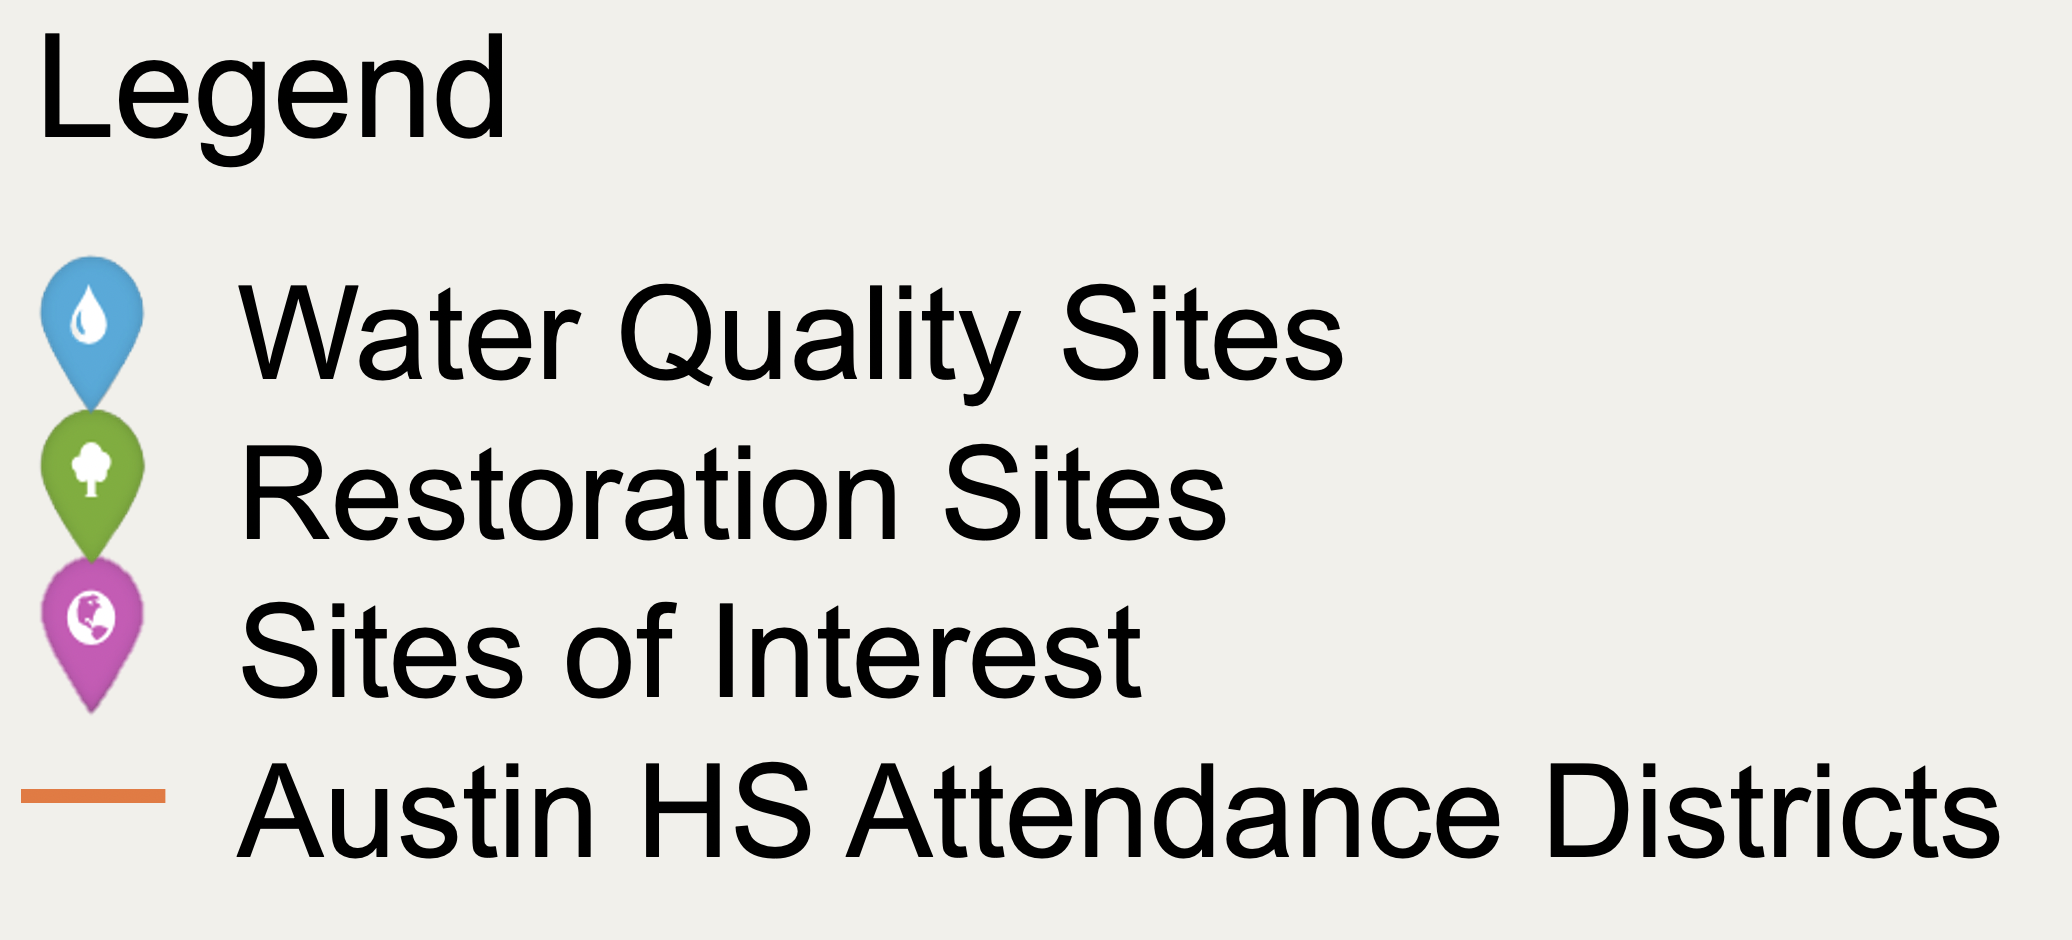

In [38]:
m

### Unused Code

In [39]:
# # shapefiles_path = '/Users/valhalla/Downloads/isd_bd_2020_v1'
# # output_path = '/Users/valhalla'

# #Would like to remember where I got this function from

# def shp_2_json(shapefiles_path: str, output_path: str, compress=True) -> None:
#     """
#     Function transforms given directory with shapefiles into geojsons.
#     :param shapefiles_path: (str) Path to the directory with shapefiles.
#     :param output_path: (str) Path to the output geojson file.
#     :param compress: (bool) Compress output JSON into gz archive.
#     """
    
#     shp = '.shp'
#     geojson = 'json'
#     shapefiles = [fname for fname in os.listdir(shapefiles_path) if fname.endswith(shp)]
    
#     for sfile in shapefiles:
#         # Get and create paths
#         spath = os.path.join(shapefiles_path, sfile)
#         gjfile = sfile[:-3]+geojson
#         gjpath = os.path.join(output_path, gjfile)
        
#         # Load & save
#         gdf = gpd.read_file(spath)
#         gdf.to_file(gjpath, driver='GeoJSON')
#         if compress:
#             with open(gjpath, 'rb') as f_in:
#                 gzipped = gjpath + '.gz'
#                 with gzip.open(gzipped, 'wb') as f_out:
#                     shutil.copyfileobj(f_in, f_out)
#             # remove JSON
#             os.remove(gjpath)

# shp_2_json(shapefiles_path, output_path, compress=False)

# schools = '20_21_high_updt_v2.geojson'

In [40]:
council_districts = shp_2_json('/Users/valhalla/data_science/ayrw/council_districts/', '/Users/valhalla', compress=False)

NameError: name 'shp_2_json' is not defined

In [ ]:
council_districts
